In [83]:
#Modified this code from https://nbviewer.jupyter.org/github/patrickmineault/xcorr-notebooks/blob/master/Render%20OpenAI%20gym%20as%20GIF.ipynb
%matplotlib inline
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
import matplotlib.pyplot as plt
from IPython.display import display

import gym

def display_frames_as_gif(frames, title):
    """
    Displays a list of frames as a gif, with controls
    """
    plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
    patch = plt.imshow(frames[0])
    plt.axis('off')
    plt.title(title, fontdict={'fontsize': 50, 'fontweight': 'medium'})
    

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    display(display_animation(anim, default_mode='loop'))


env = gym.make('CartPole-v0')

# if gpu is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Episode finished after 11 steps
Episode finished after 9 steps
Episode finished after 16 steps
Episode finished after 27 steps
Episode finished after 21 steps
Episode finished after 12 steps
Episode finished after 20 steps
Episode finished after 11 steps
Episode finished after 20 steps
Episode finished after 38 steps
Average reward: 18.50


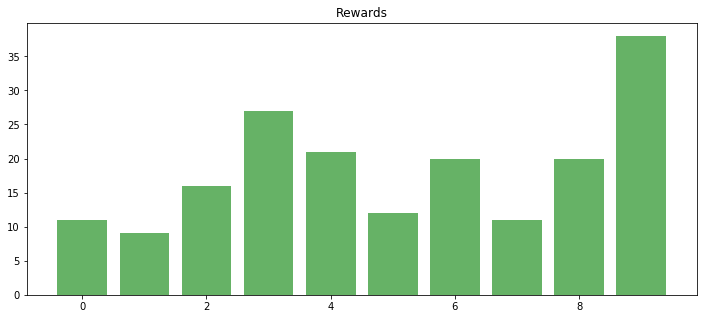

In [105]:
observation = env.reset()

# Initializations
cum_reward = 0
frames = []
shadow_run = {}
steps_total = []


# Episodes
num_episodes = 10


for episode in range(num_episodes):
    
    # Episode Initializations
    state = env.reset()
    shadow_run[episode] = {}
    actions, states, shots = [], [], []
    shadow_run[episode] = {}
    step = 0
    
    while True:
        
        # Add Step
        step += 1
        
        # Take Random Action
        action = env.action_space.sample()
        
        # State Information
        new_state, reward, done, info = env.step(action)
        rendered = env.render(mode = 'rgb_array')

        actions.append(action)
        states.append(new_state)
        shots.append(rendered)

        frames.append(rendered)
                
        if done:
            steps_total.append(step)
            shadow_run[episode]["actions"] = actions
            shadow_run[episode]["states"] = states
            shadow_run[episode]["shots"] = shots
            shadow_run[episode]["steps"] = step
            
            print("Episode finished after %i steps" % step )
            break
        

print("Average reward: {:.2f}".format(sum(steps_total)/num_episodes))

plt.figure(figsize=(12,5))
plt.title("Rewards")
plt.bar(torch.arange(len(steps_total)), steps_total, alpha=0.6, color='green')
plt.show()

env.close()

In [ ]:
for i in range(0,steps_total[0] + 1):
    plt.imshow(frames[i], alpha = .25)
plt.axis('off');


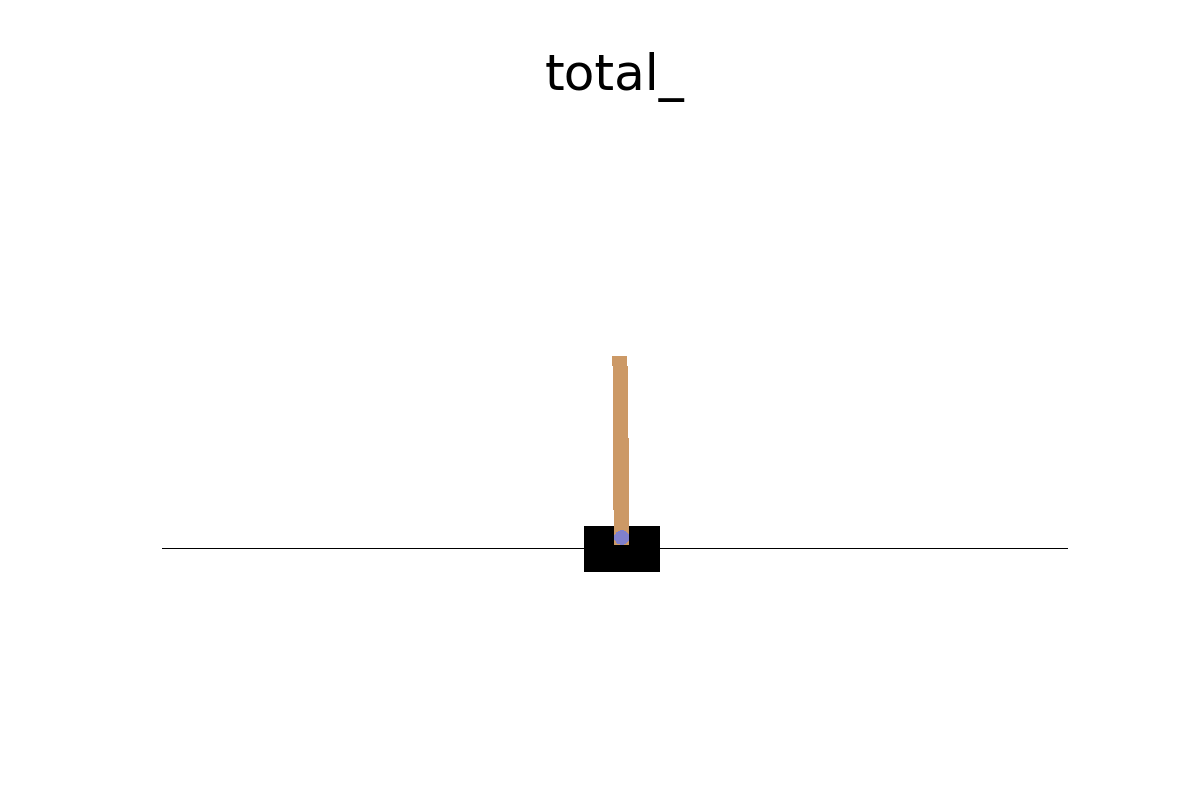
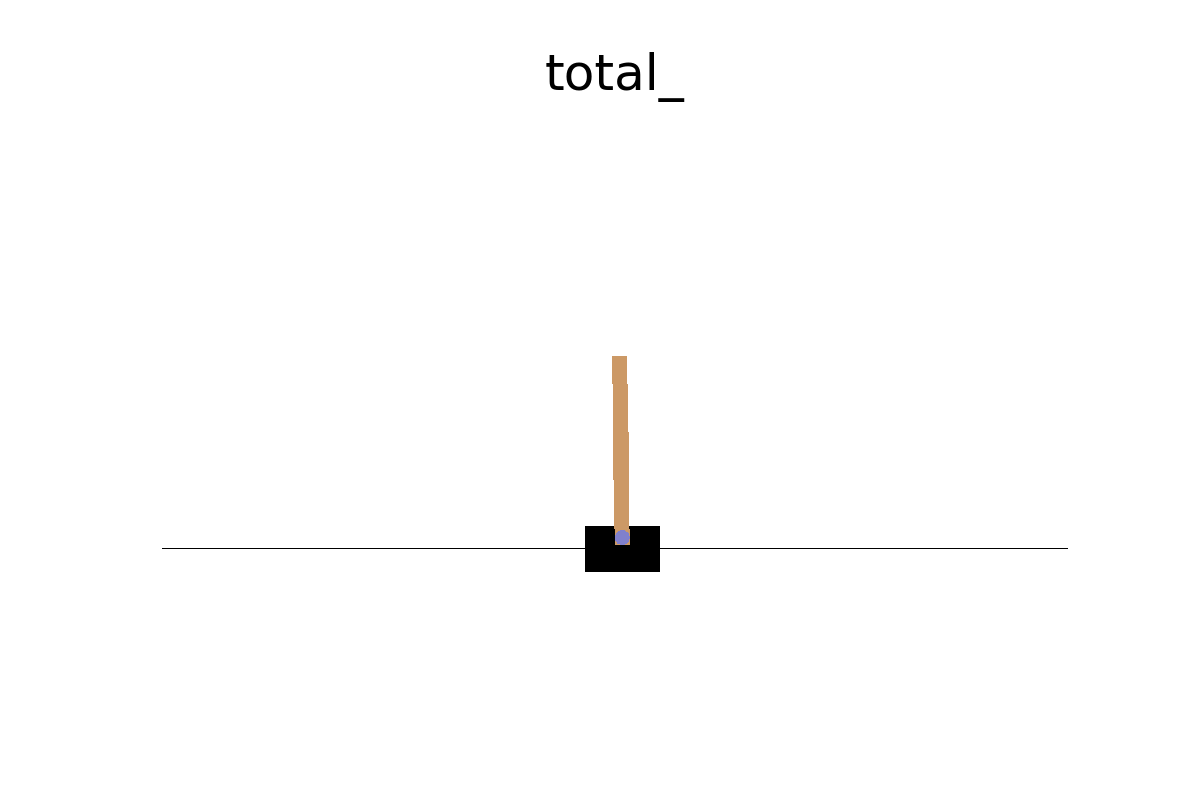
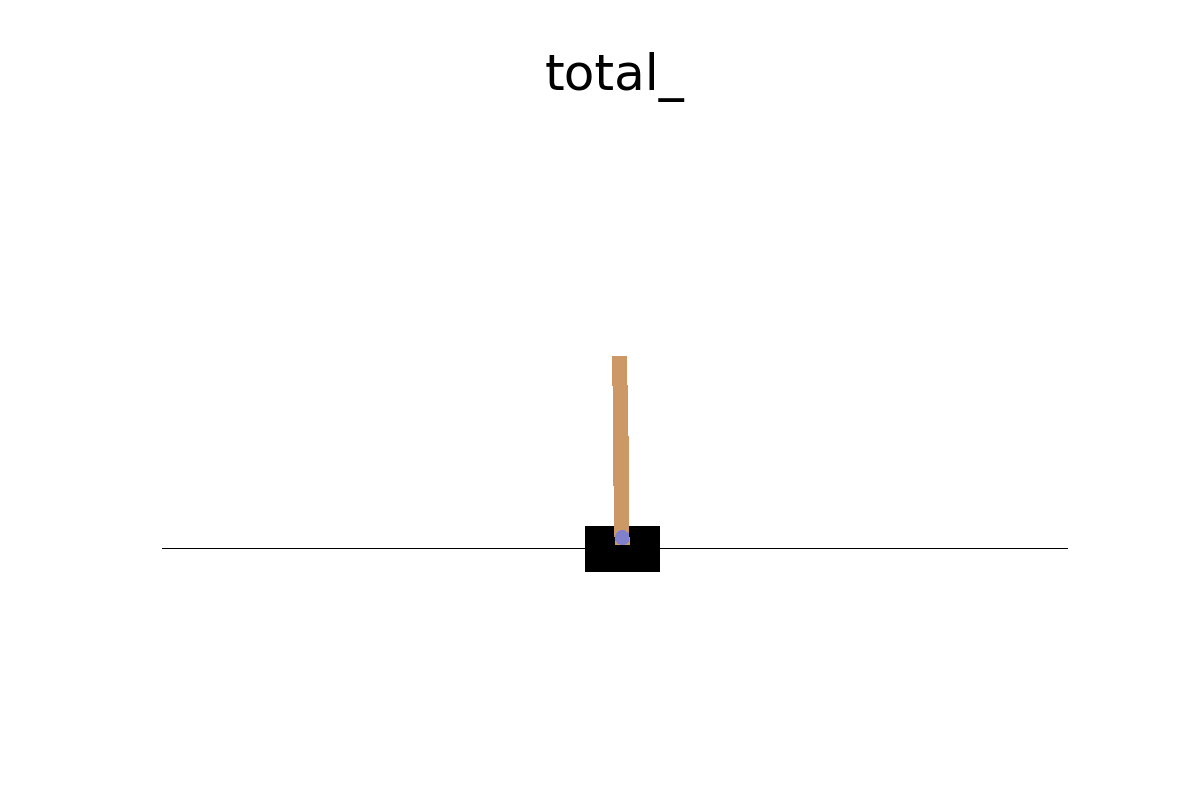
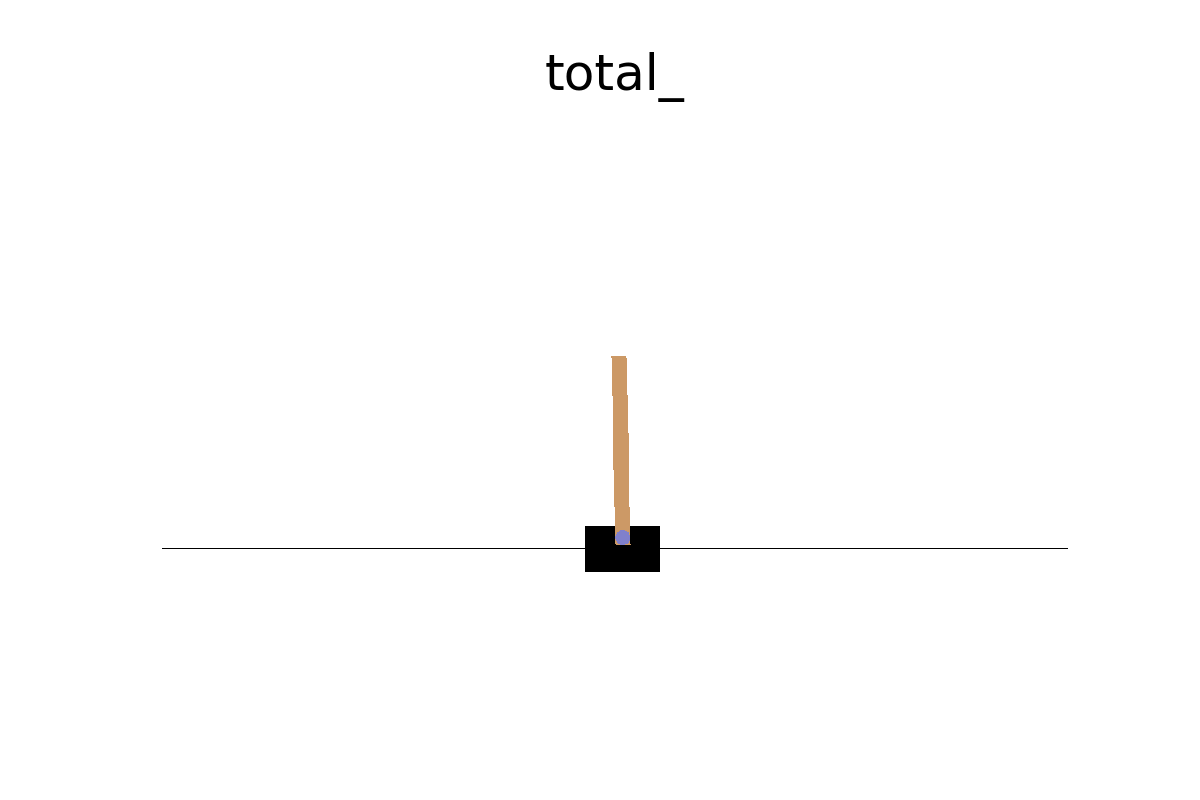
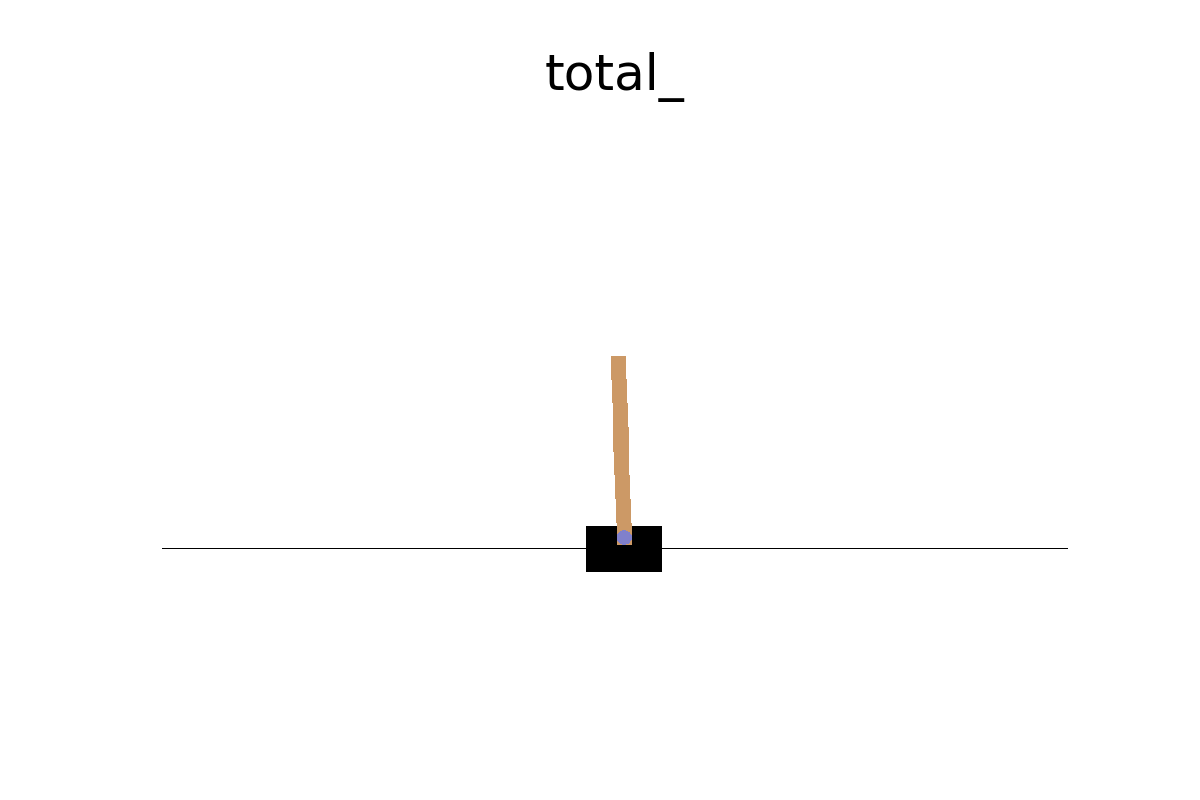
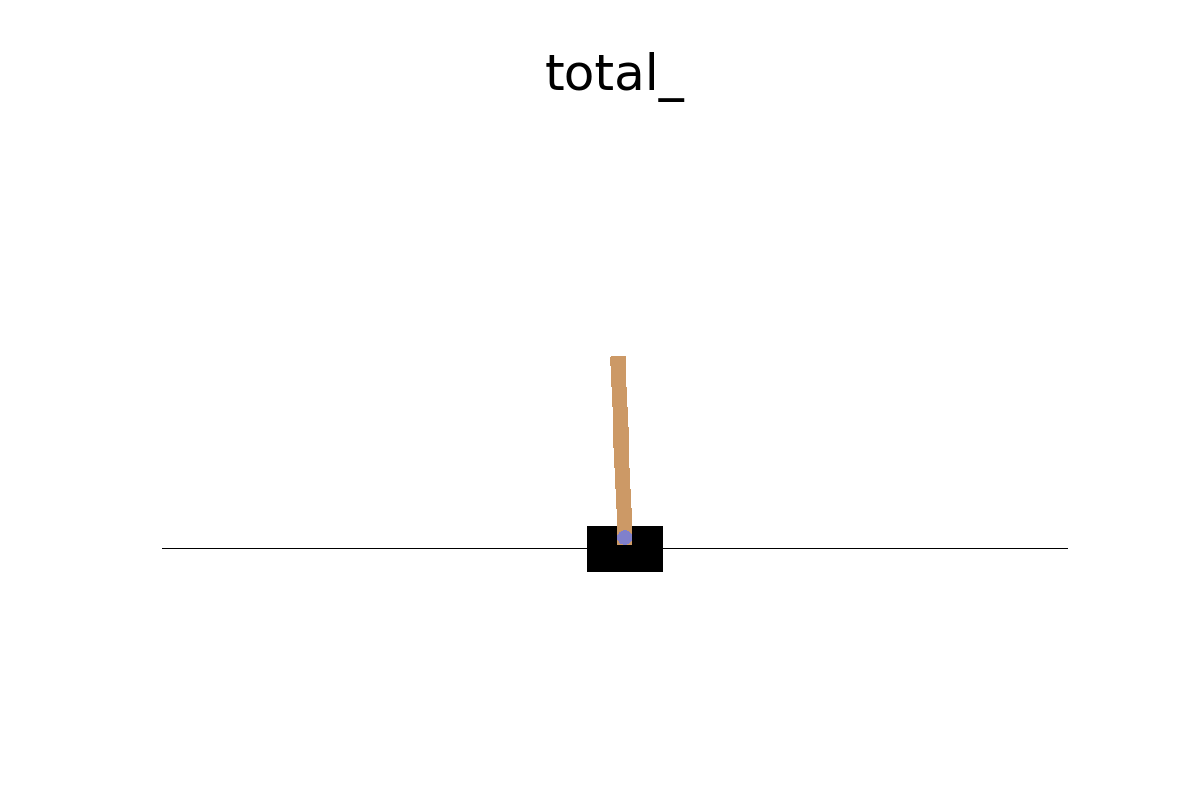
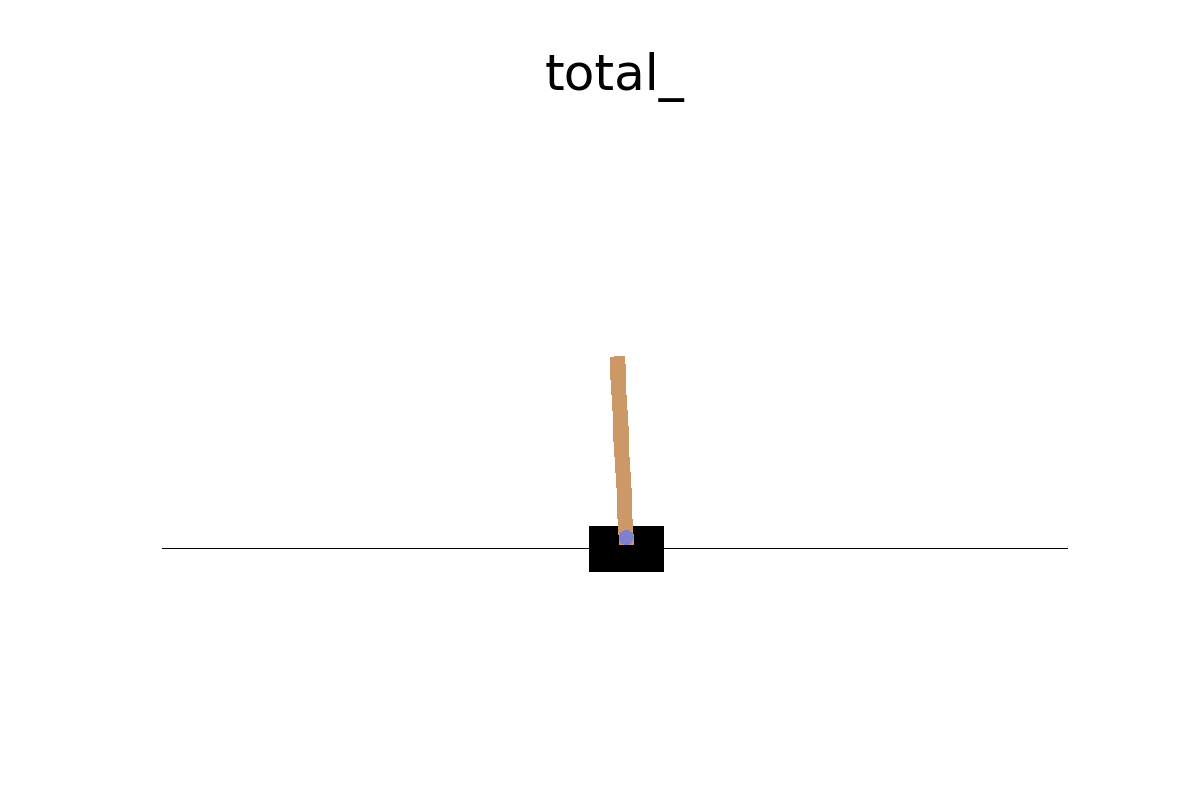
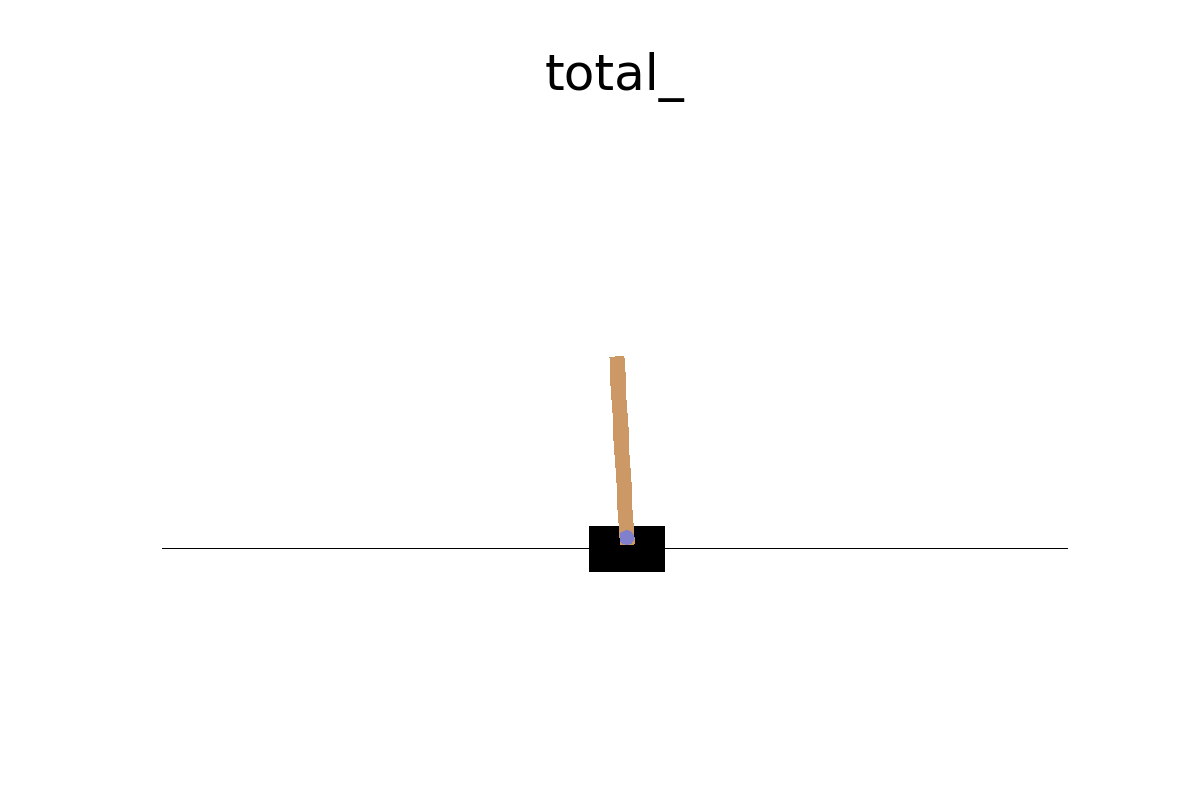
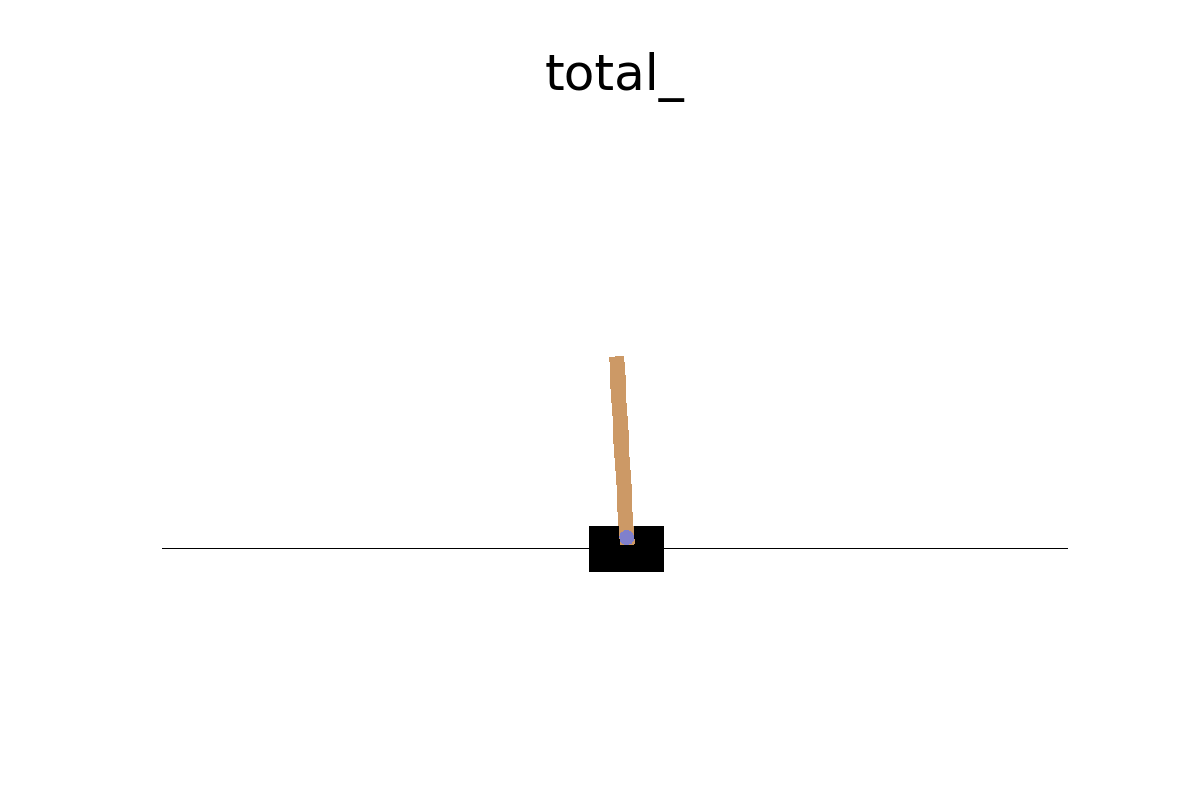
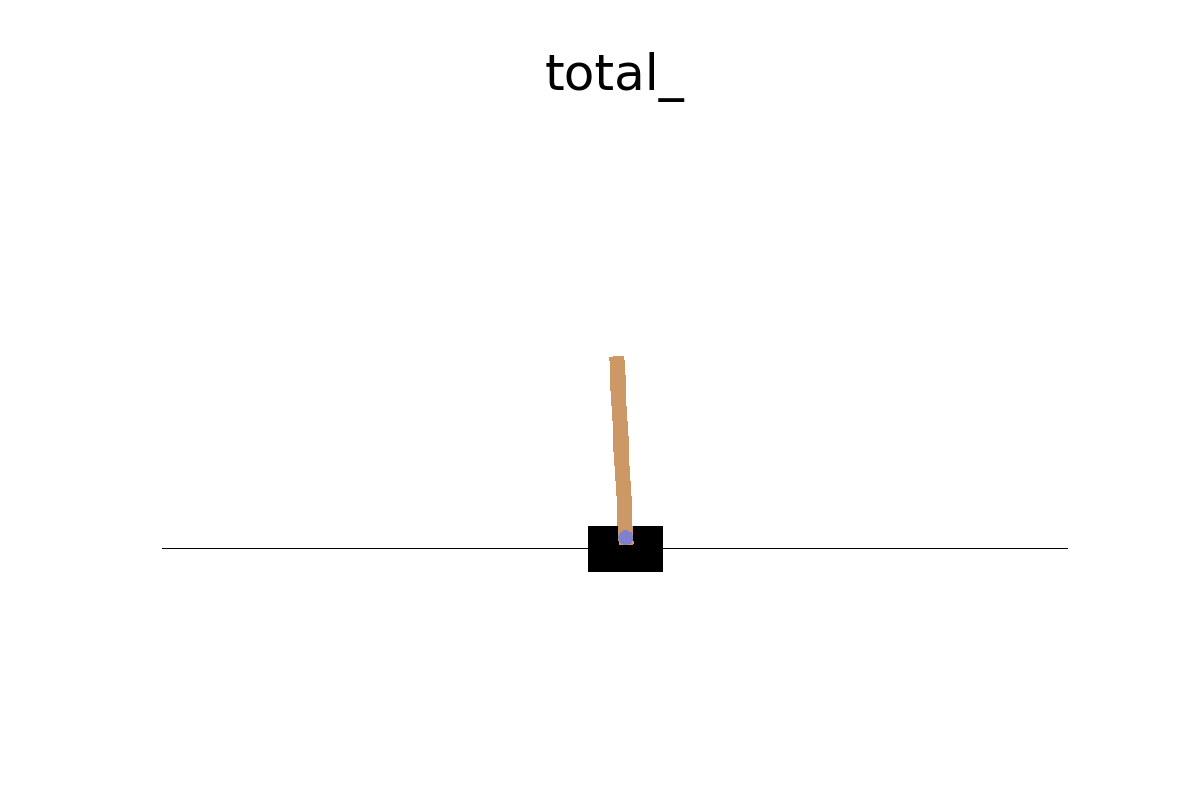
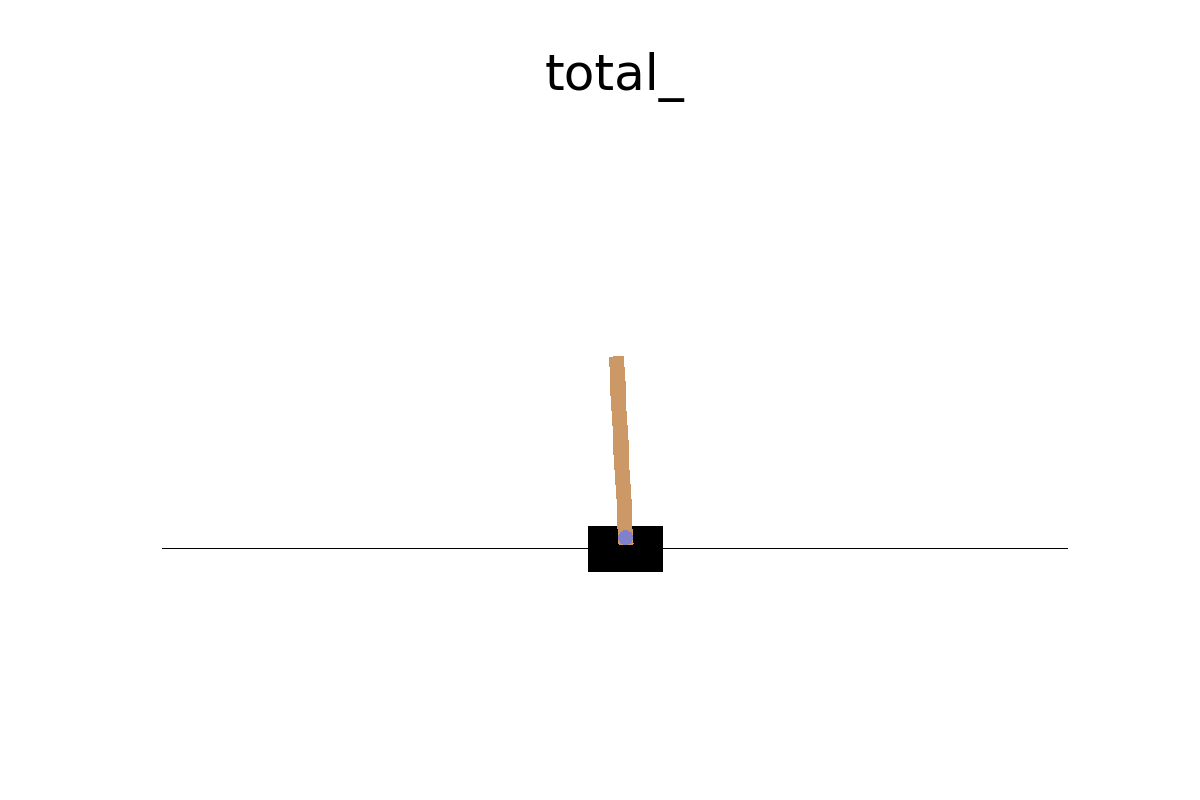
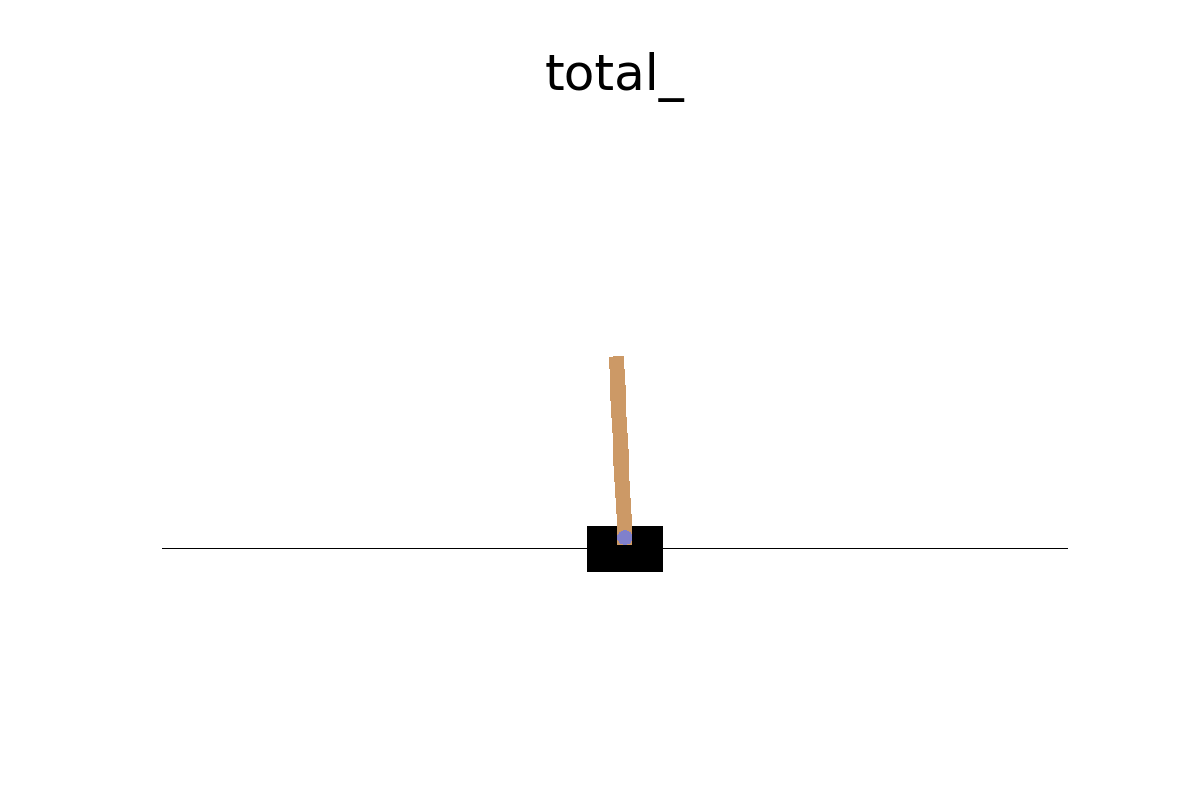
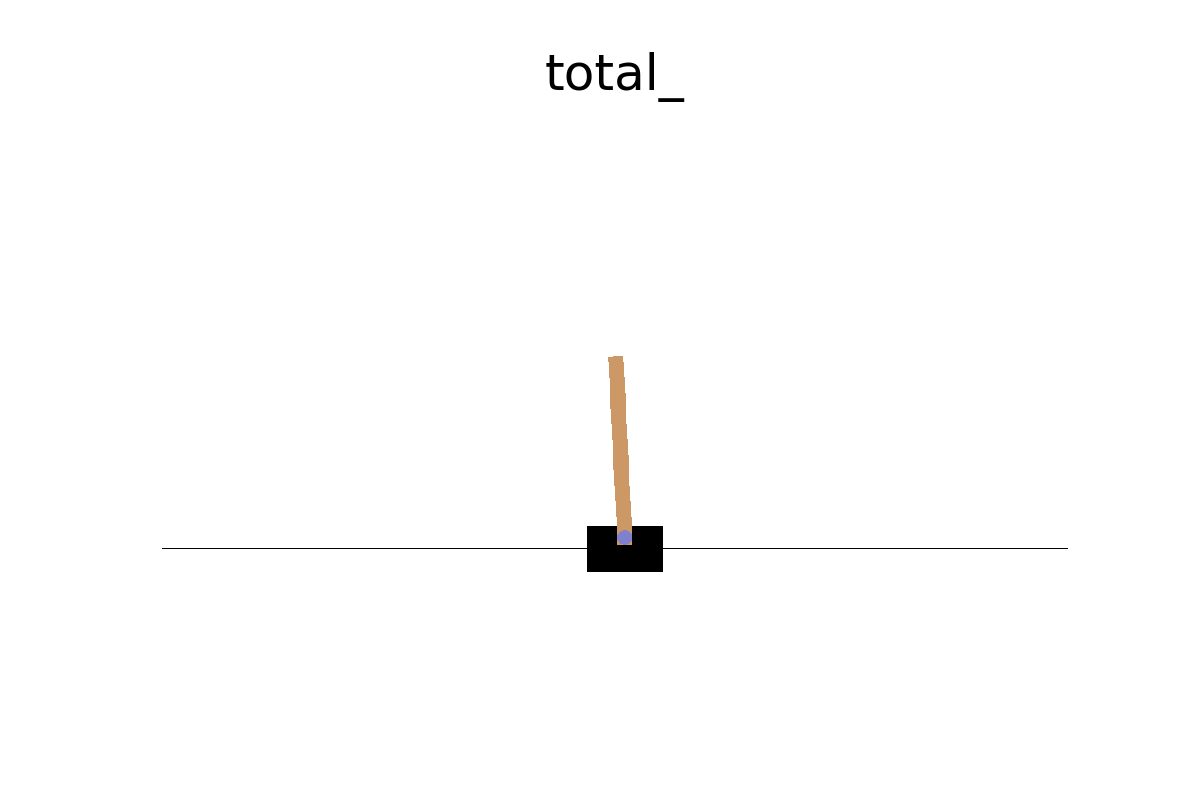
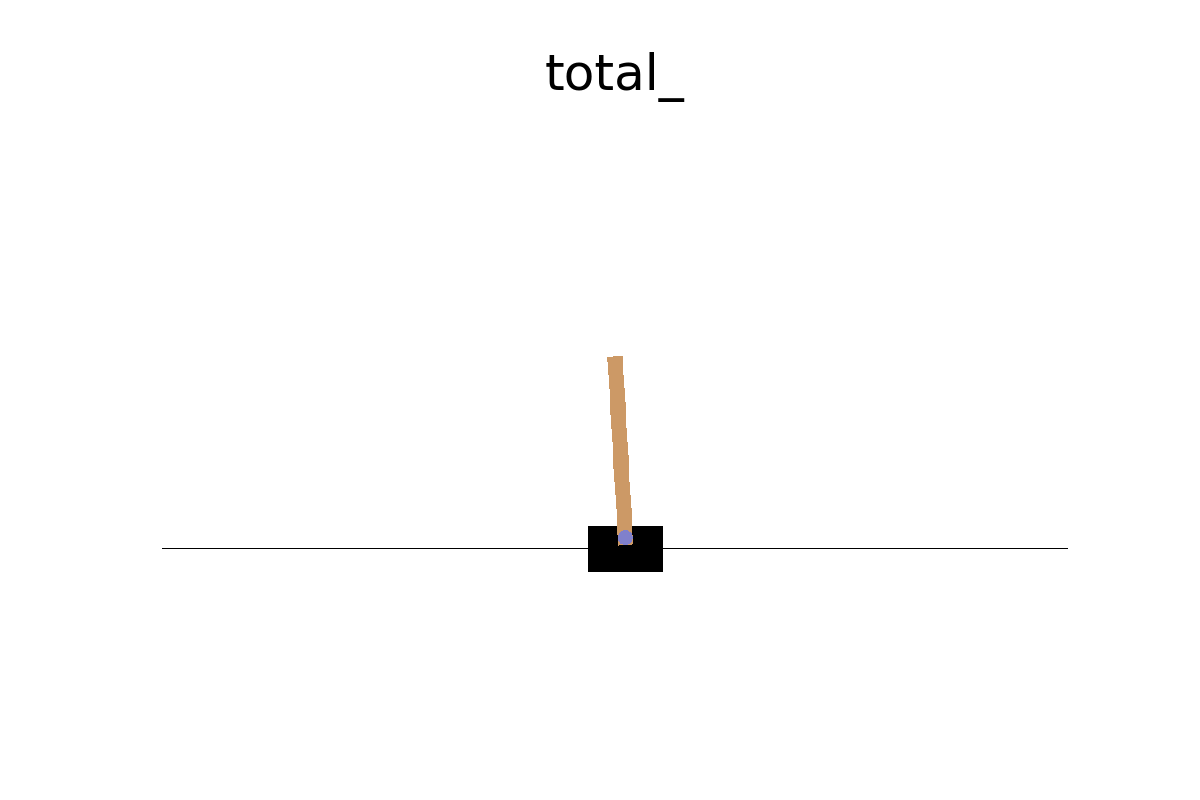
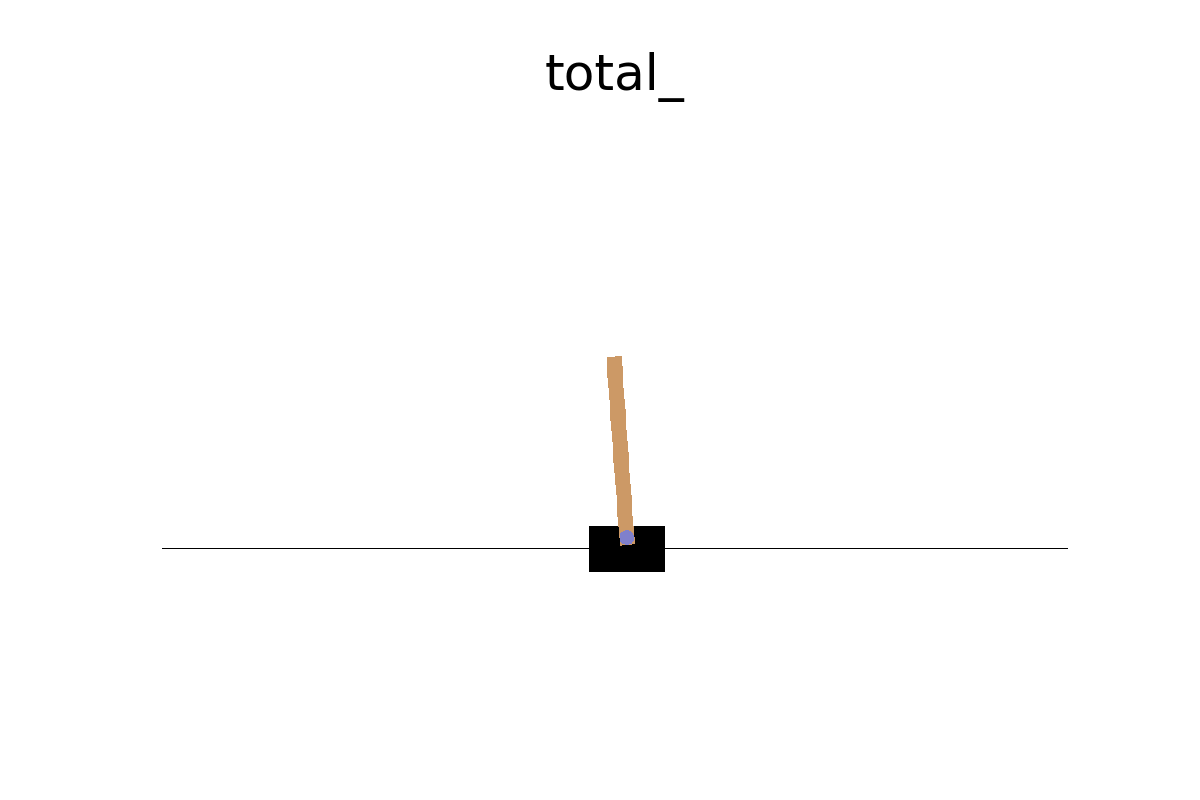
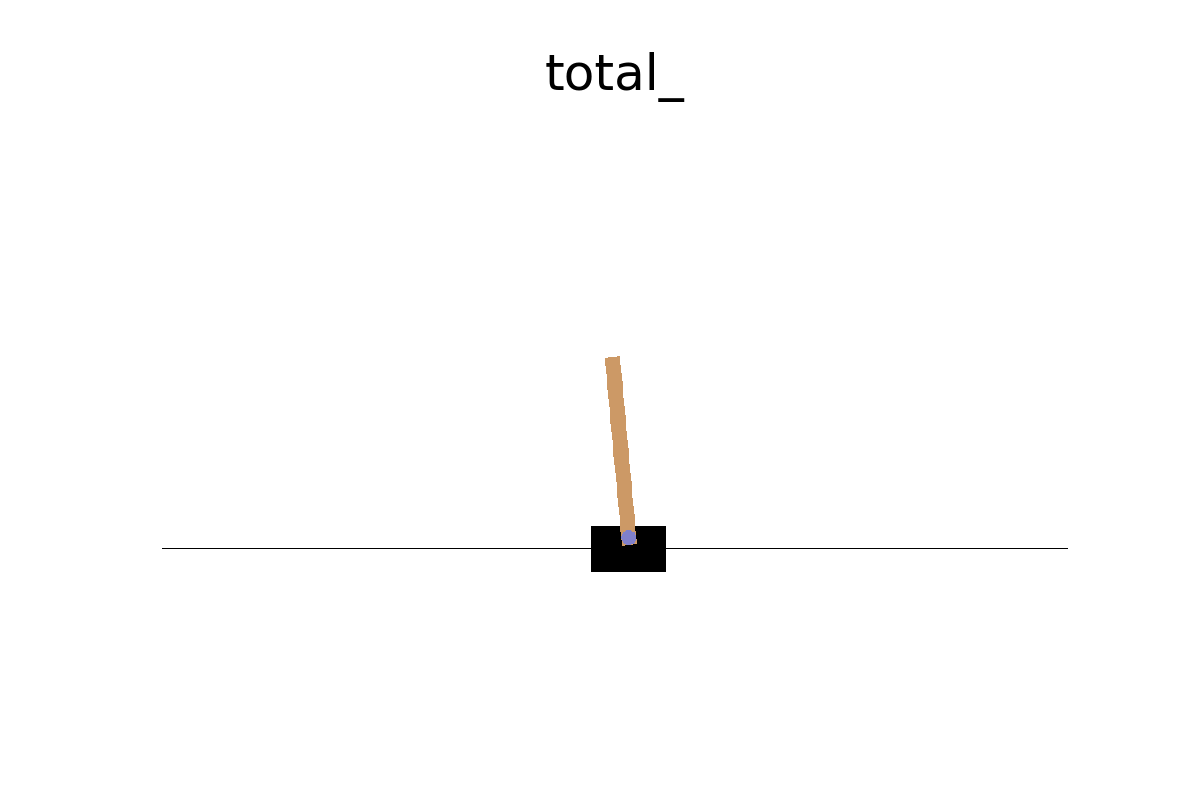
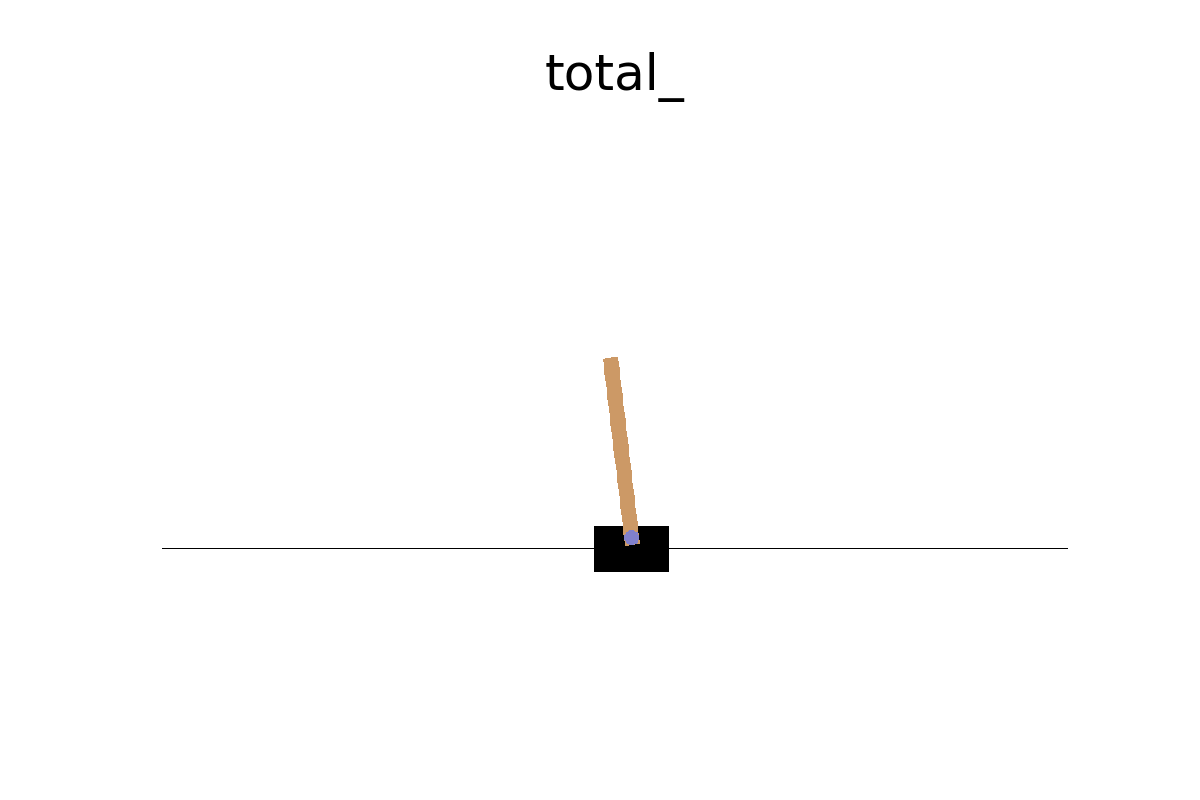
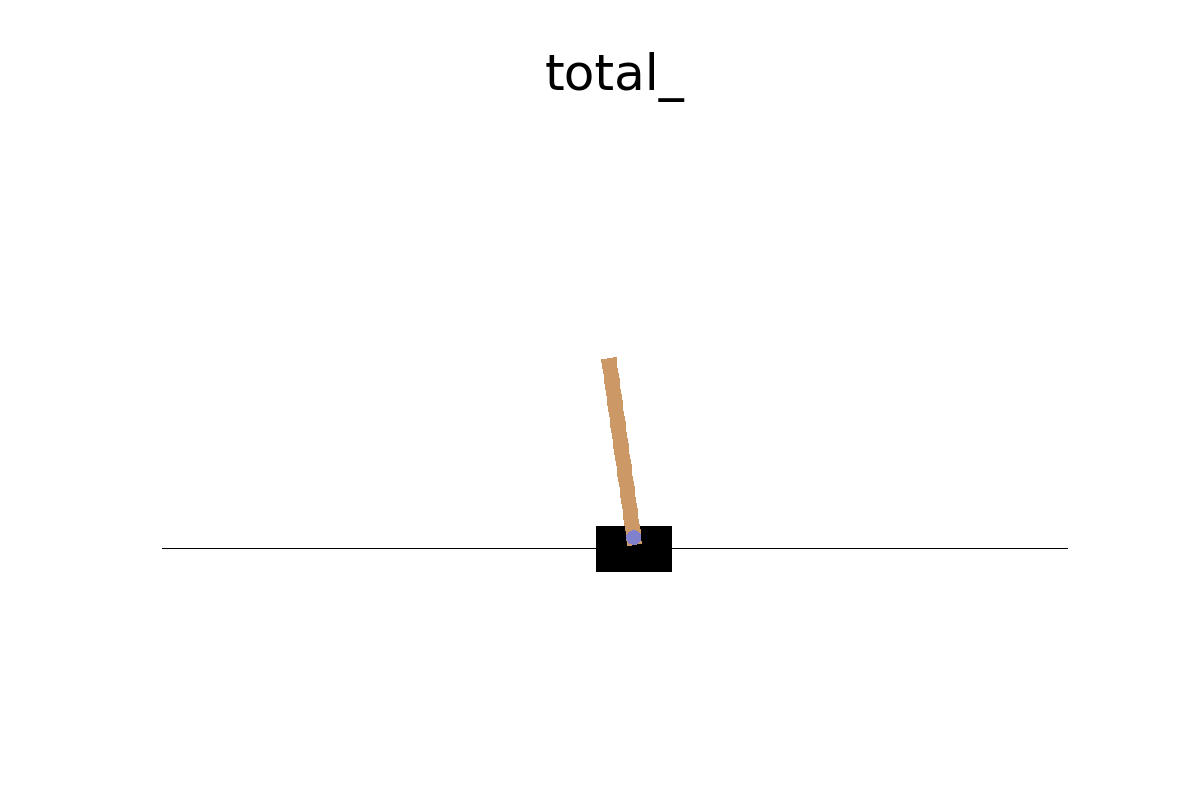
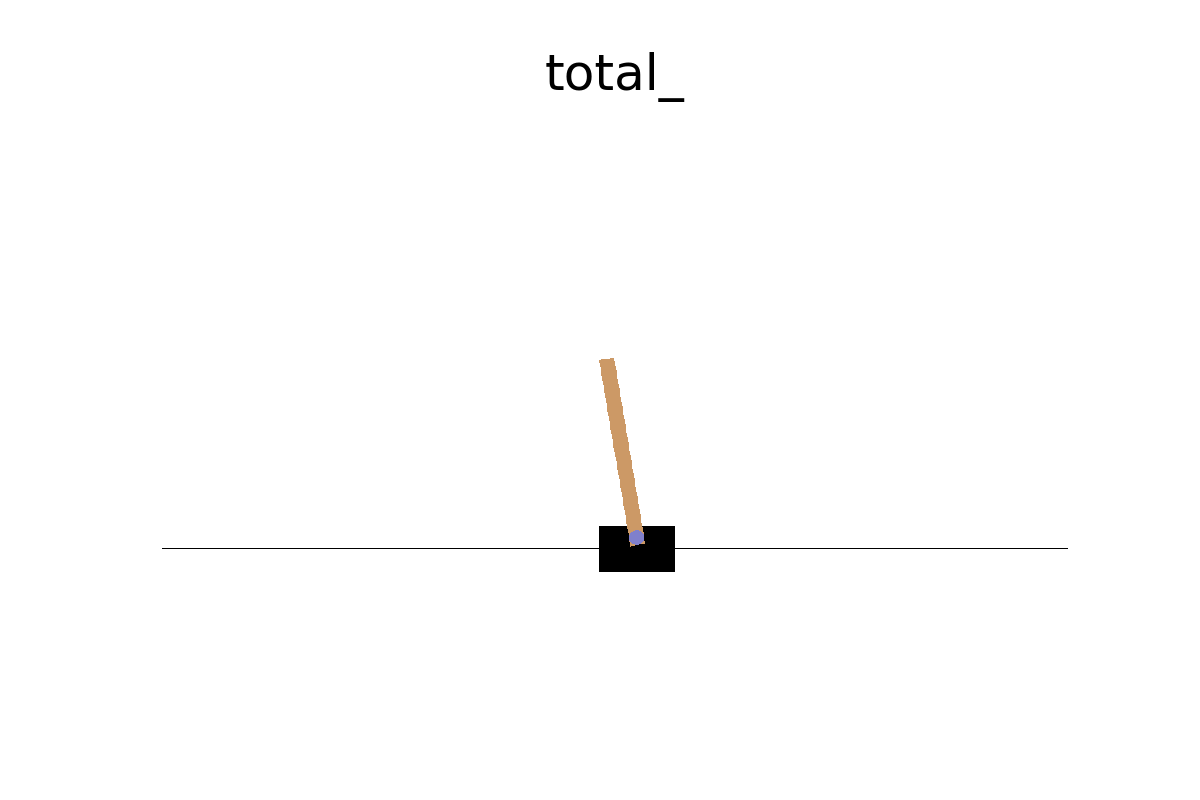
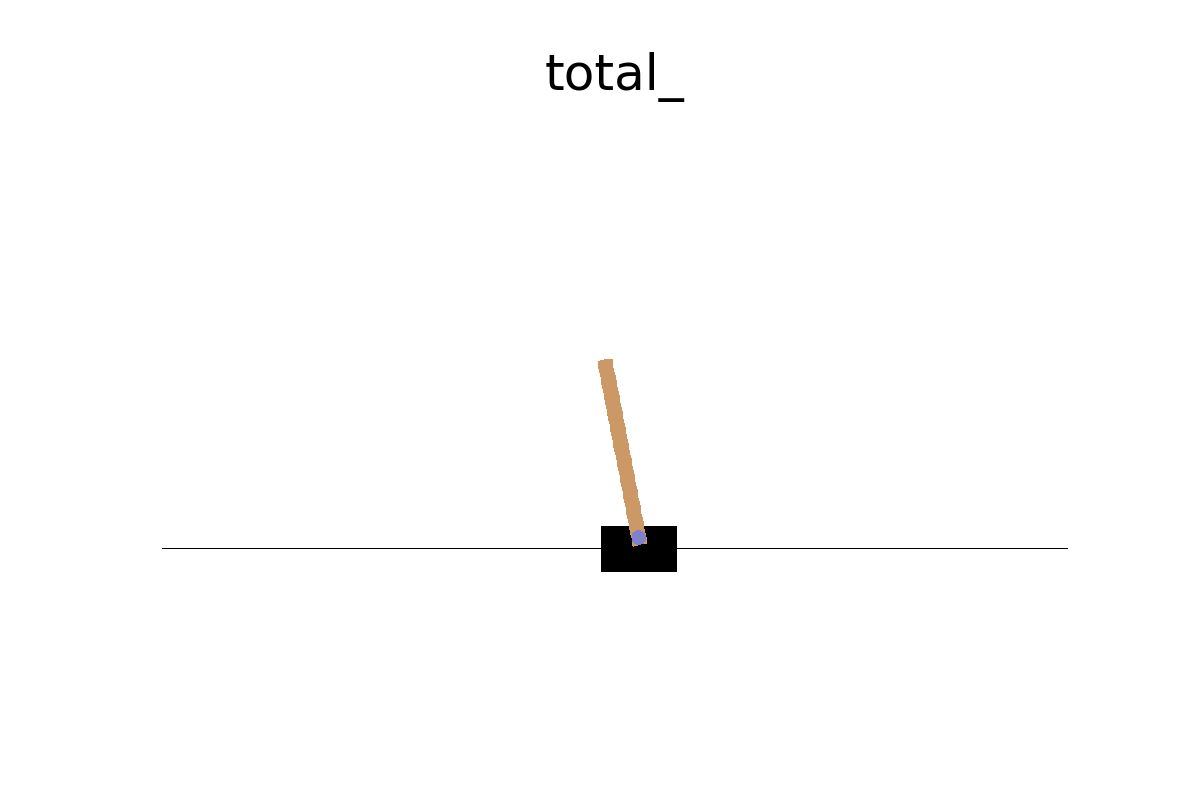
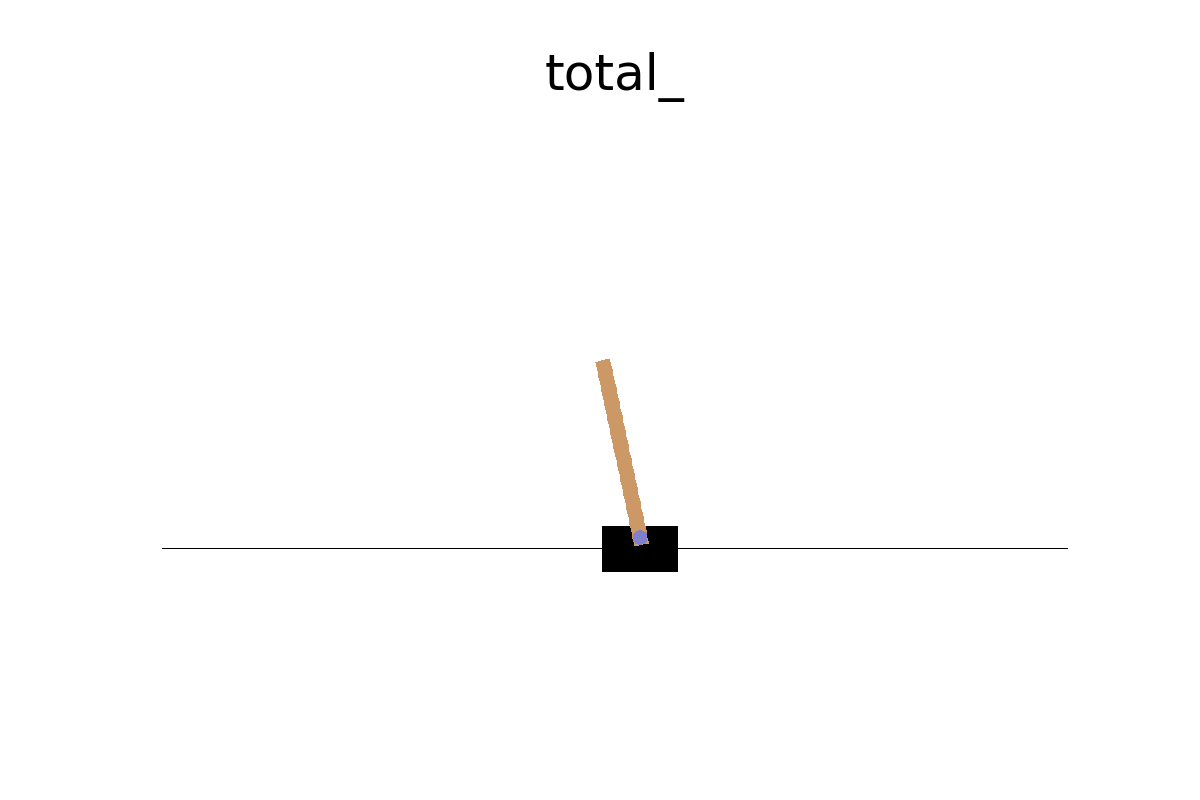
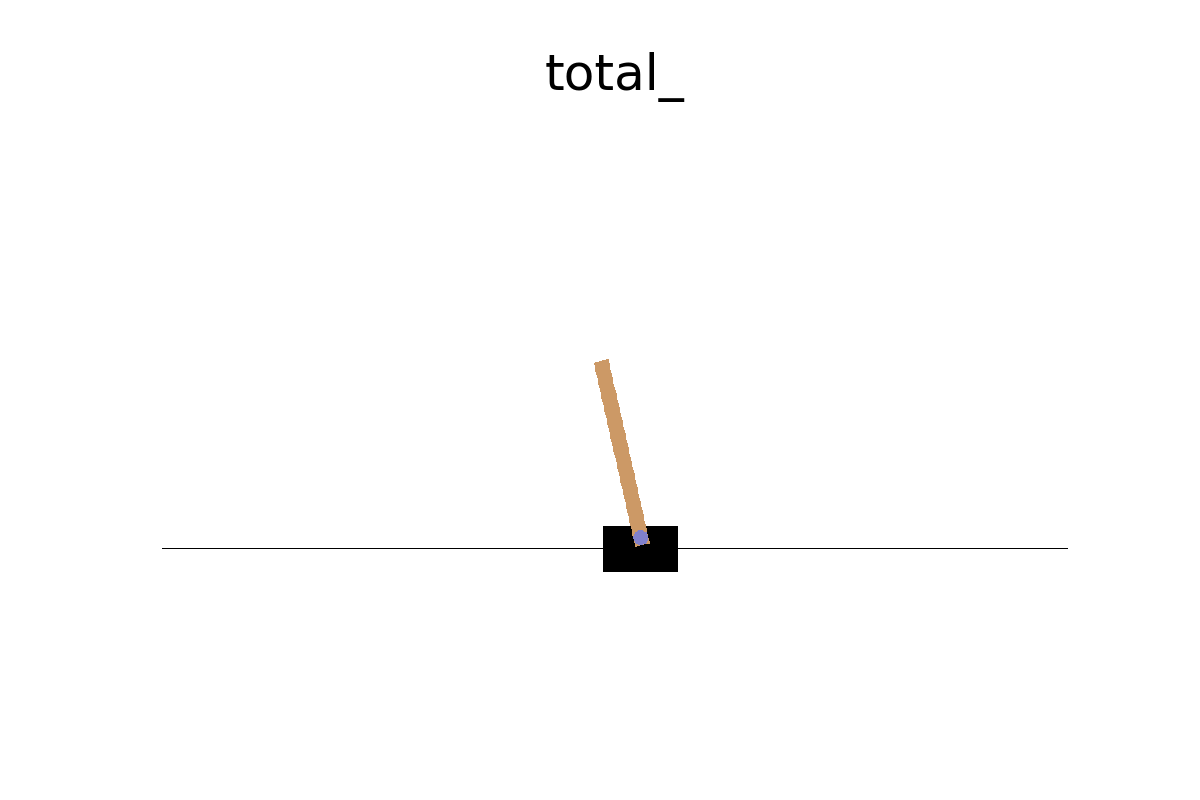
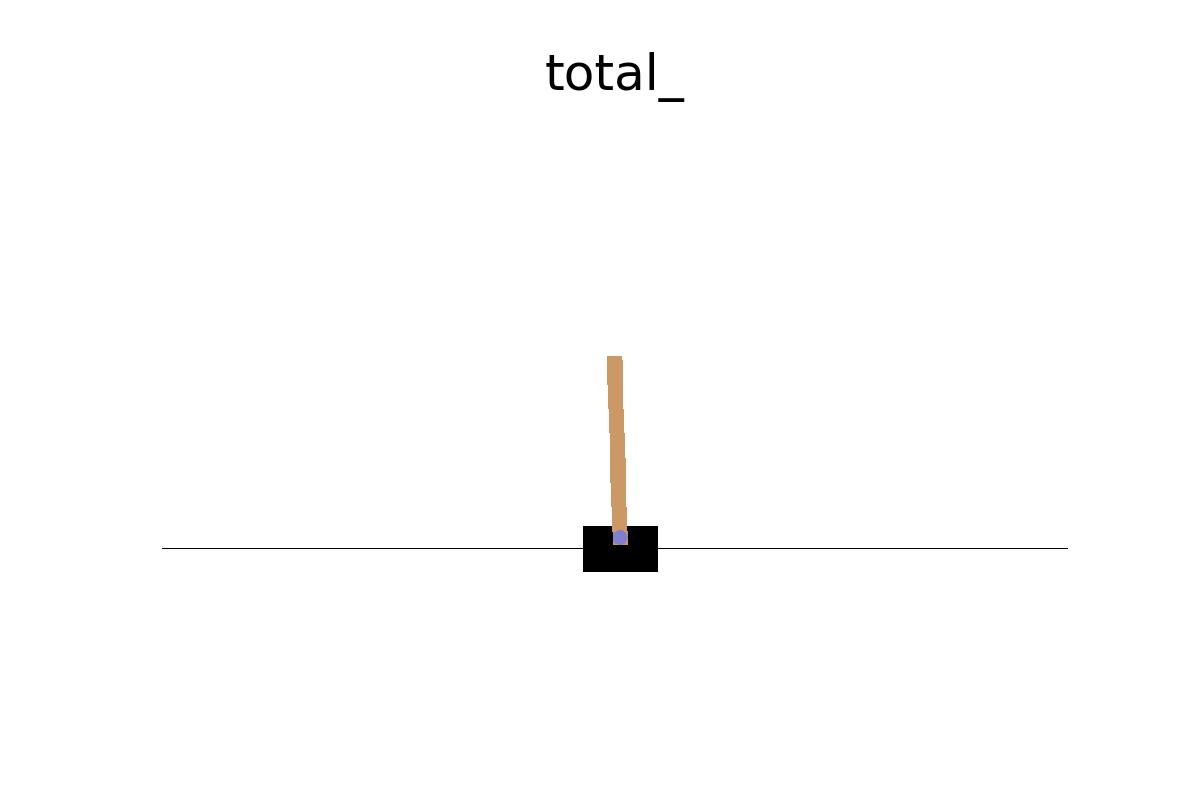
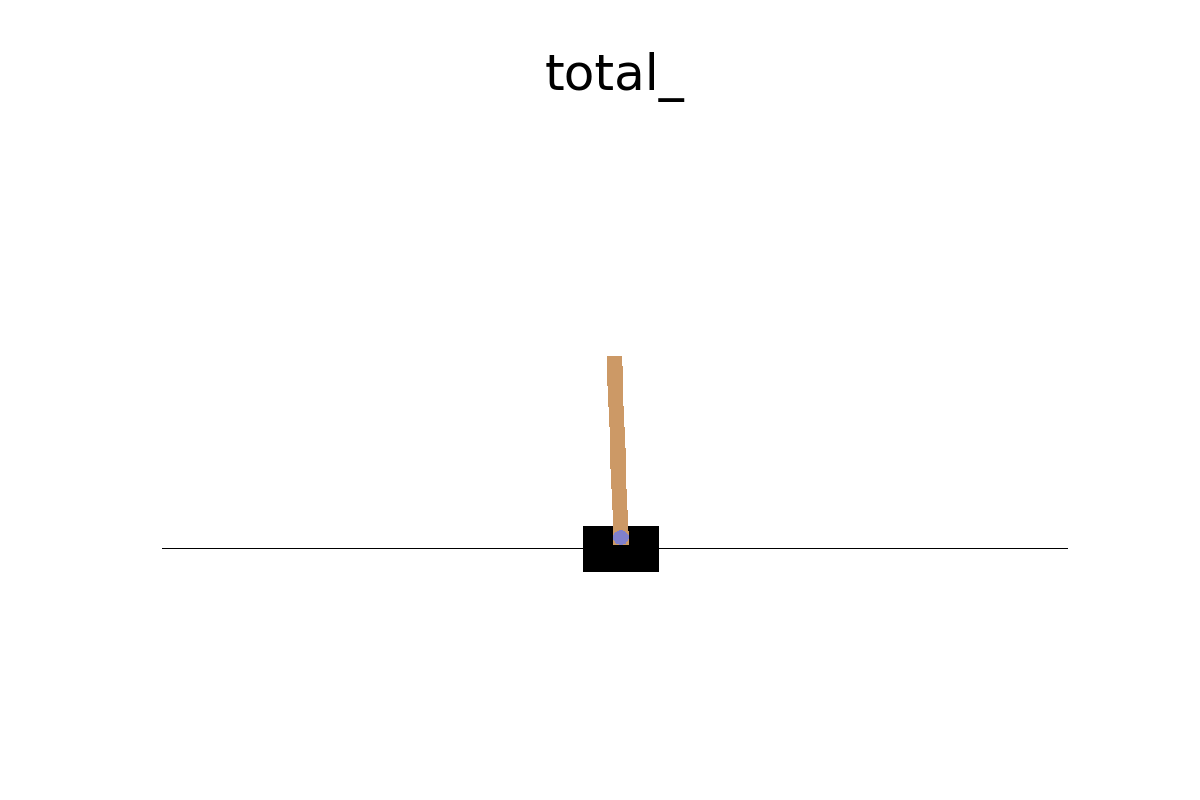
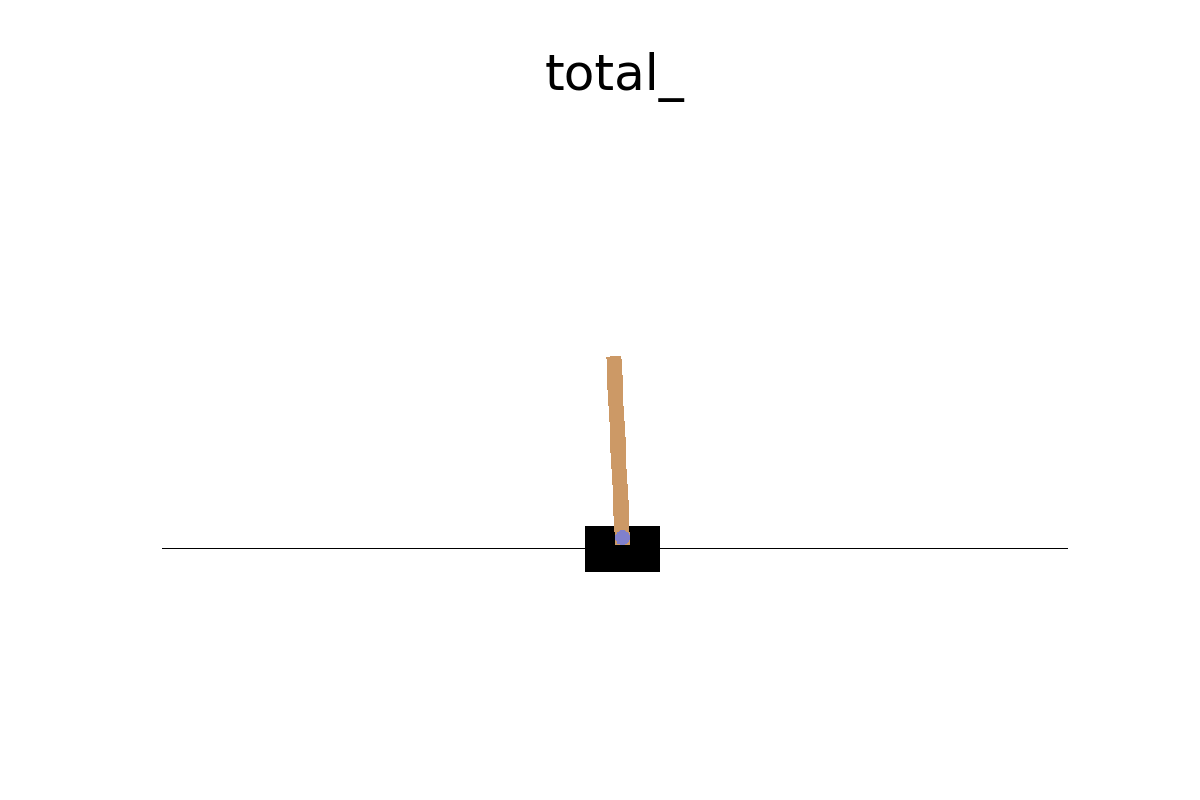
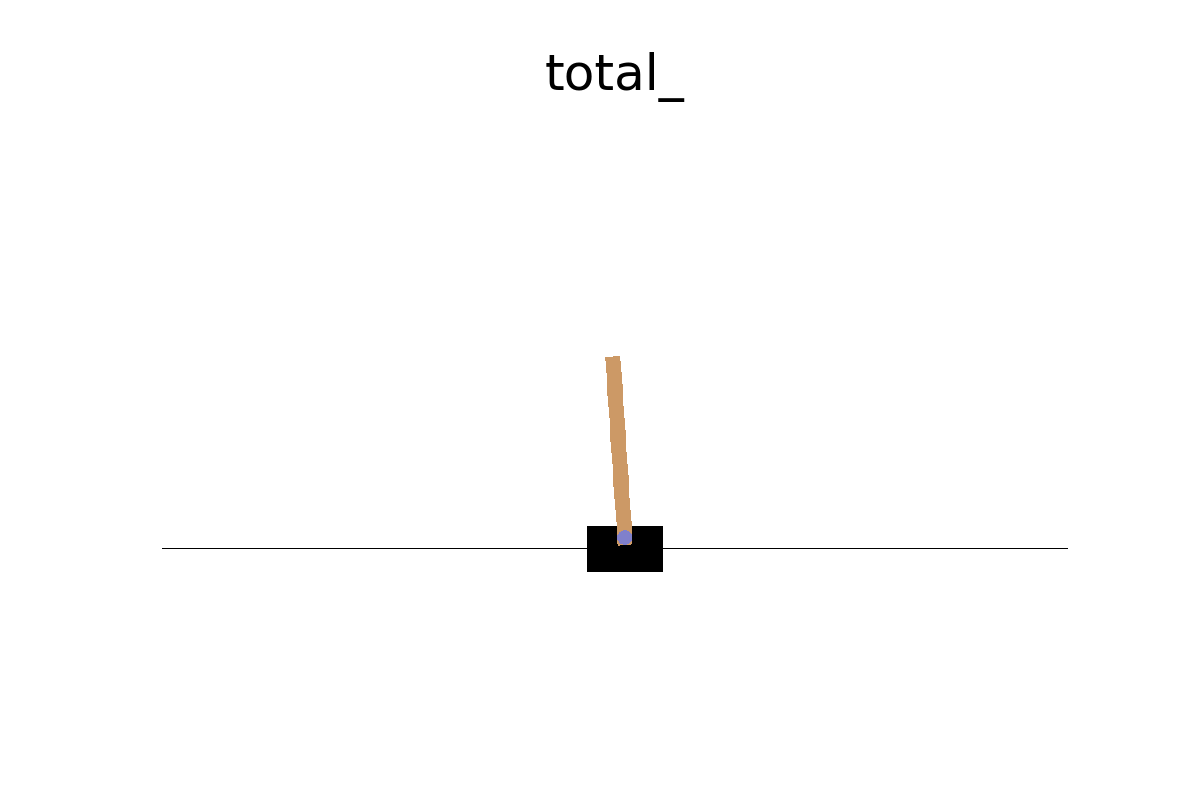
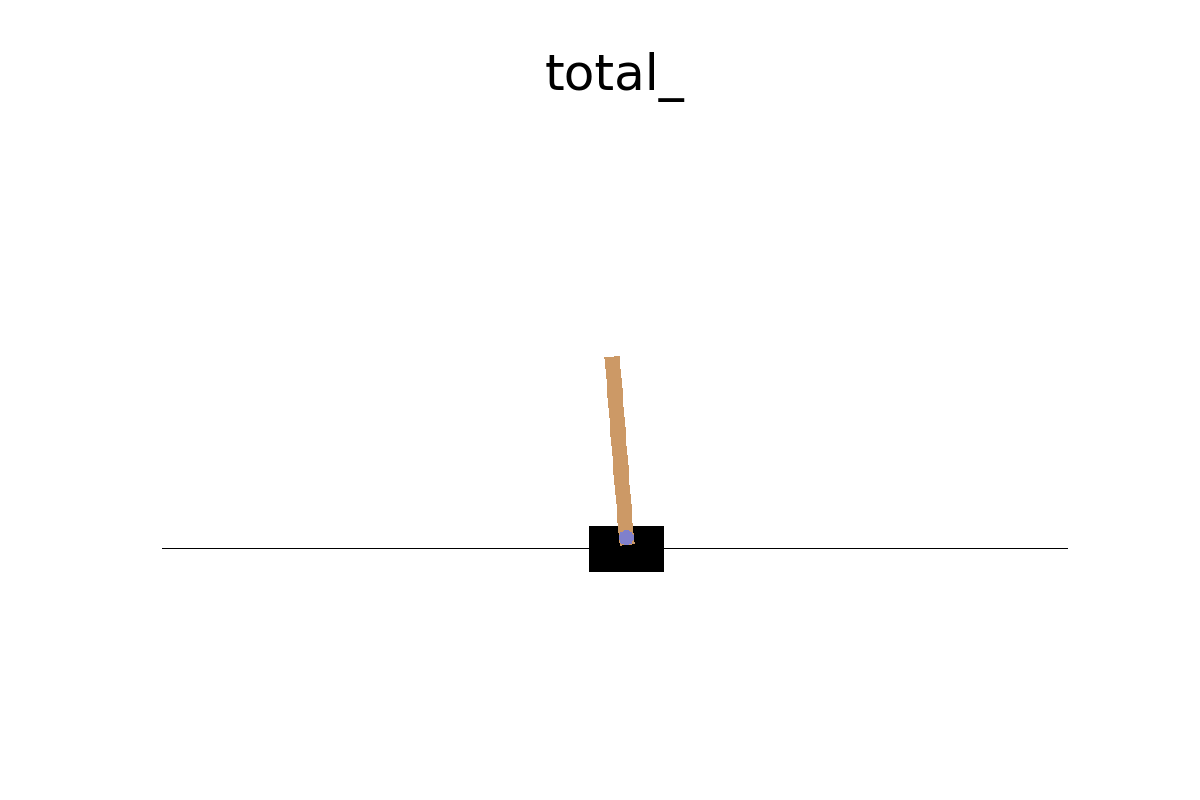
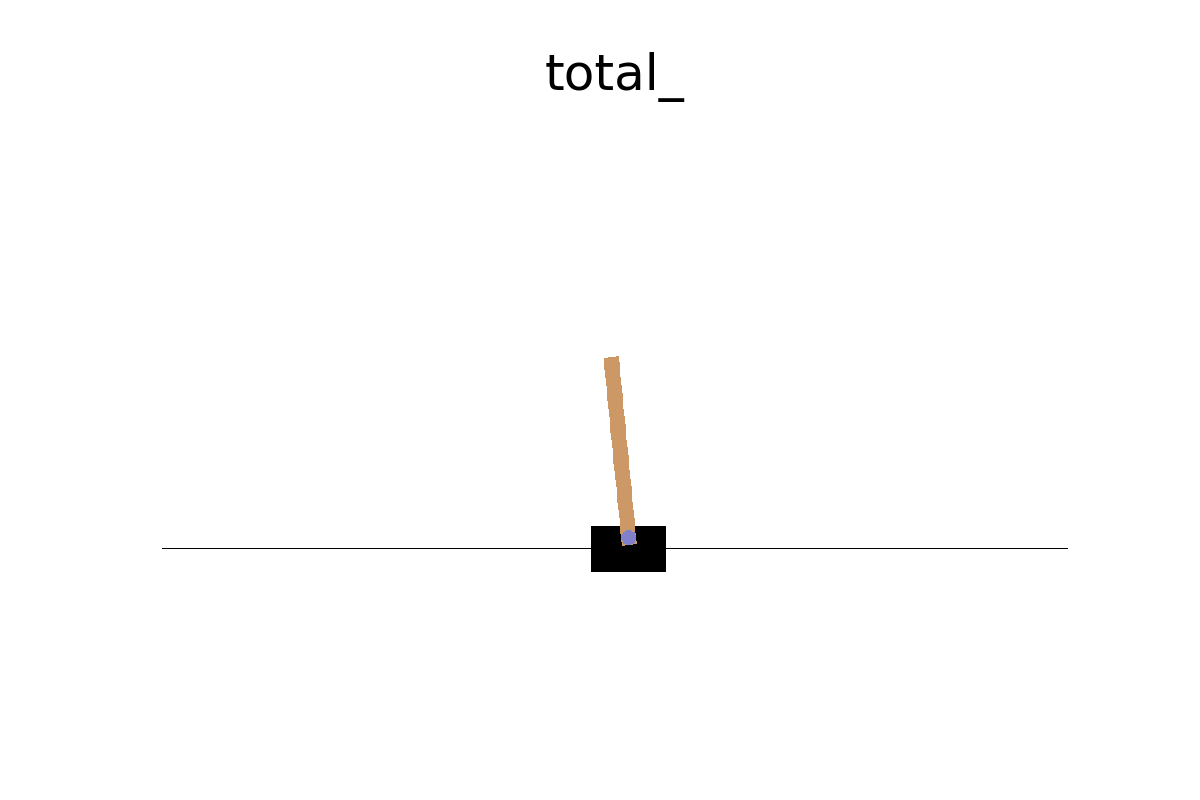
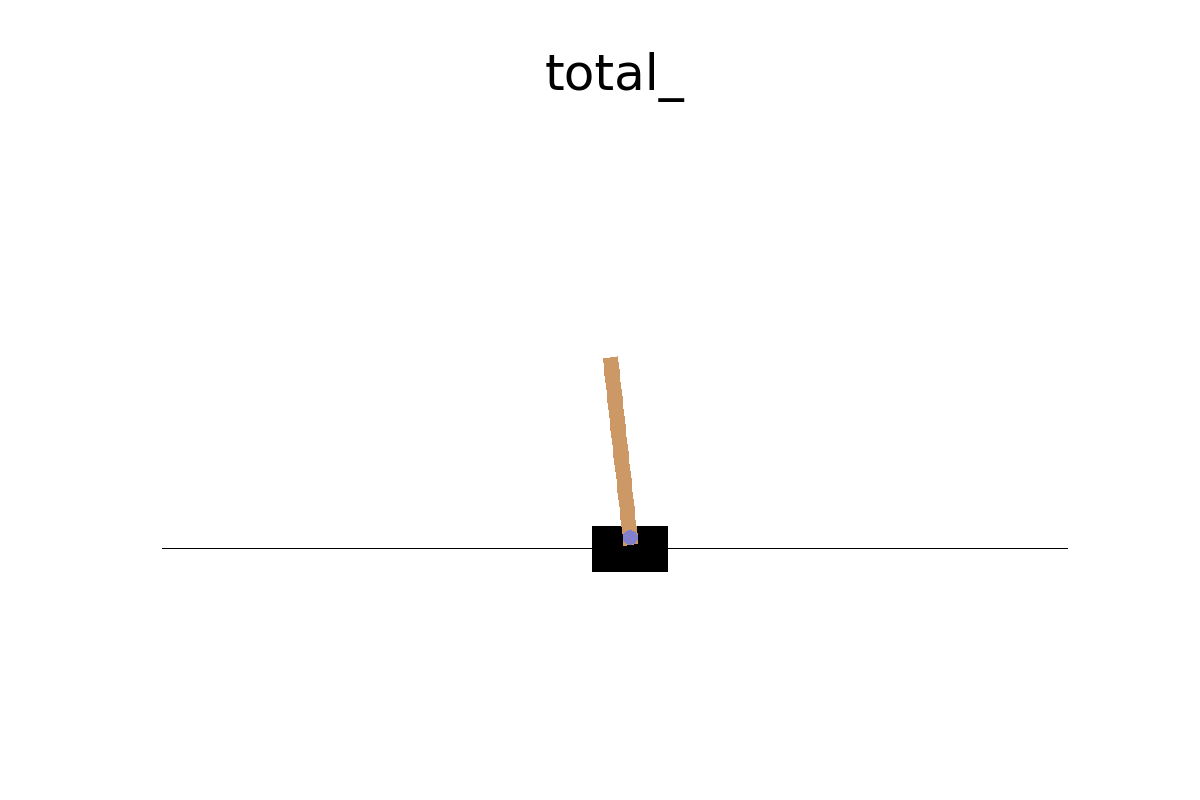
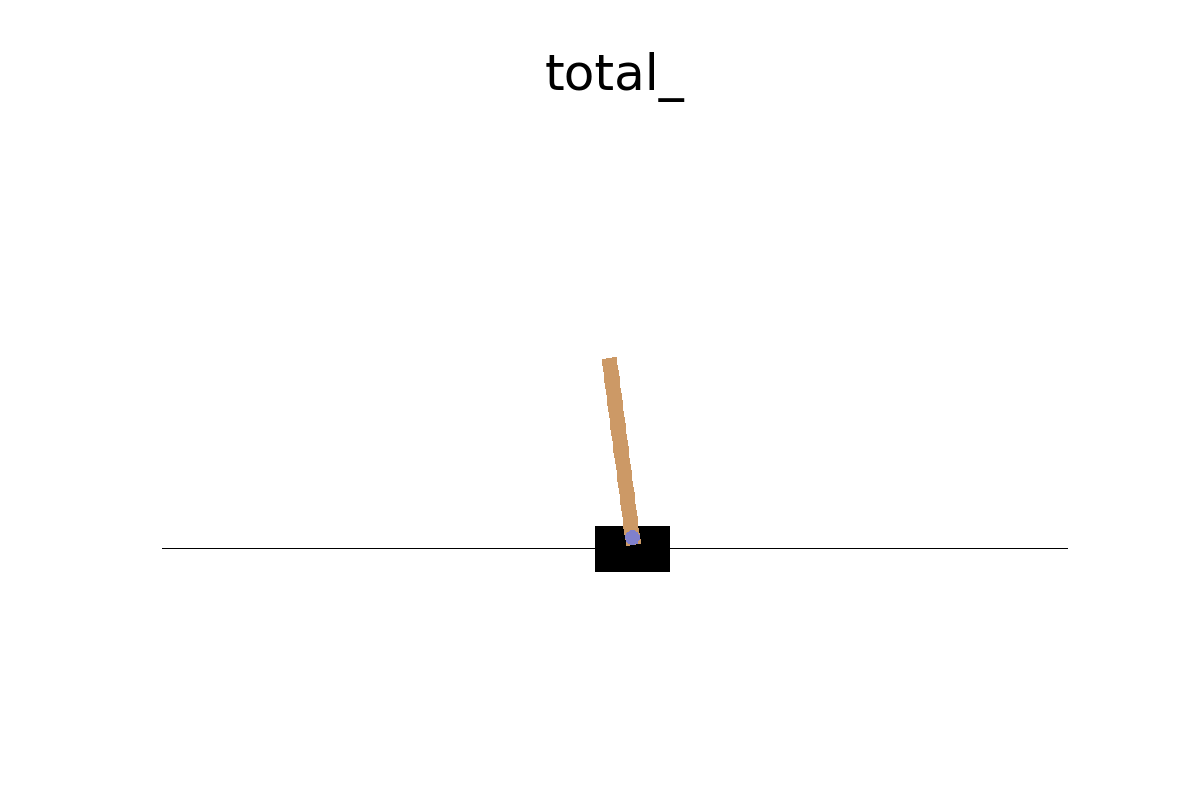
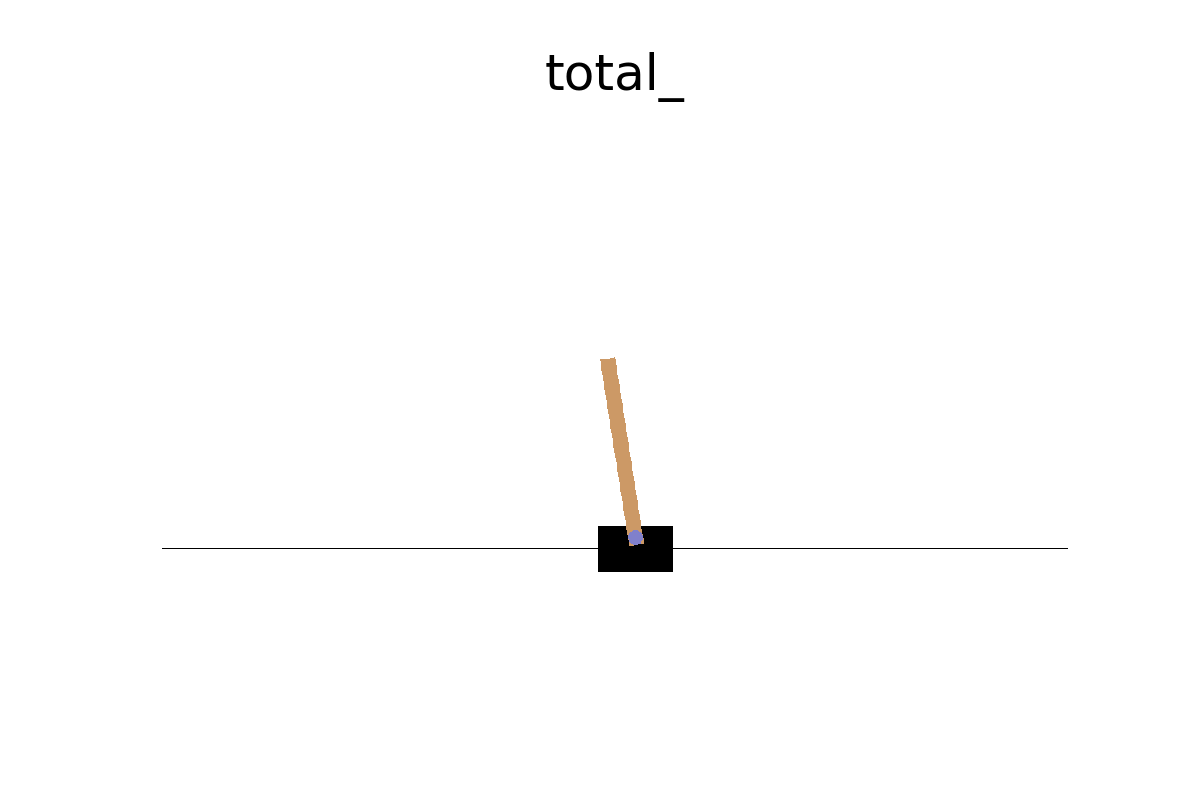
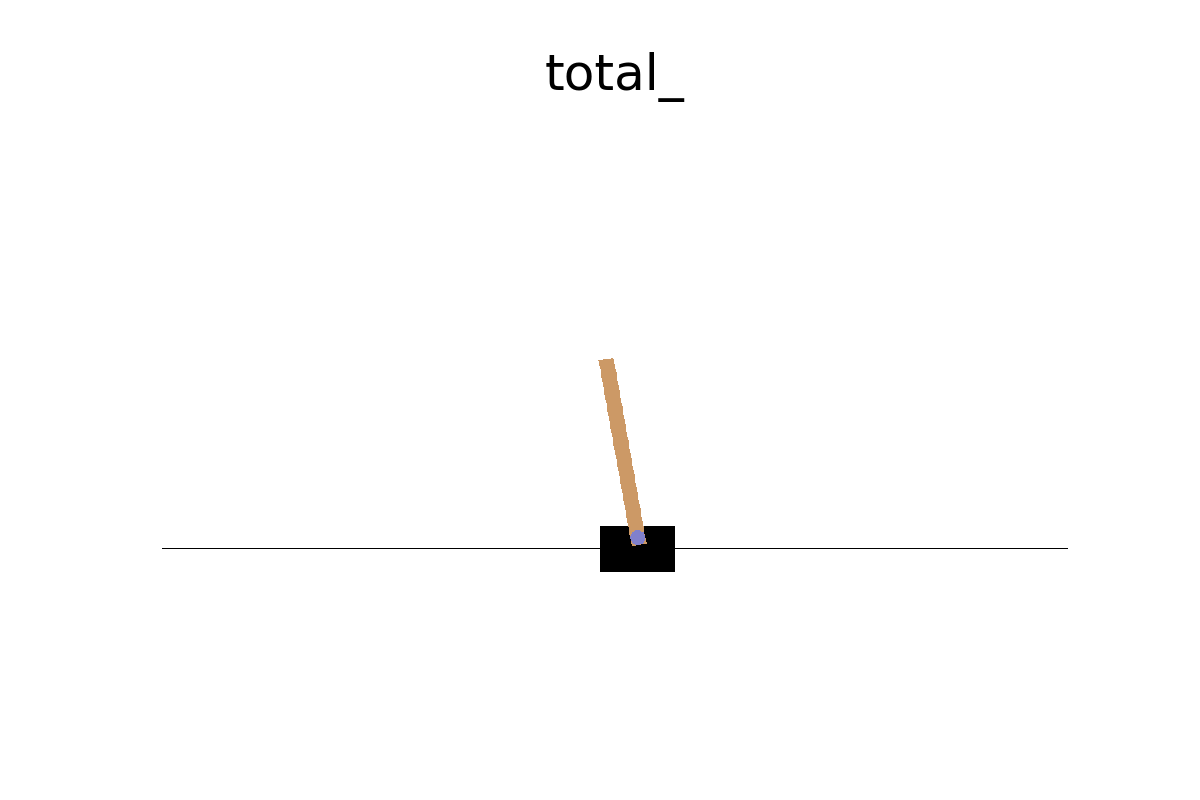
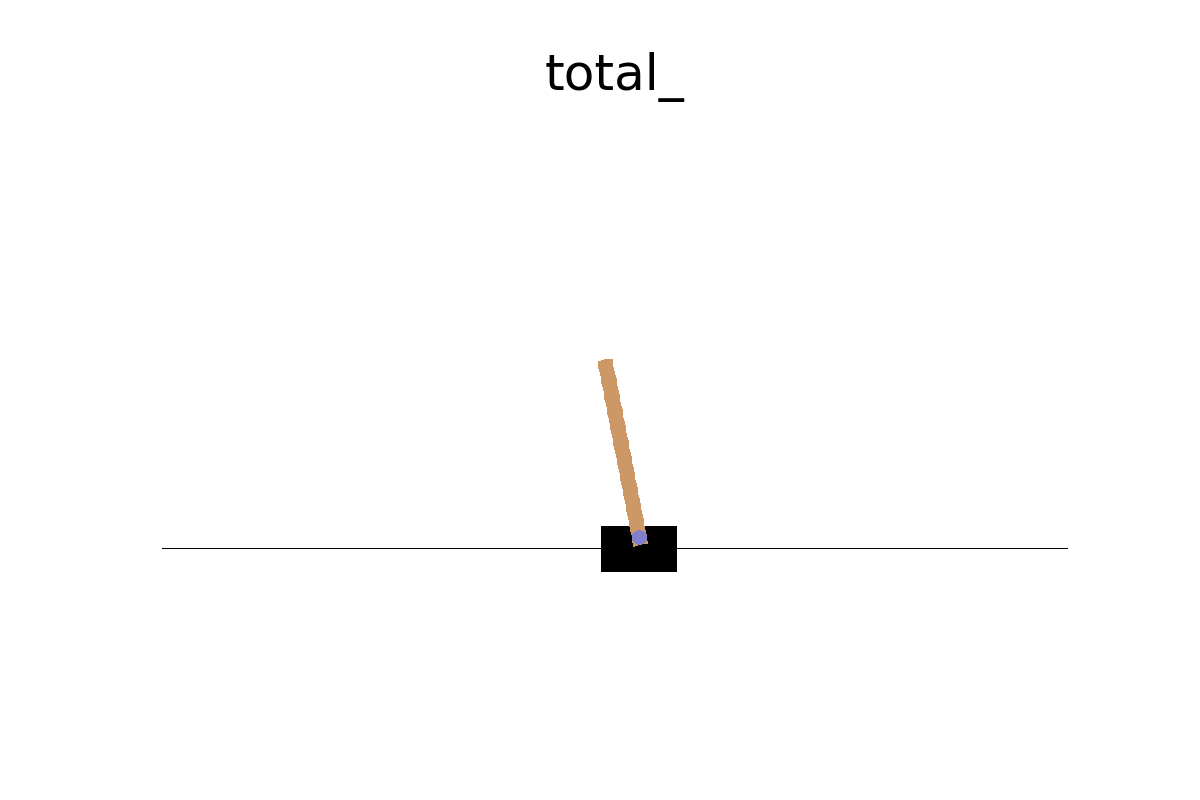
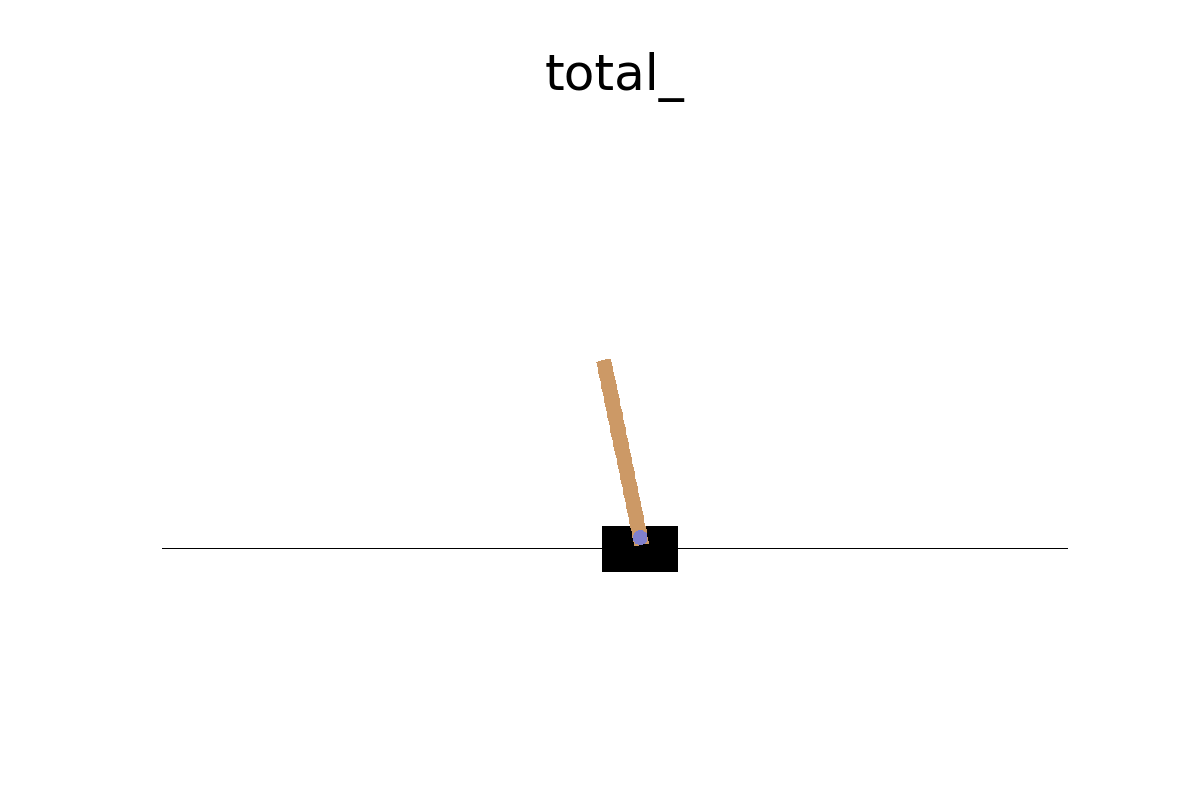
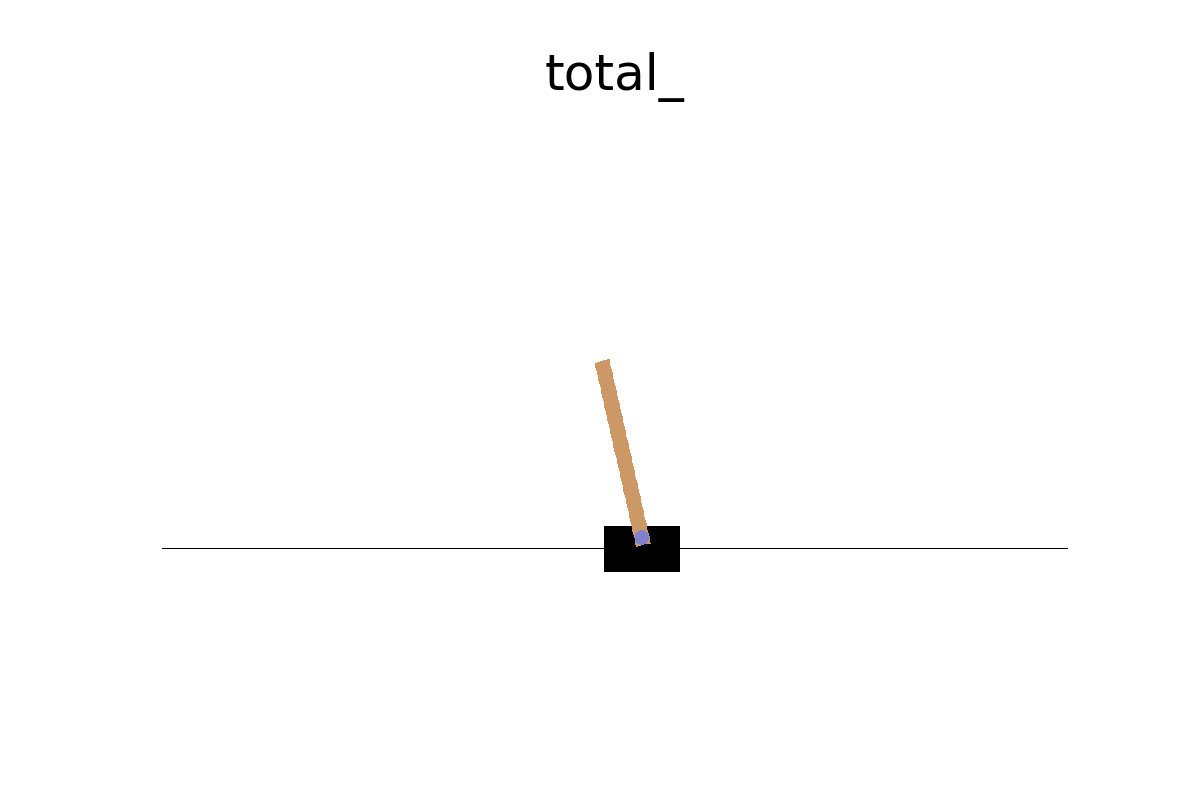
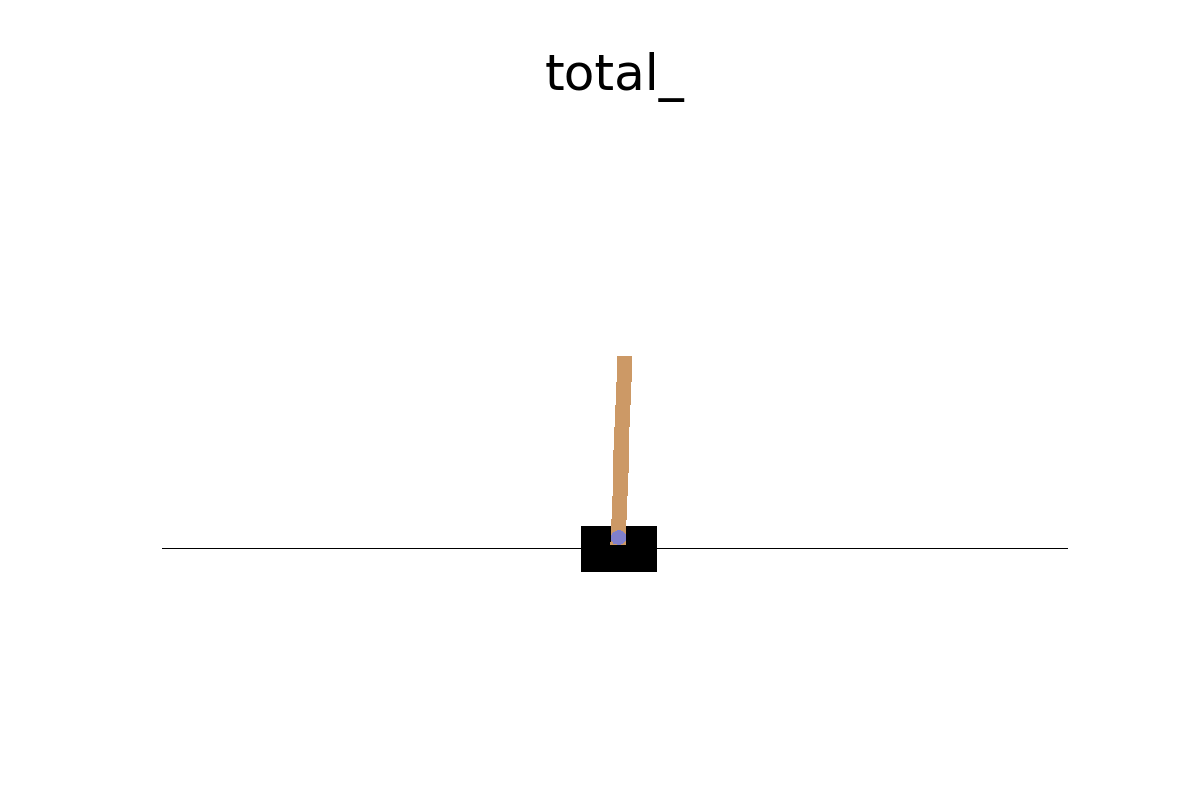
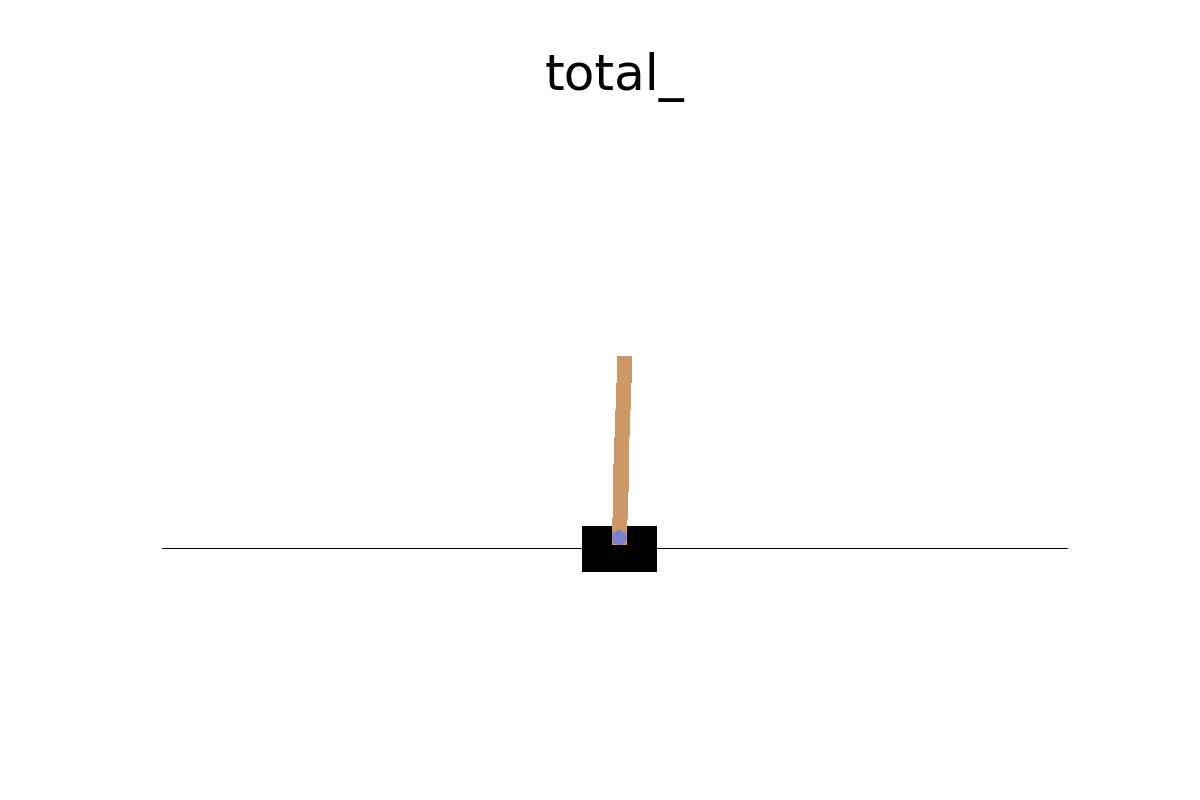
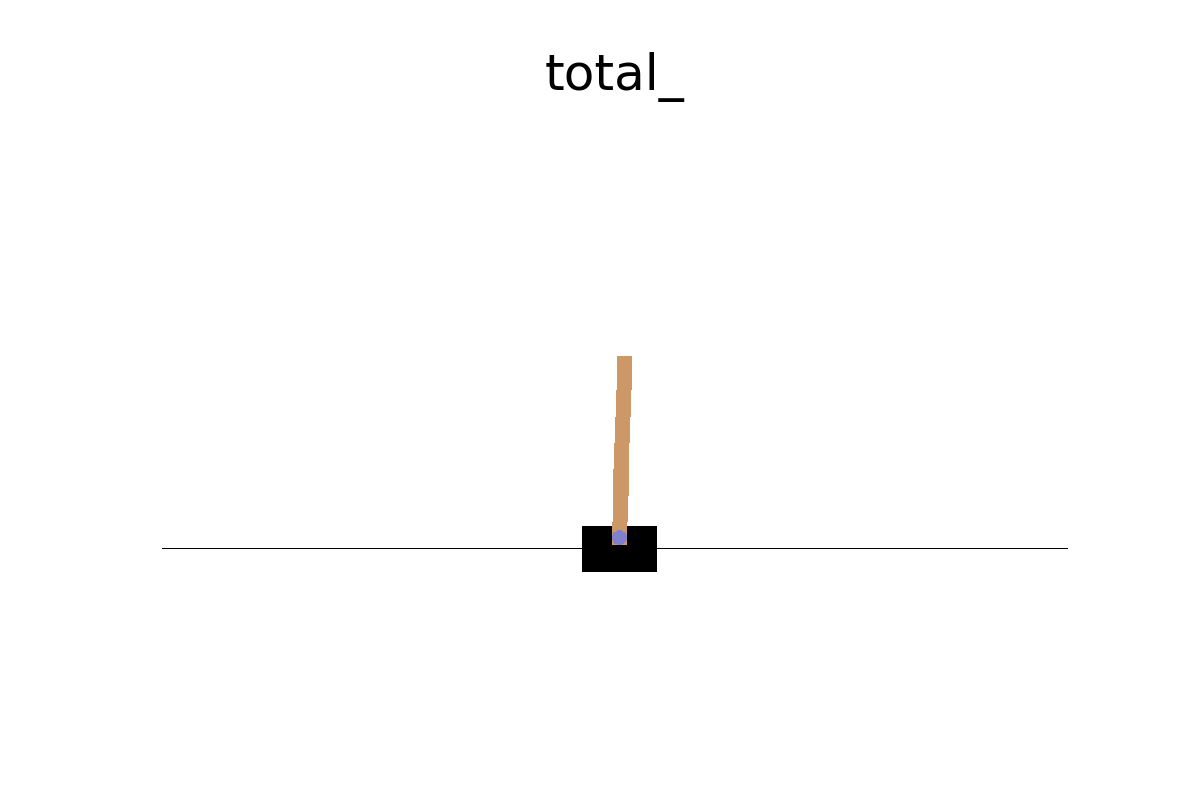
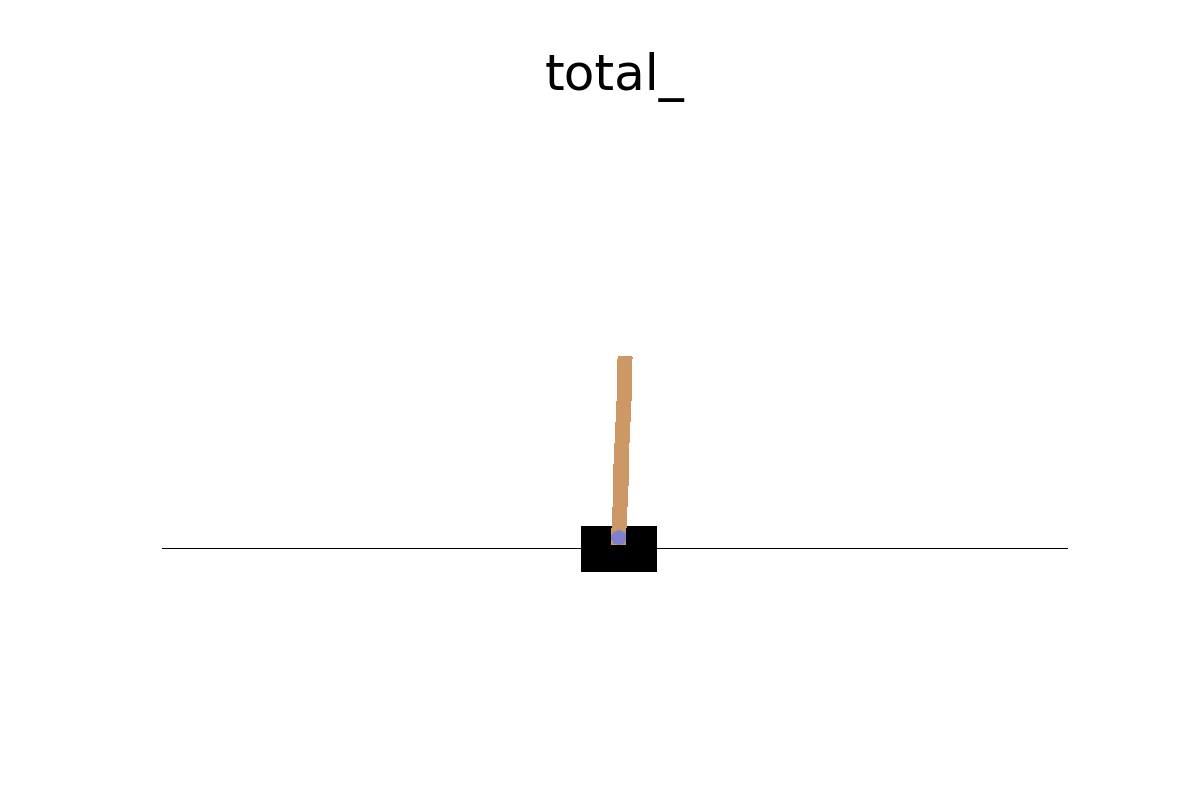
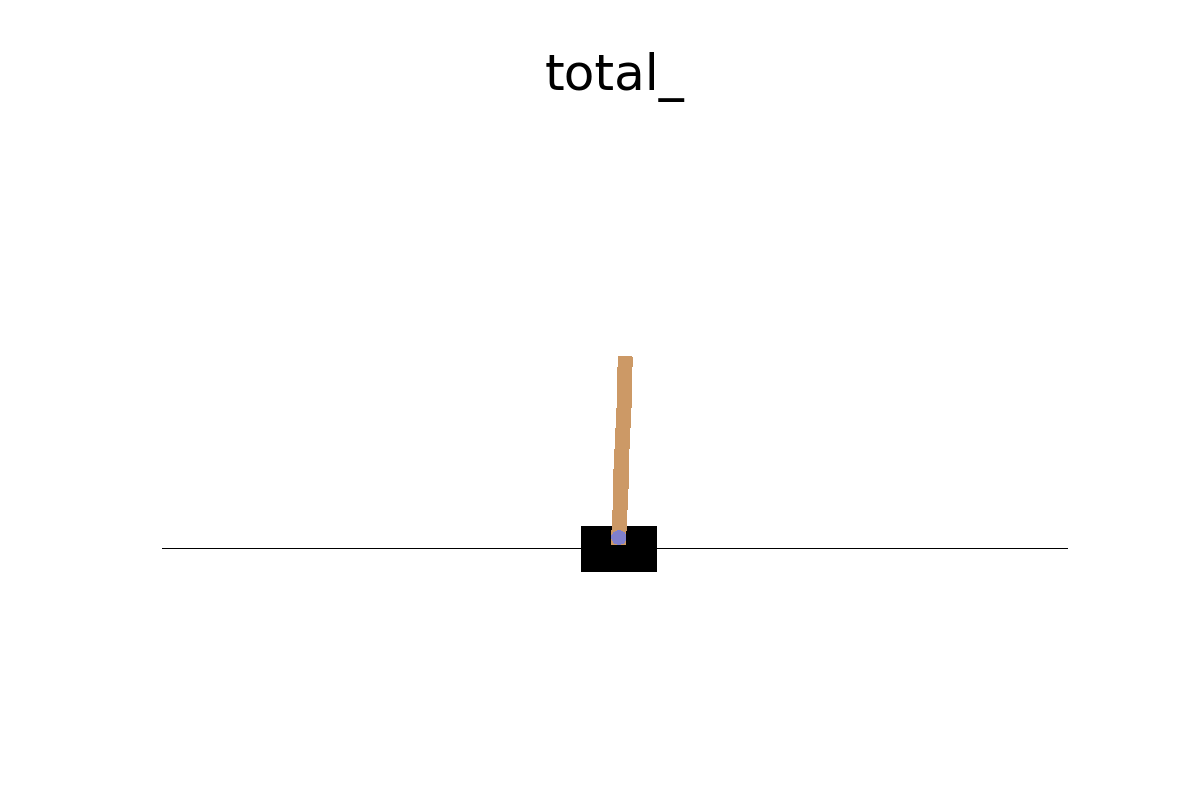
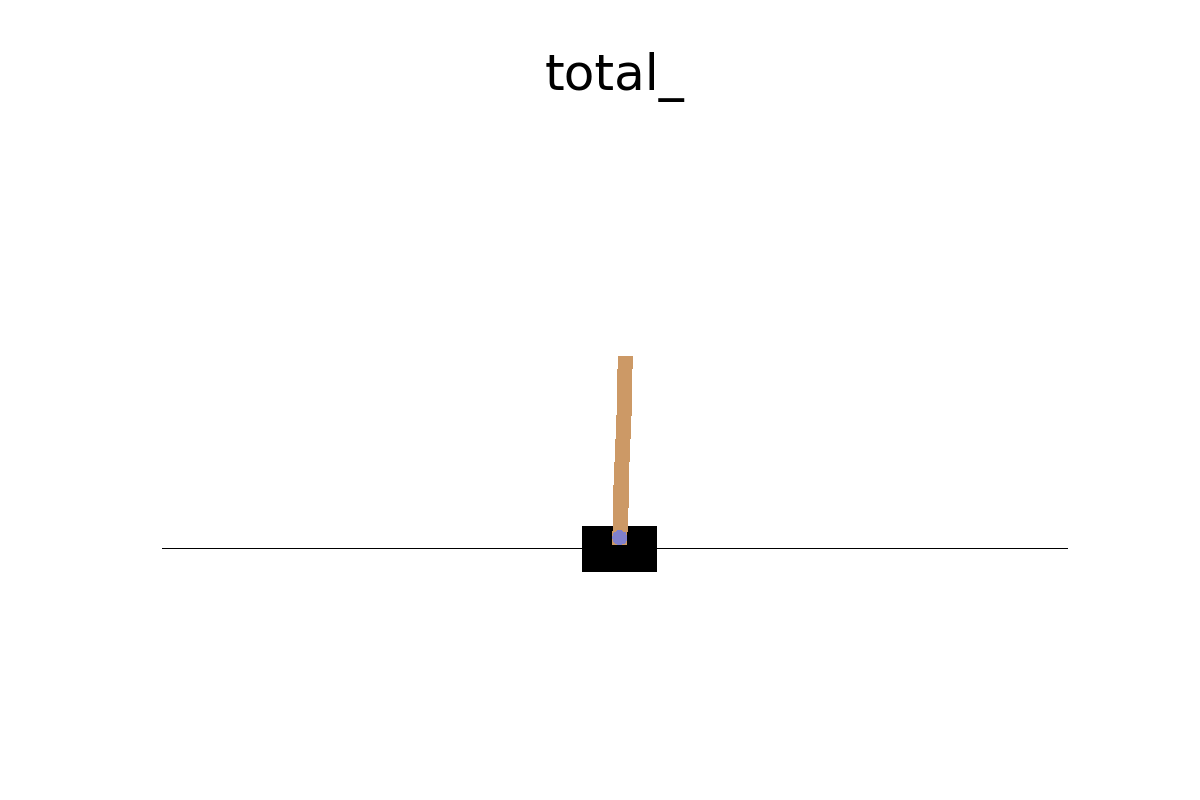
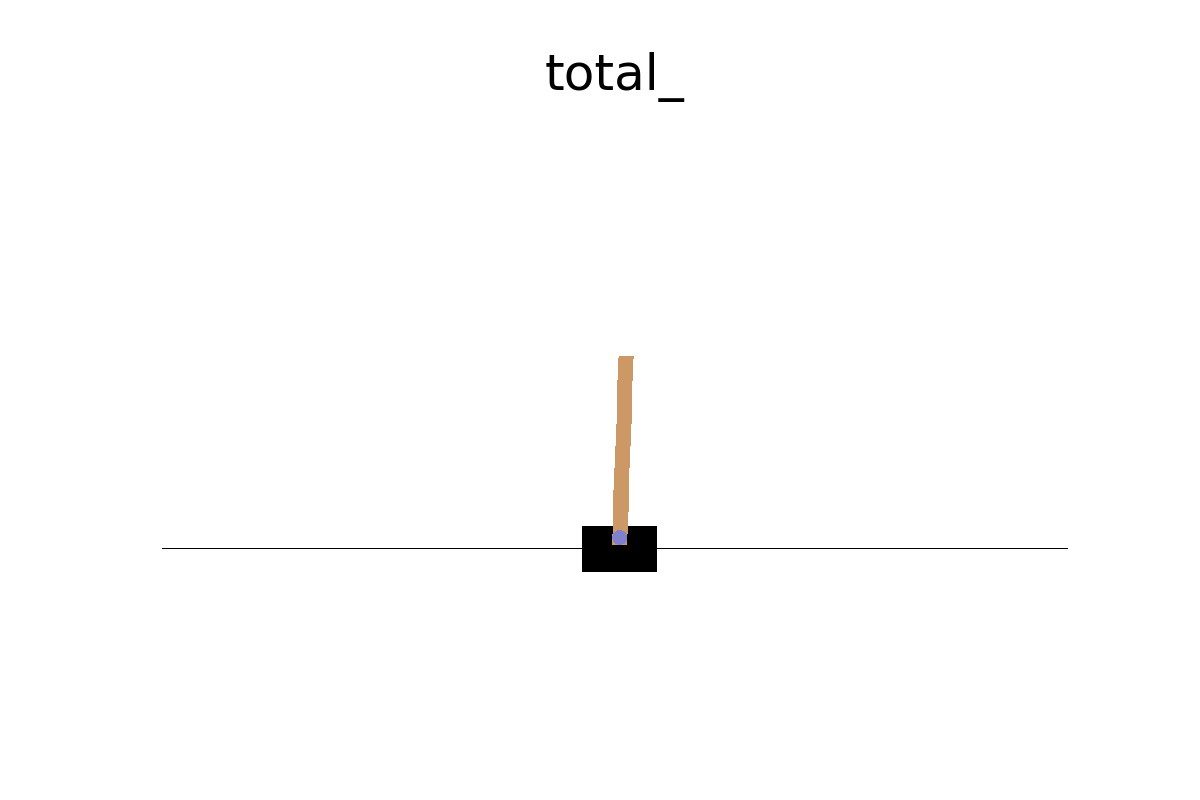
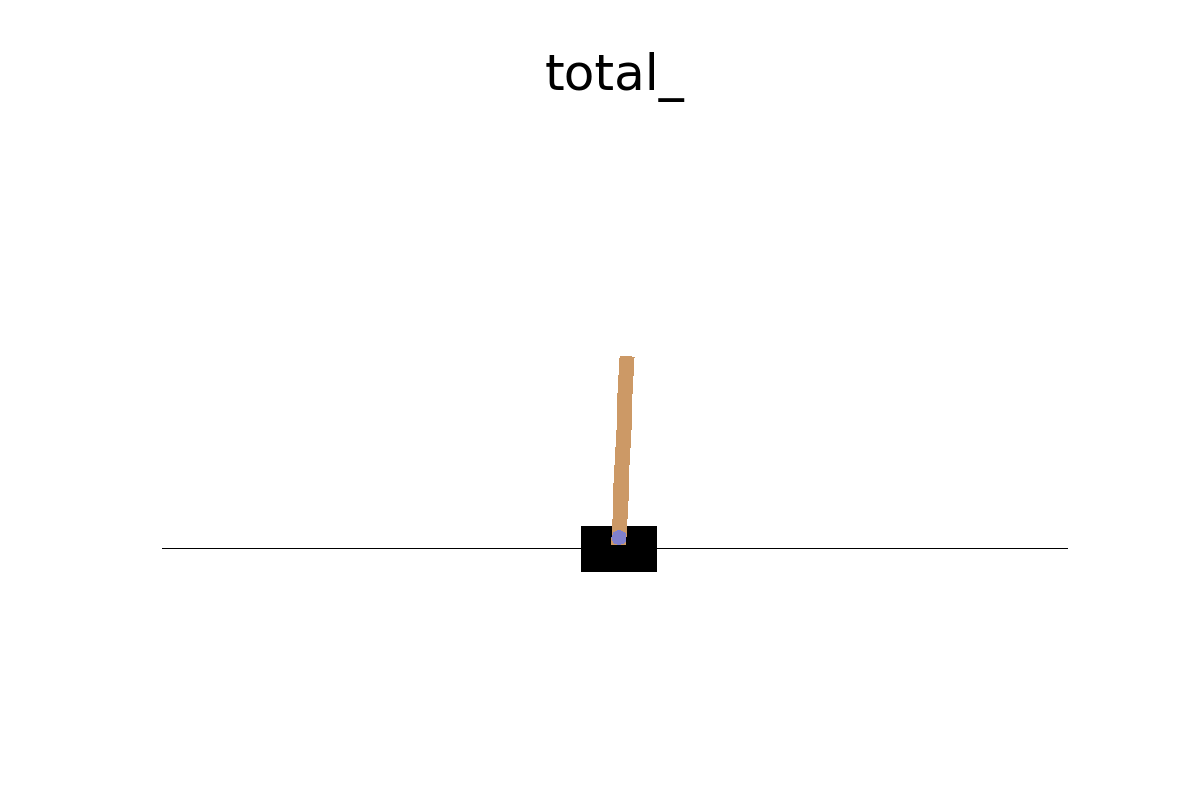
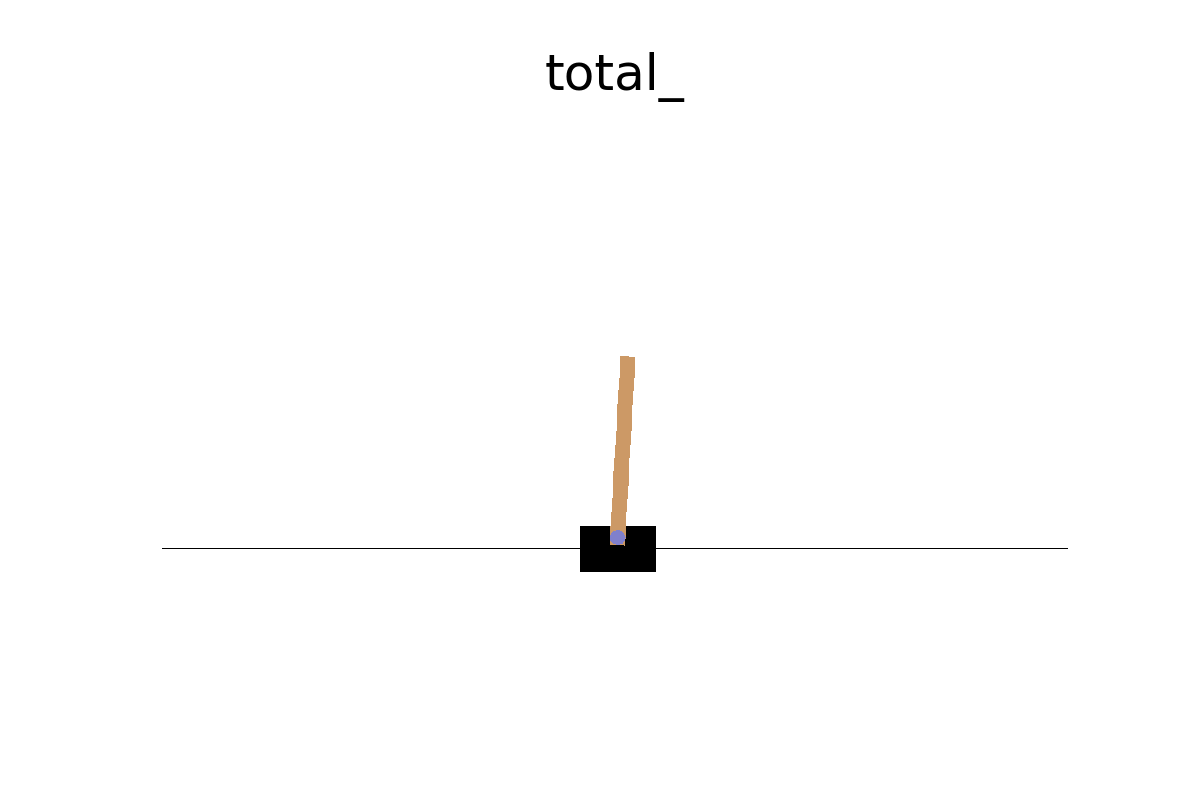
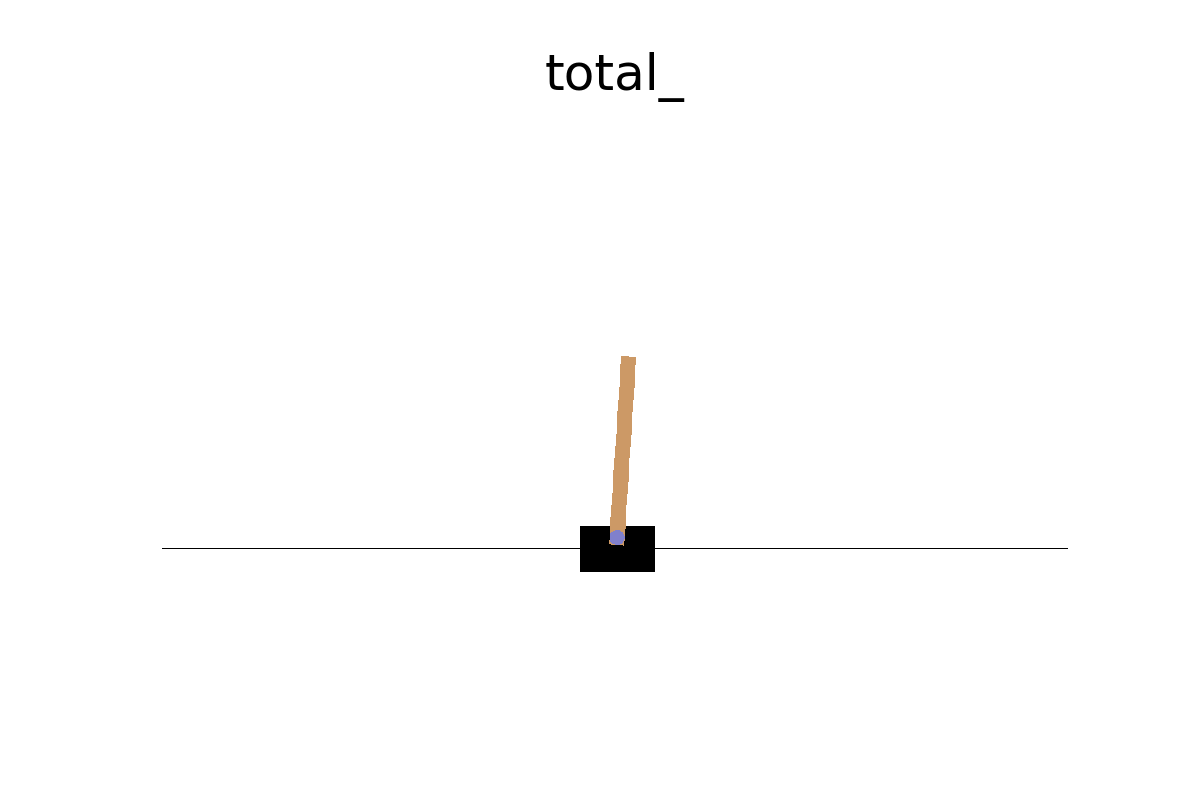
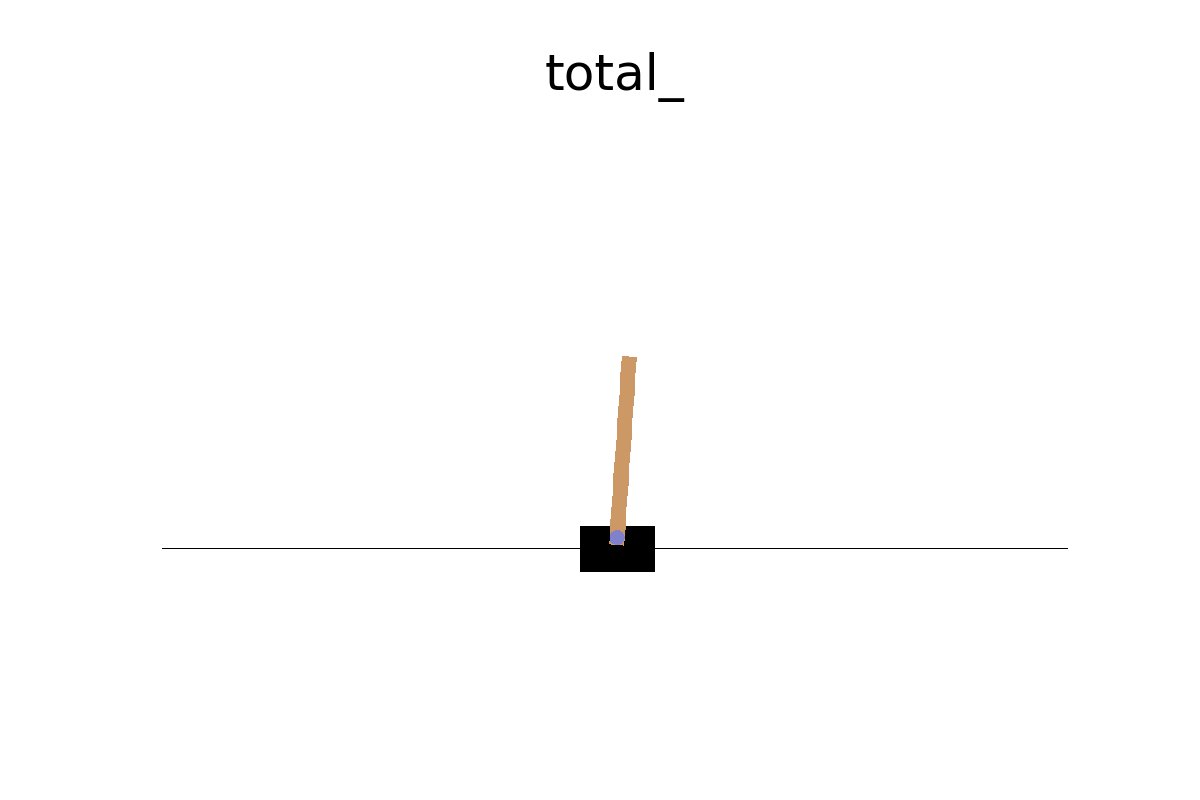
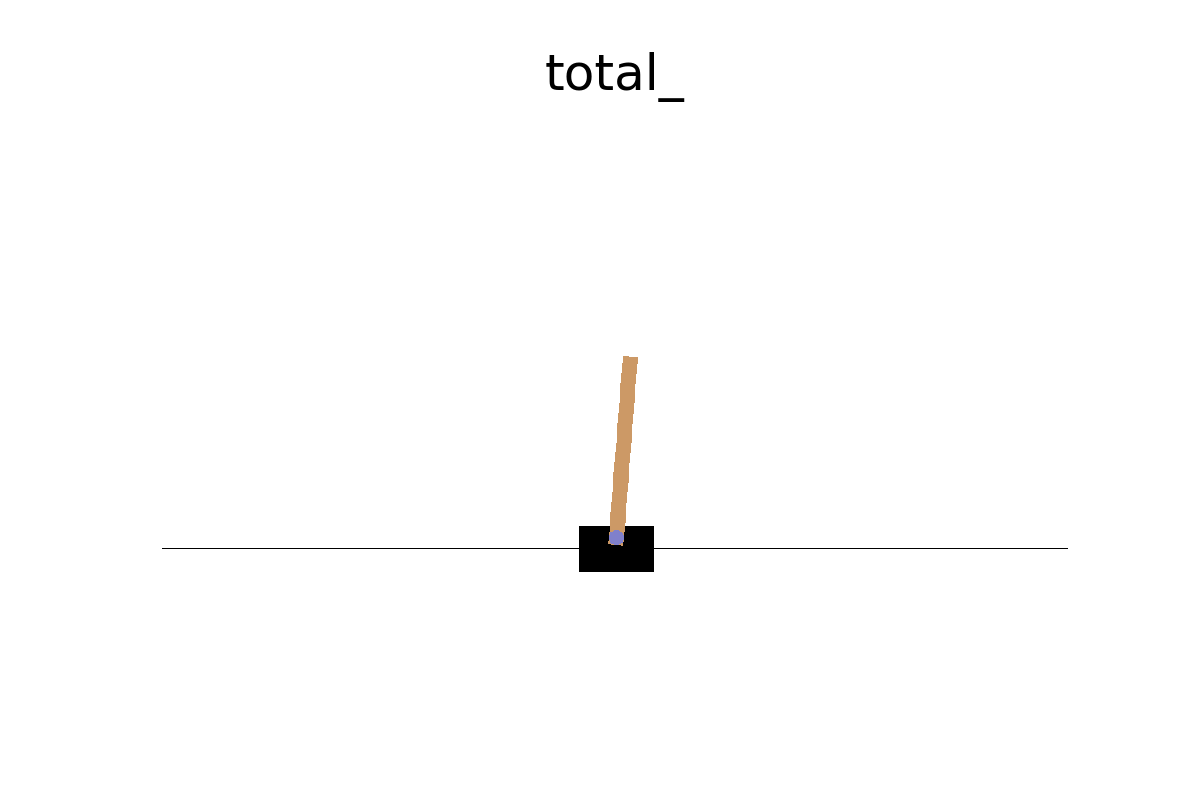
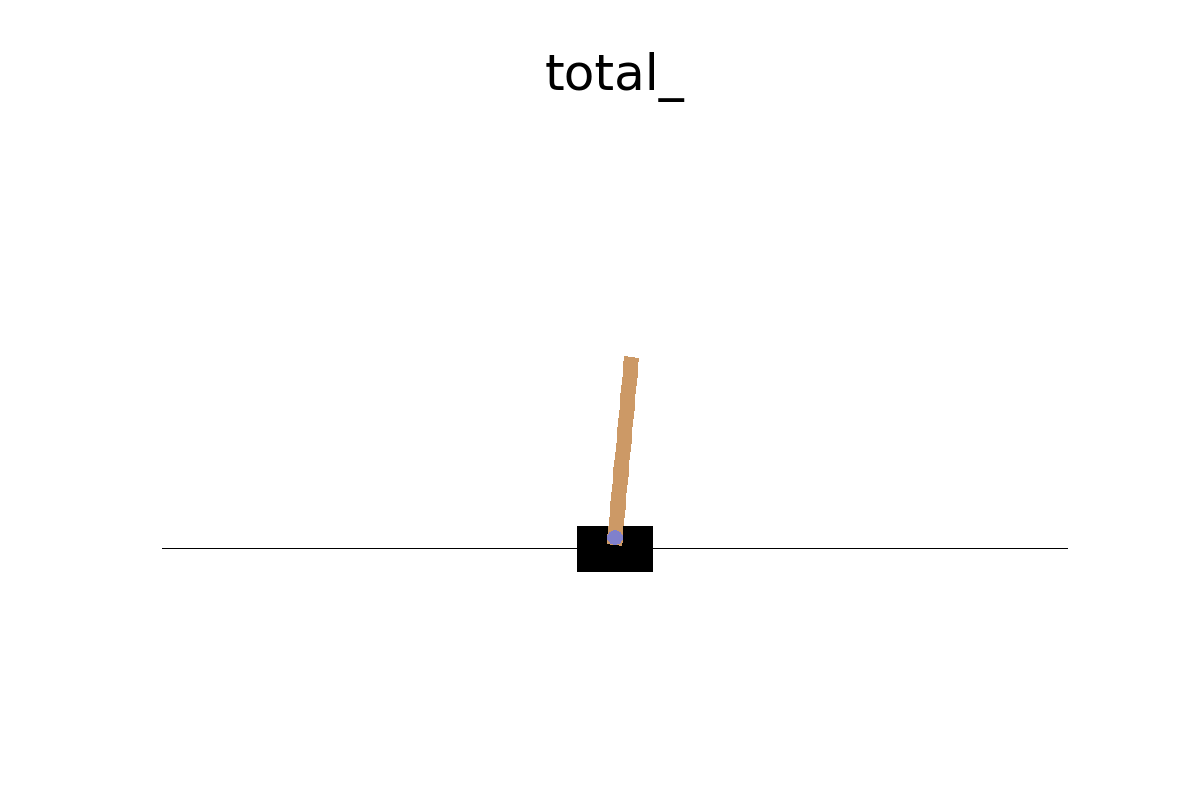
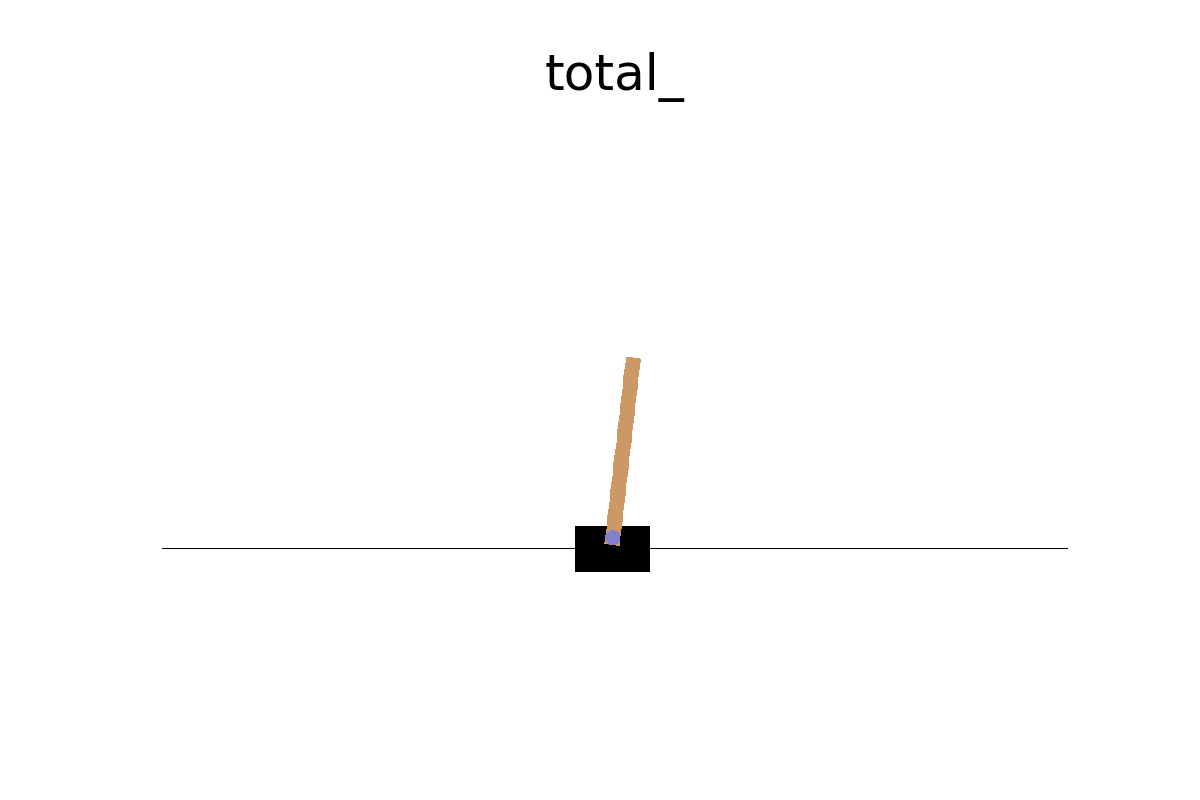
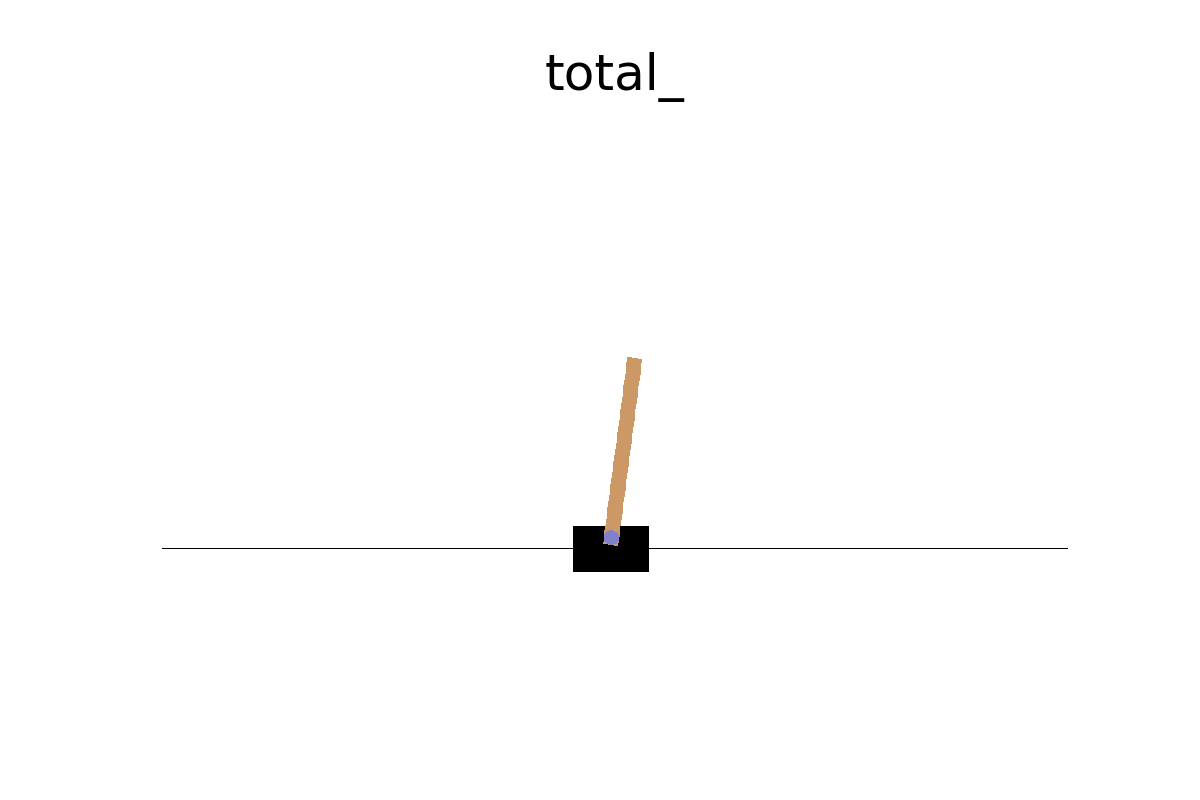
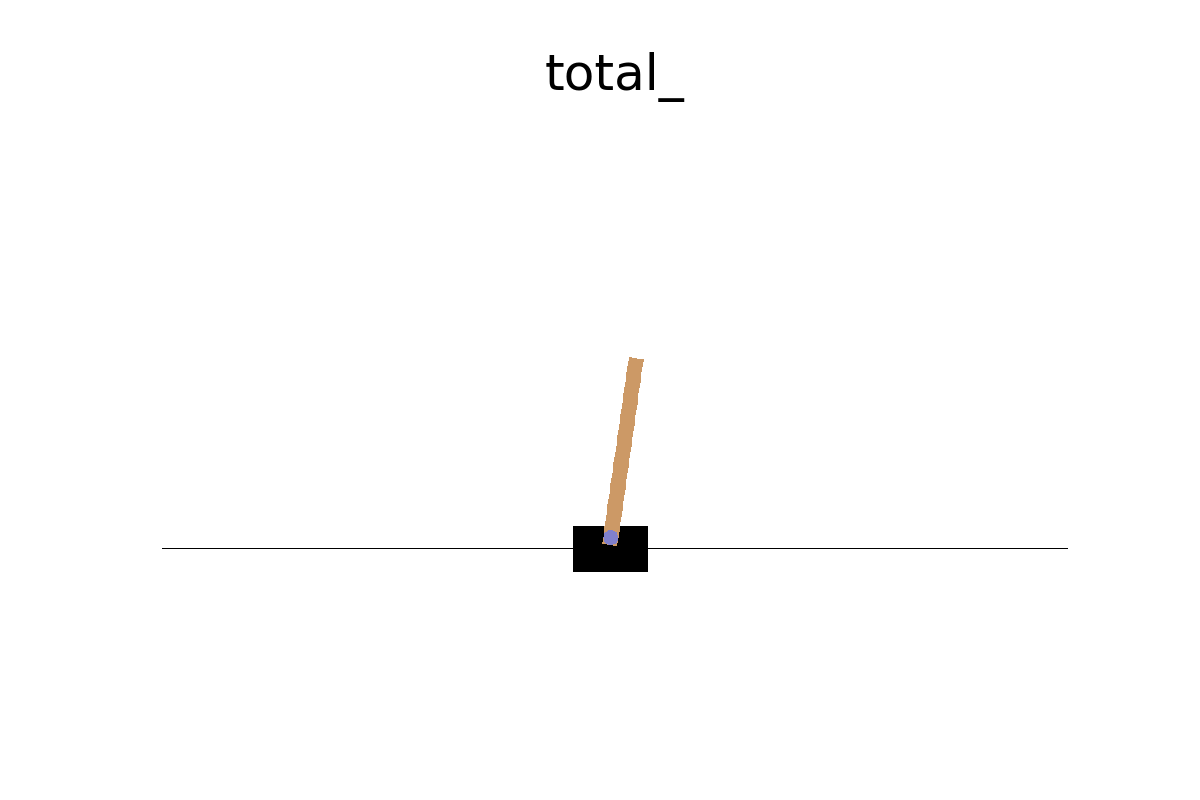
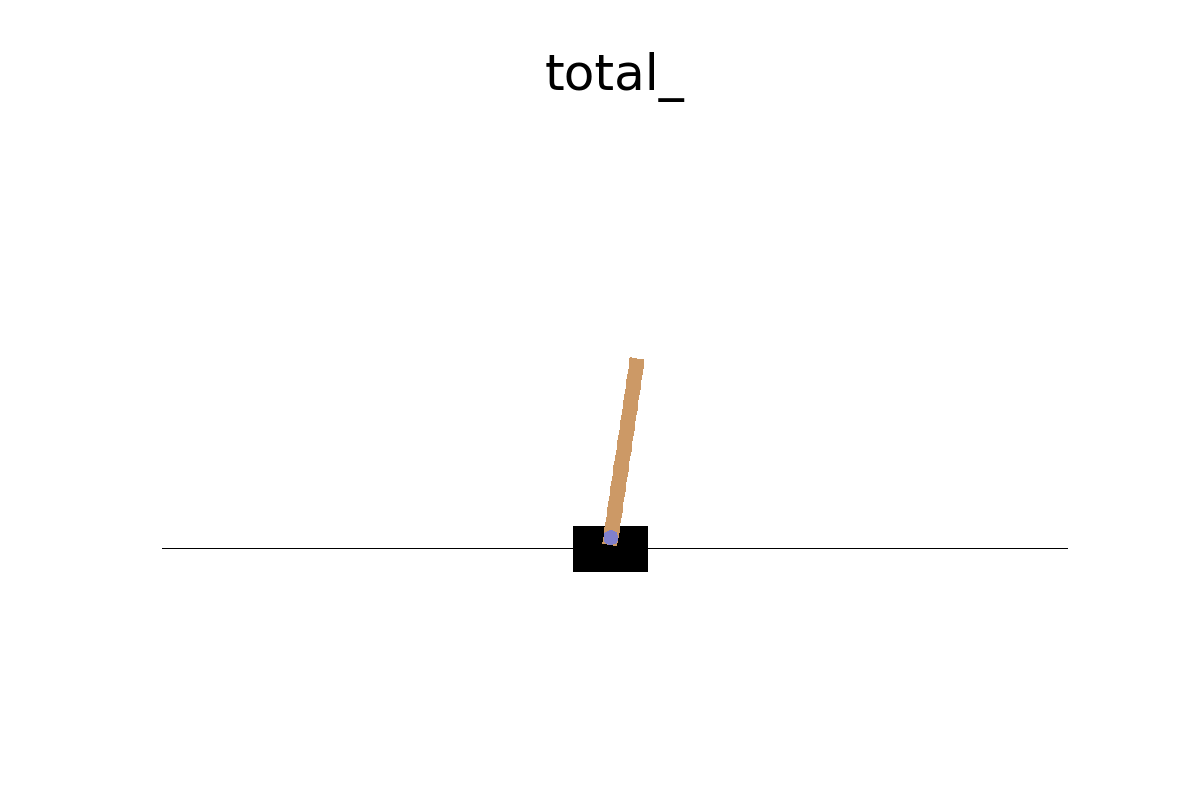
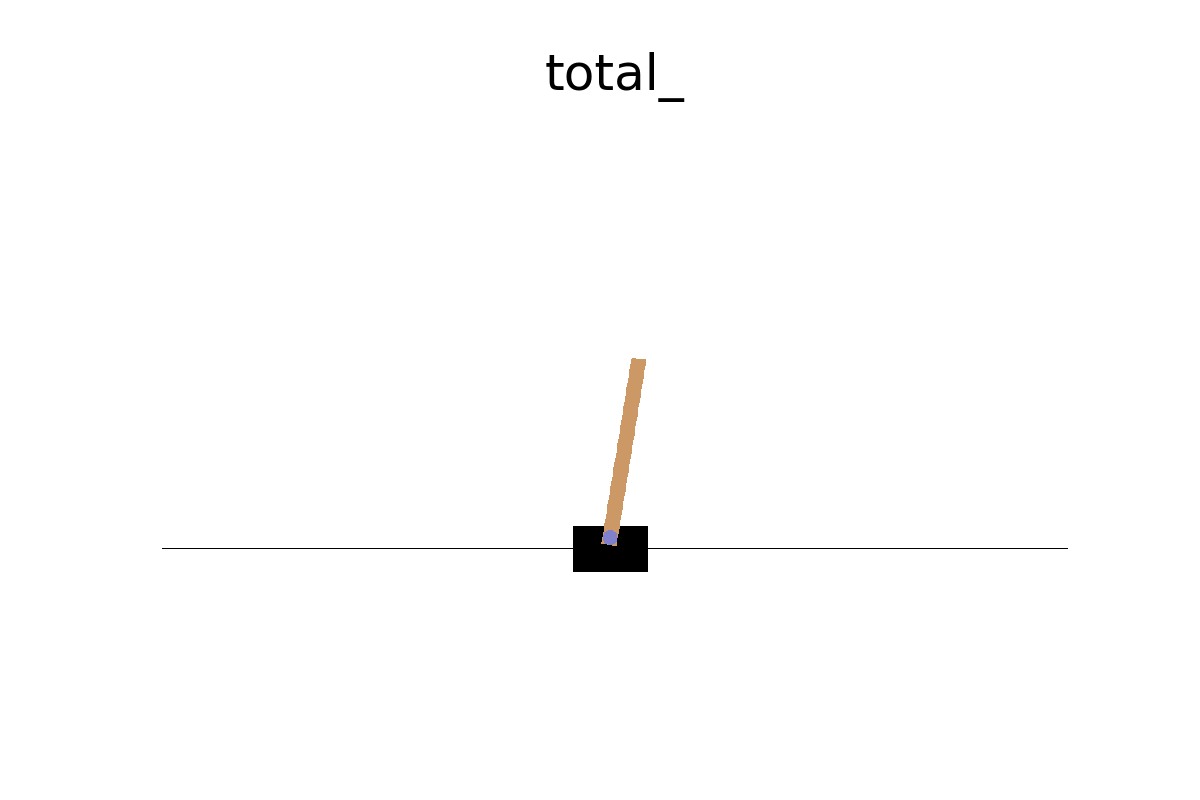
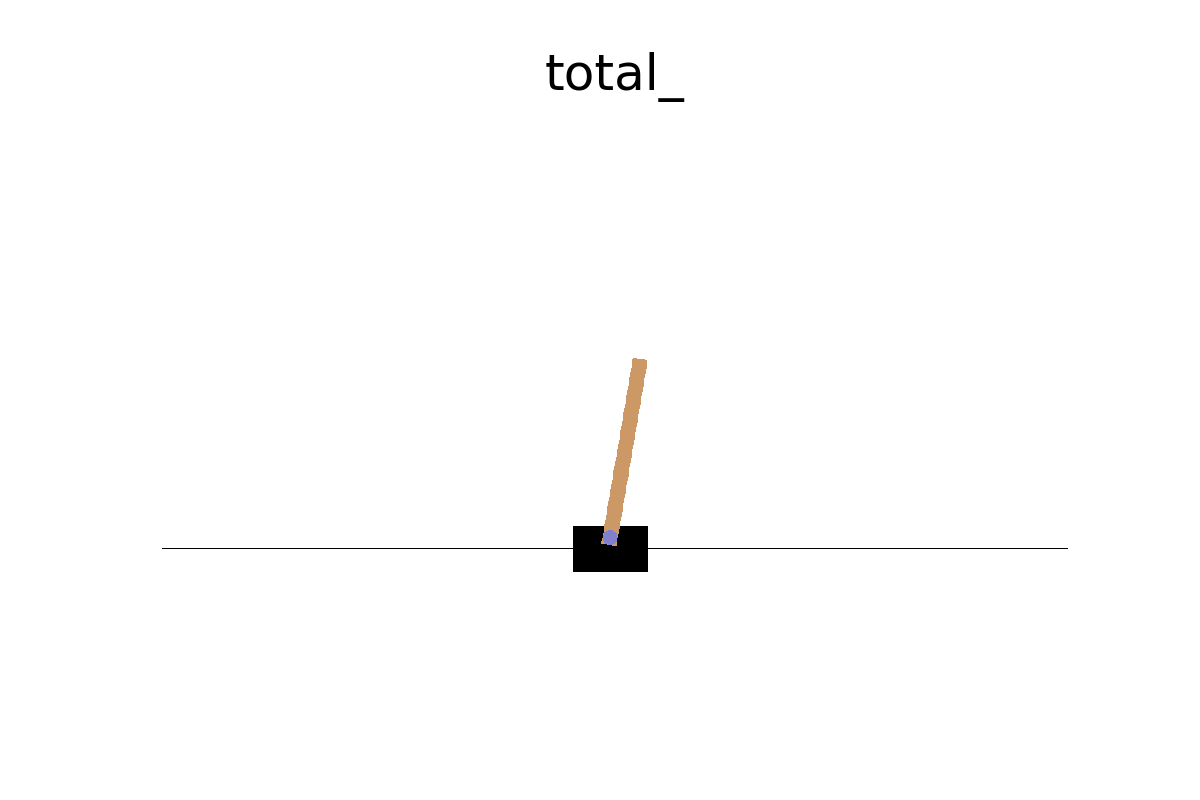
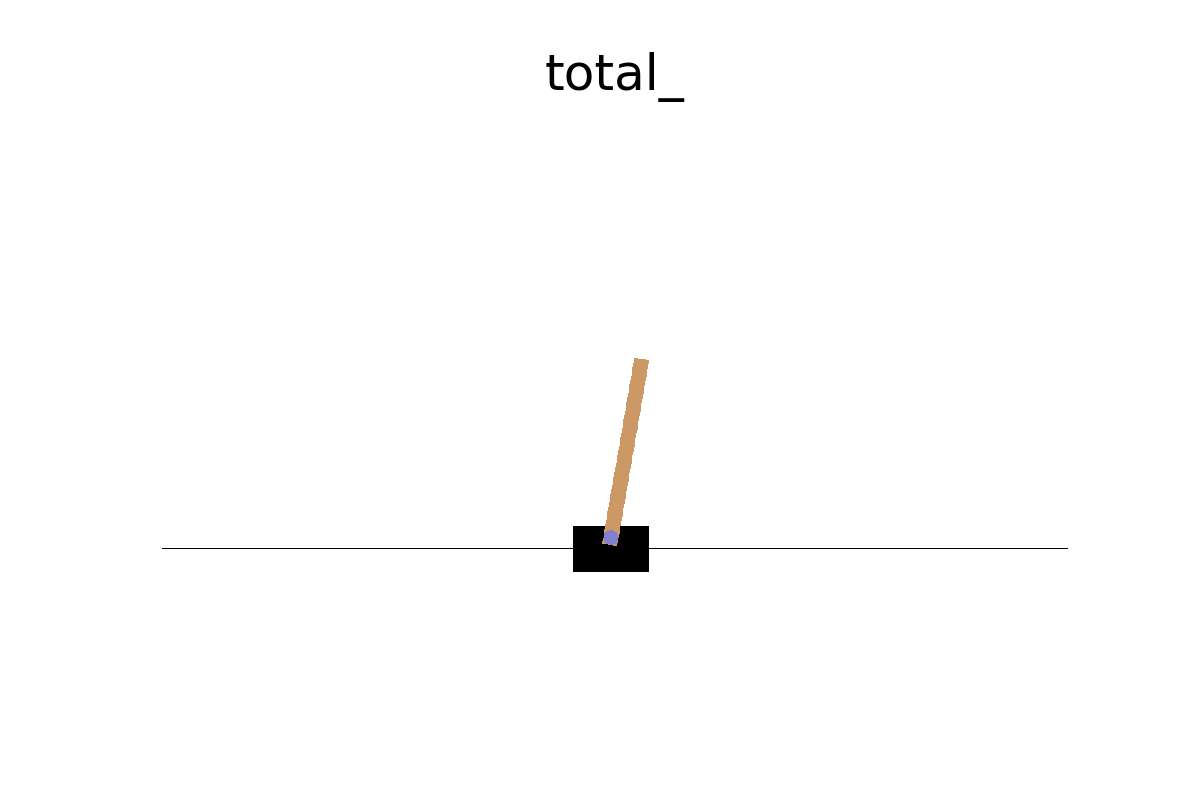
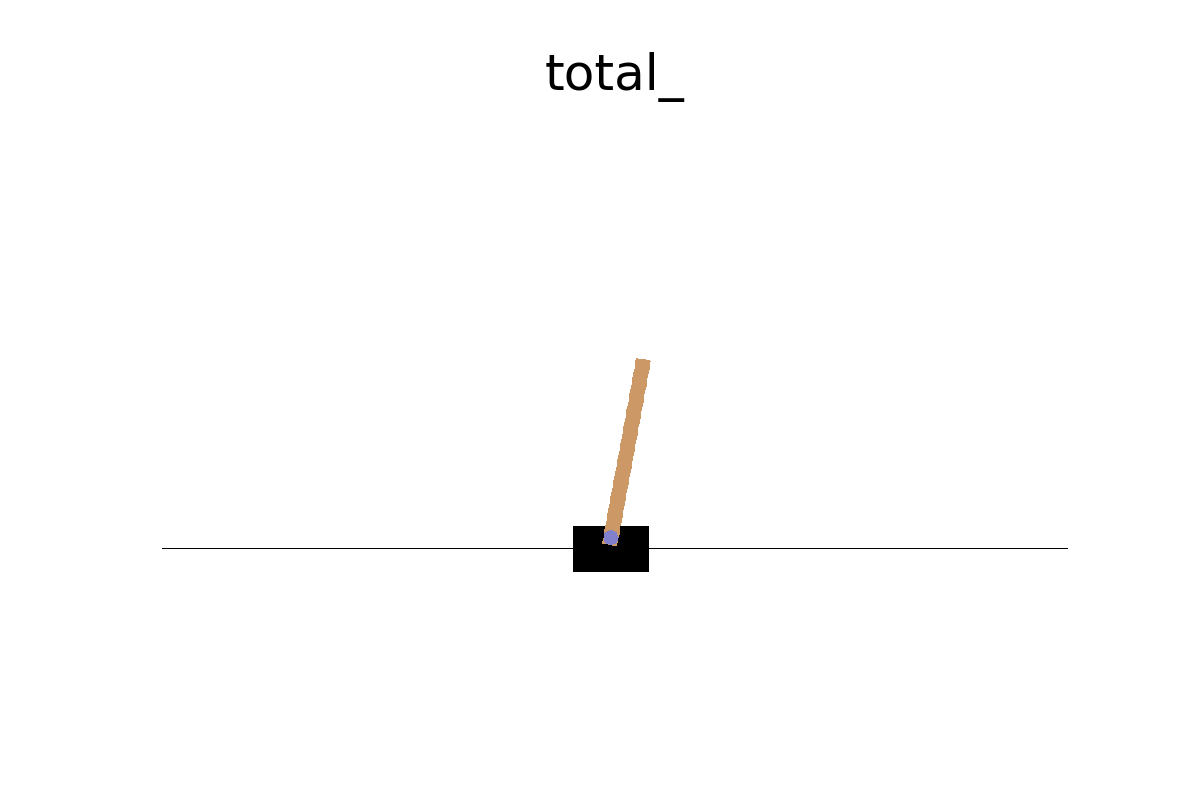
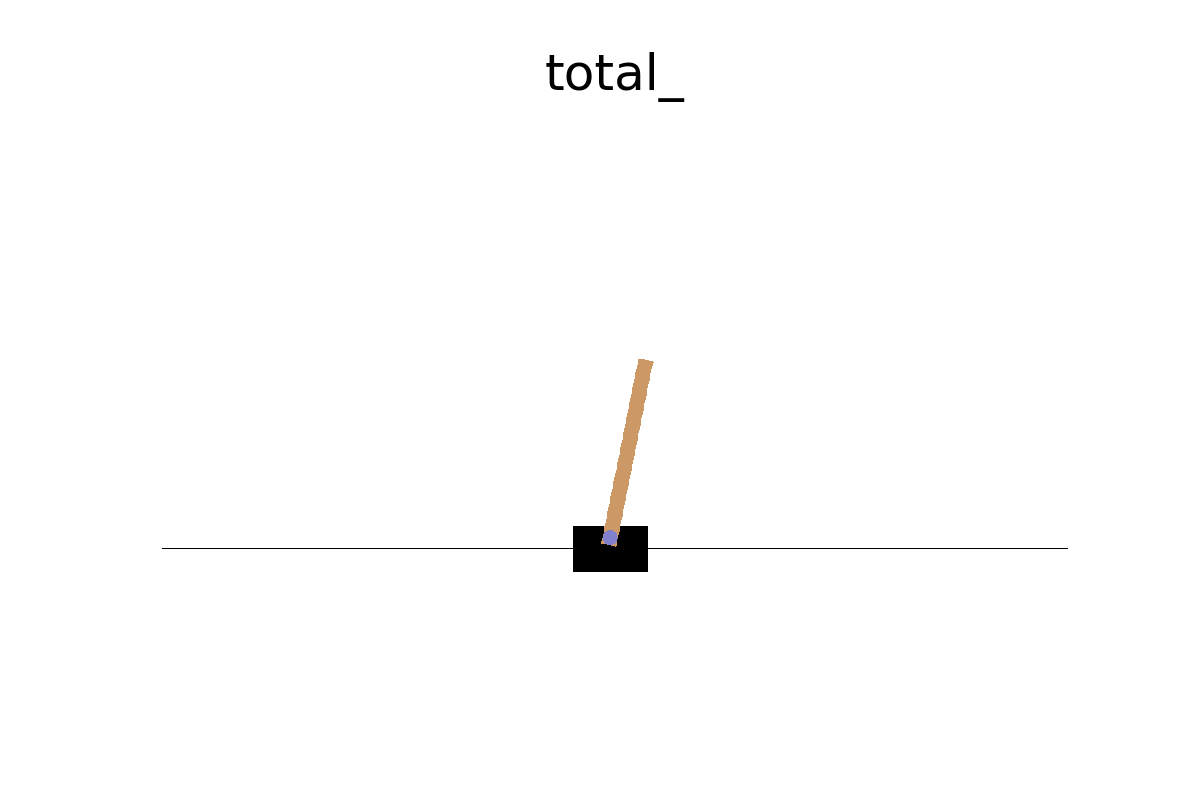
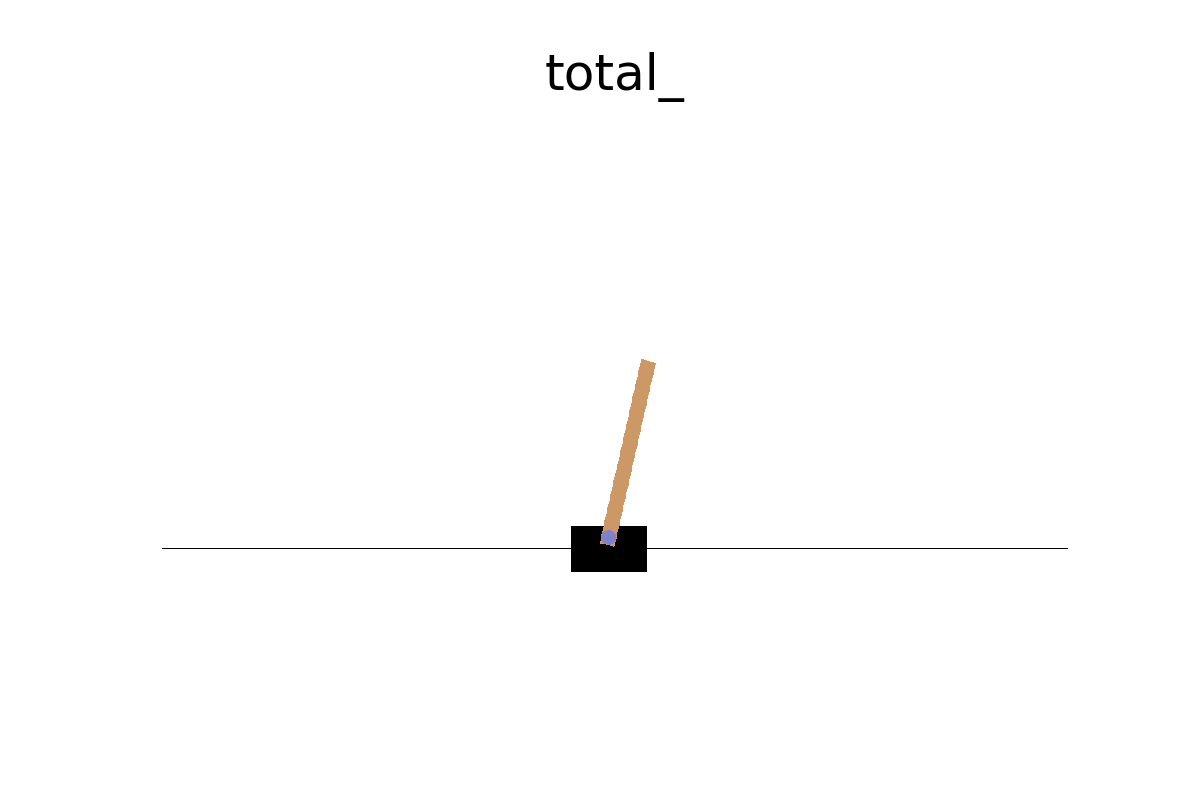
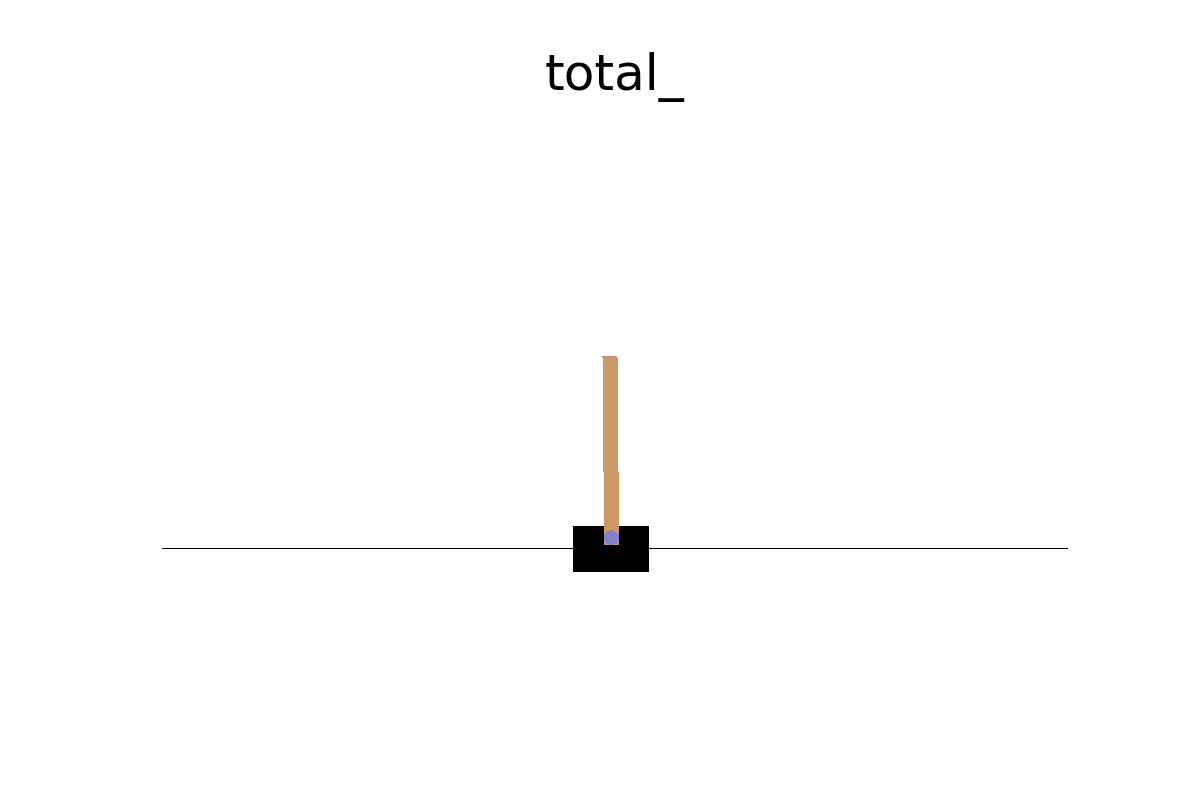
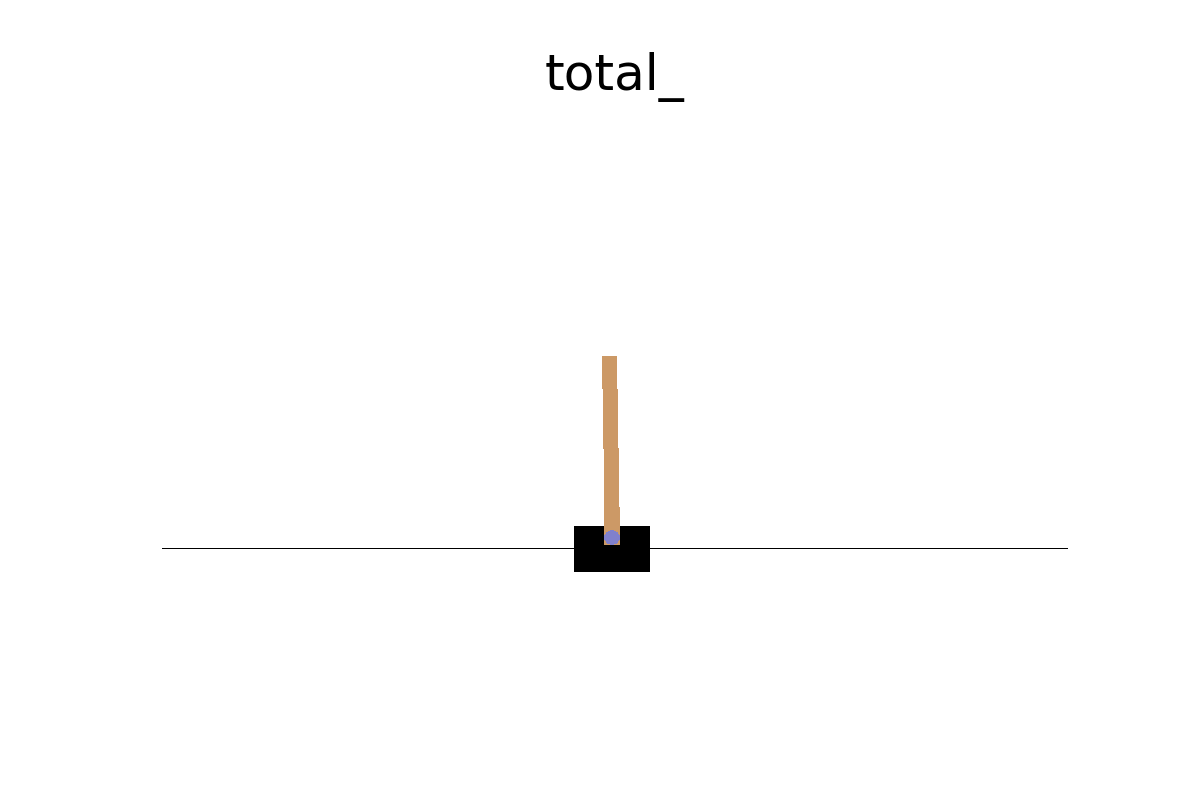
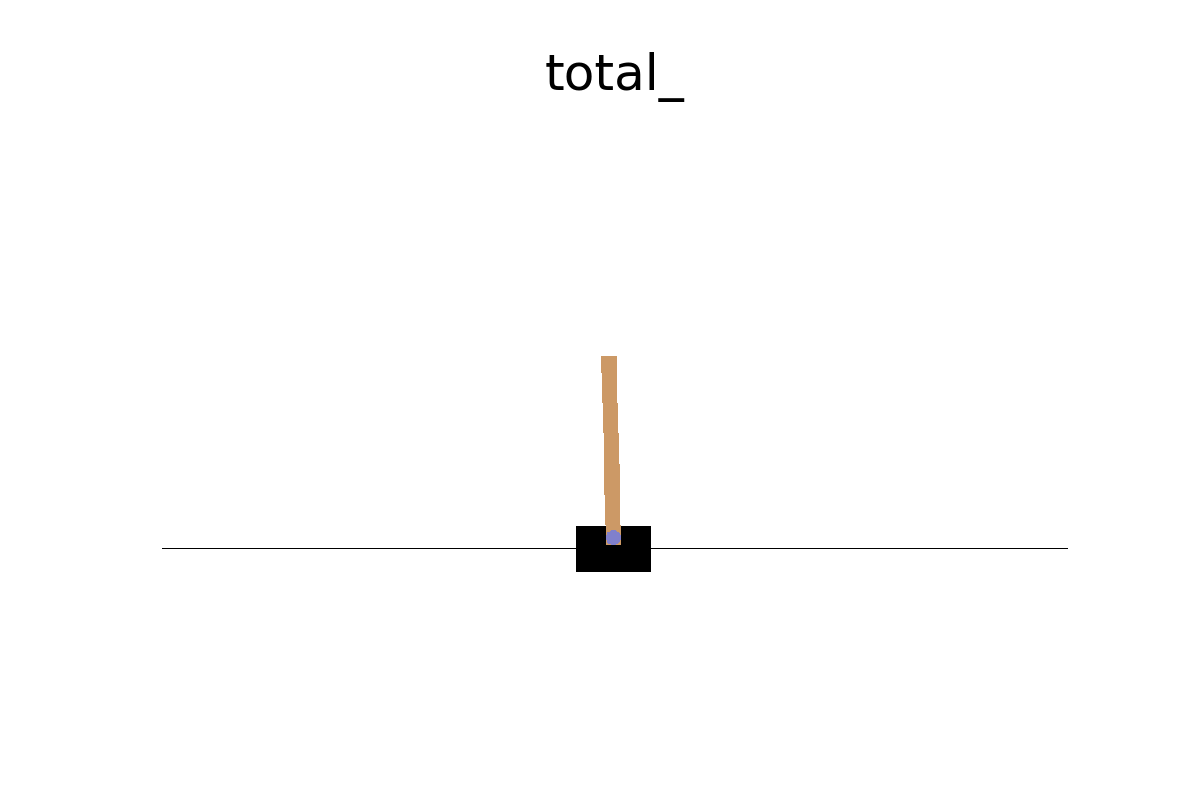
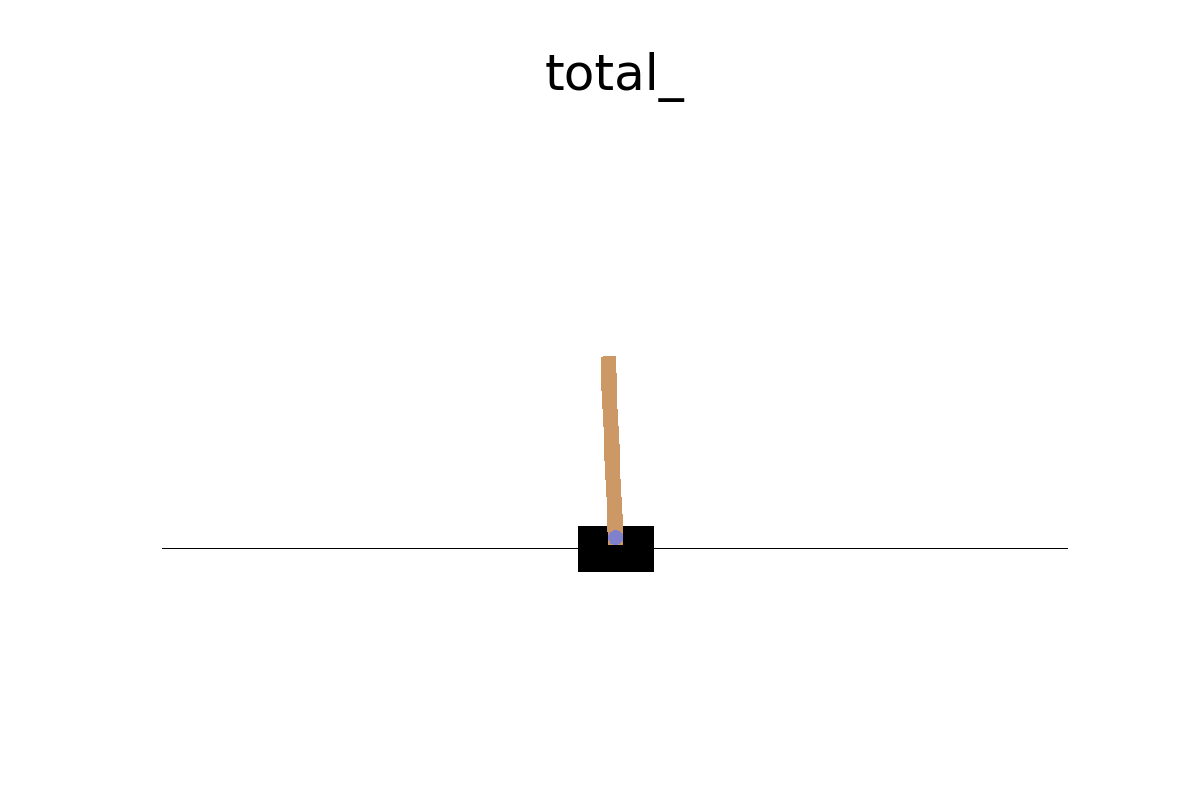
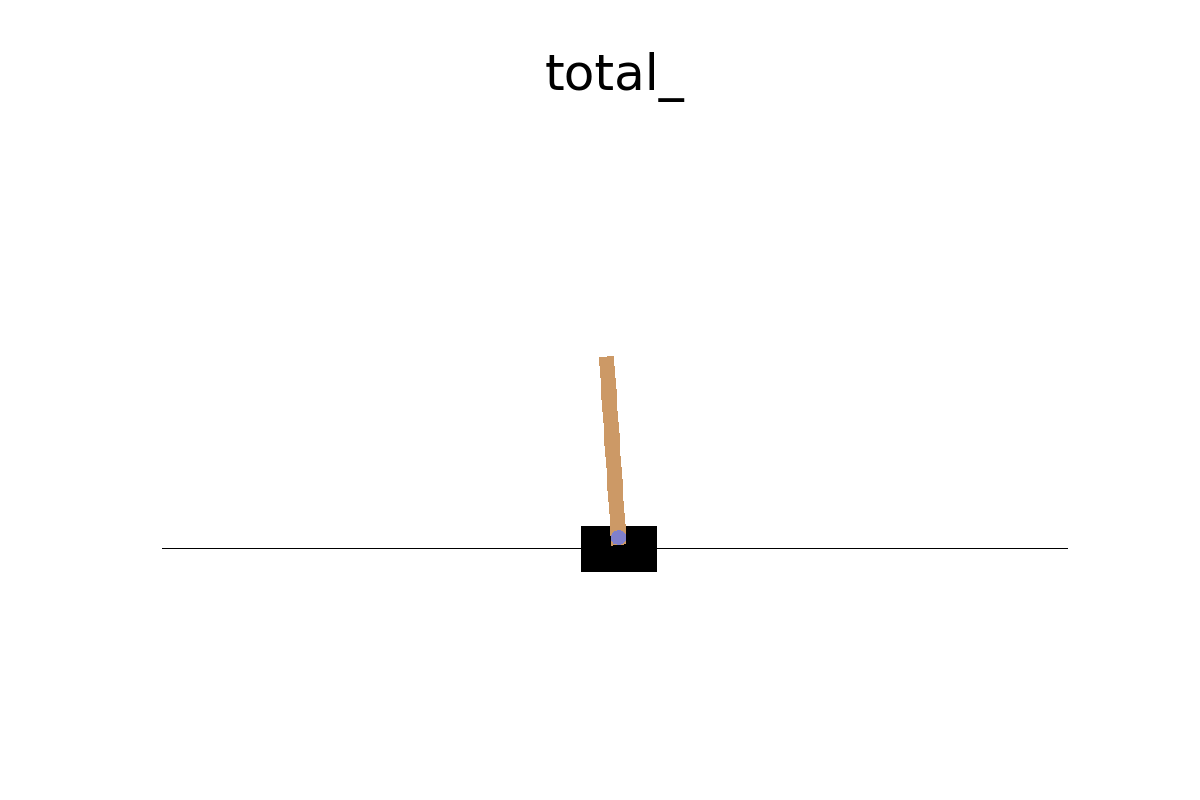
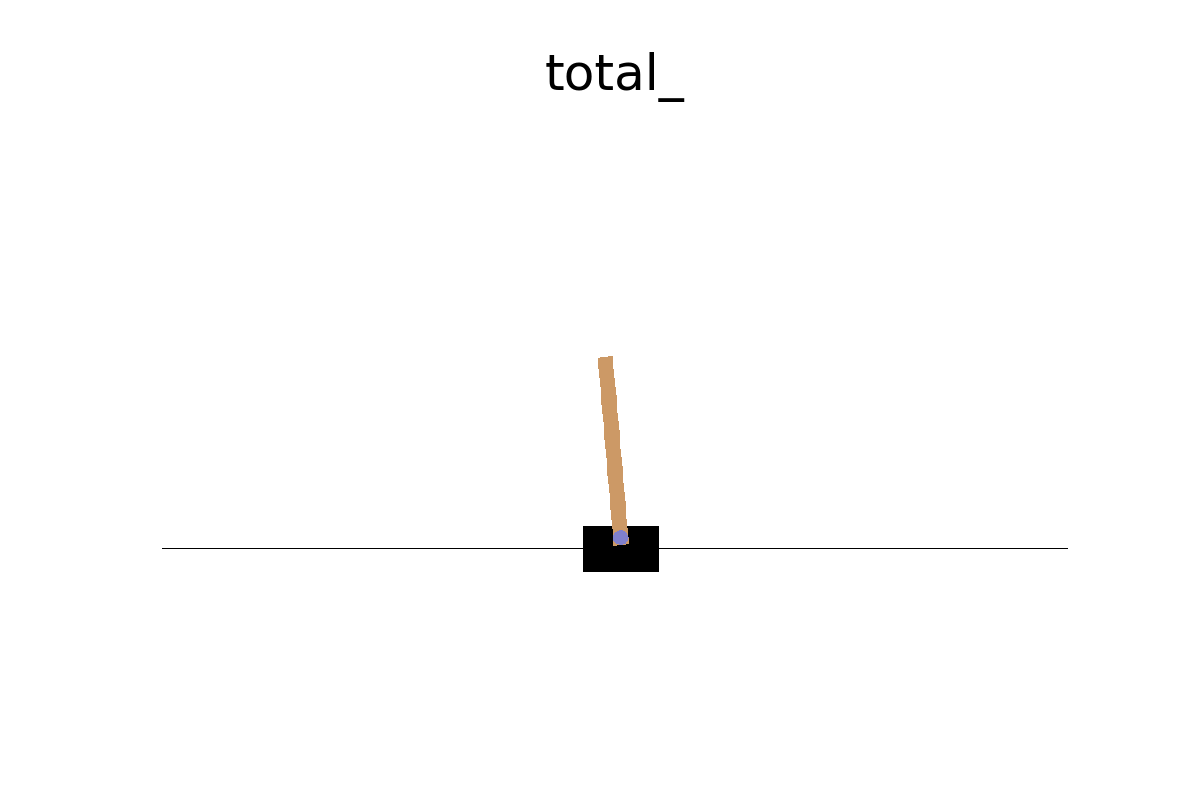
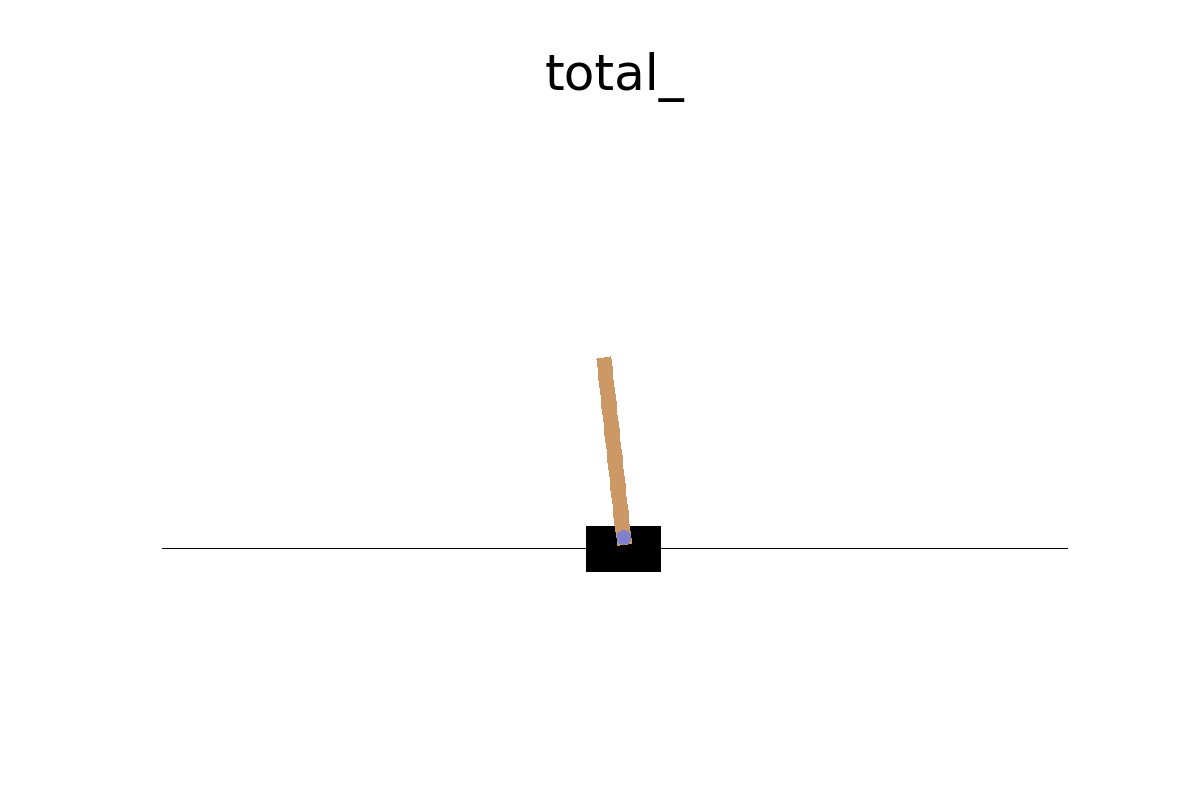
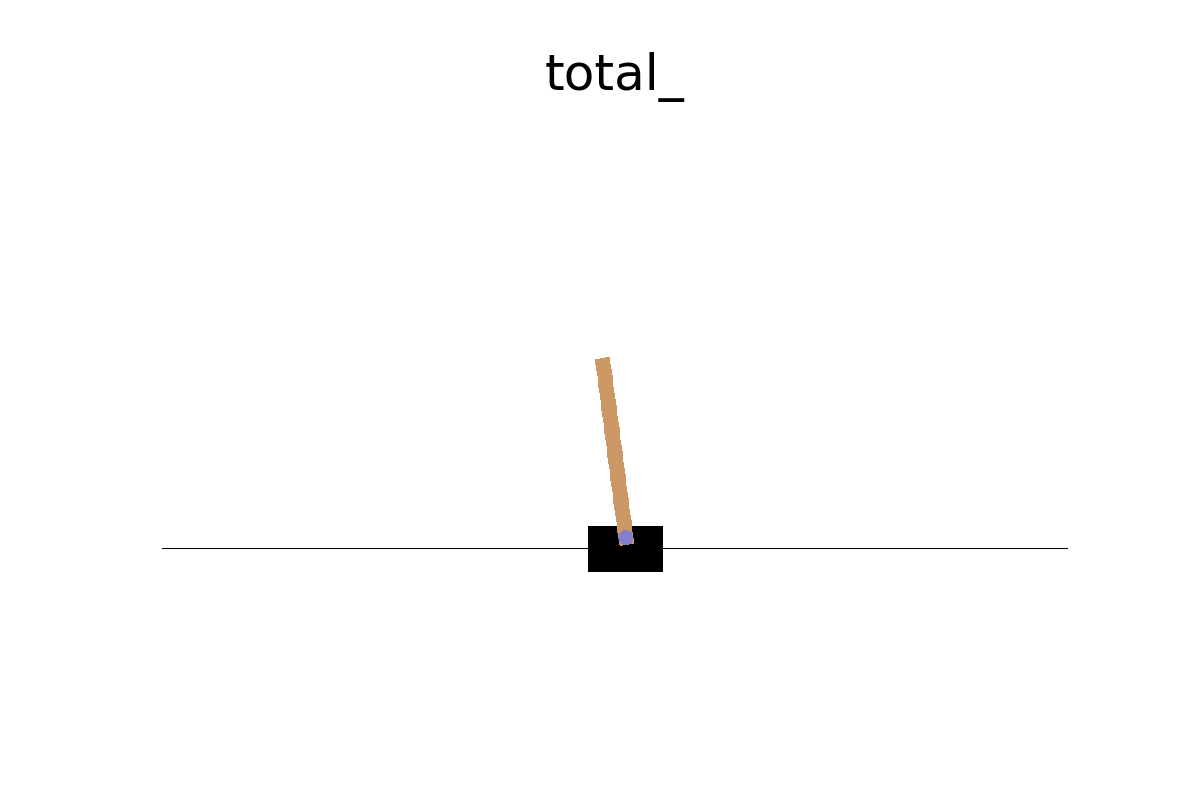
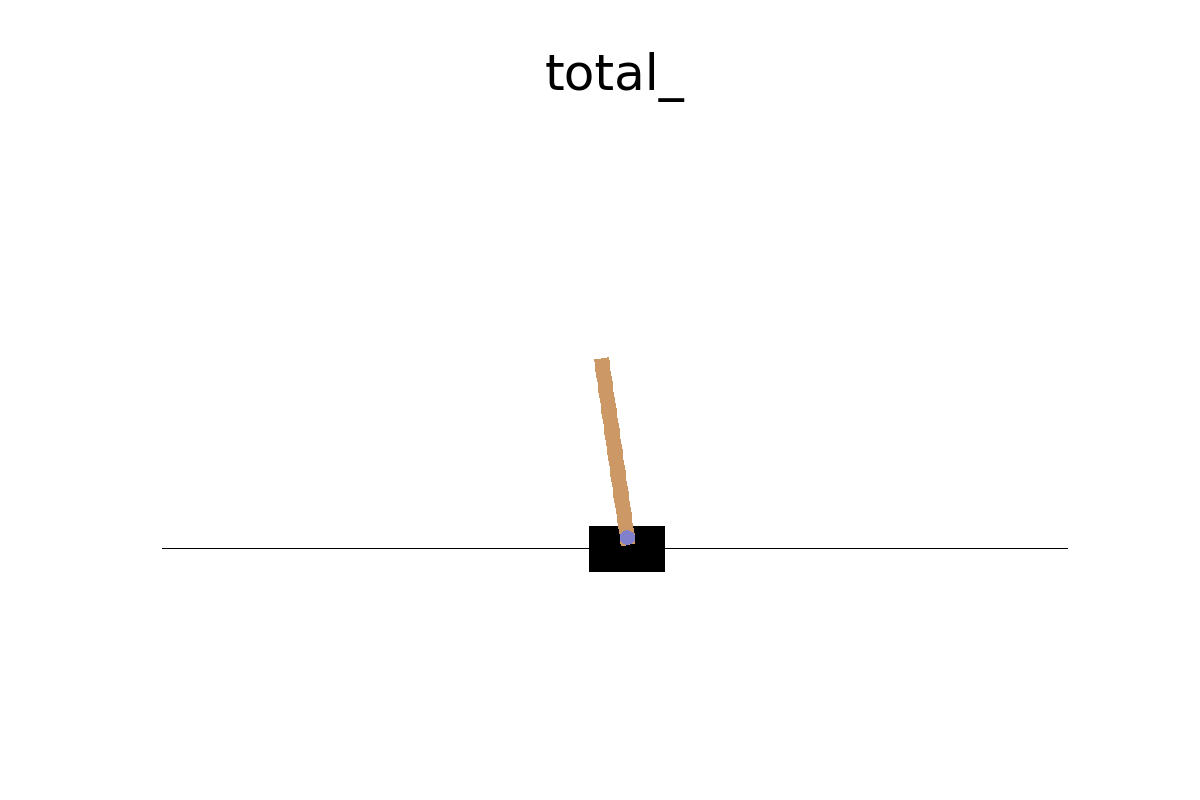
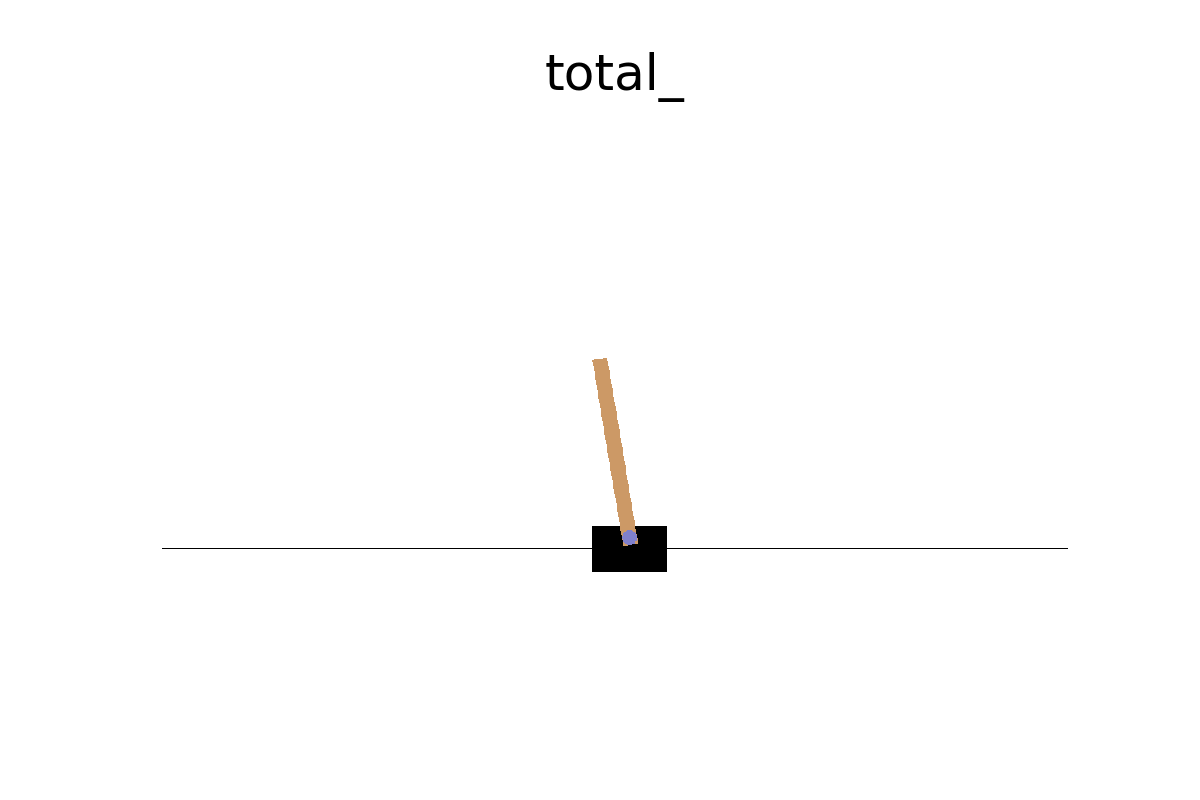
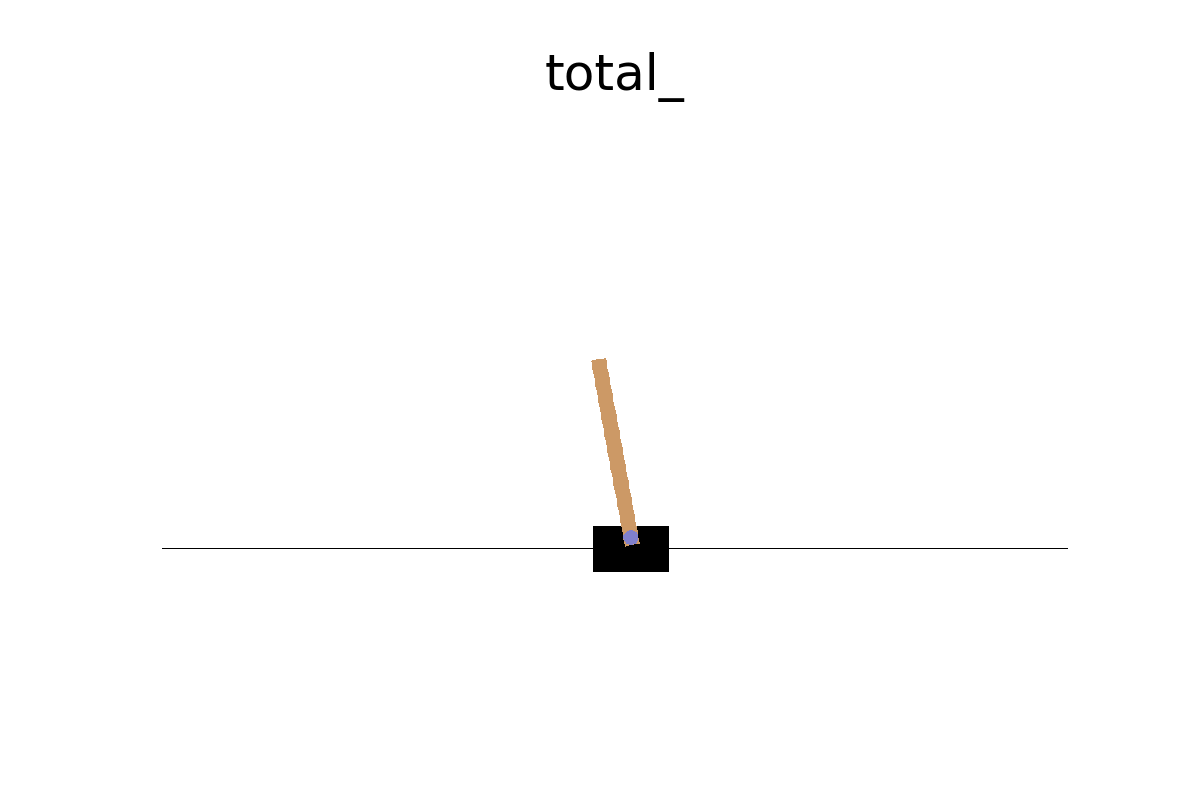
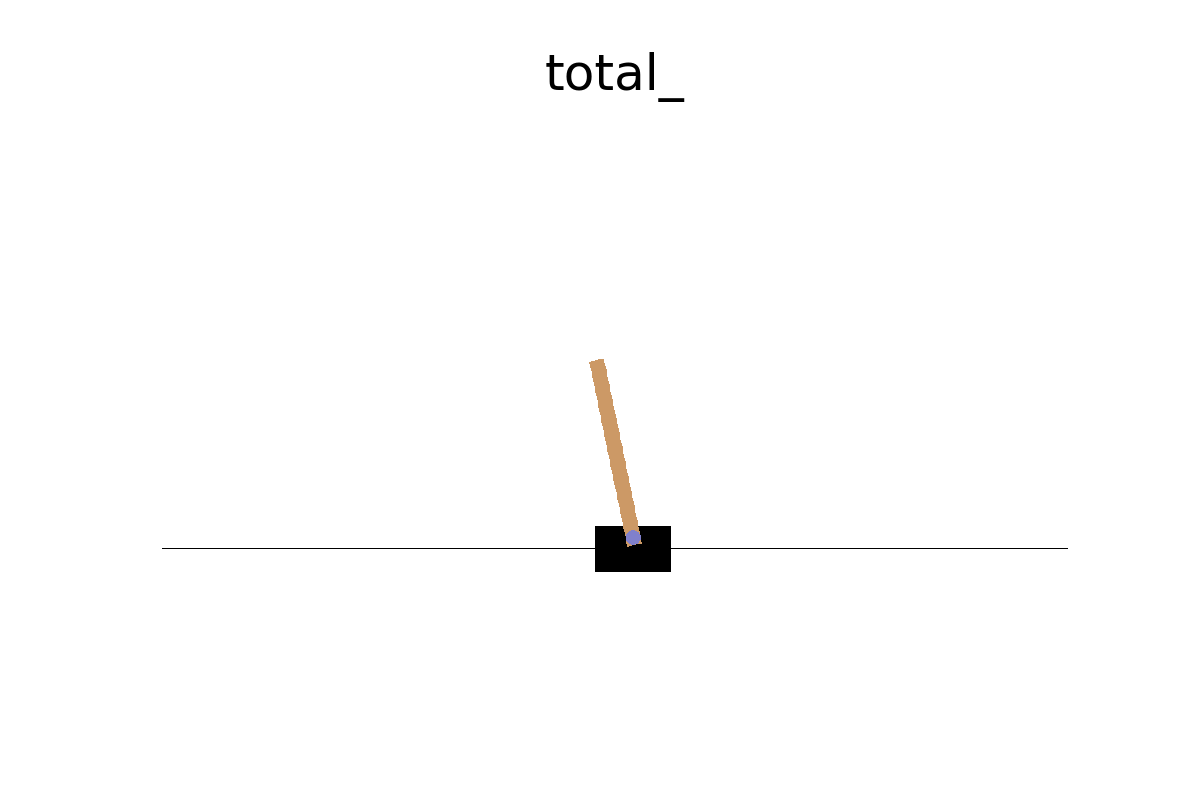
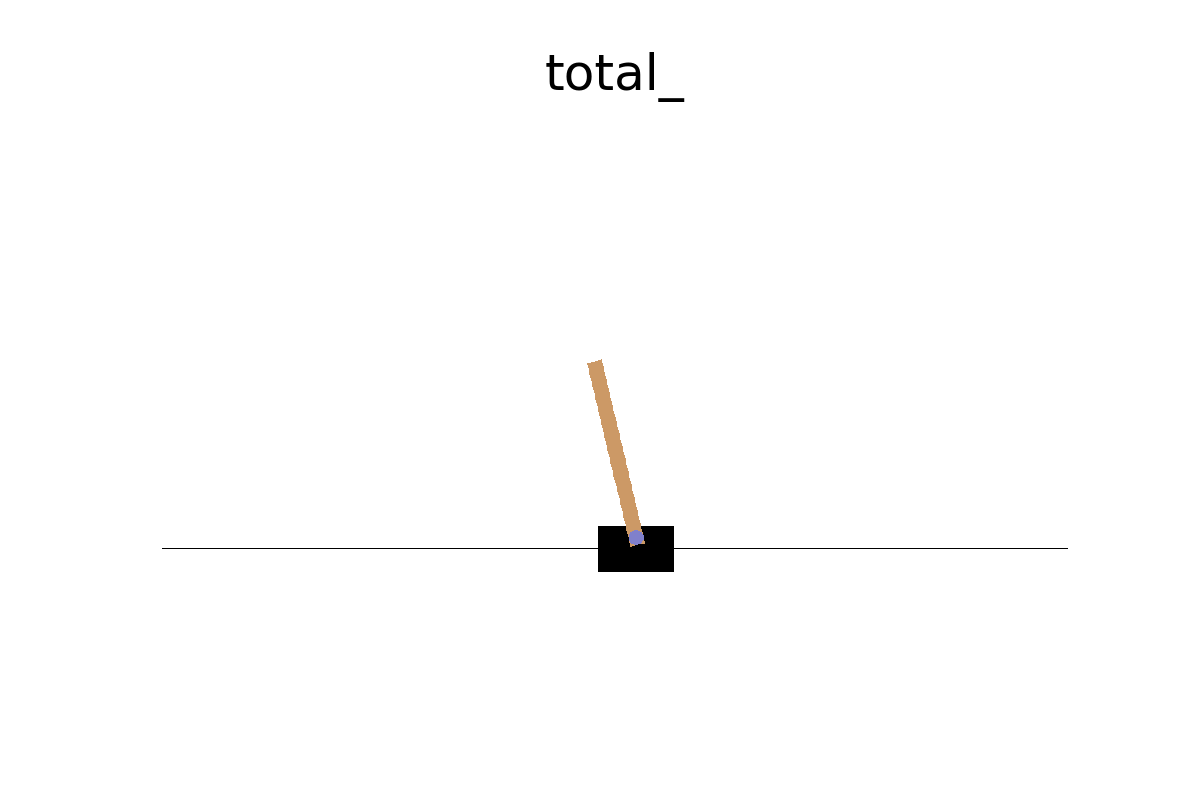
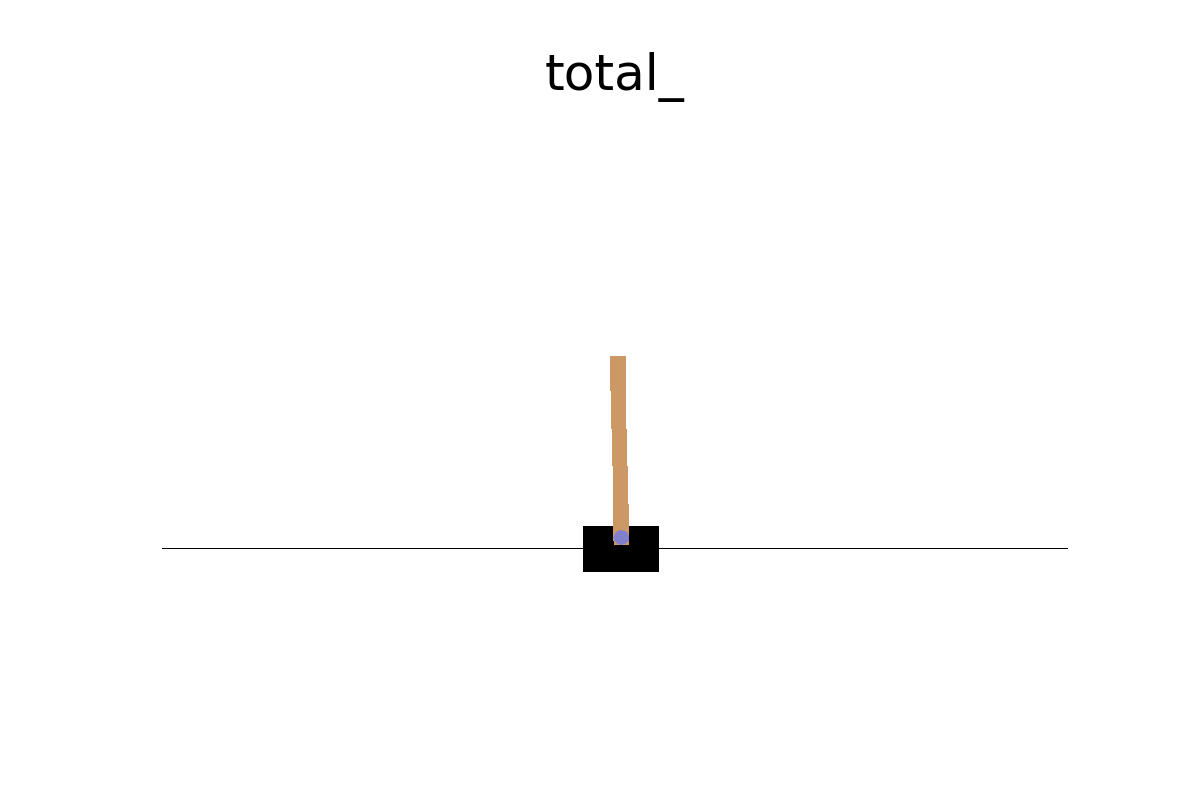
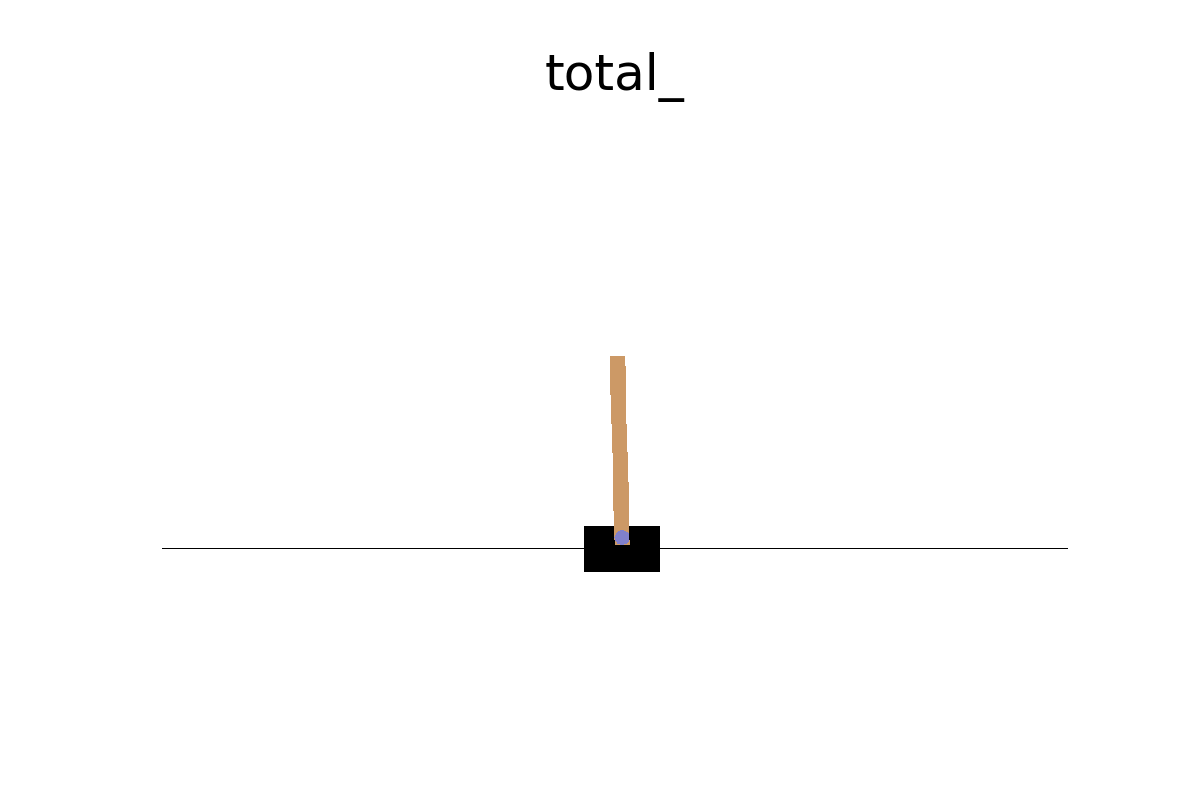
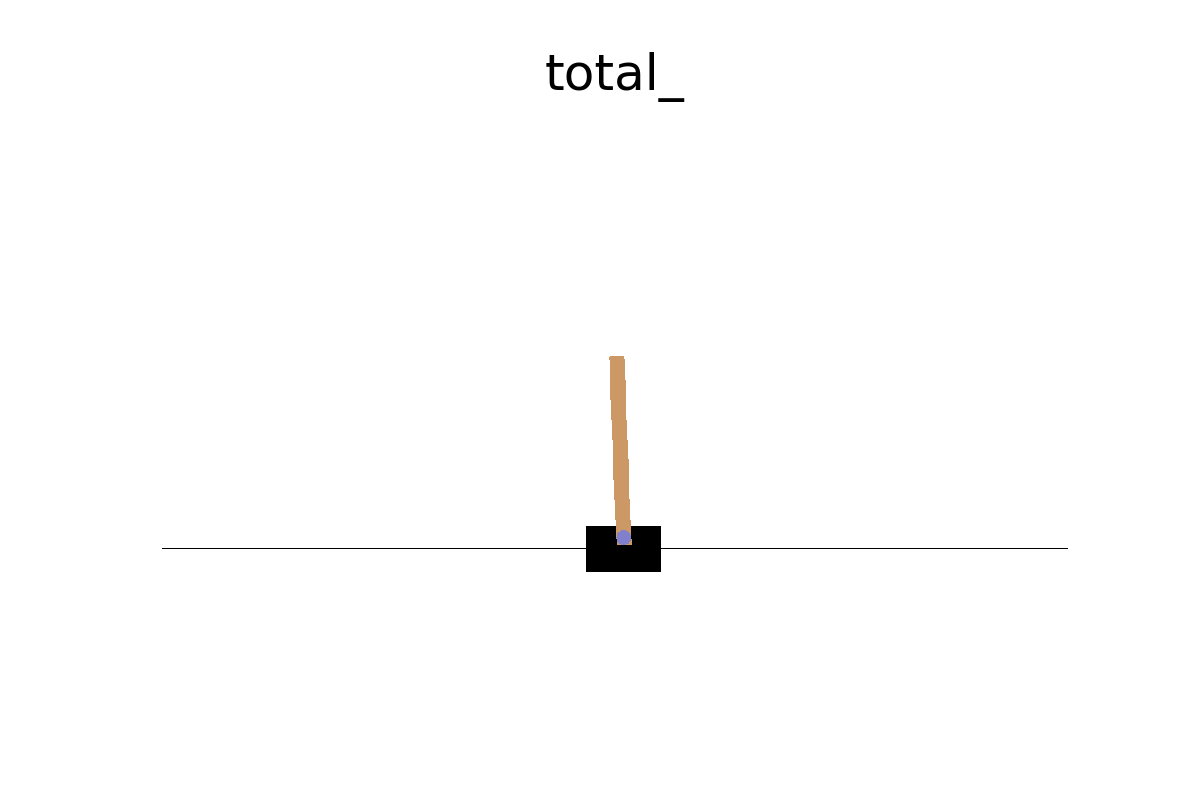
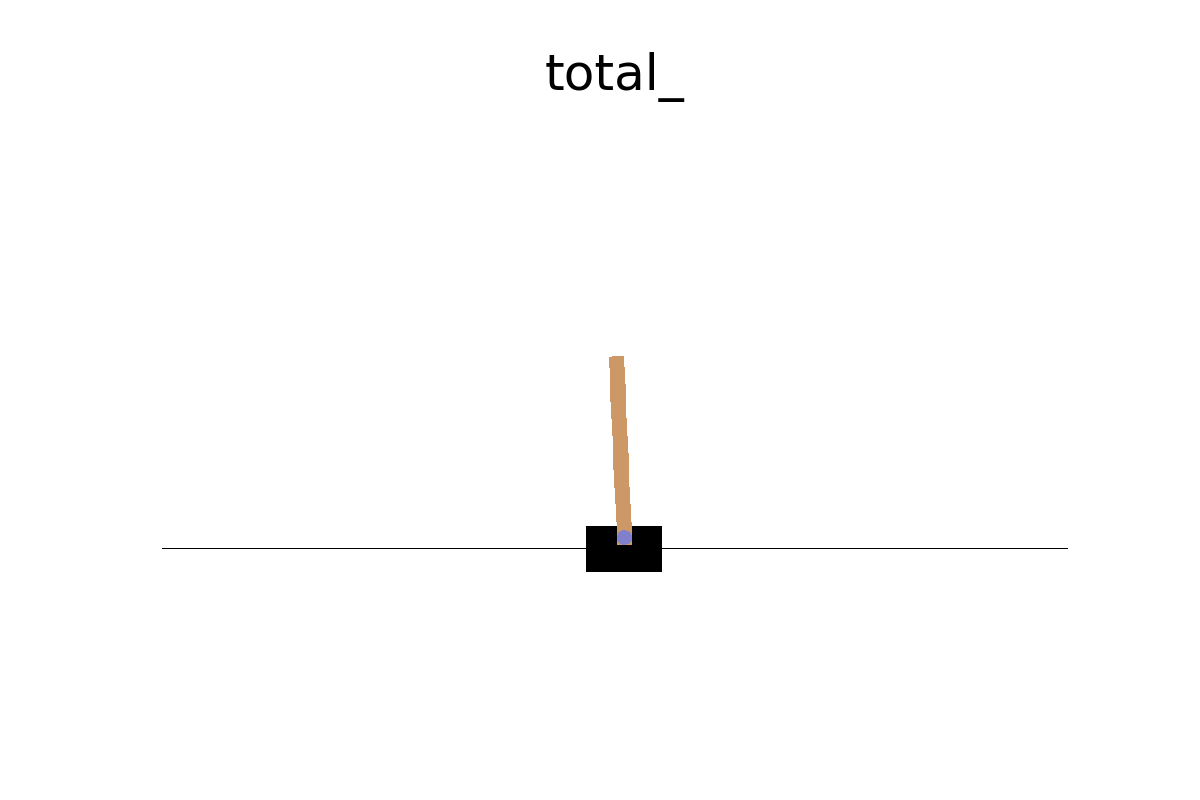
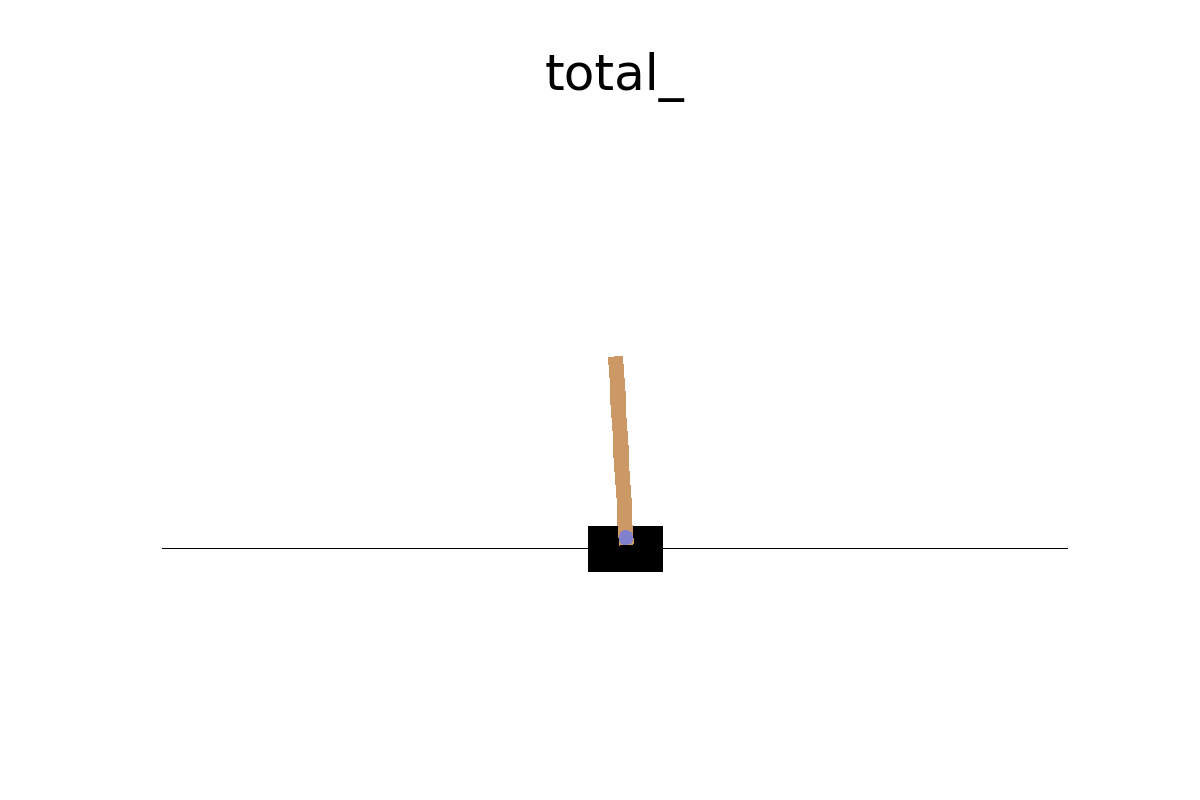
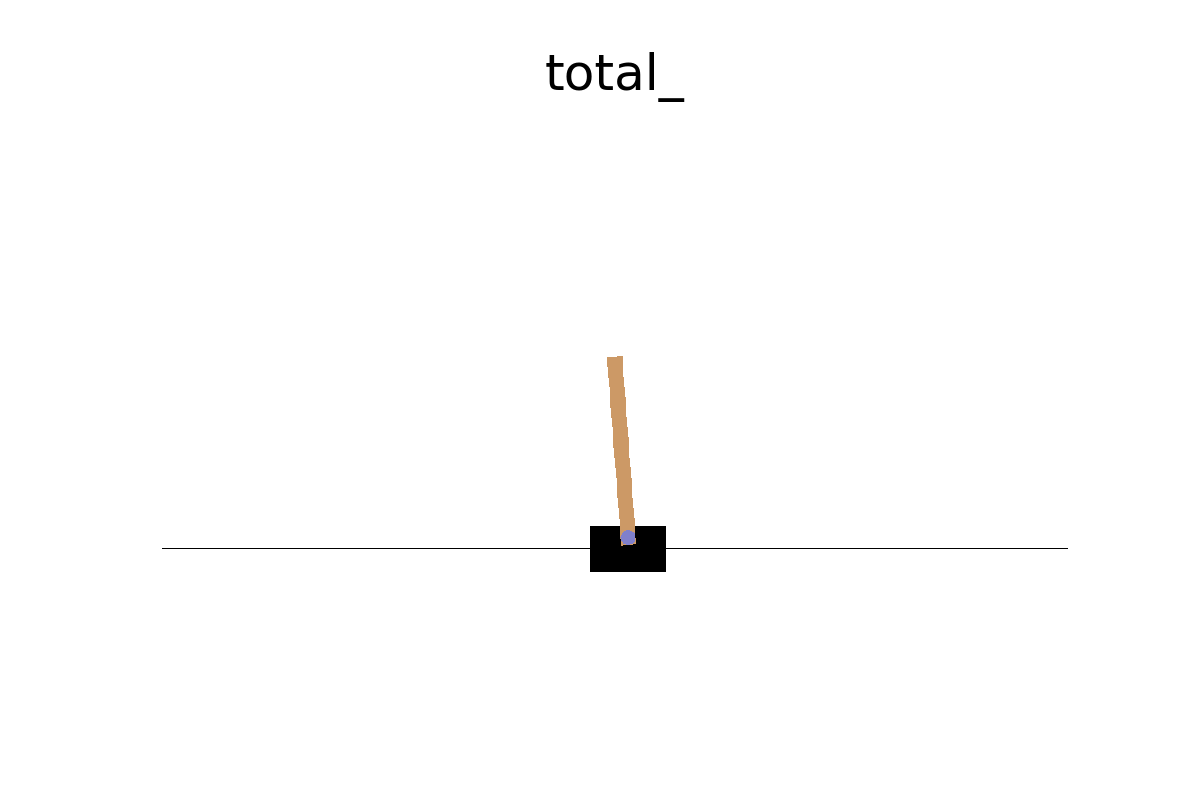
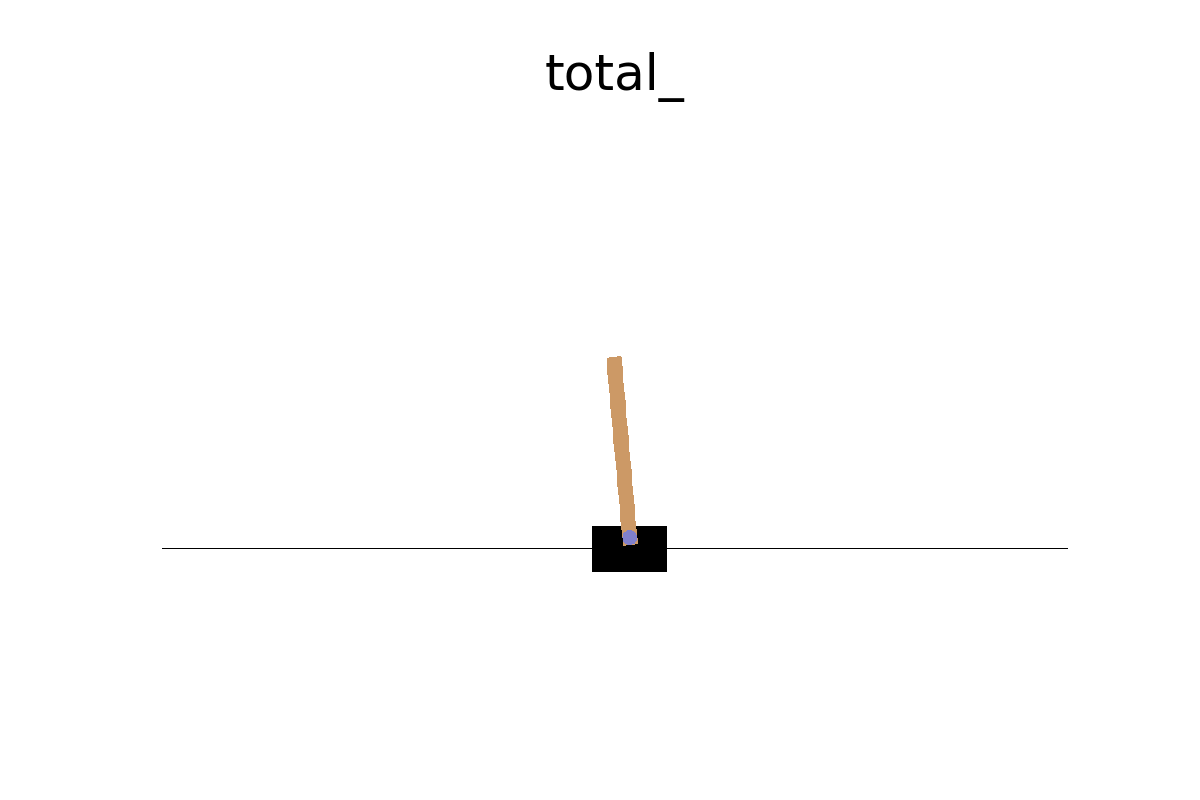
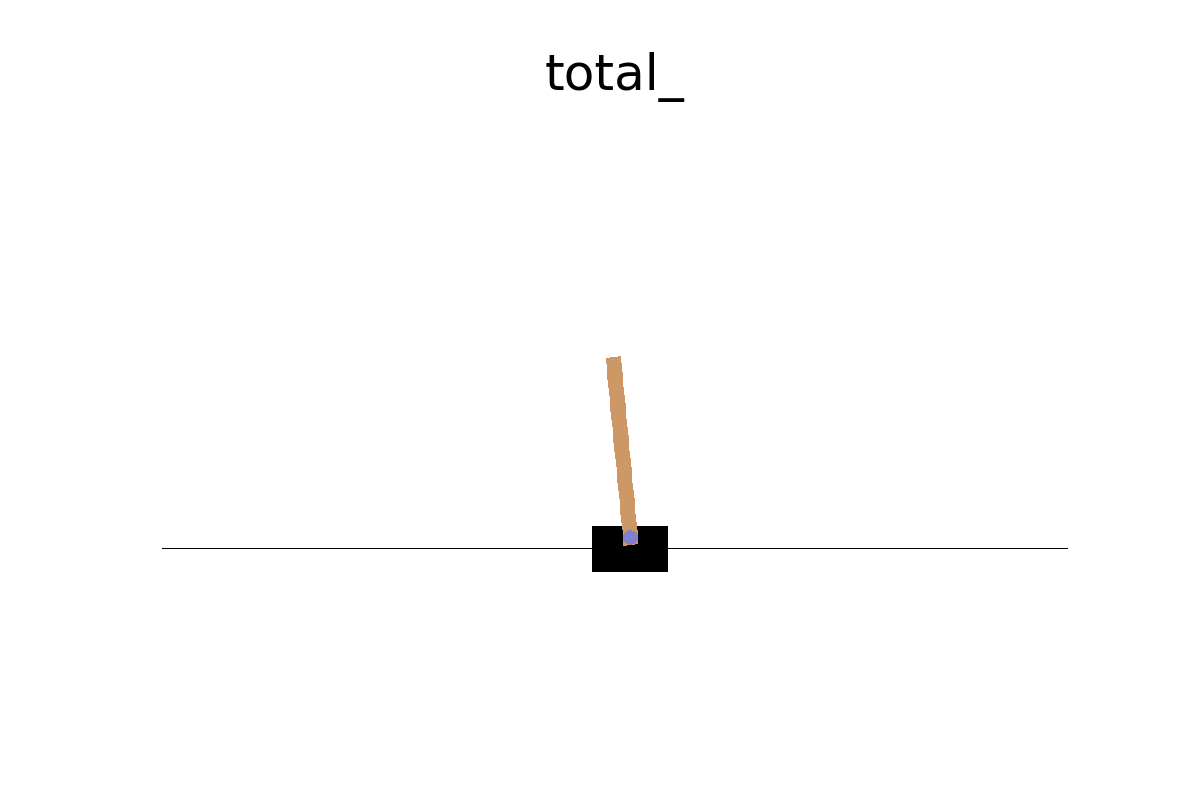
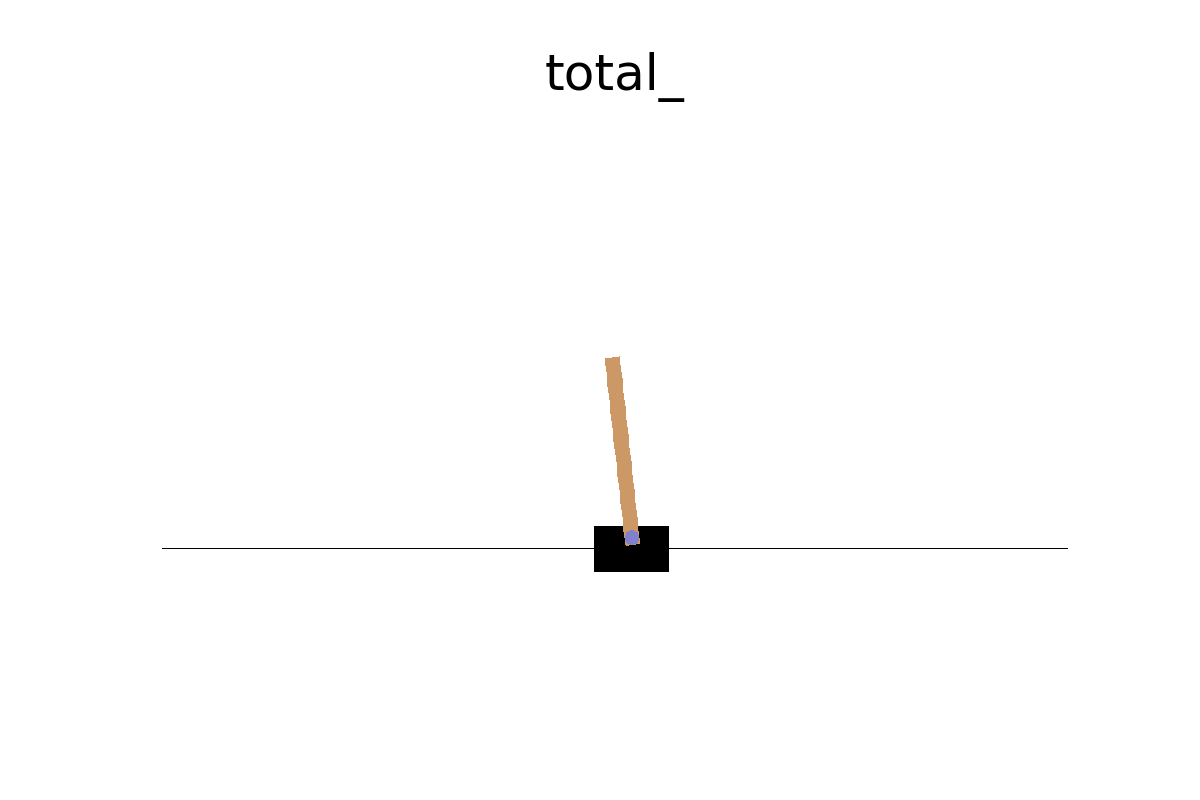
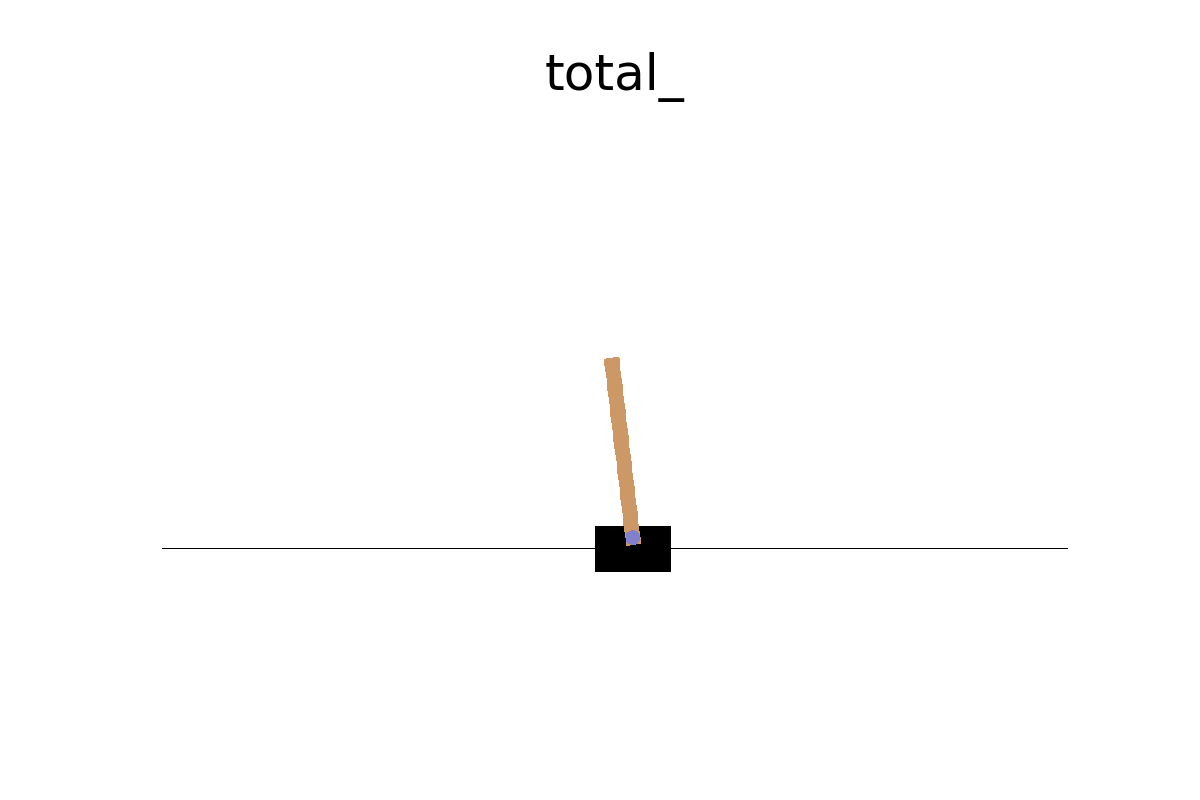
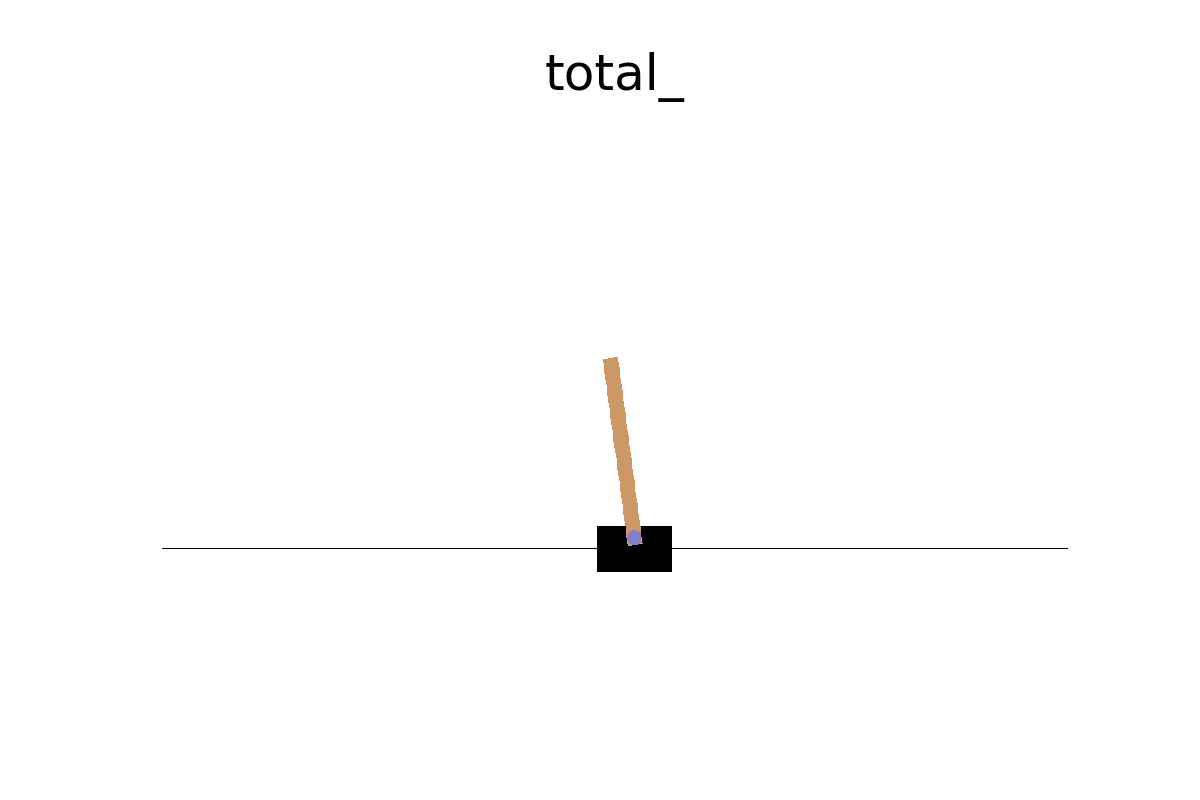
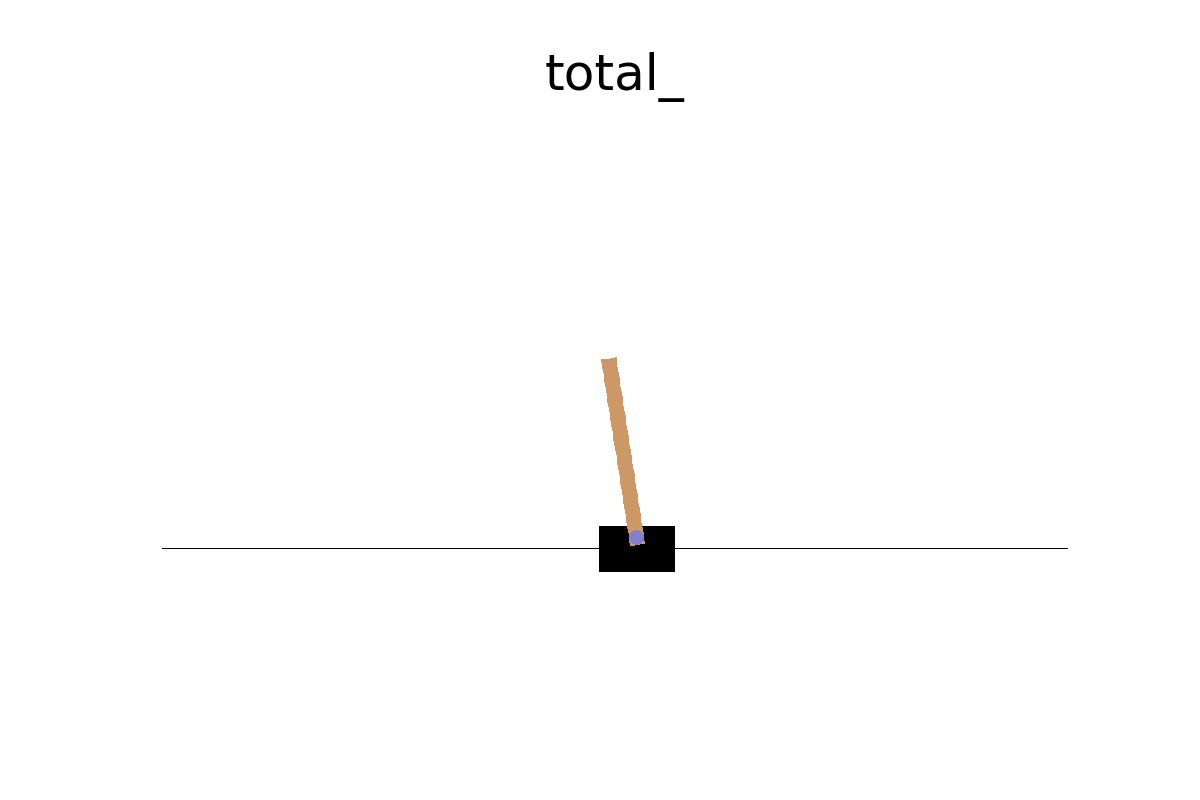
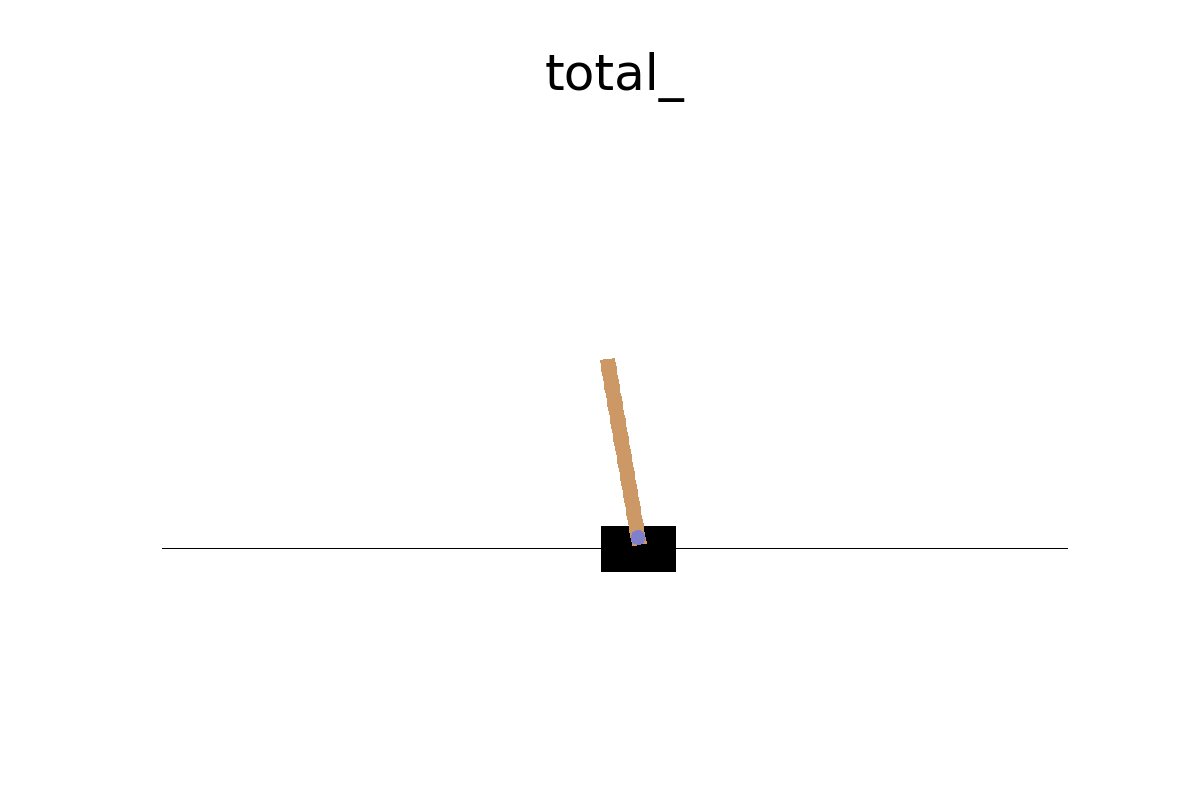
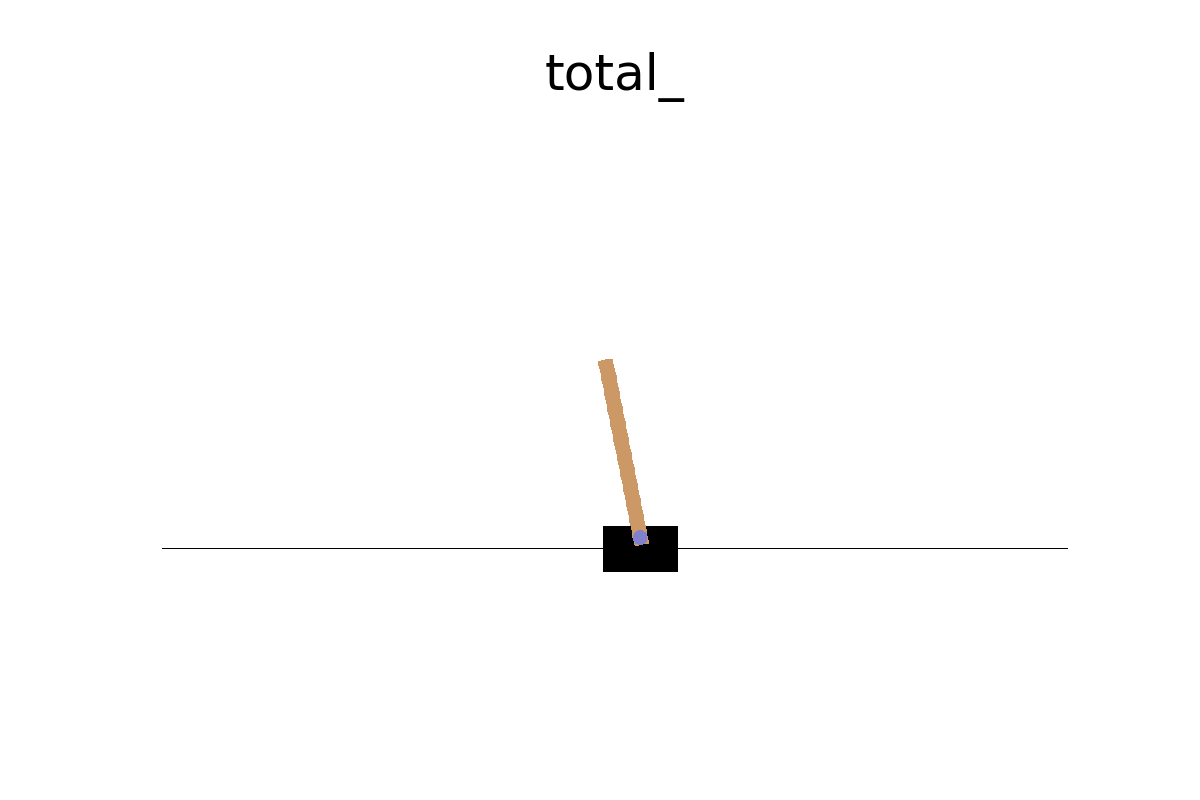
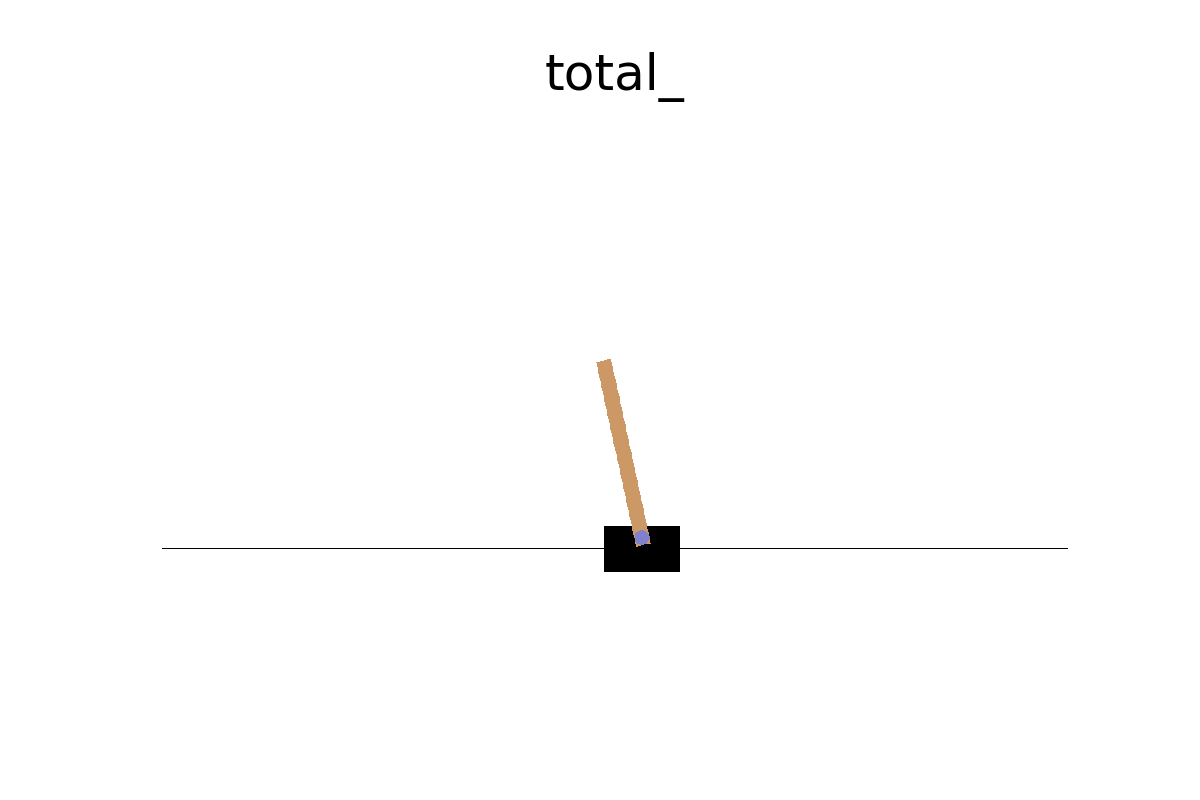
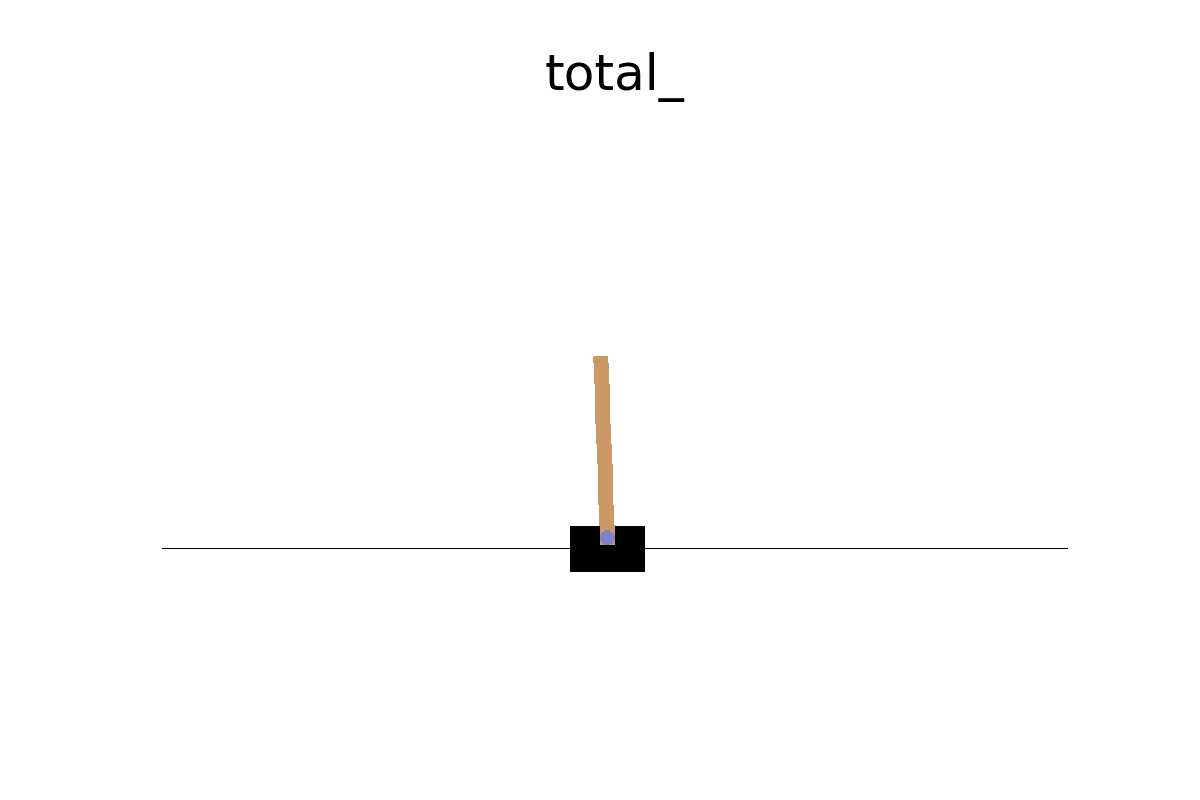
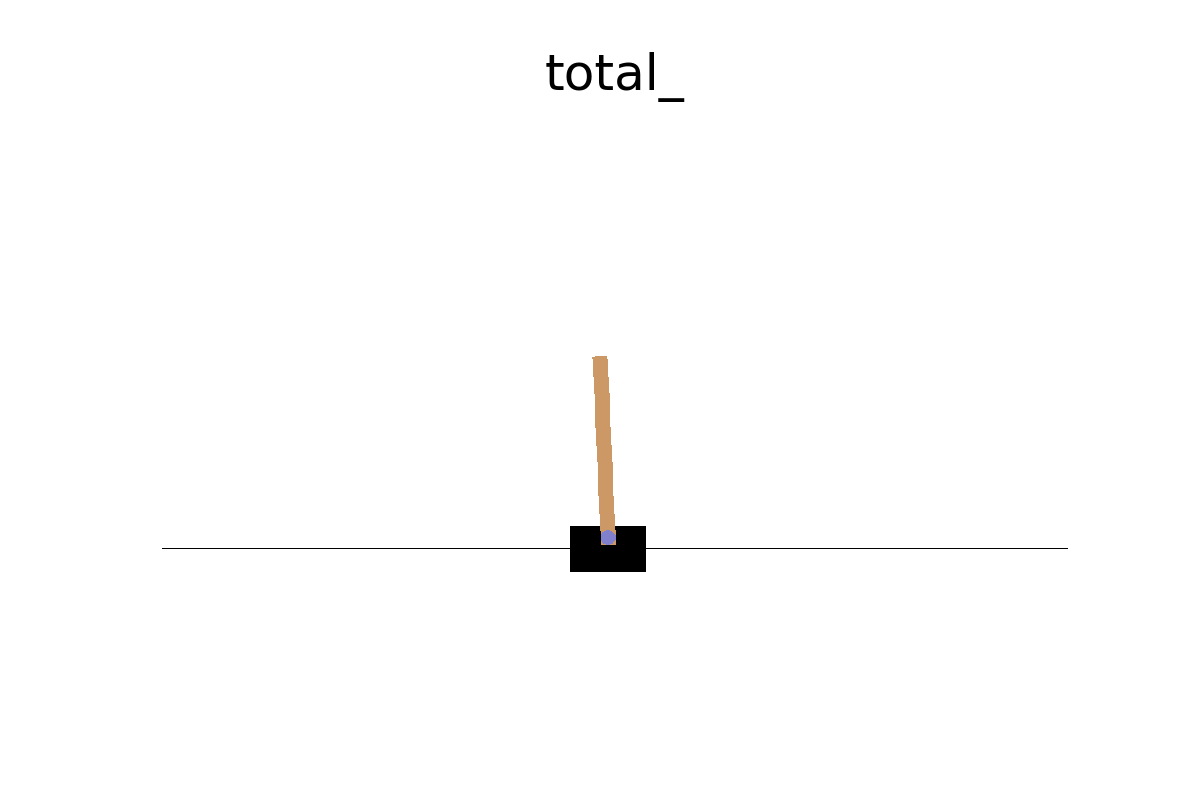
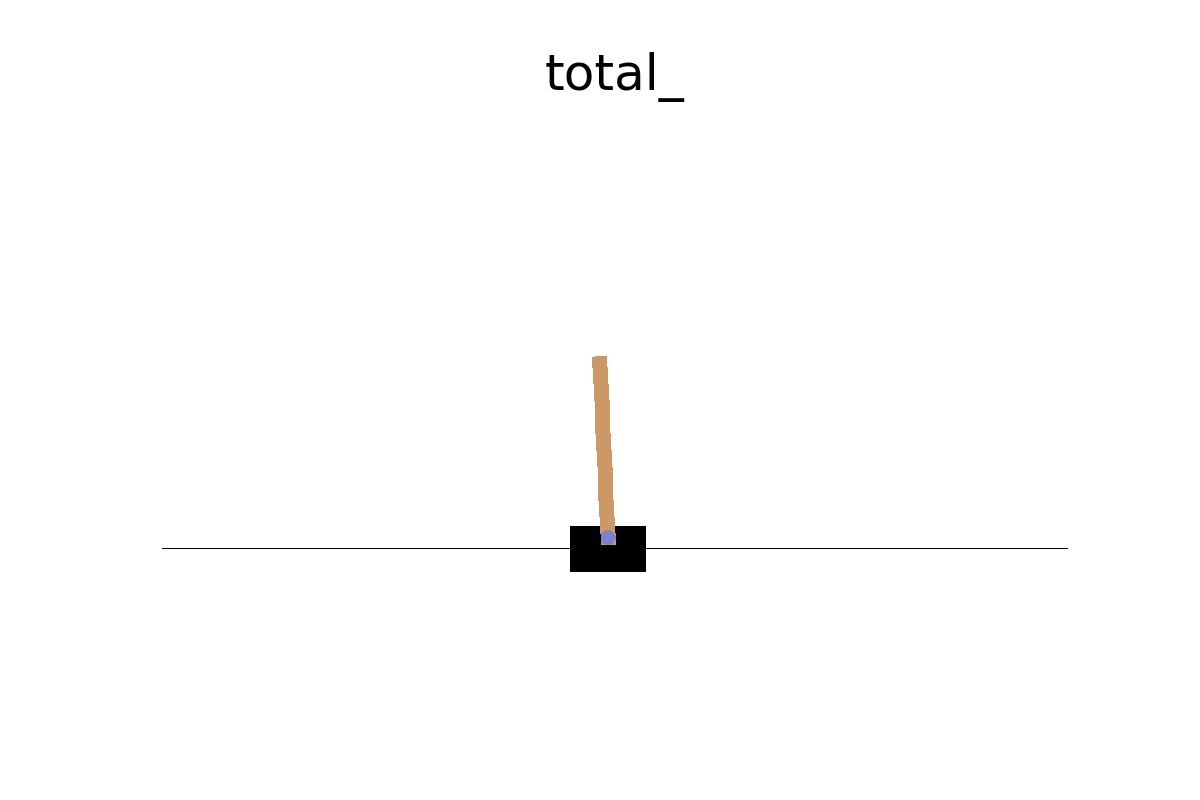
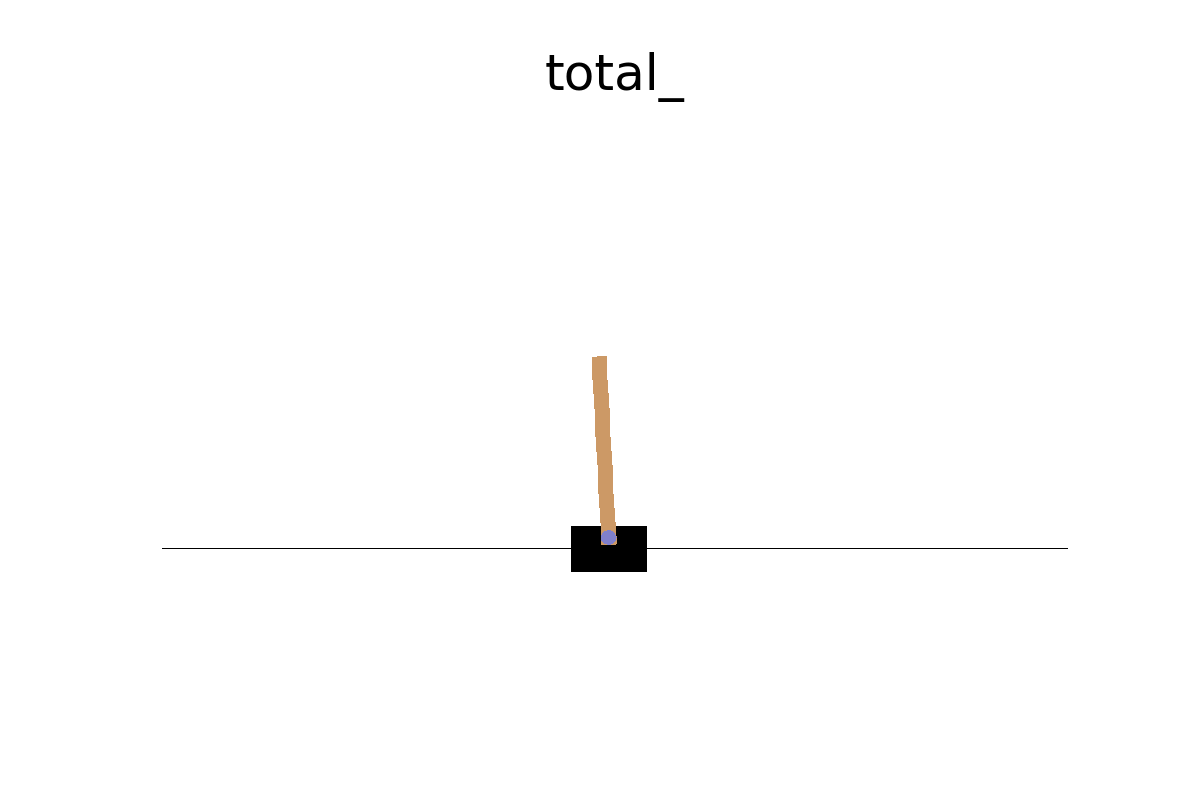
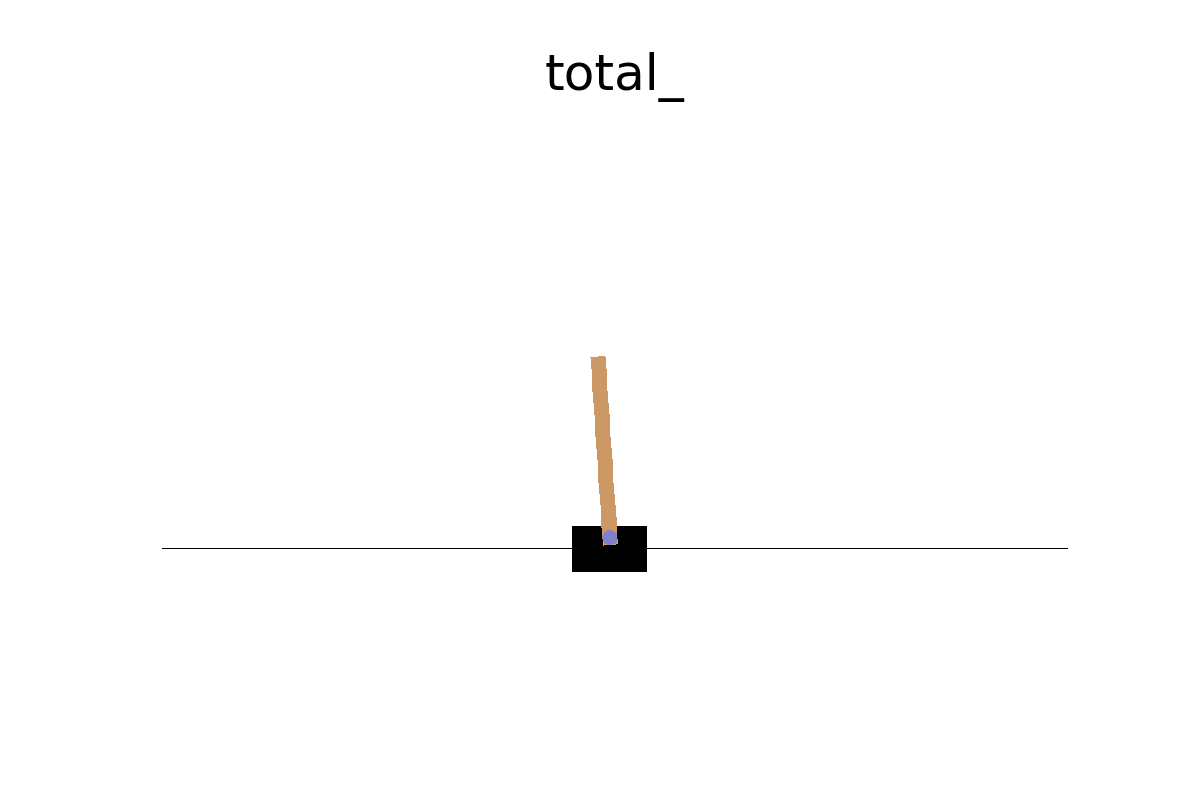
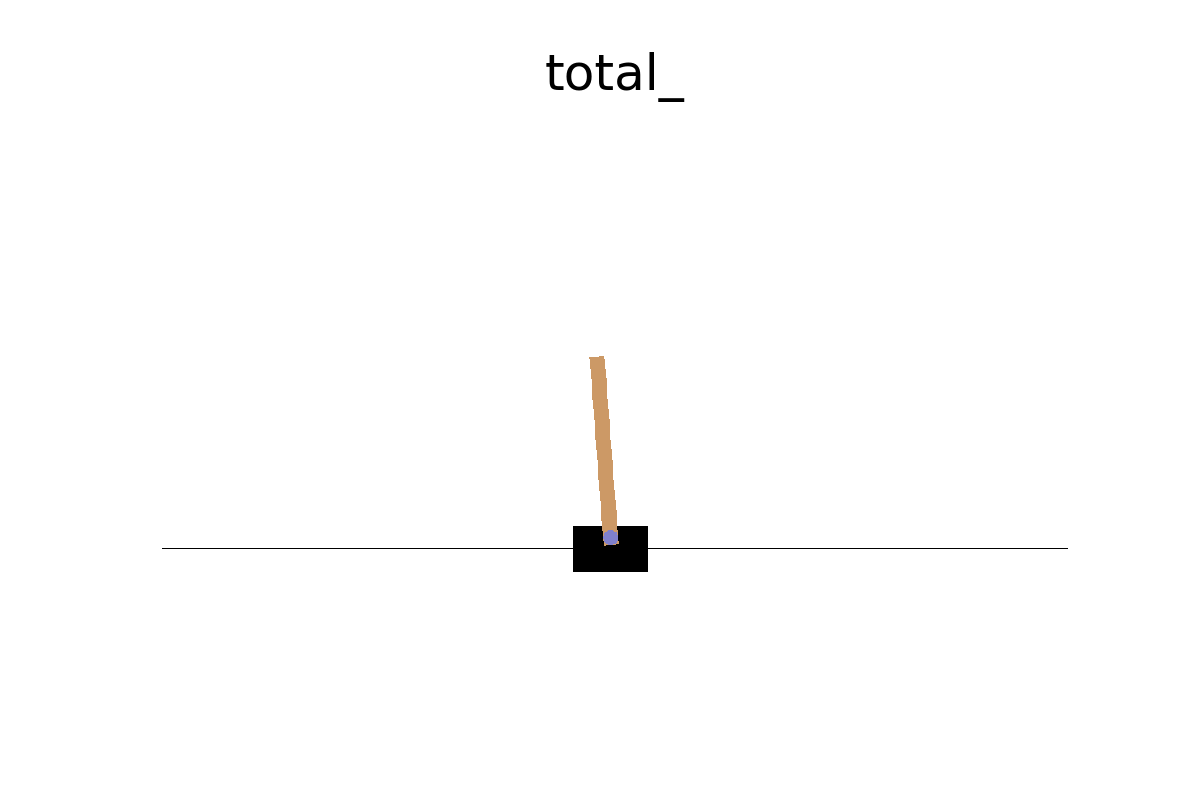
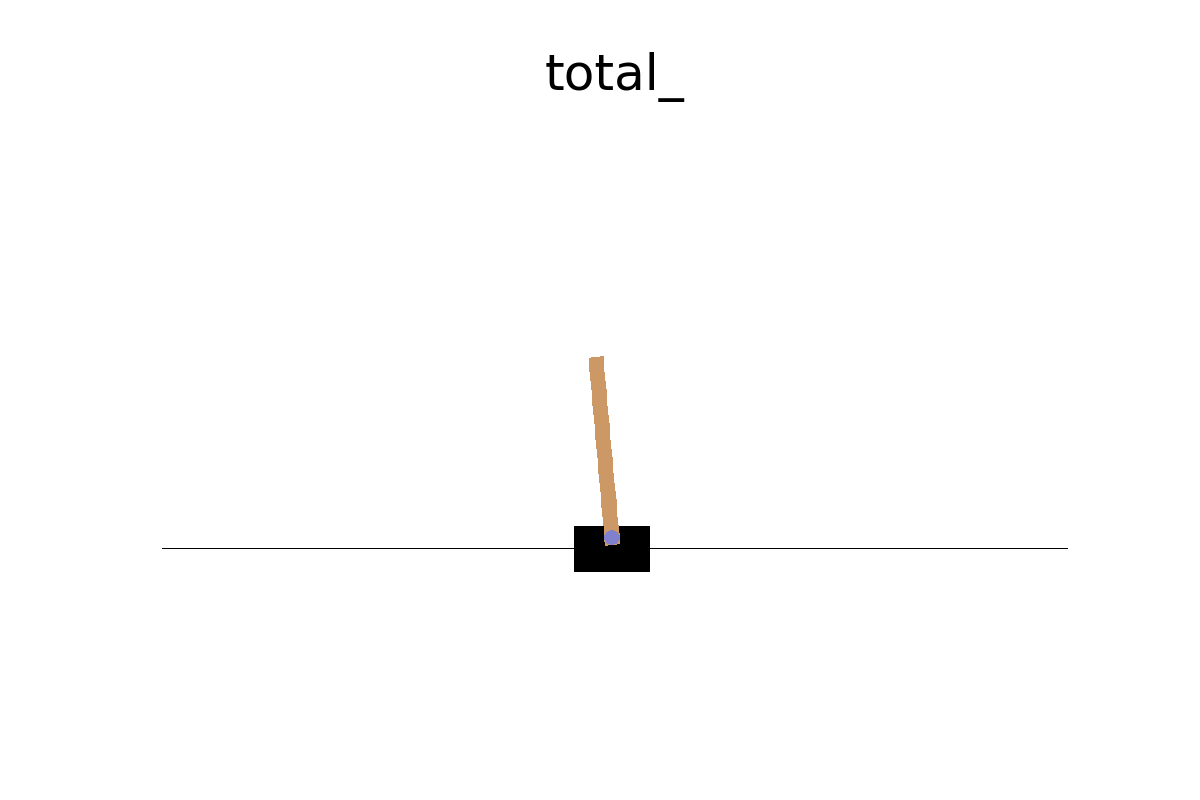
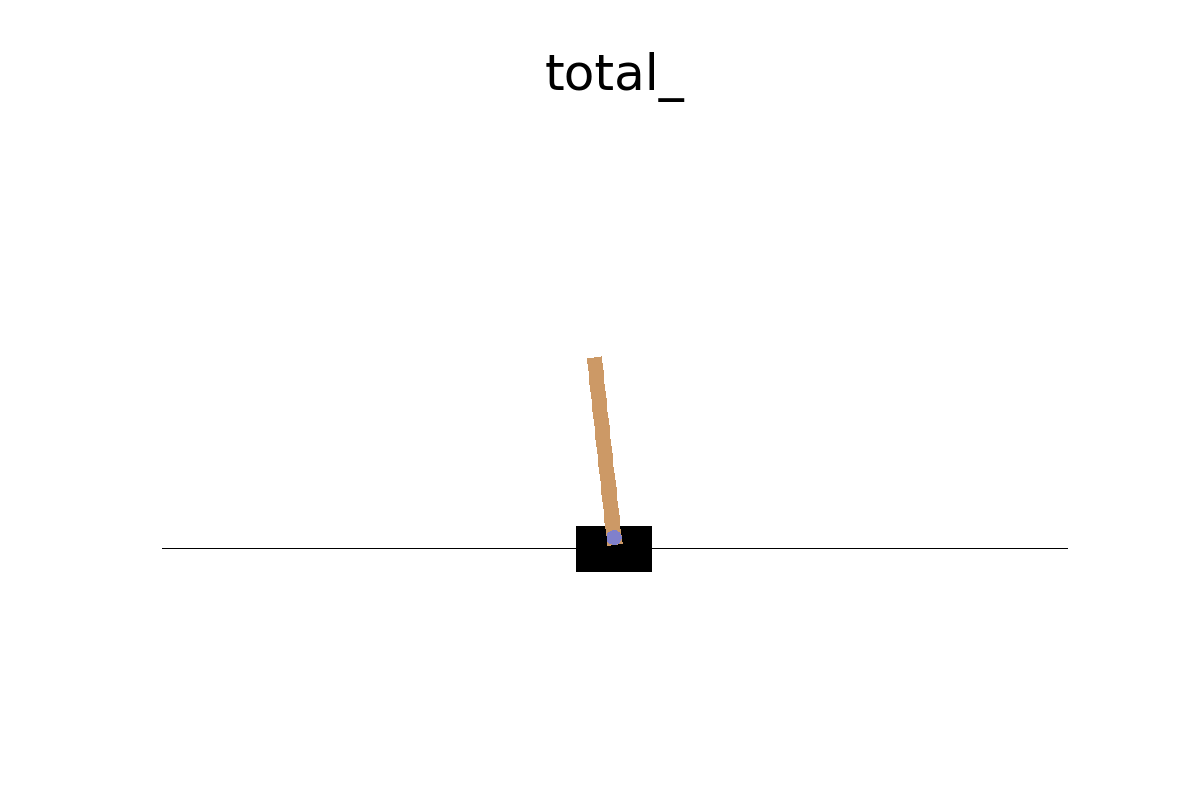
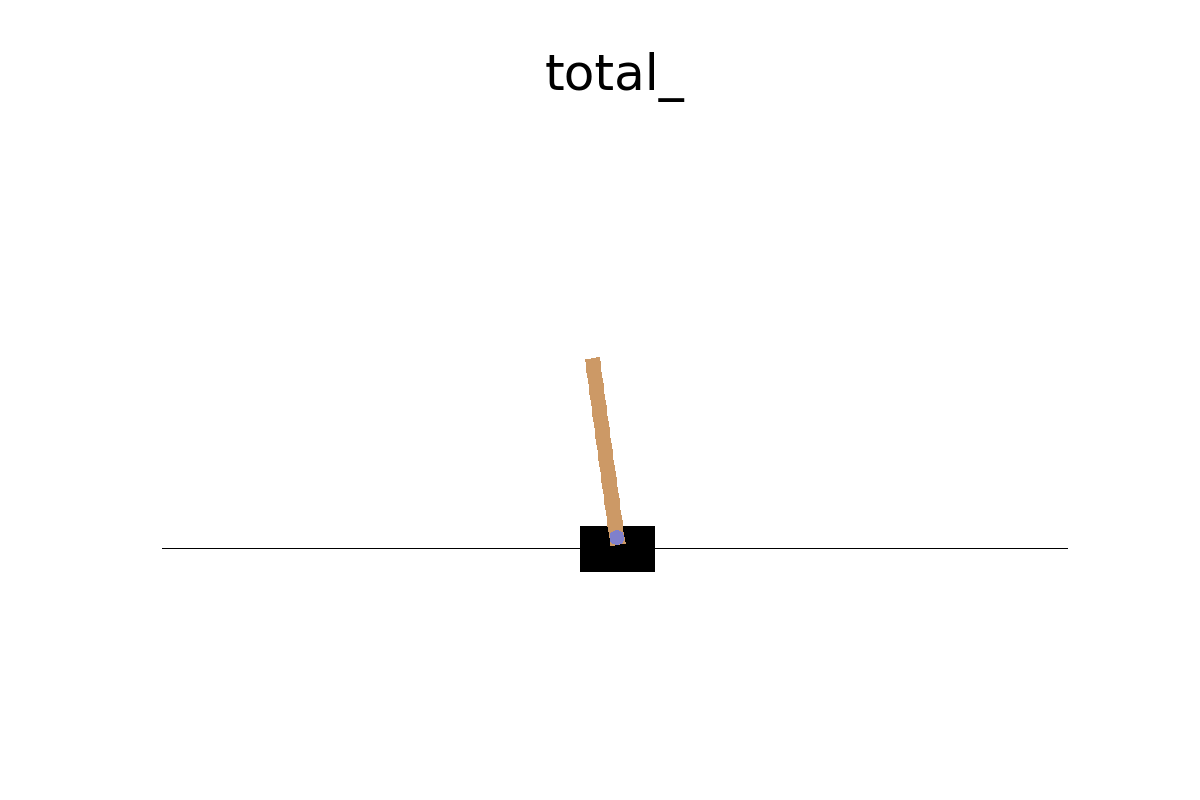
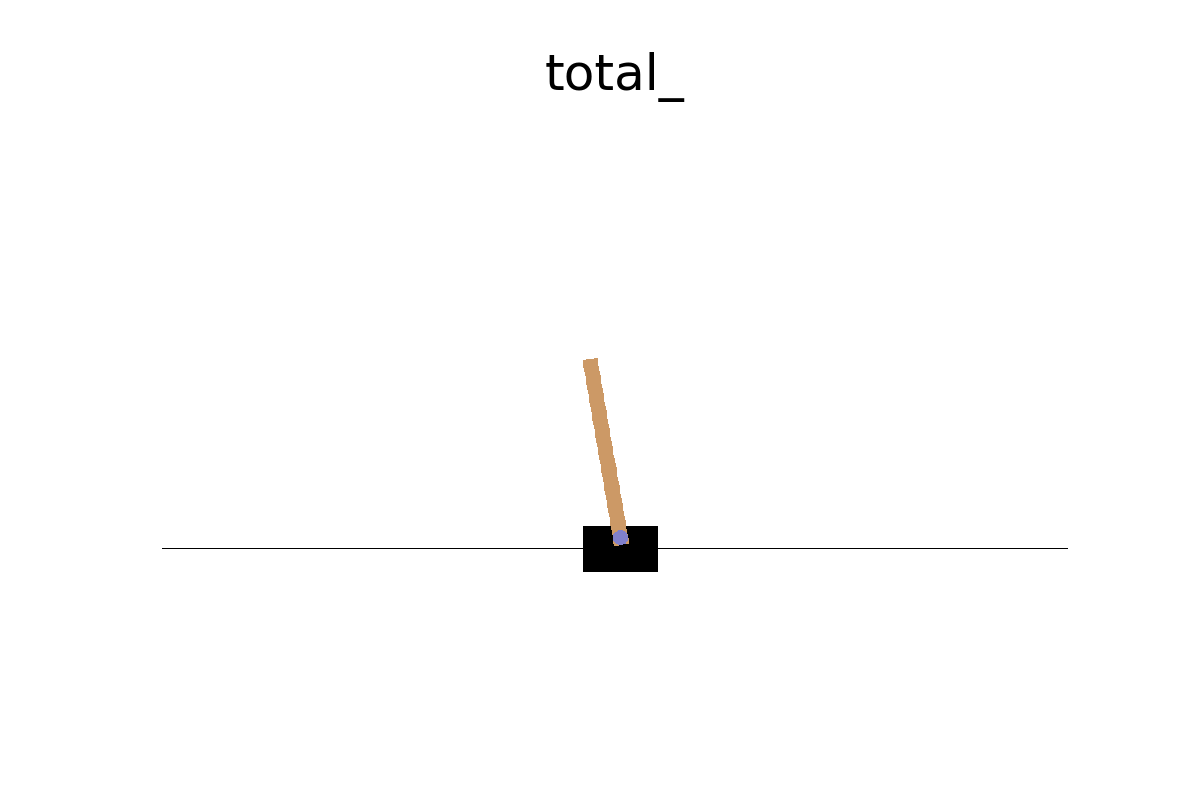
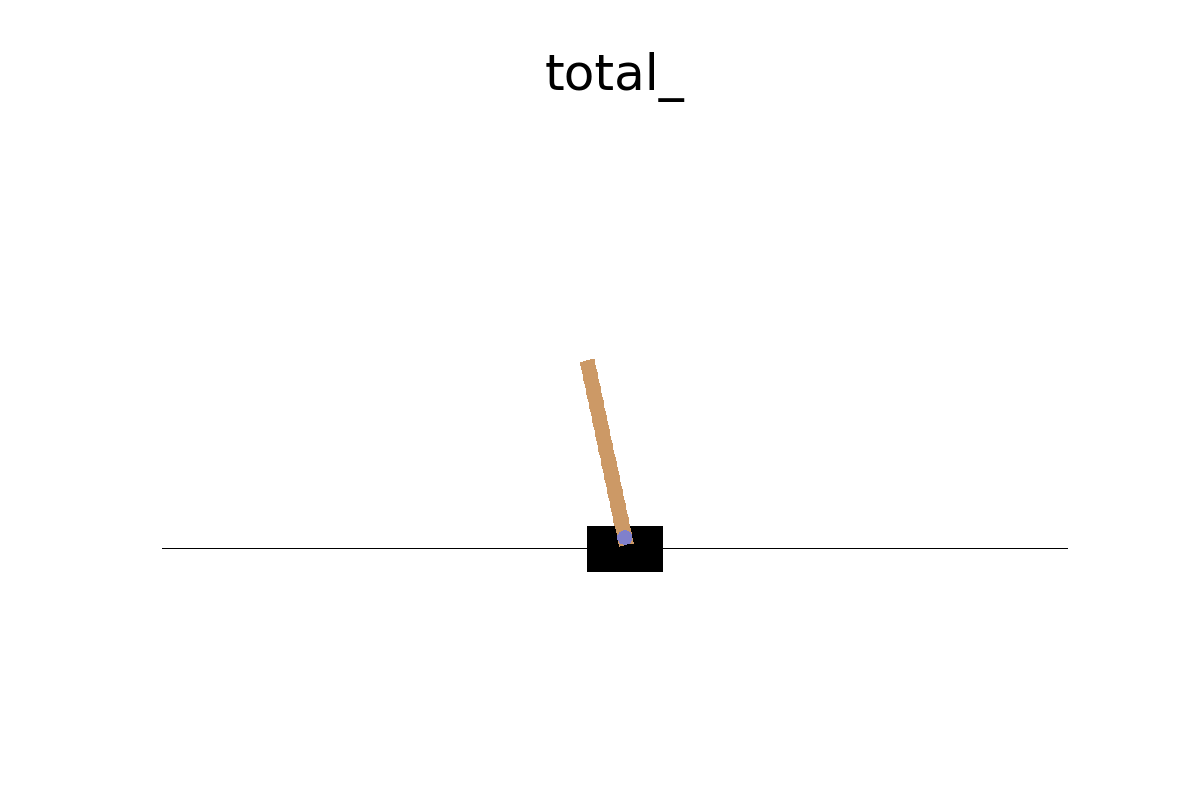
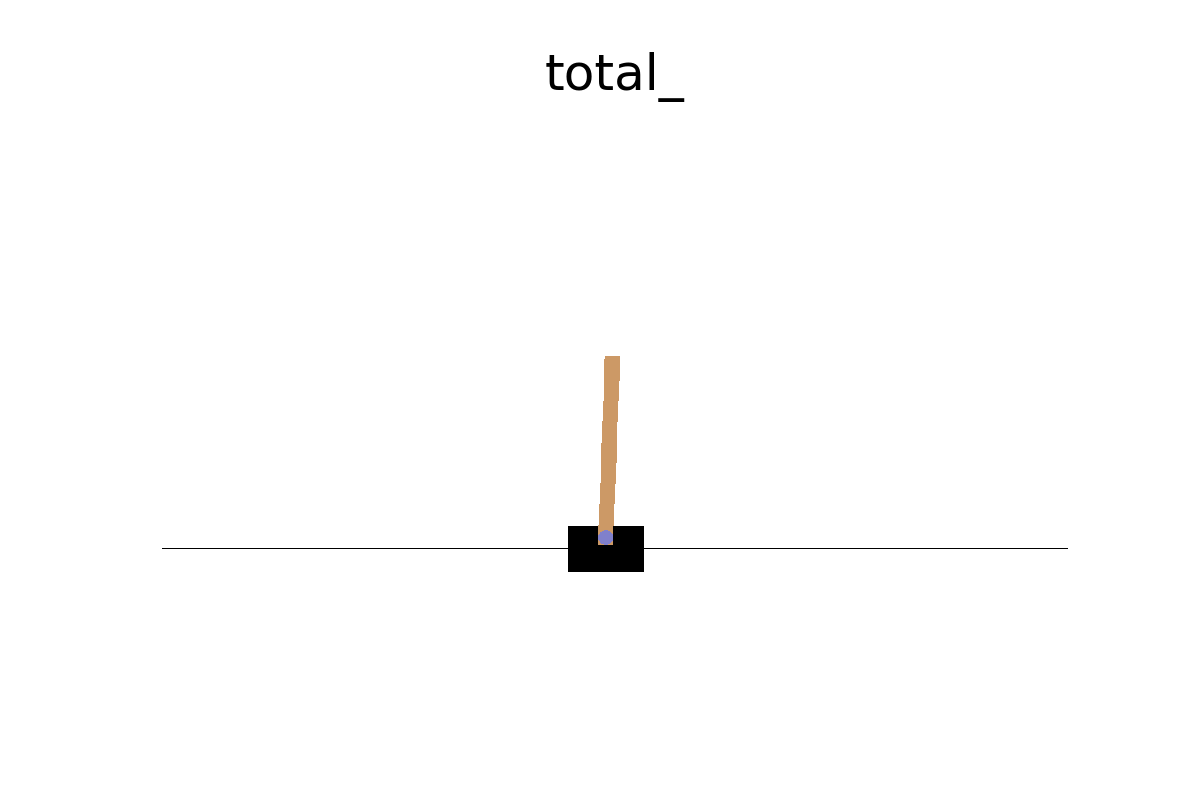
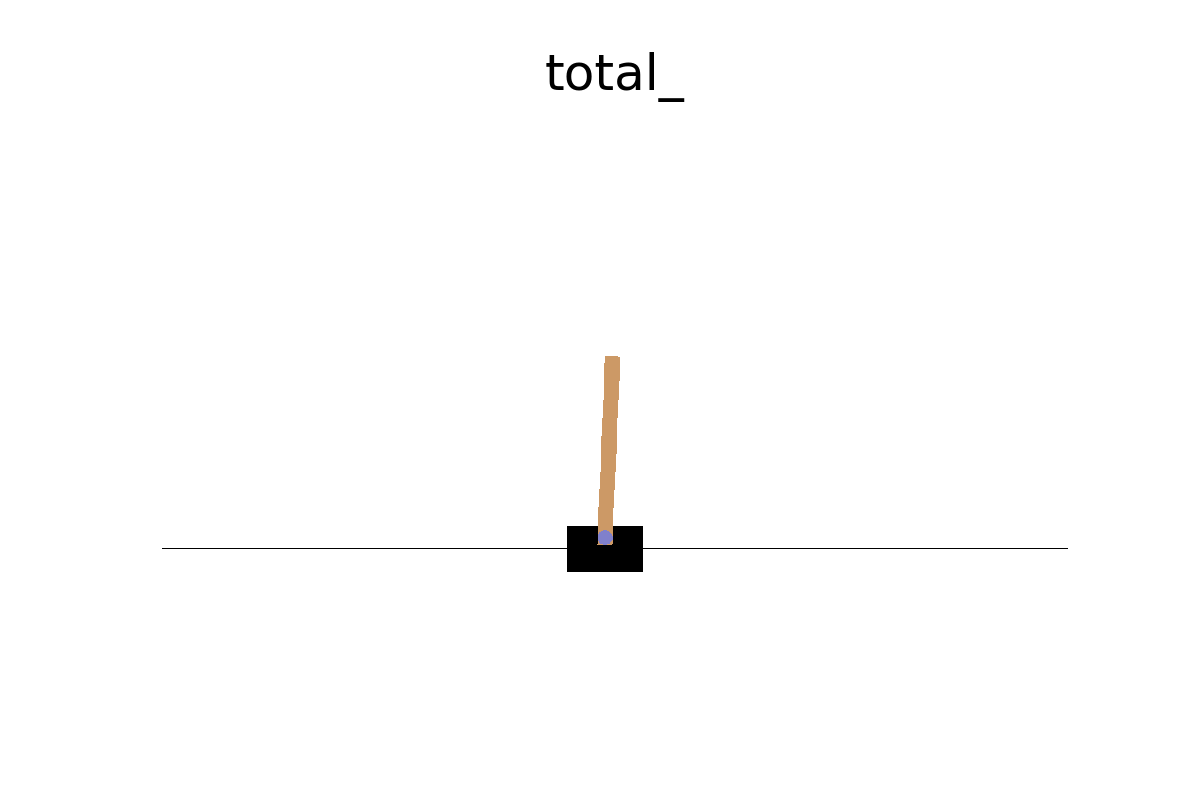
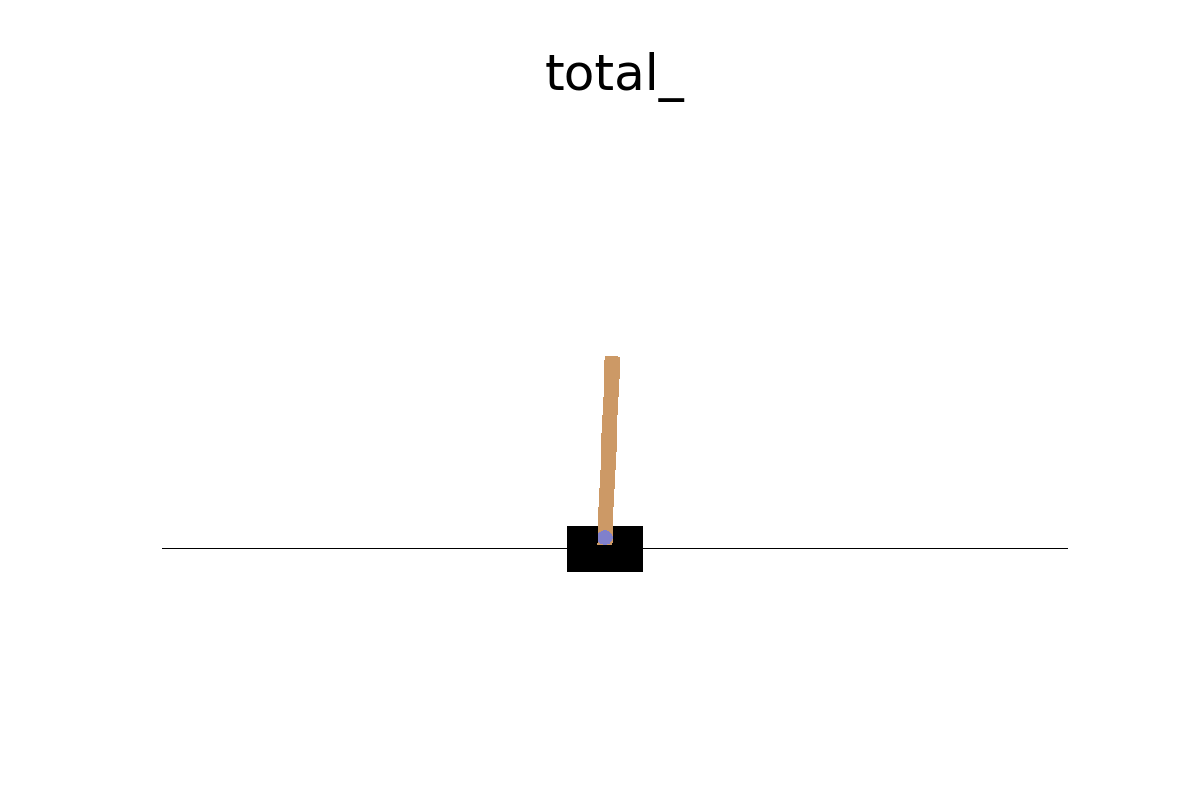
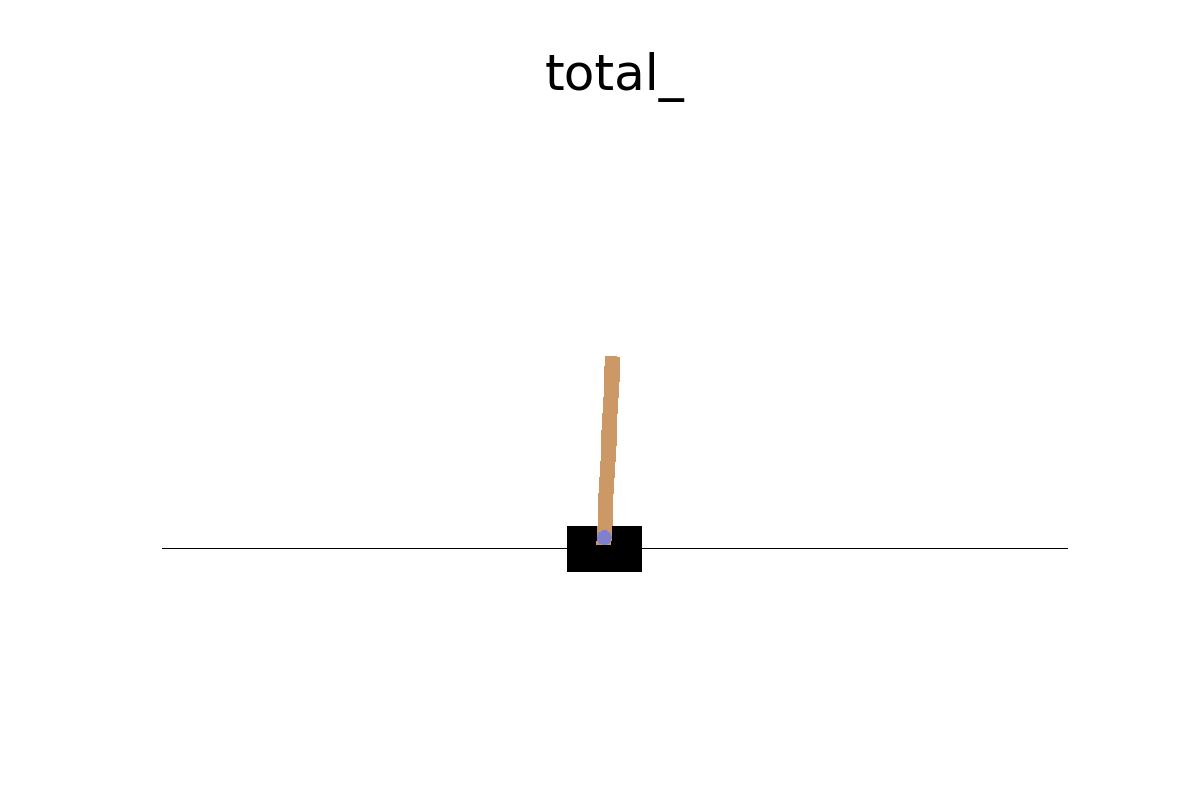
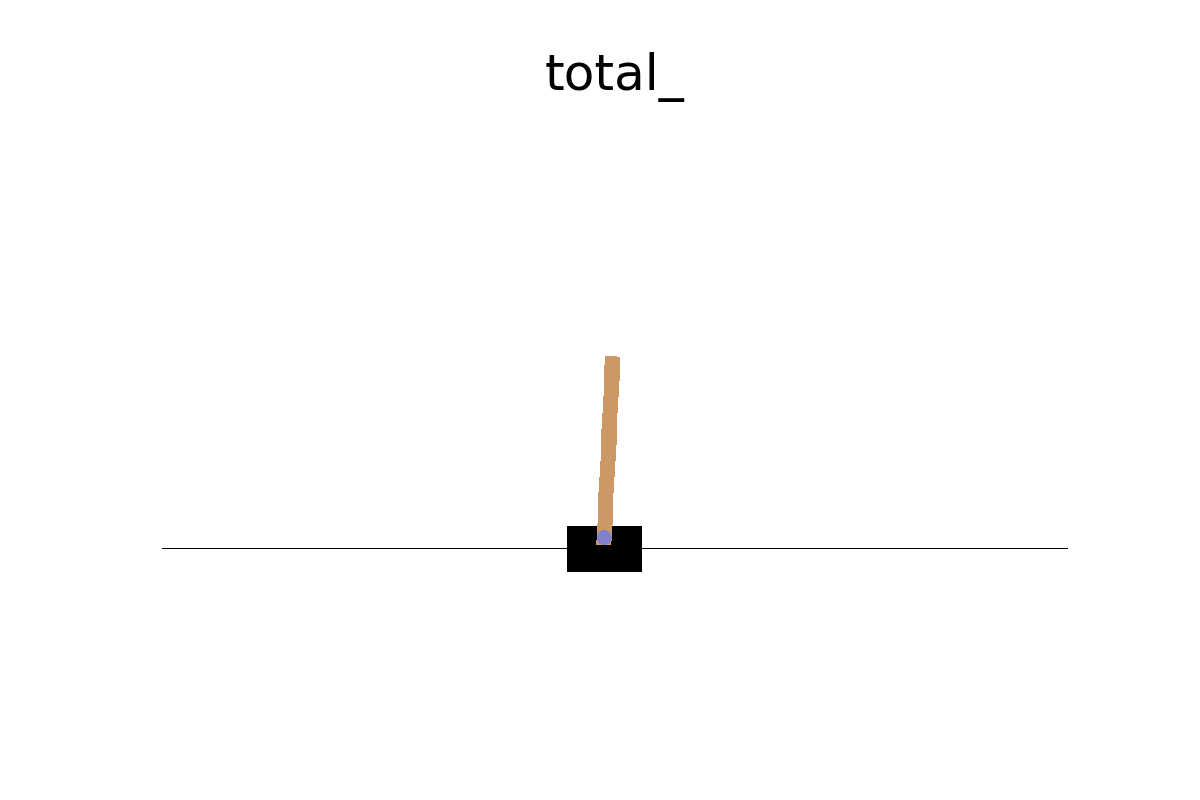
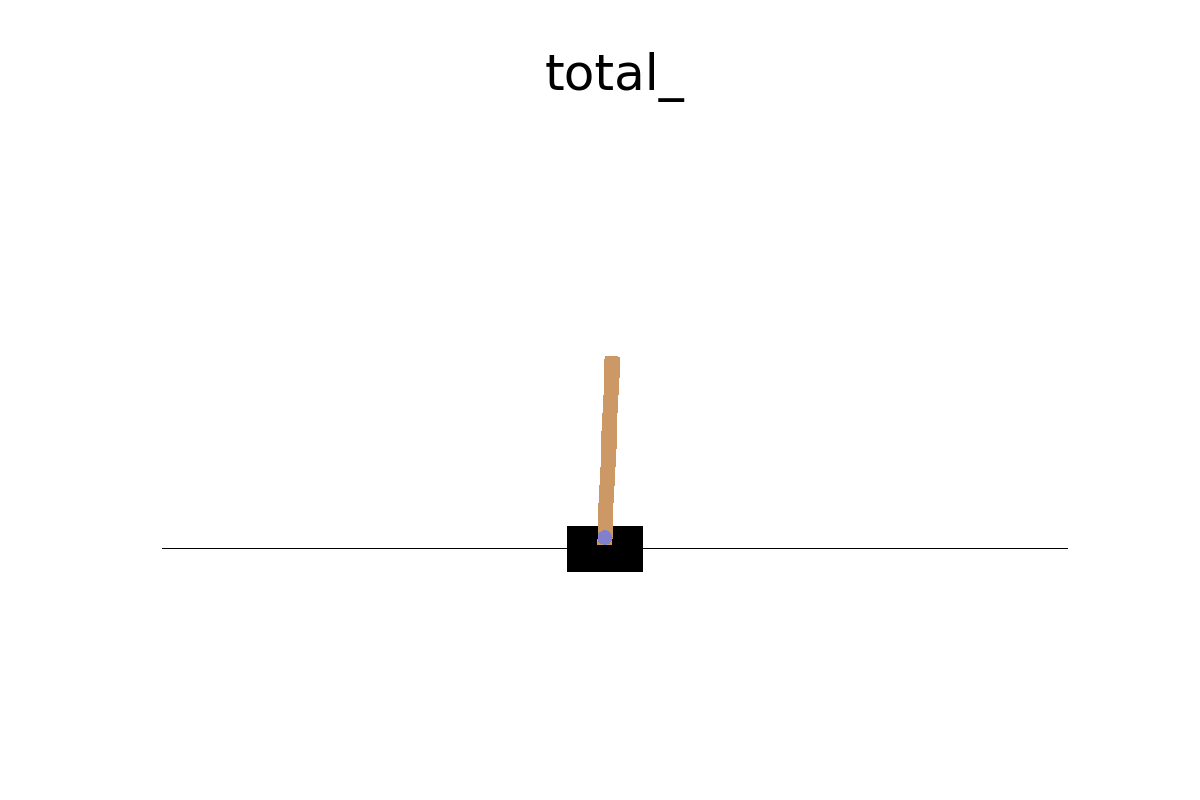
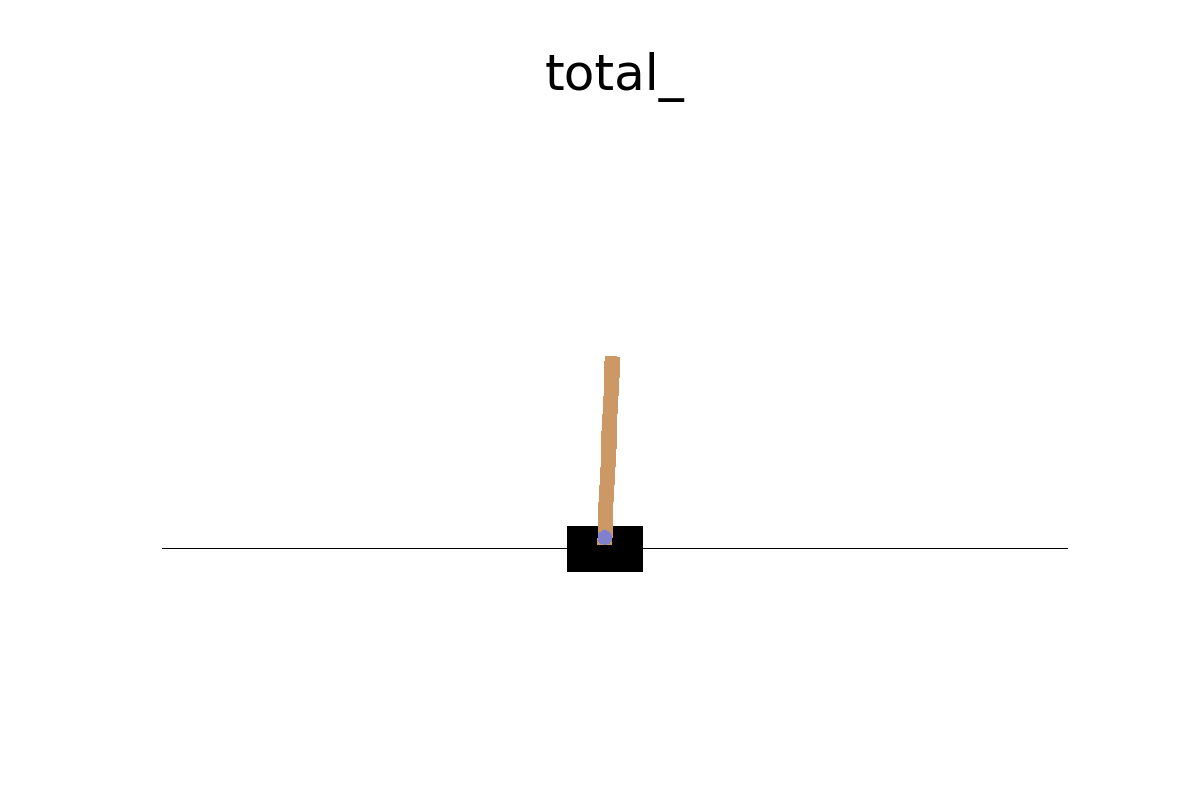
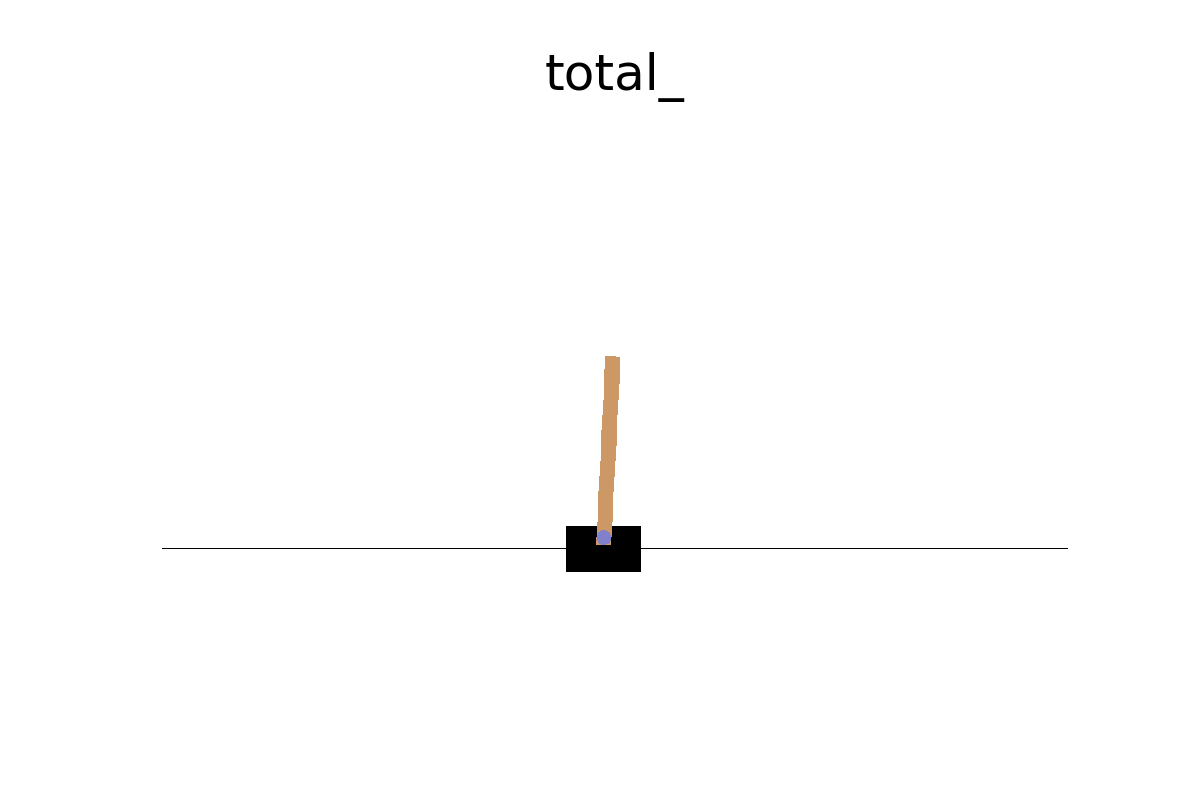
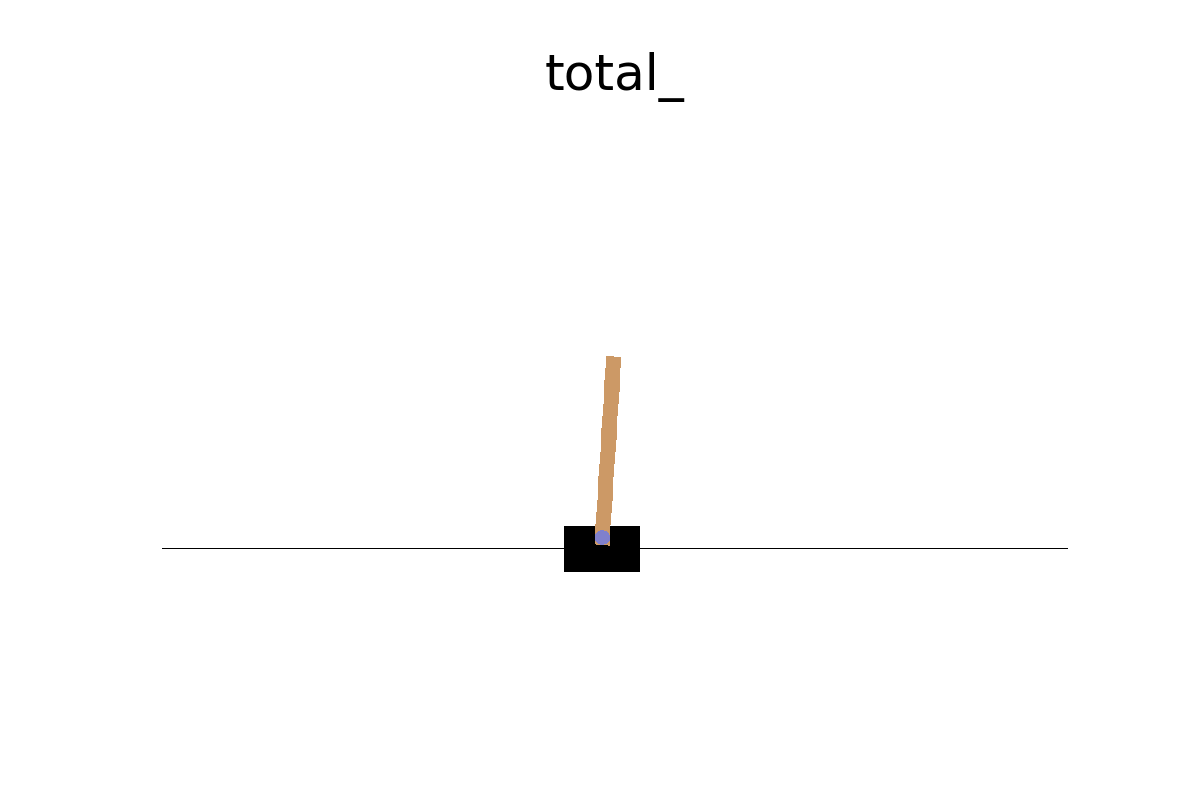
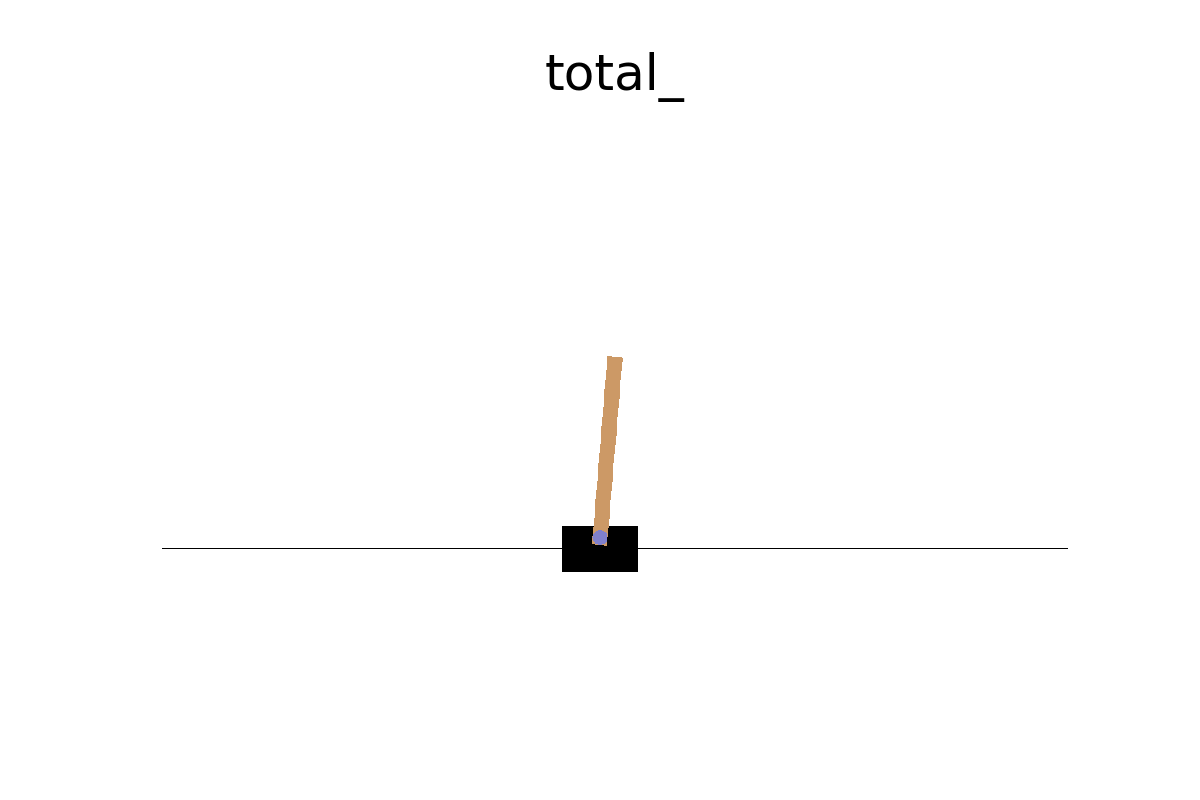
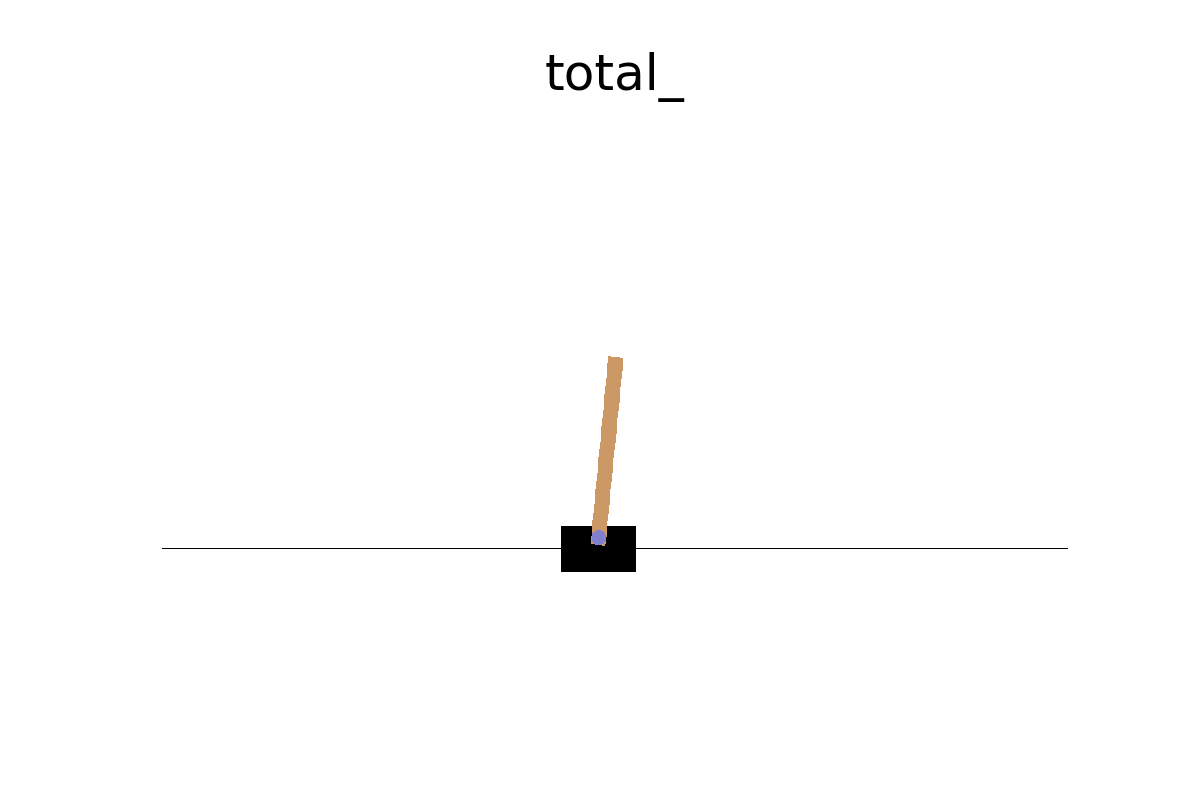
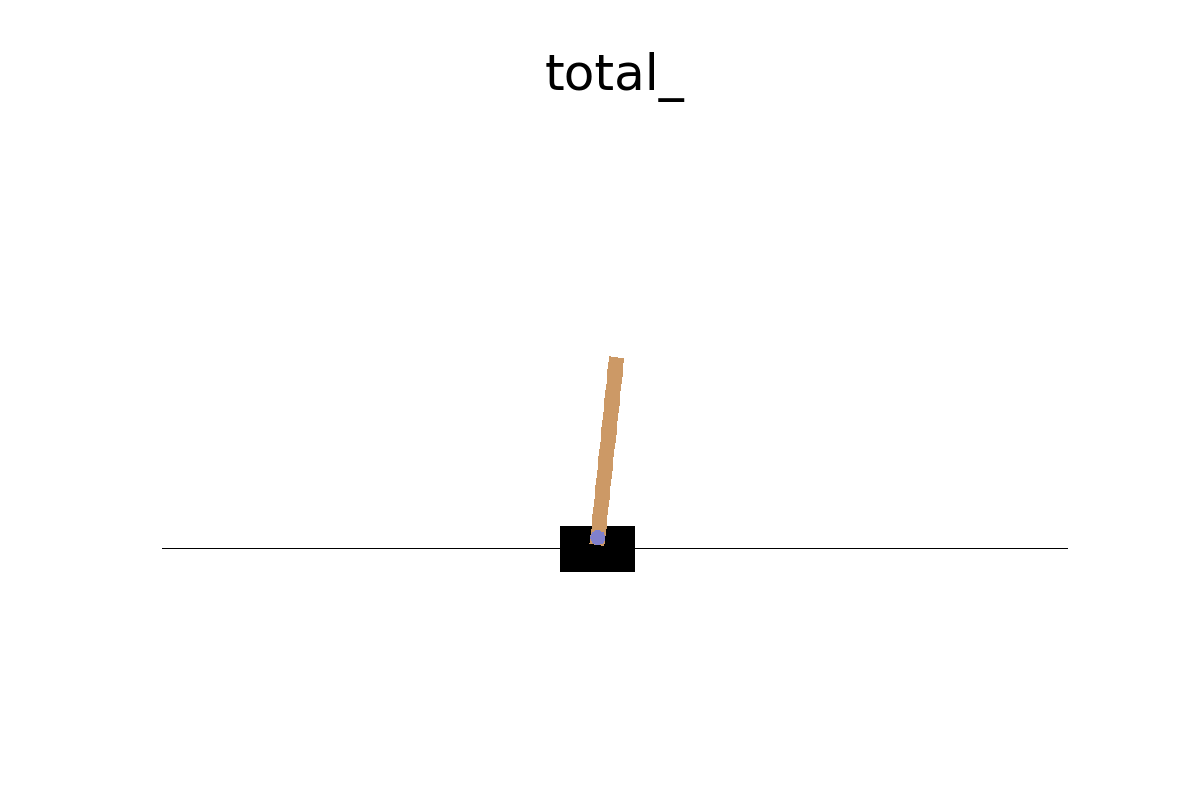
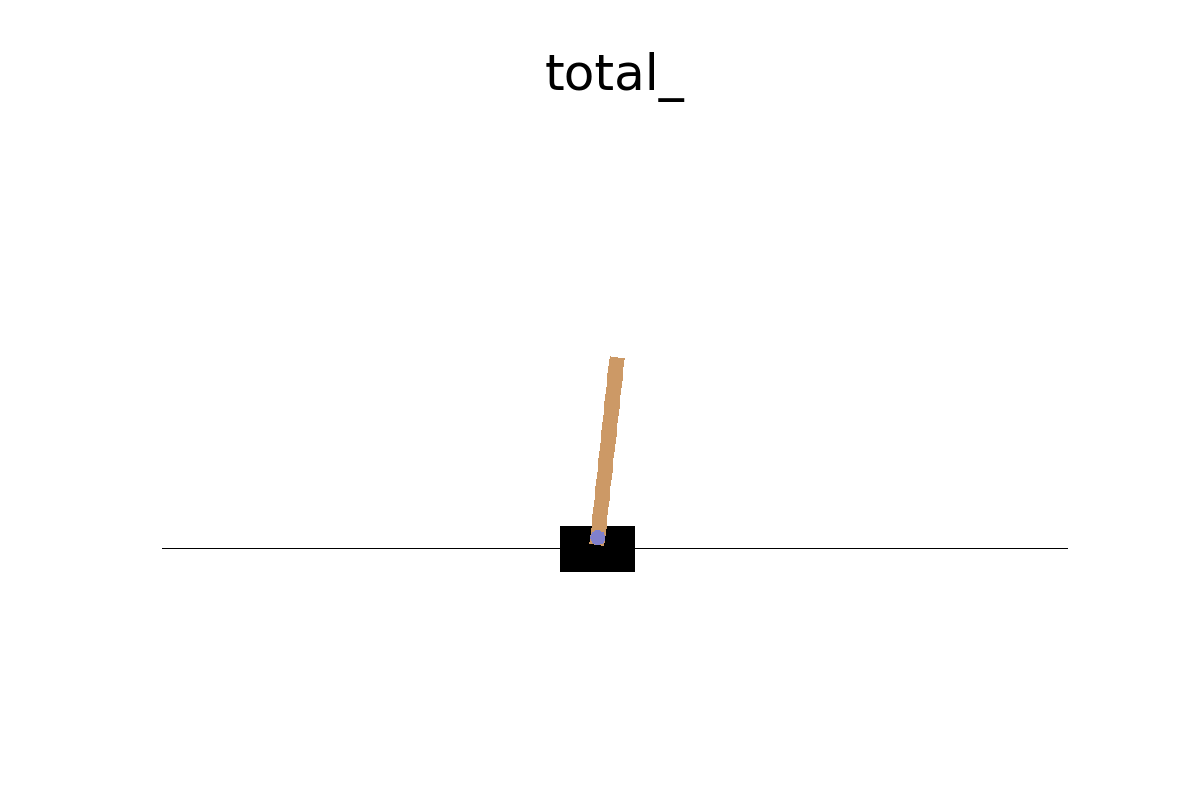
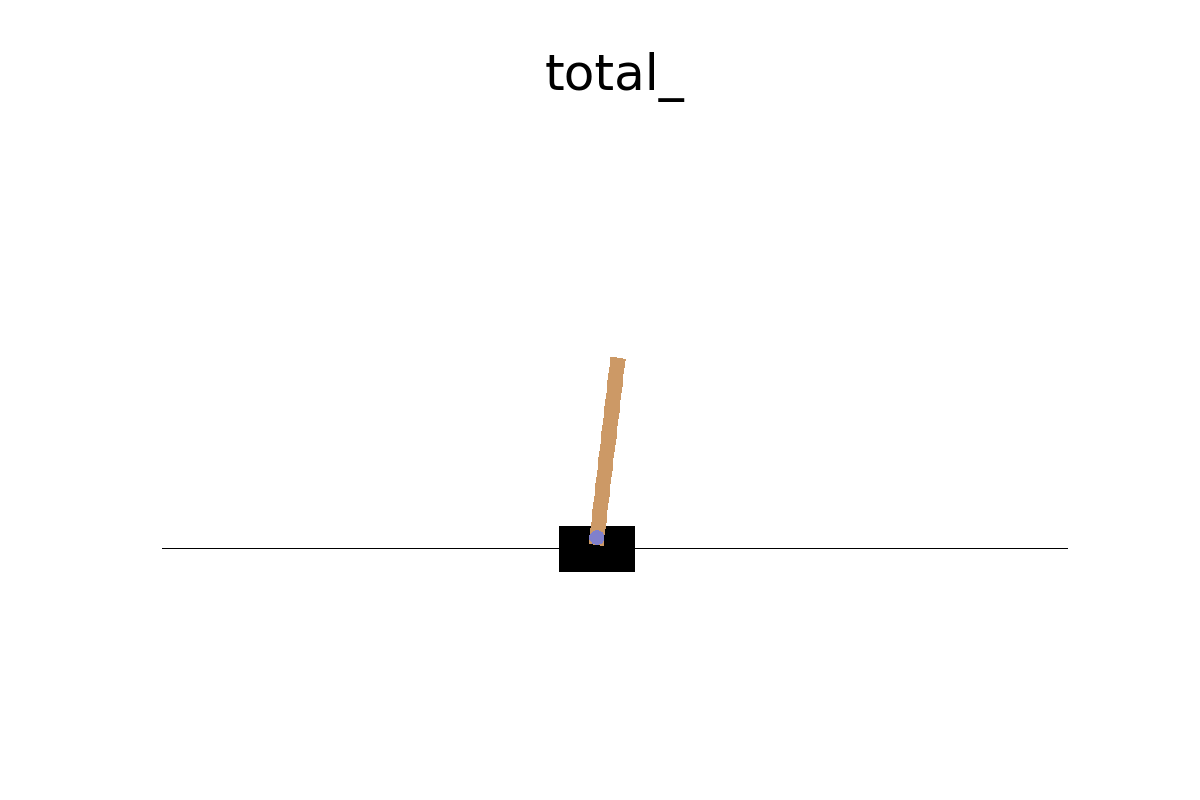
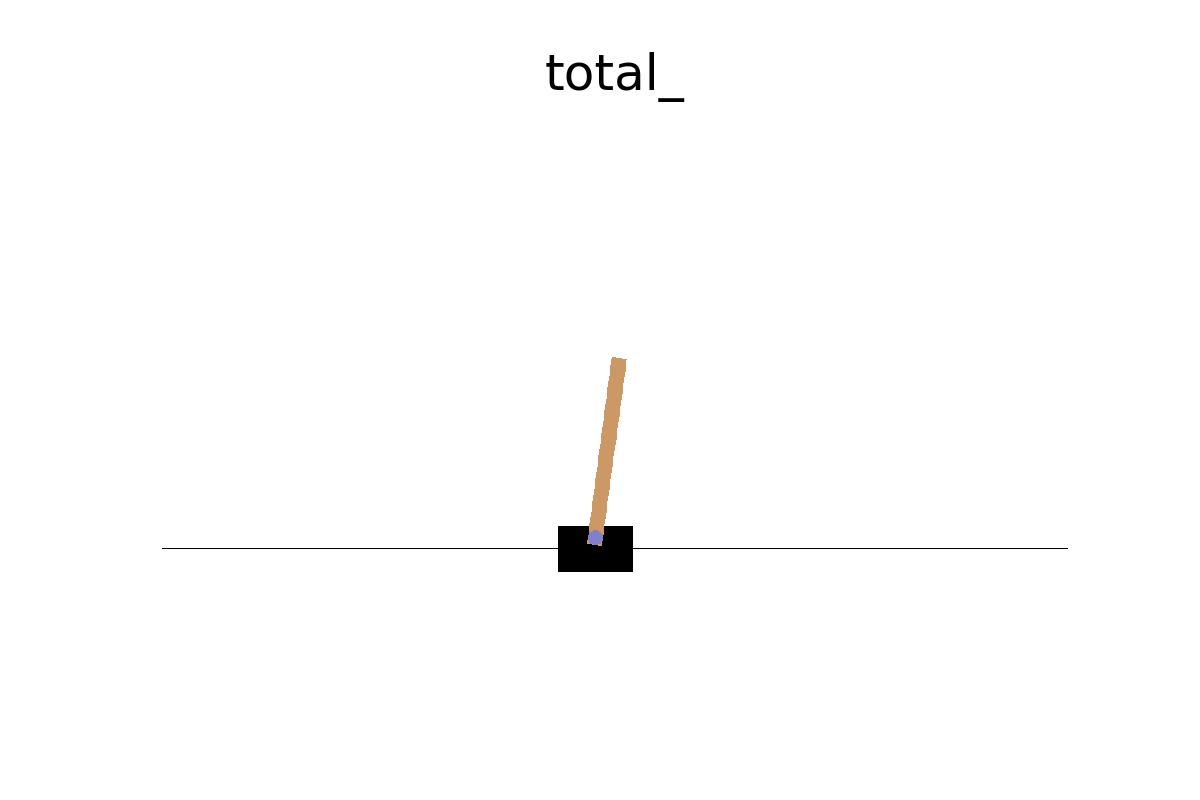
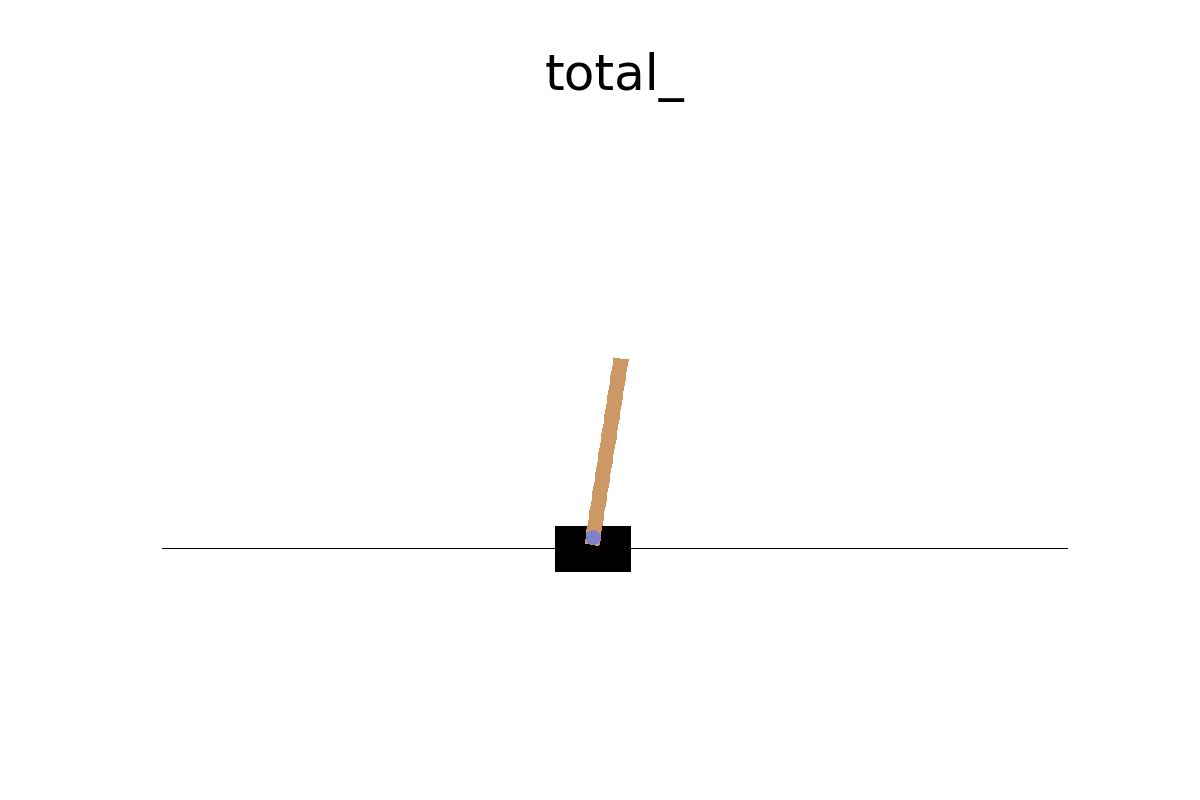
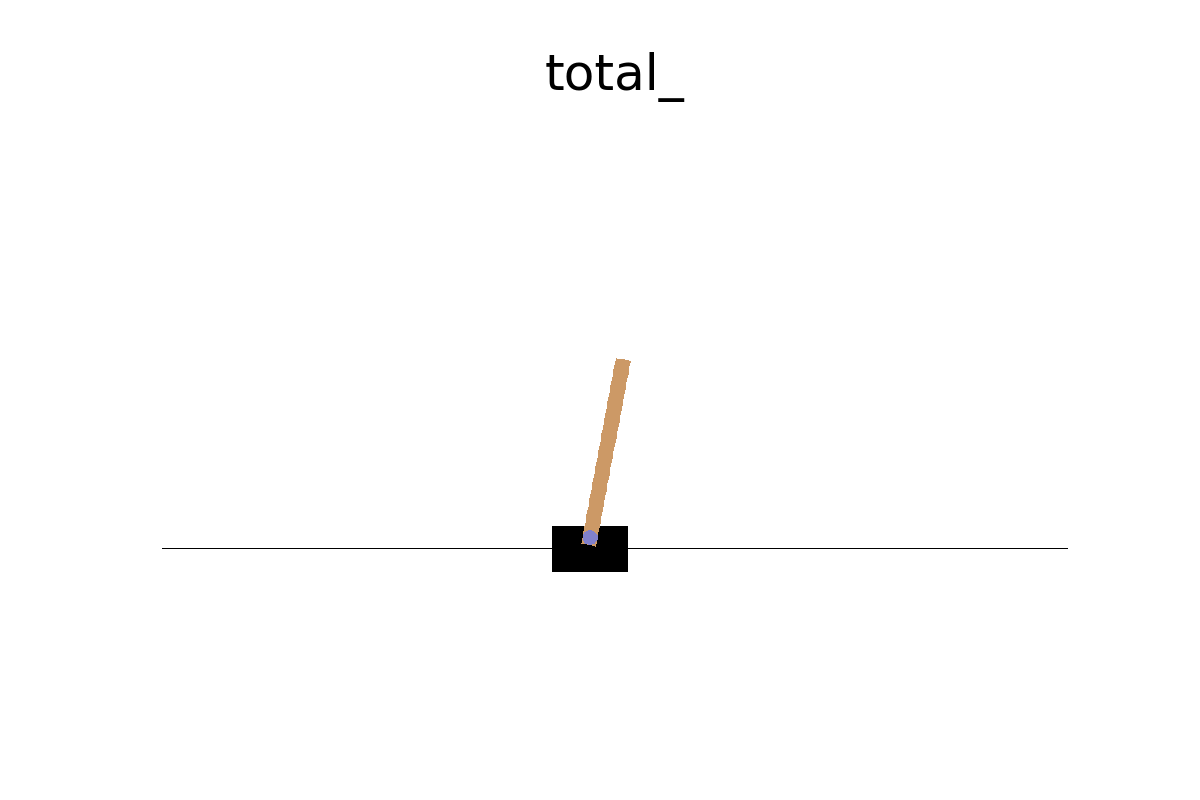
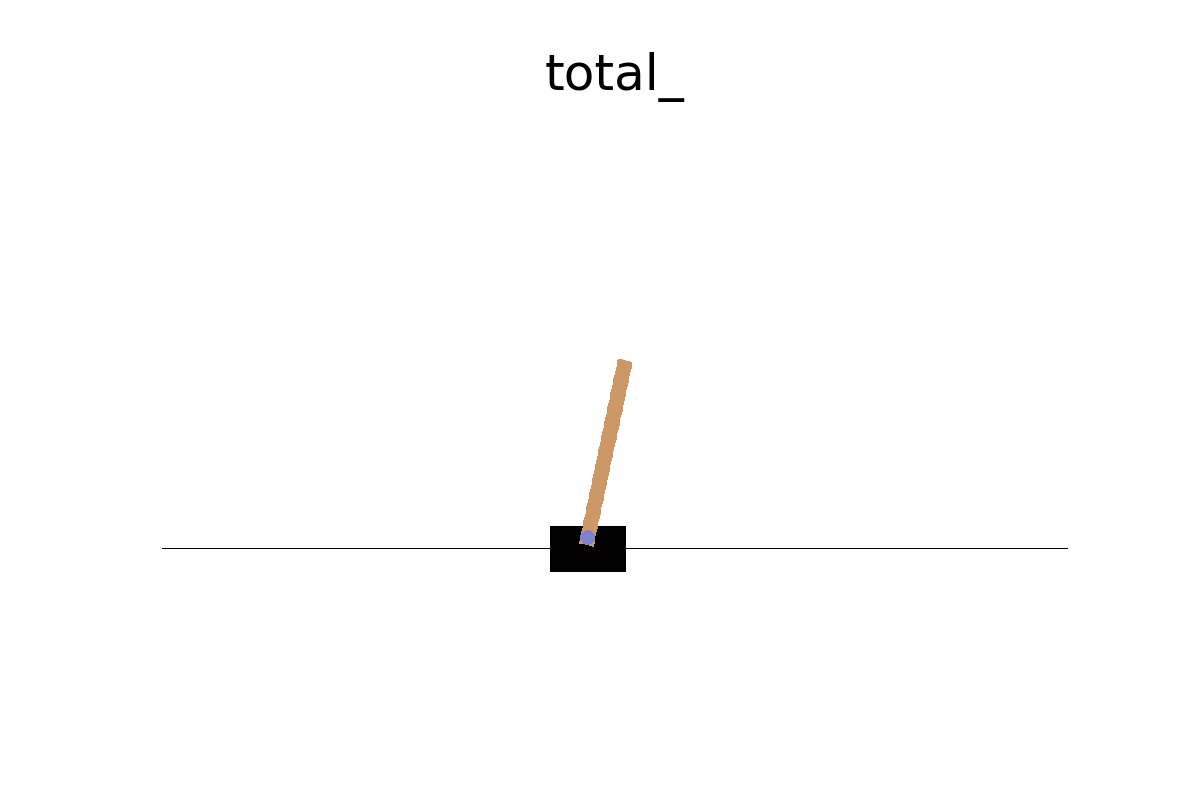
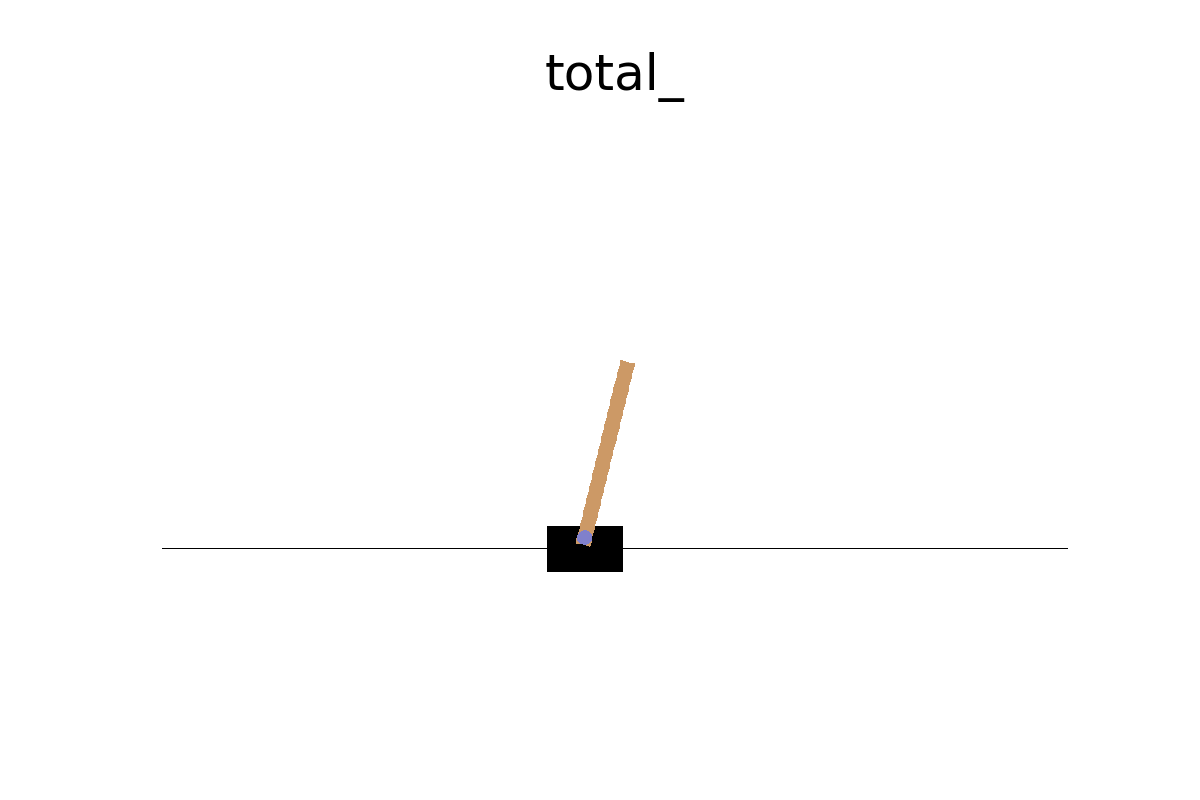
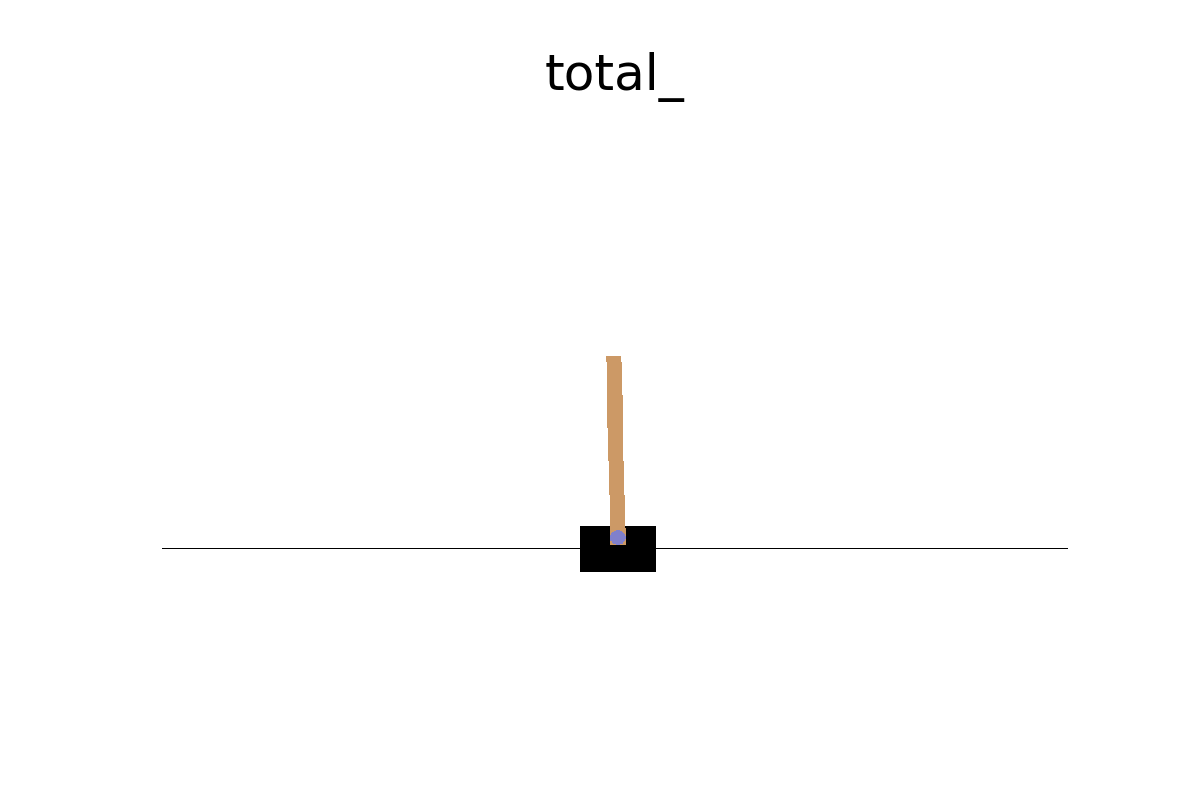
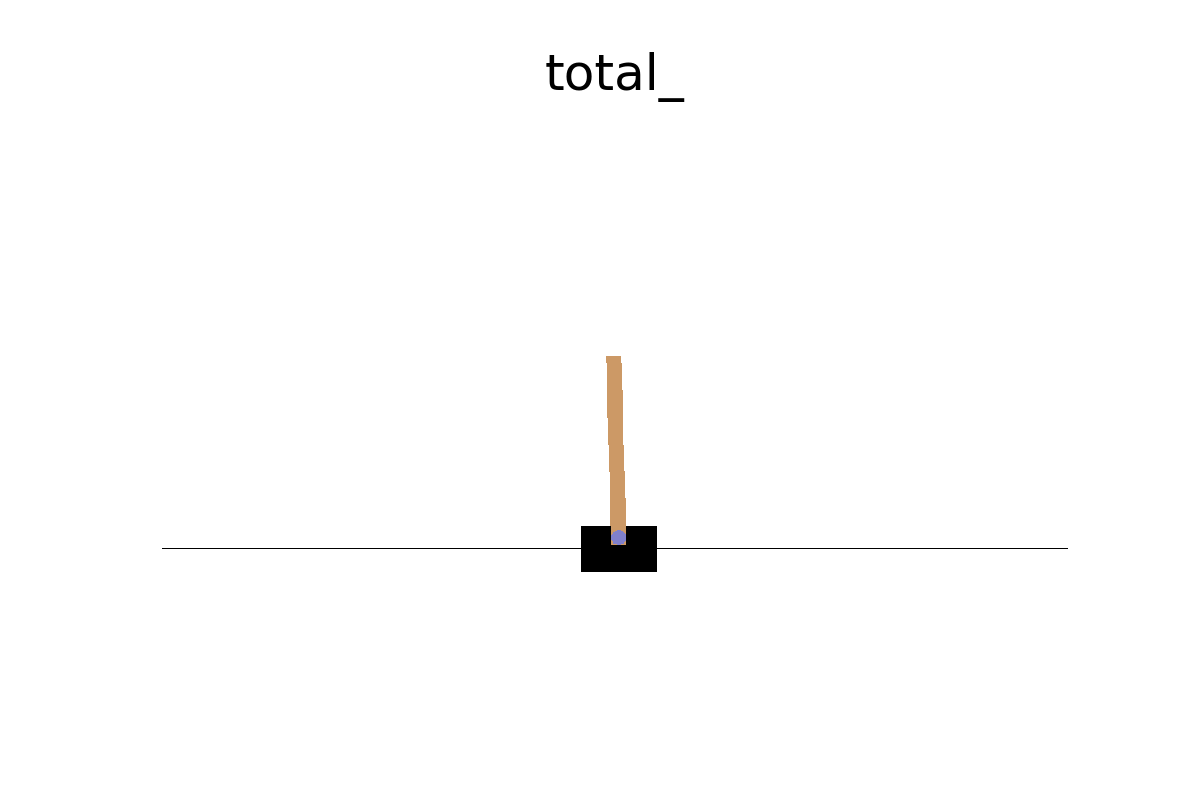
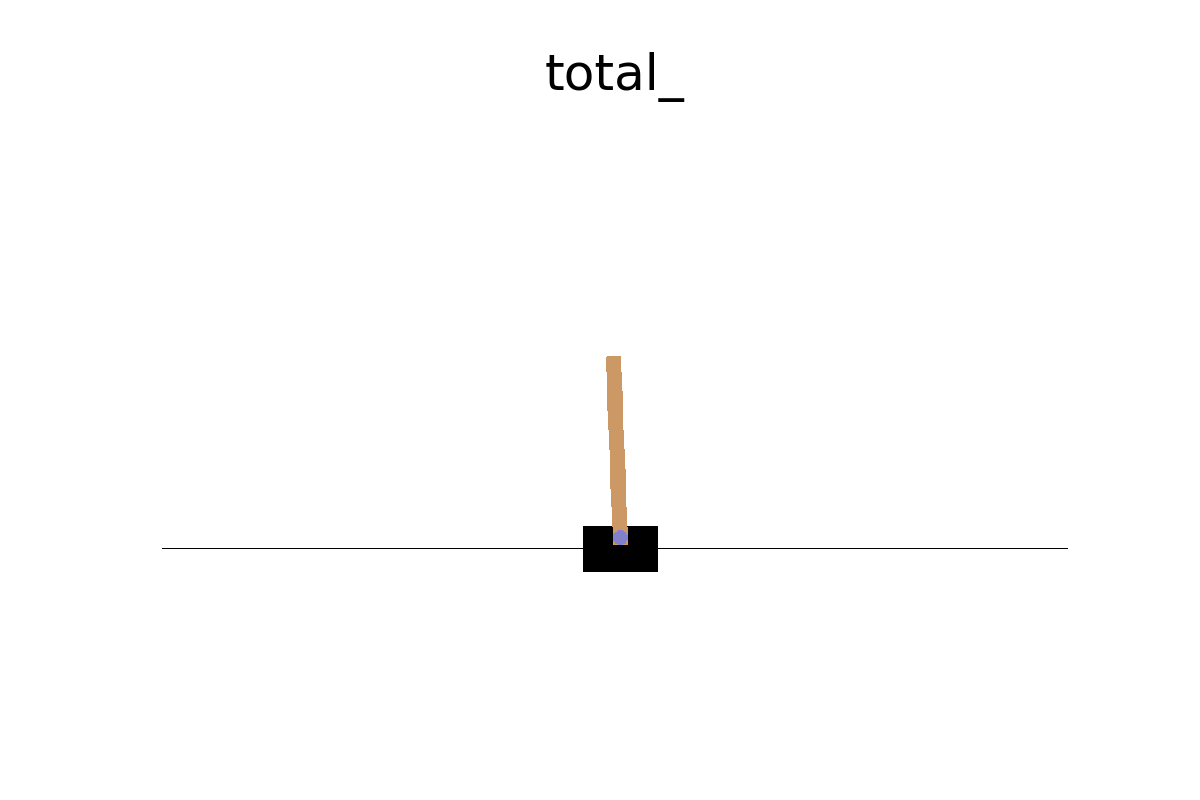
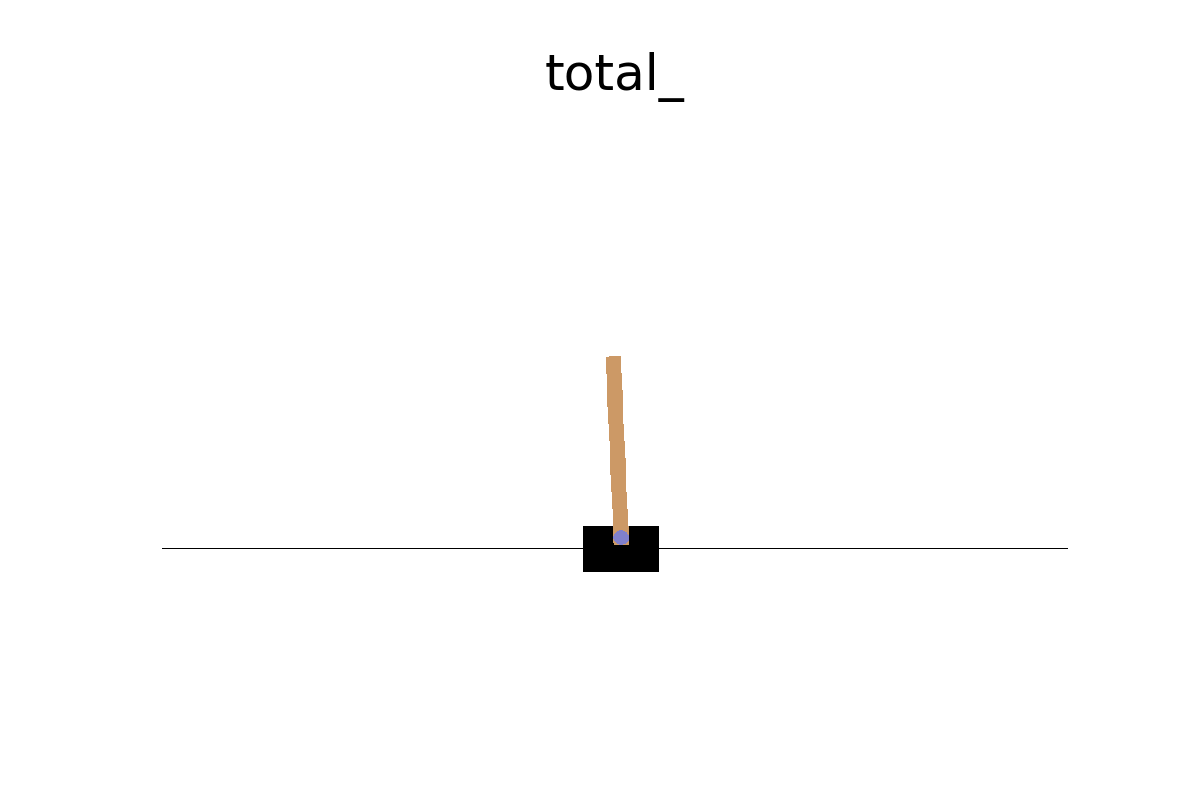
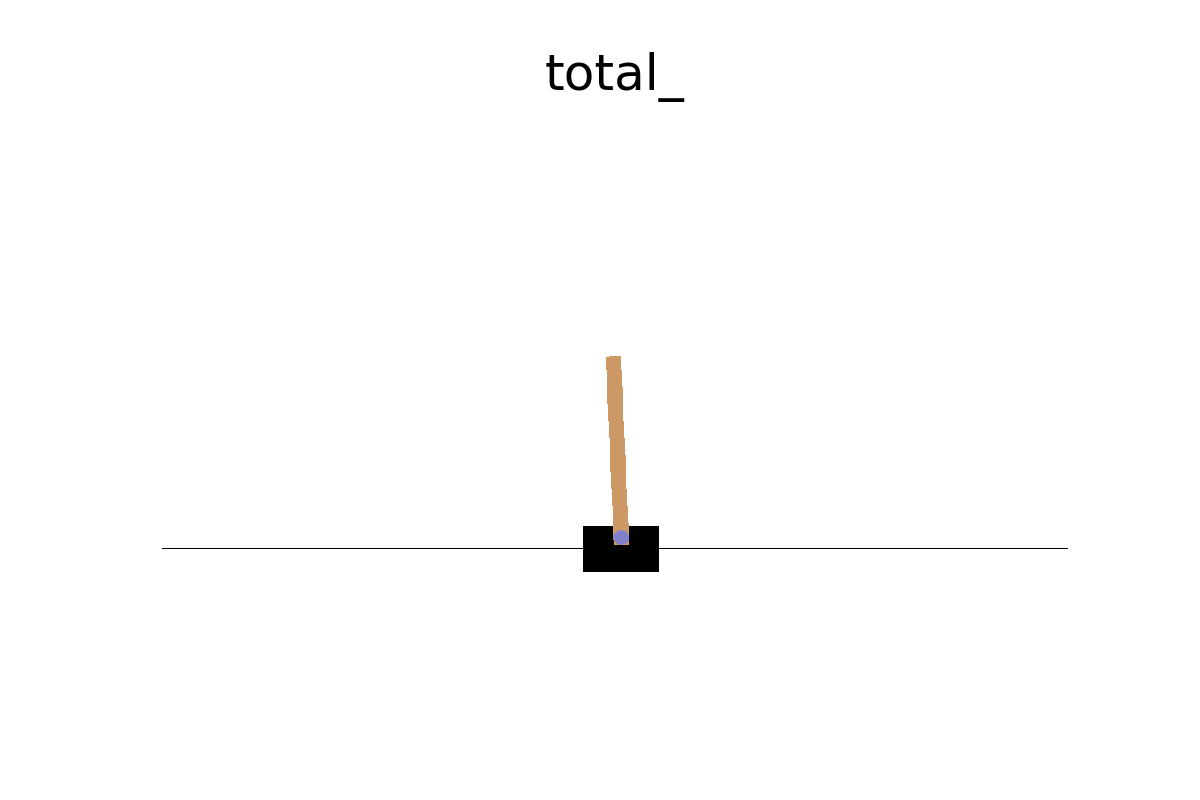
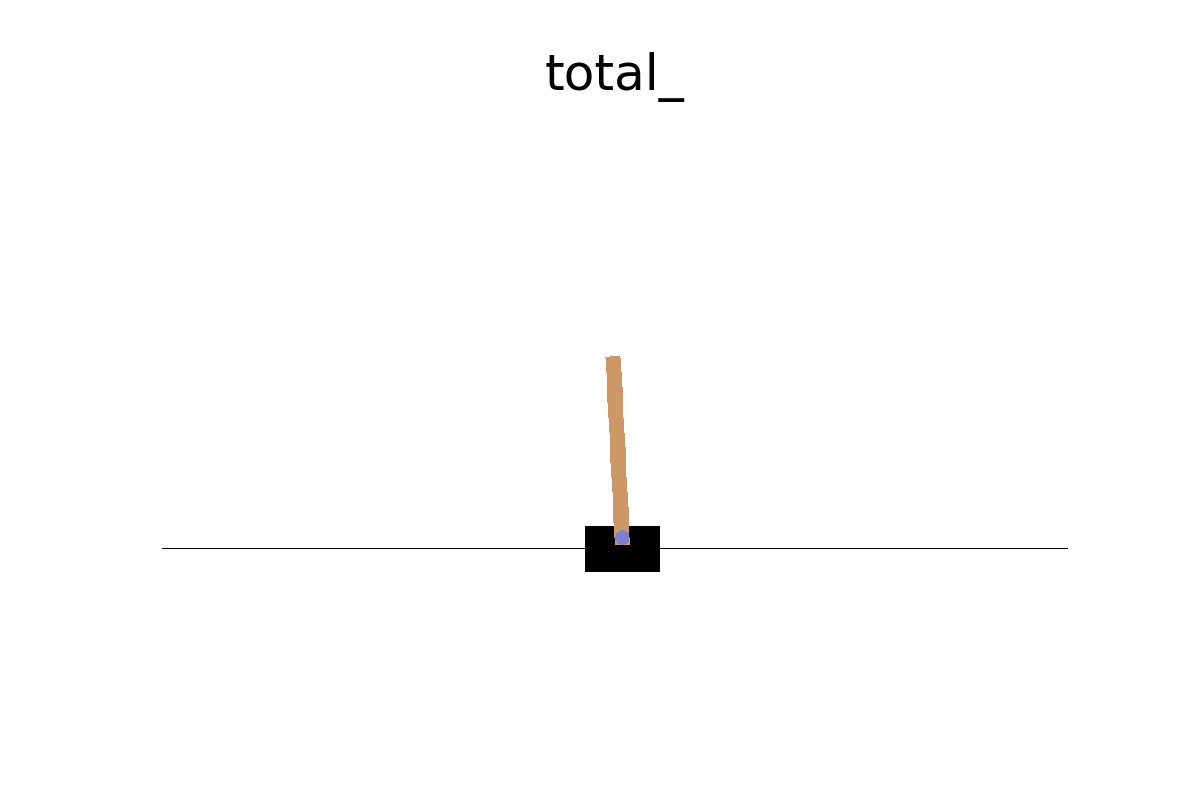
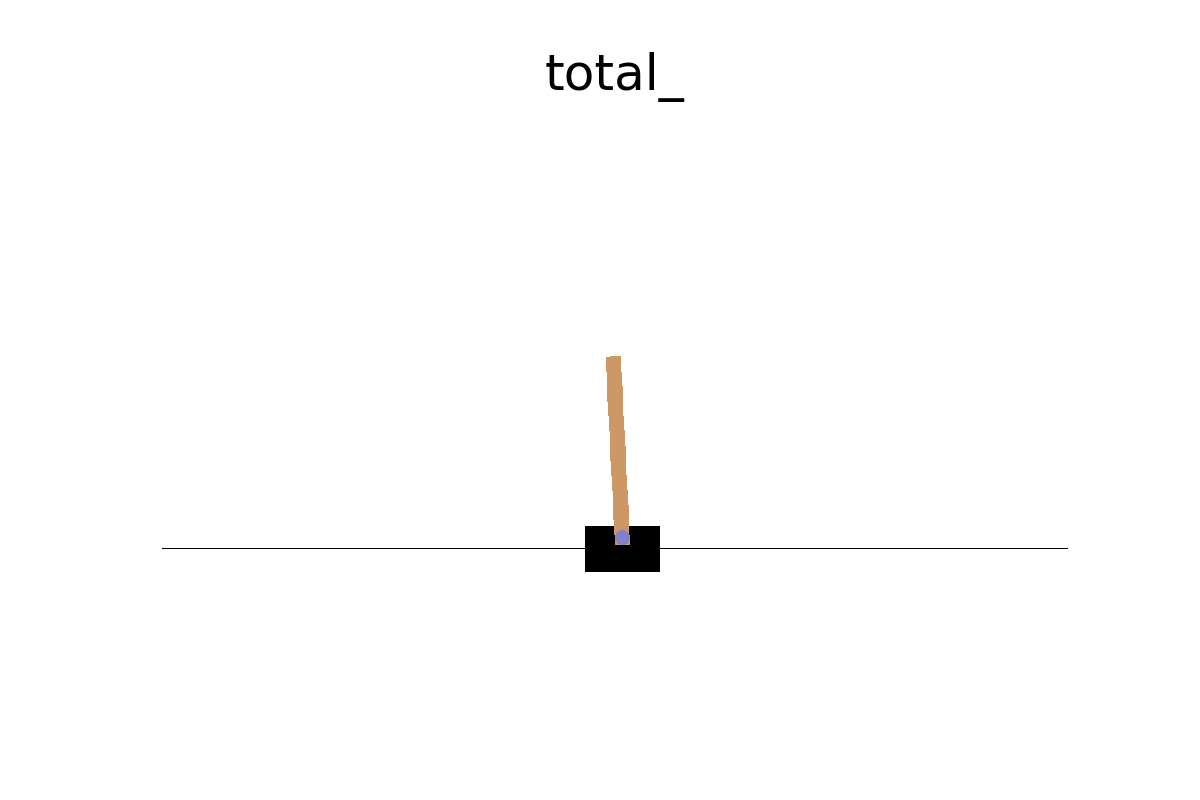
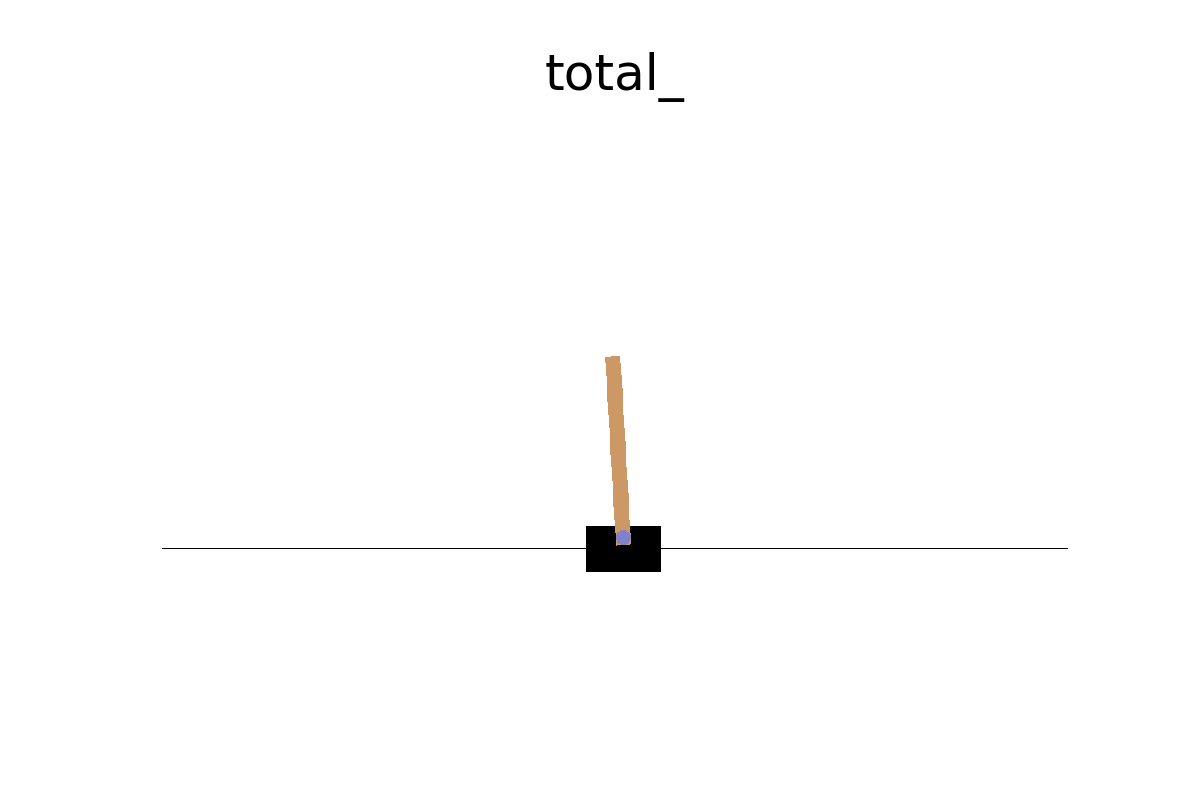
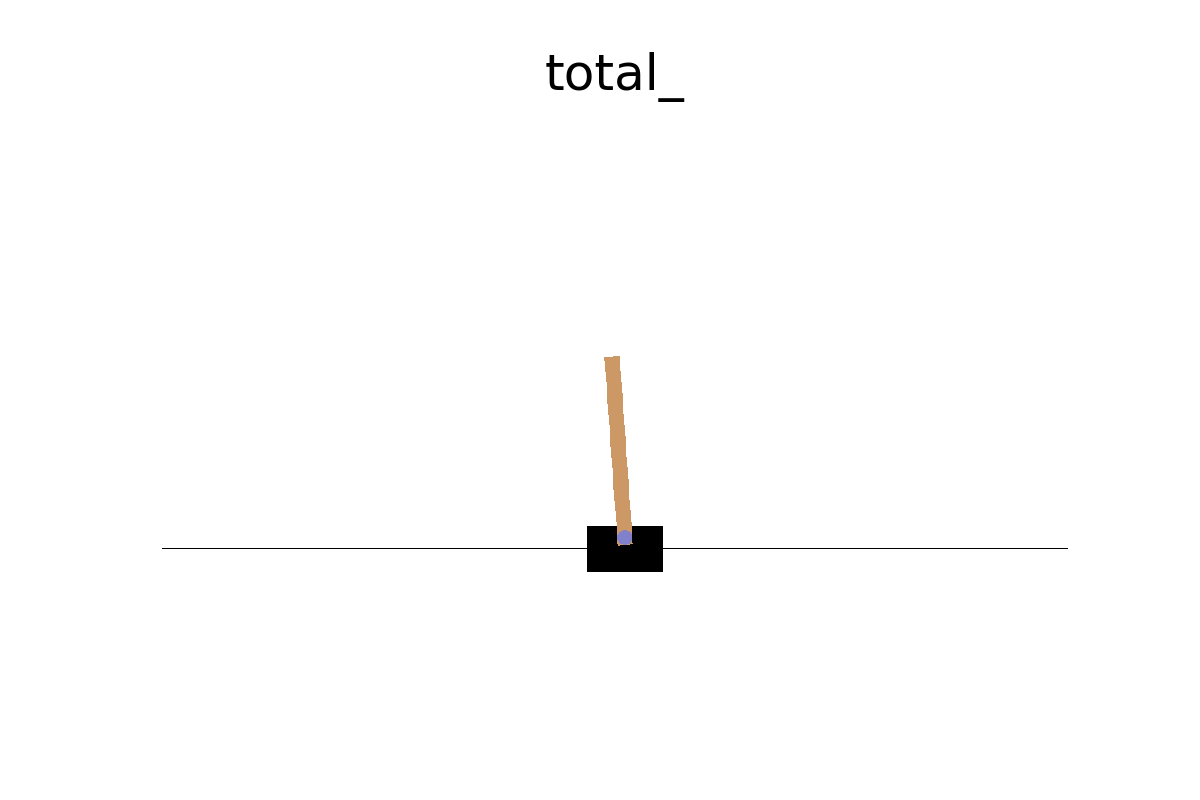
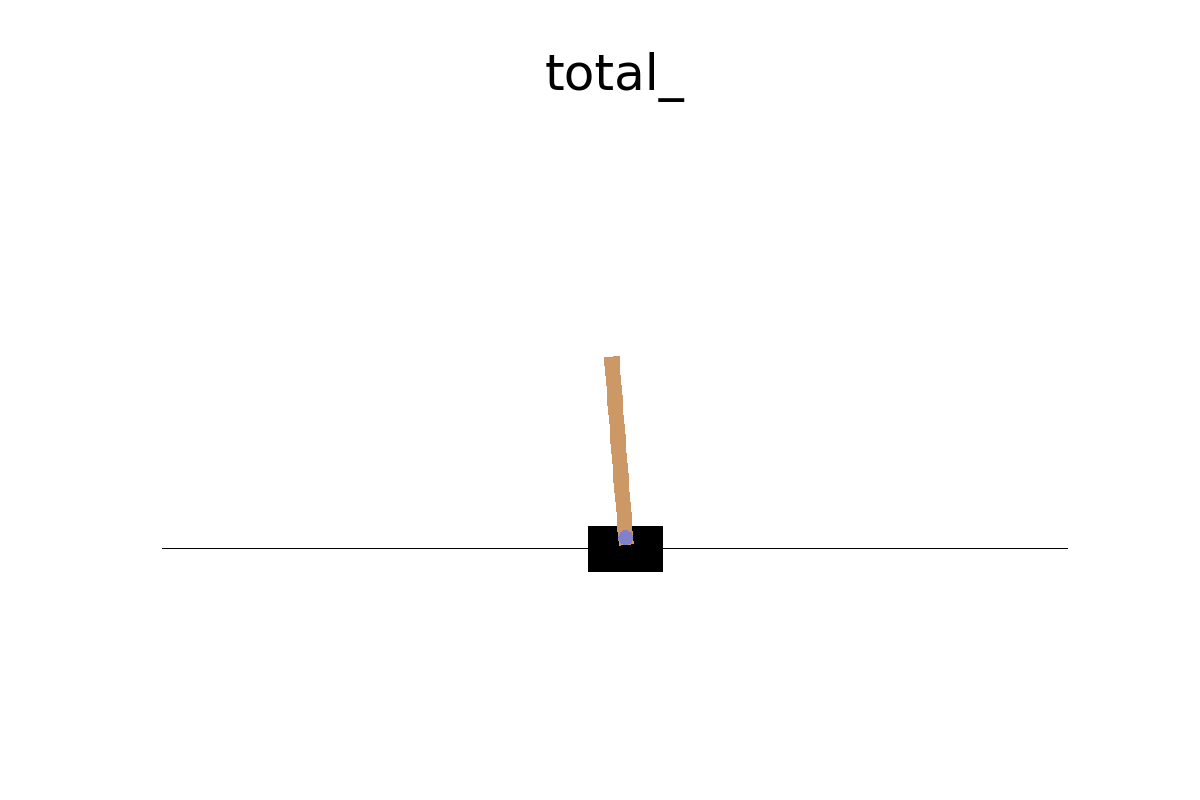
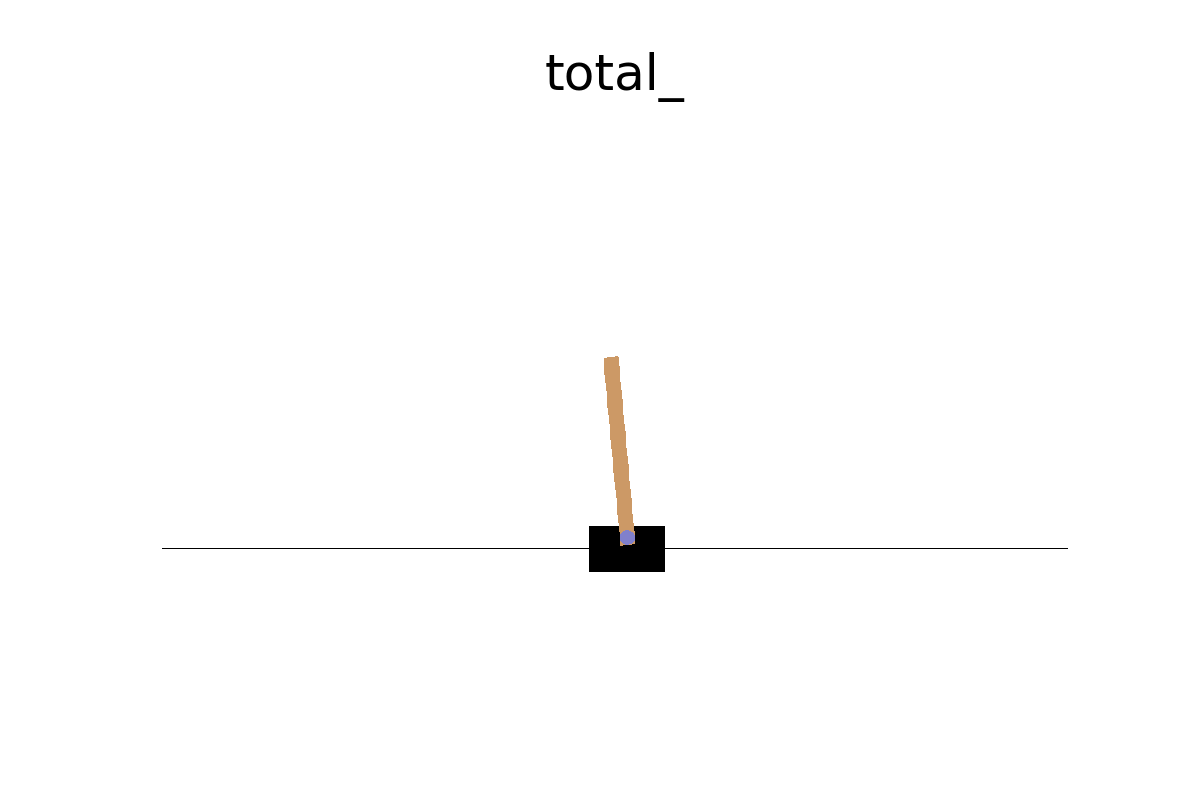
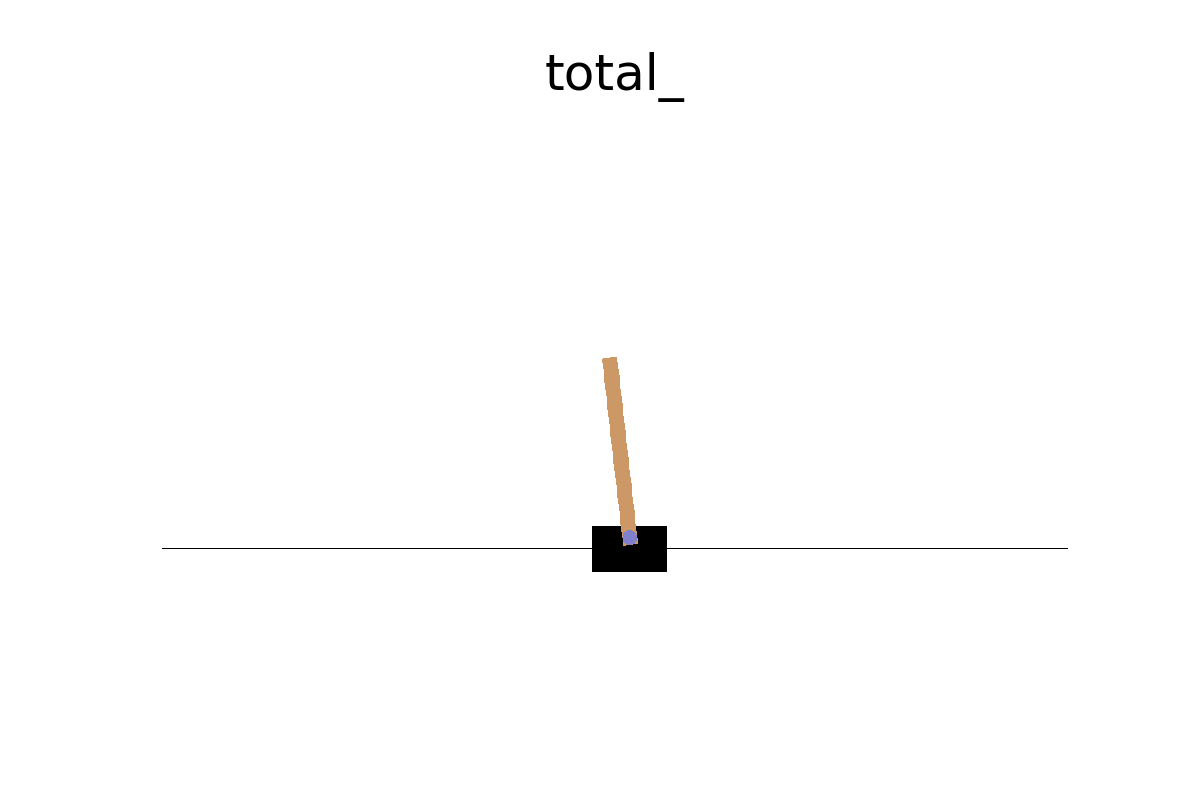
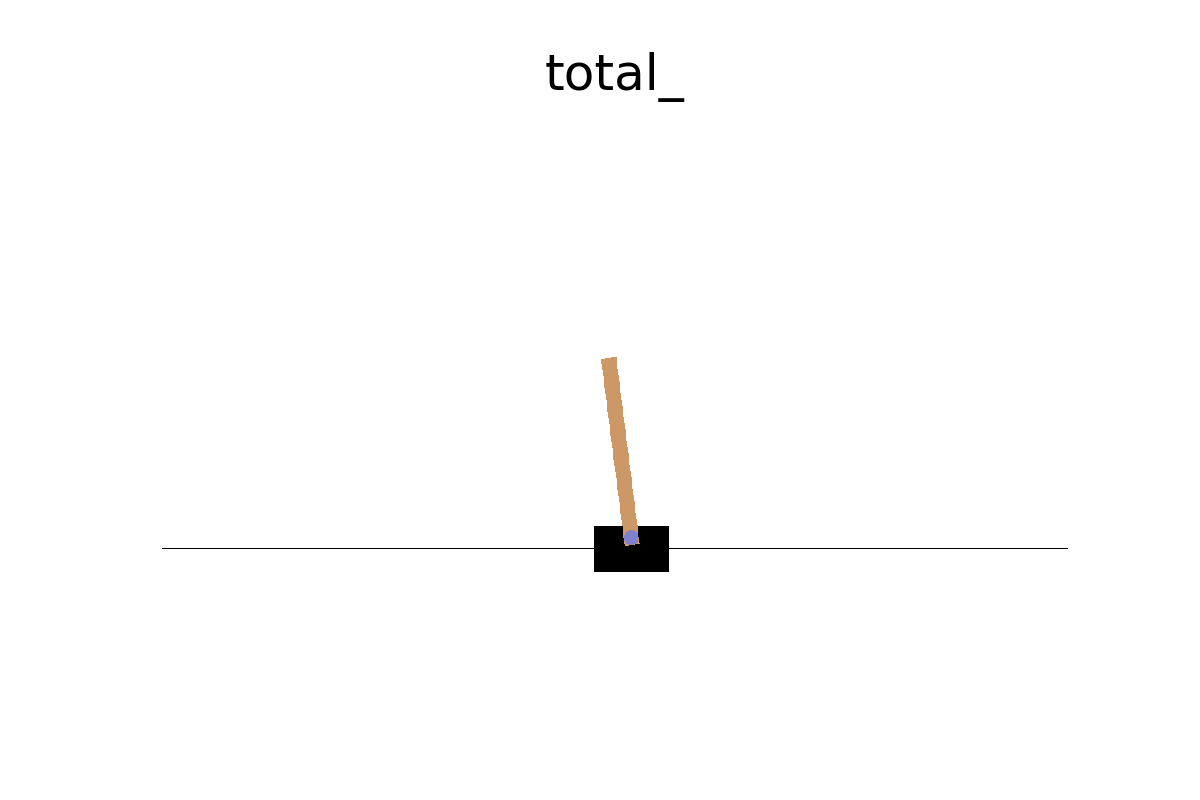
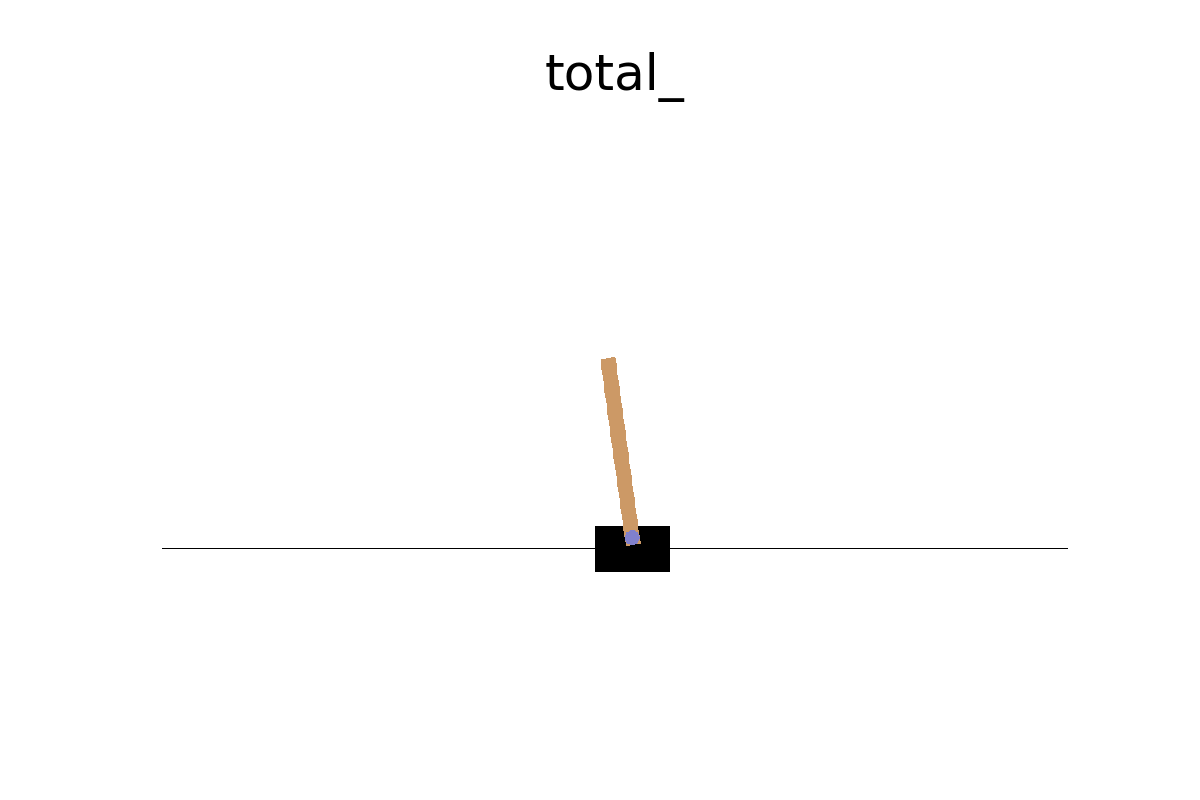
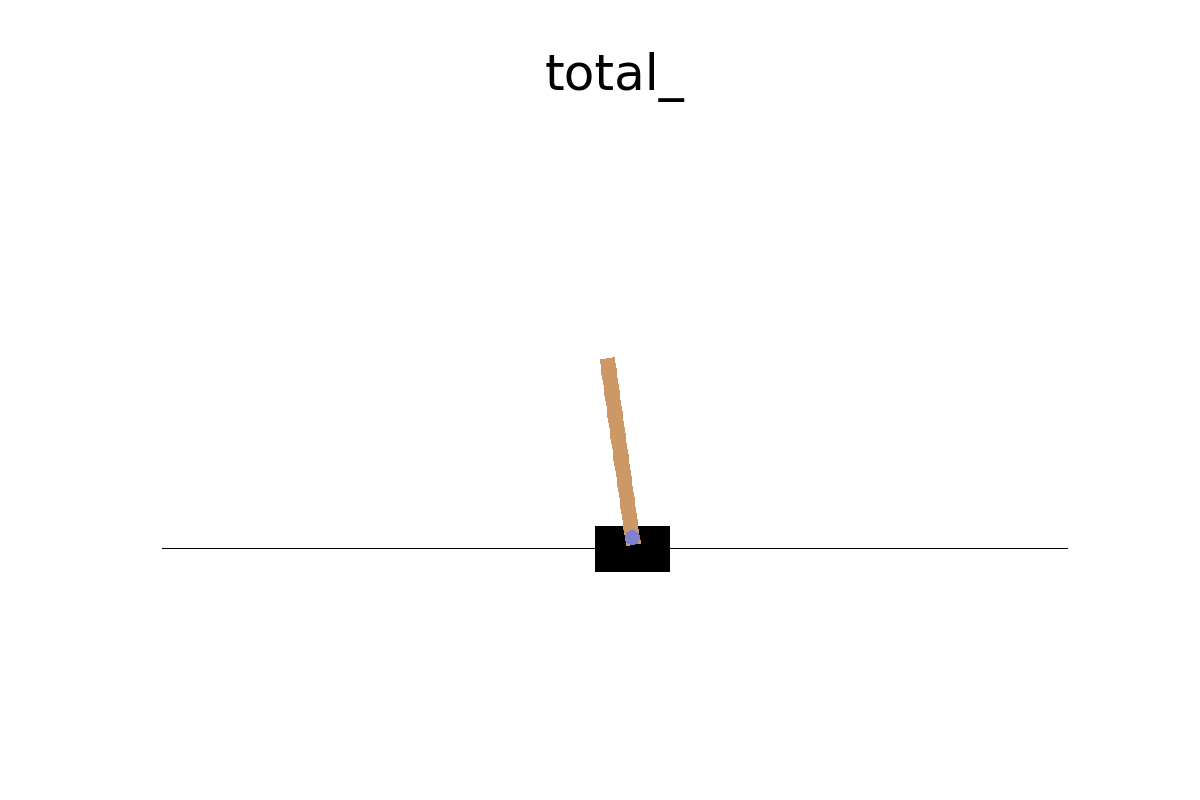
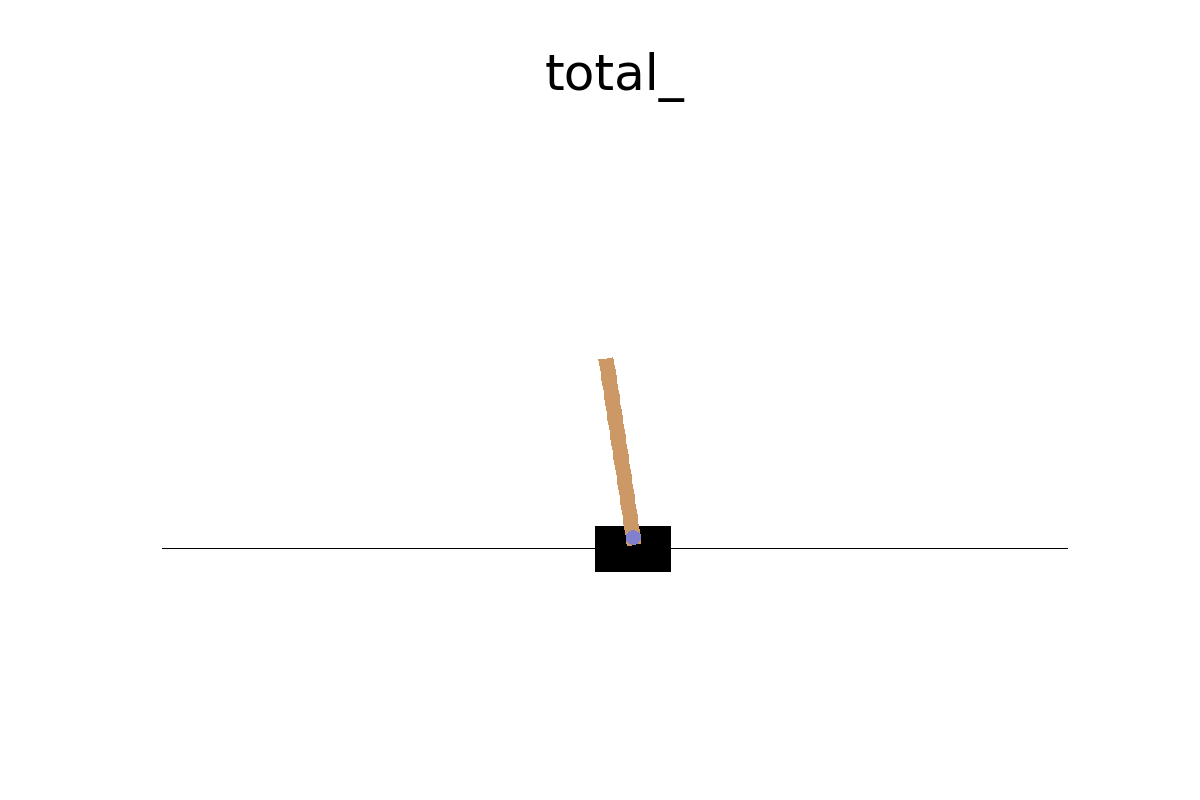
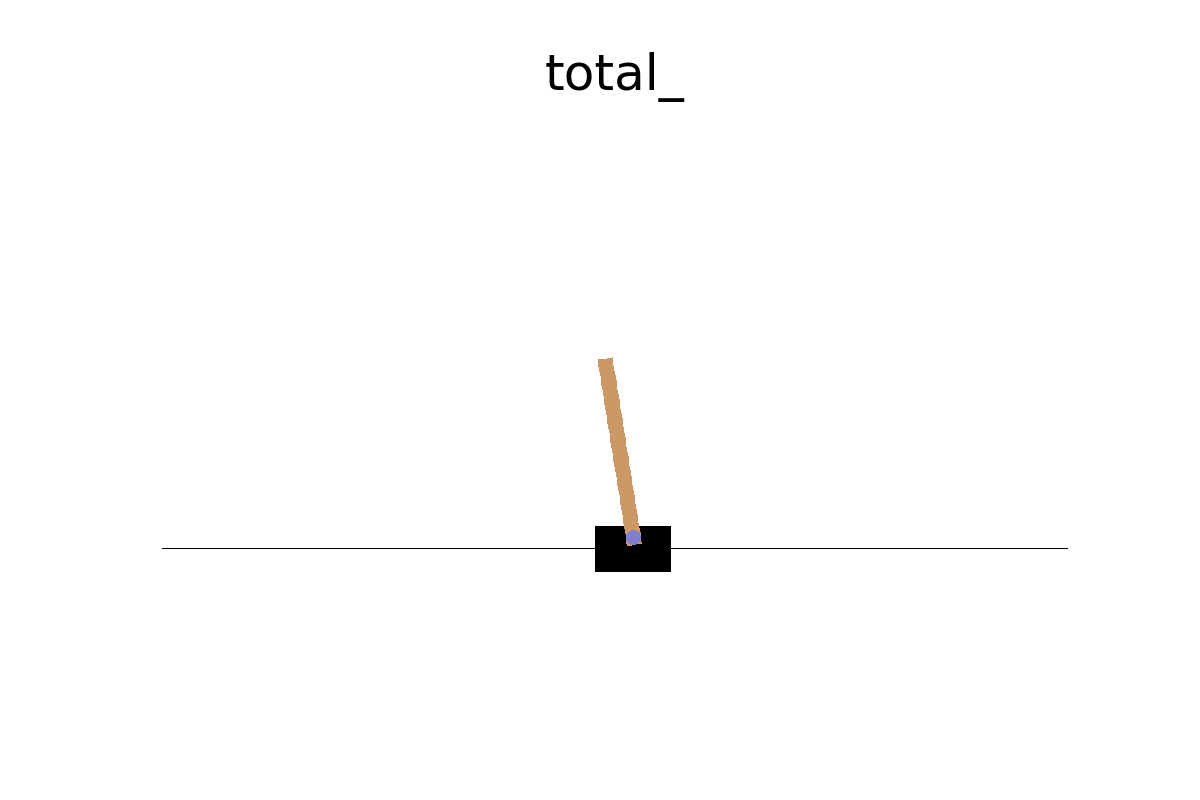
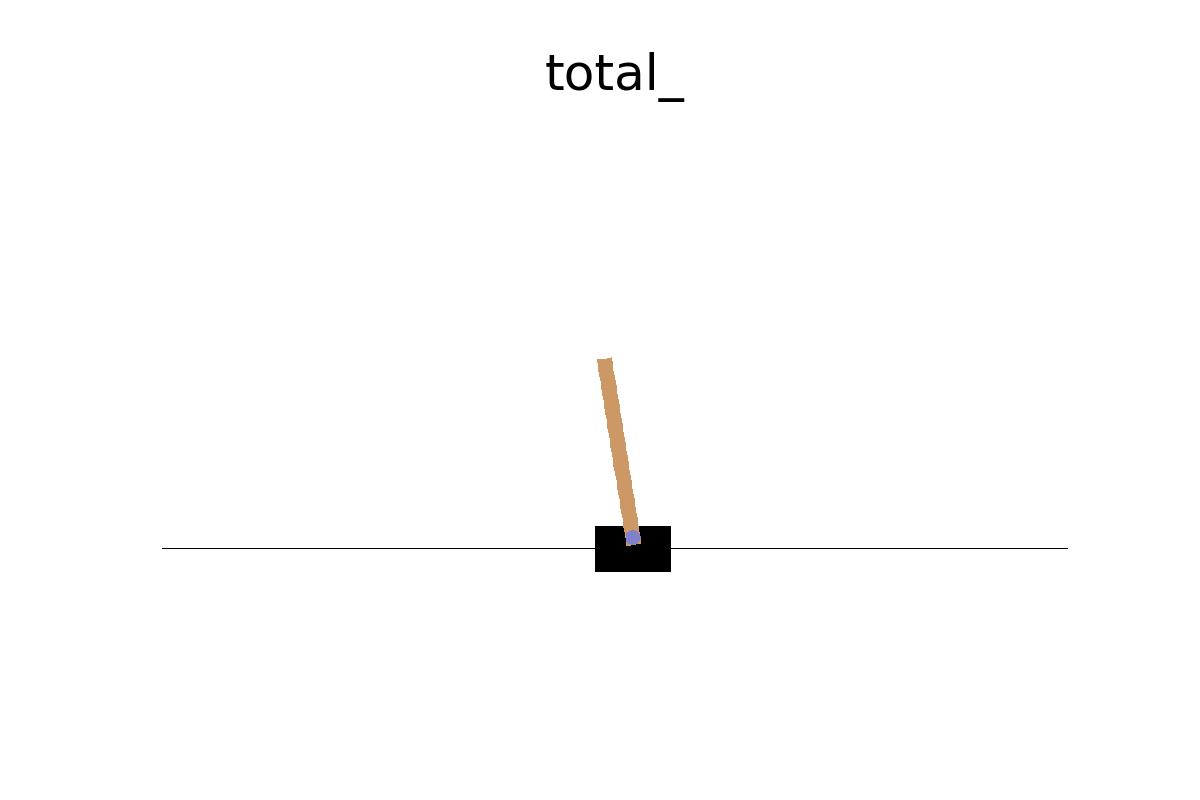
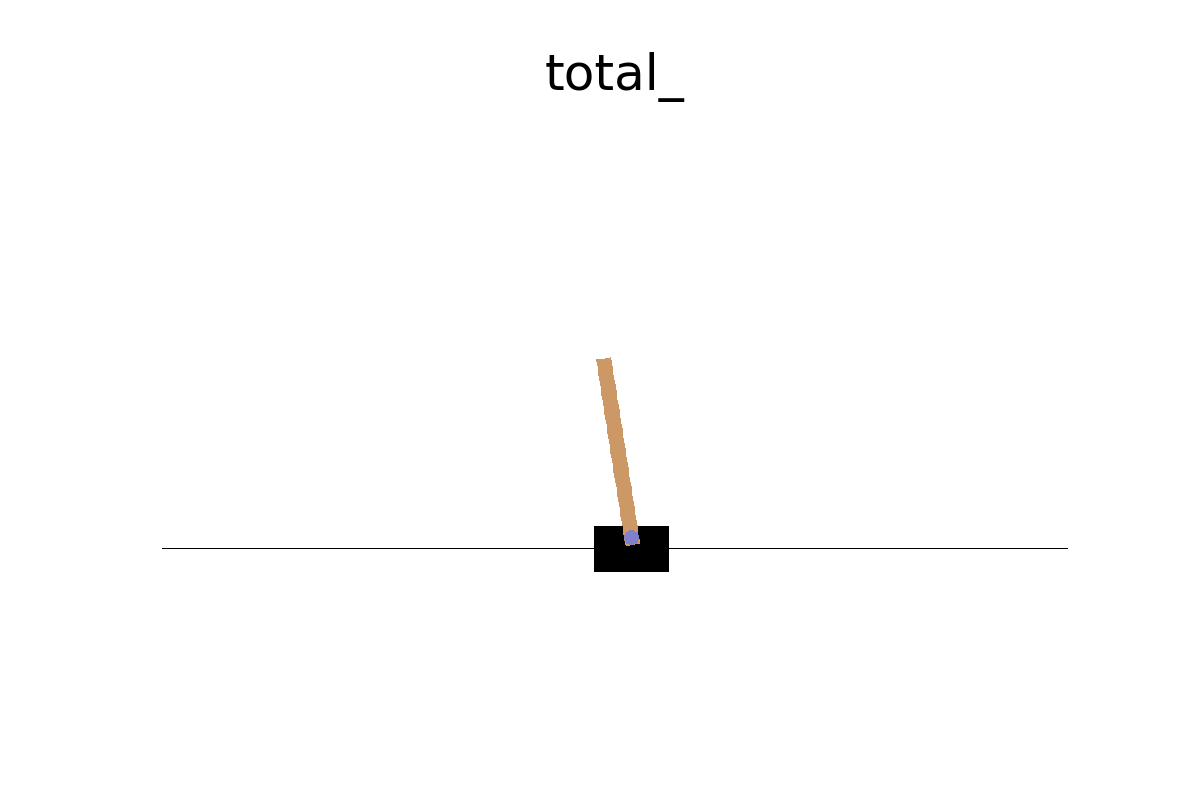
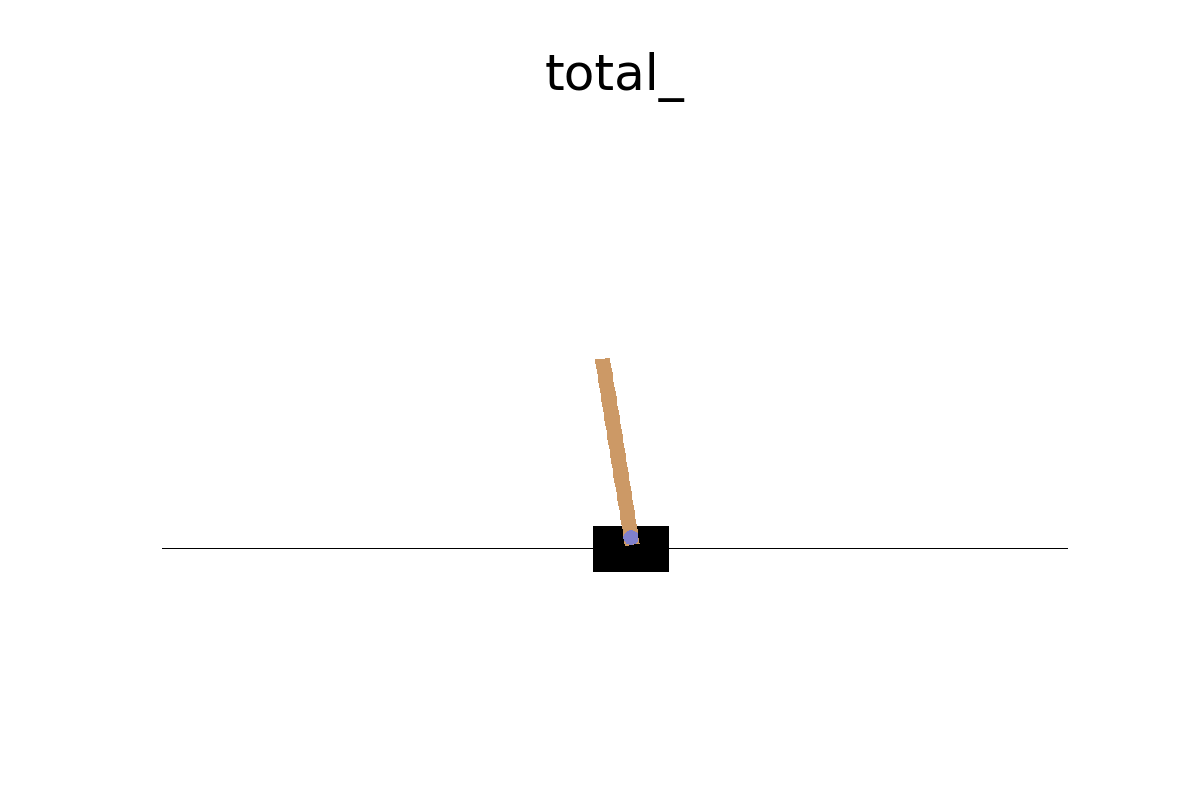
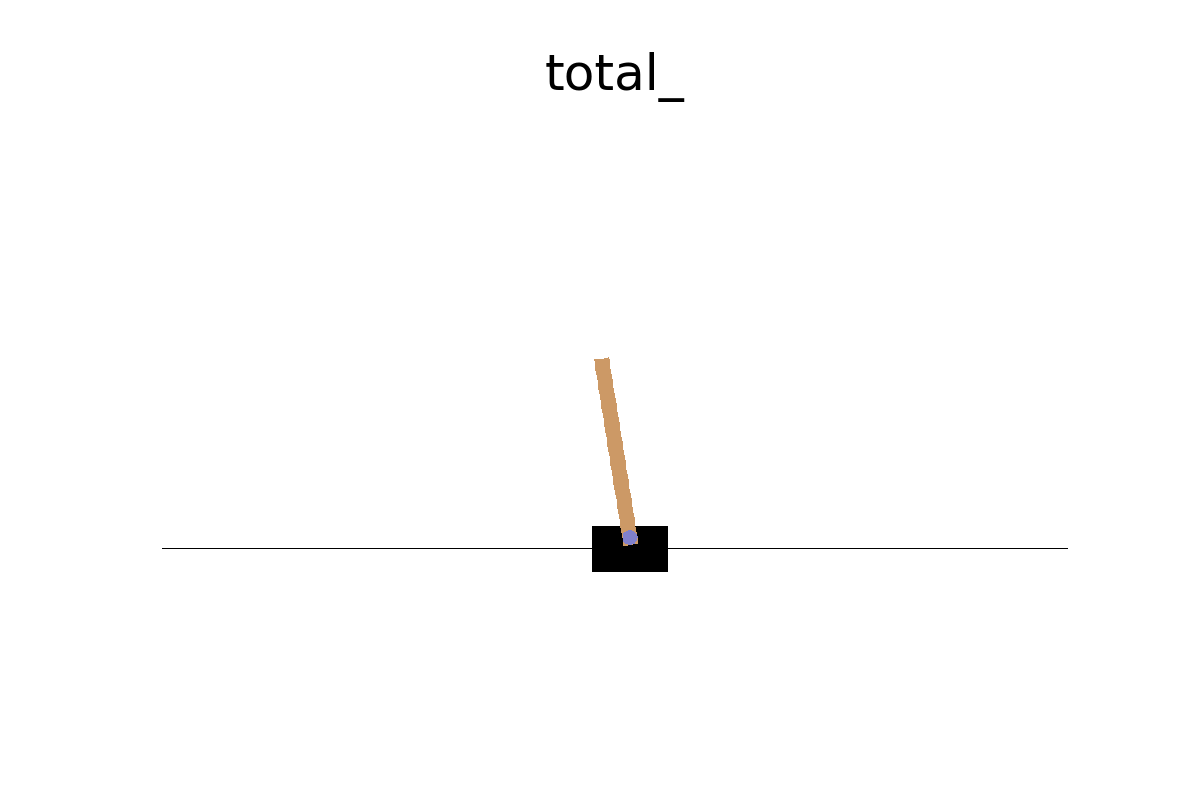
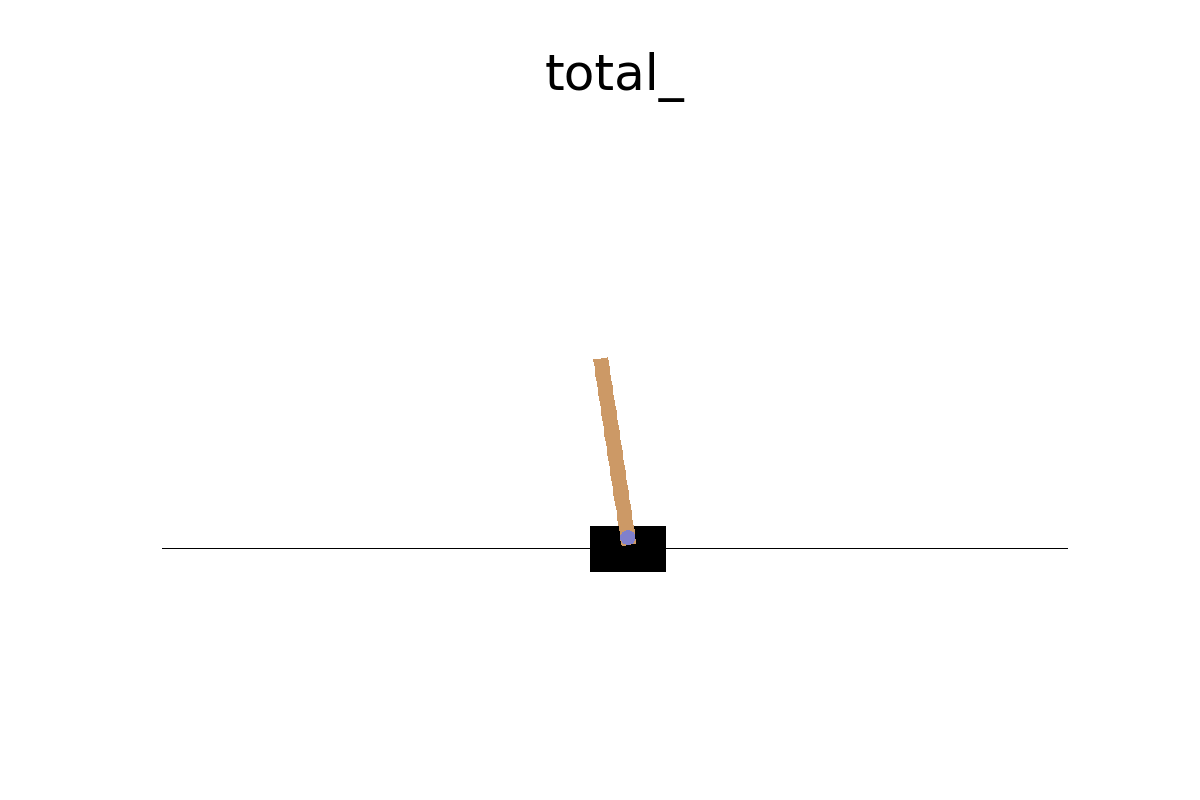
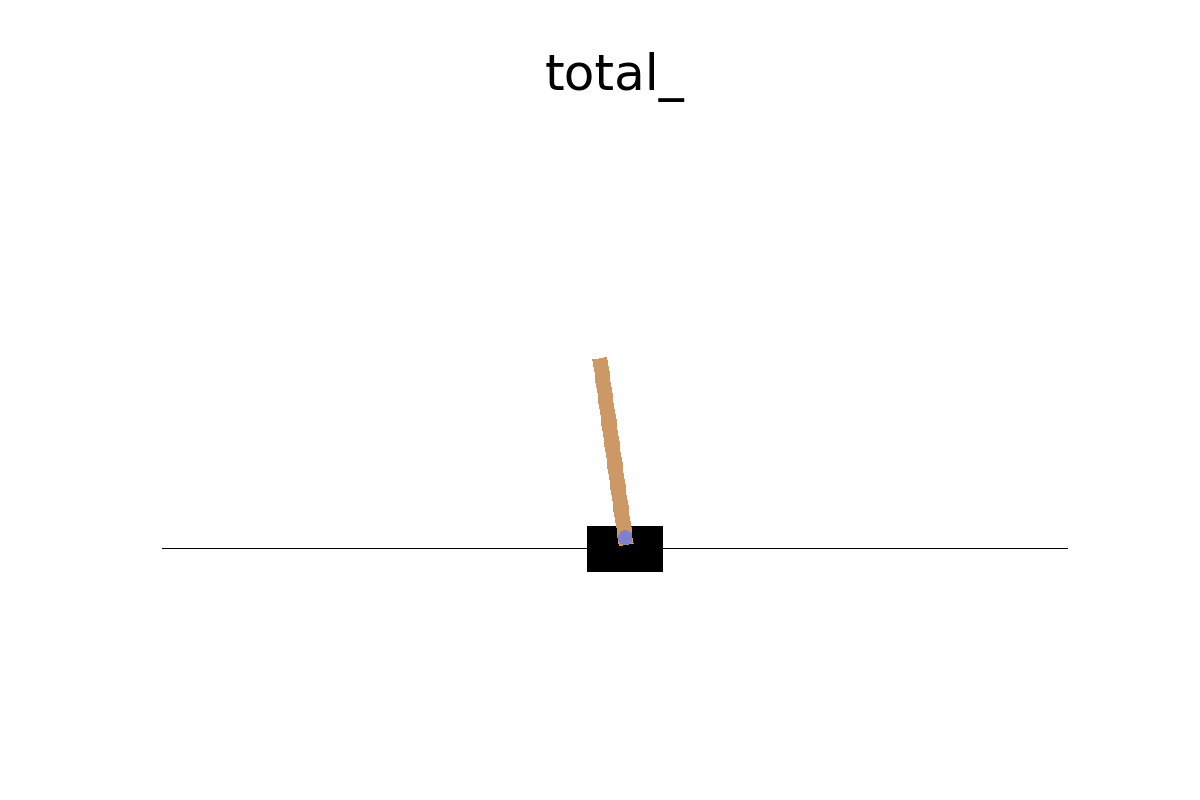
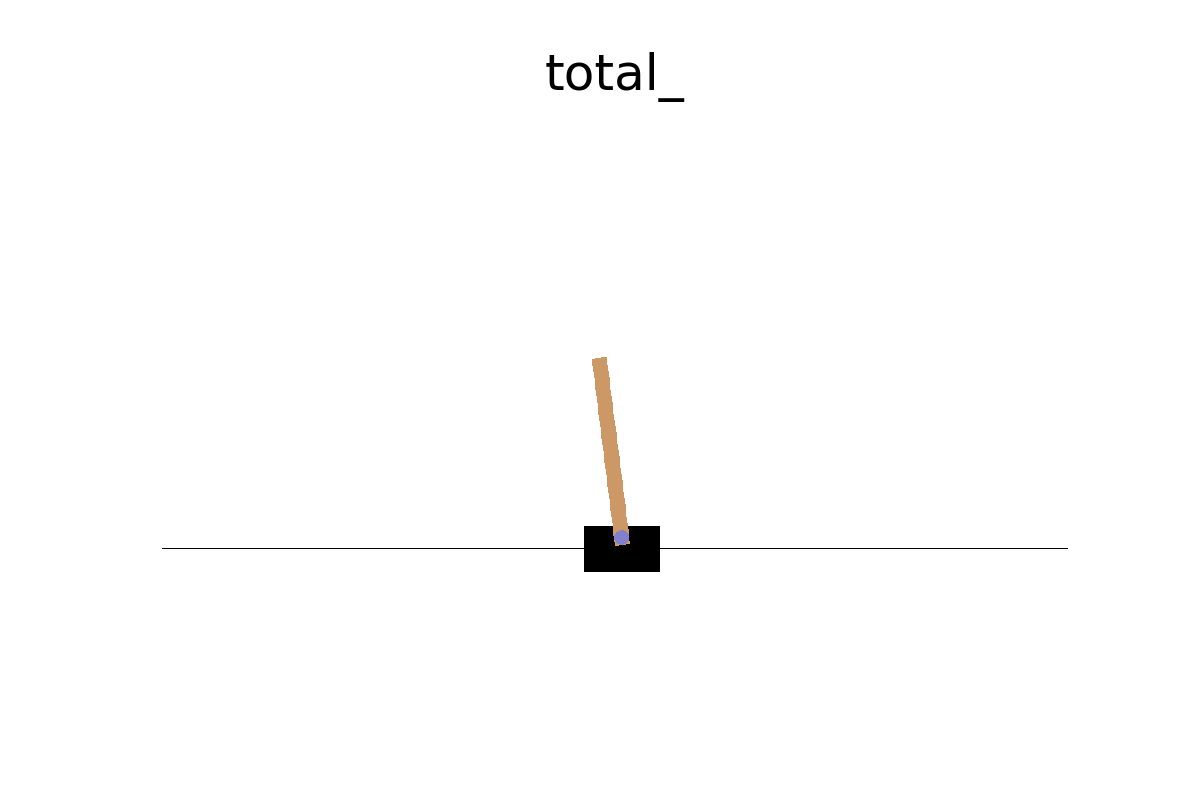
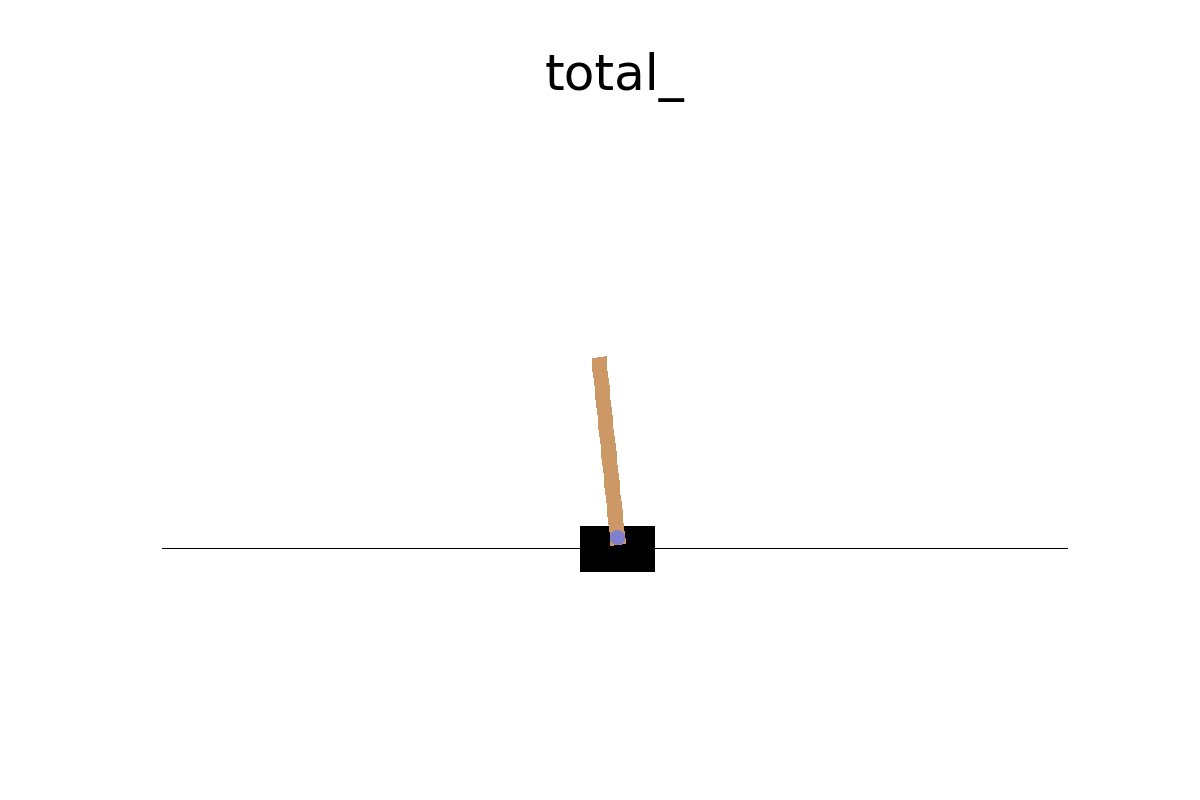
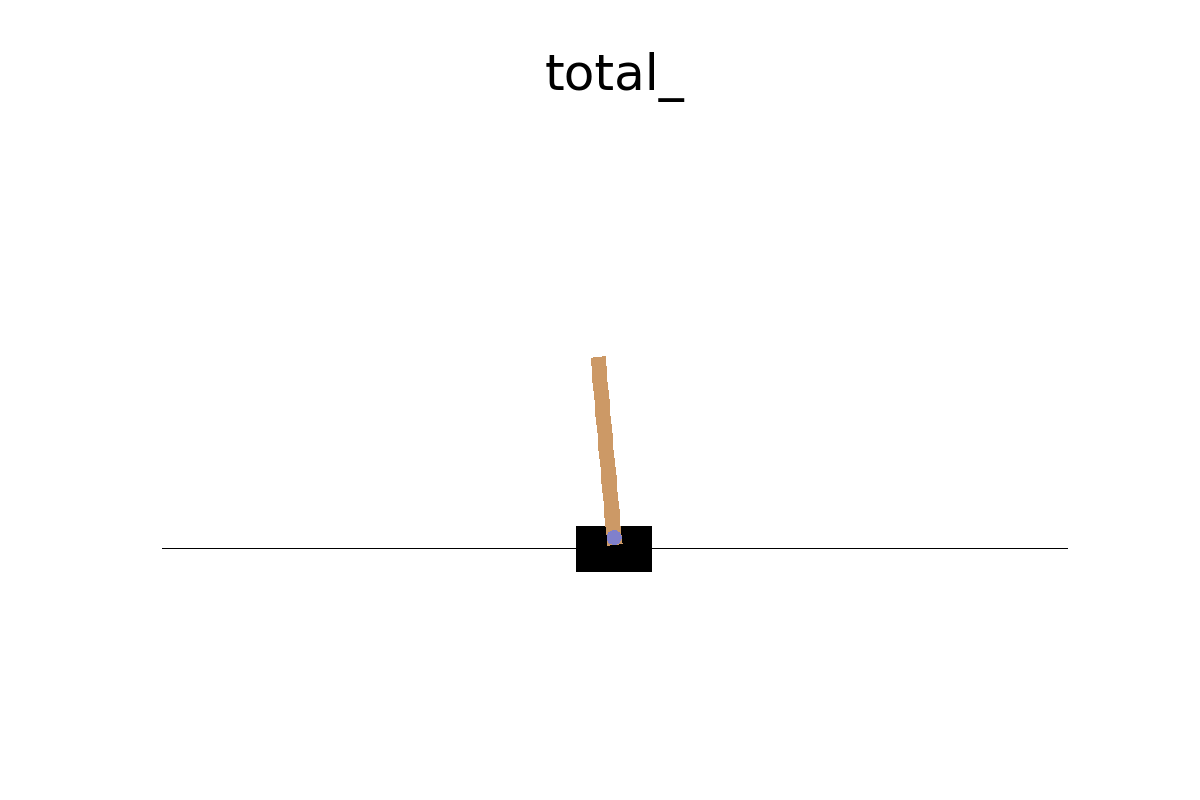
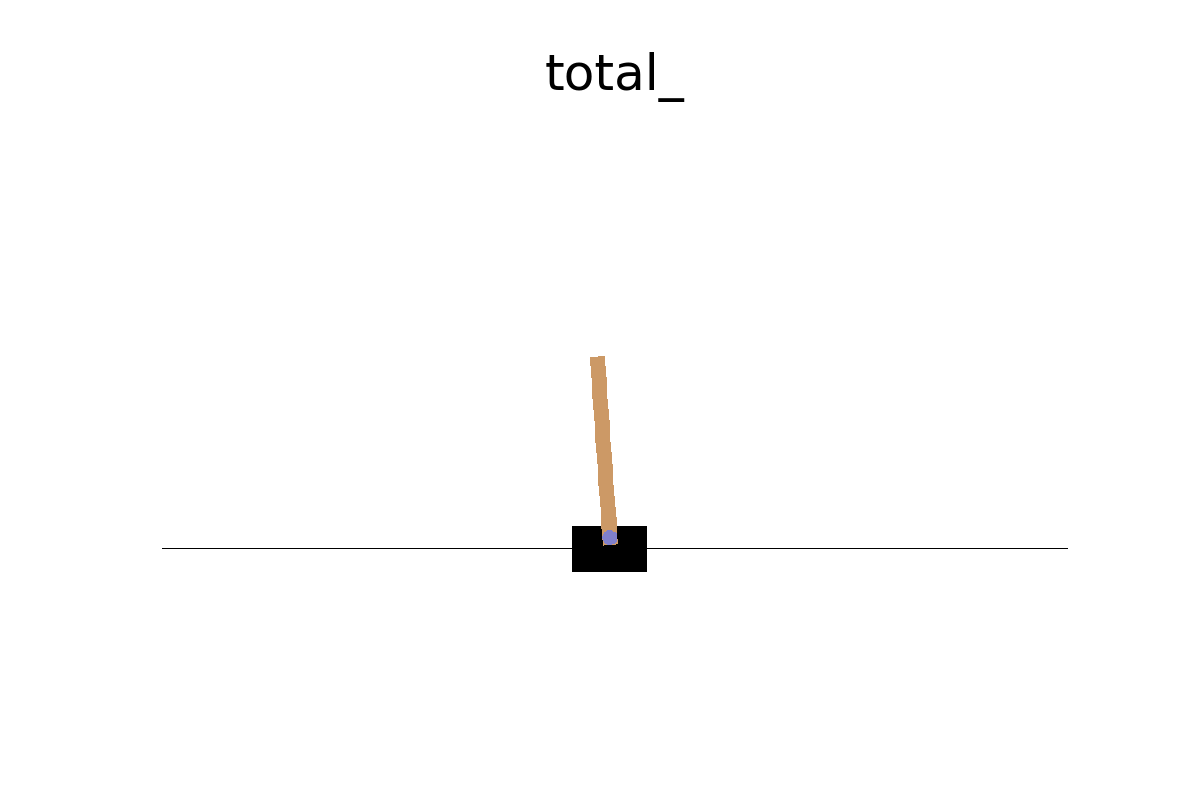
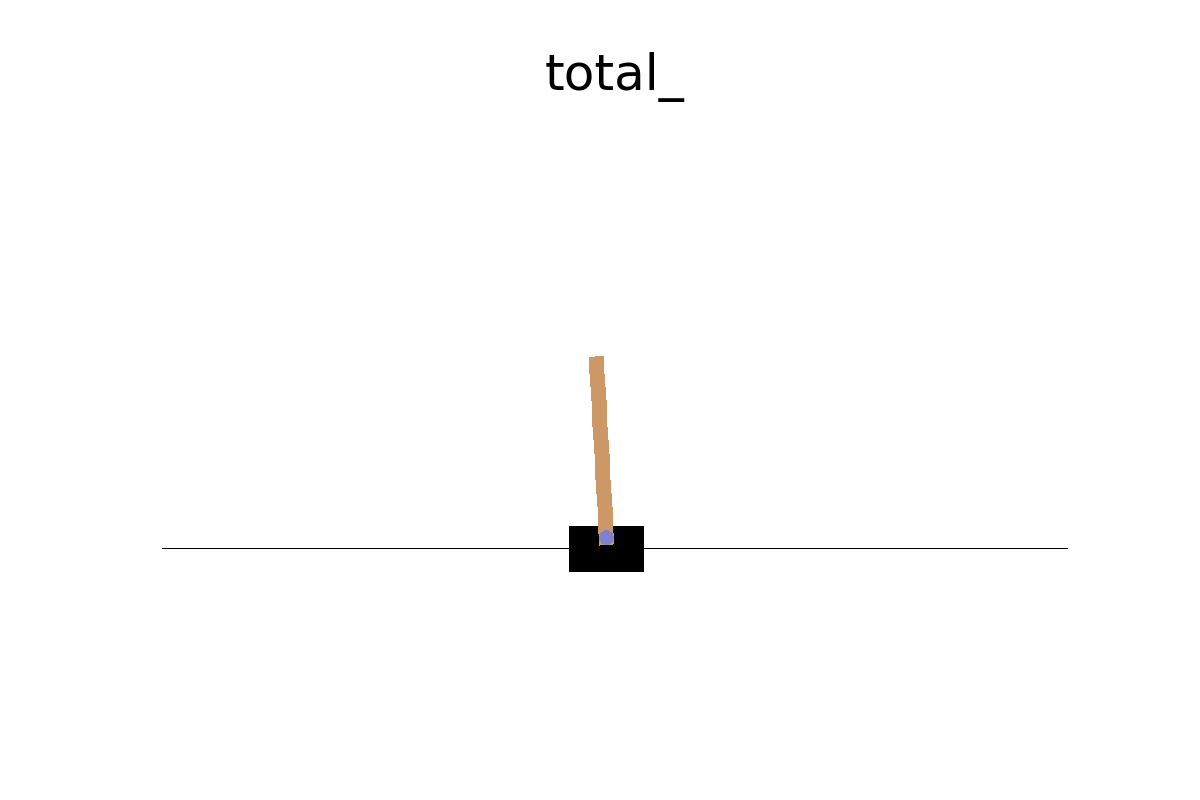
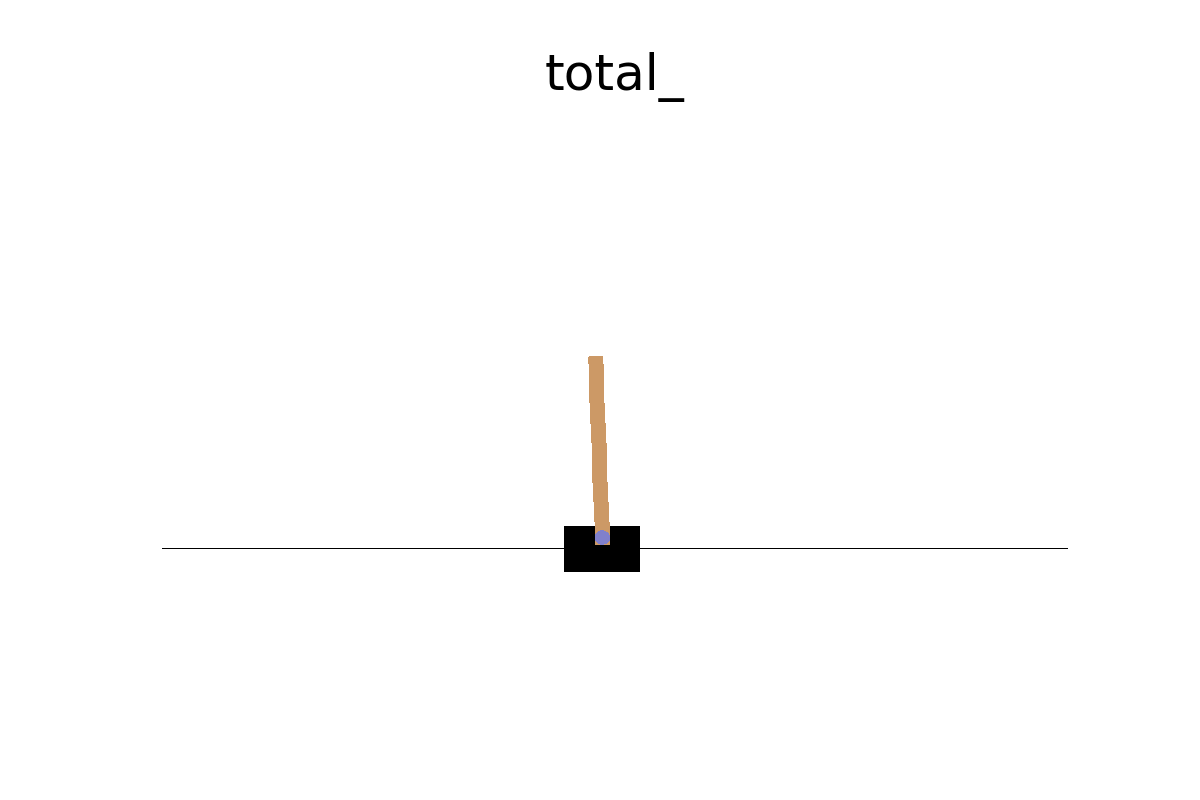
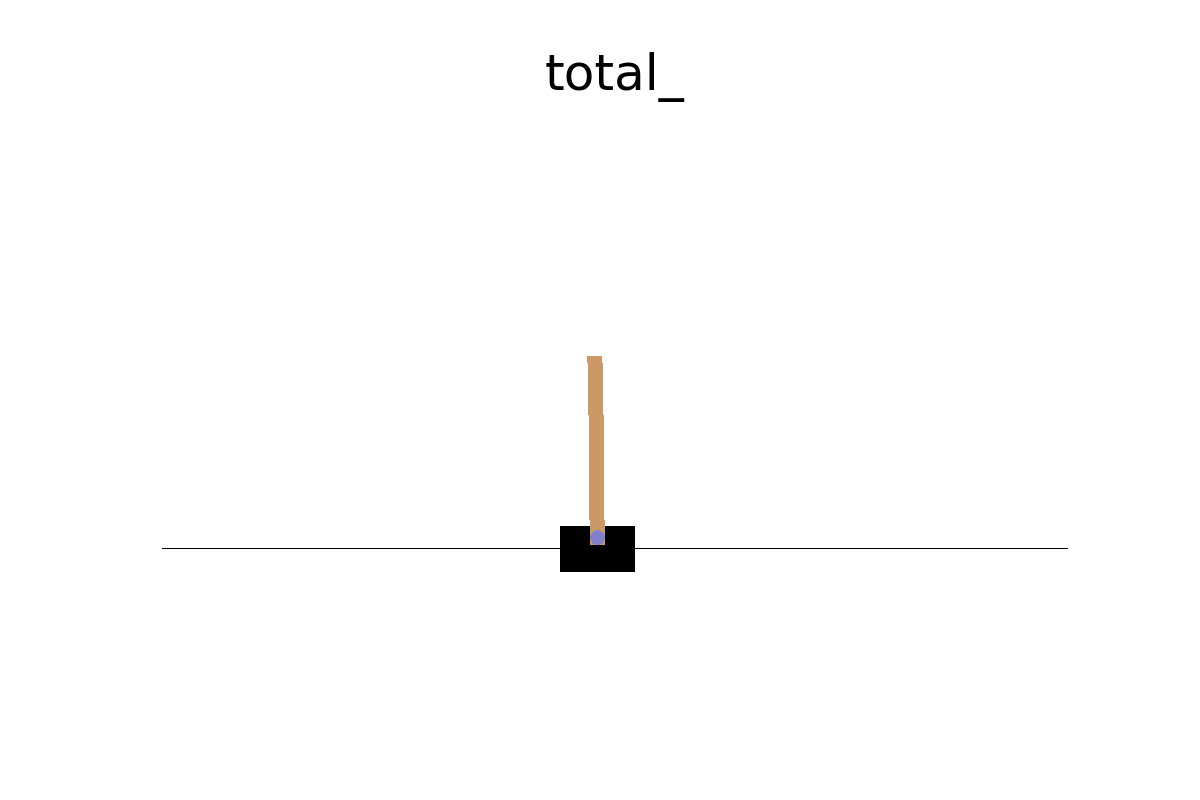
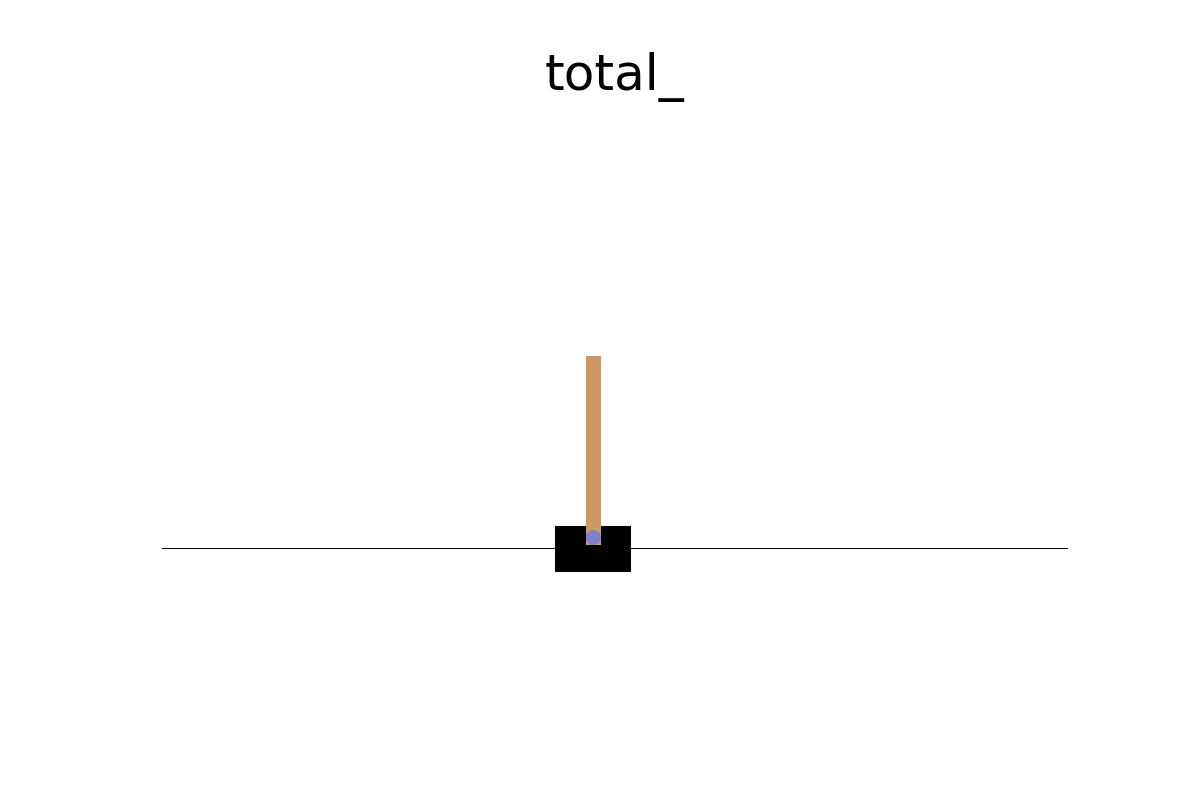
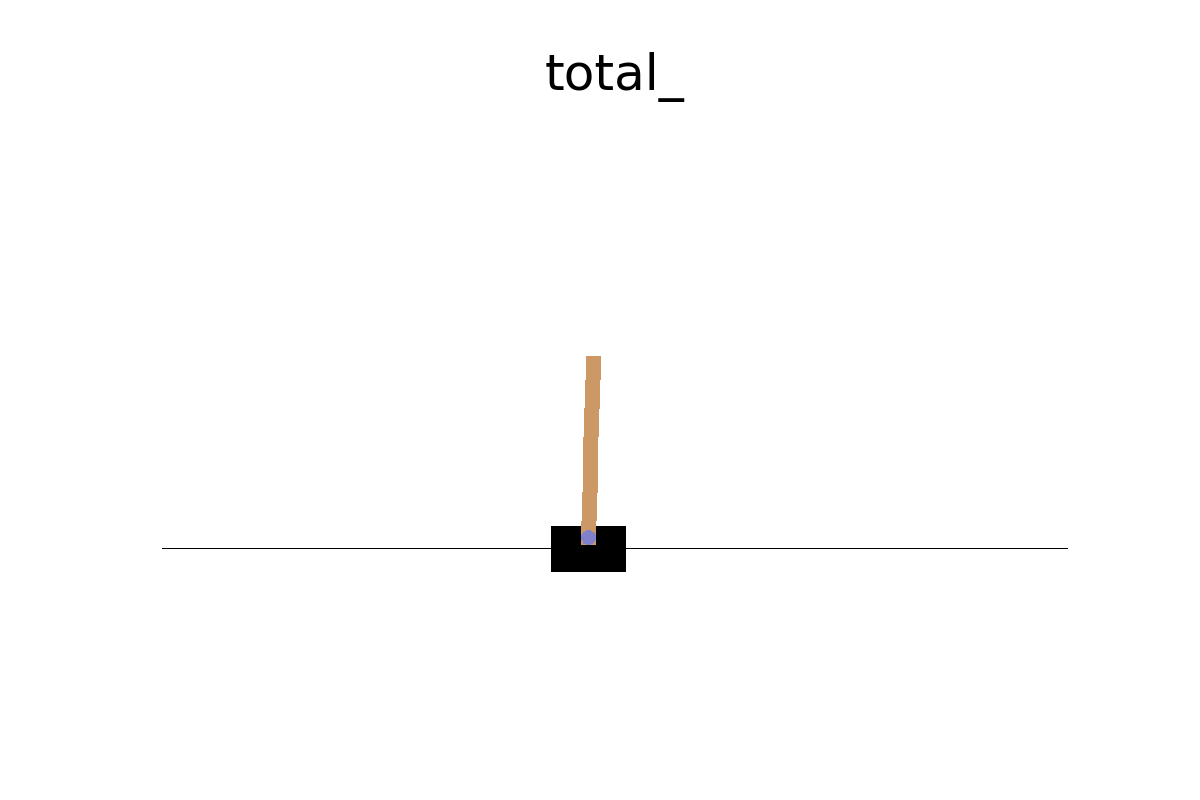
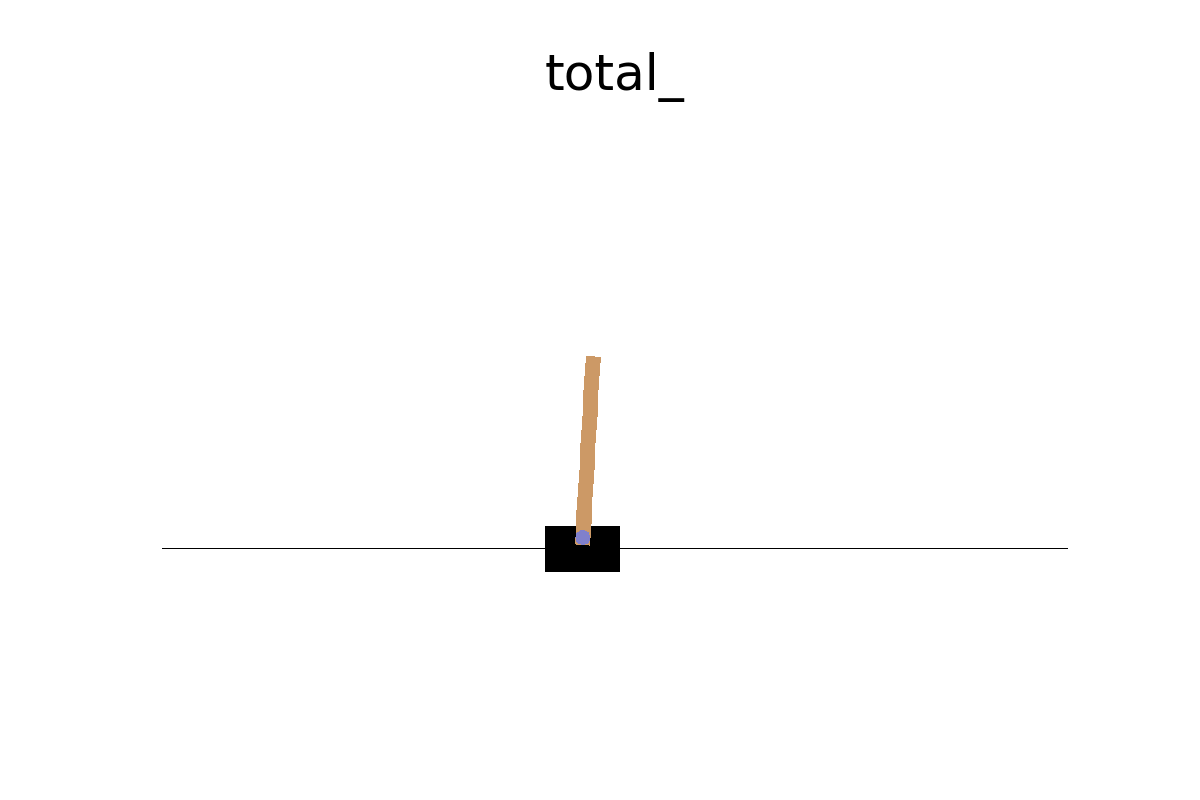
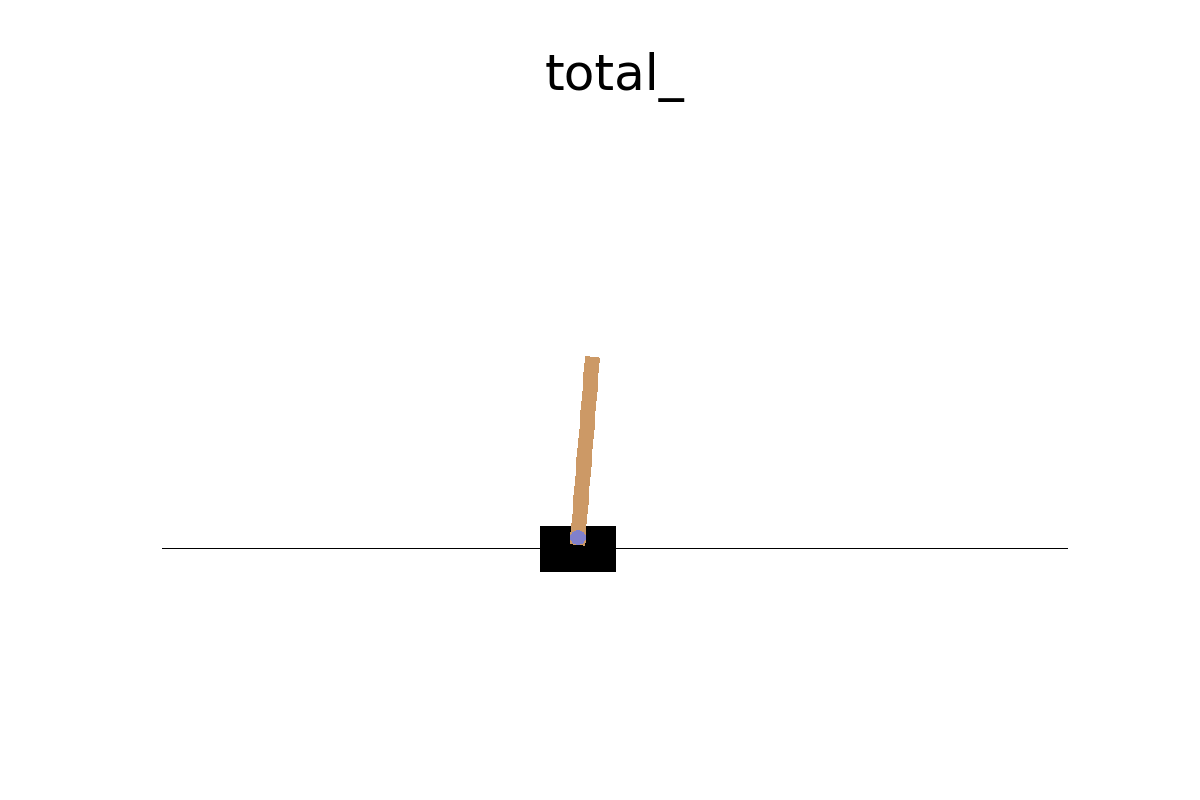
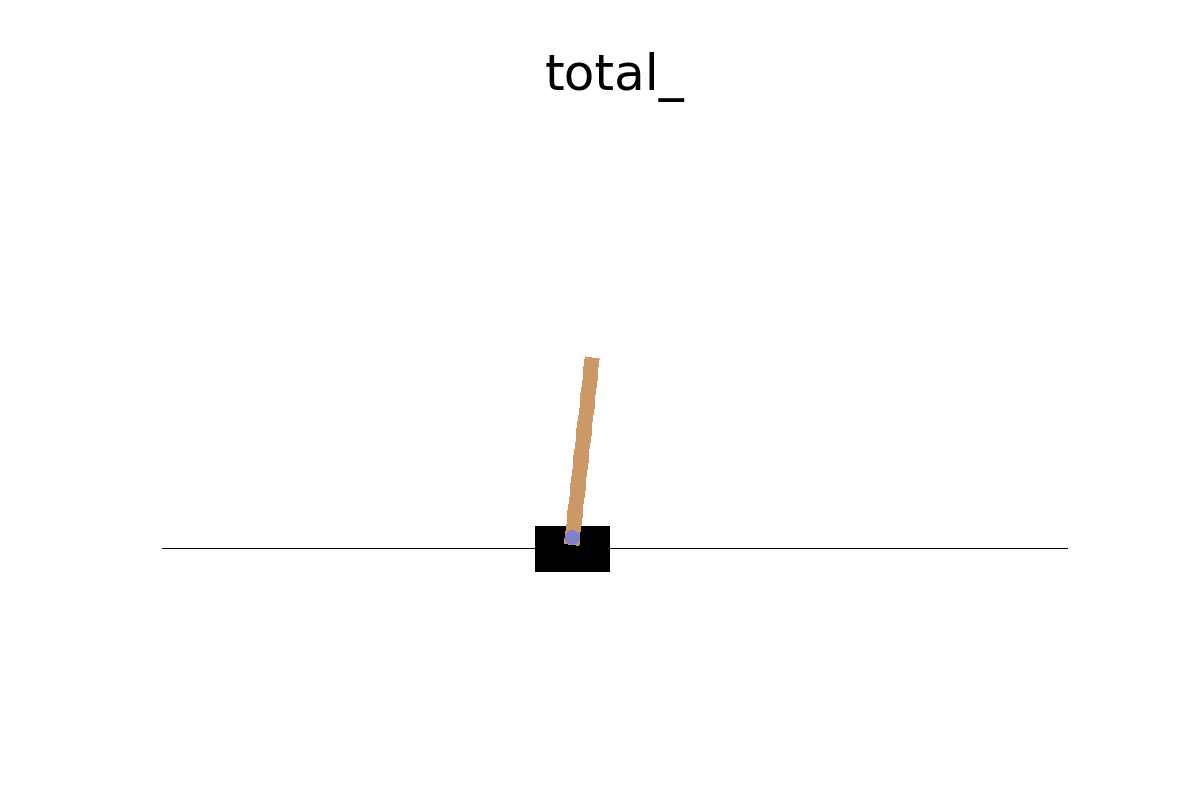
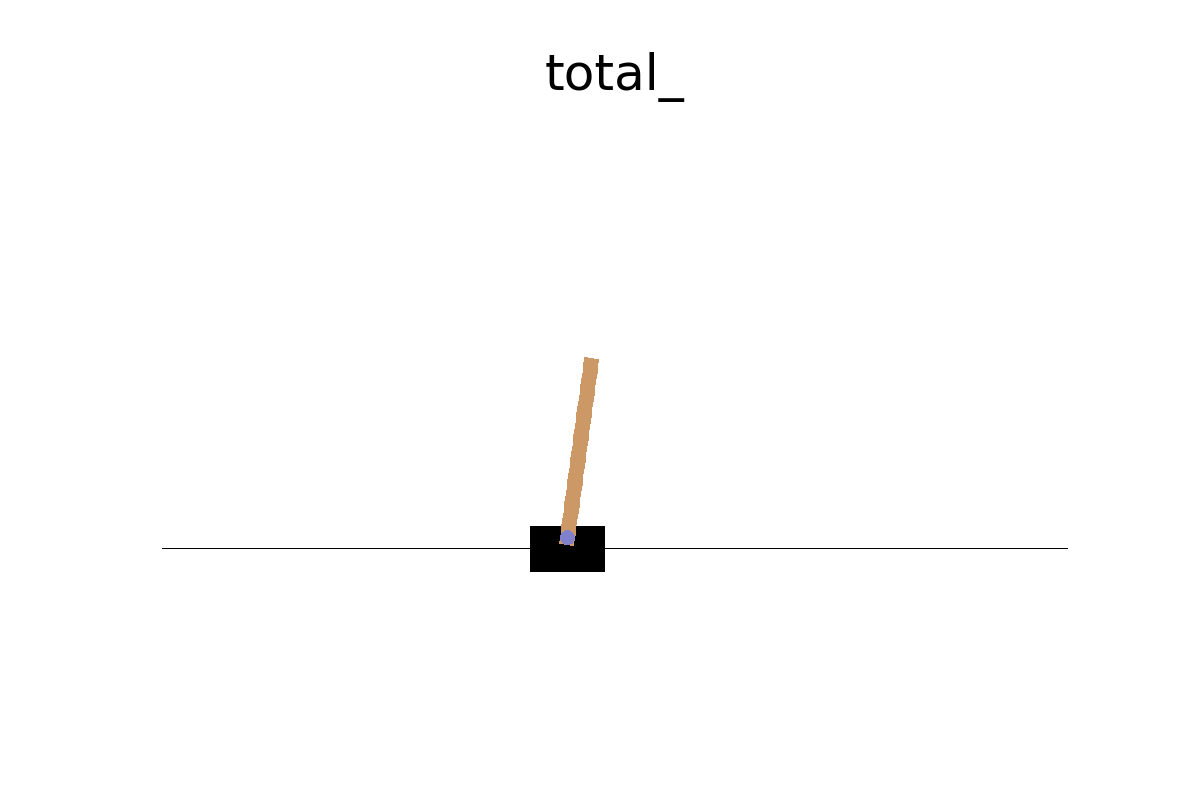
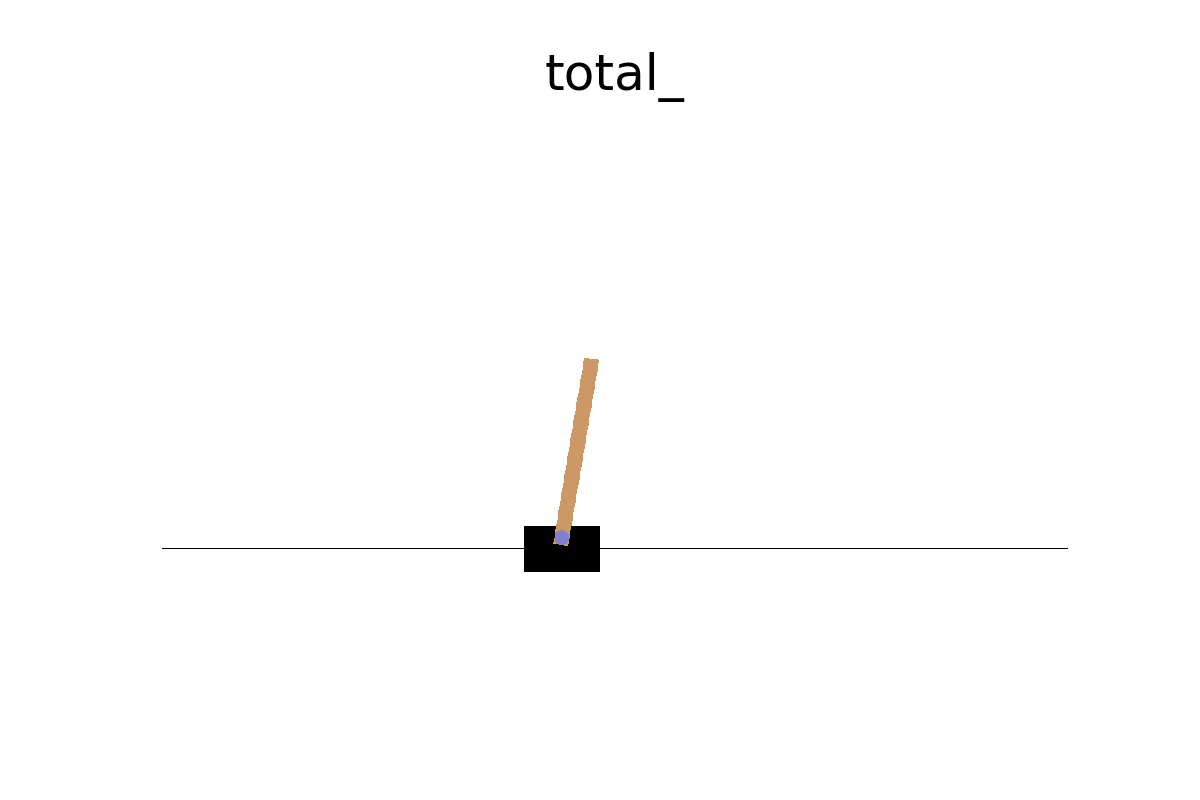
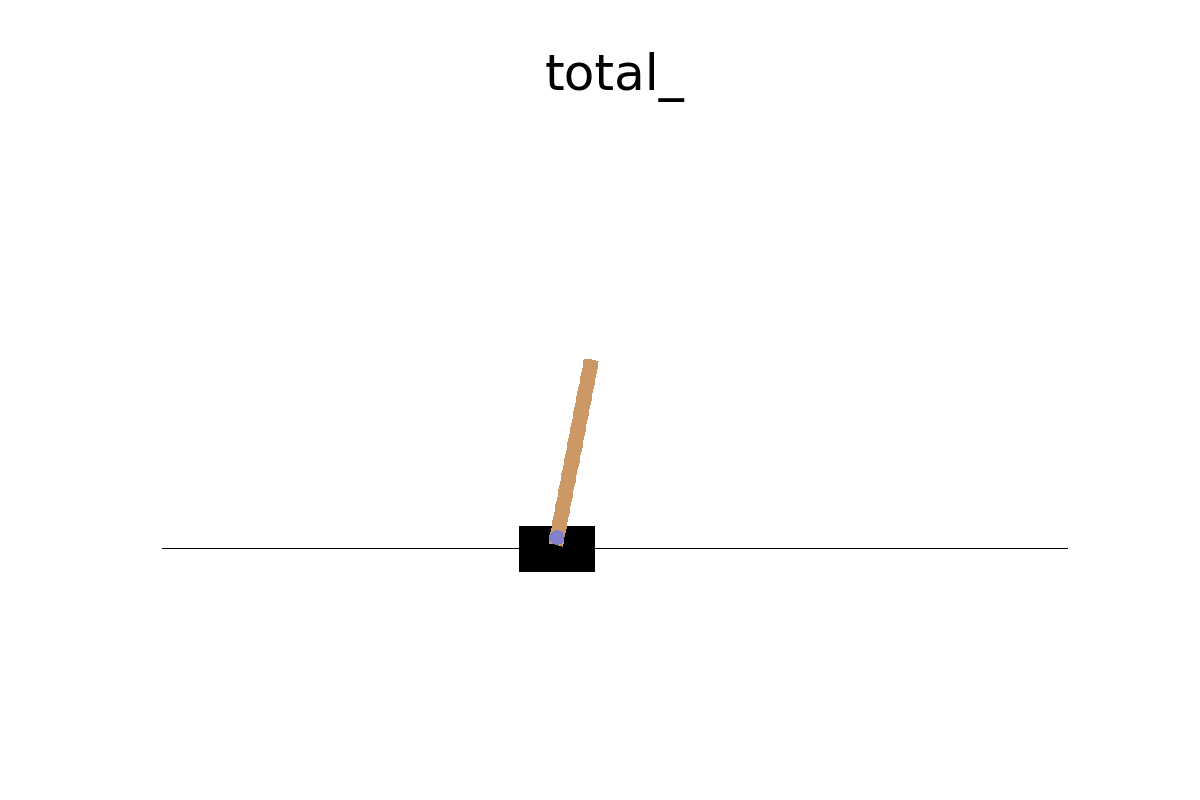
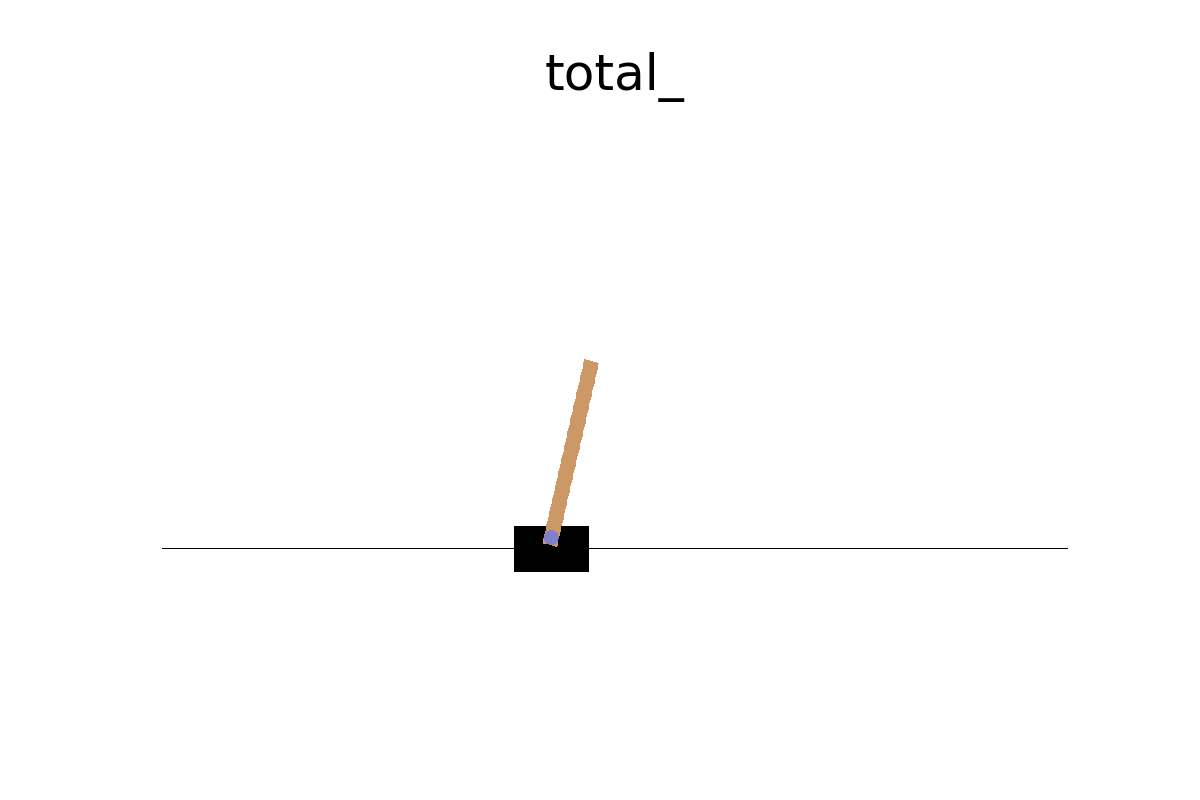
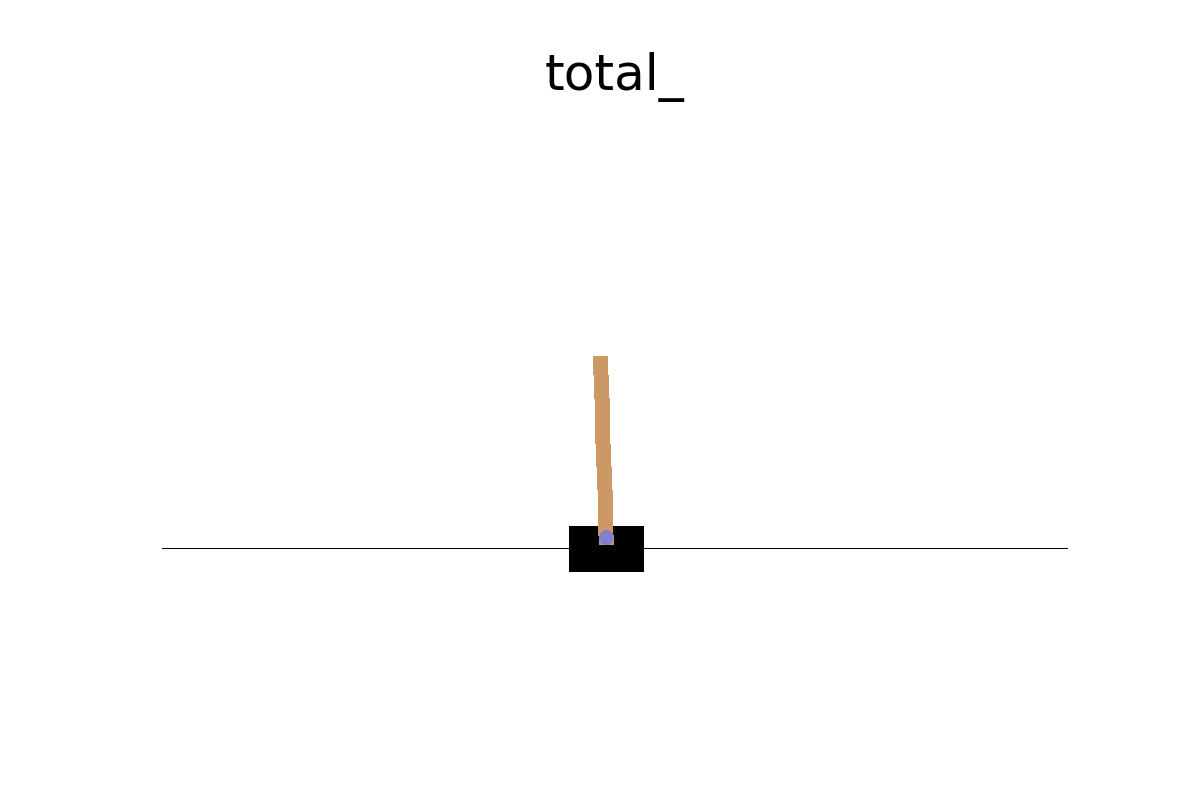
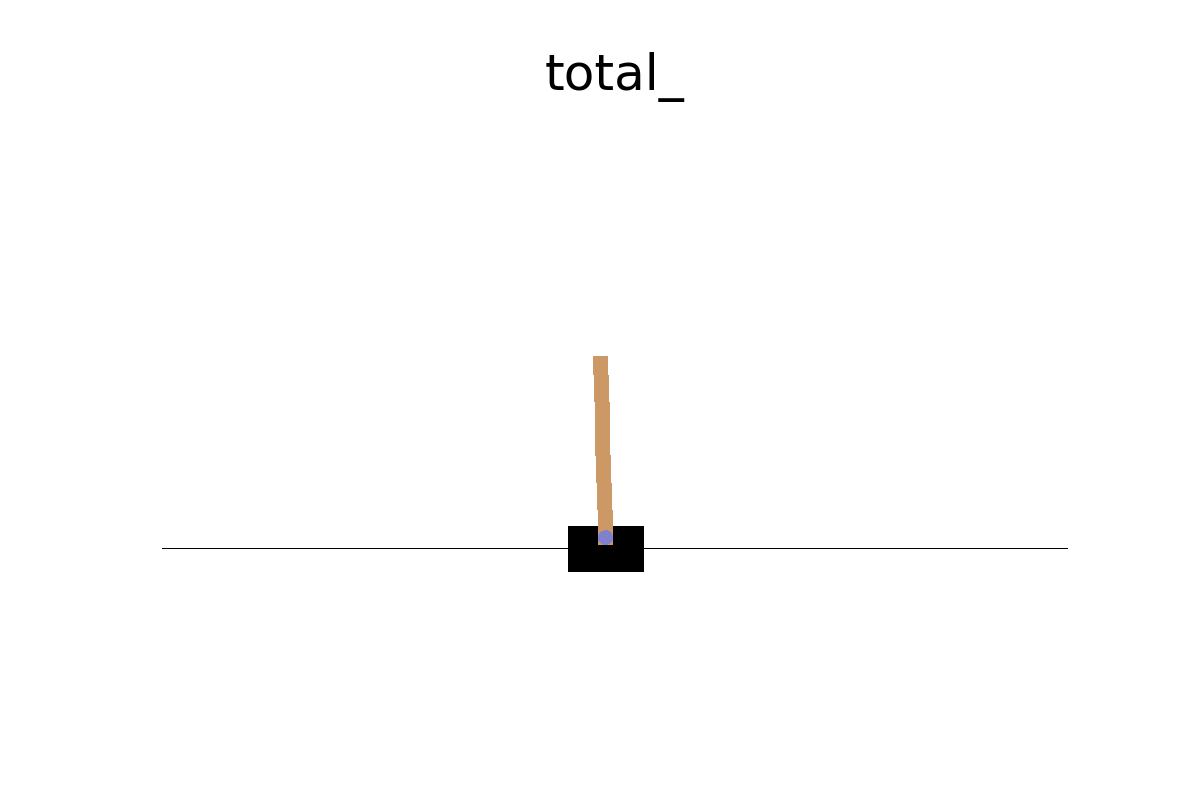
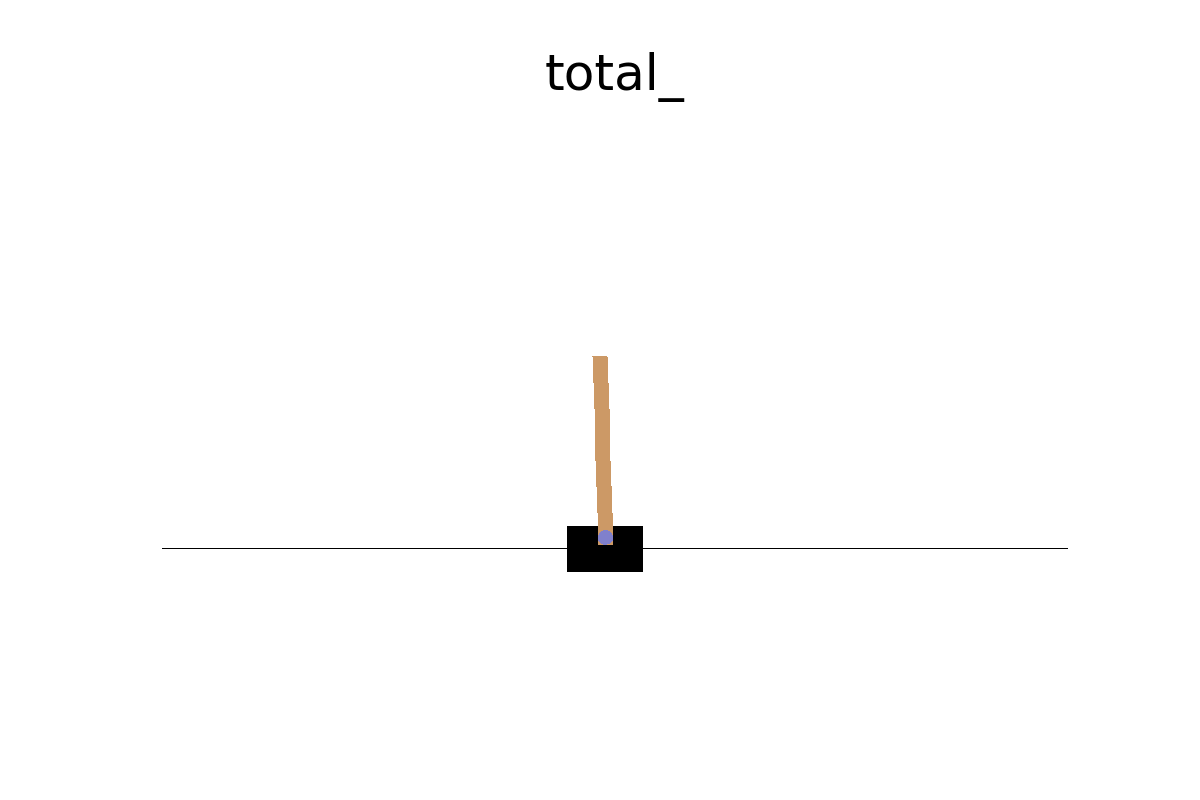
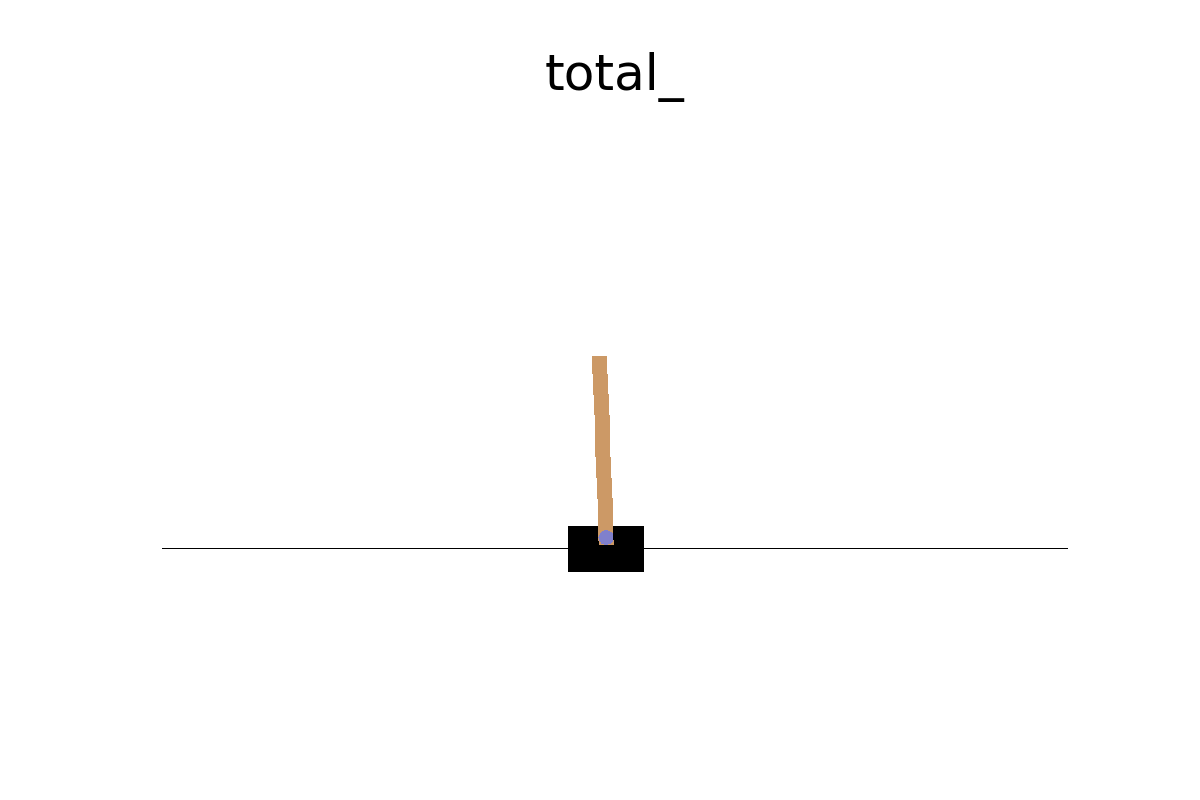
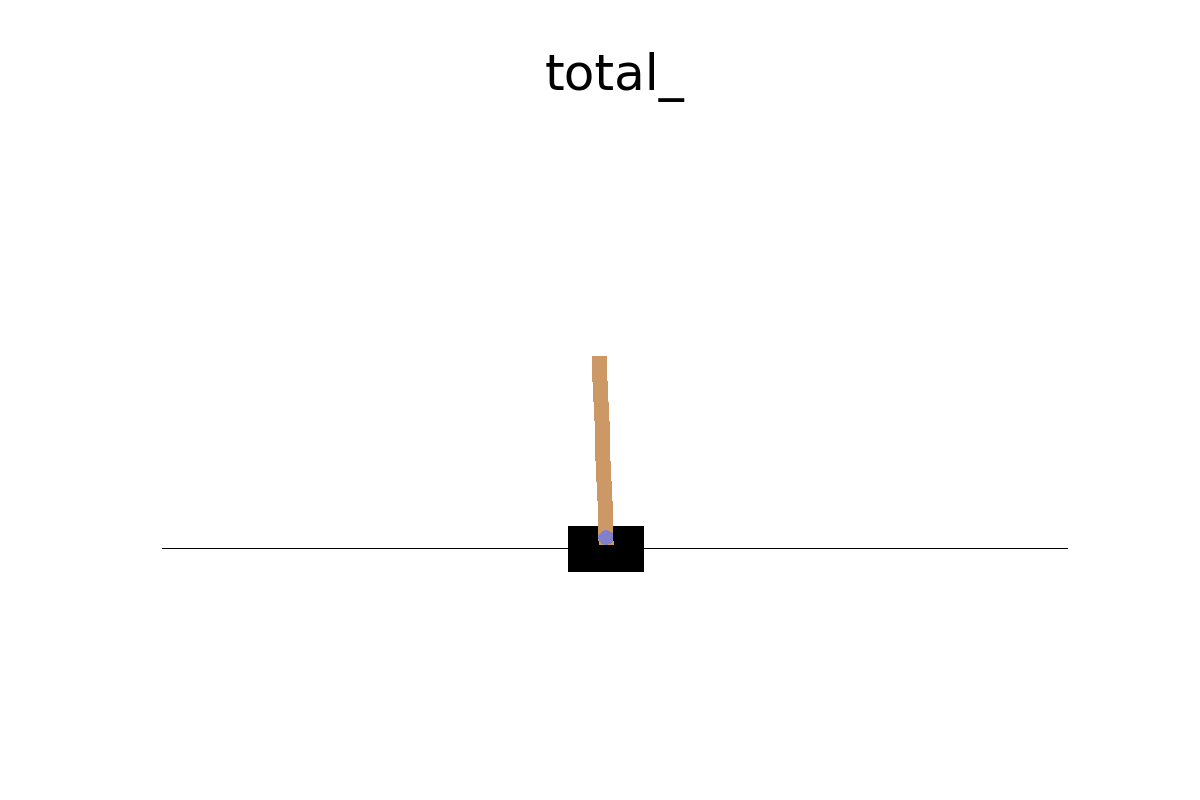
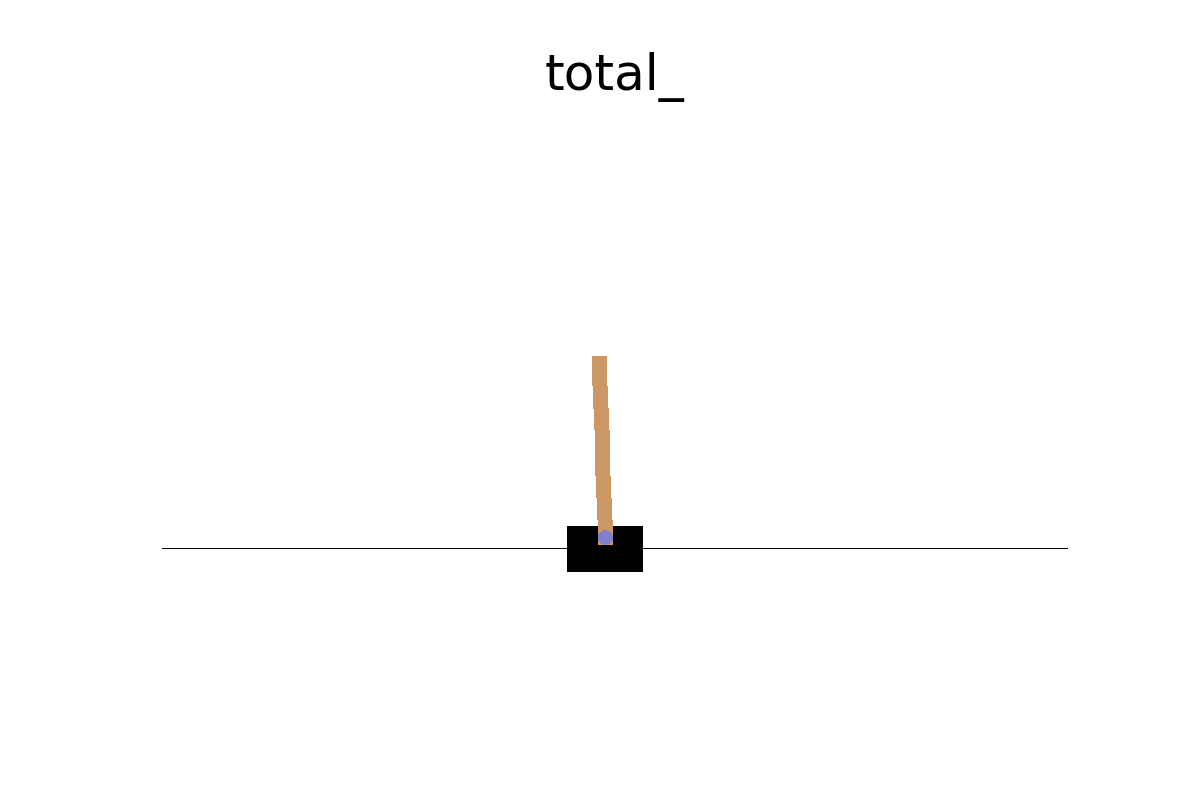
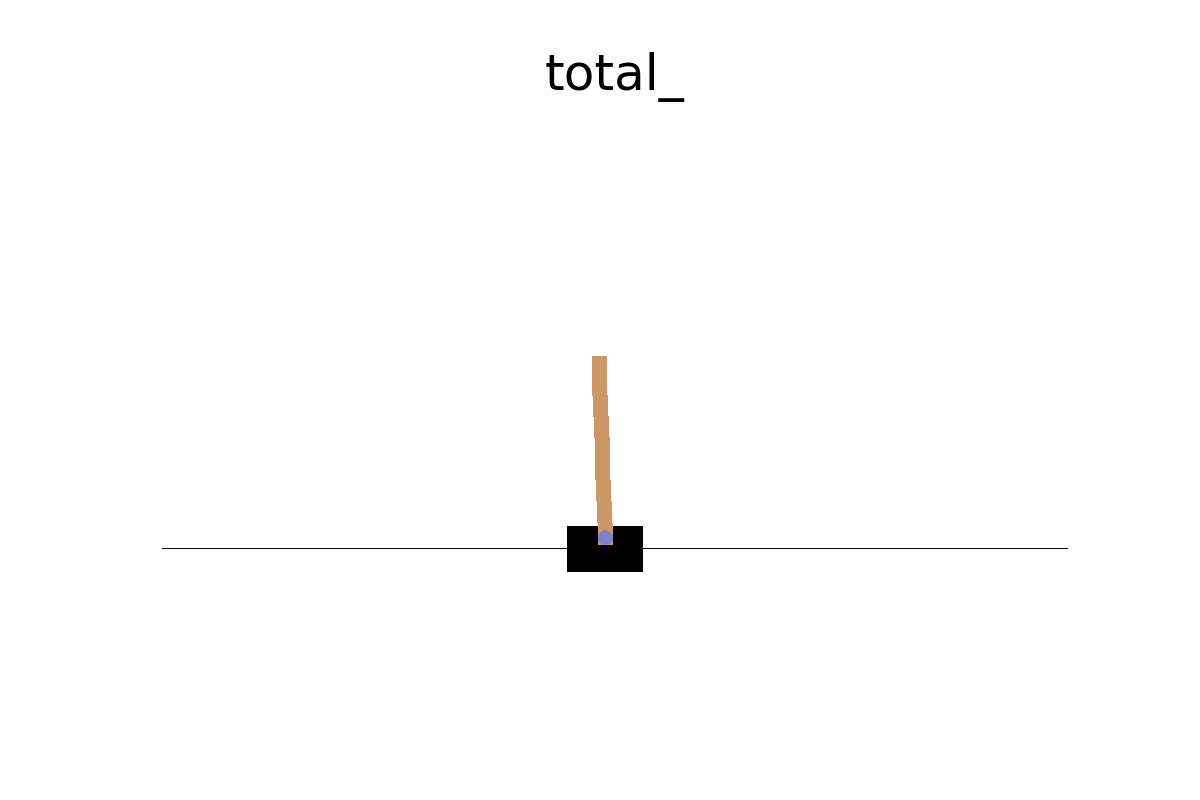
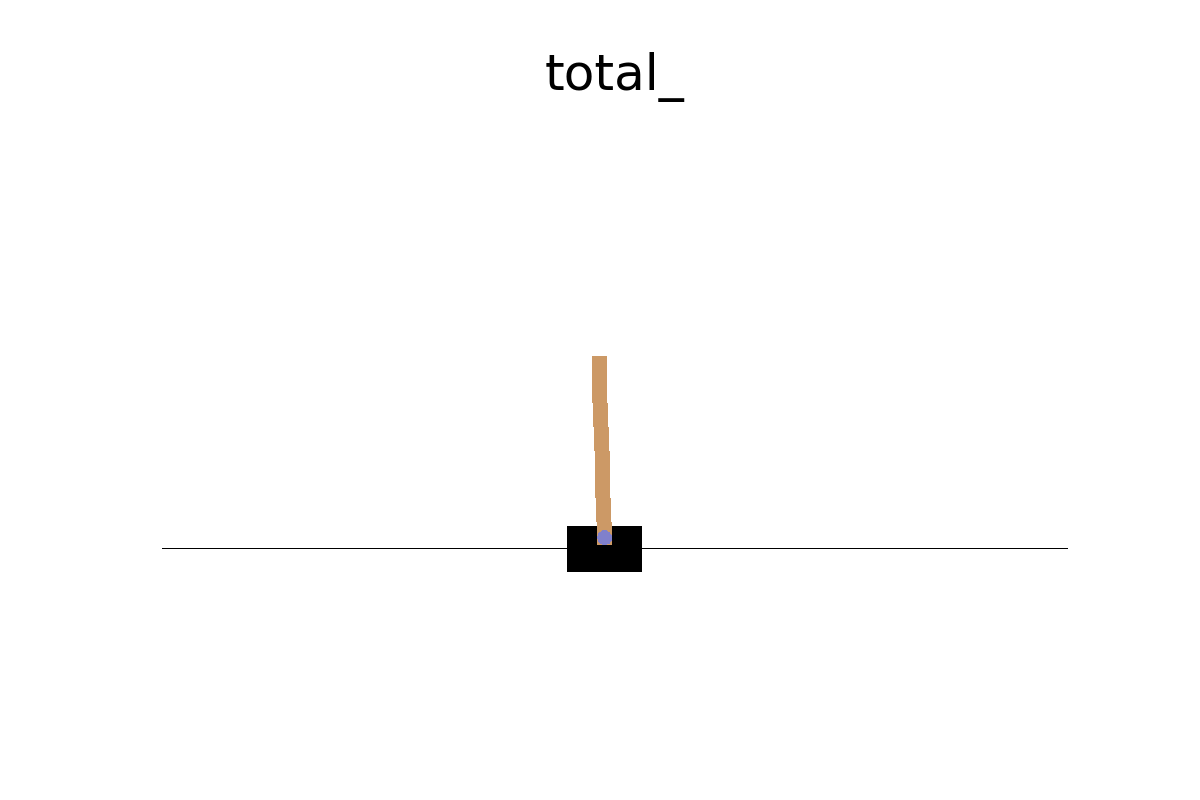
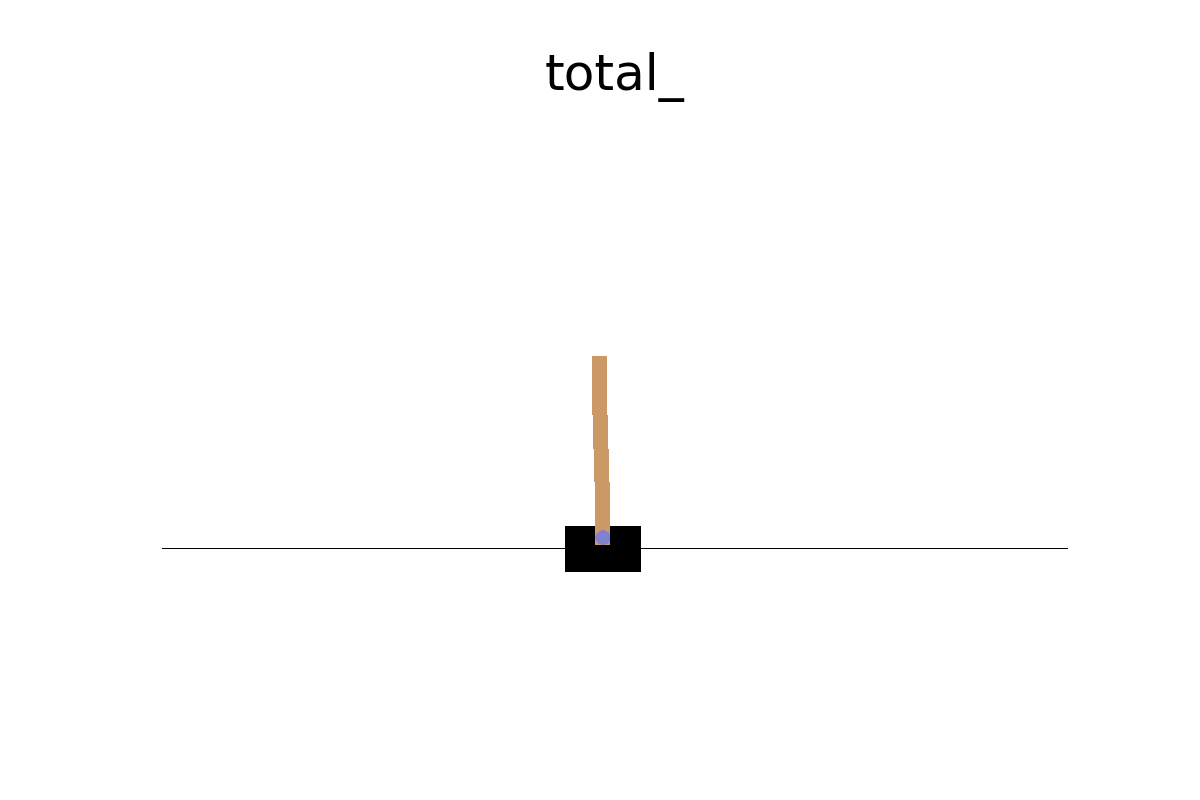
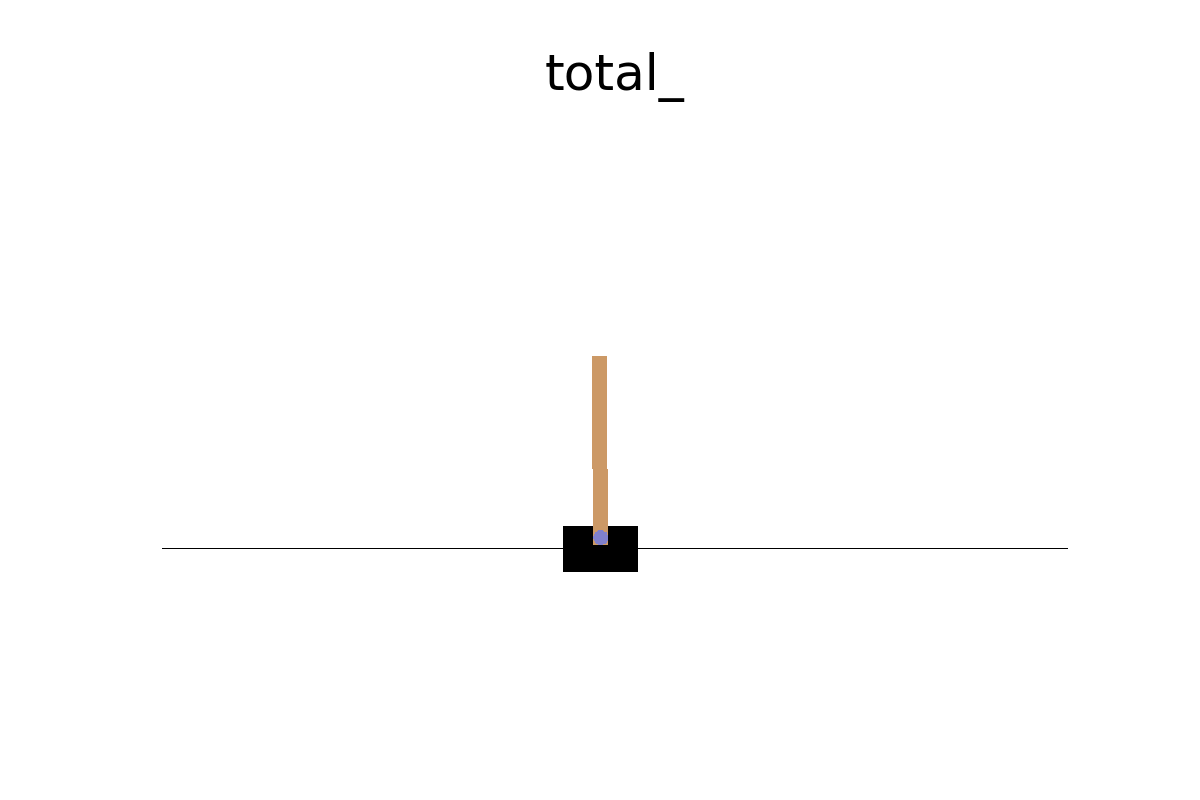
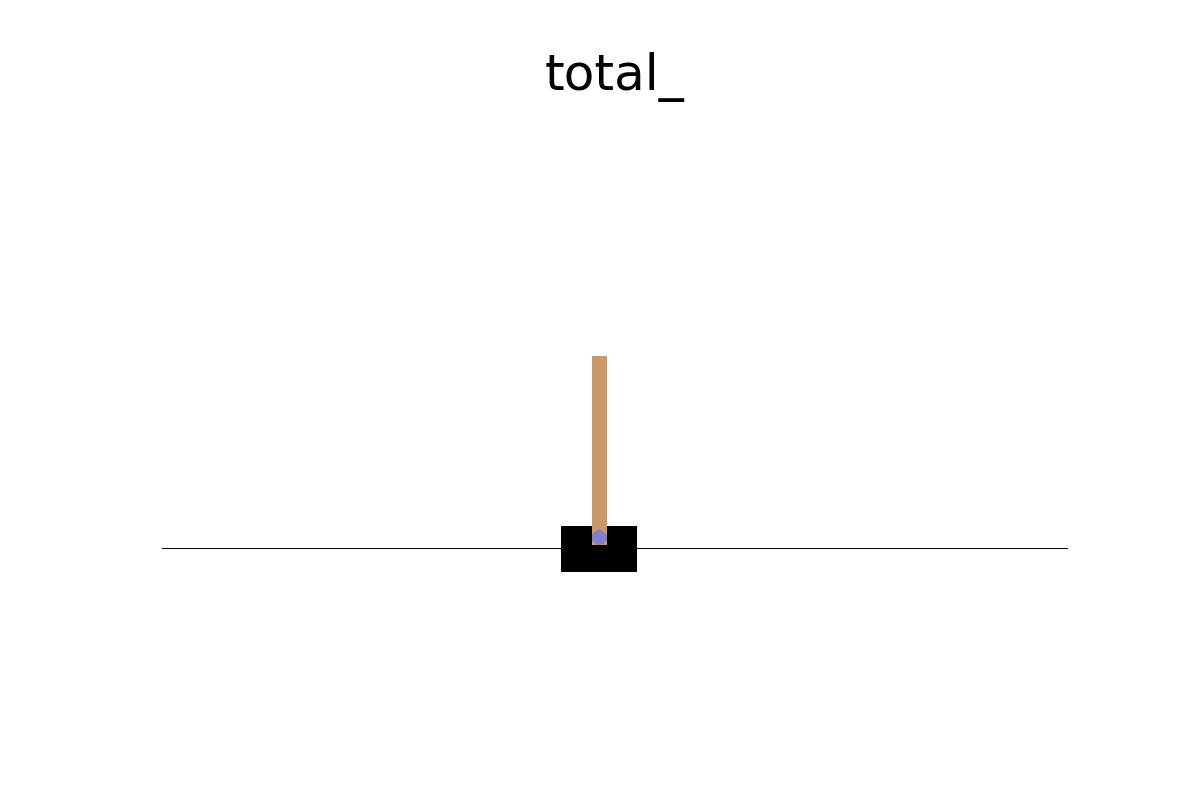
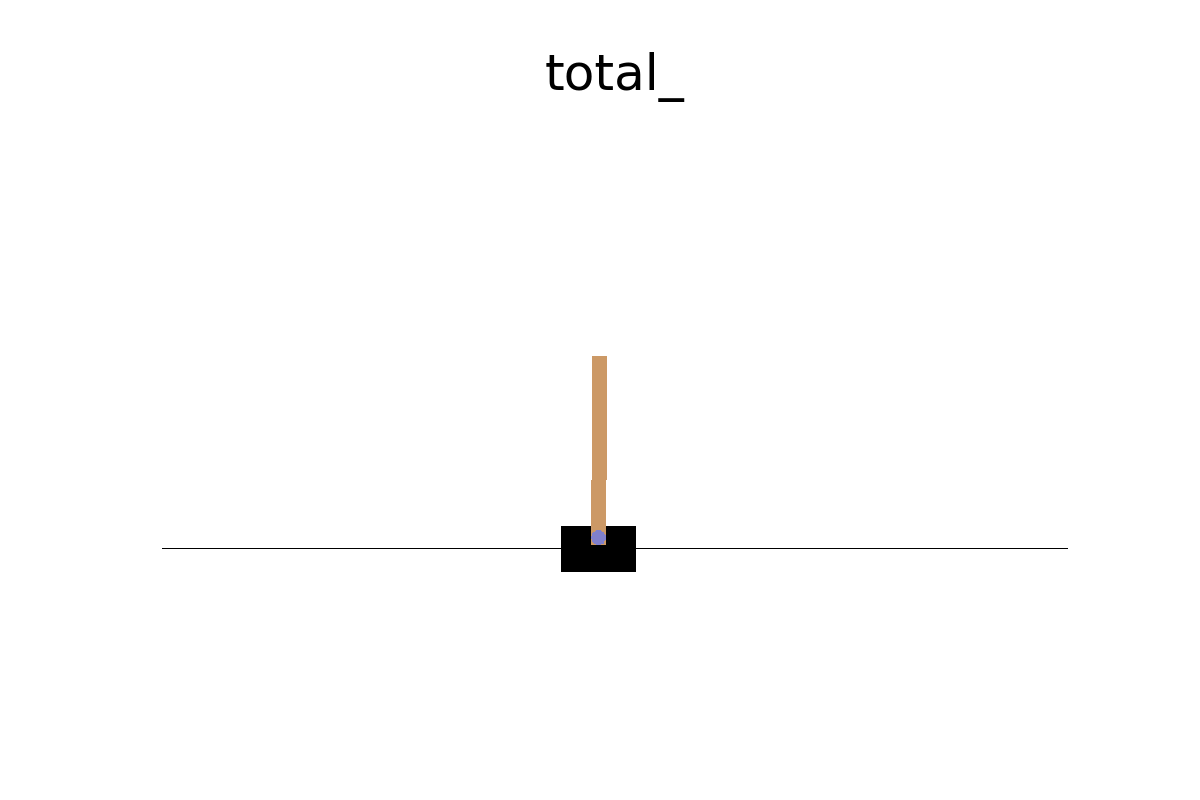
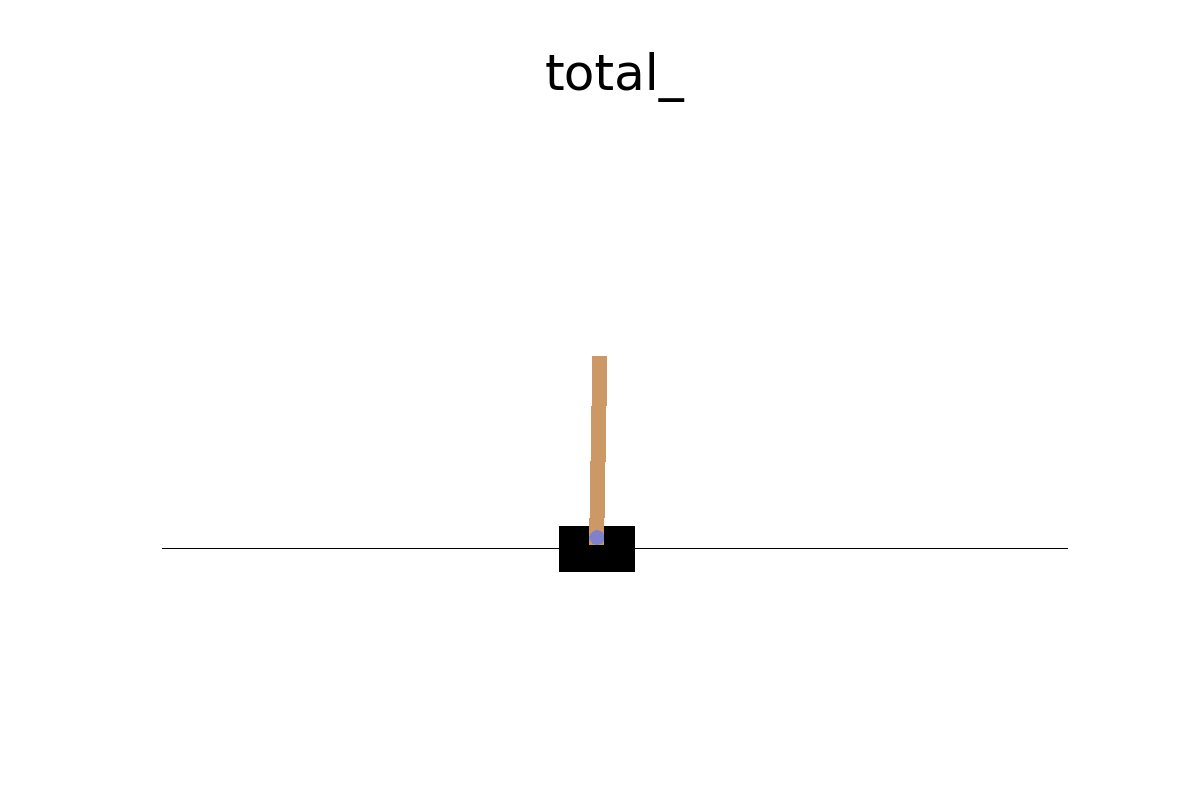
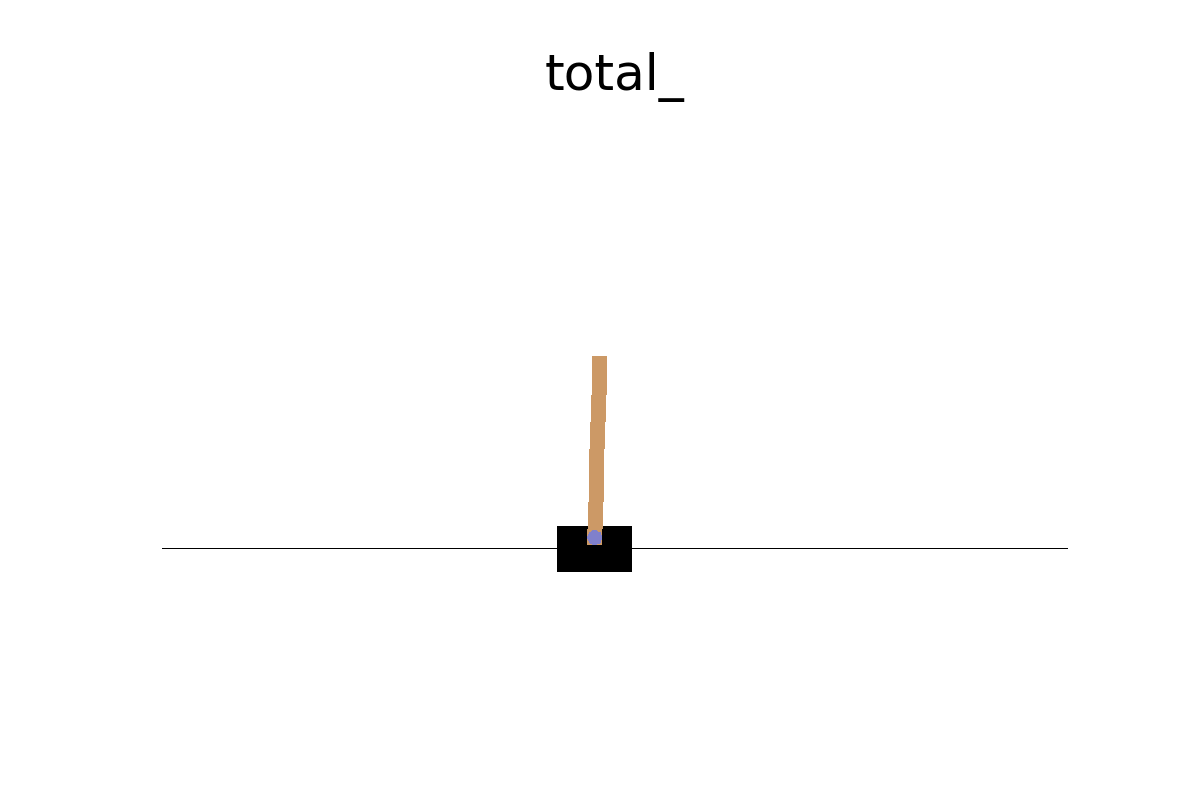
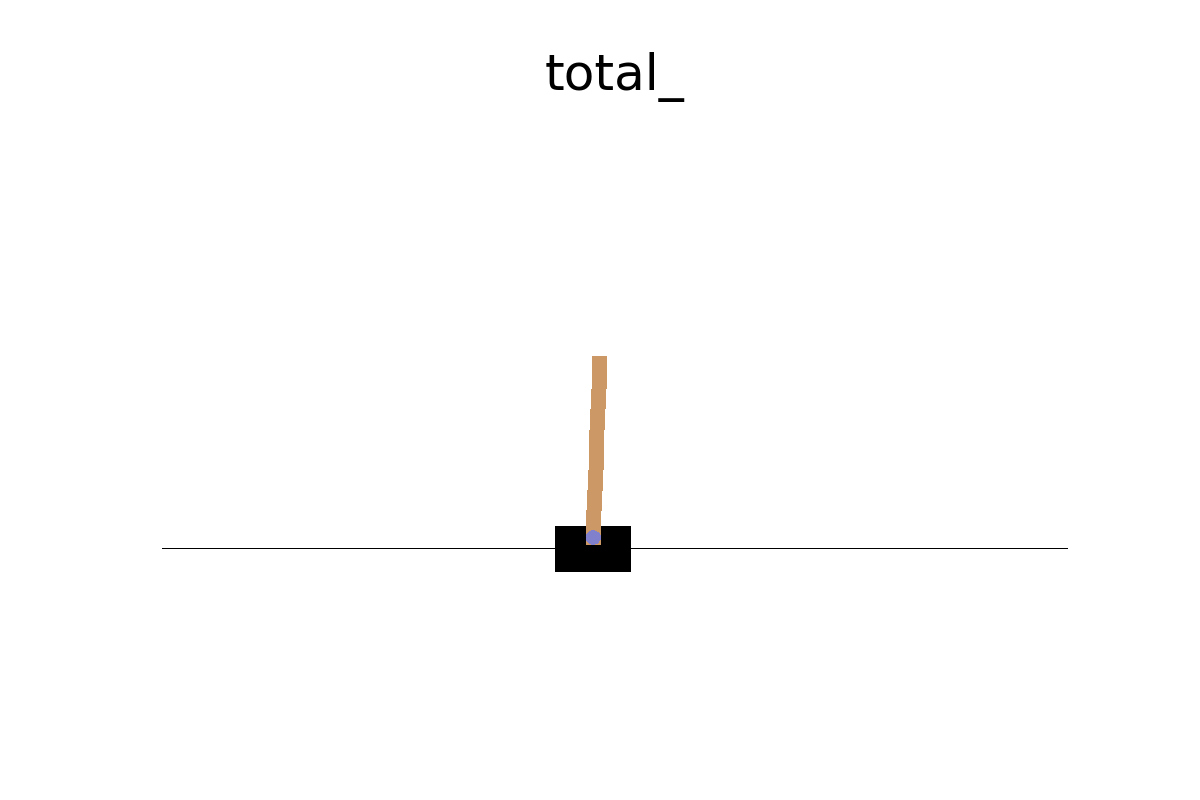
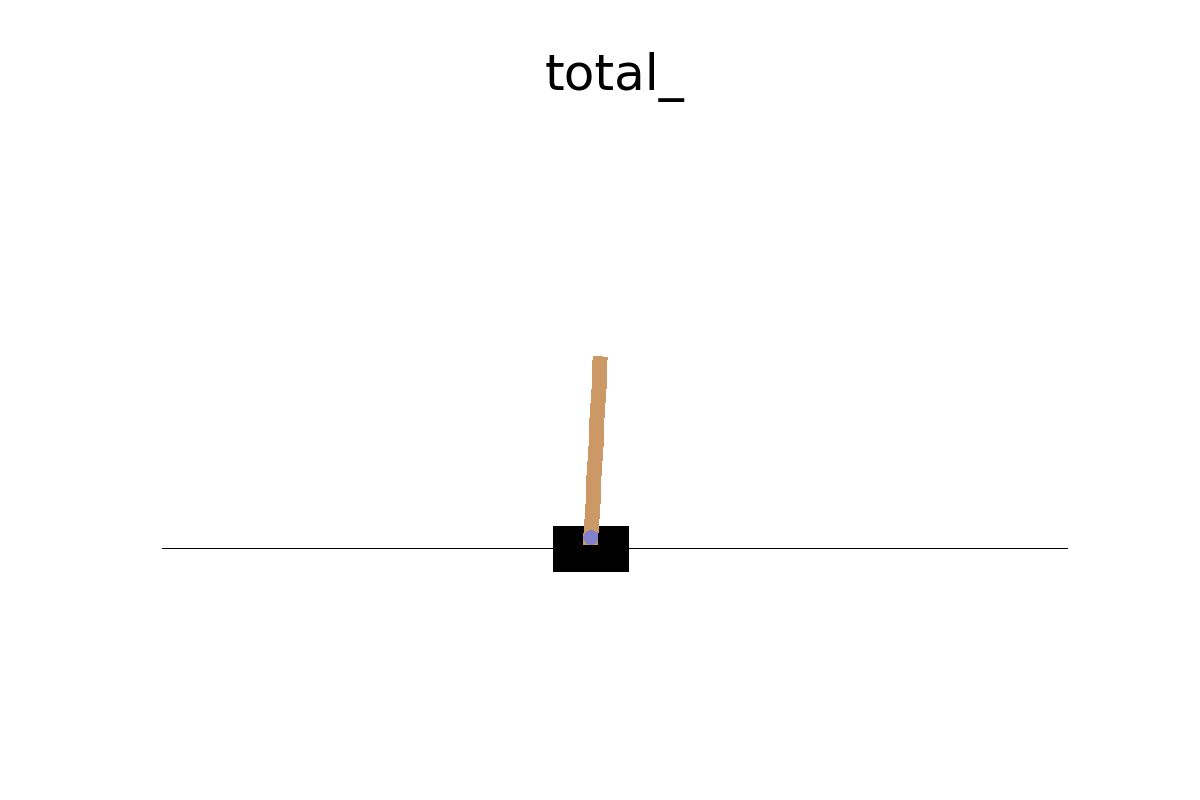
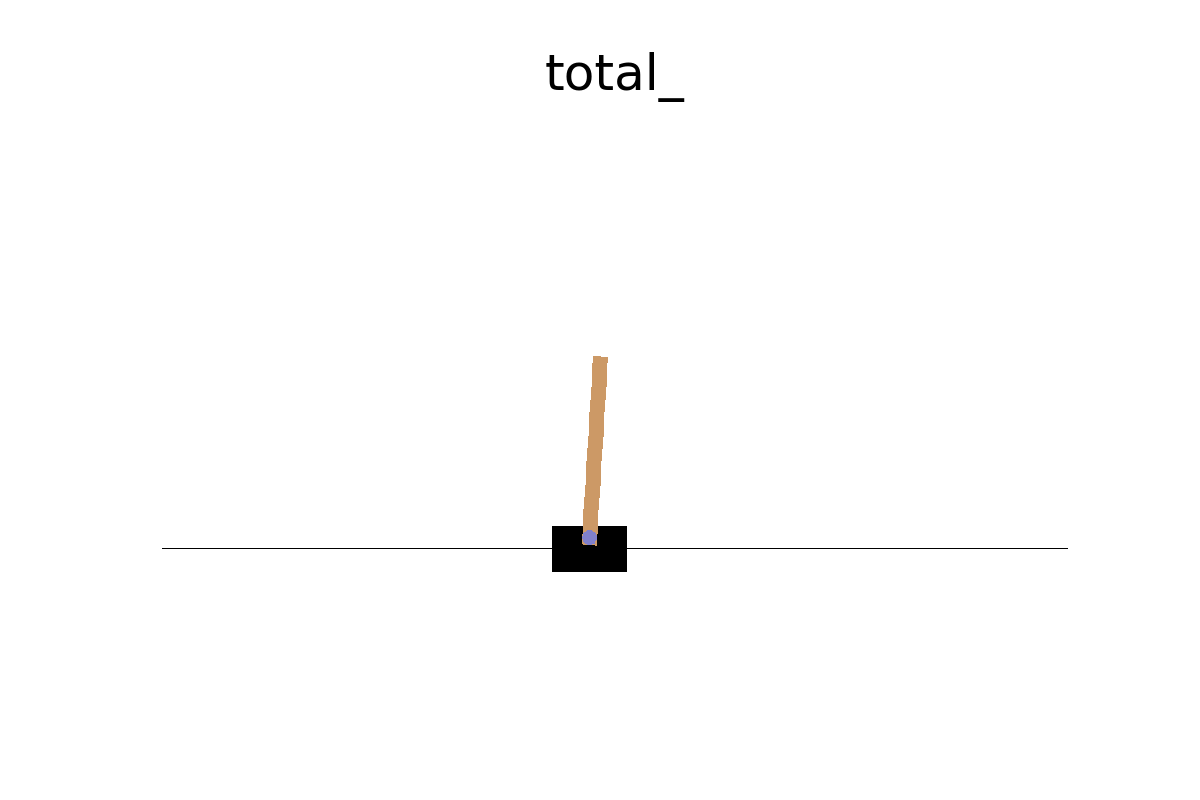
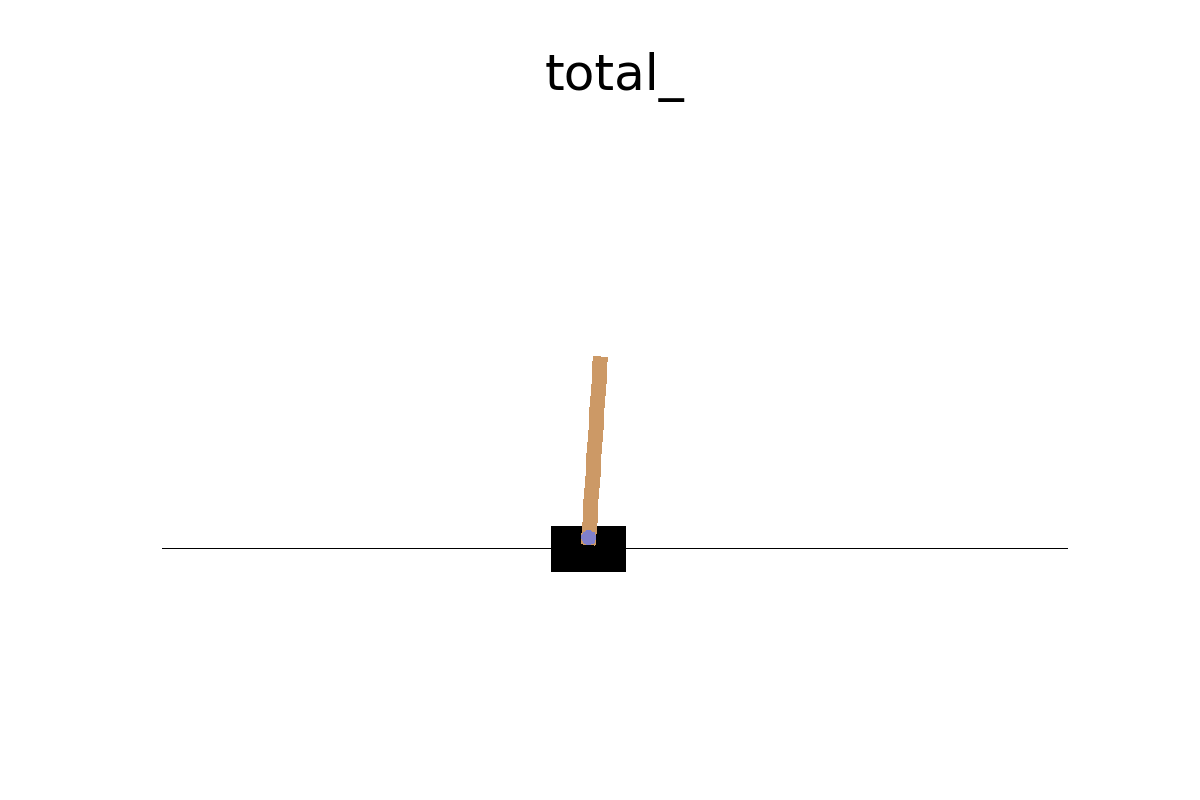
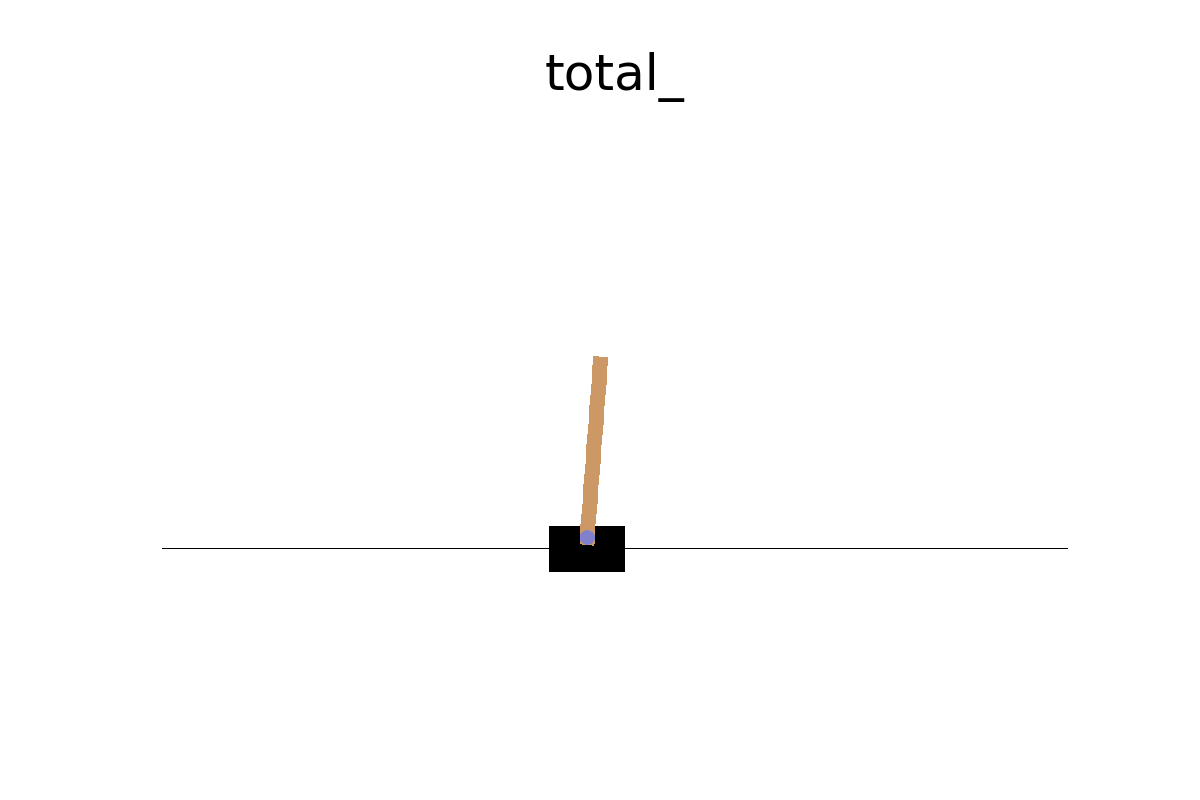
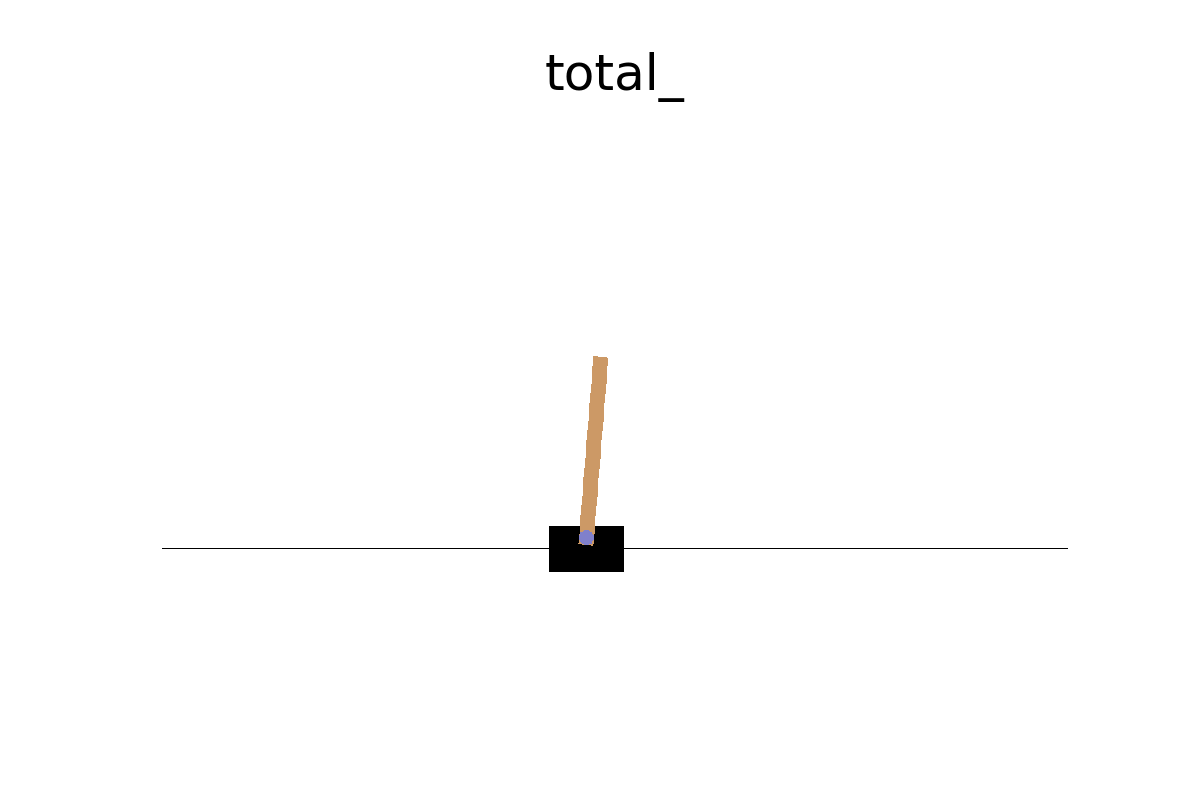
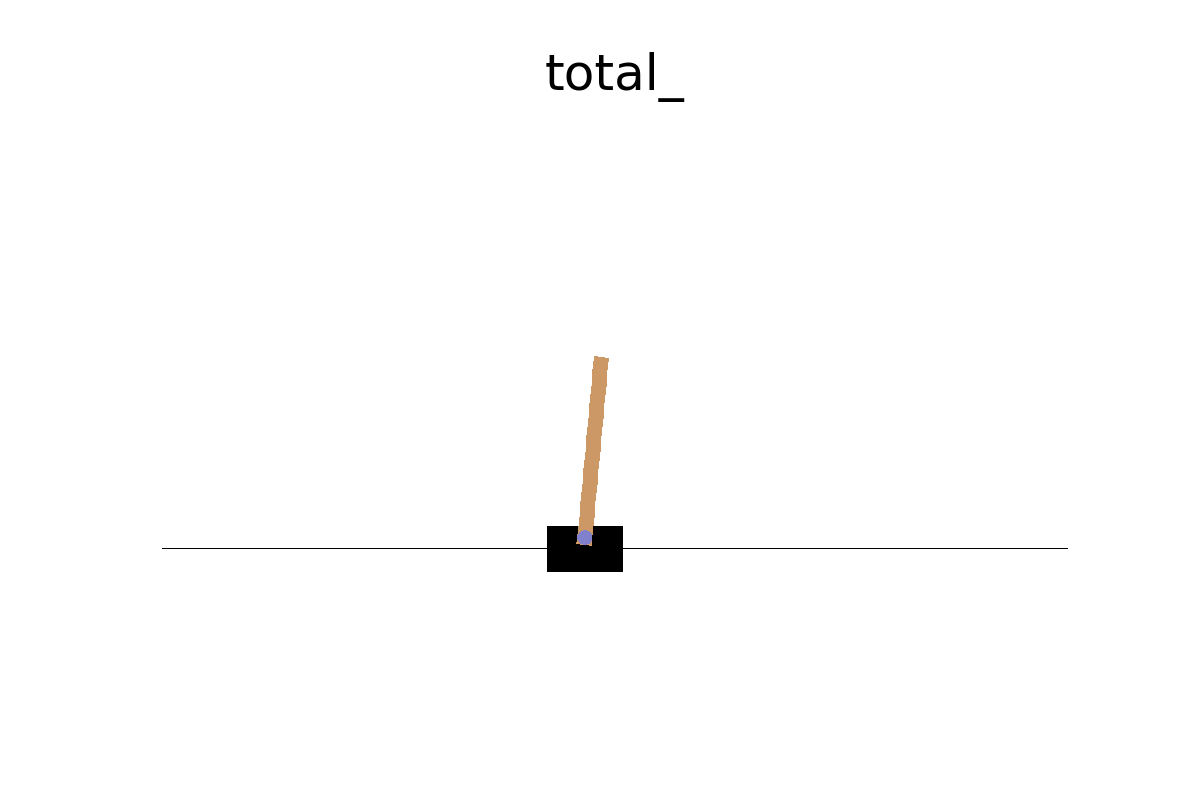
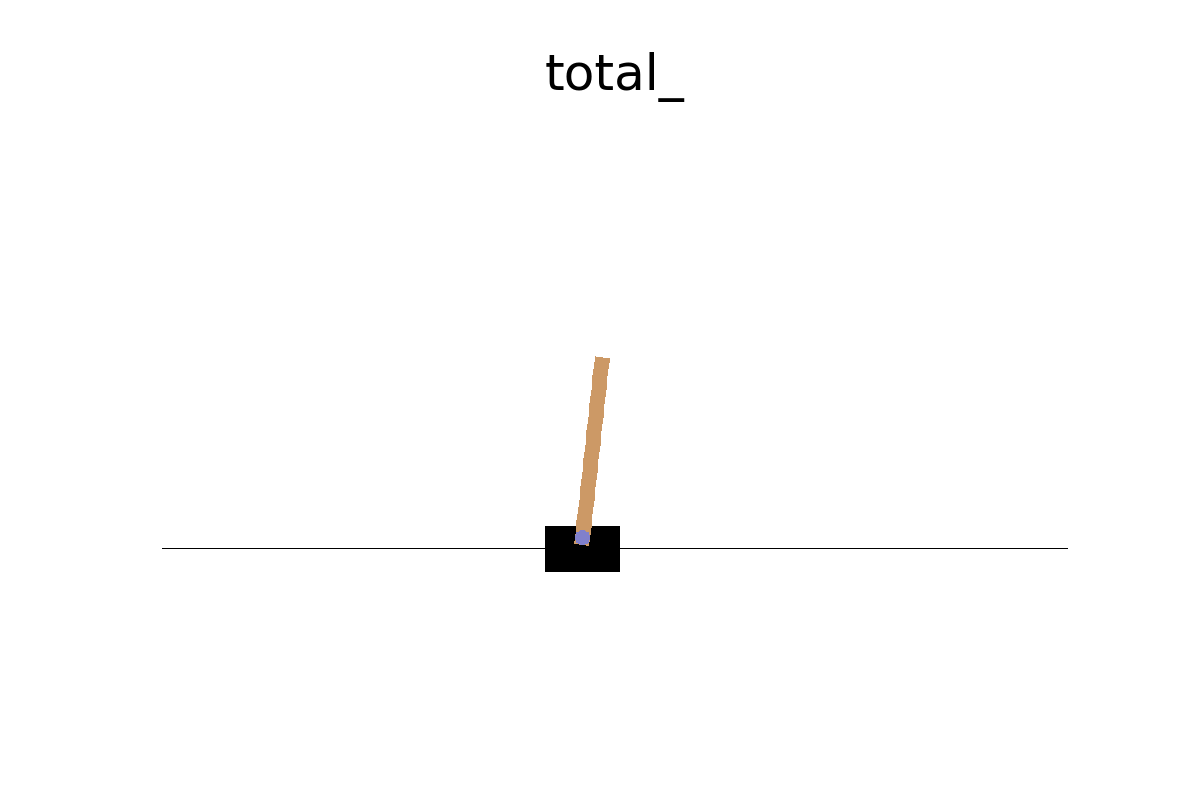
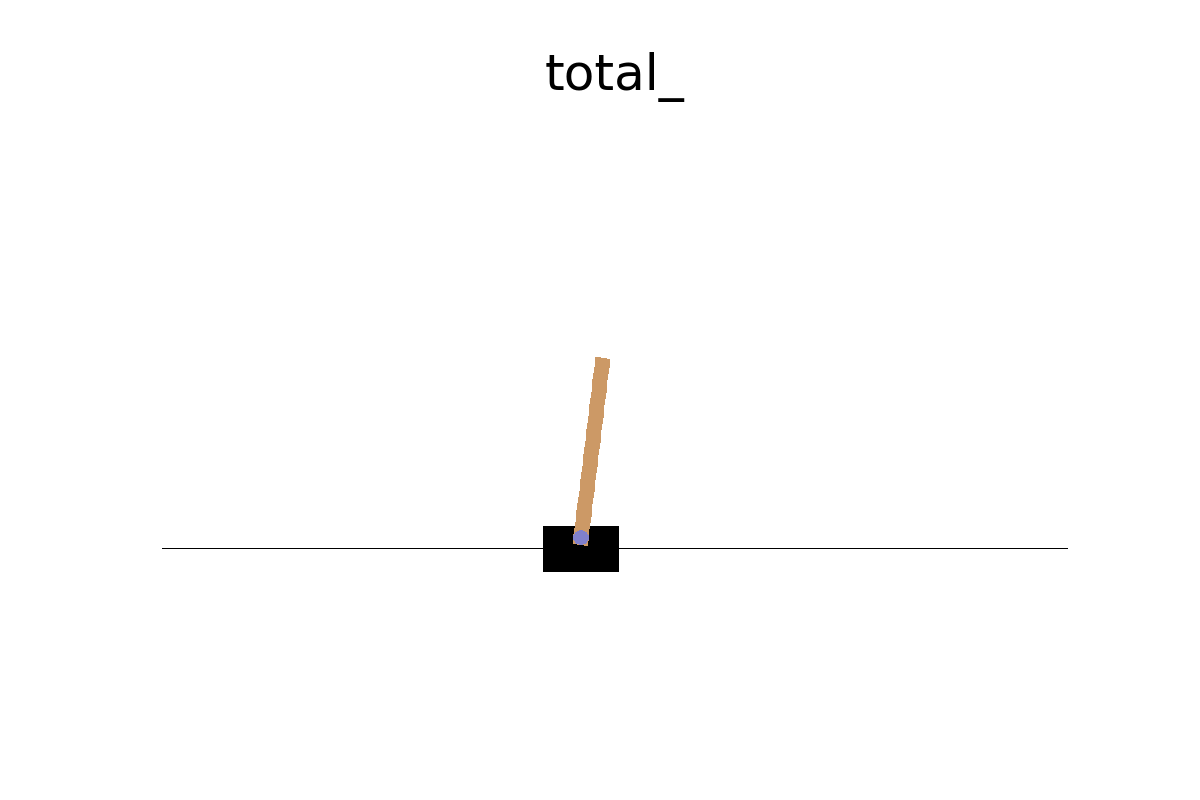
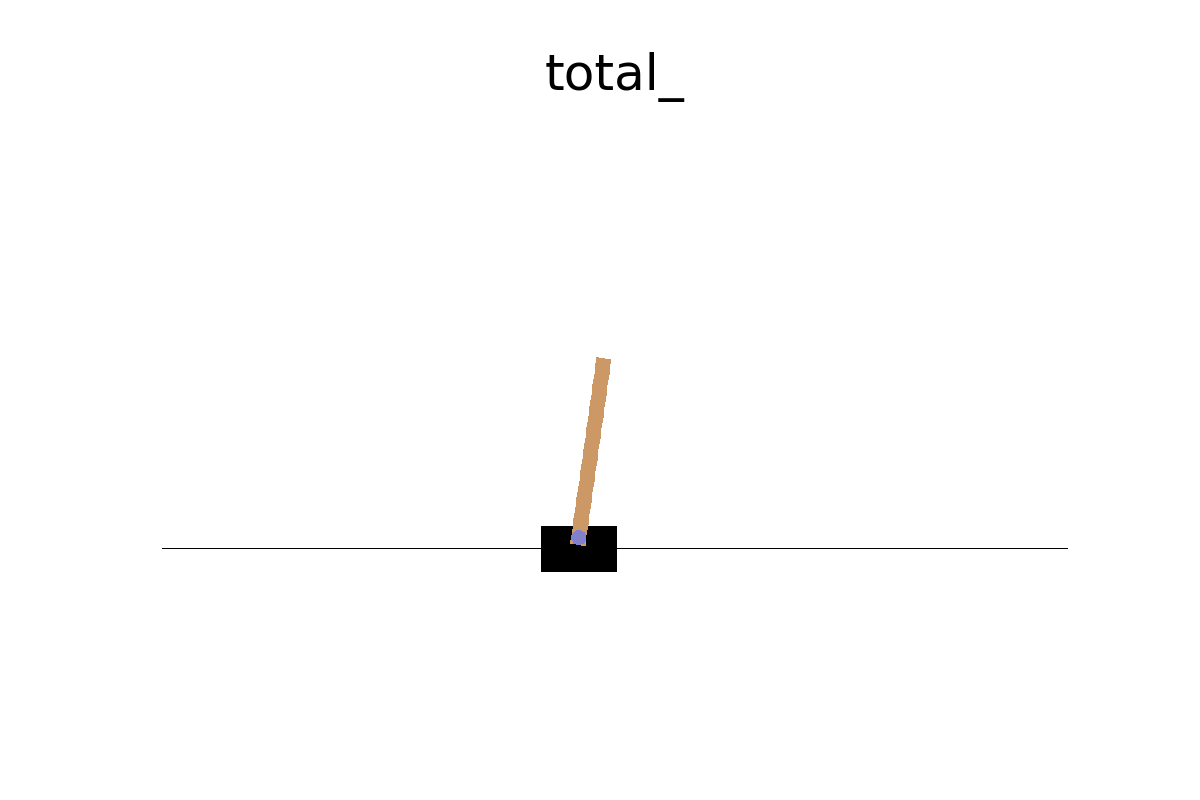
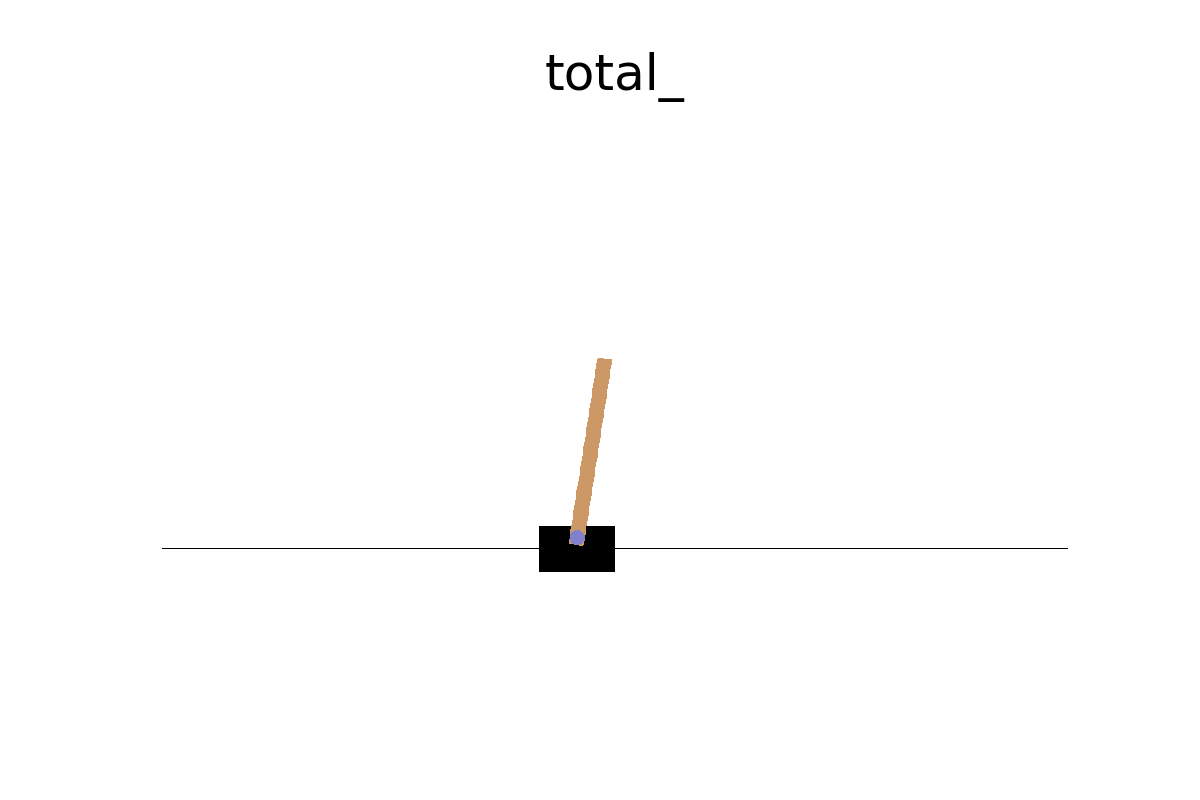
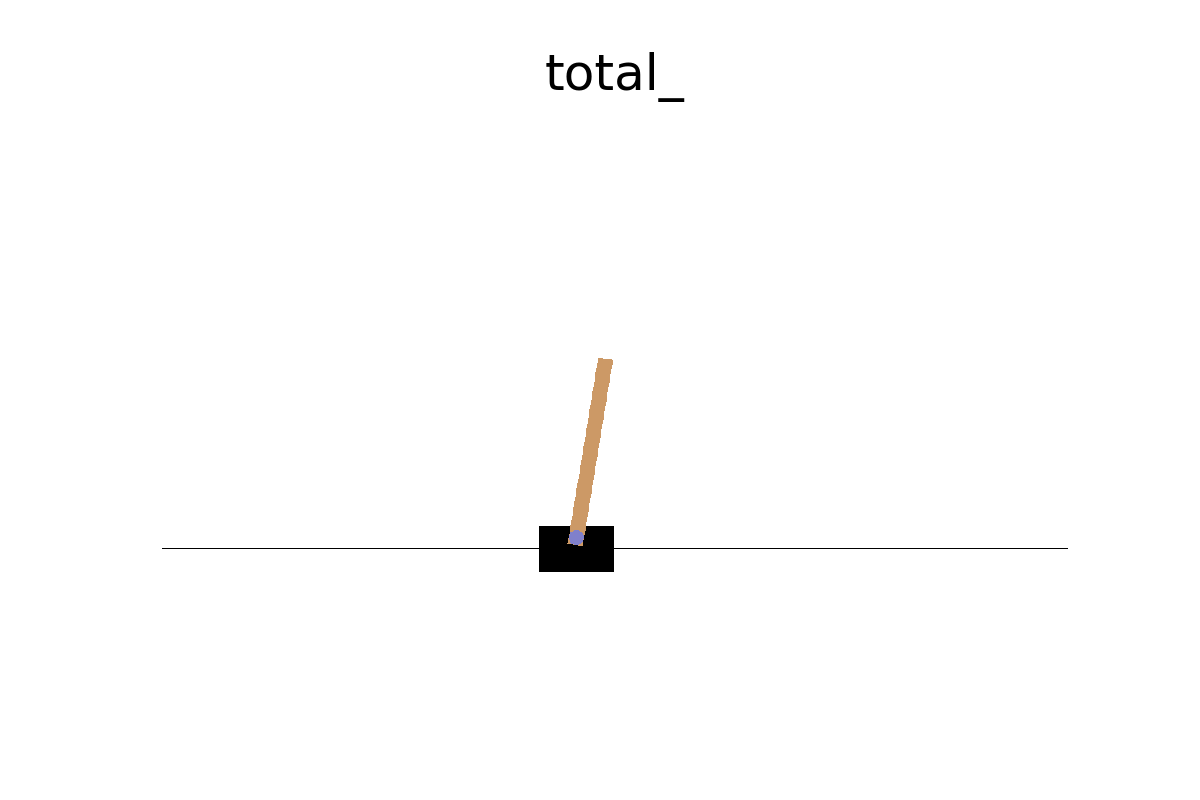
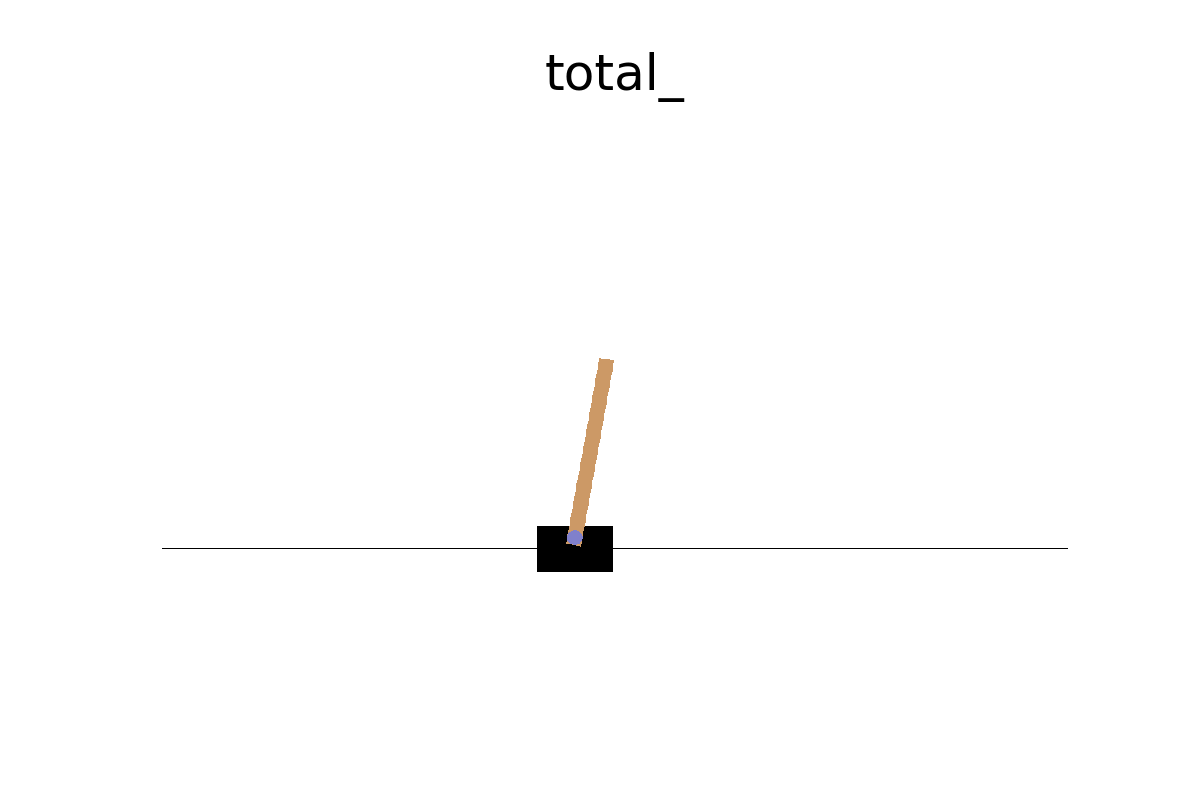
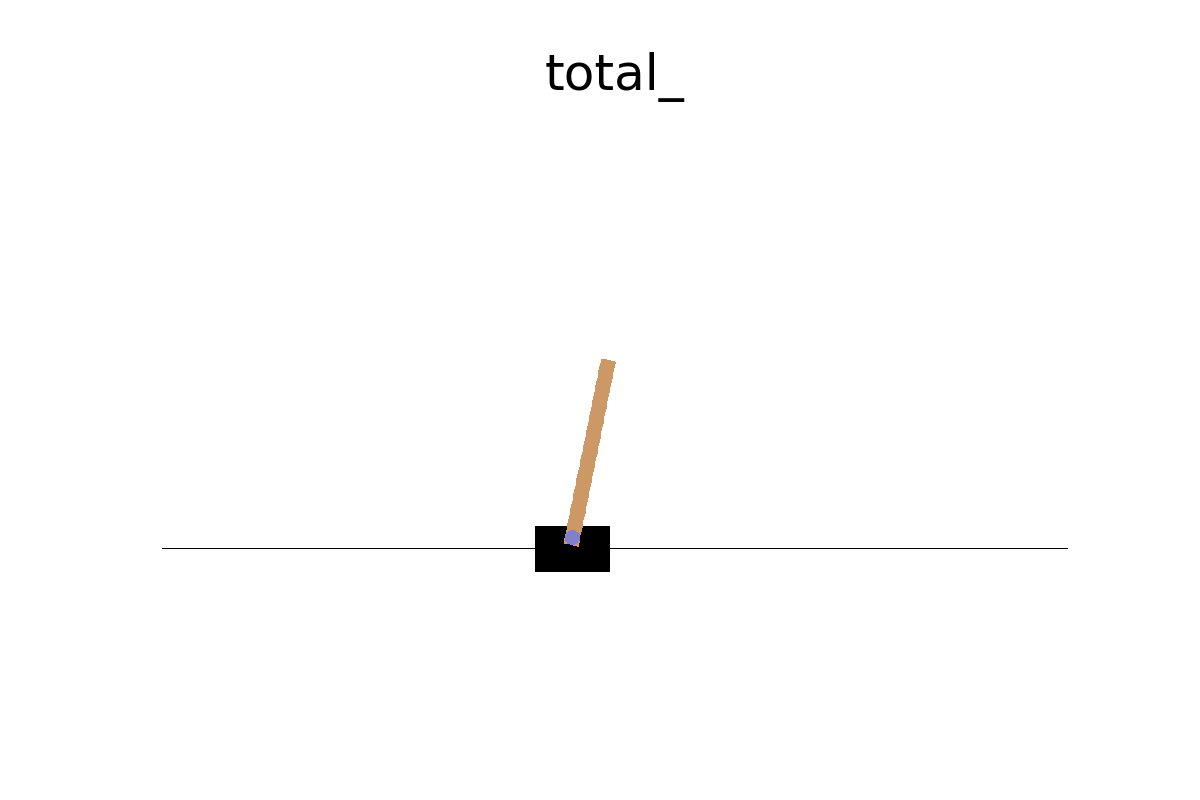
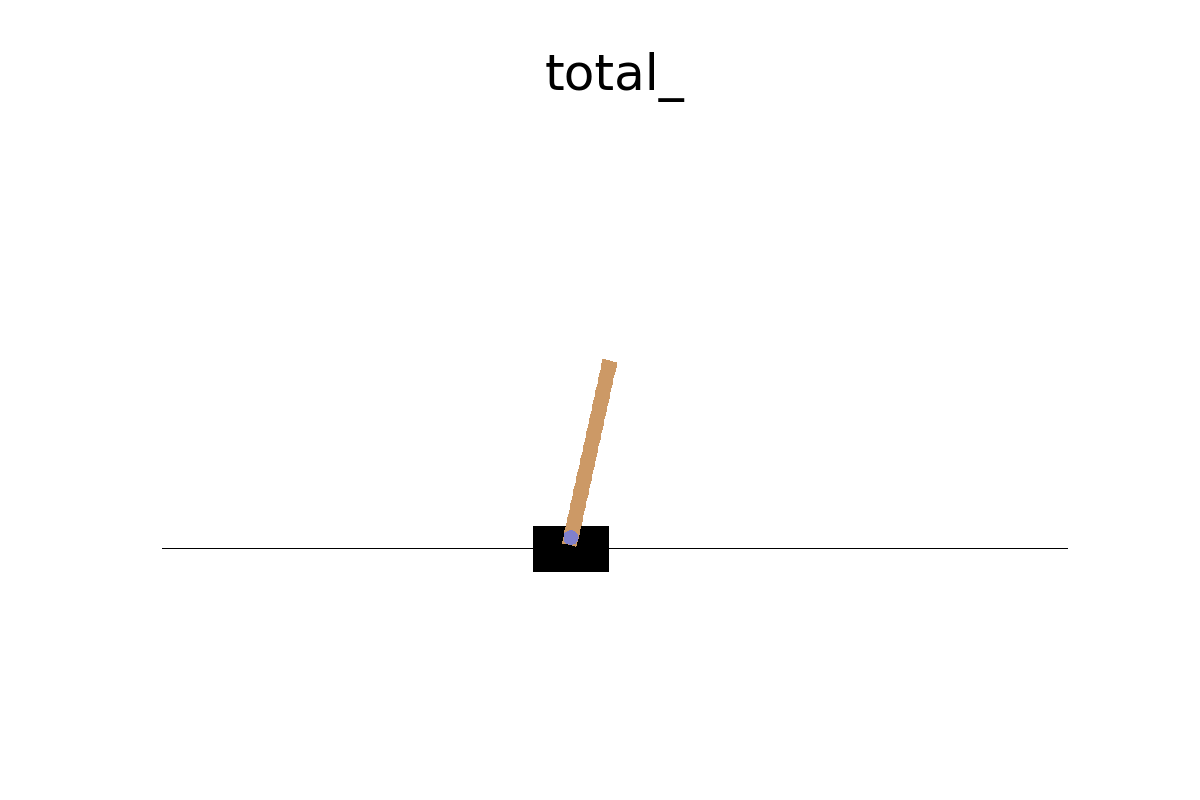
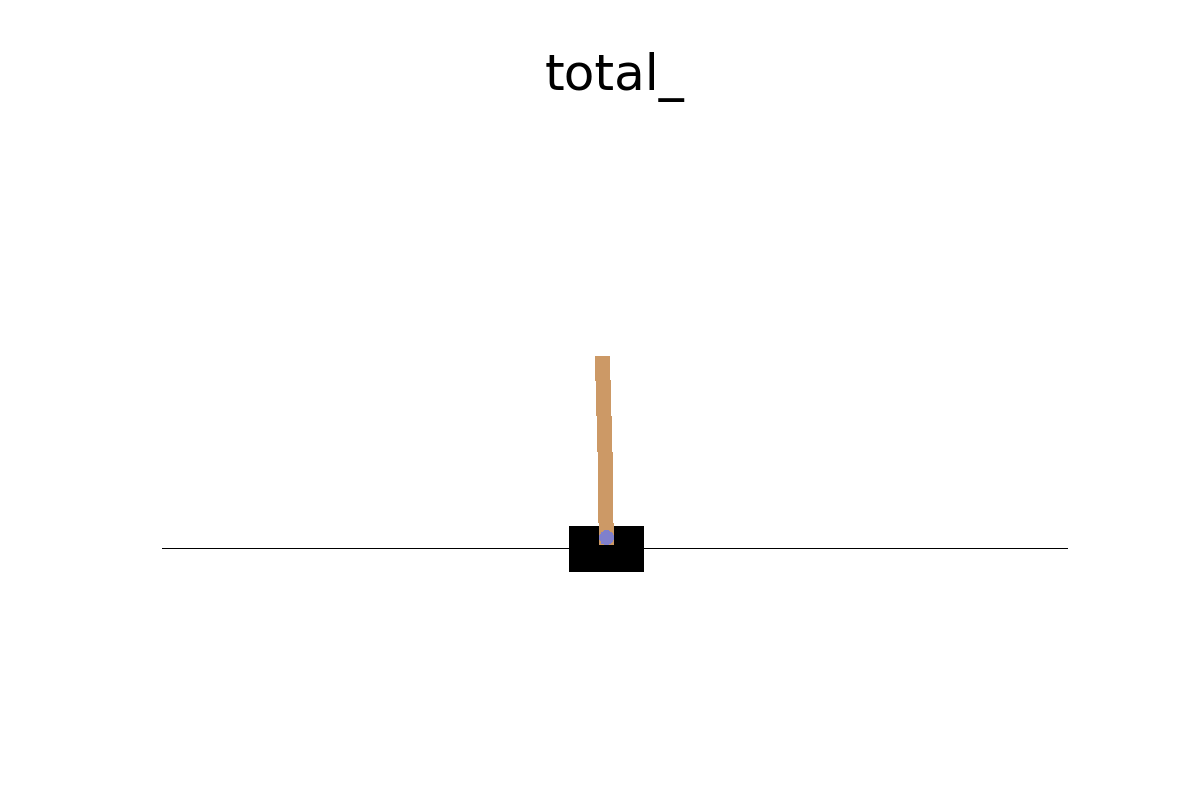
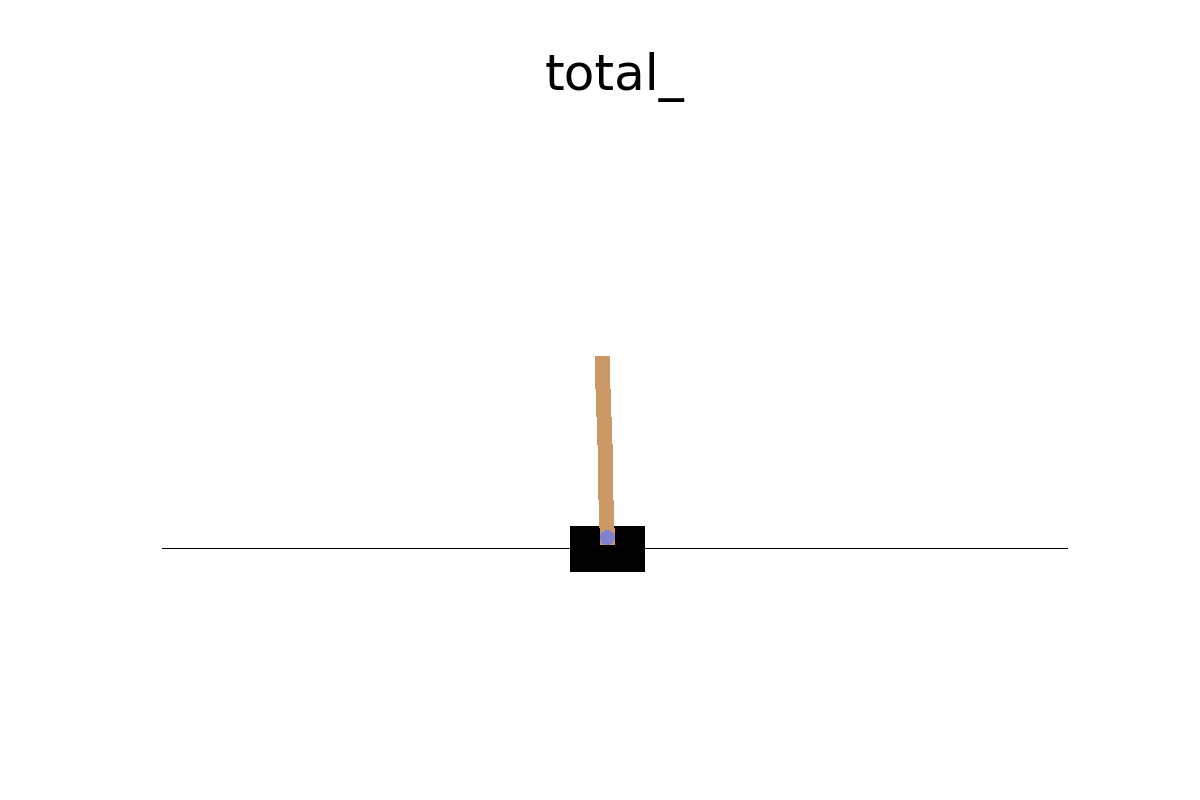
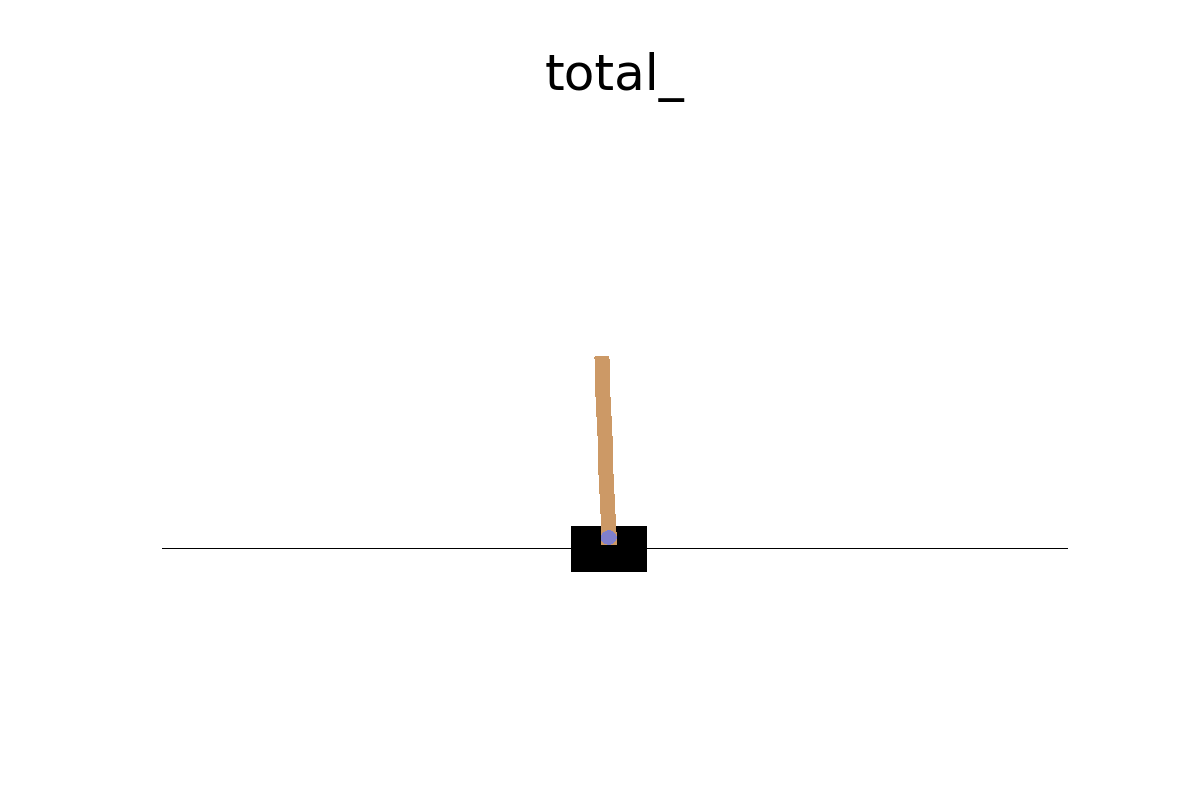
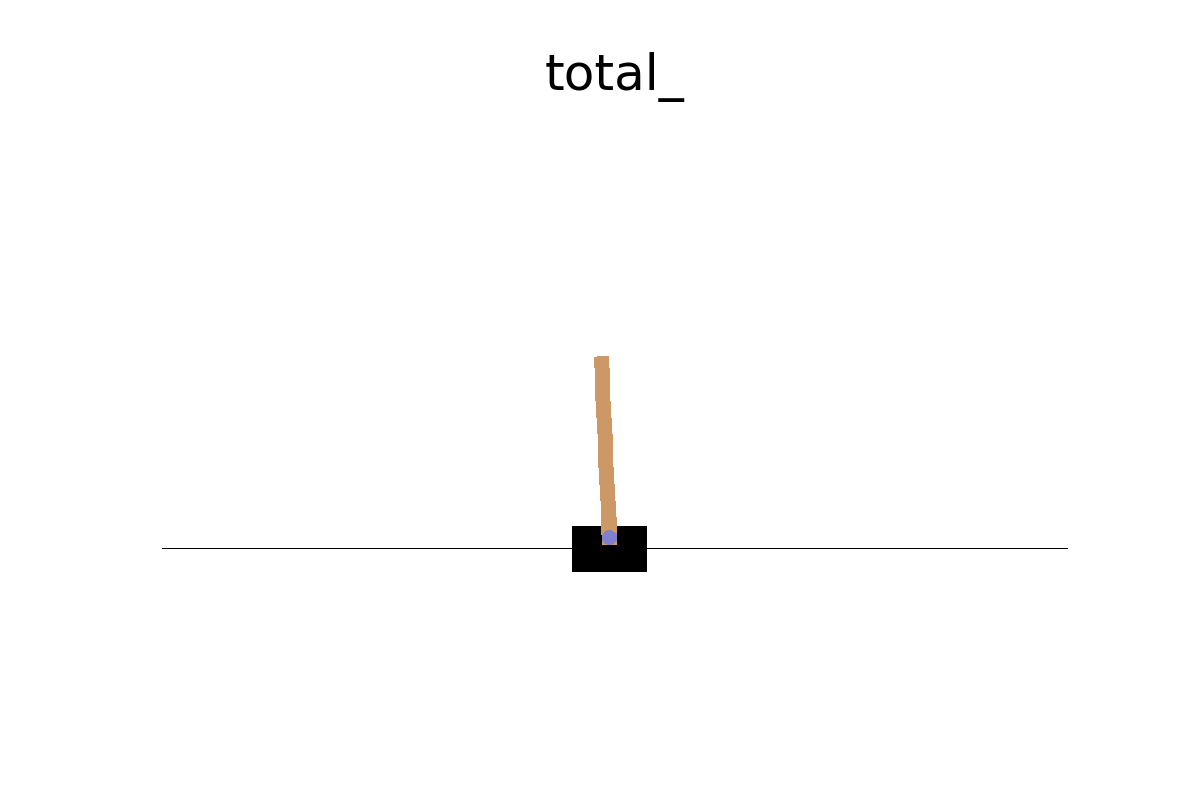
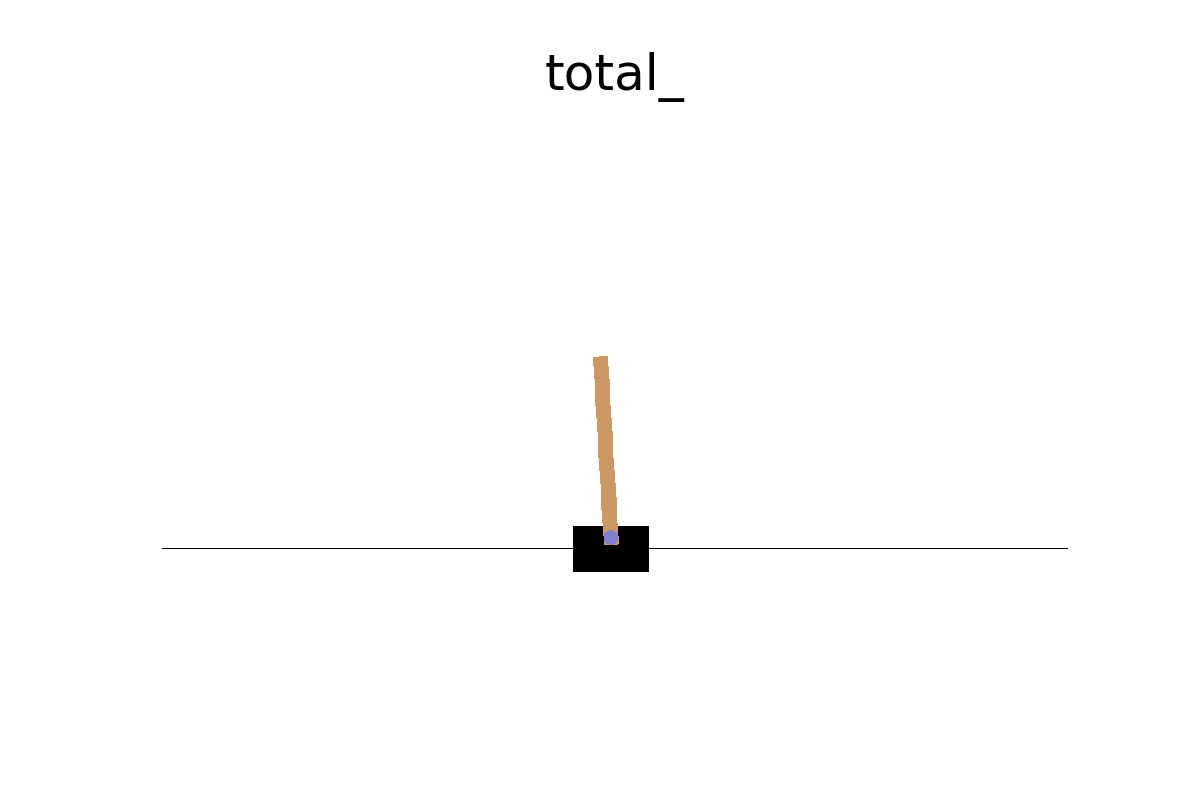
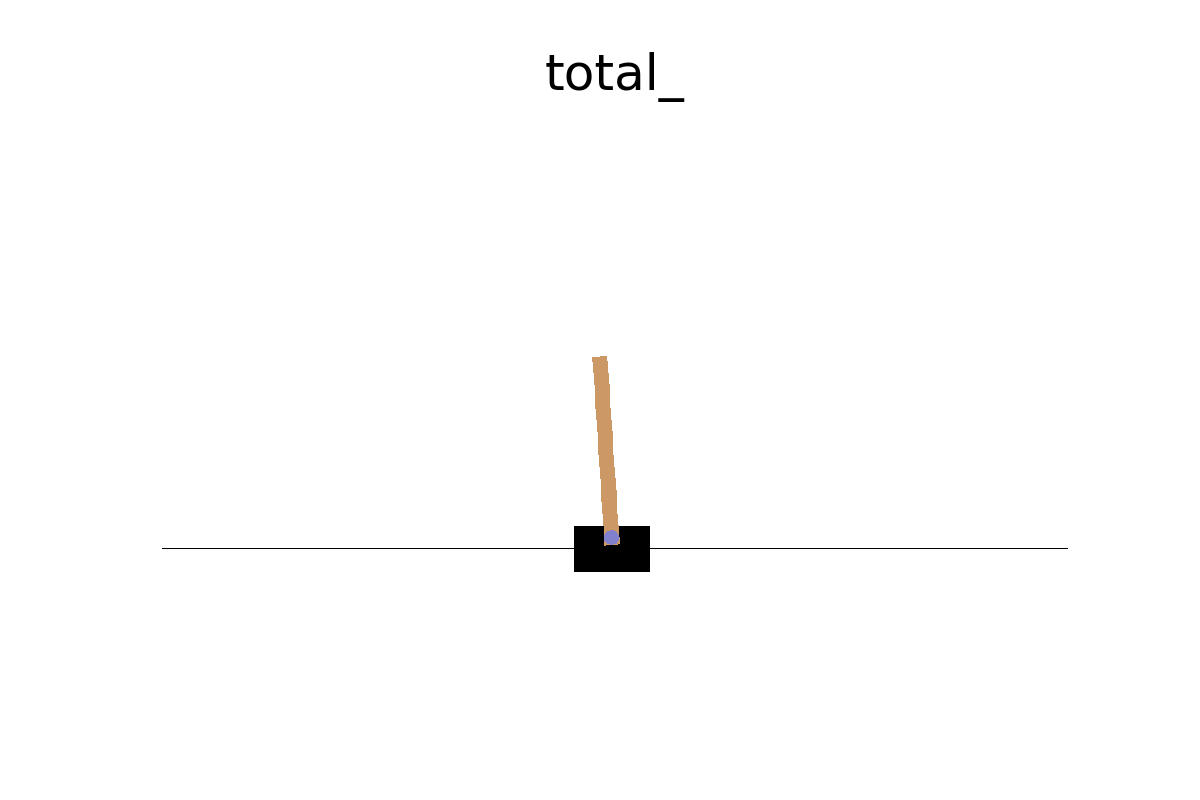
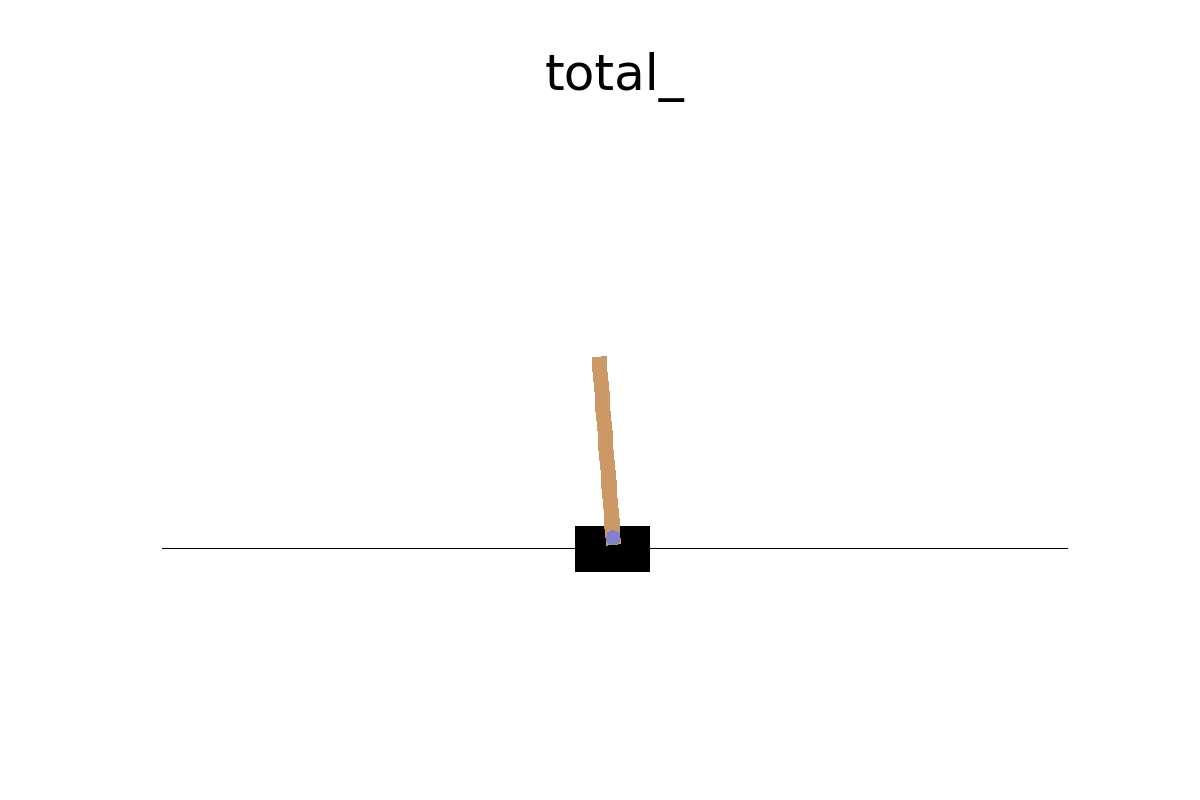
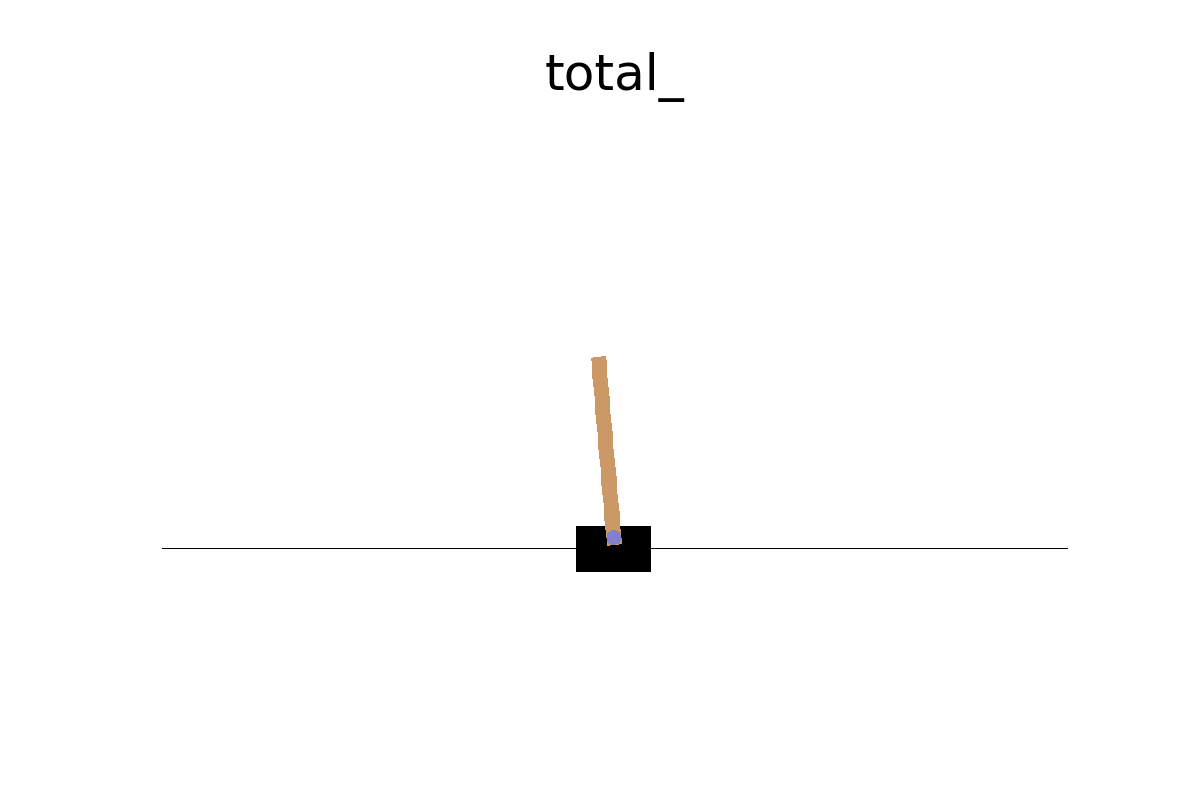
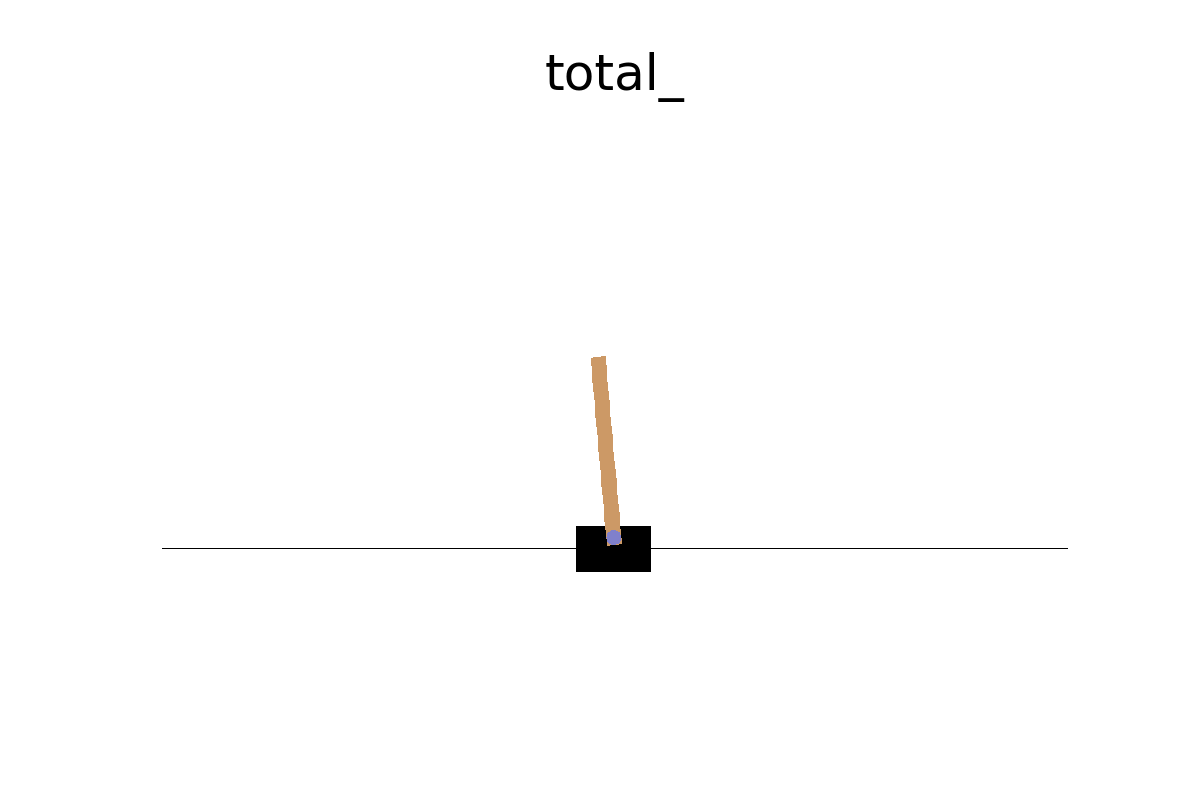
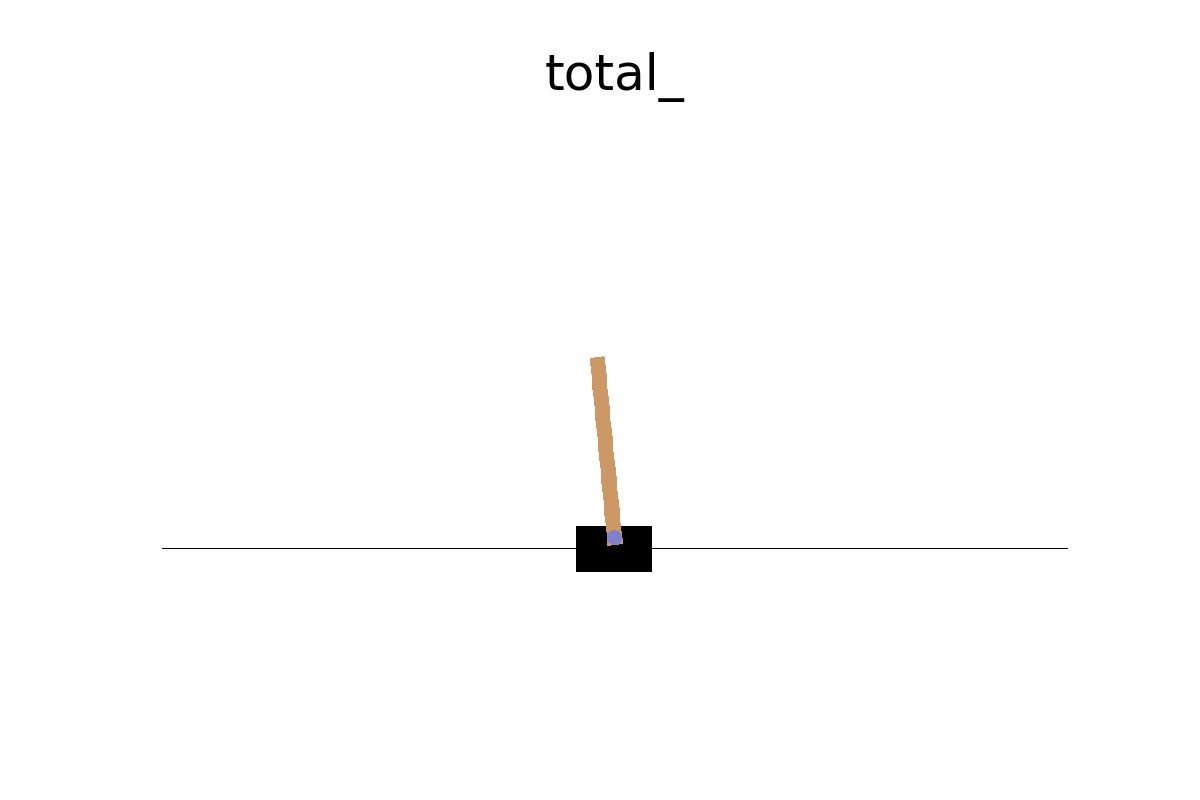
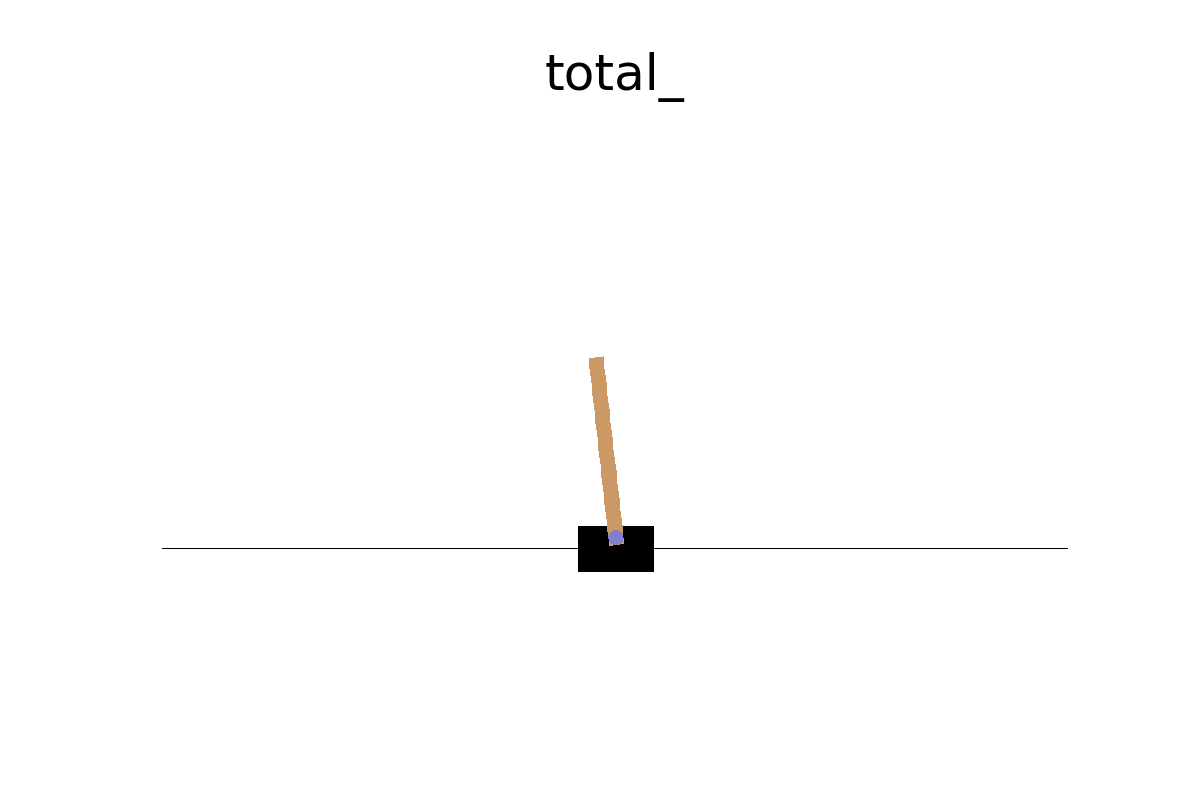
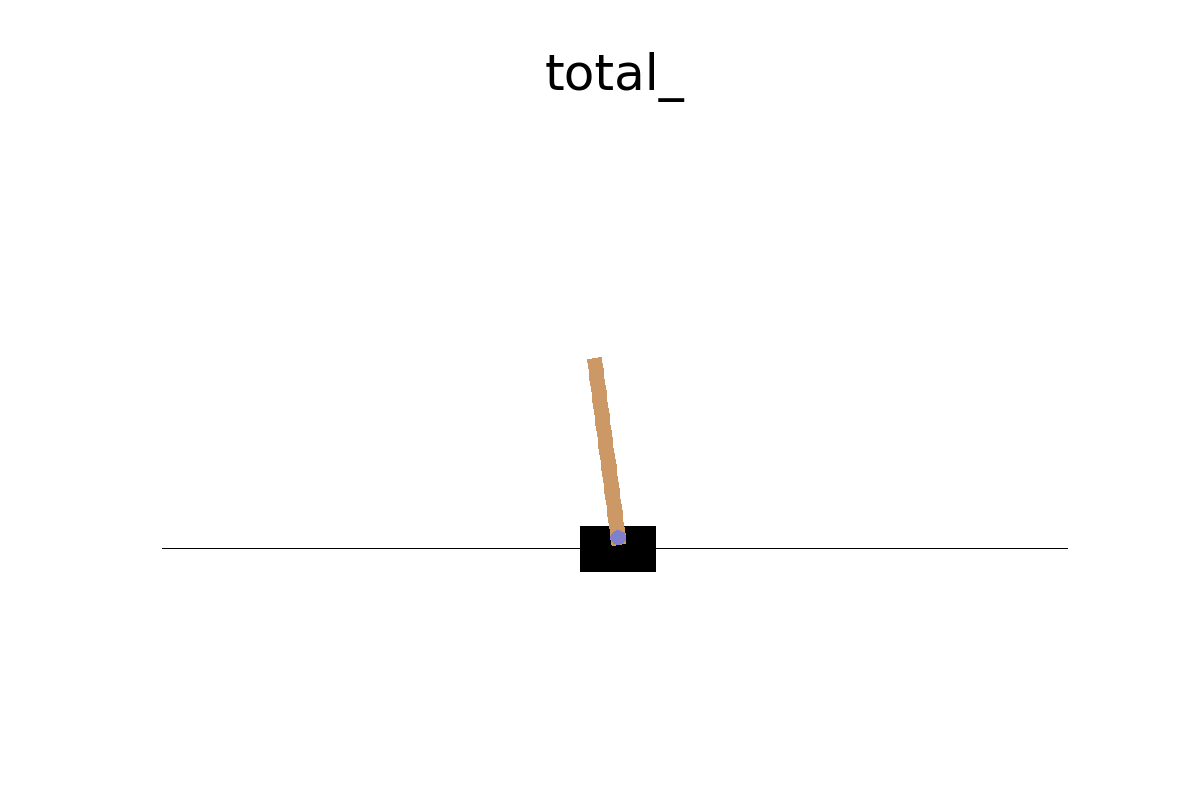
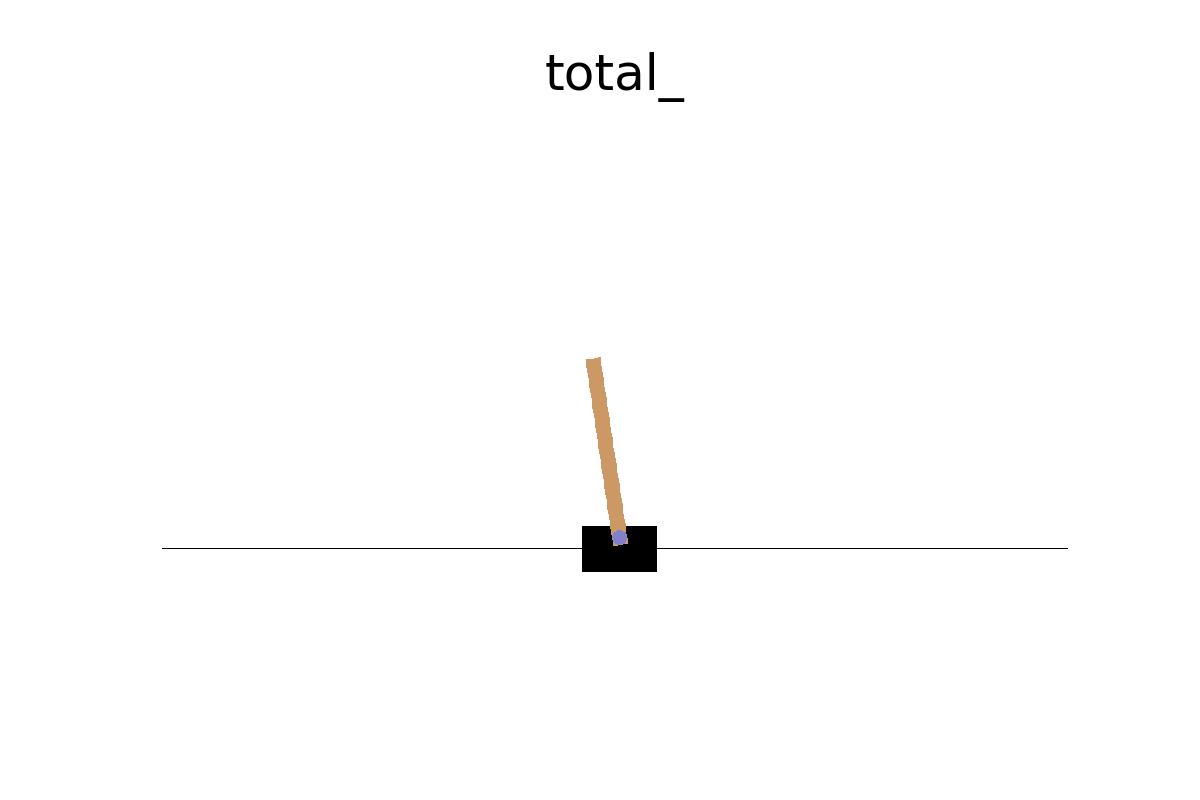
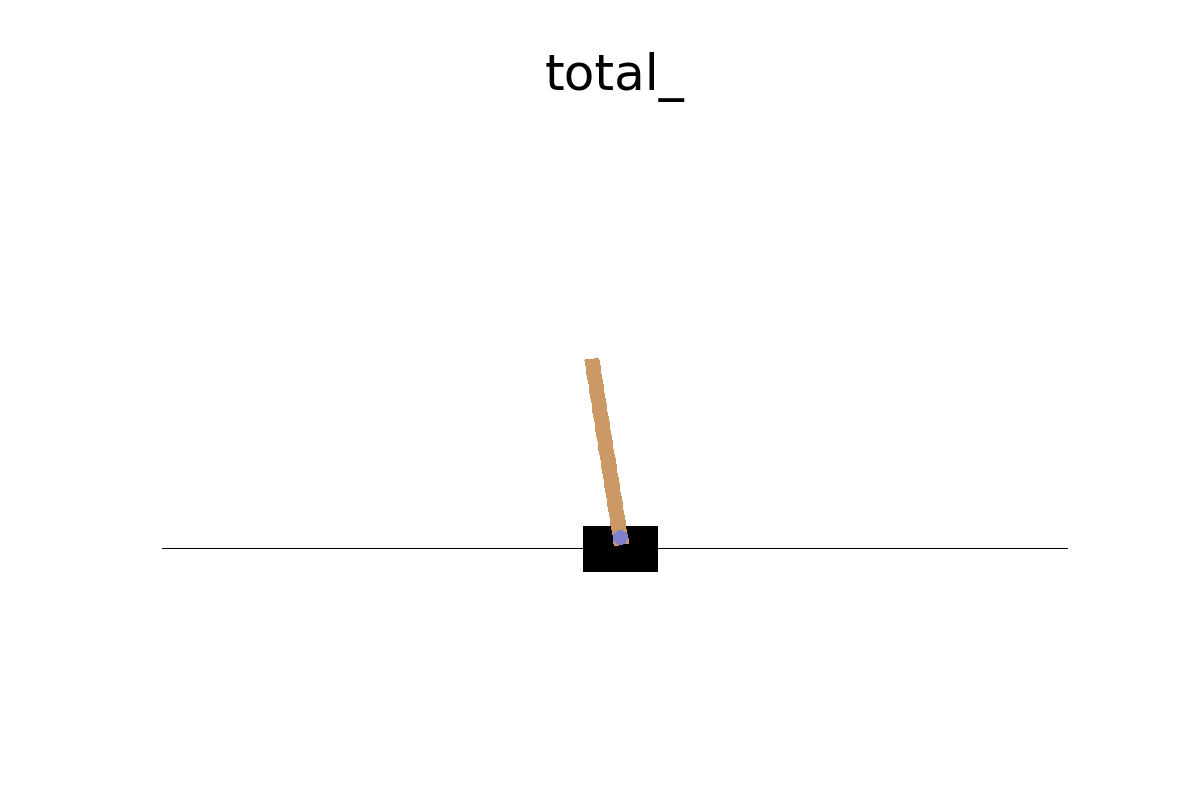
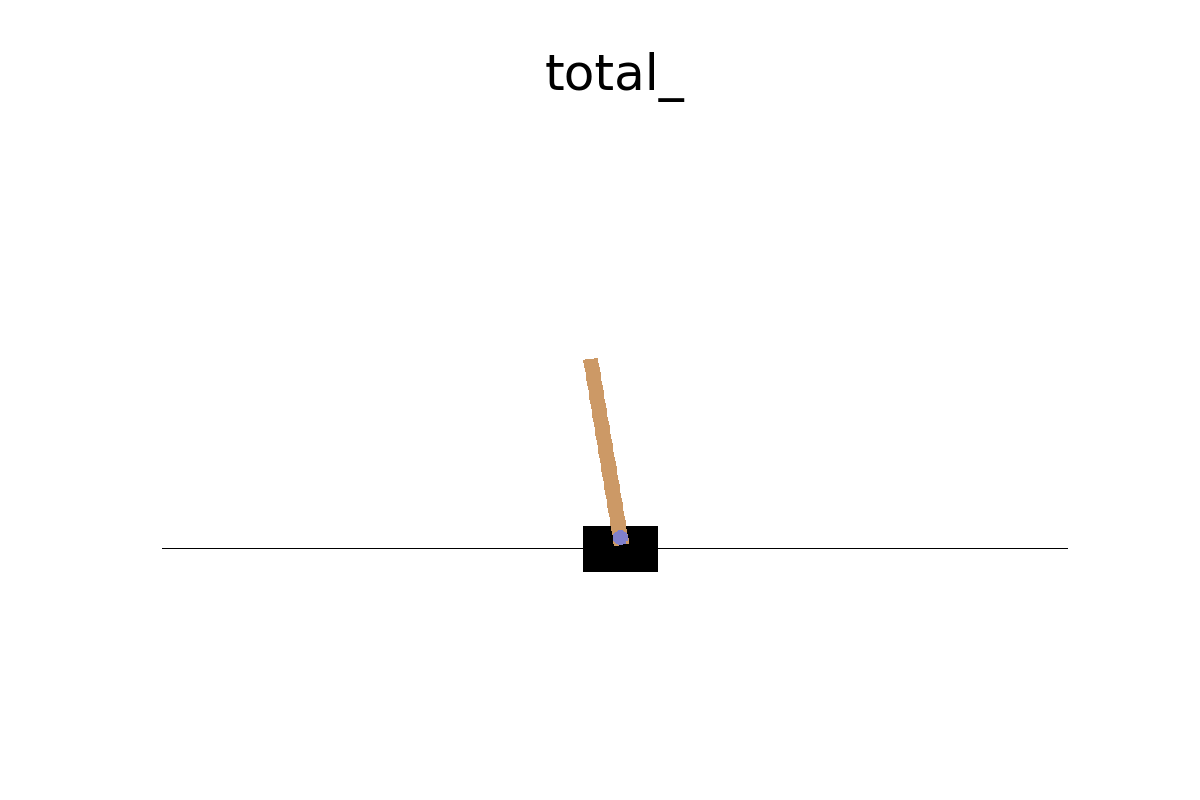
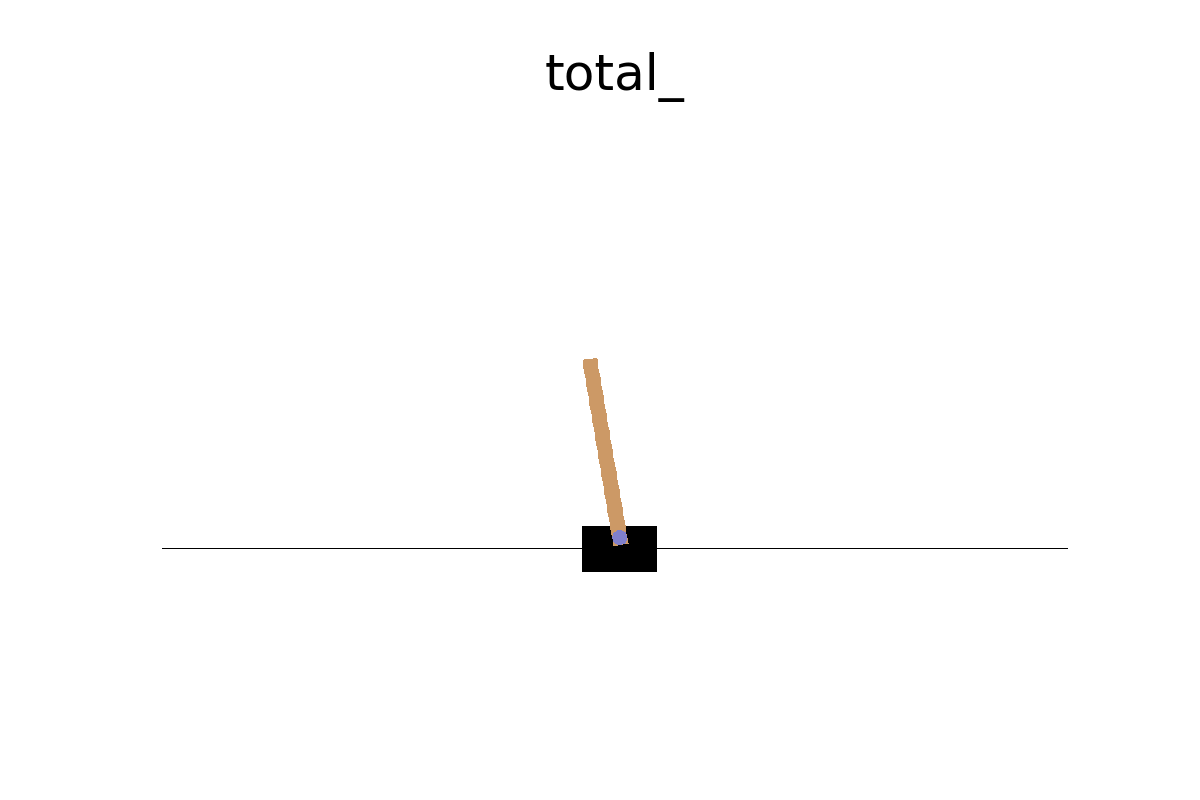
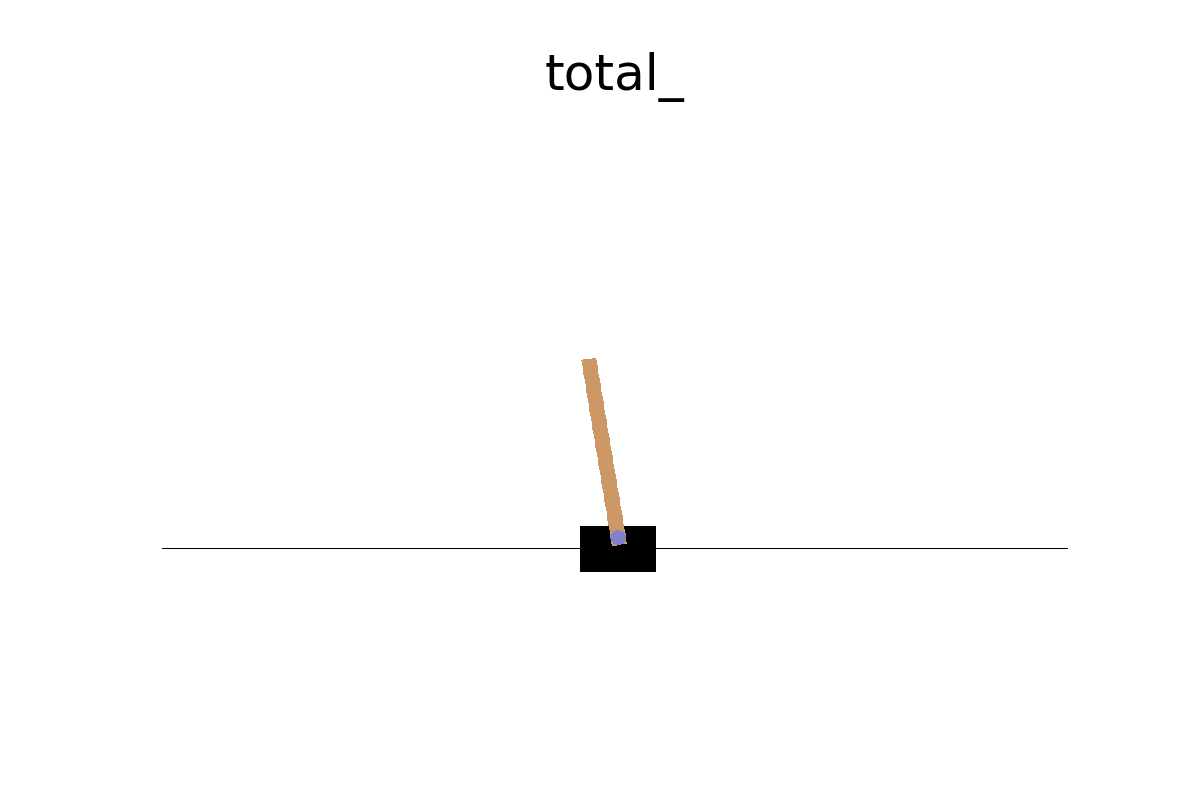
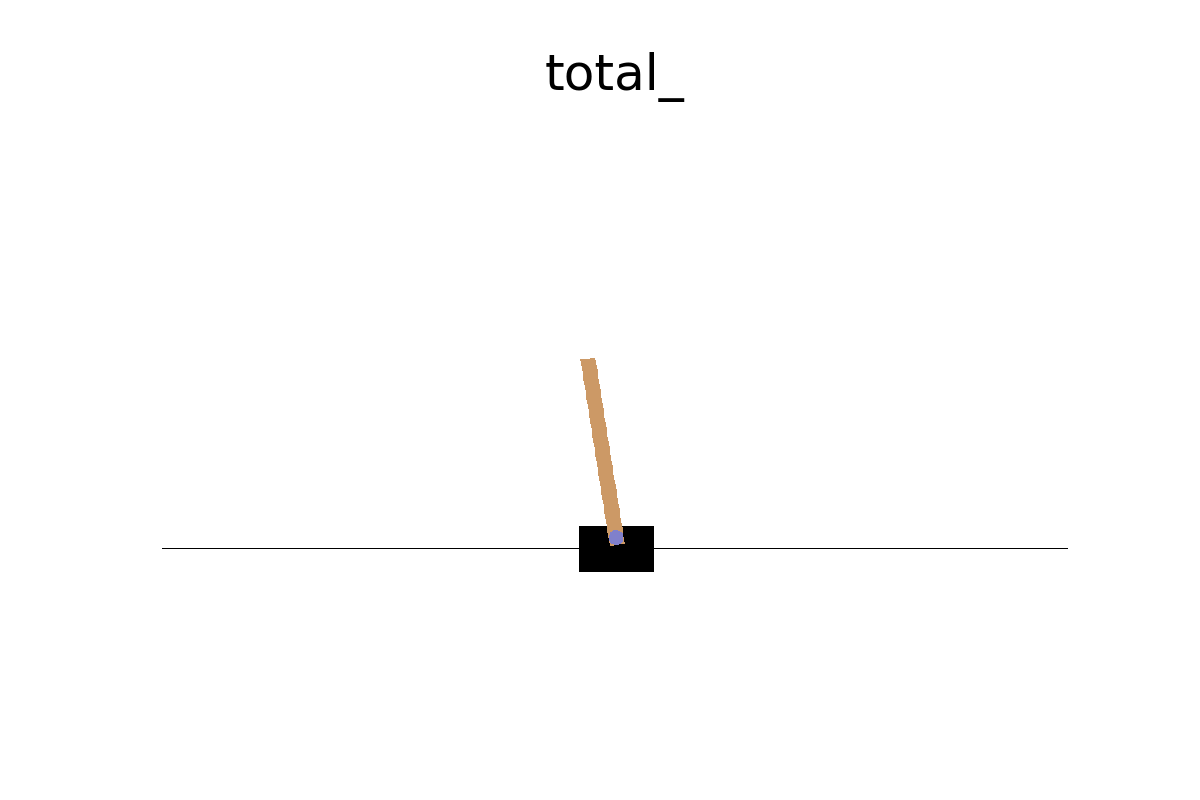
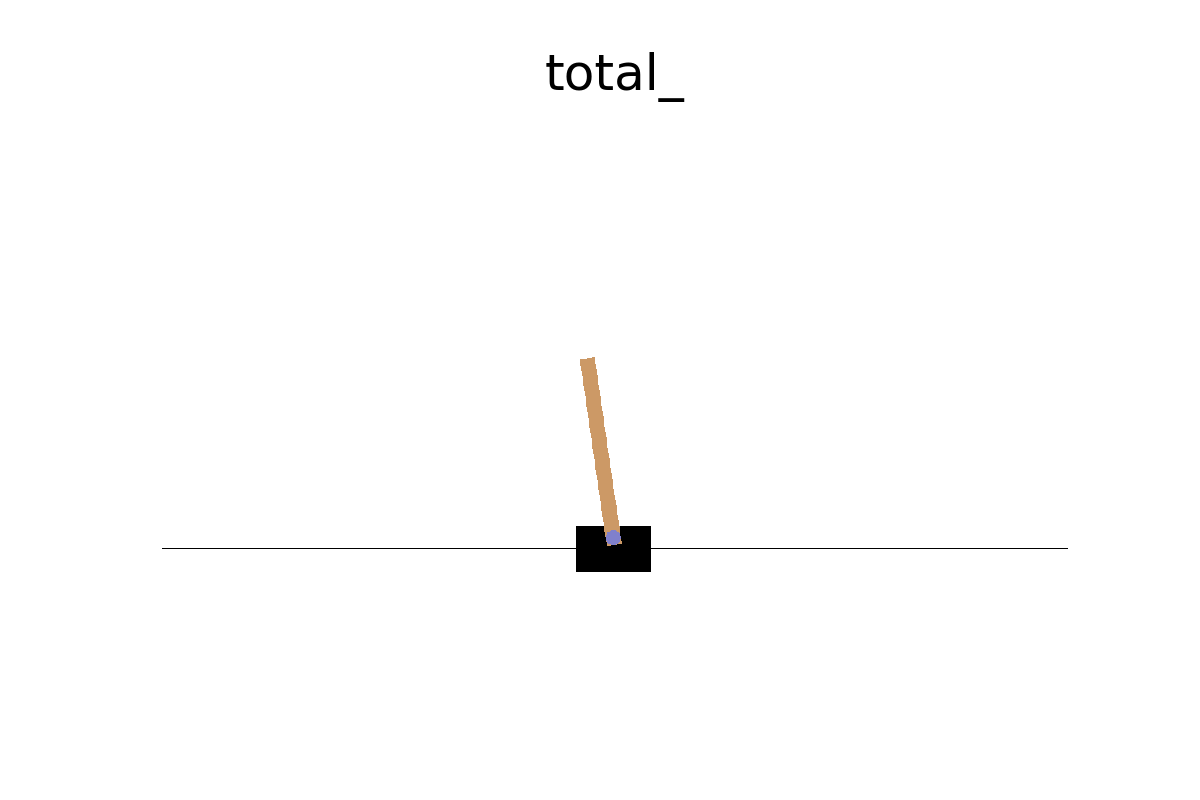
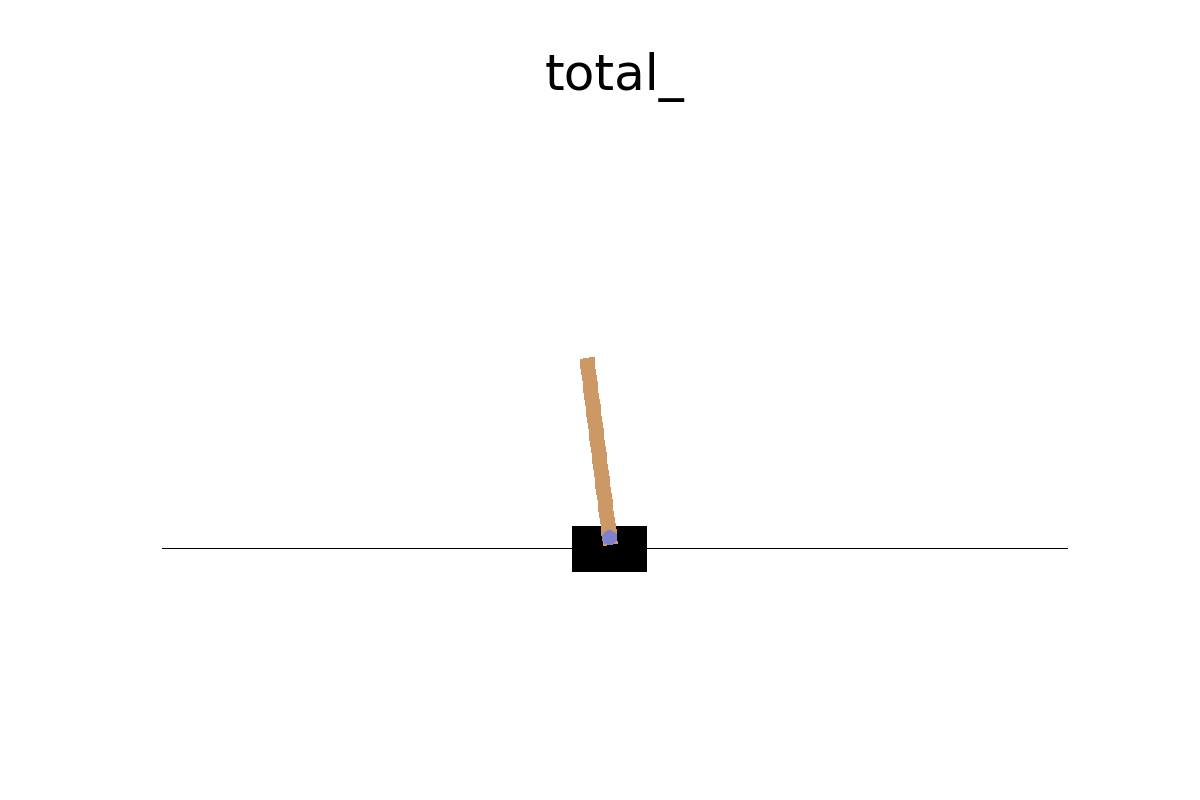
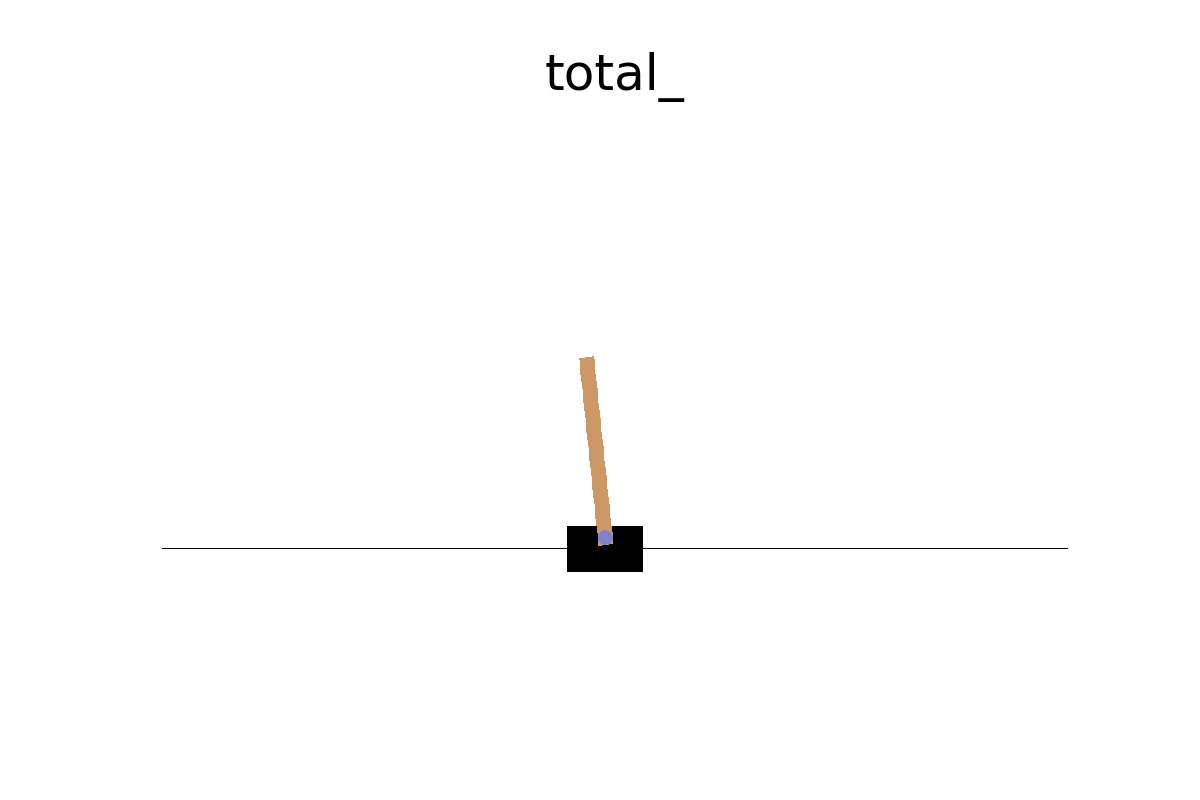
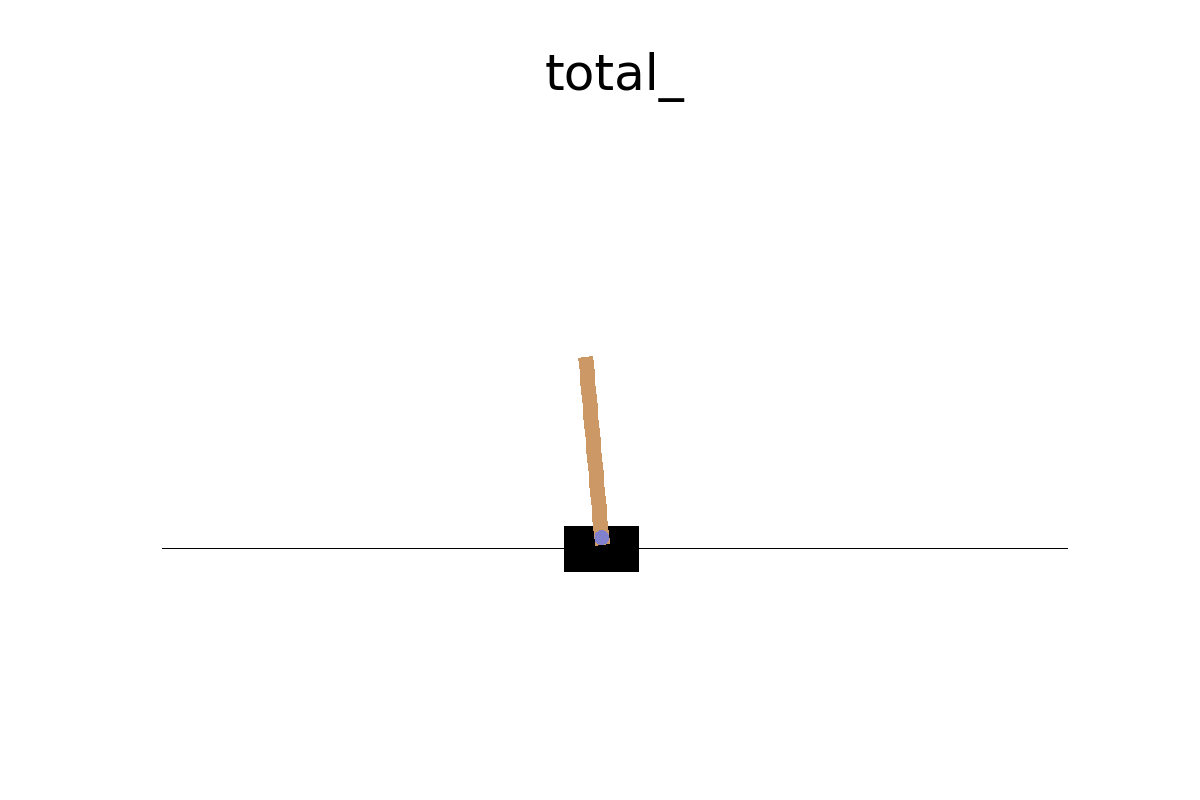
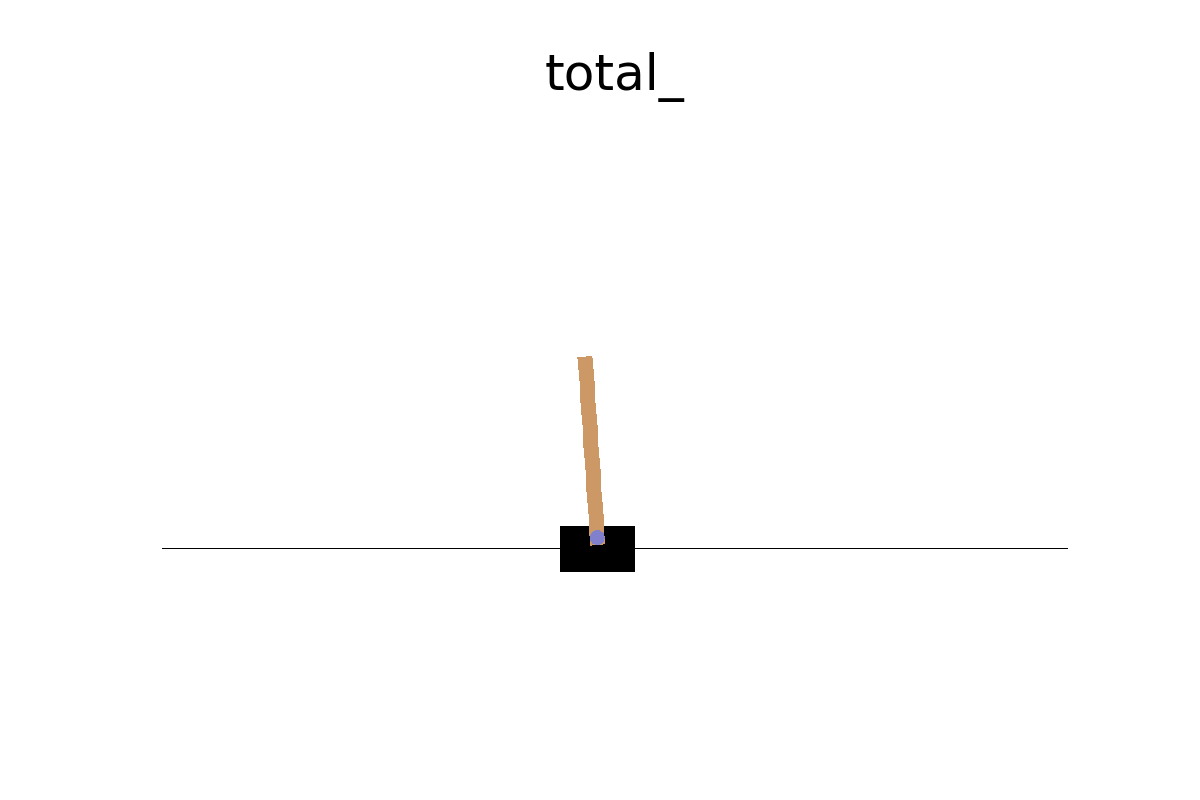
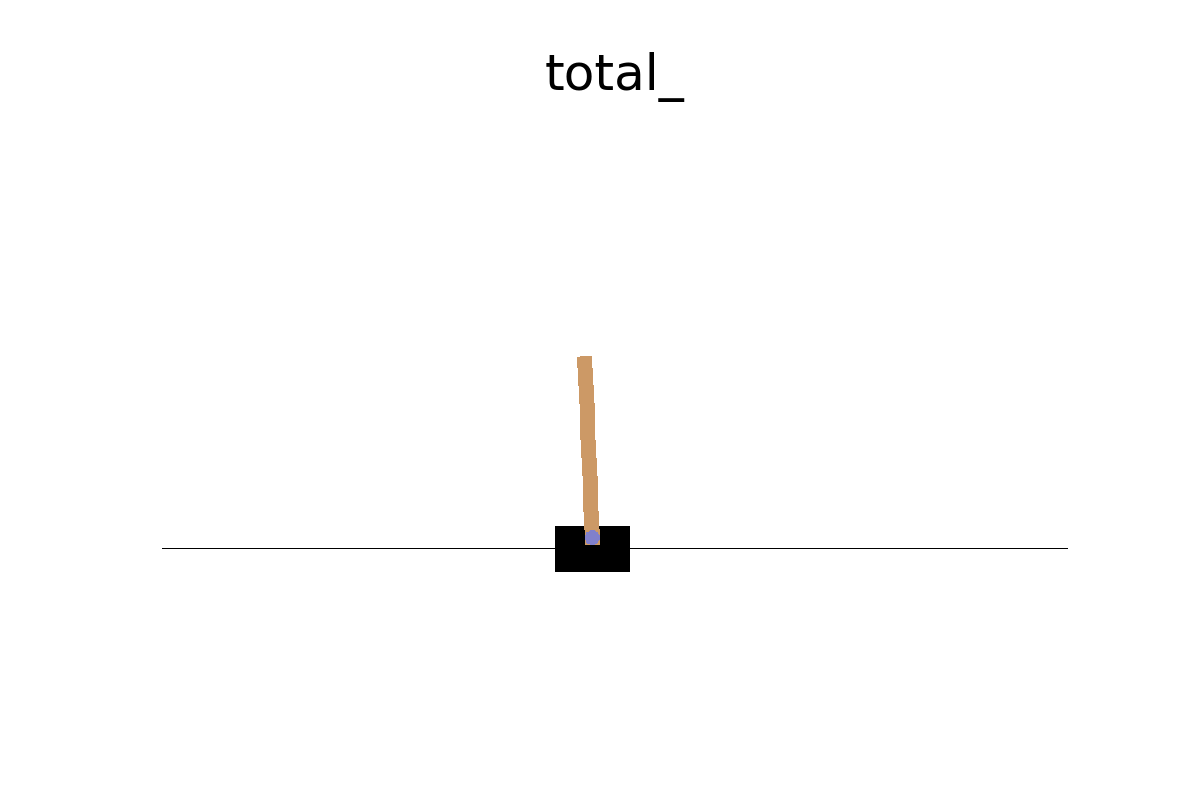
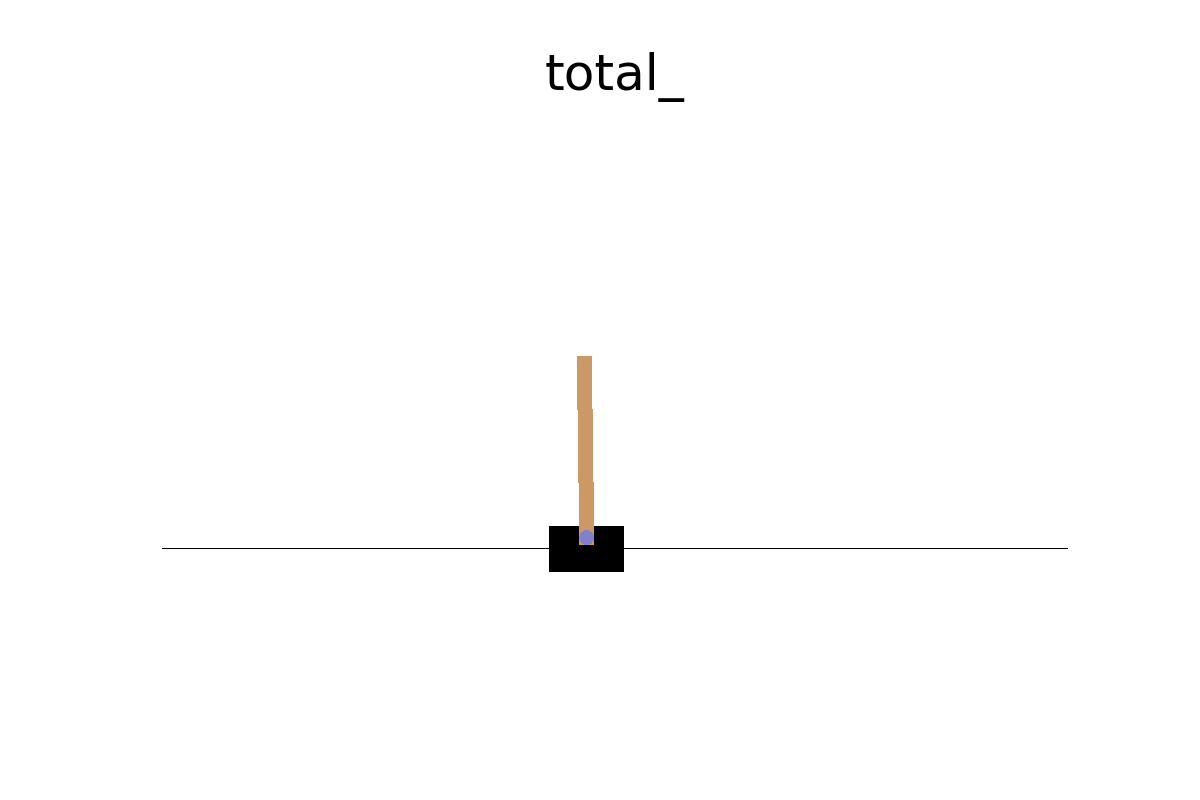
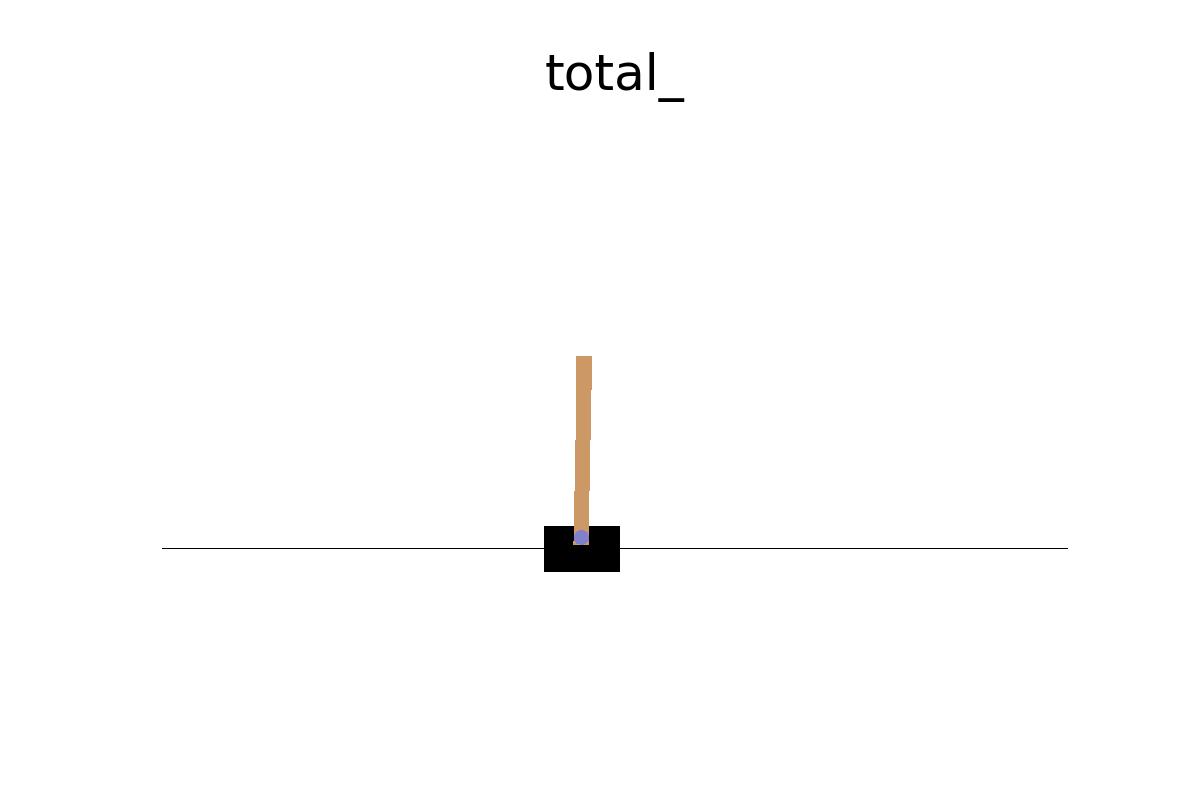
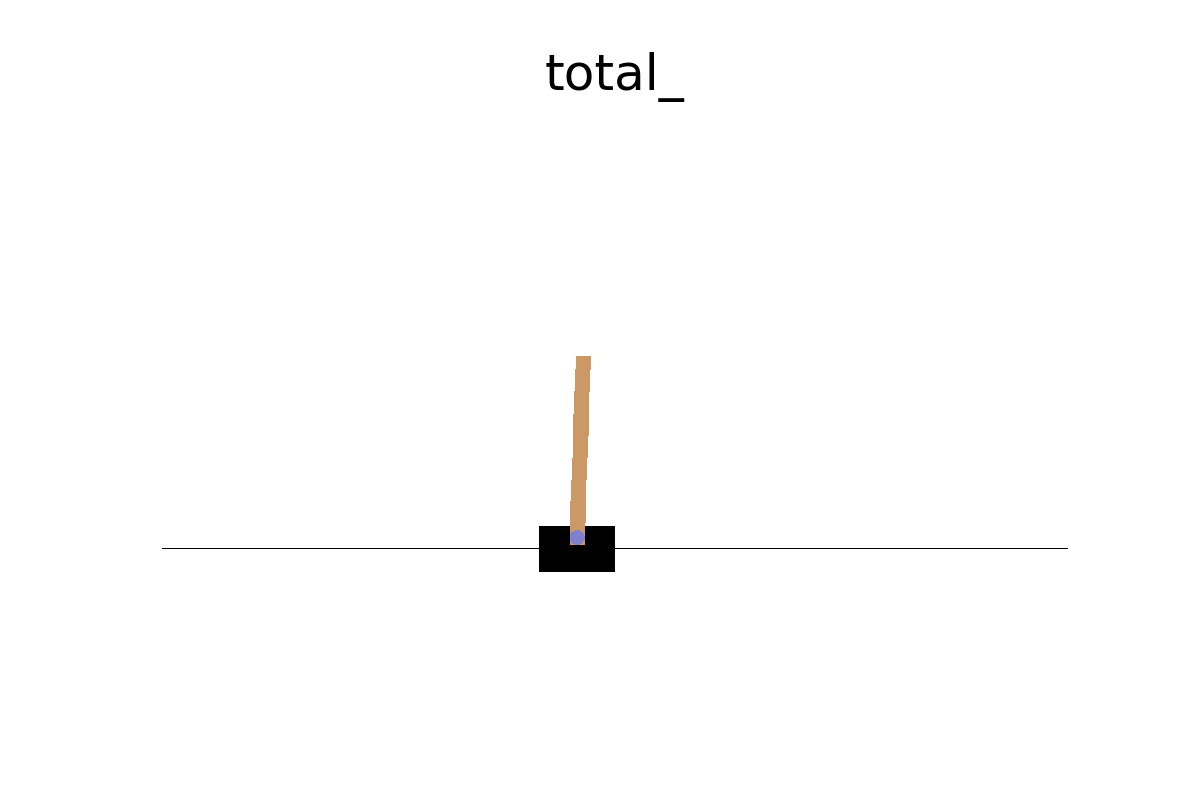
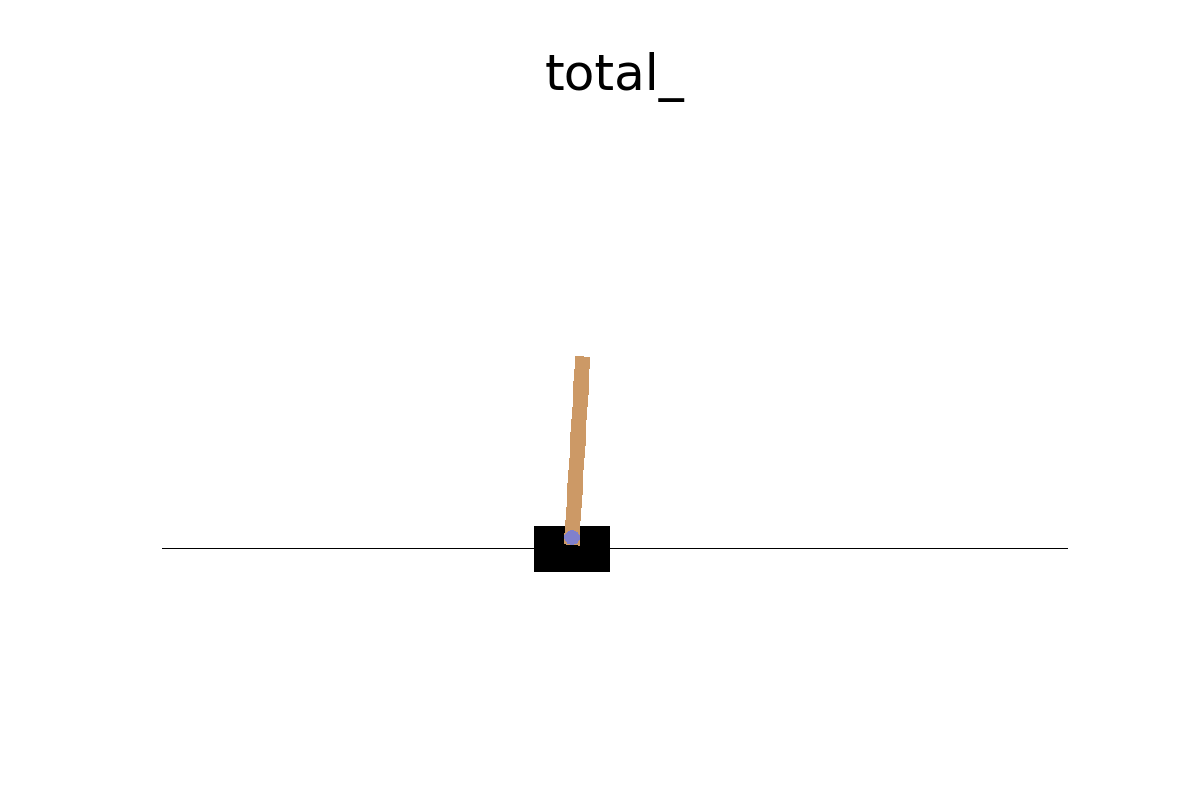
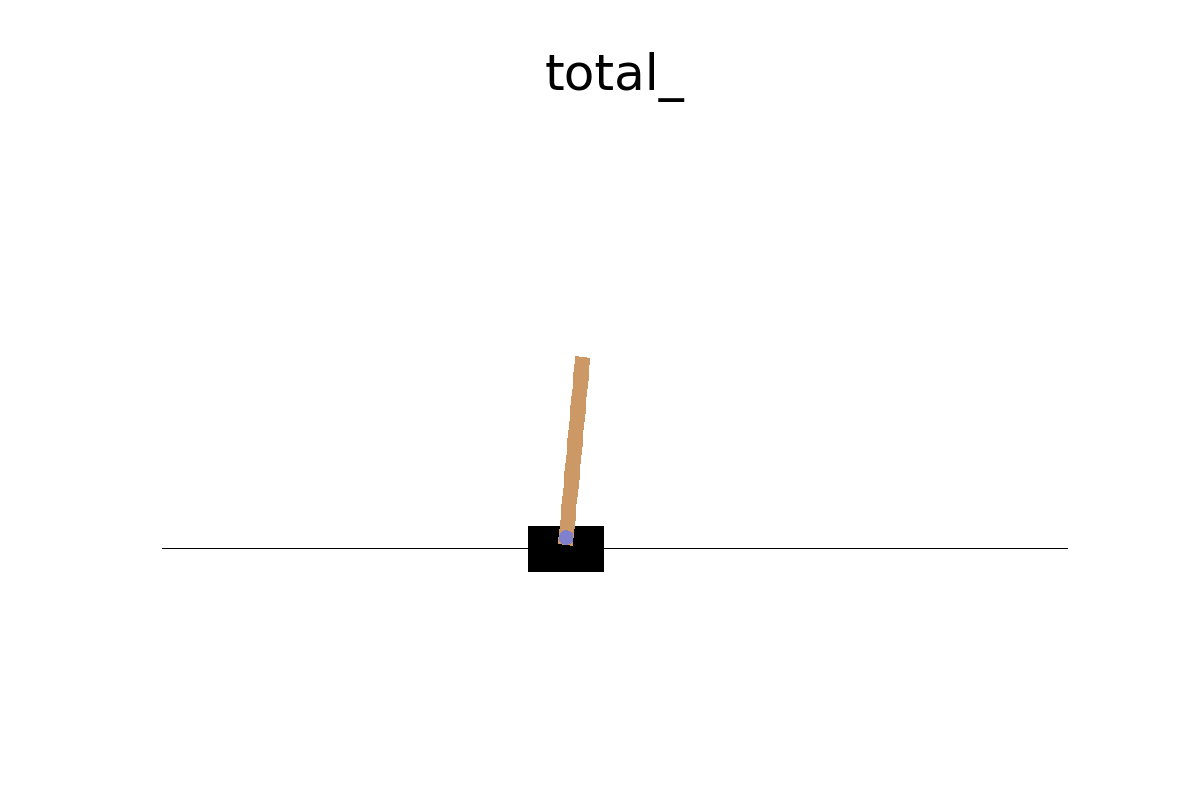
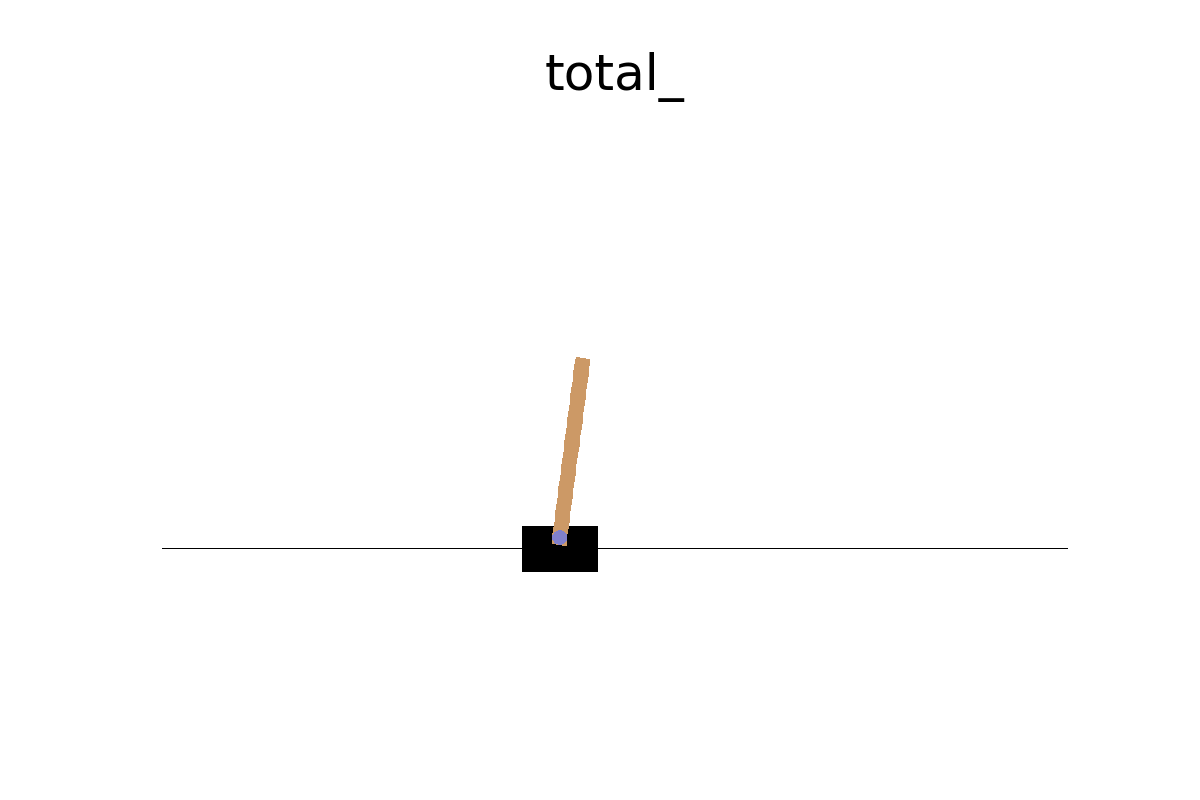
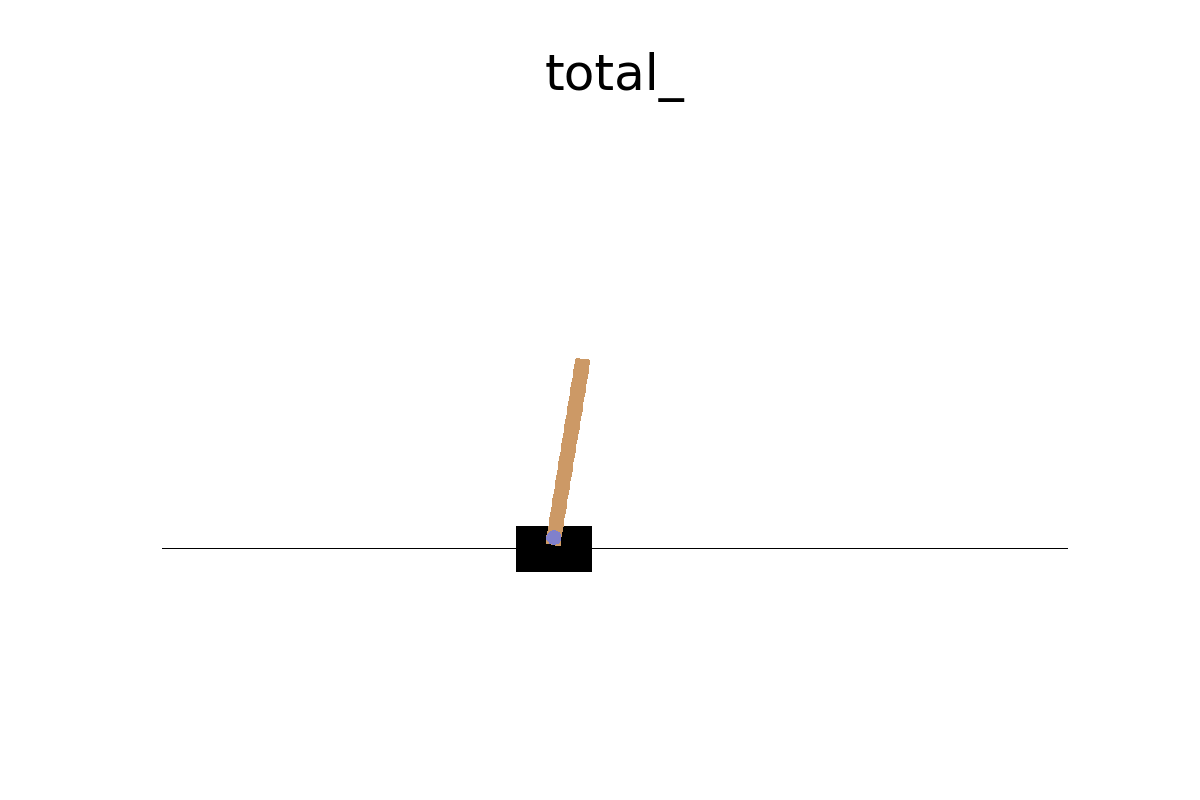
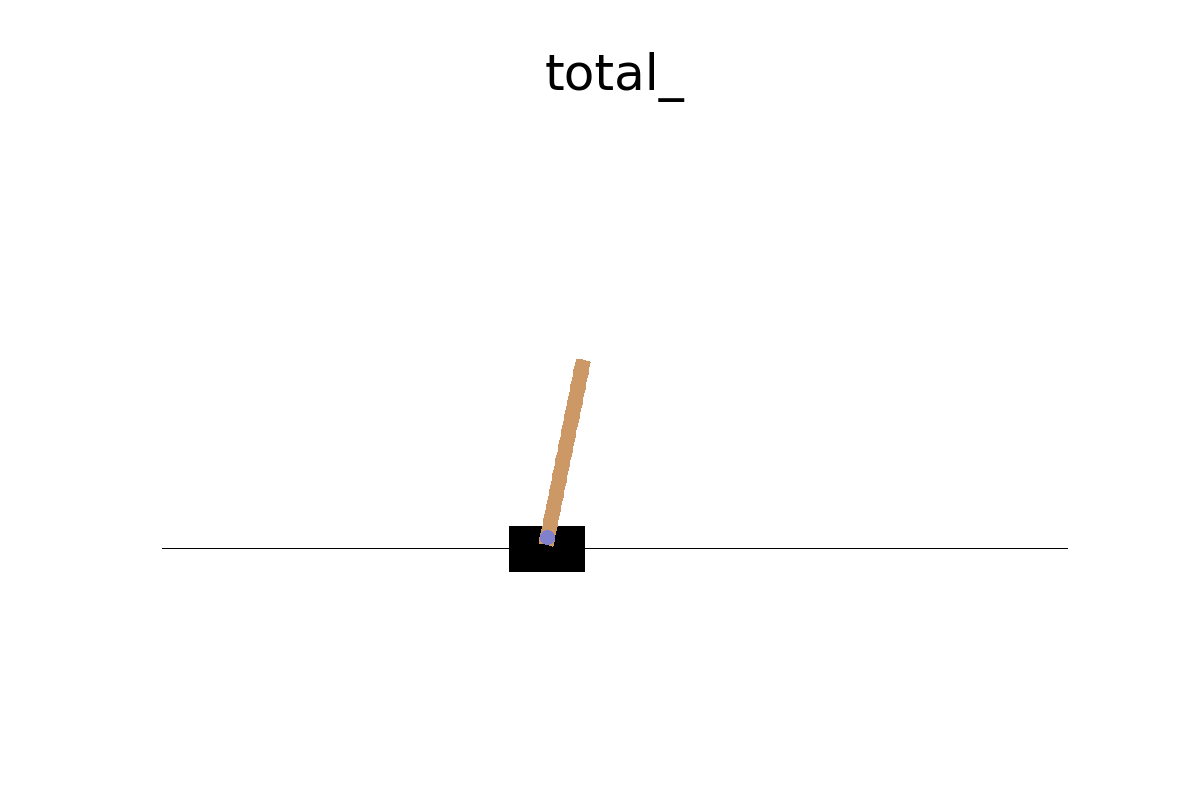
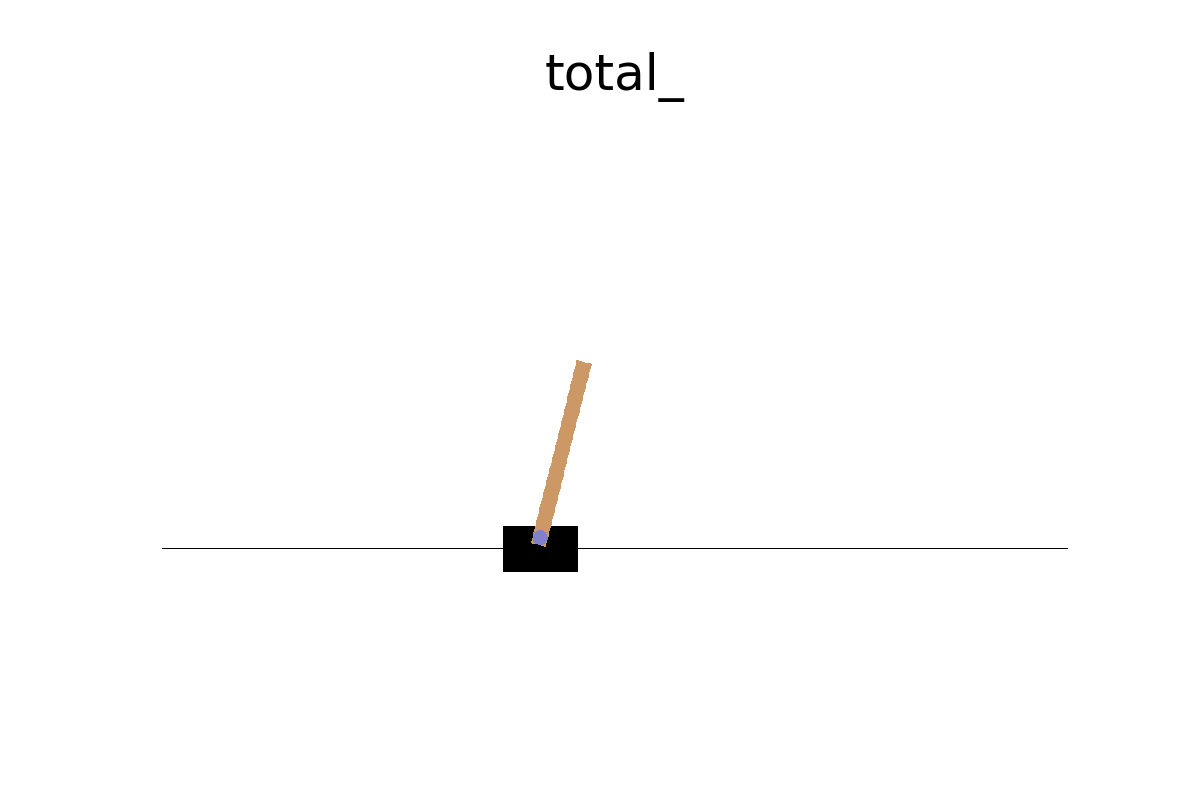

In [103]:
display_frames_as_gif(frames,"total_")

In [85]:
eval("new_state")

array([ 0.04767238,  0.35787612, -0.22337102, -1.01765141])

In [95]:
new_state

array([ 0.08790468,  1.01976062, -0.24641245, -1.74737437])


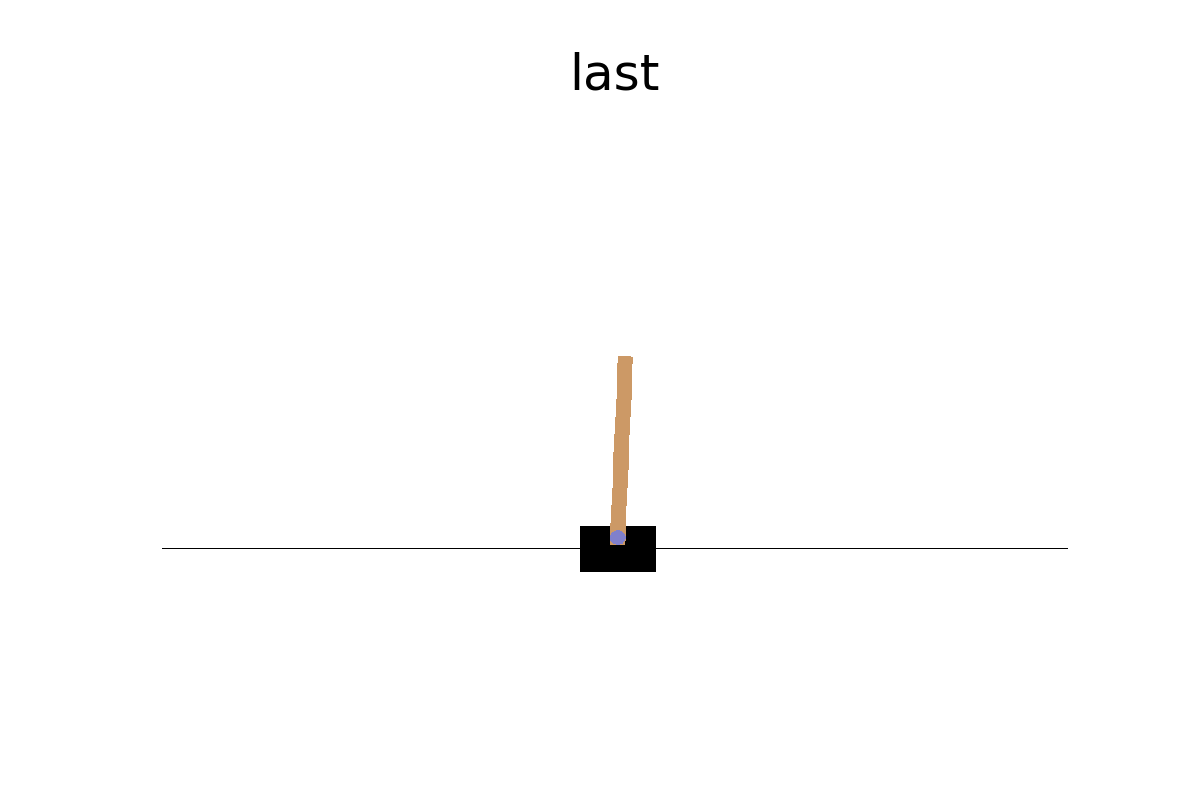
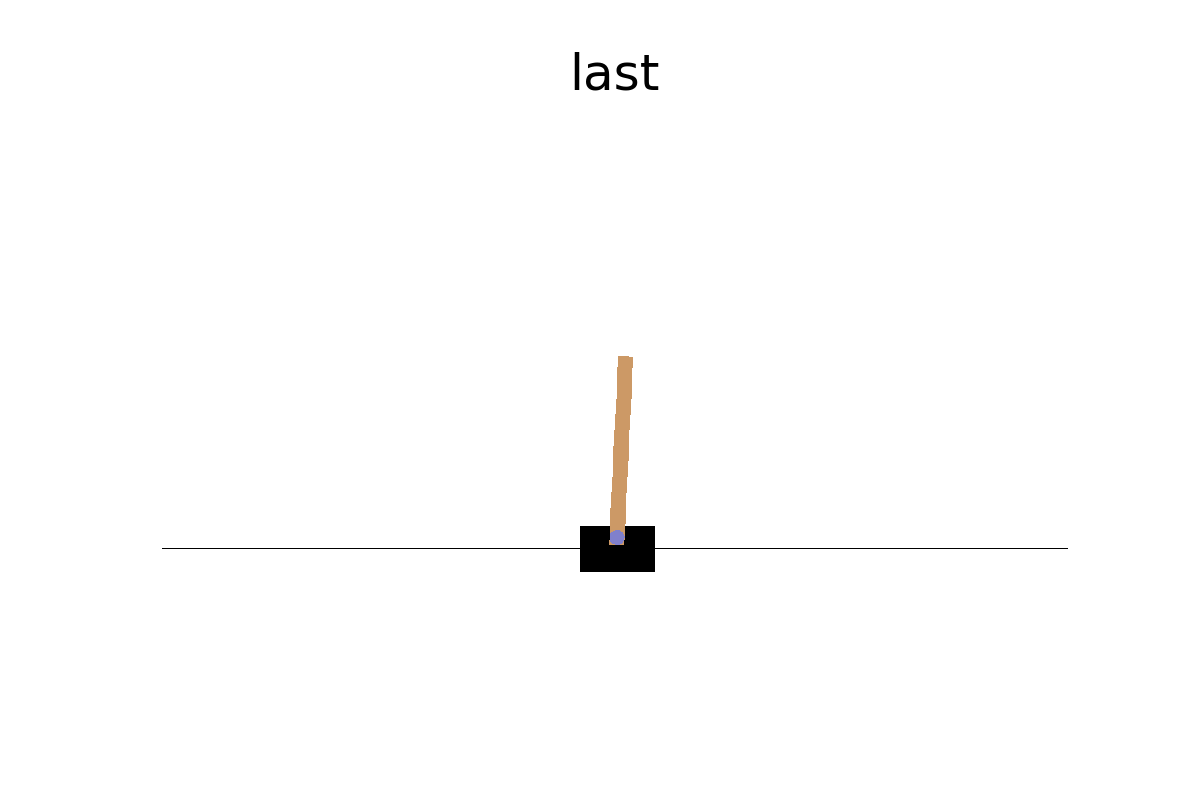
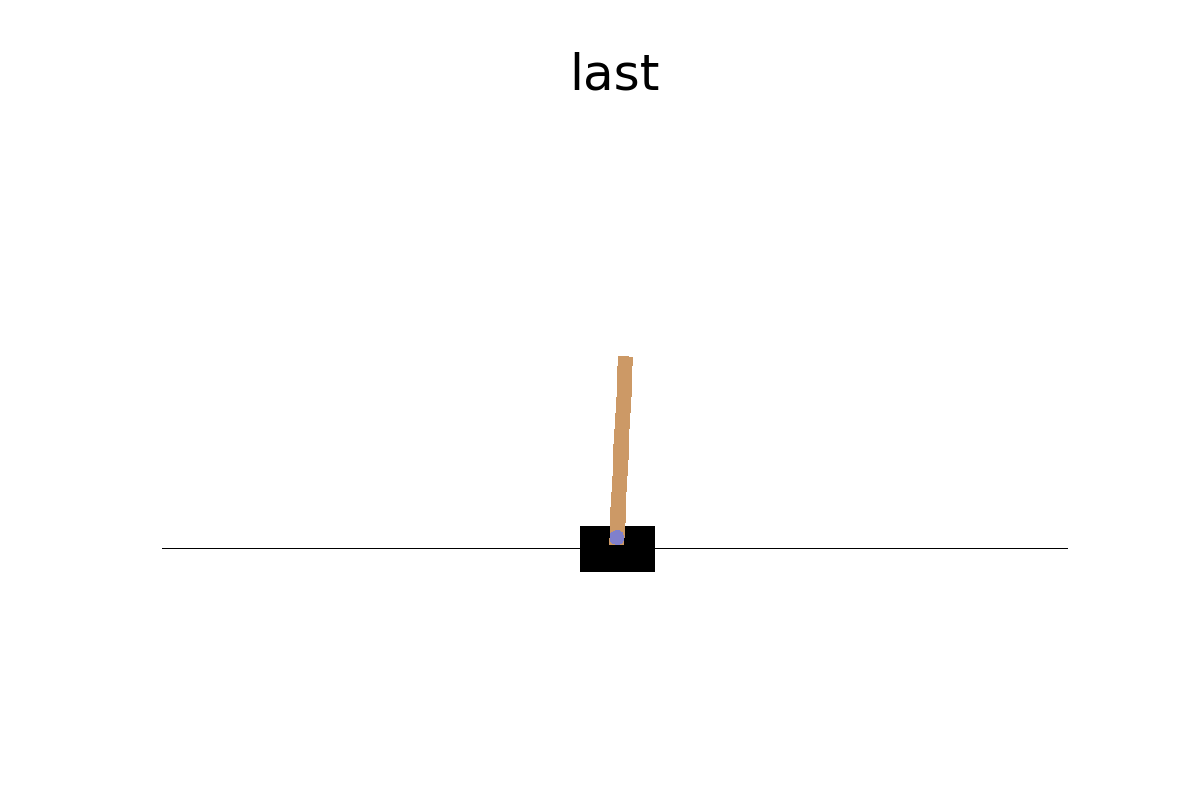
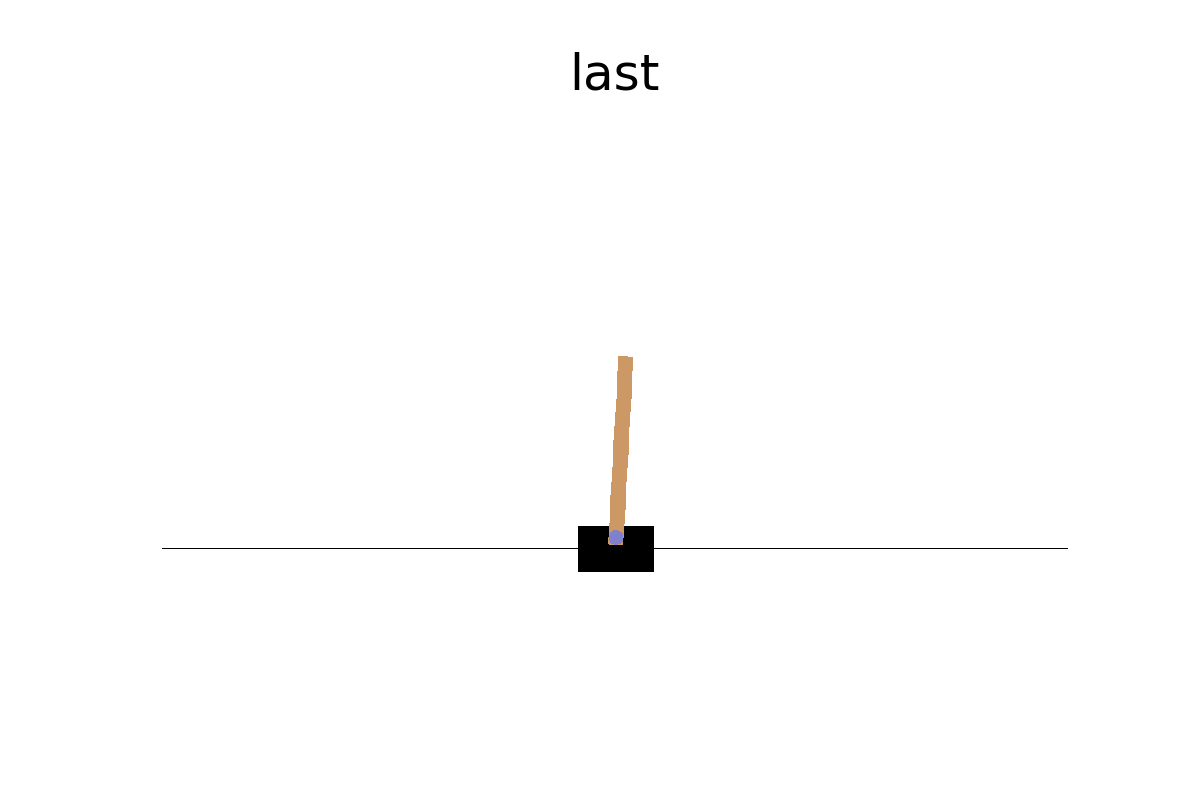
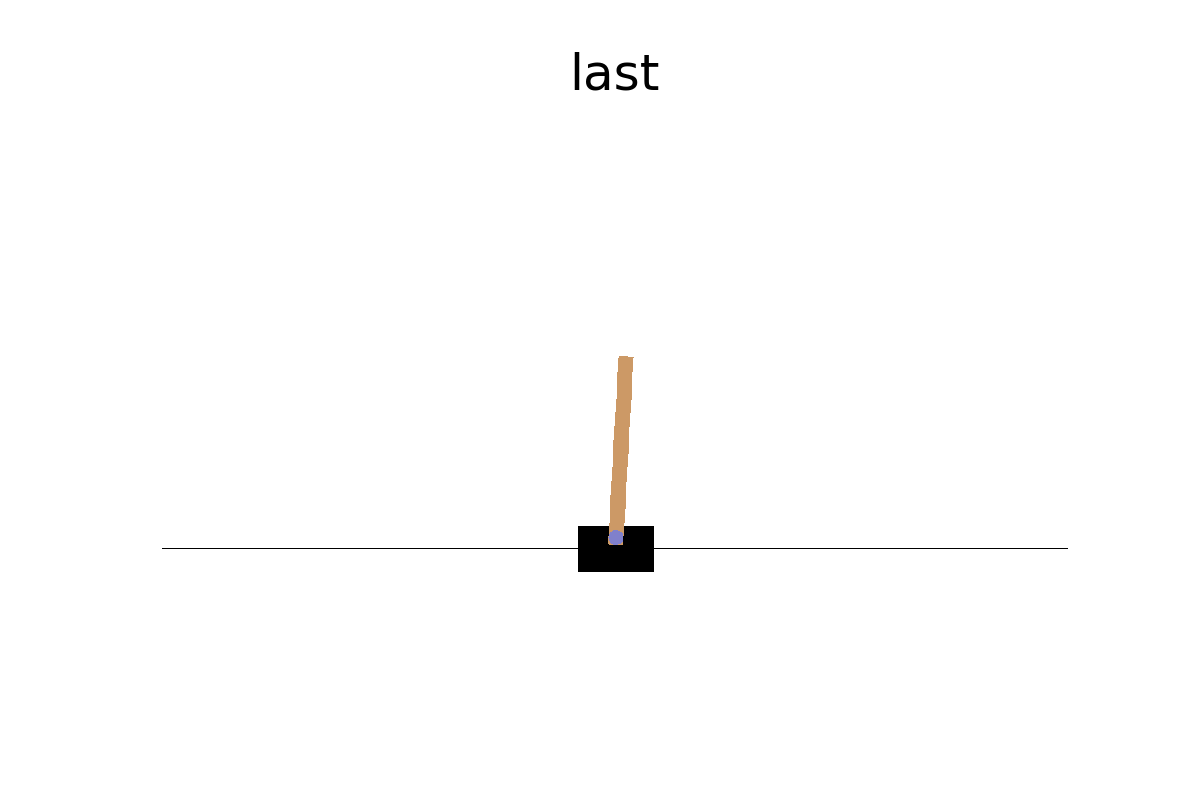
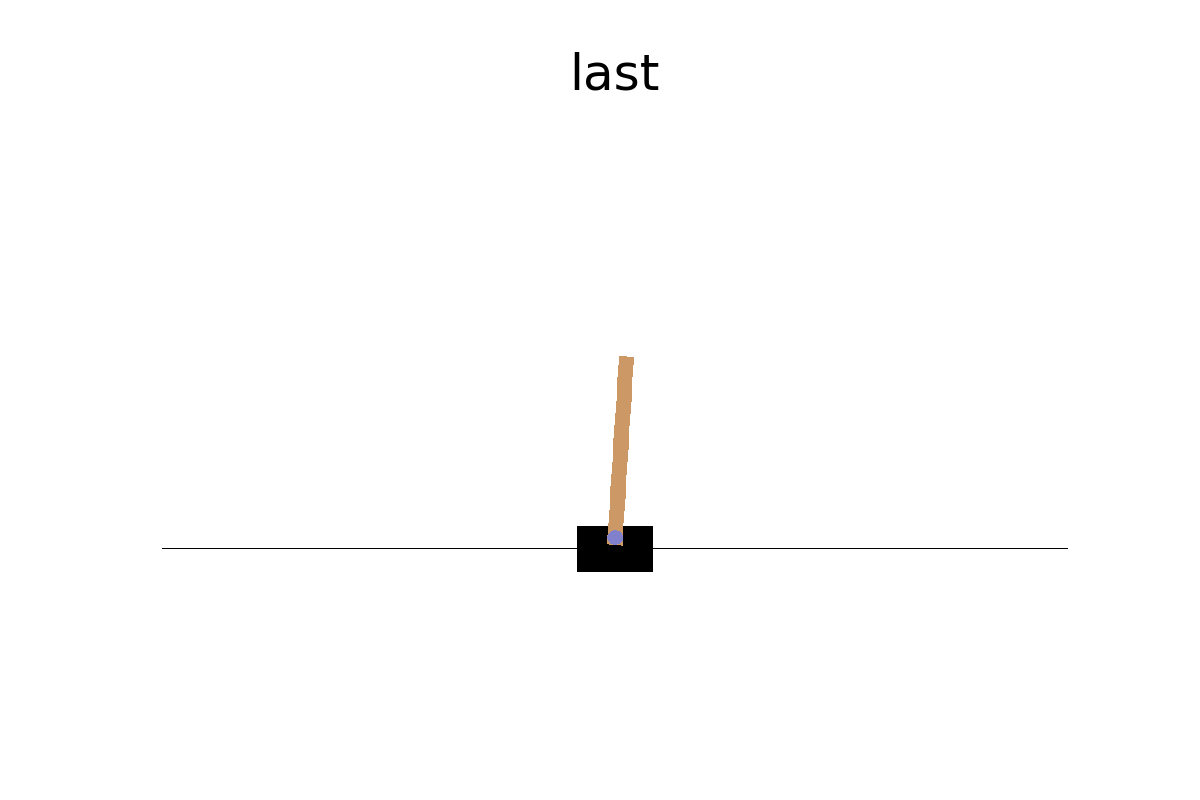
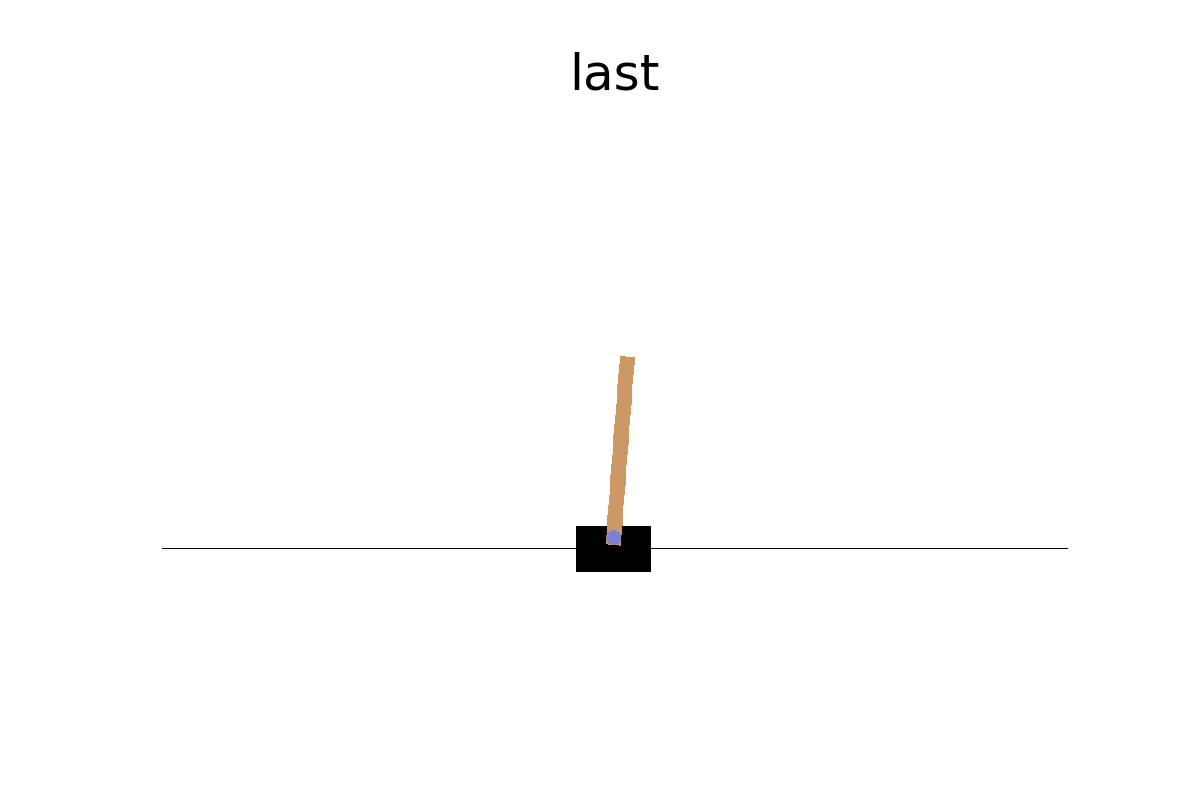
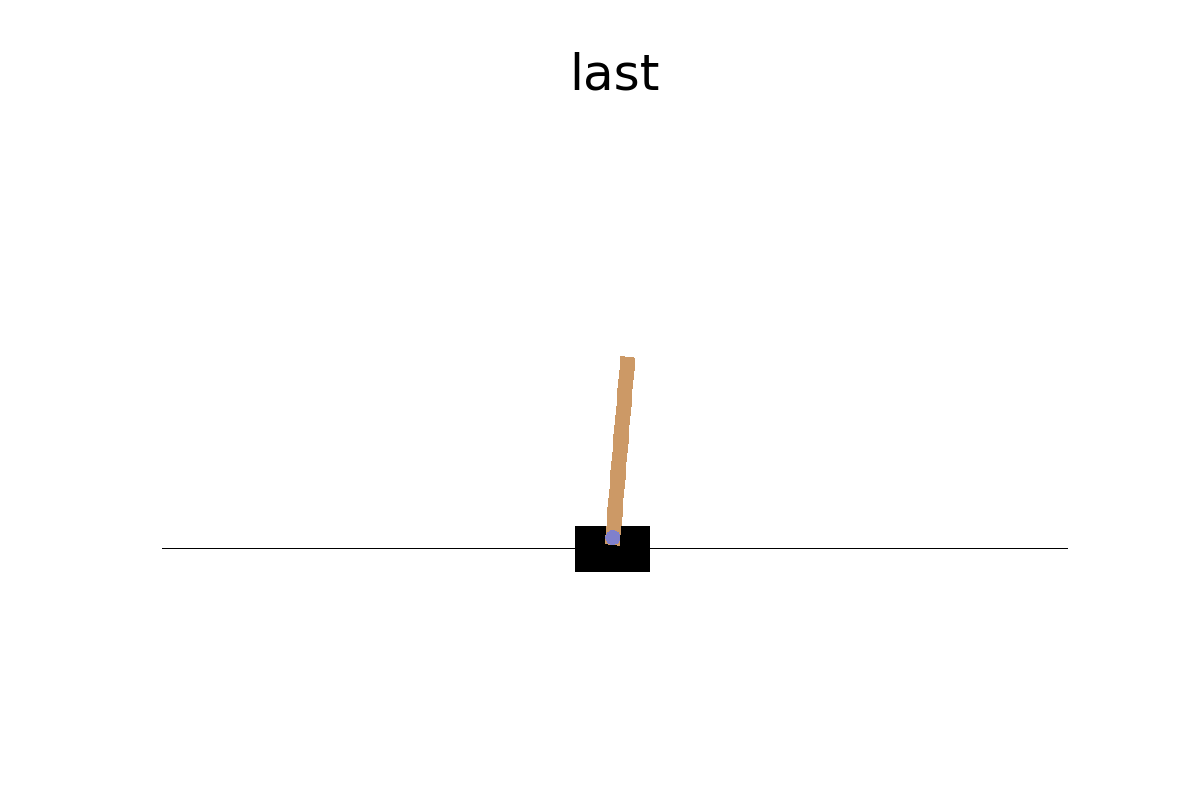
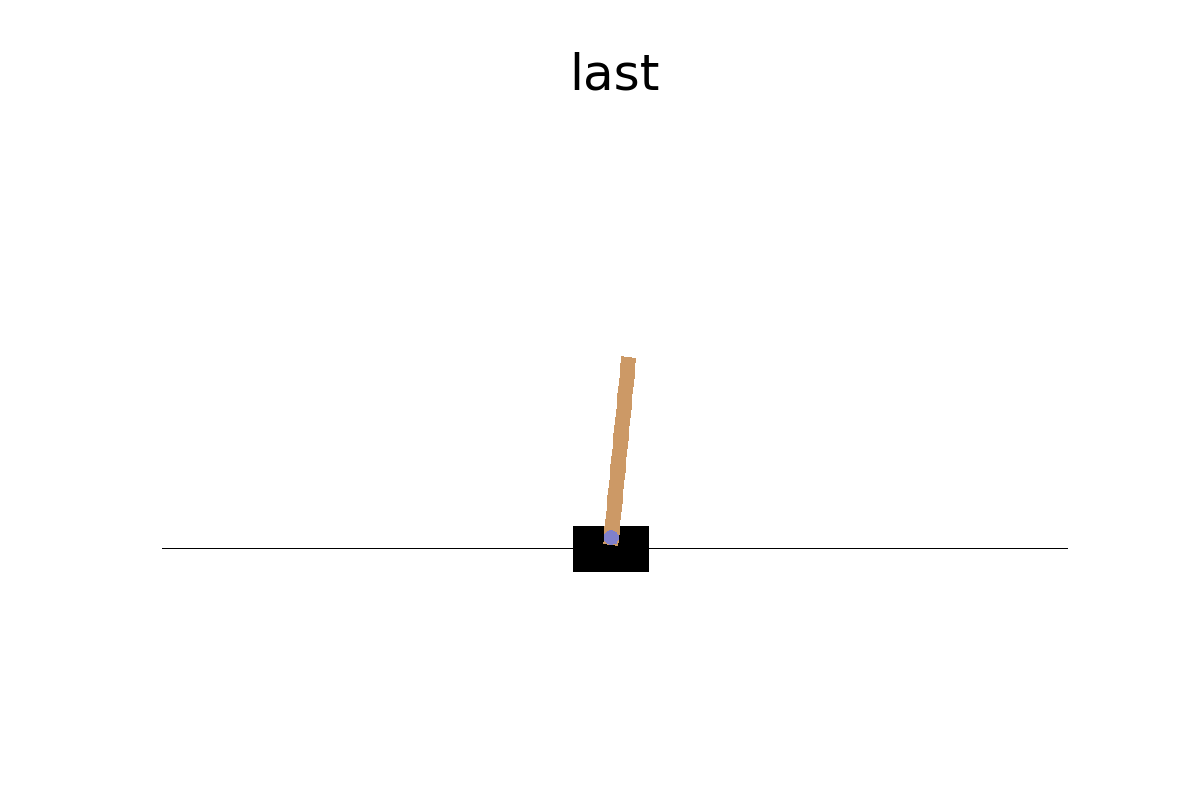
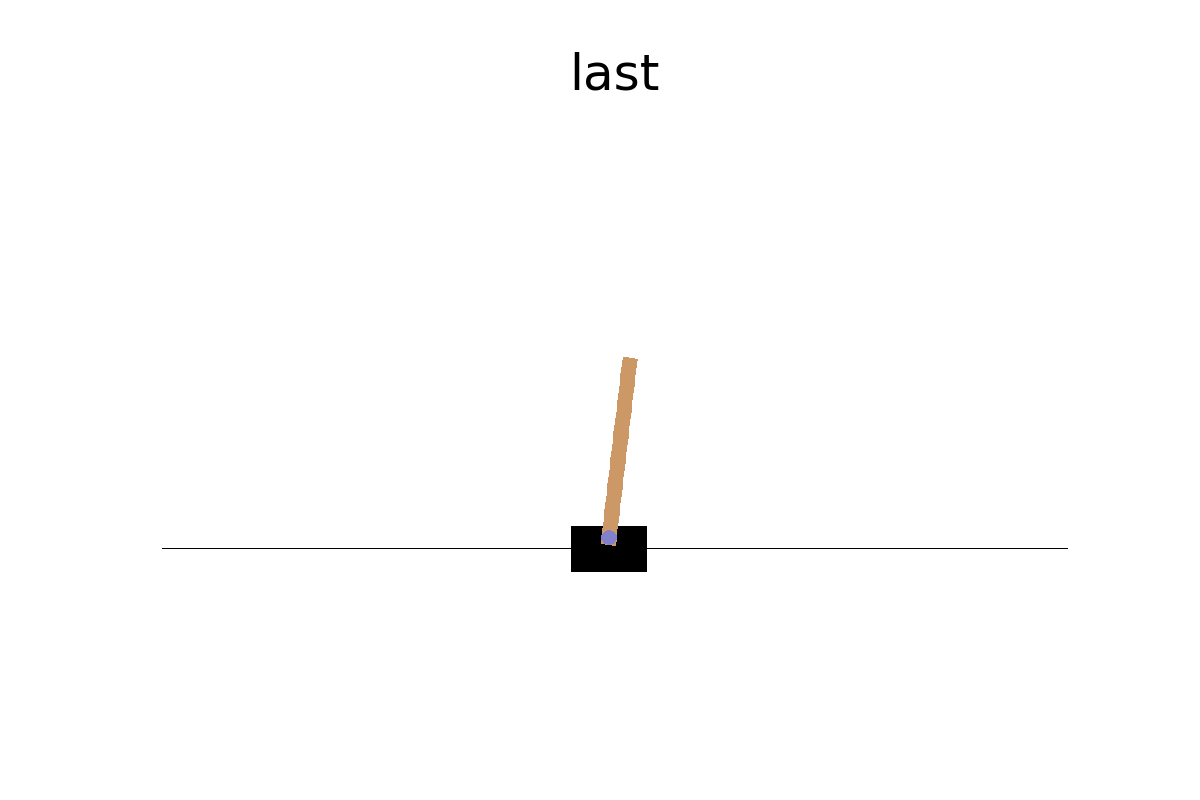
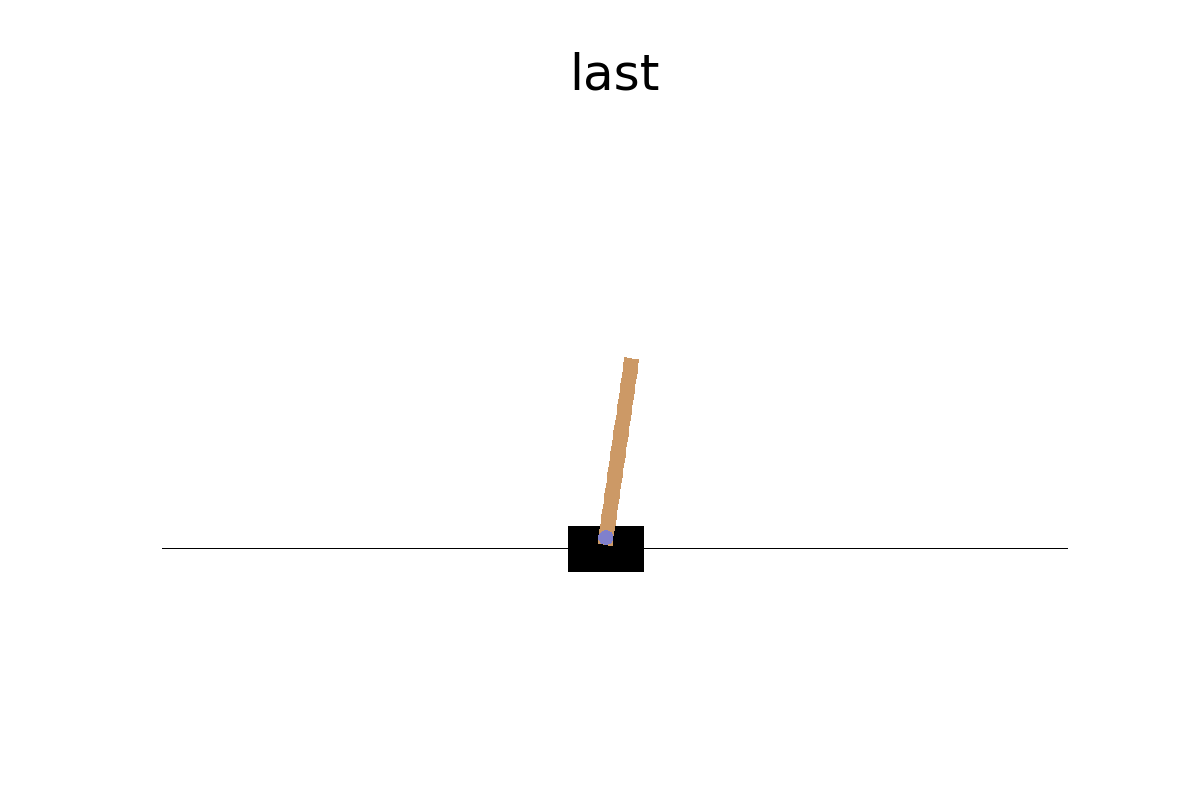
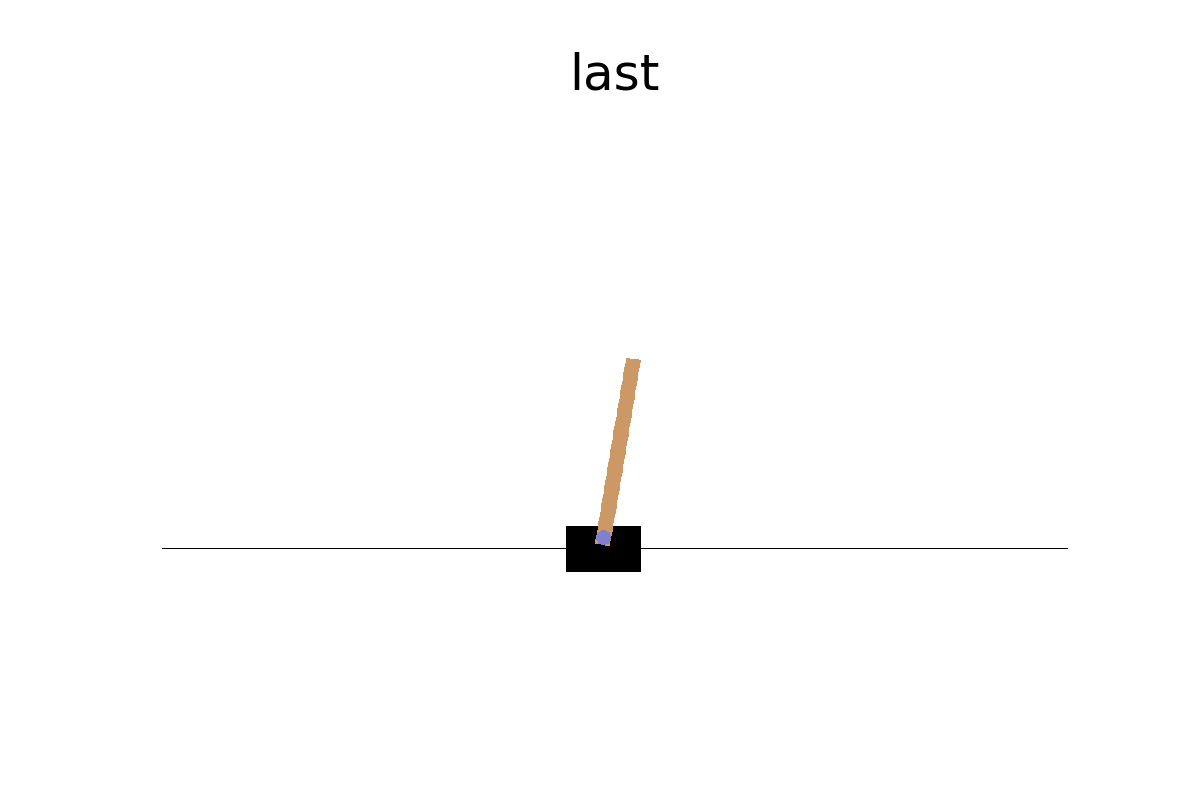
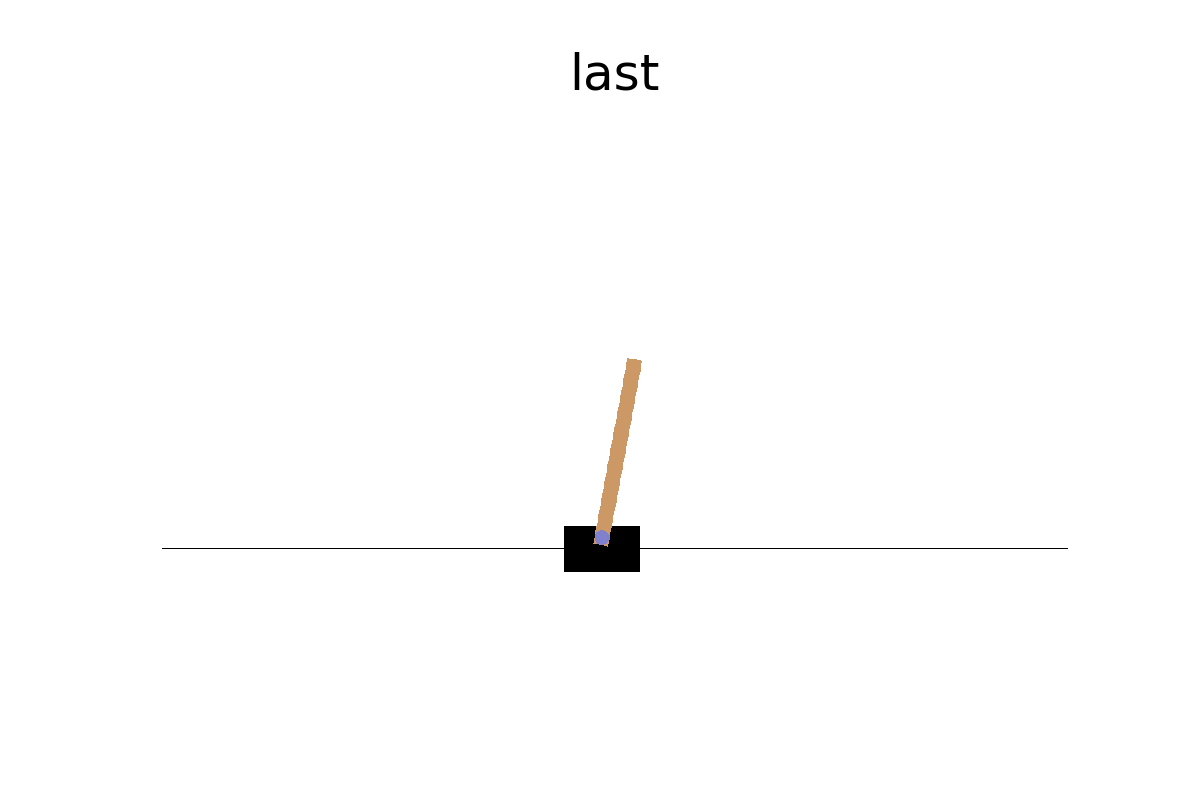
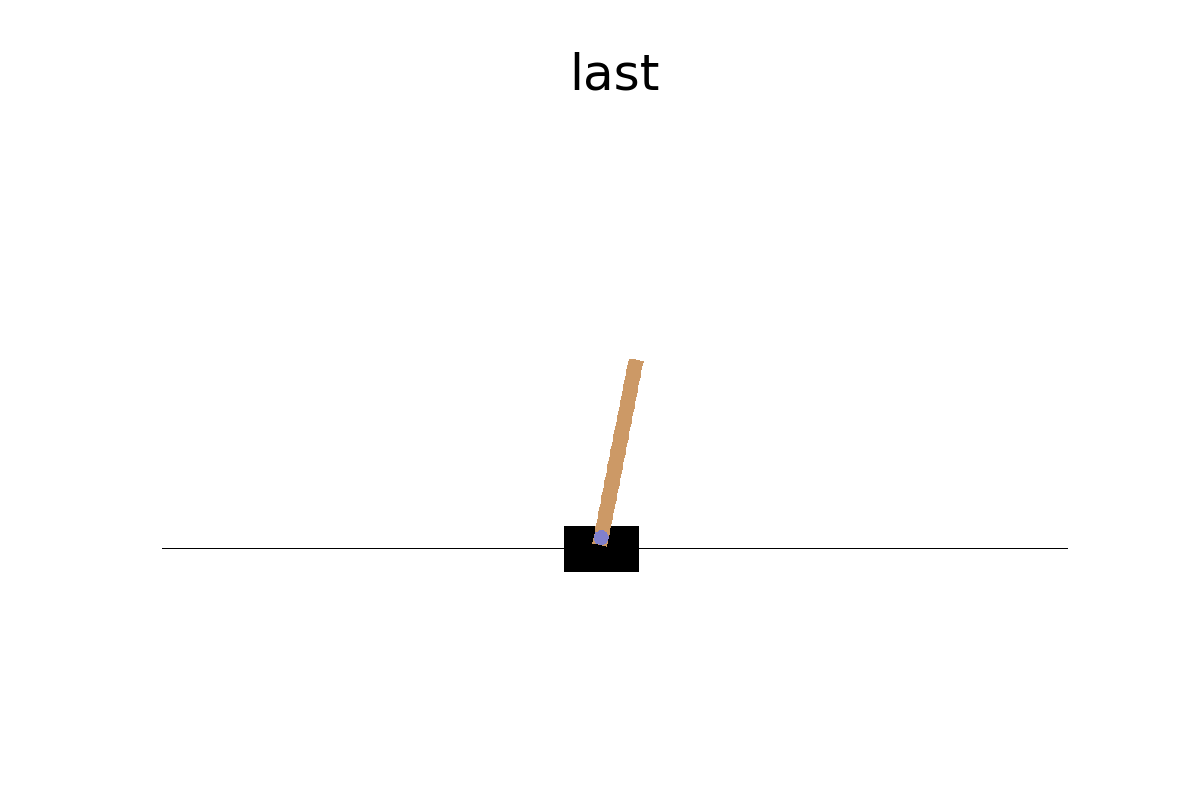
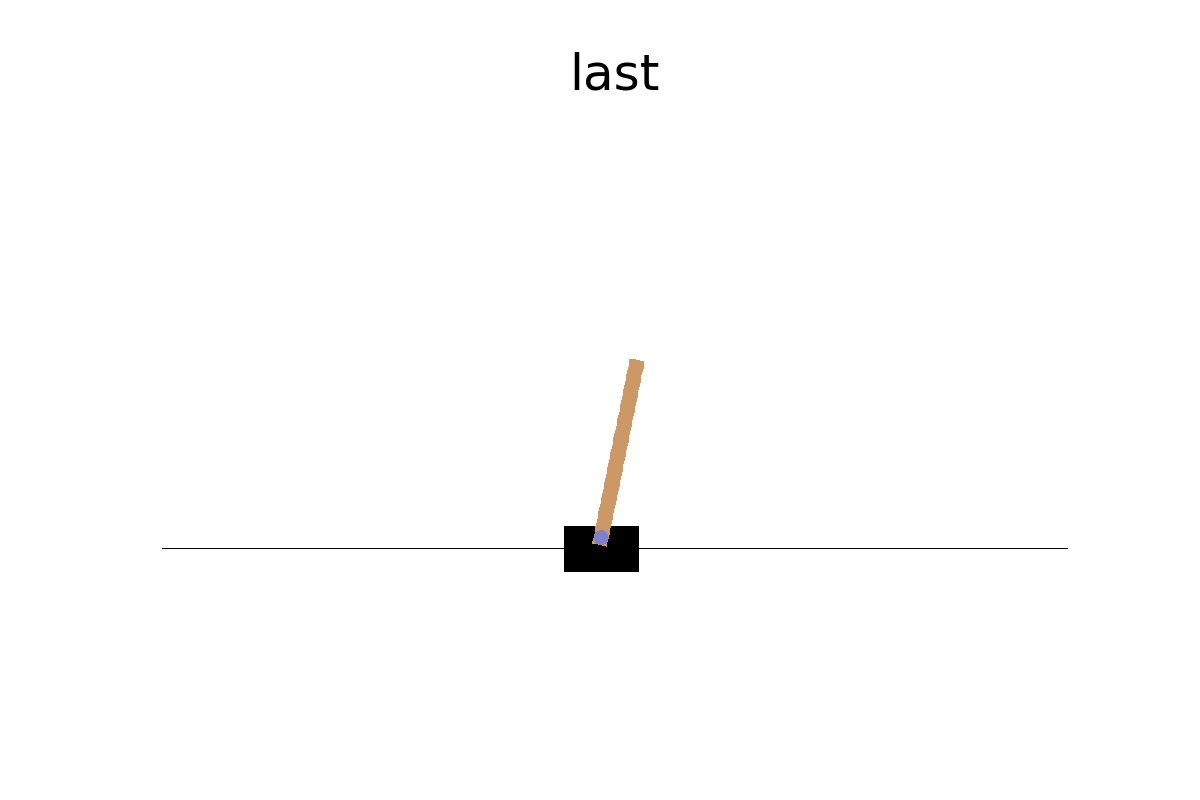
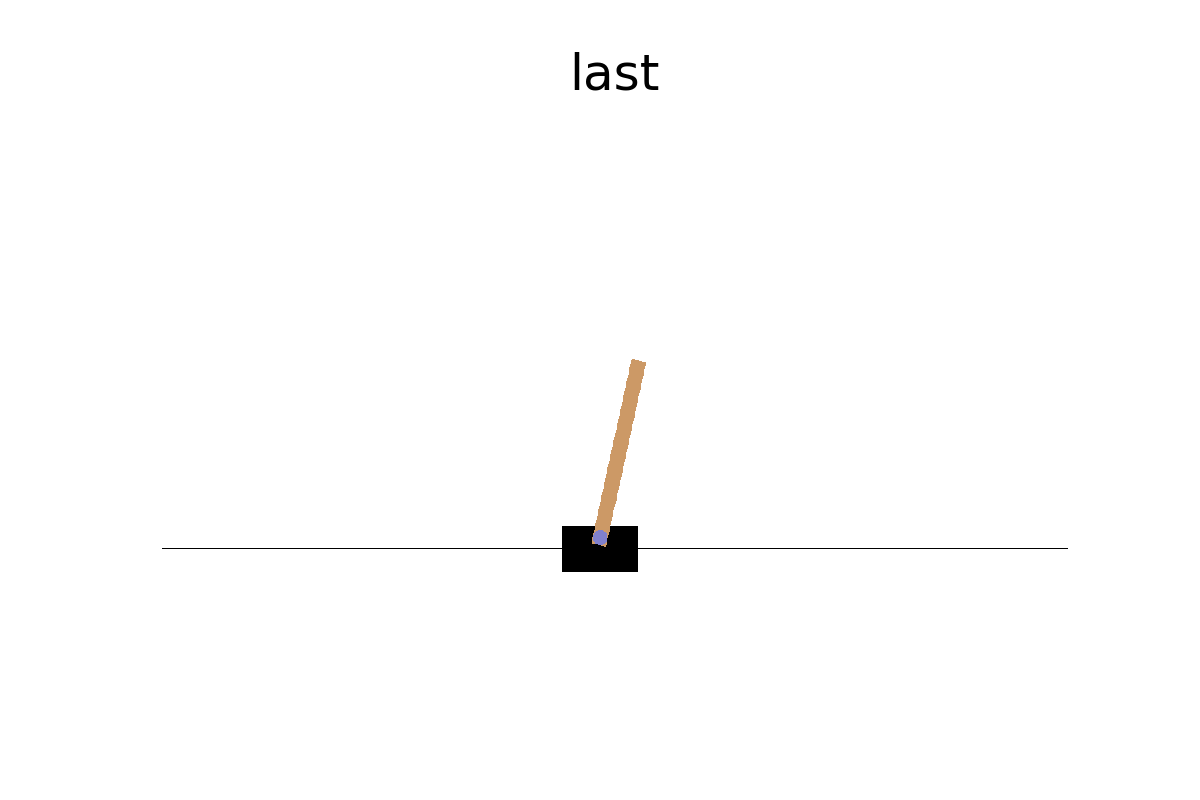
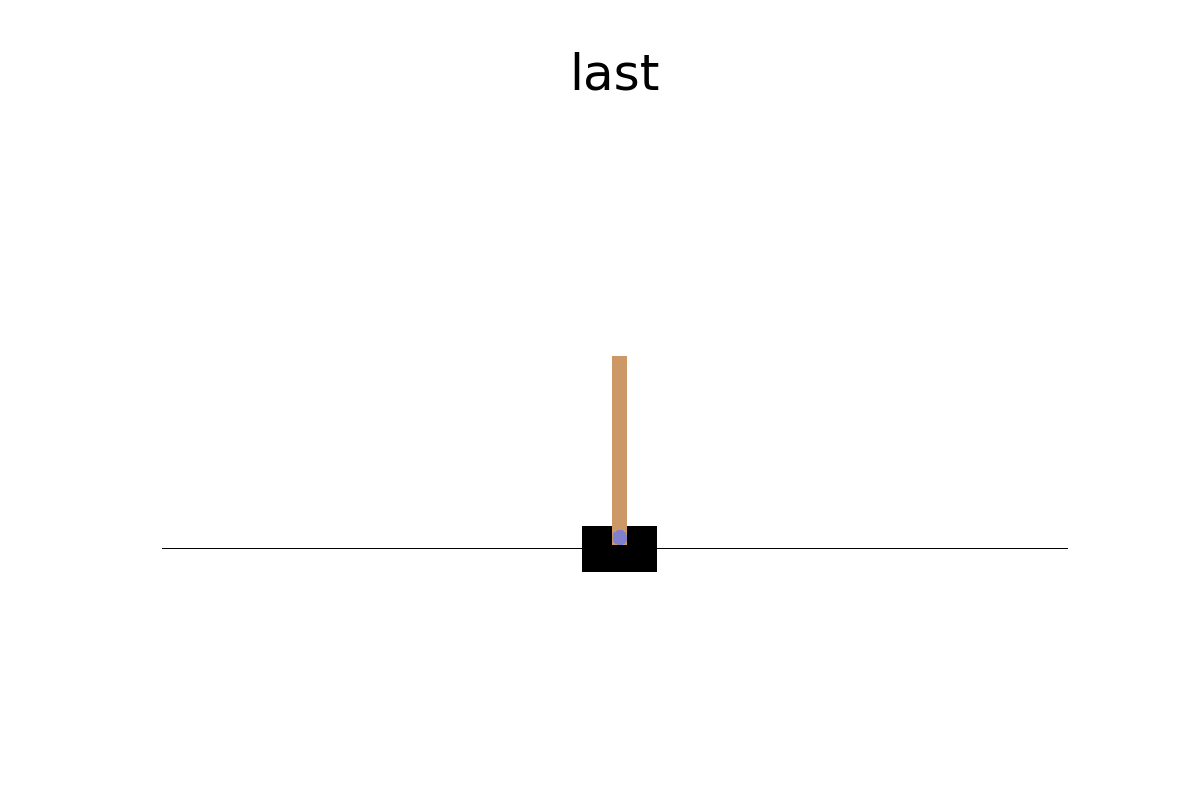
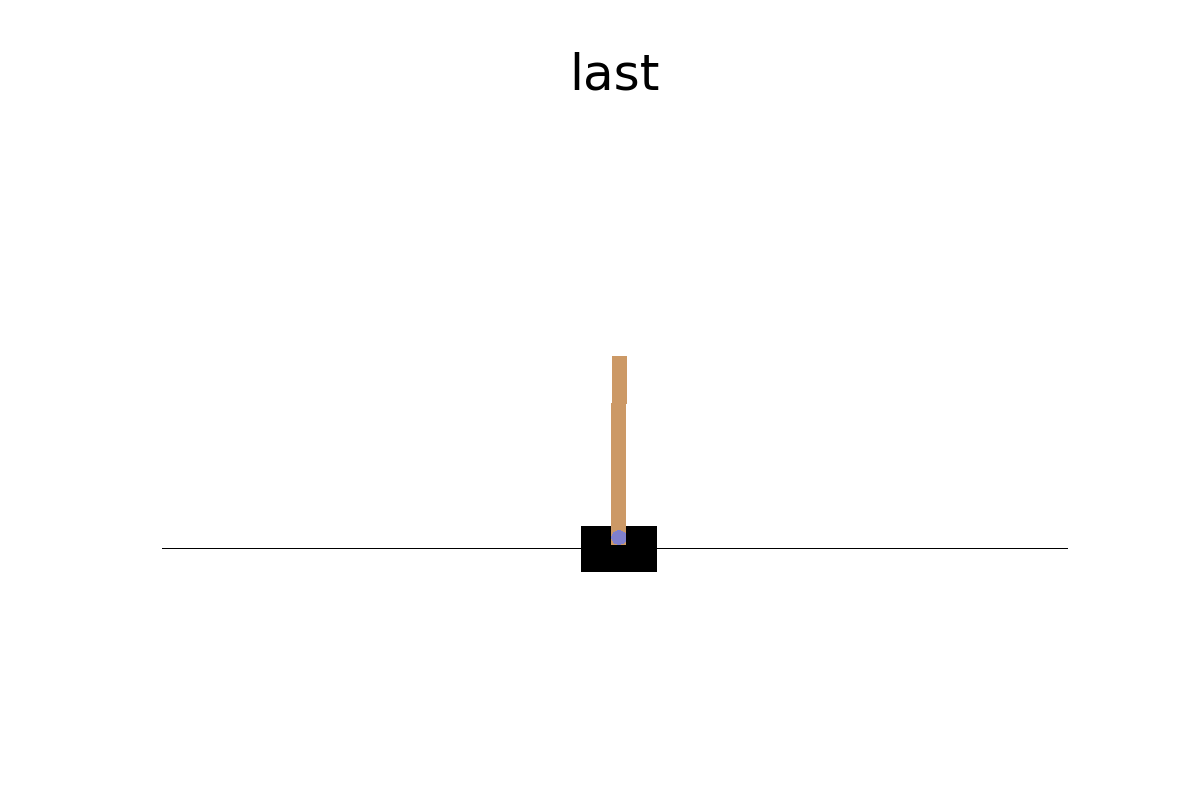
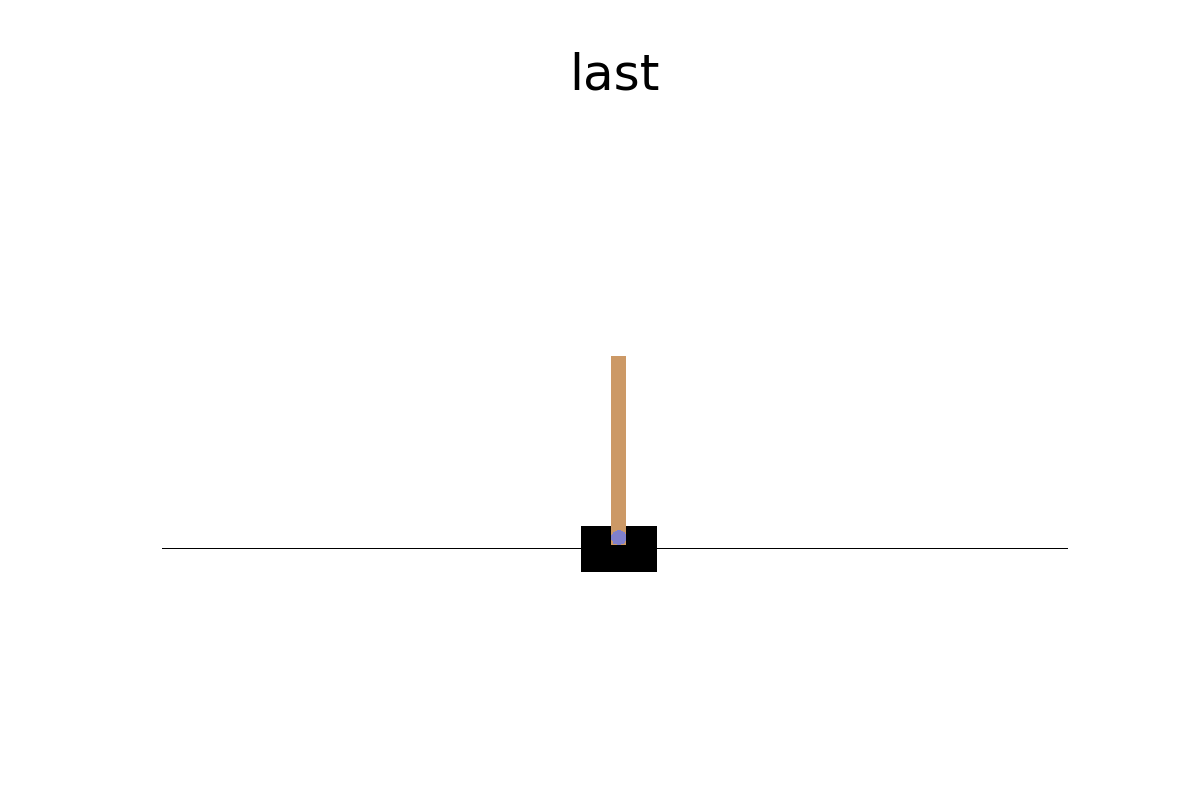
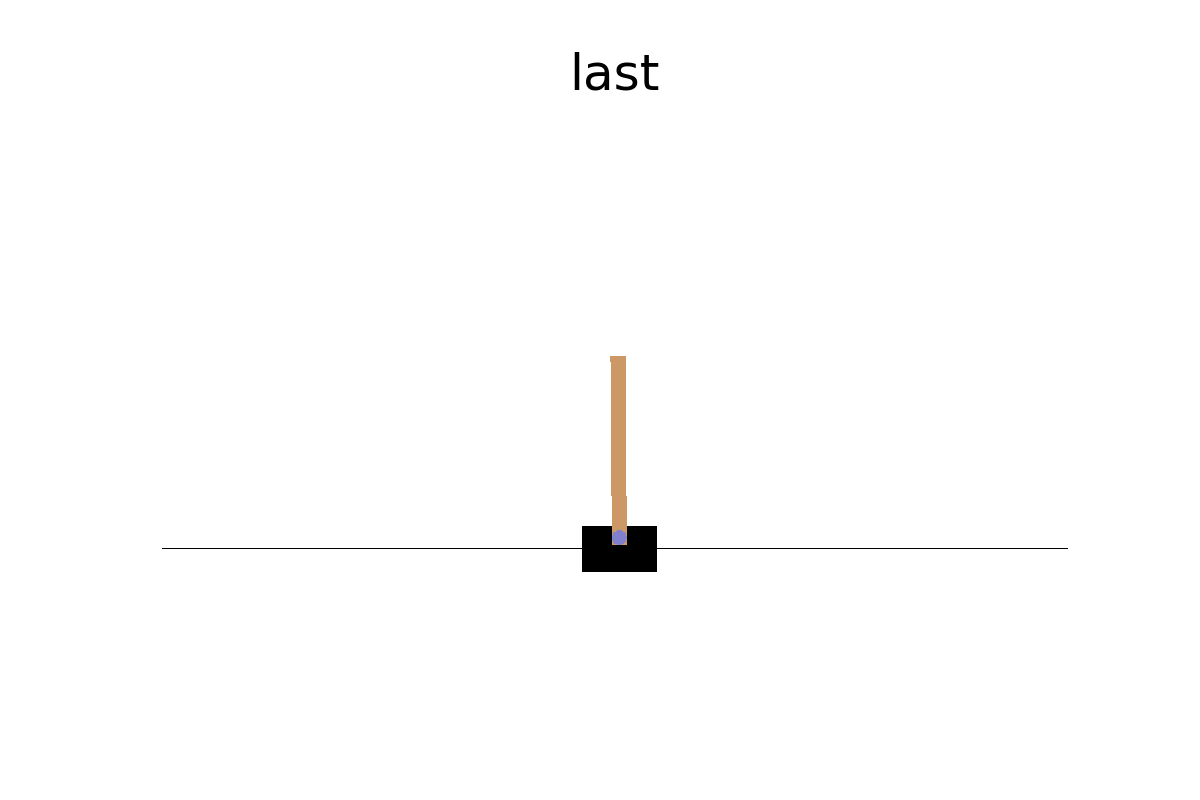
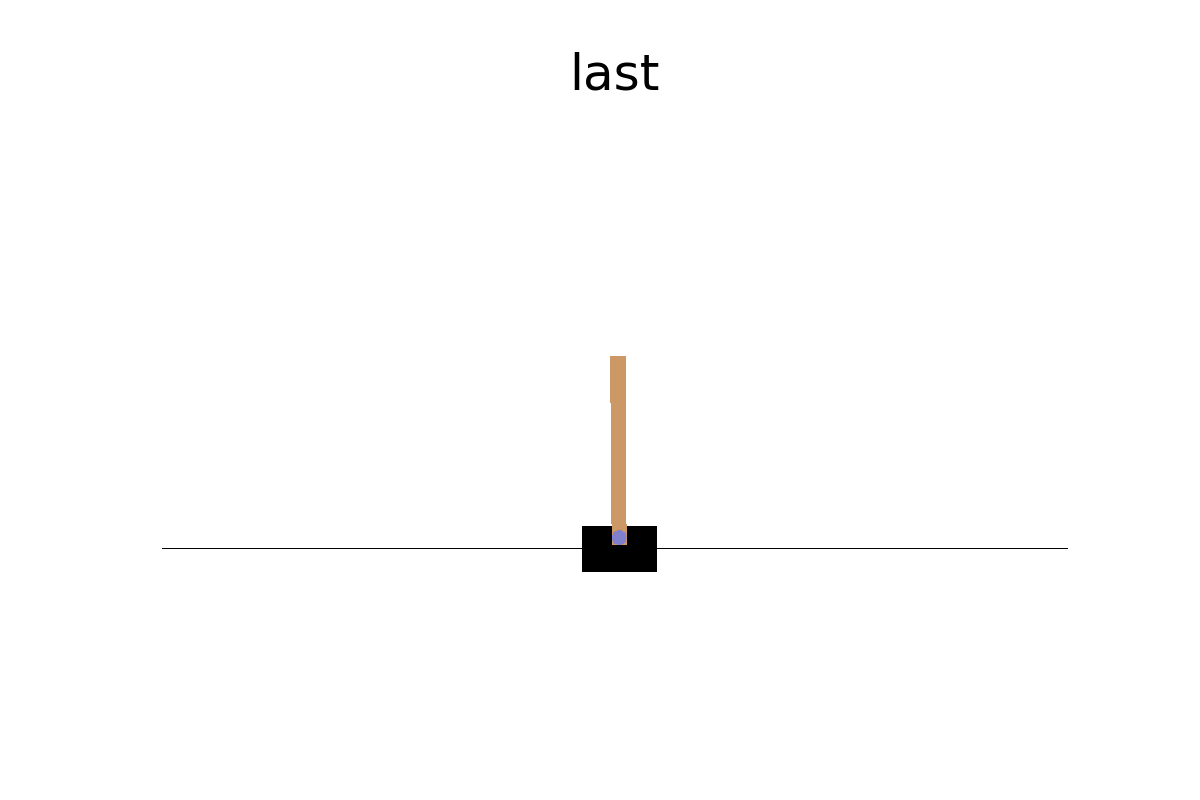
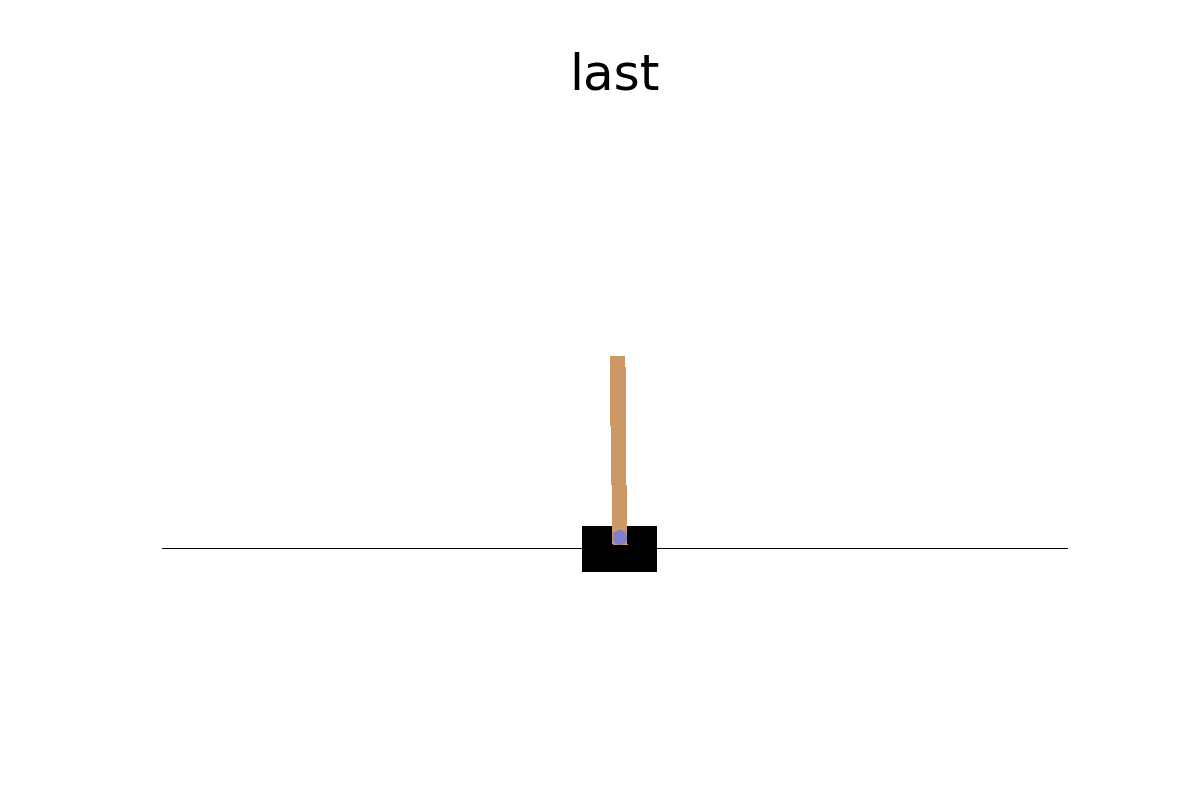
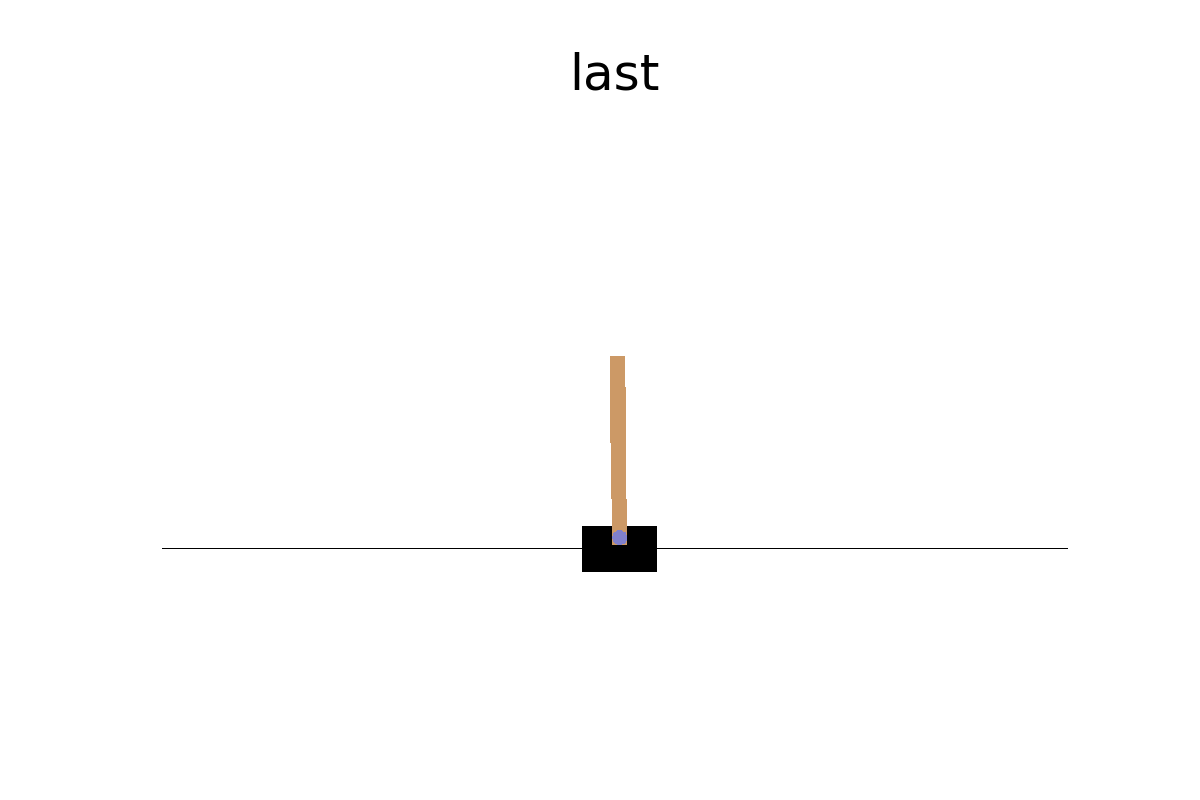
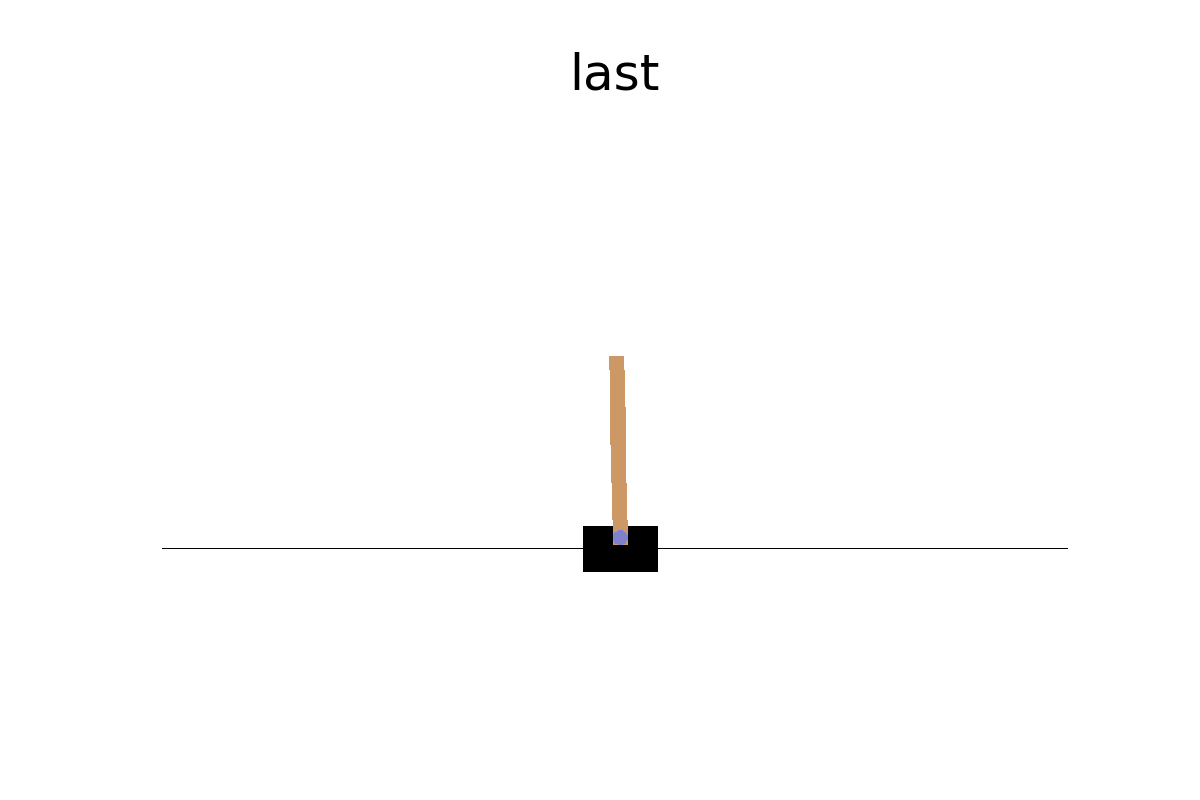
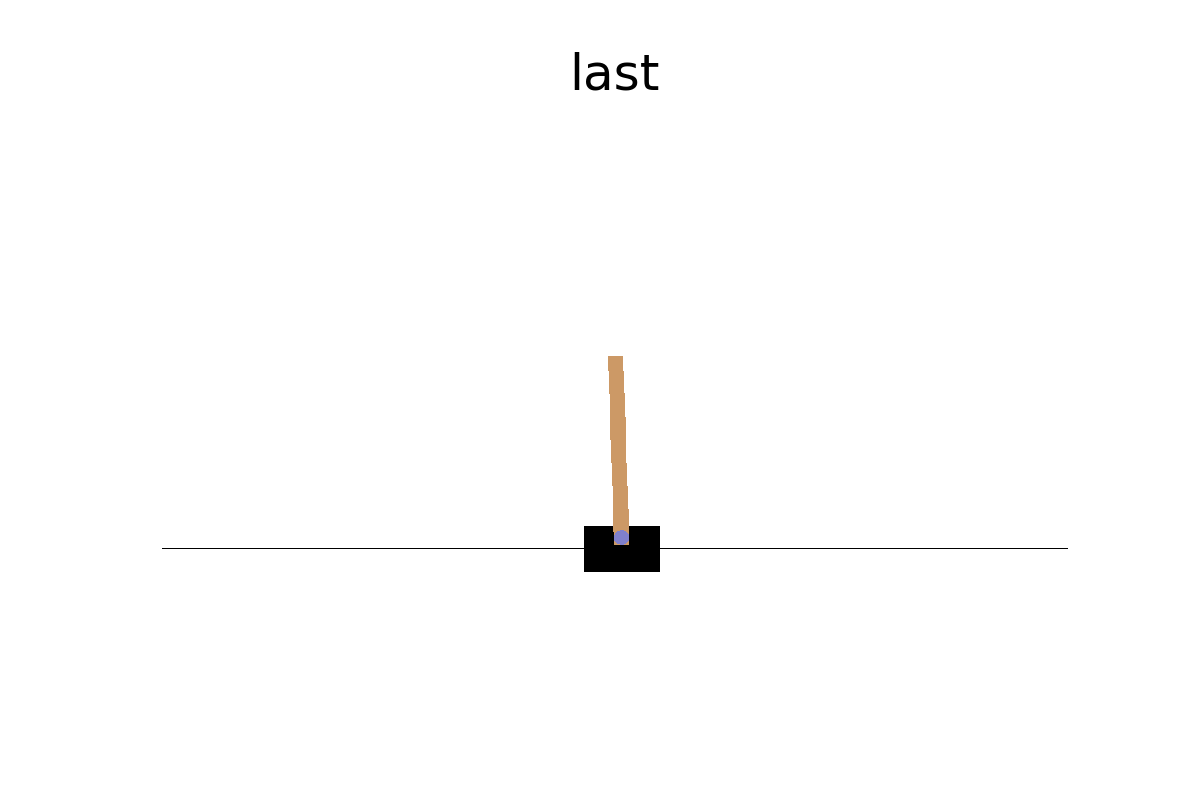
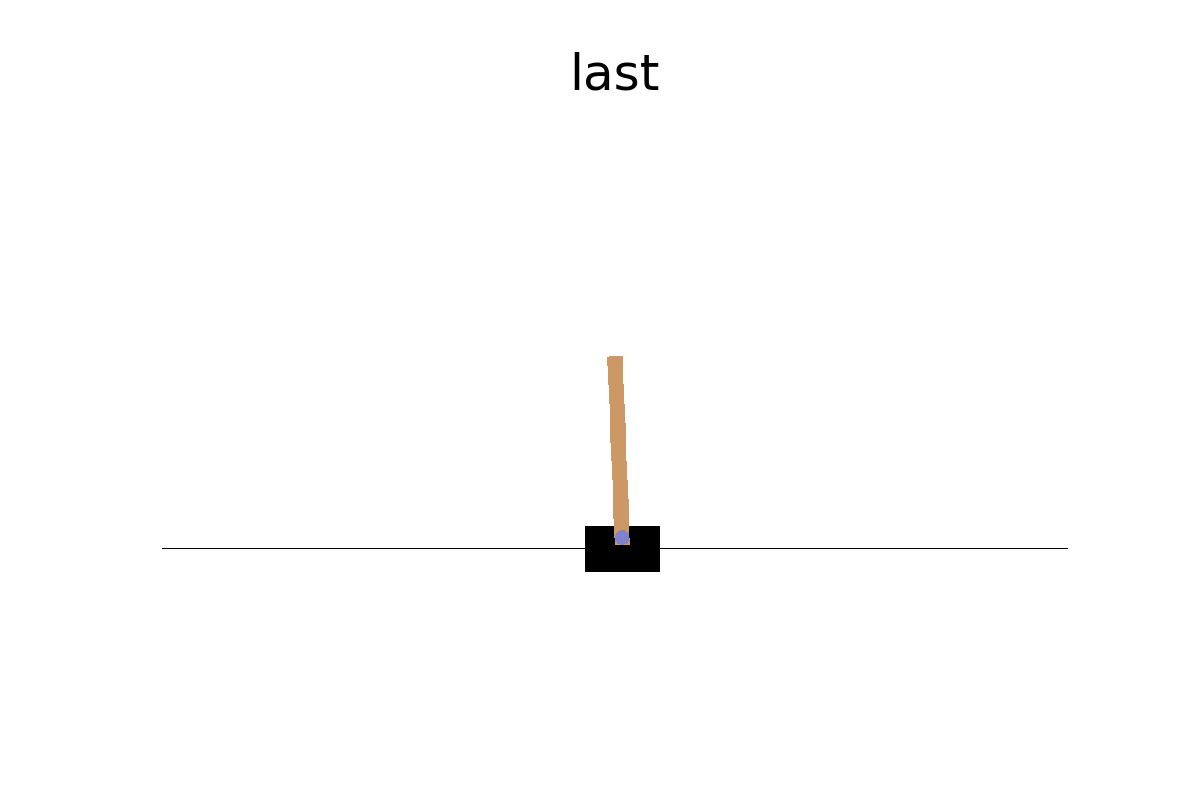
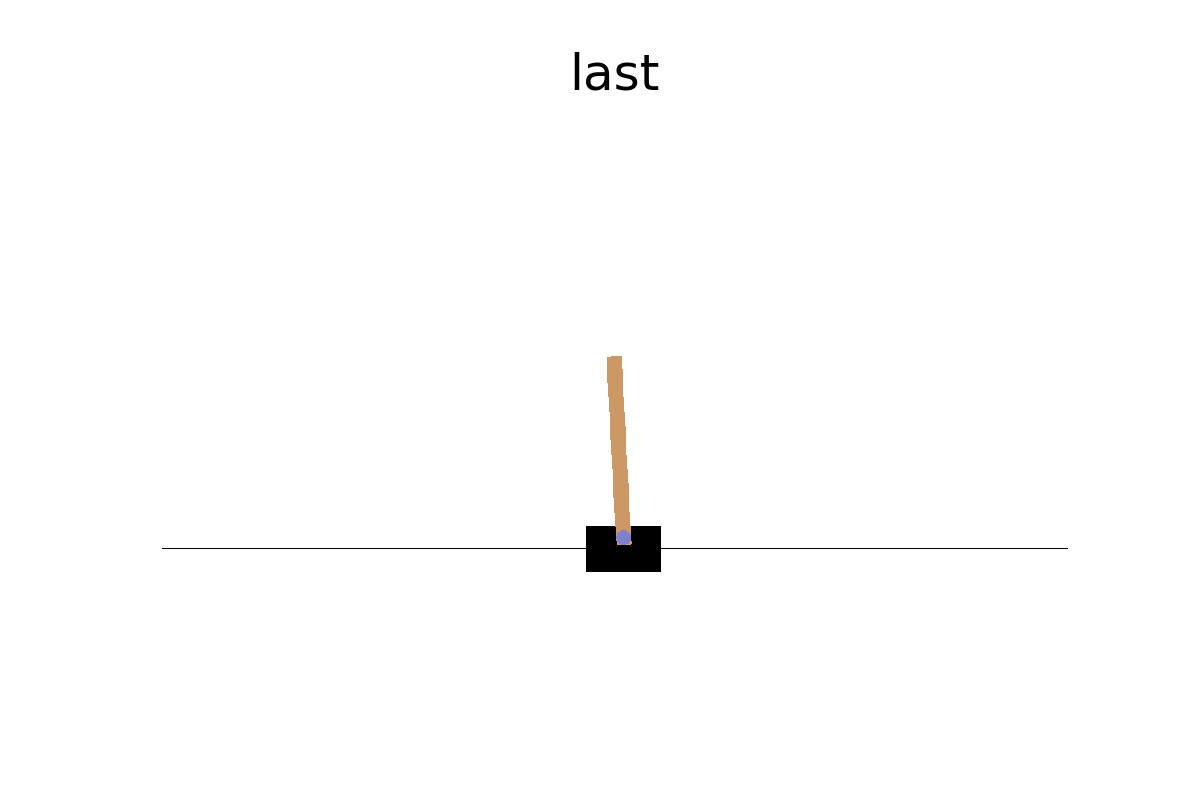
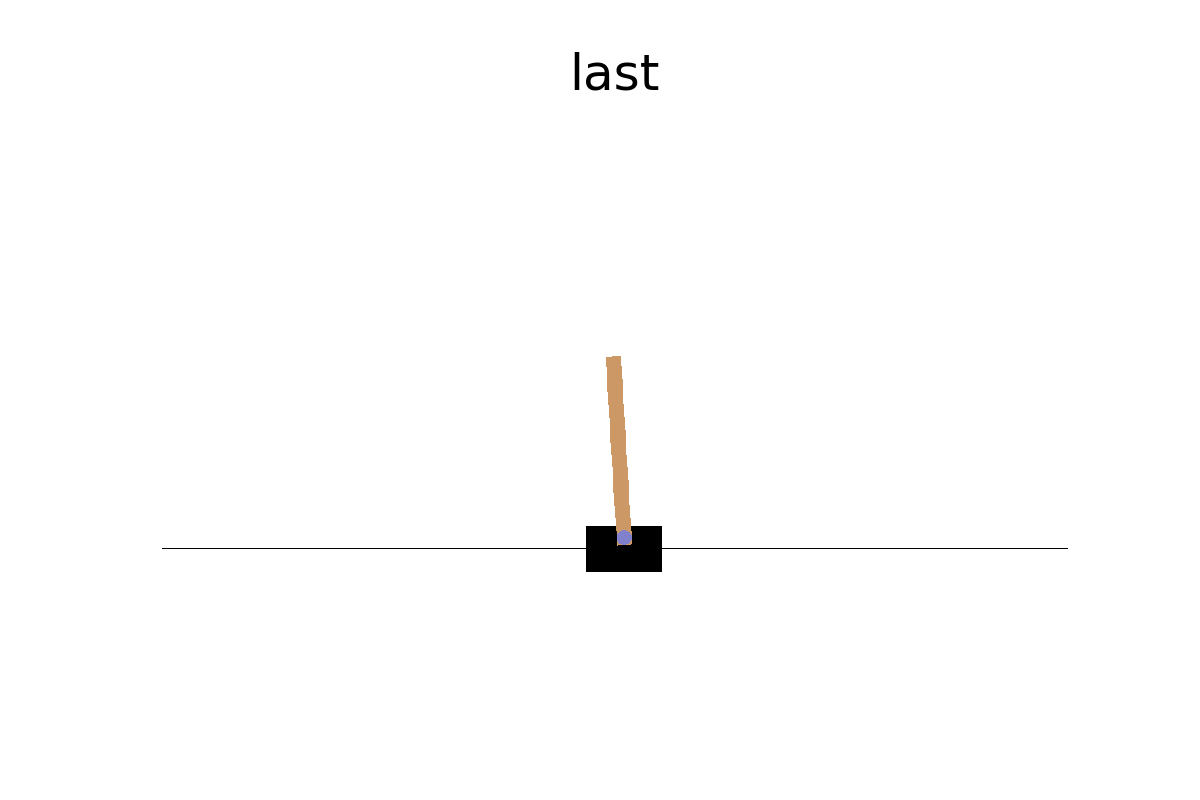
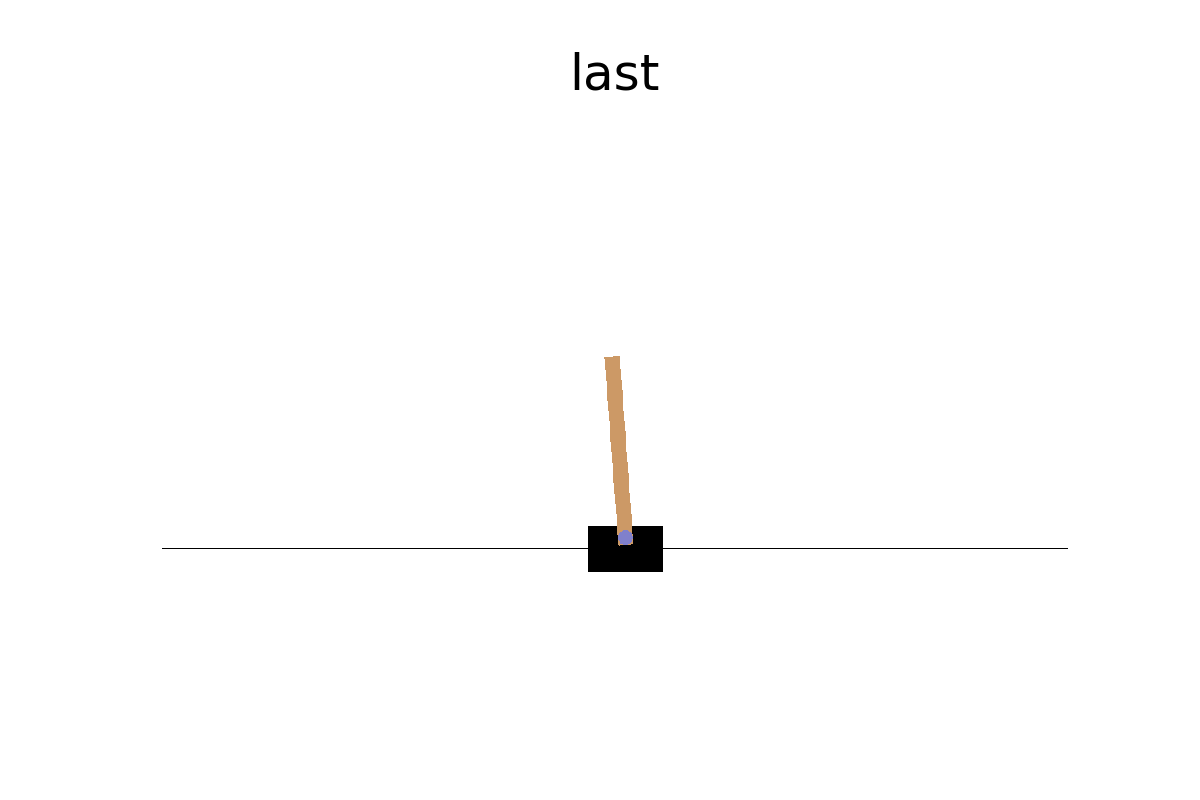
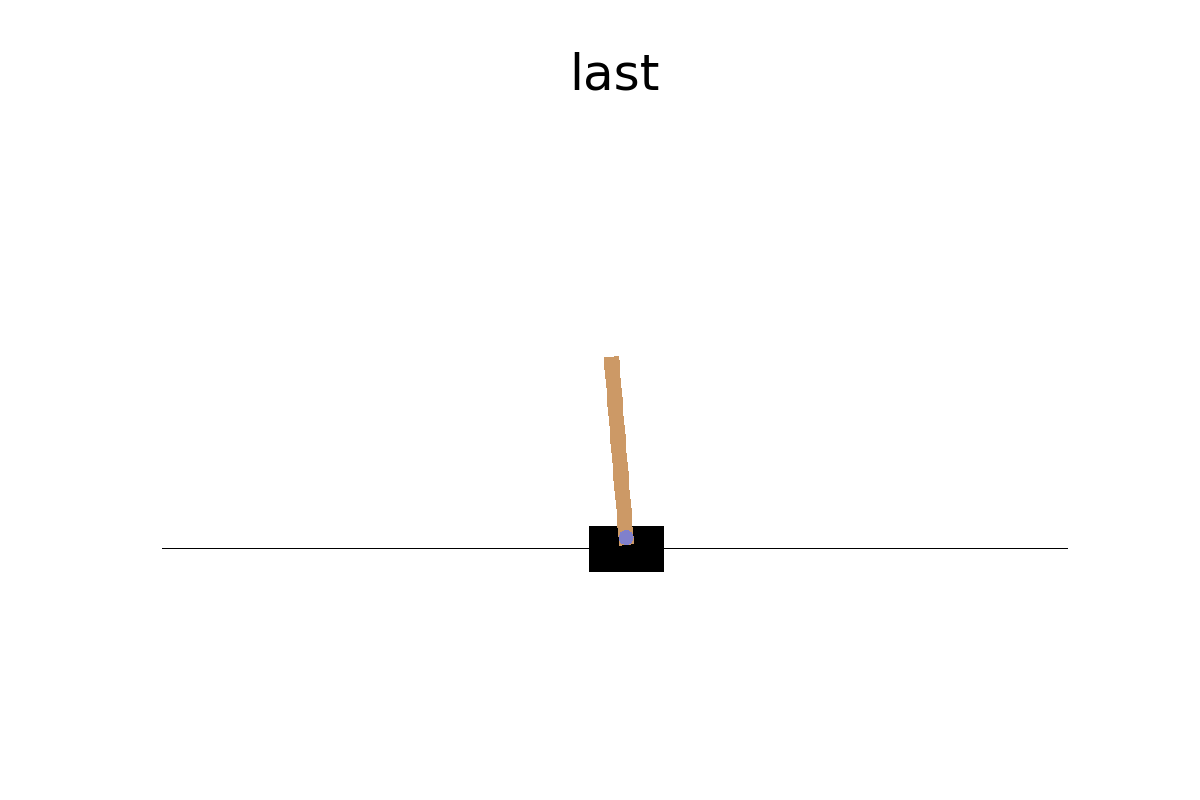
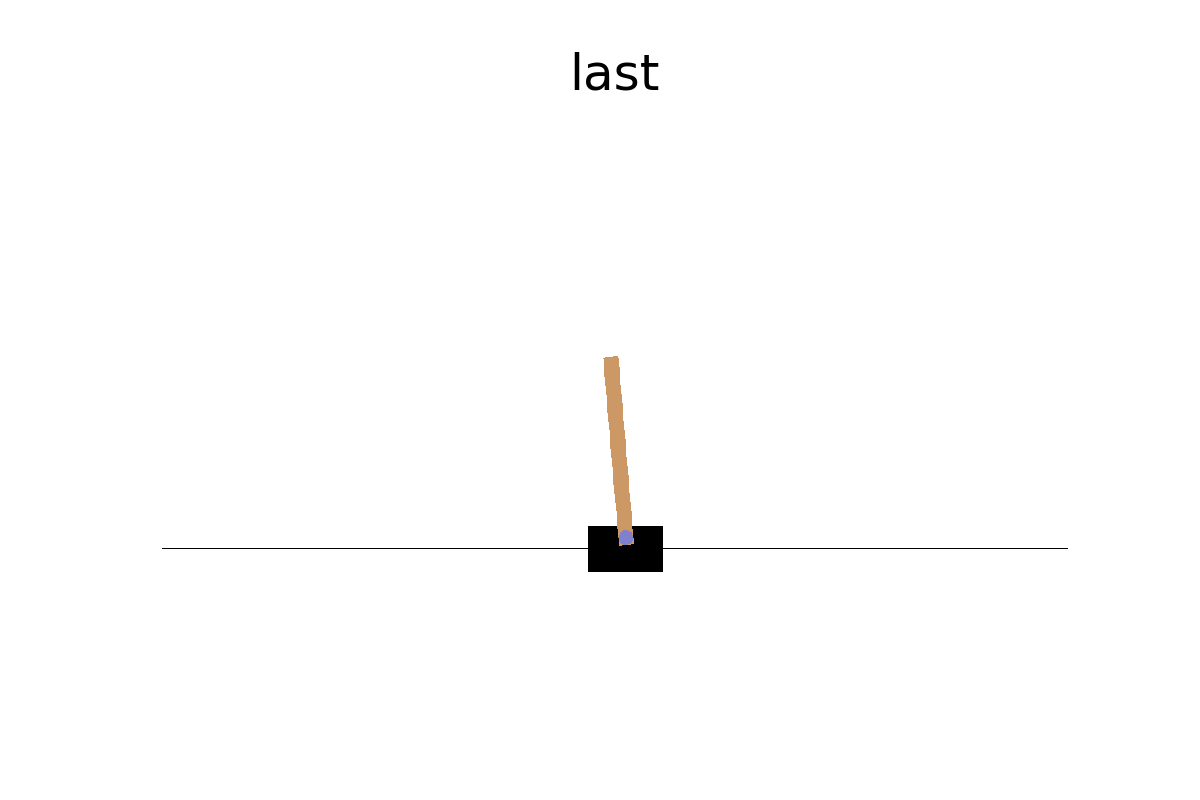
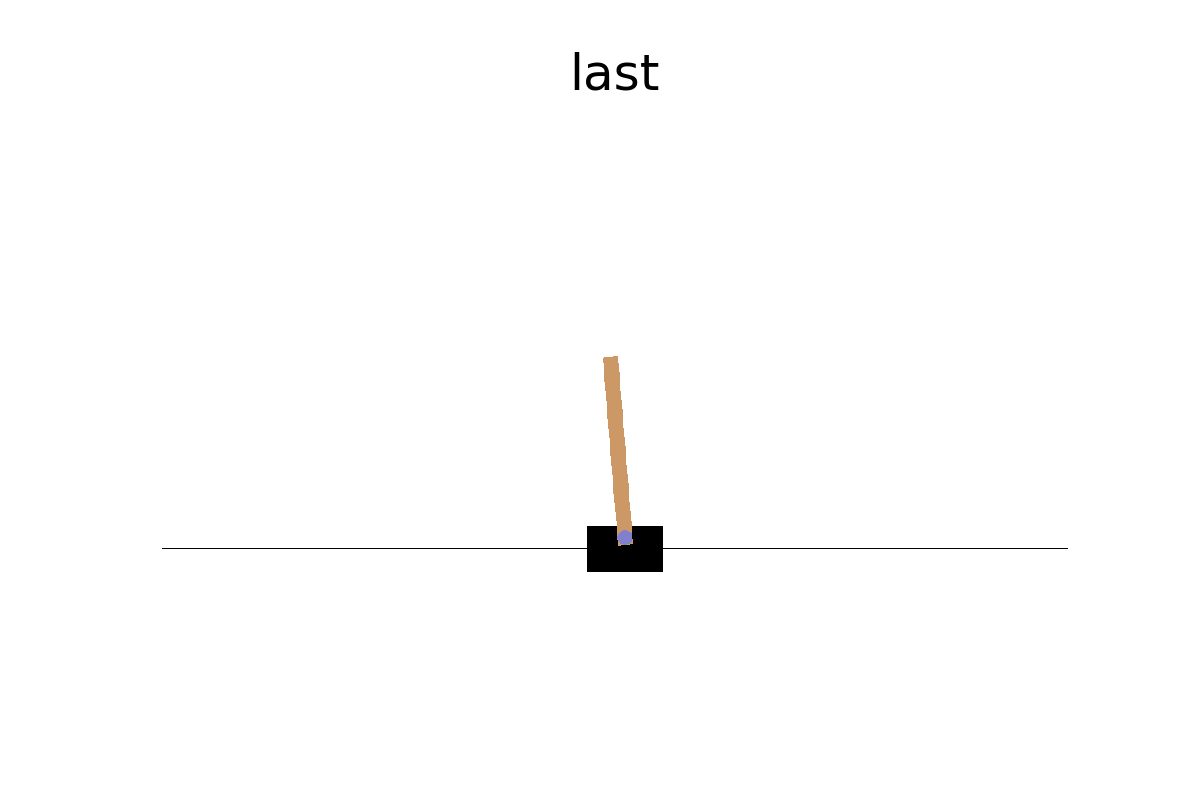
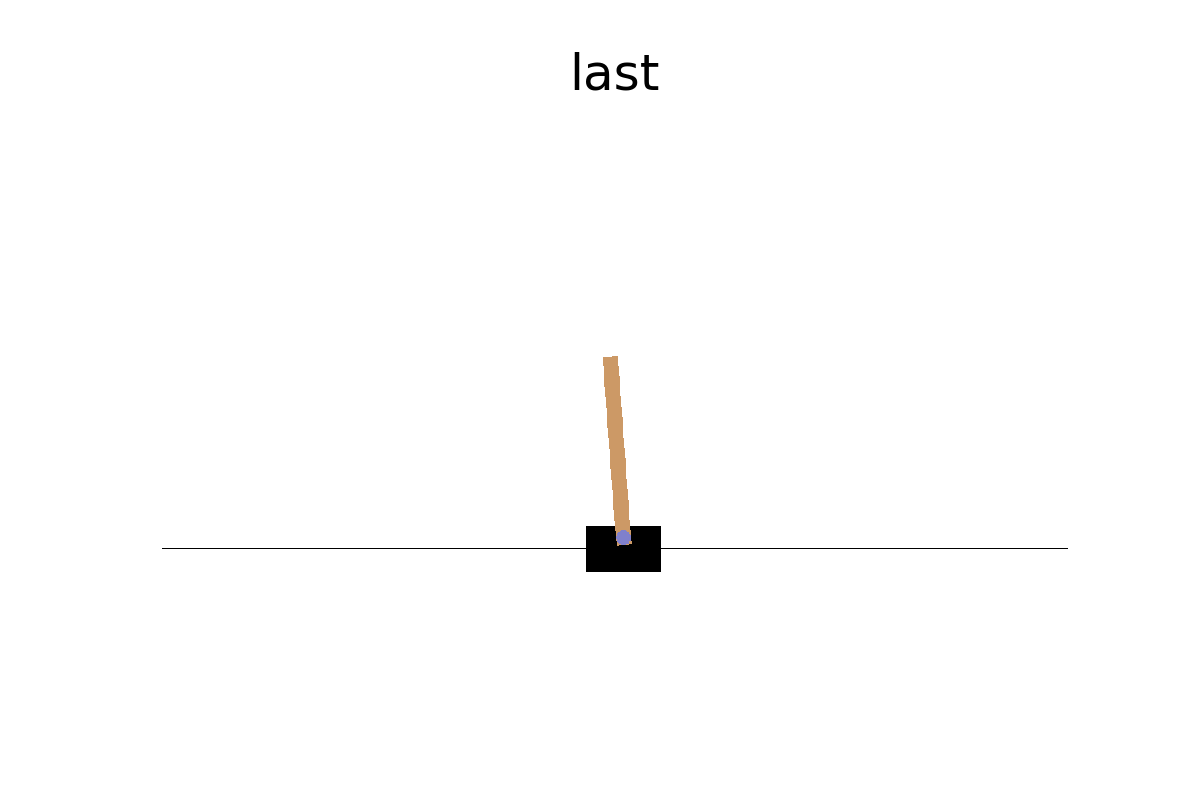
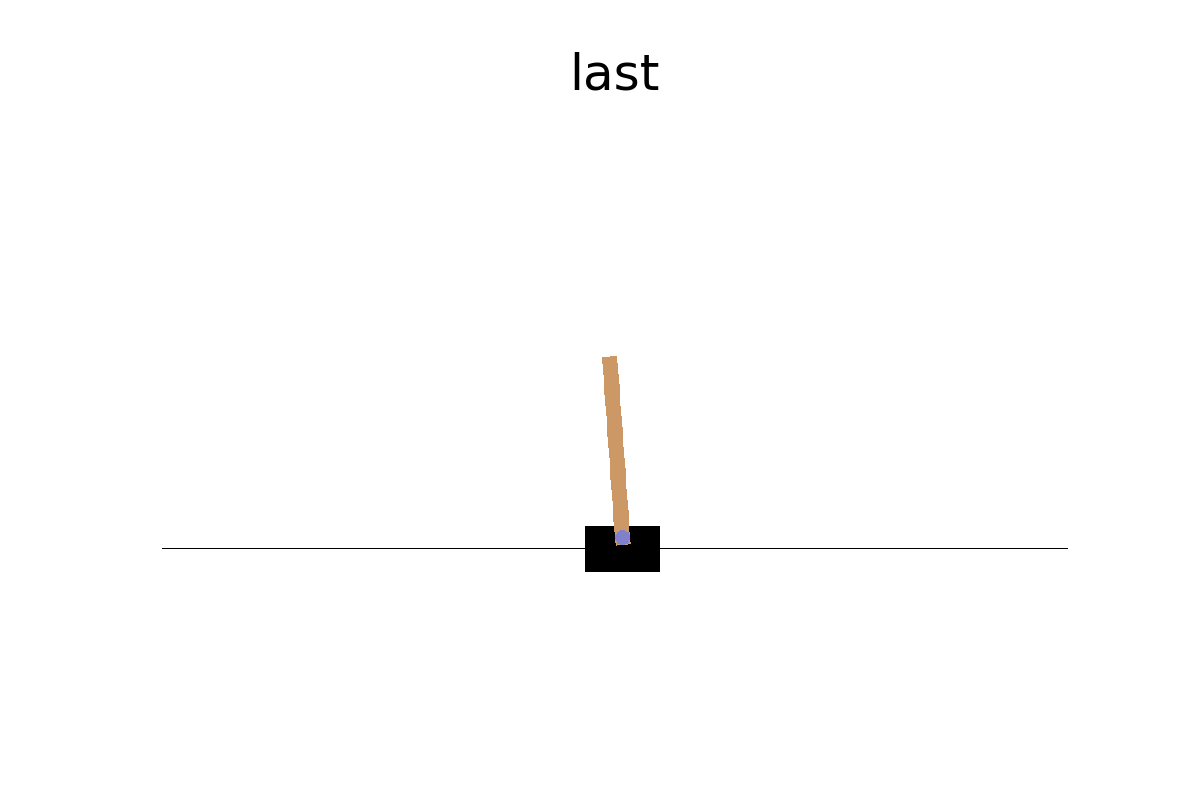
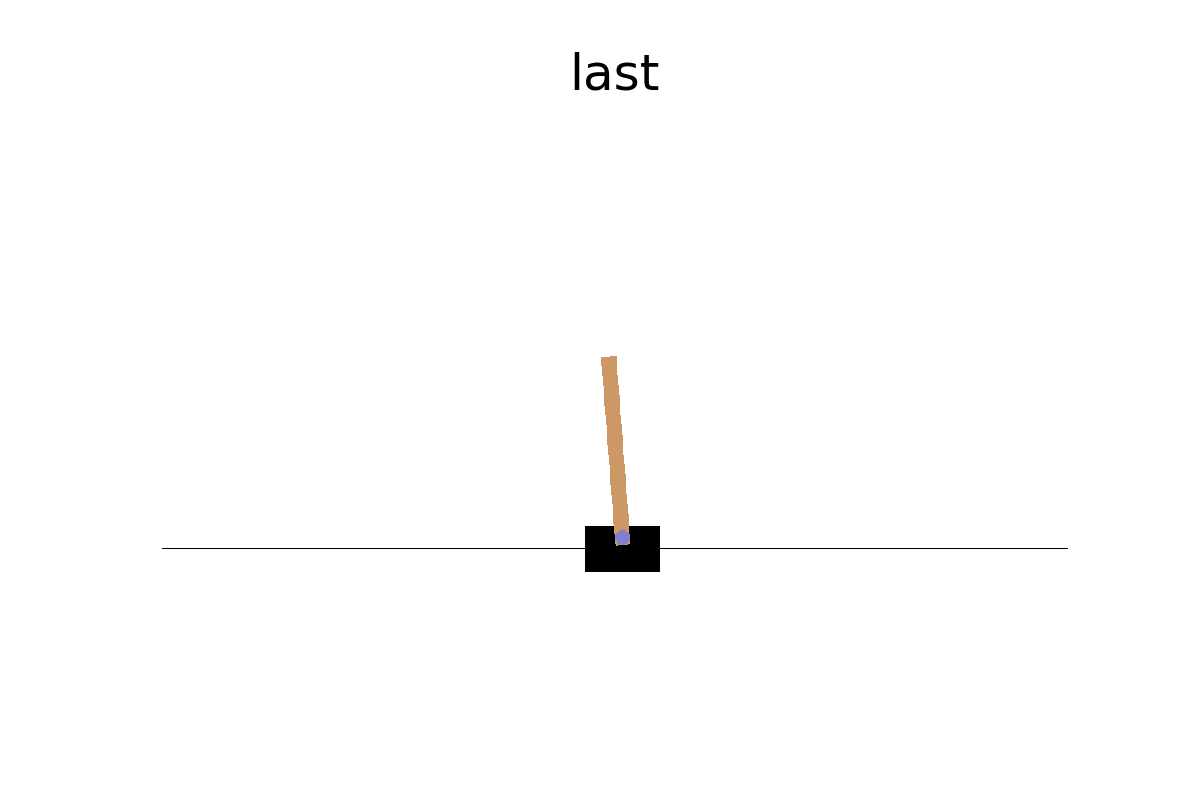
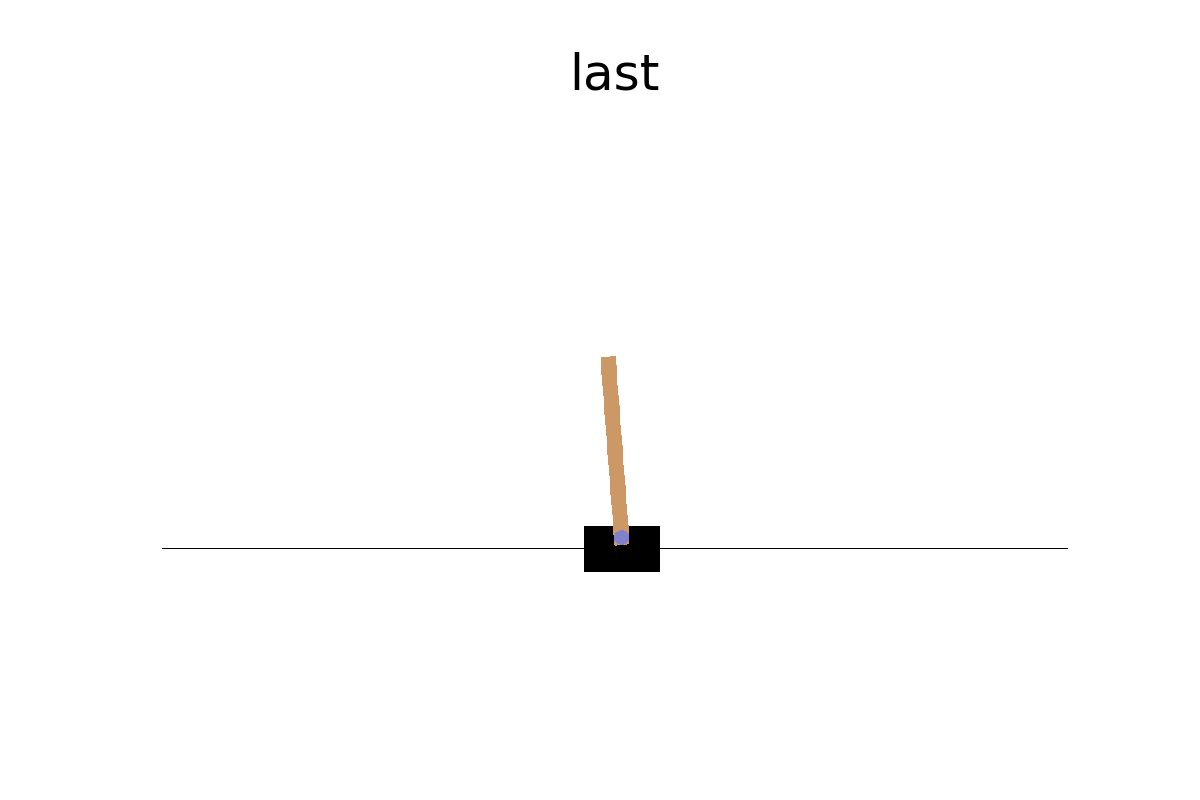
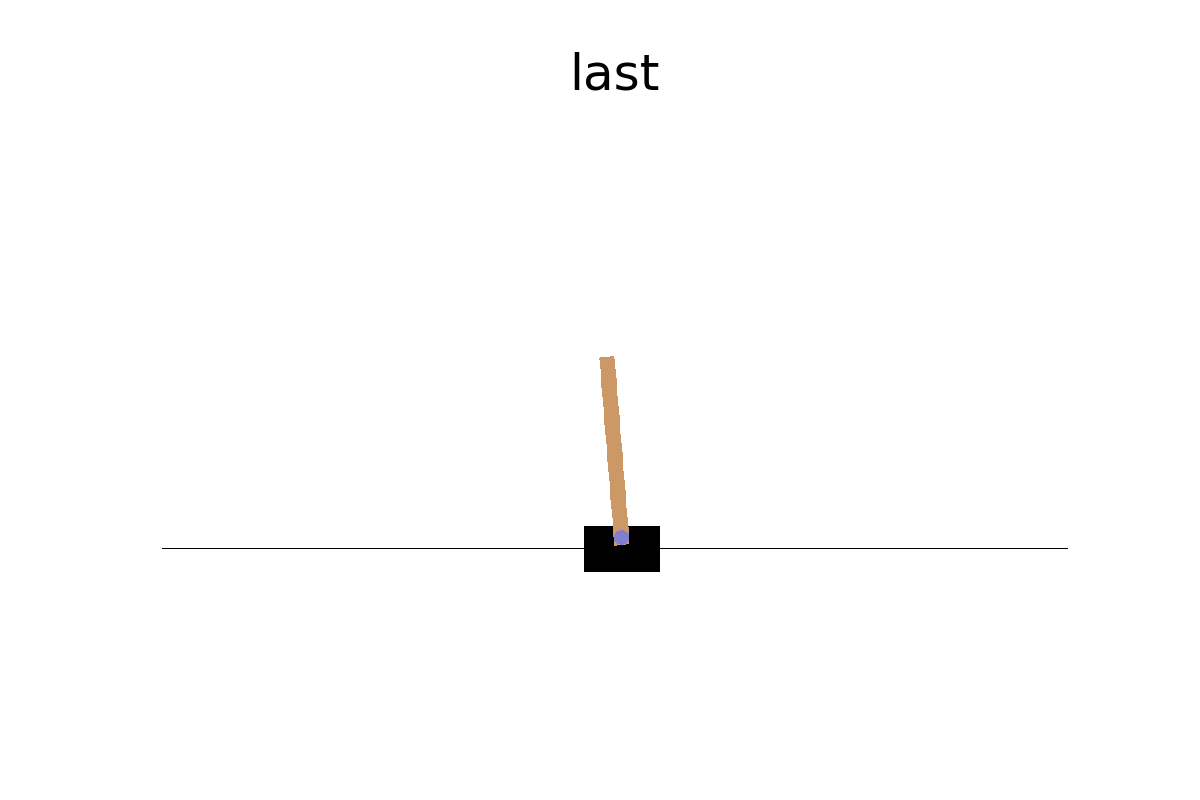
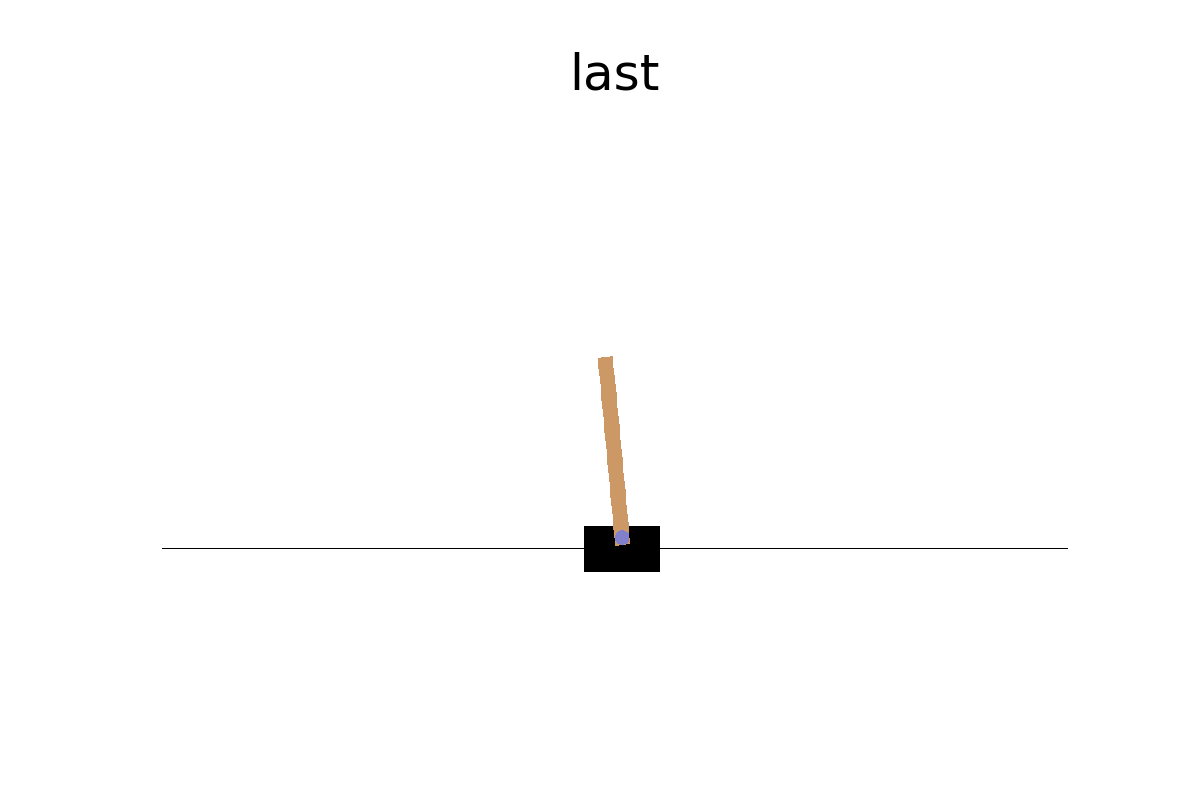
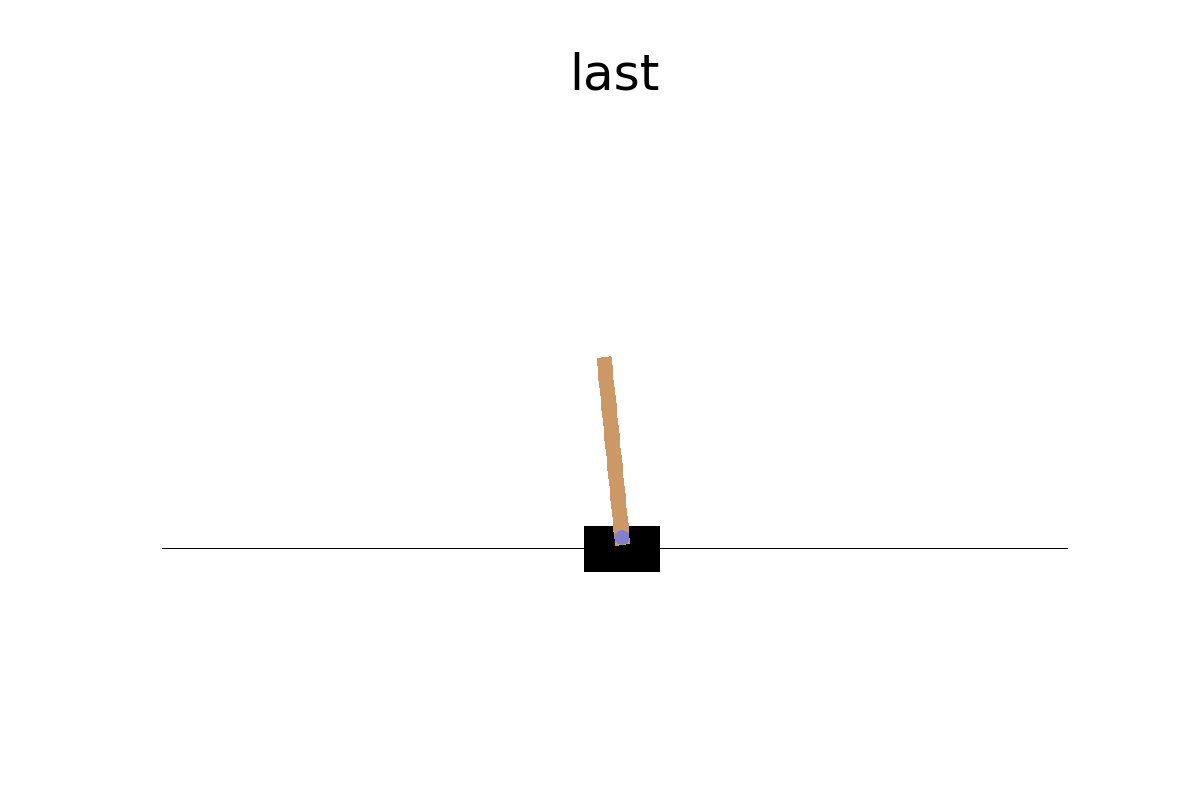
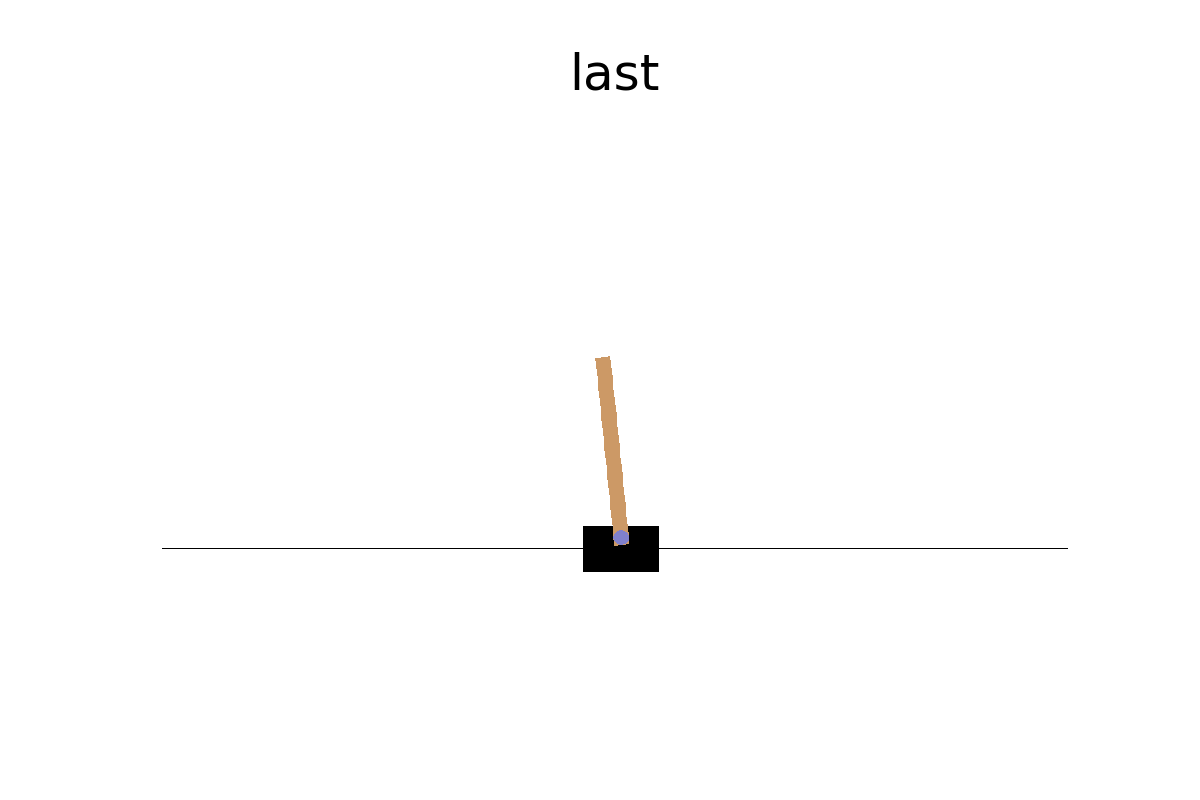
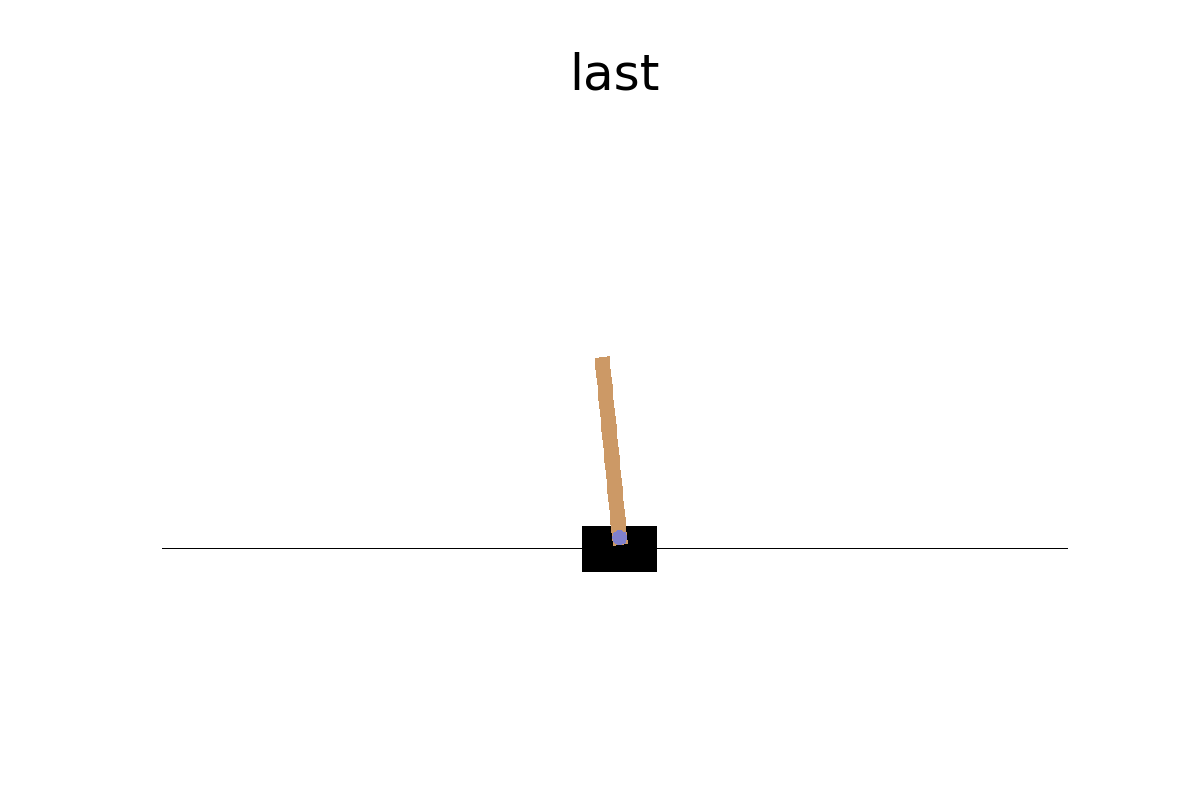
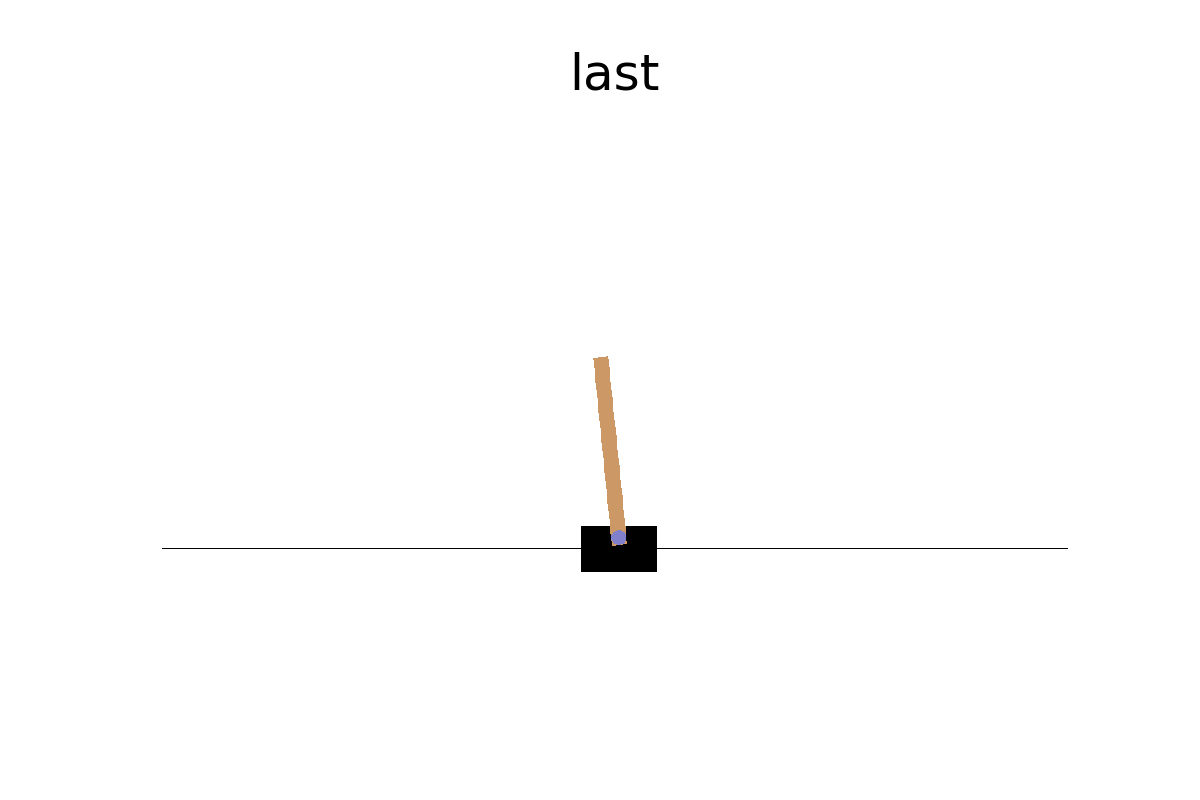
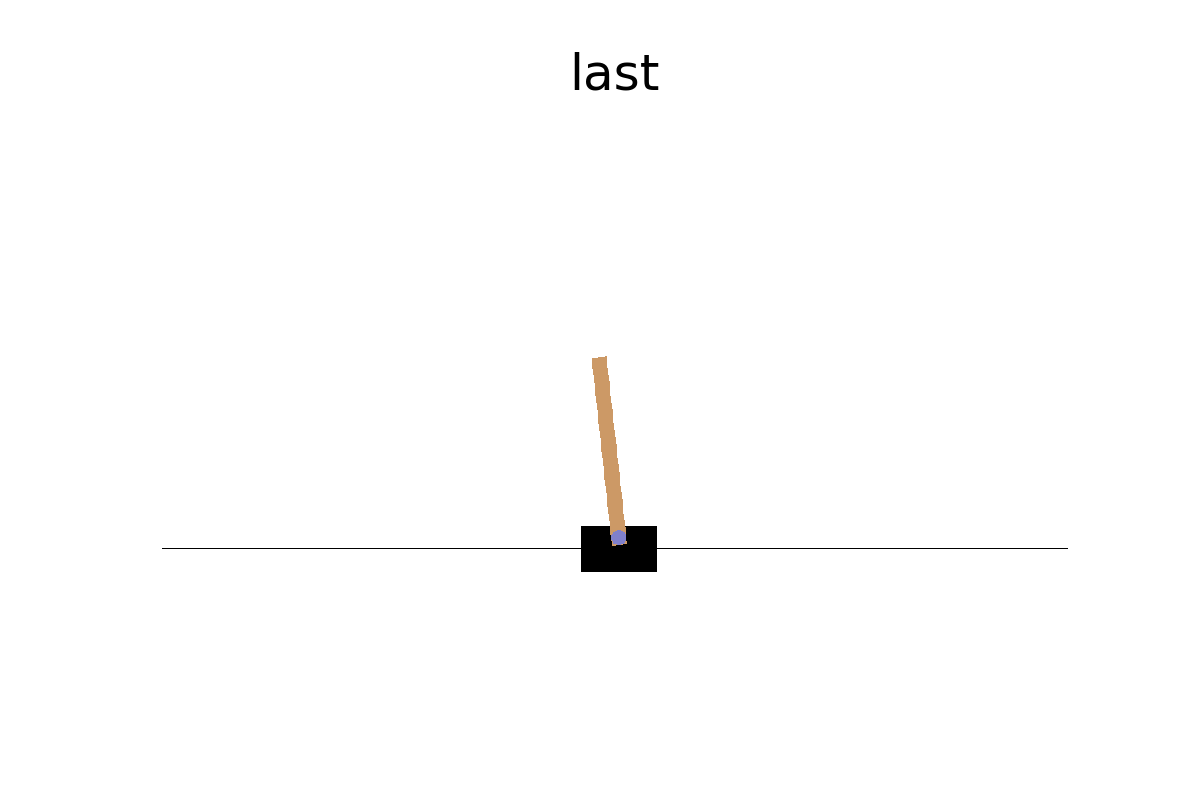
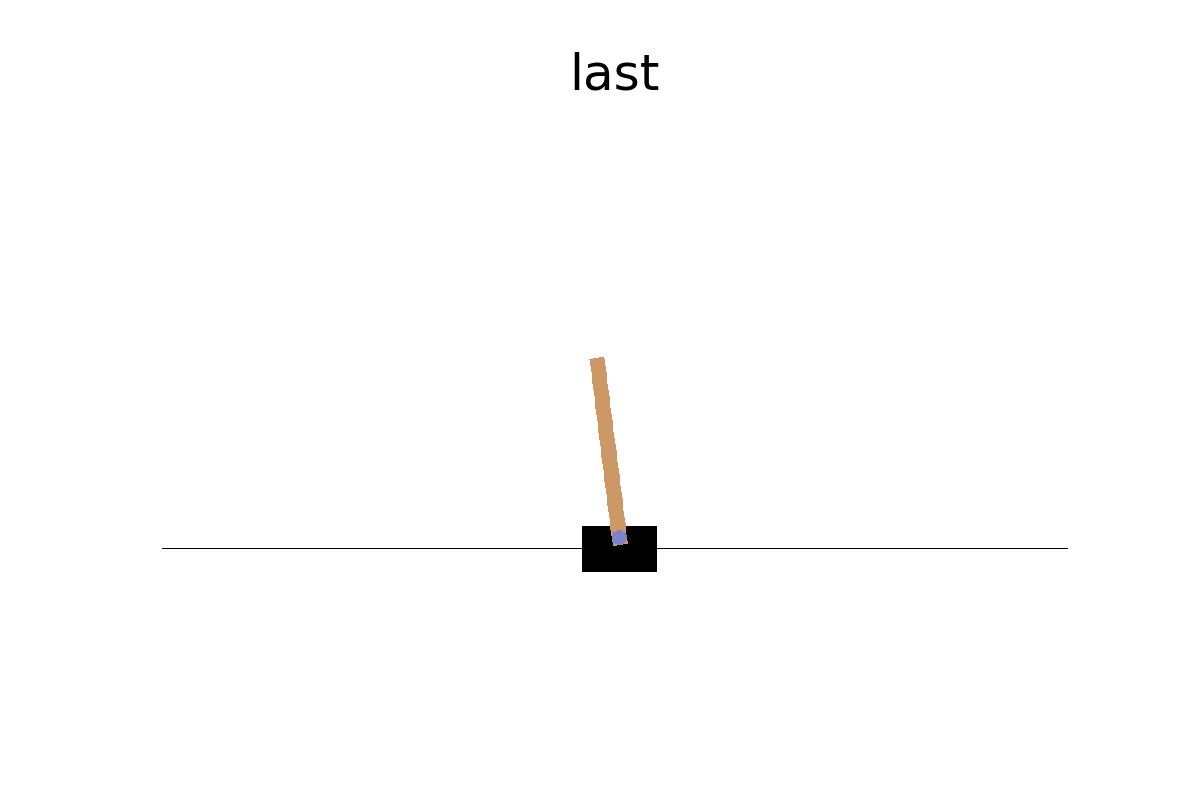
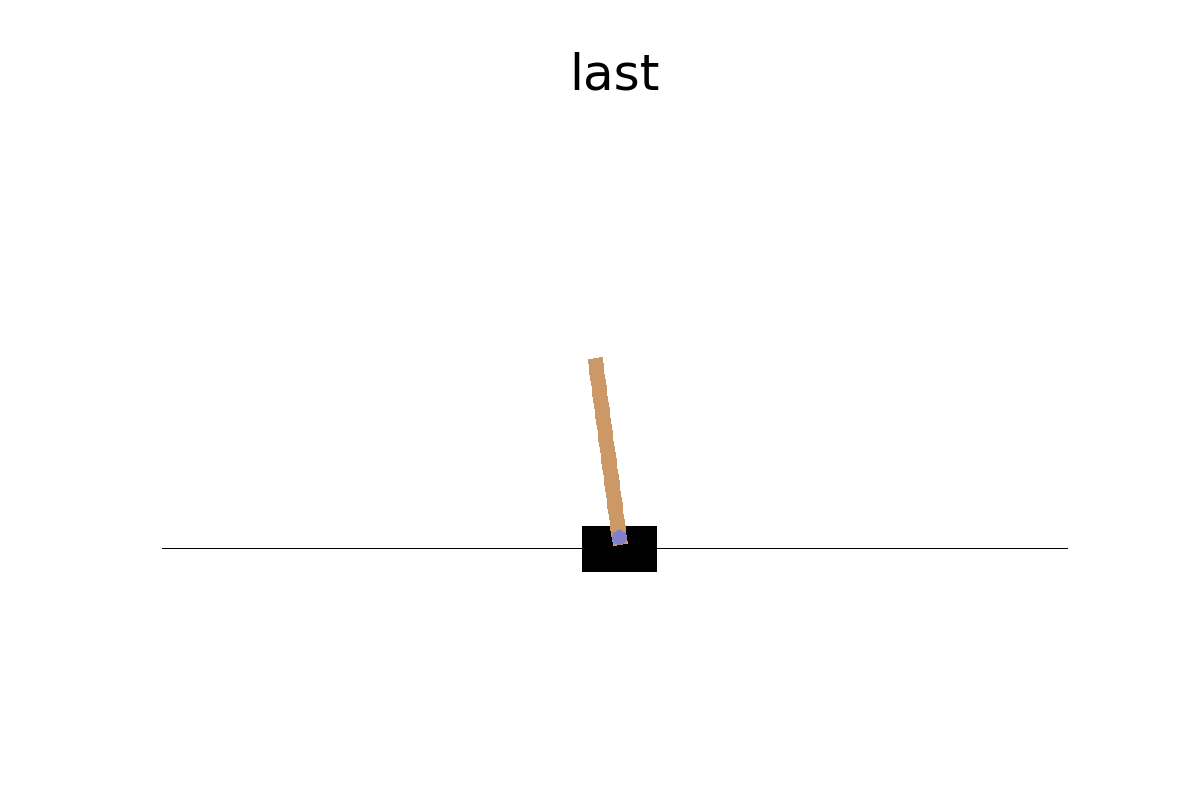
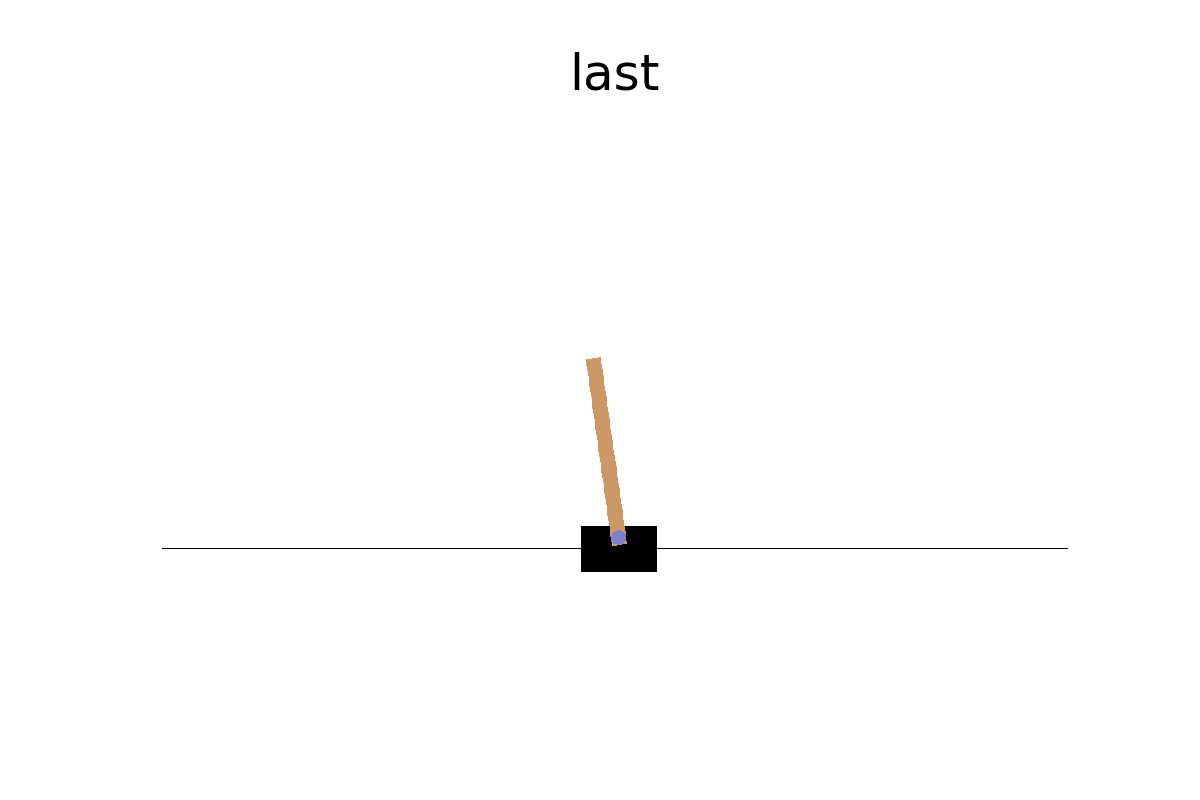
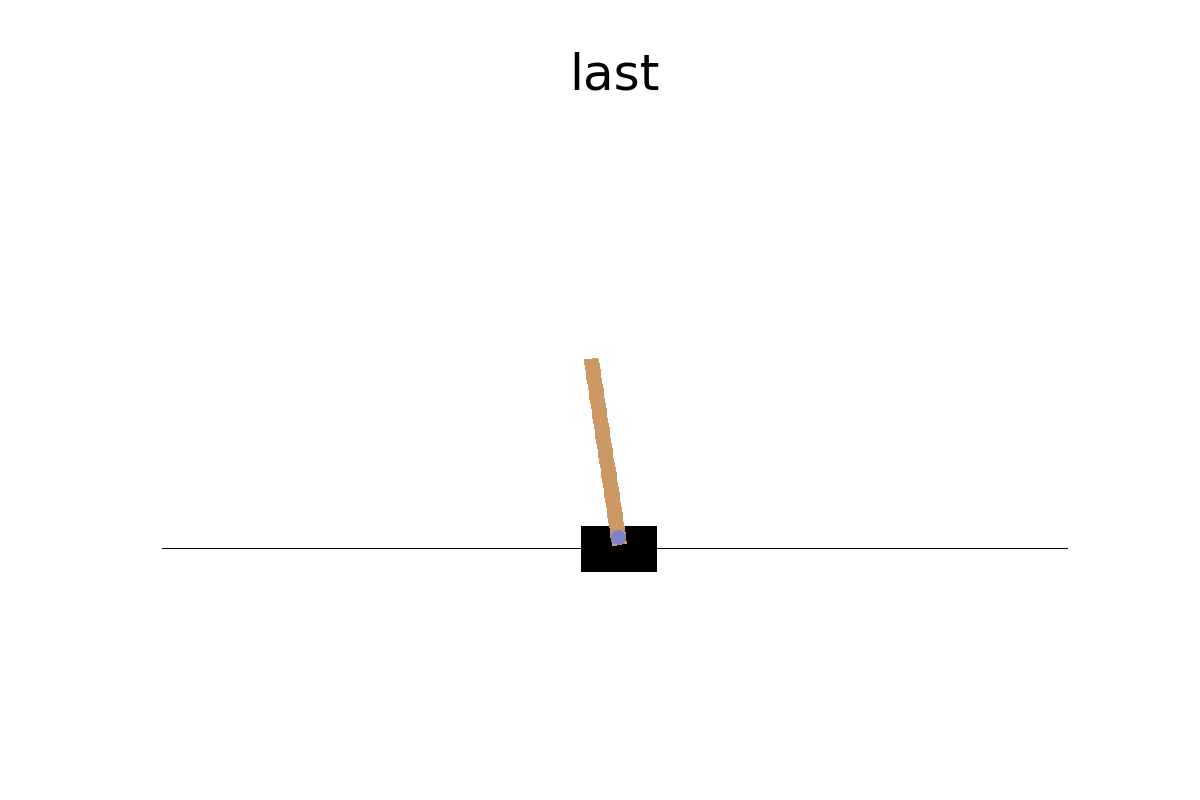
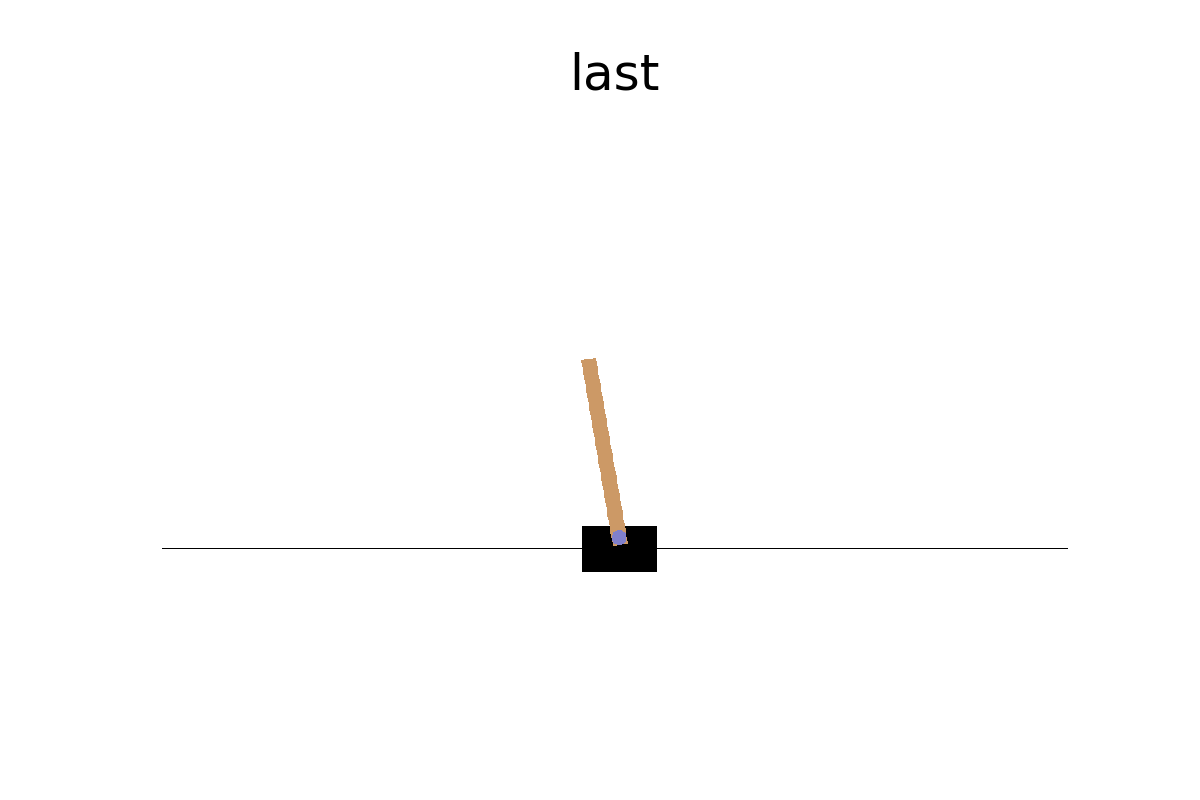
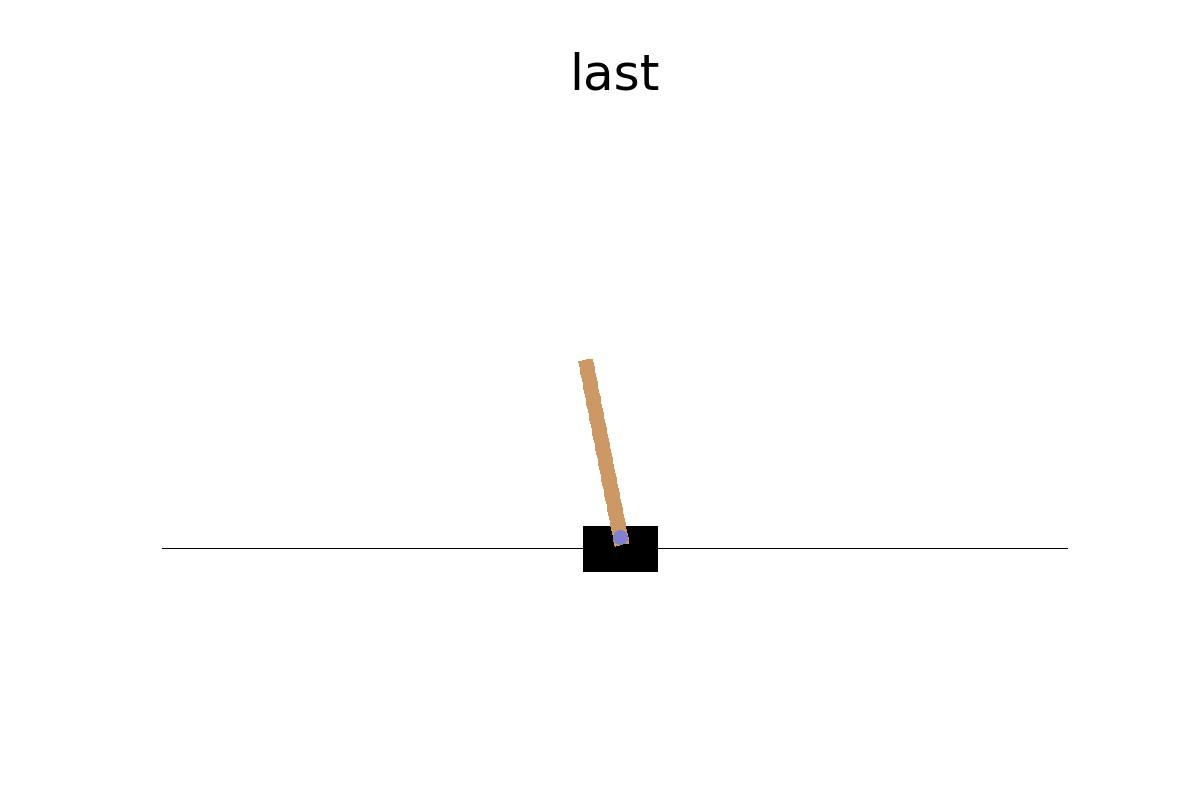
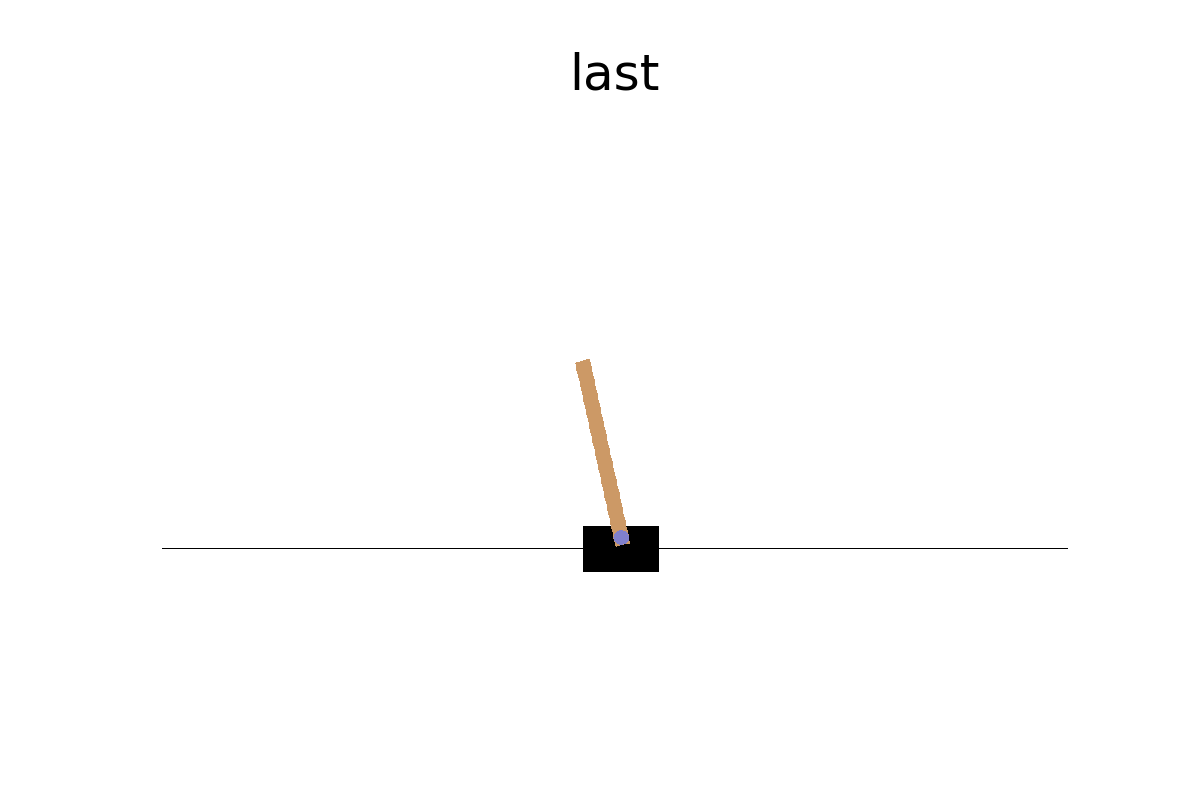
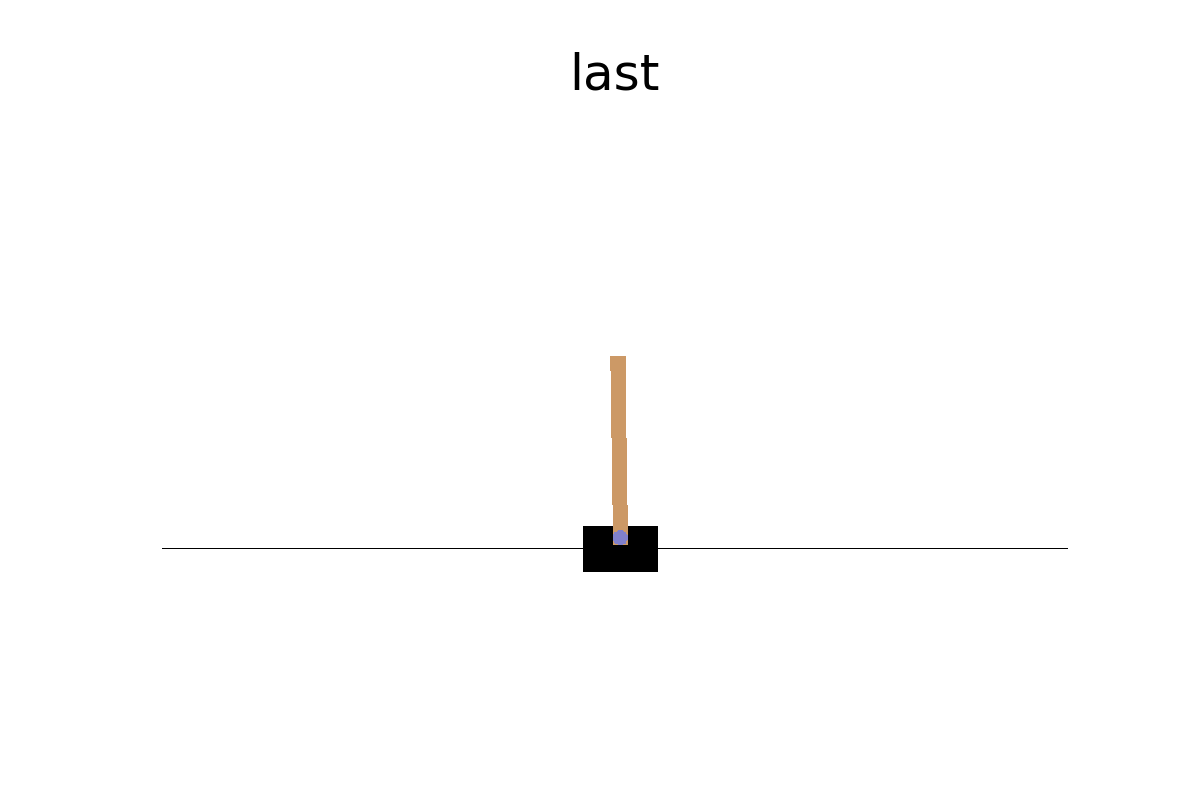
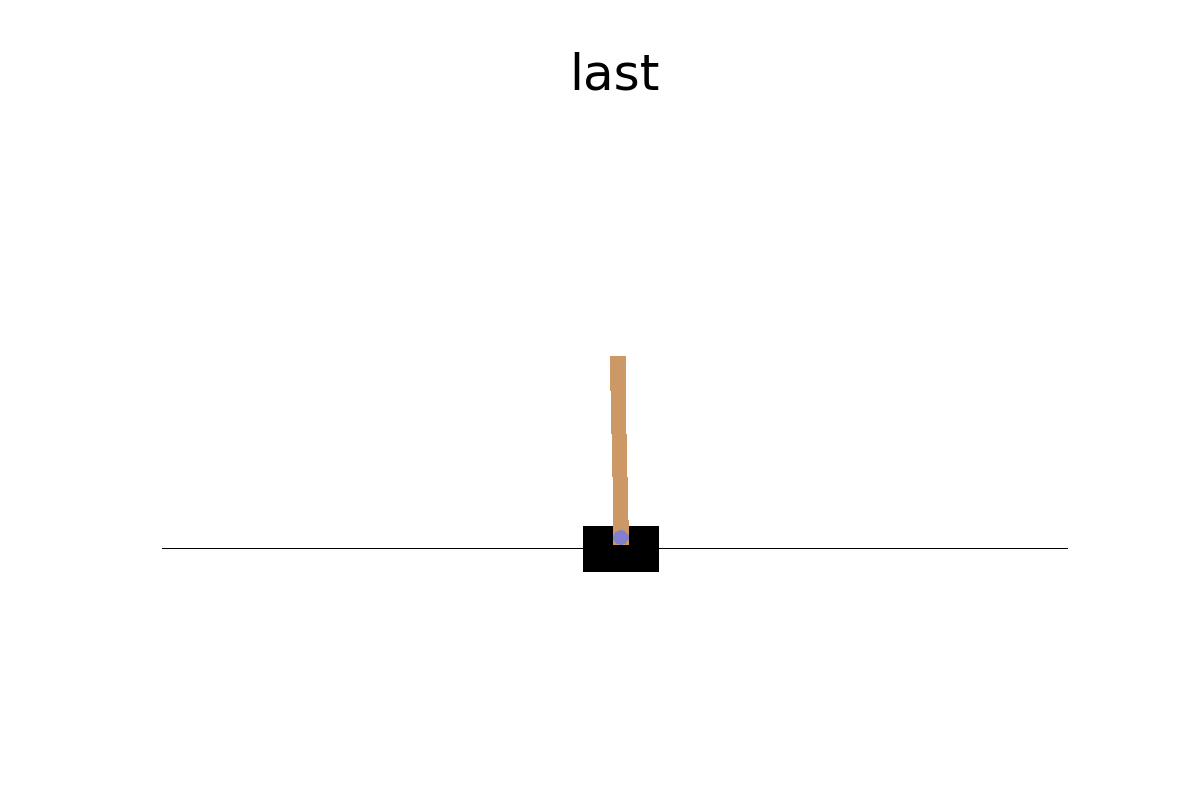
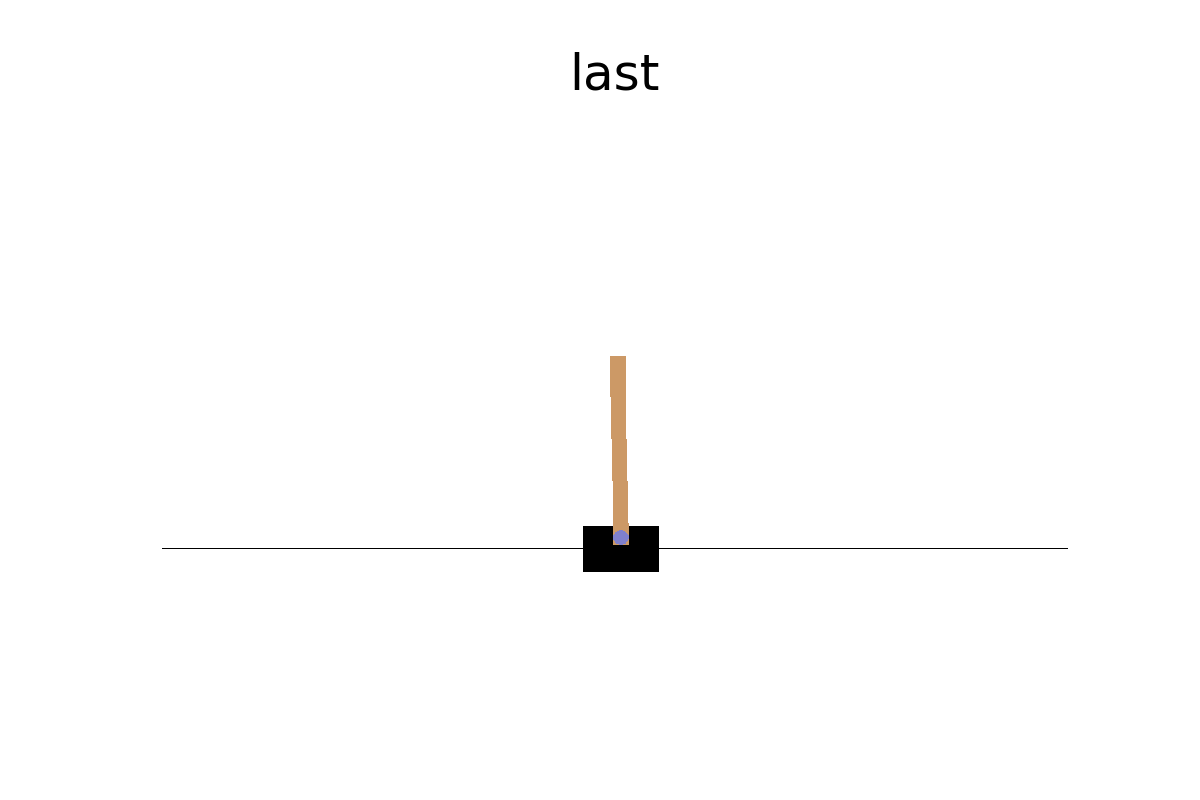
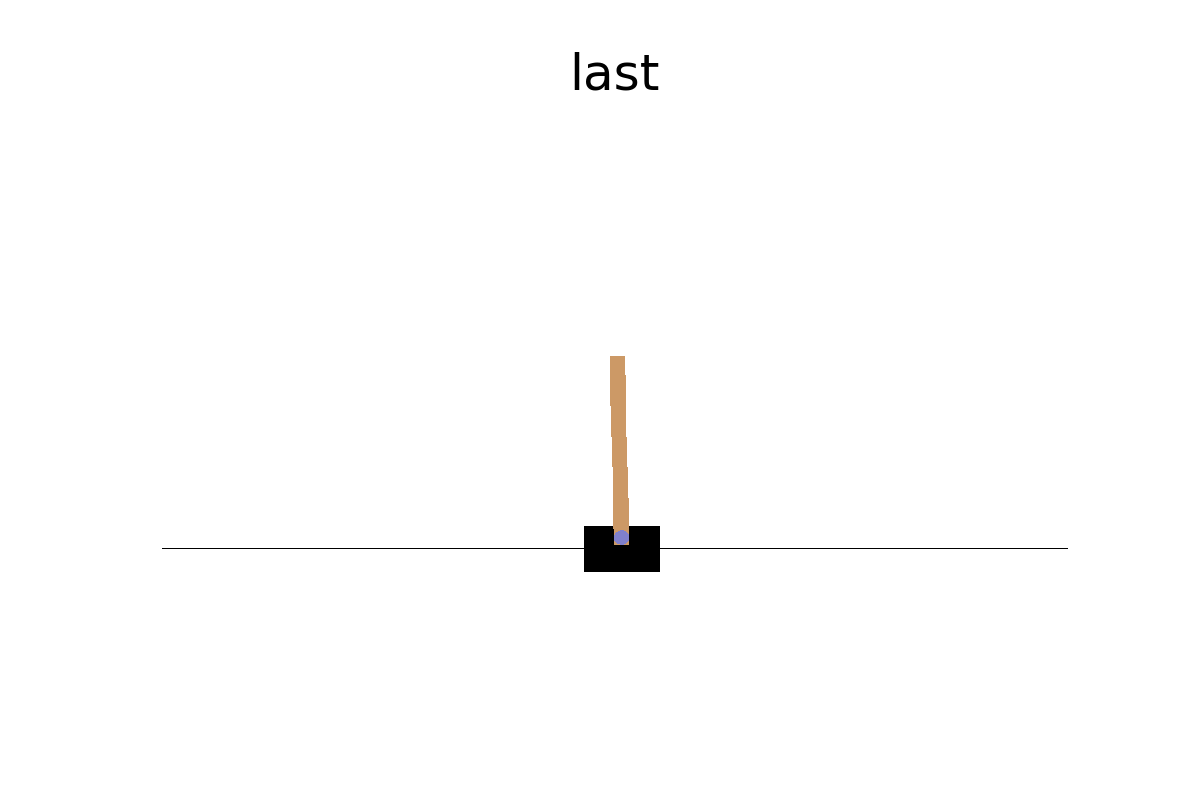
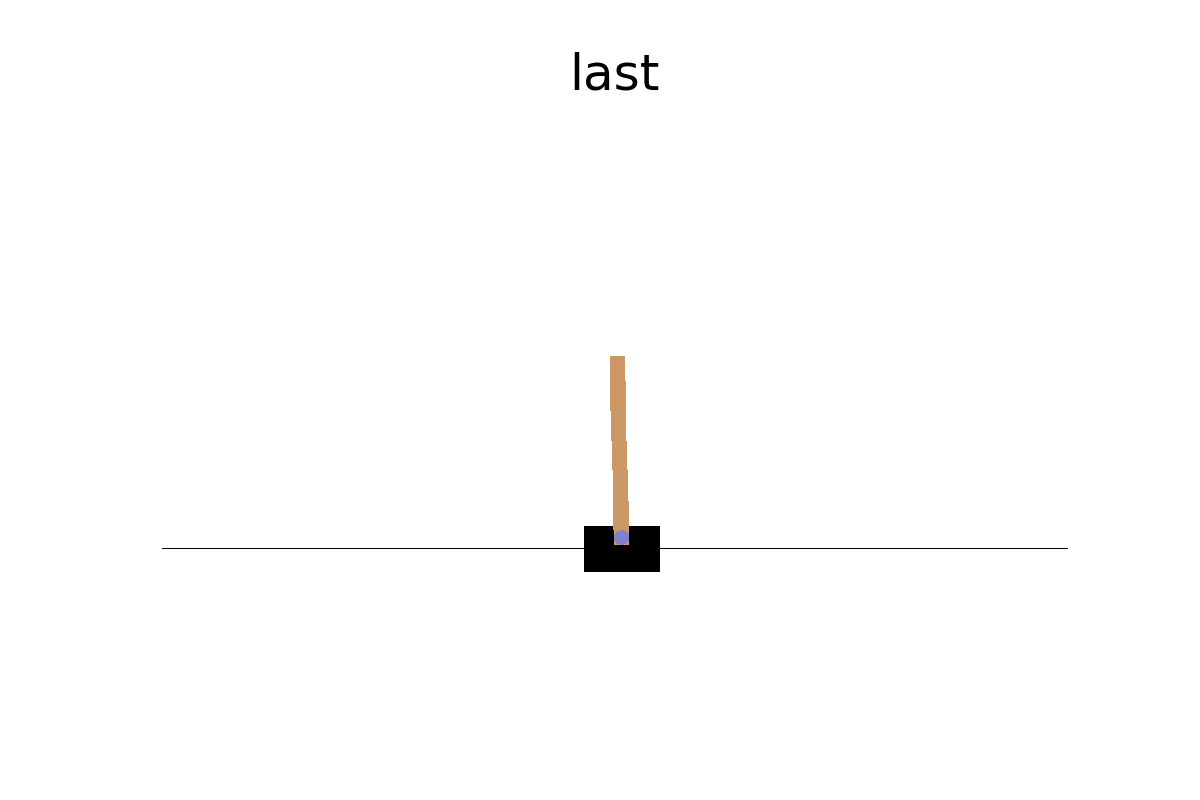
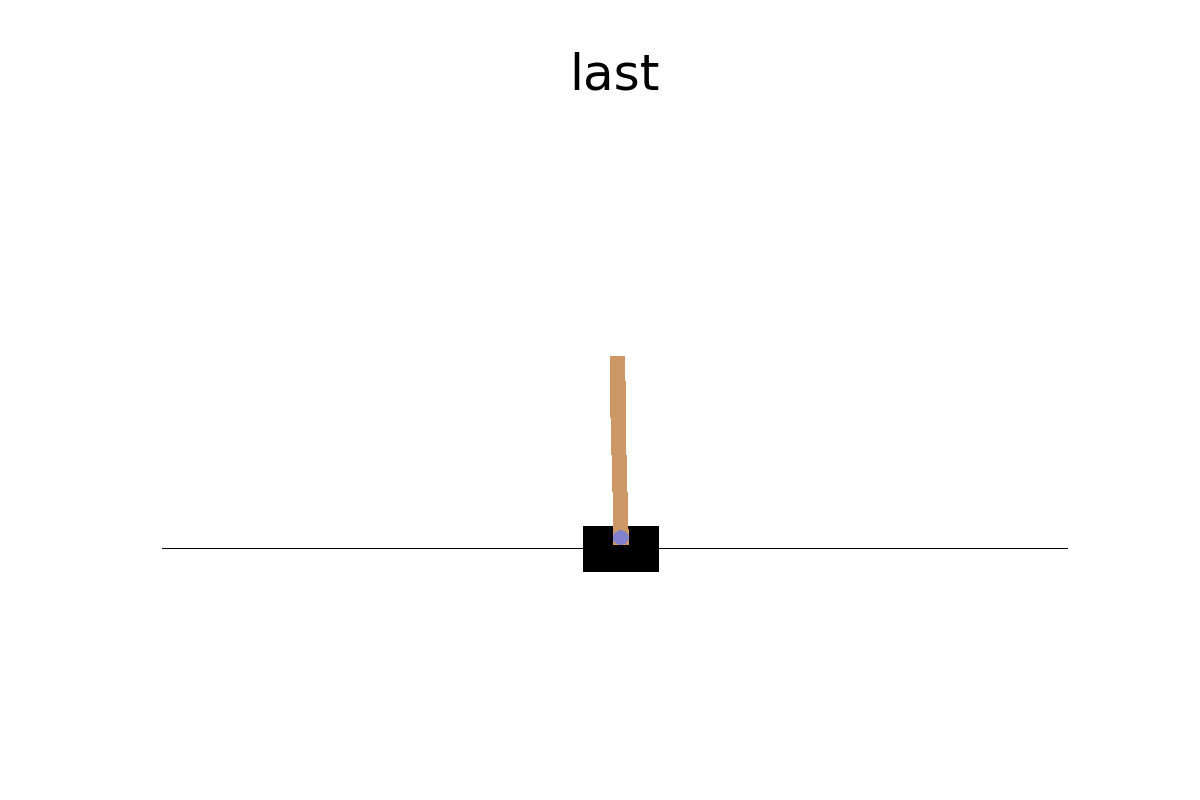
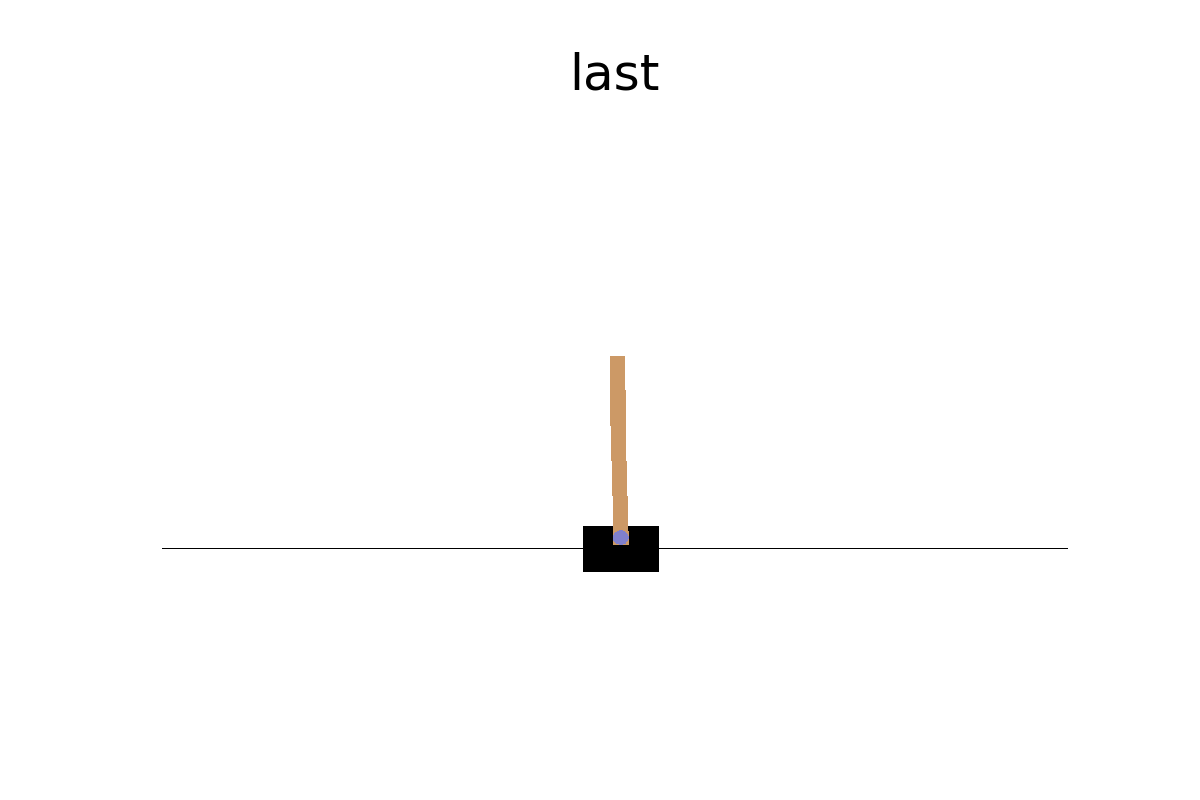
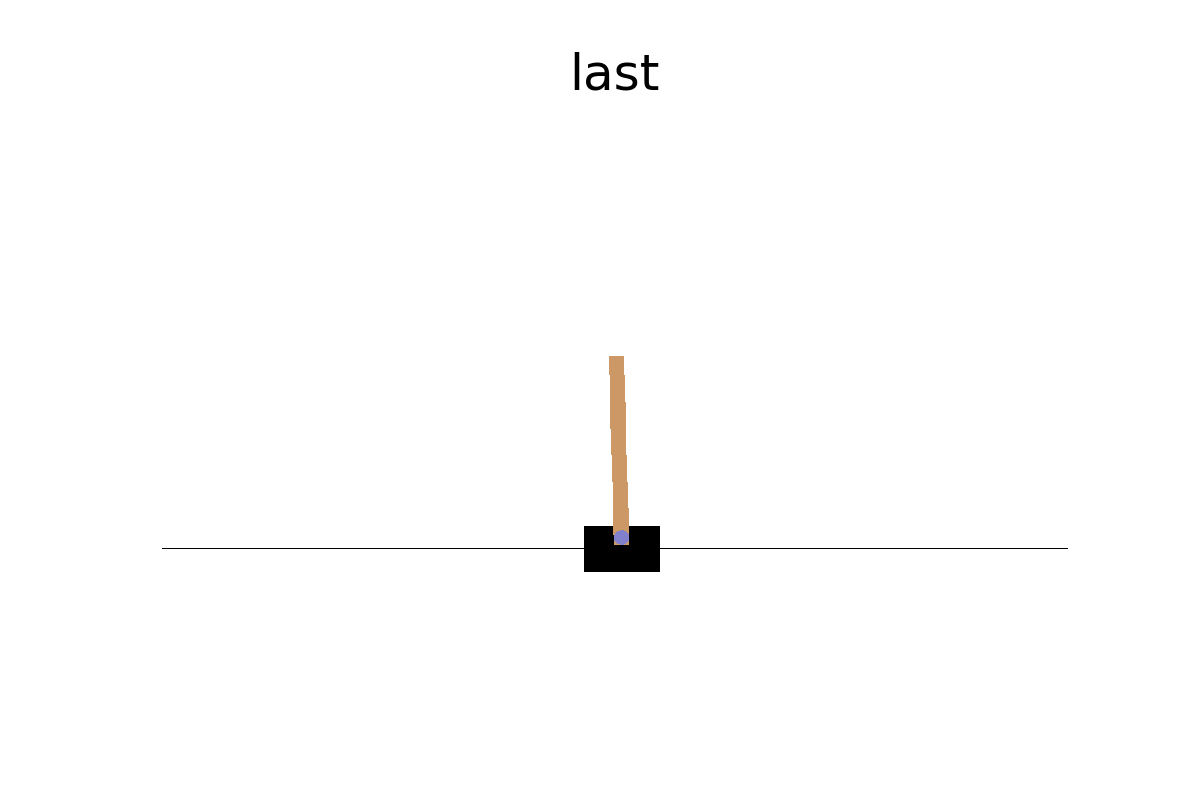
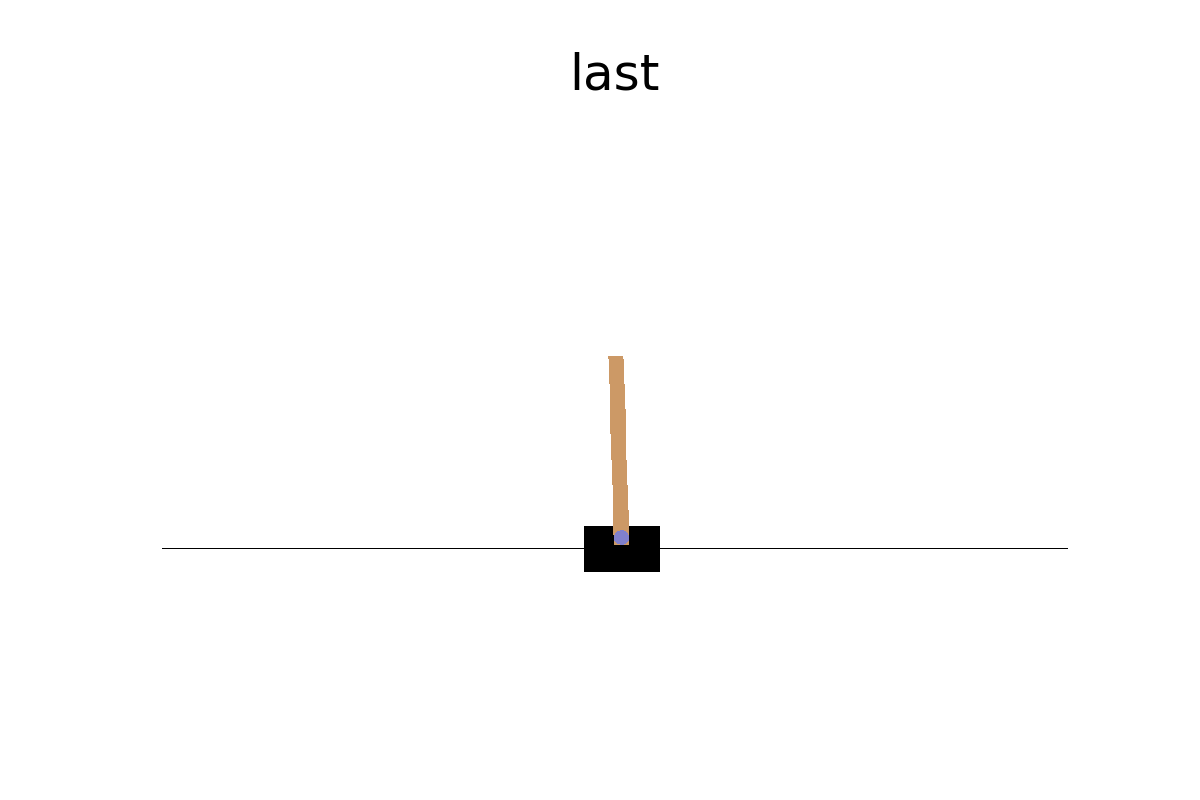
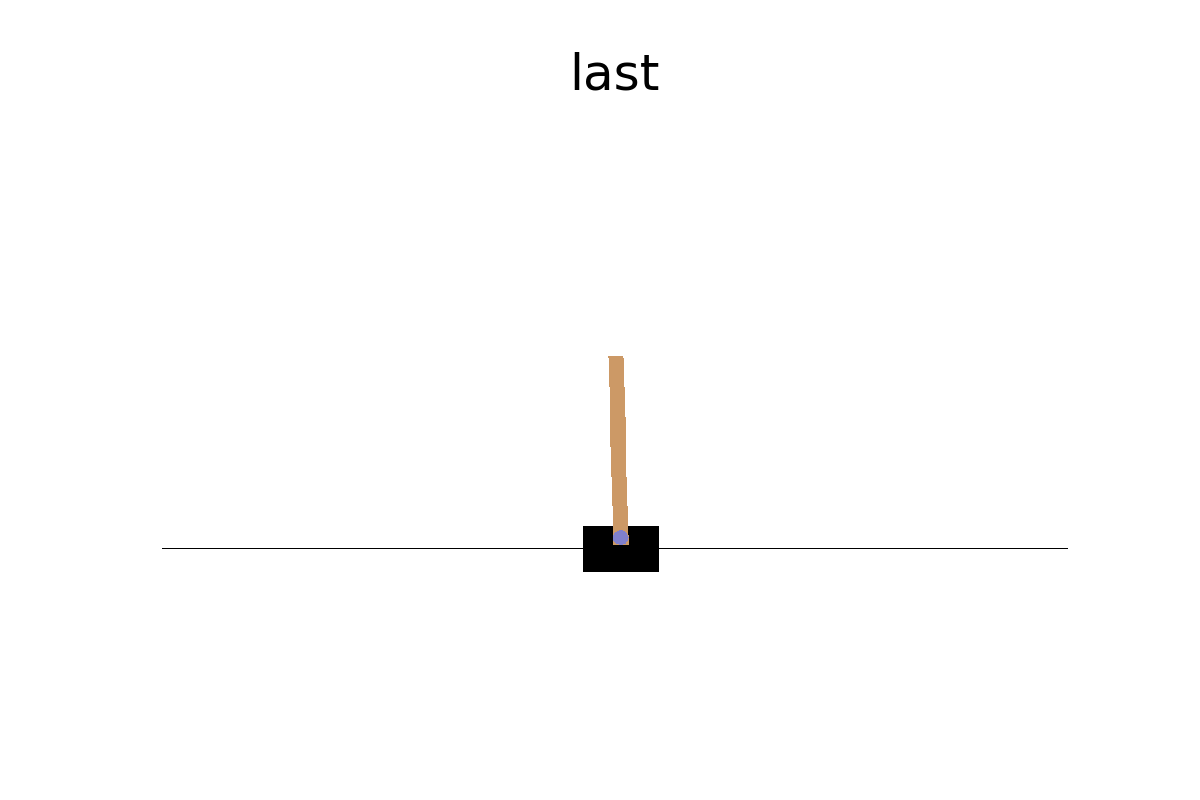
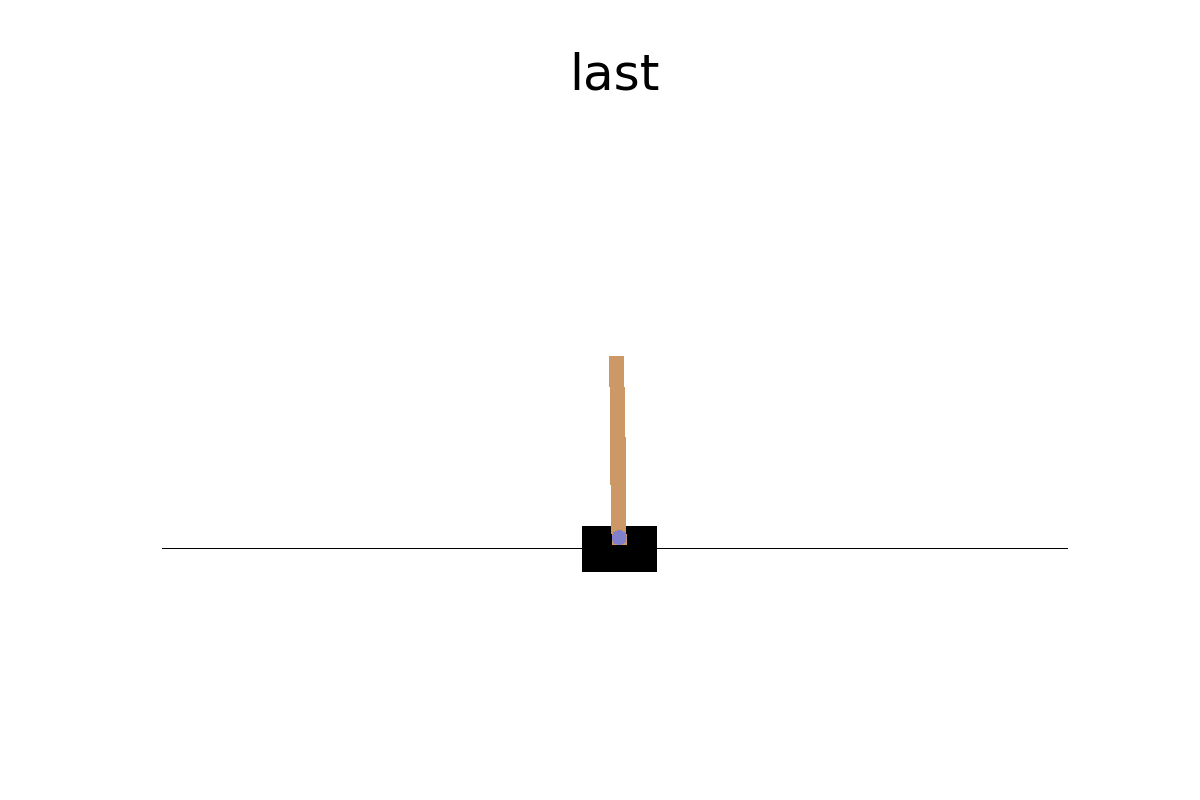
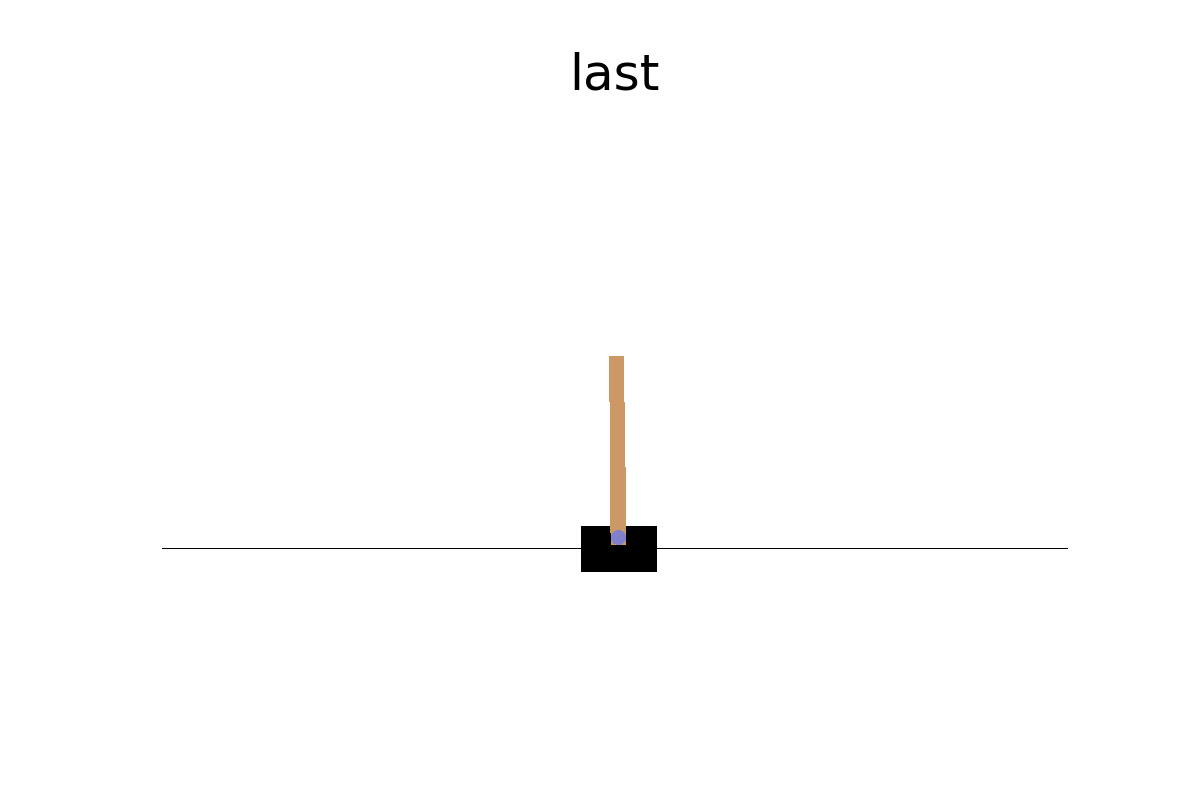
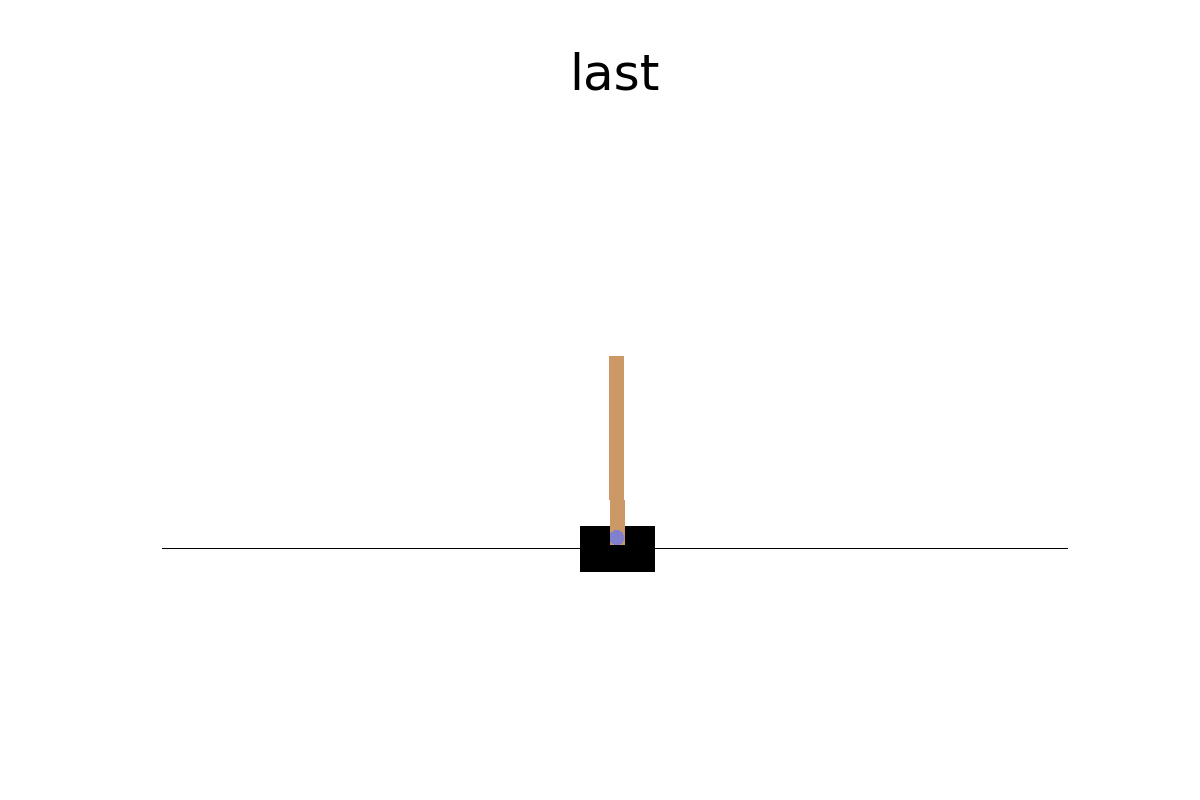
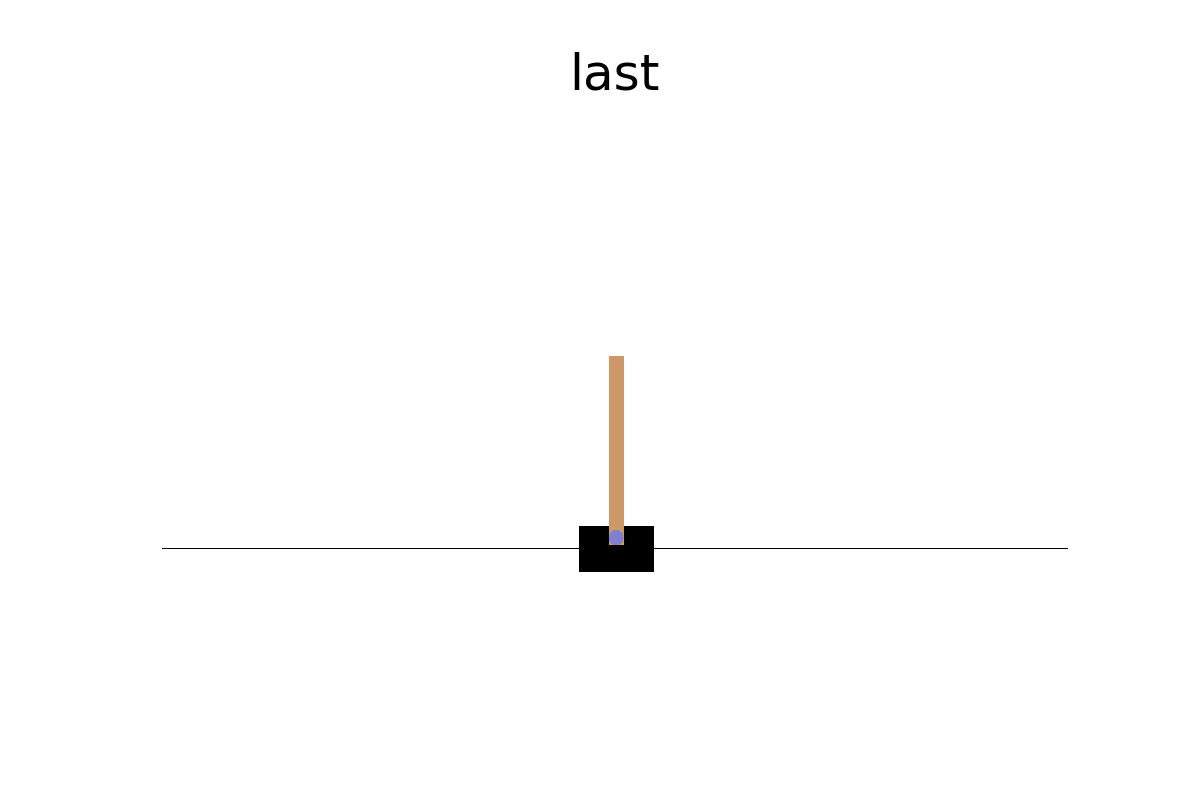
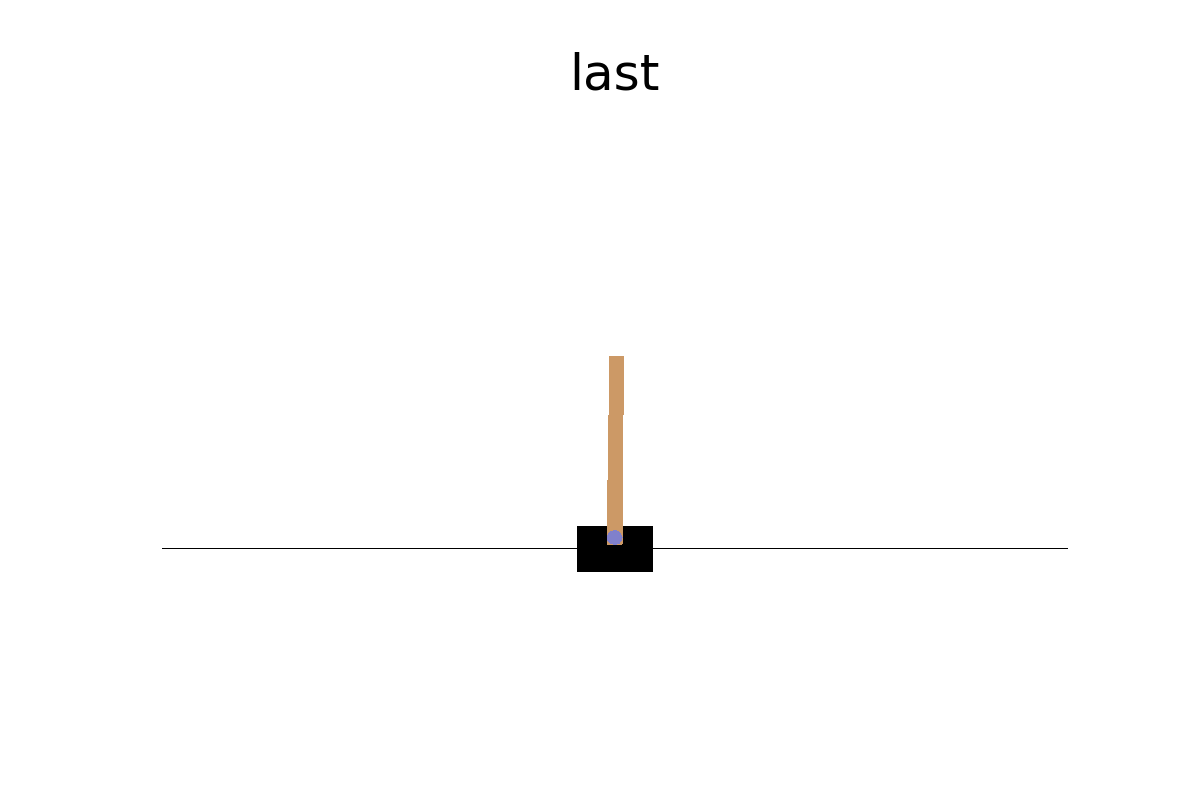
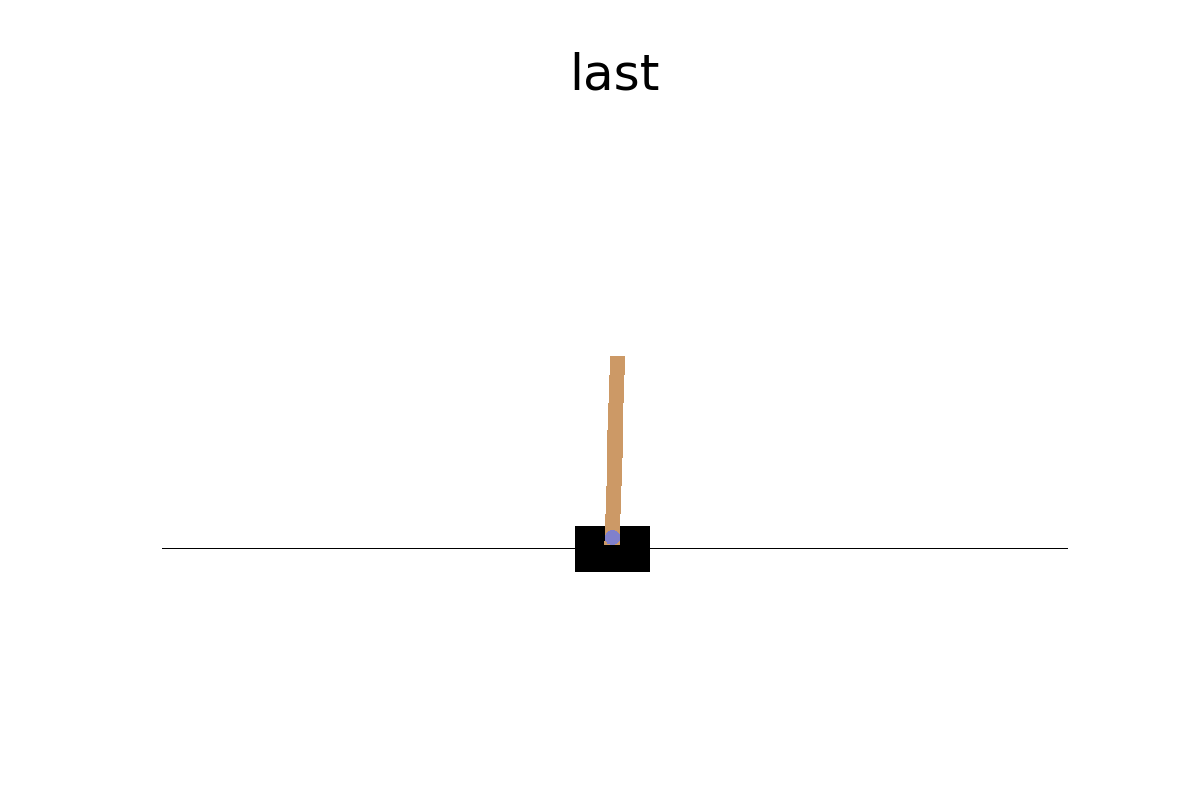
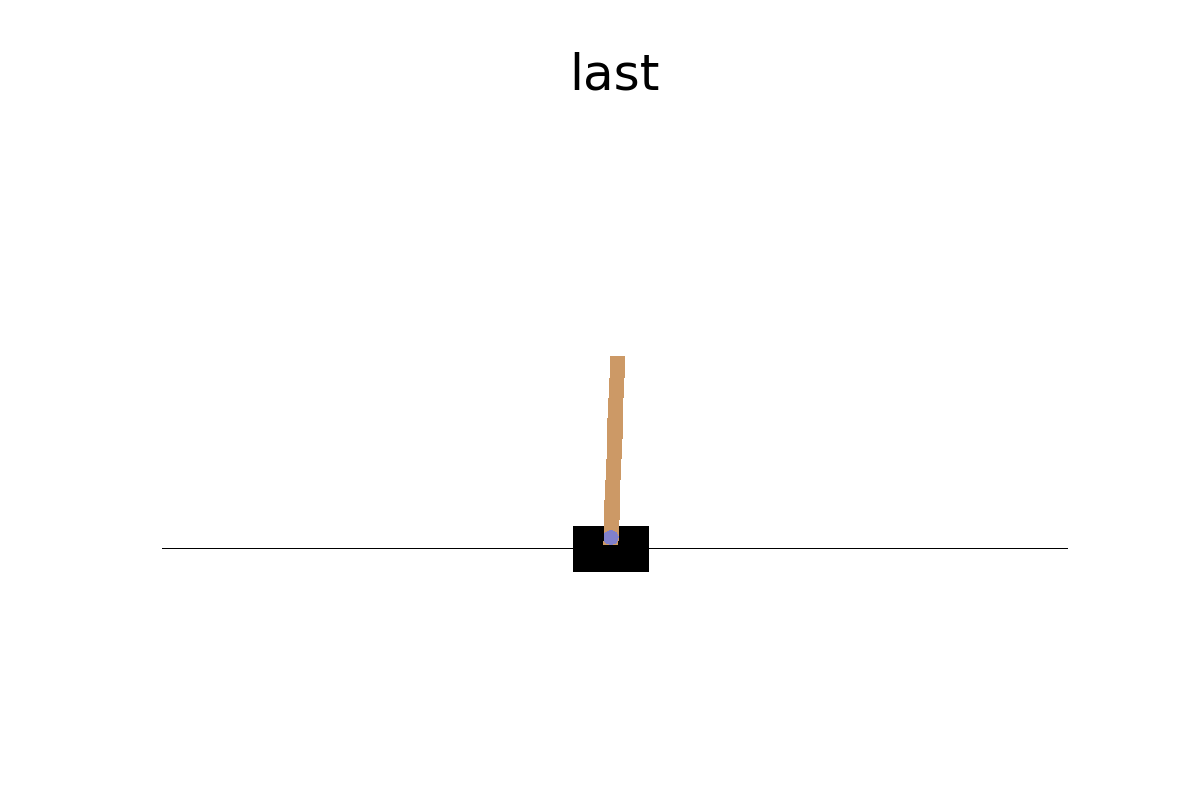
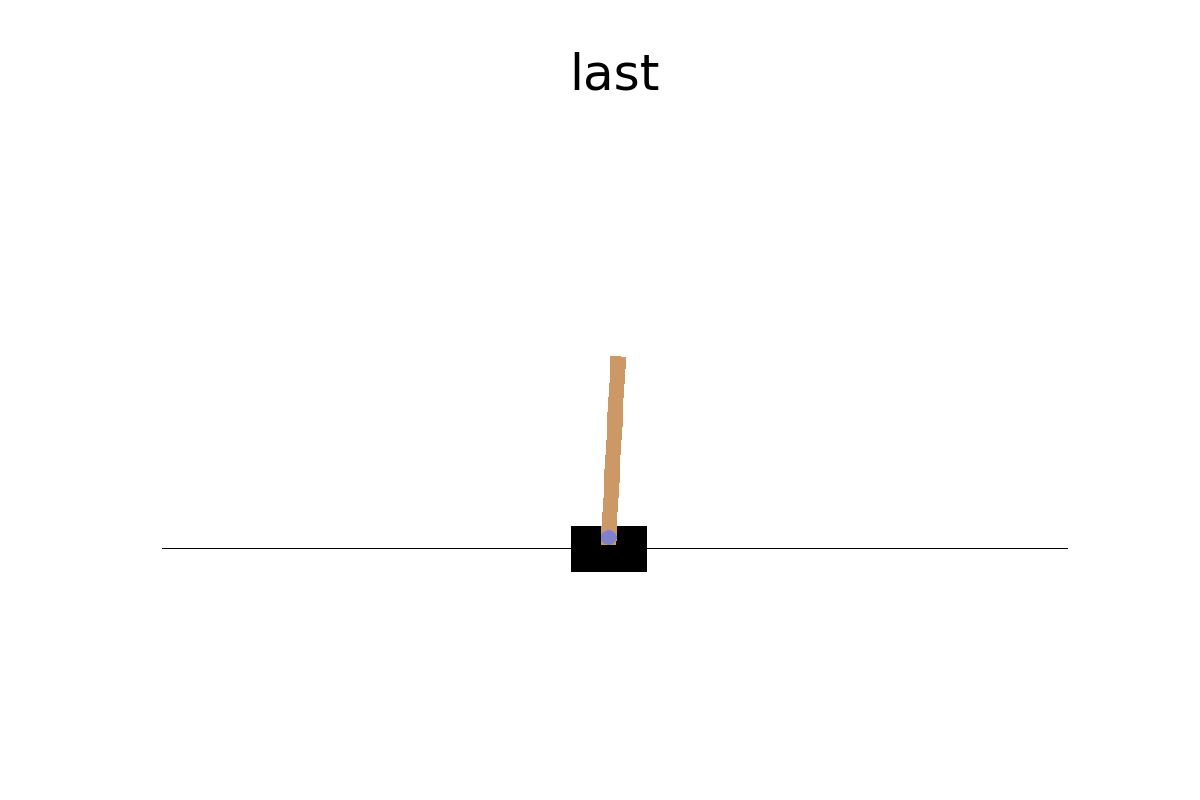
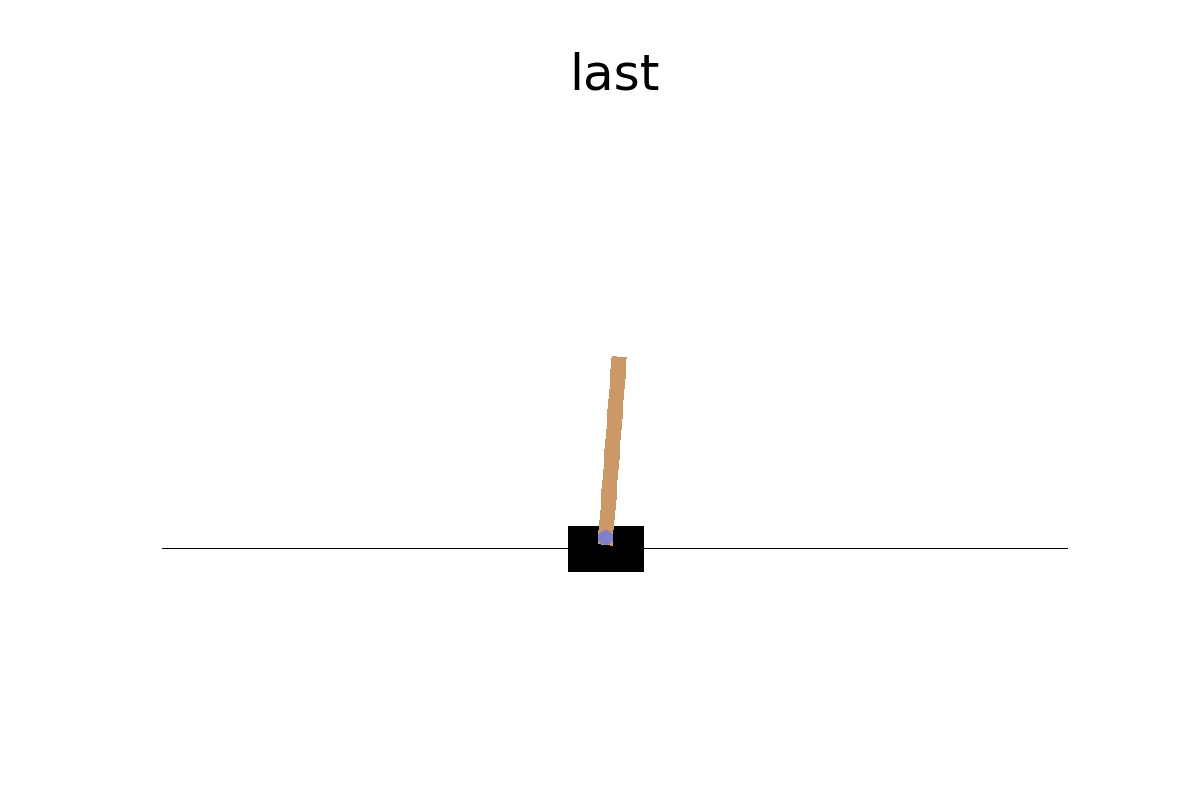
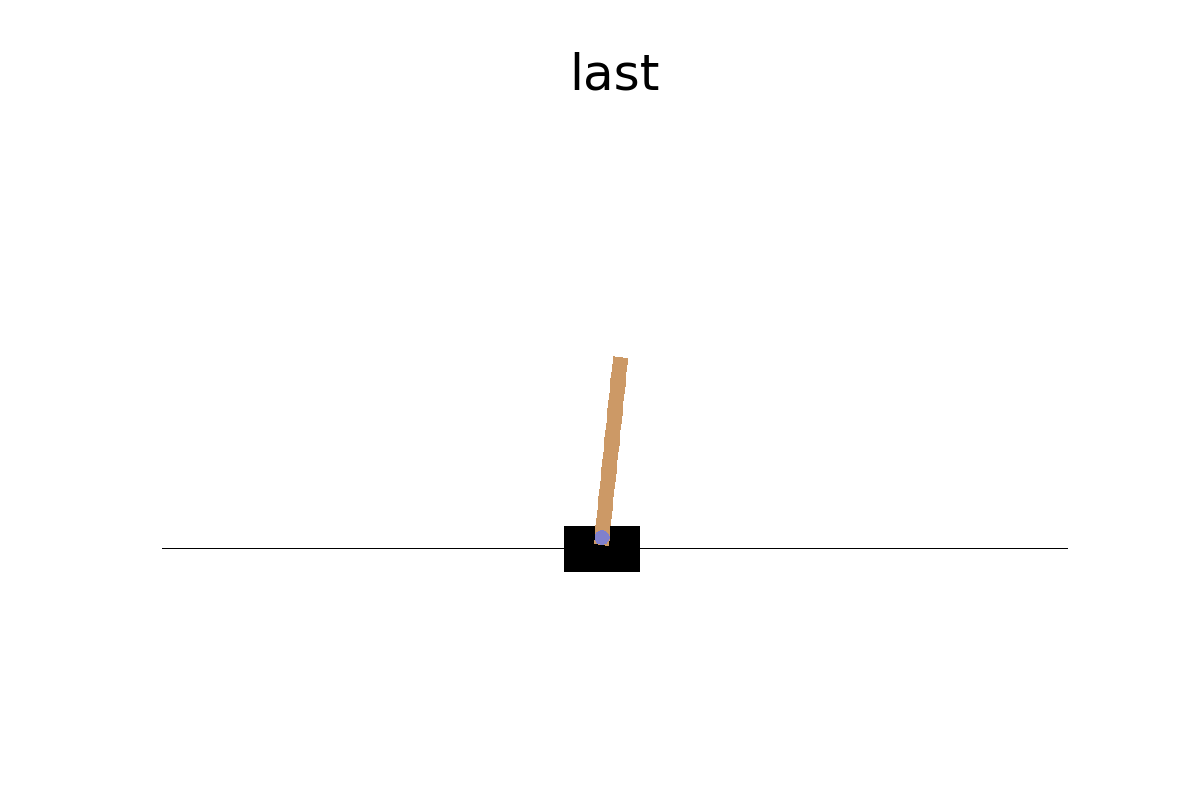
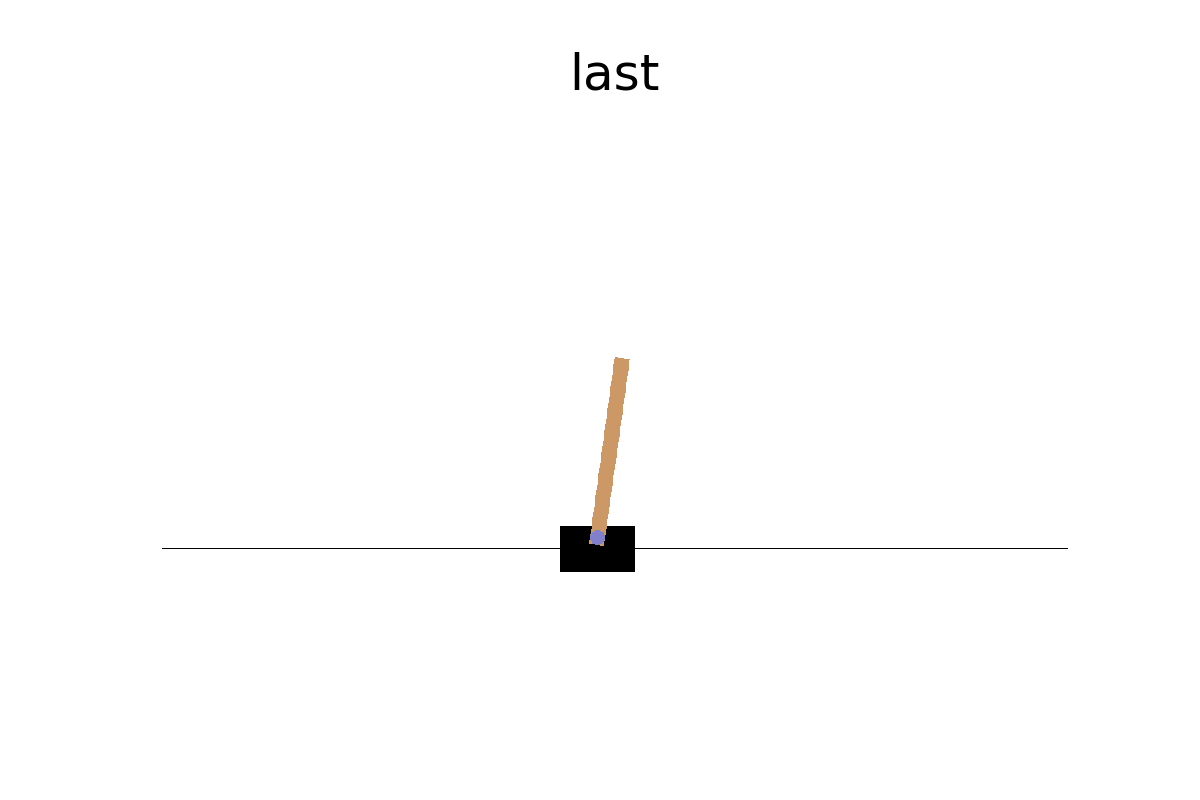
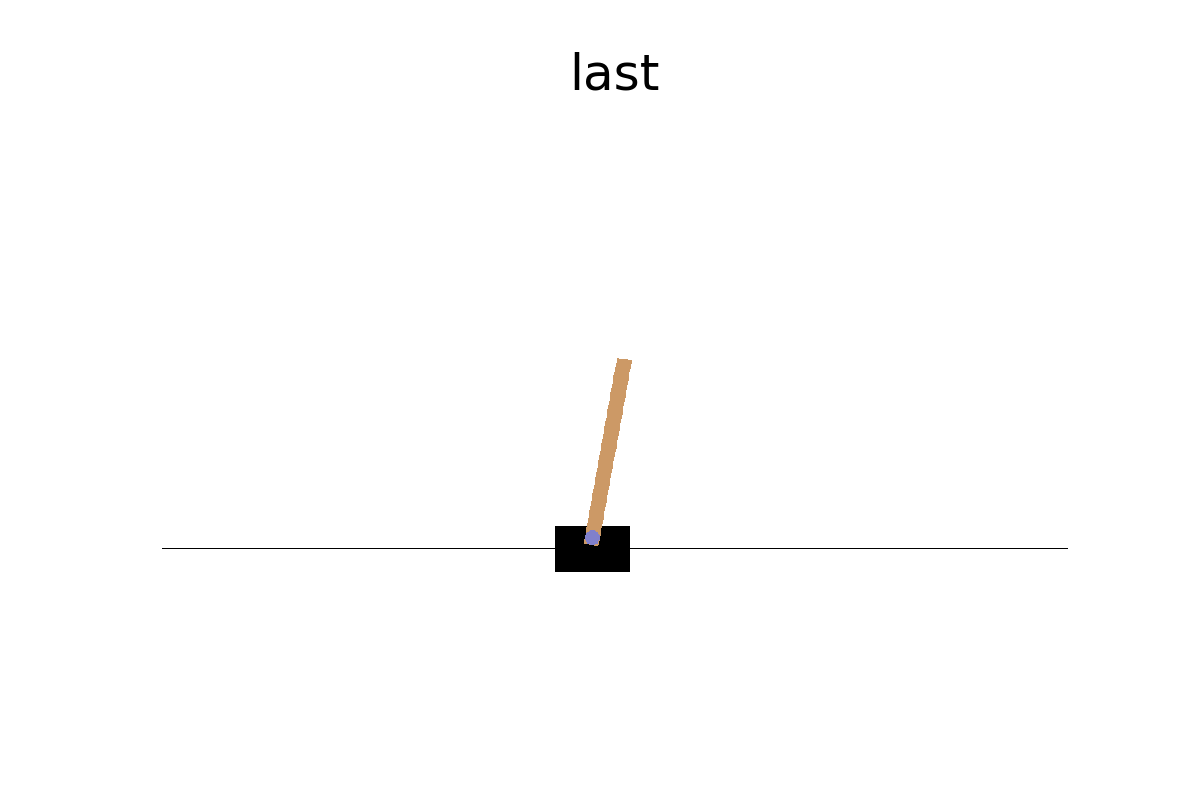
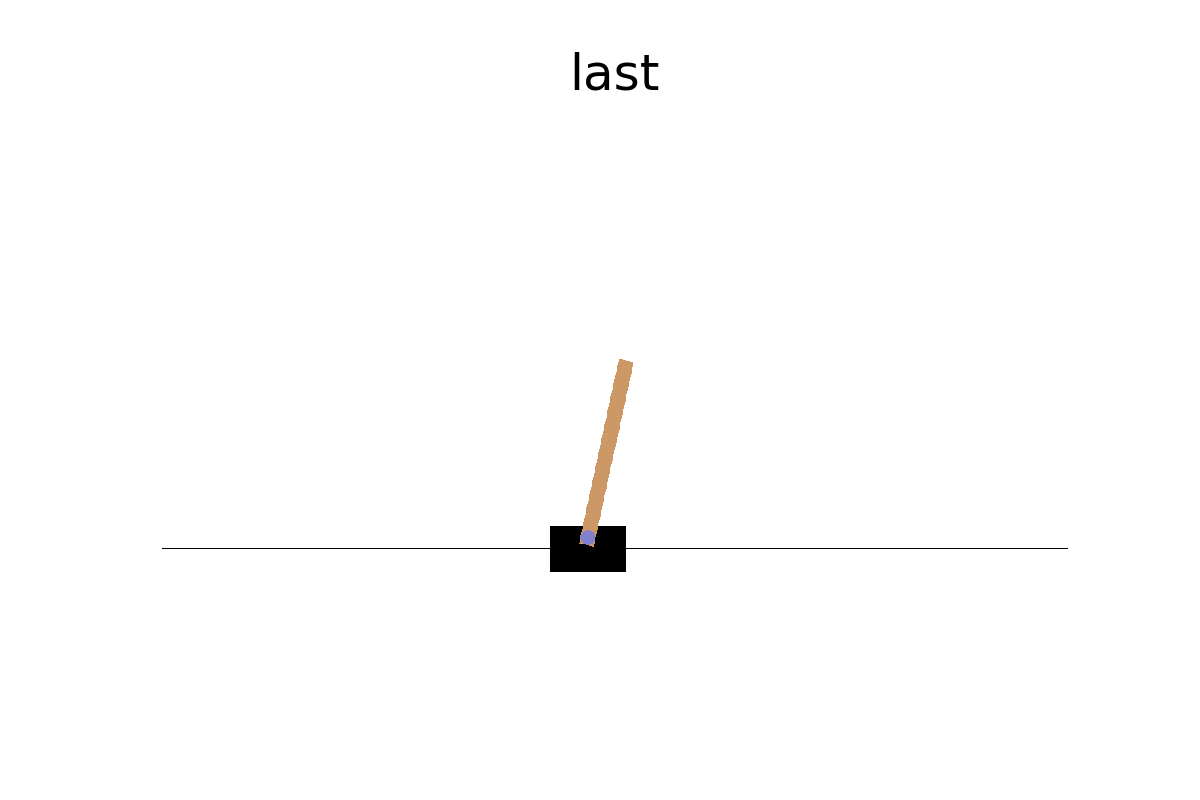
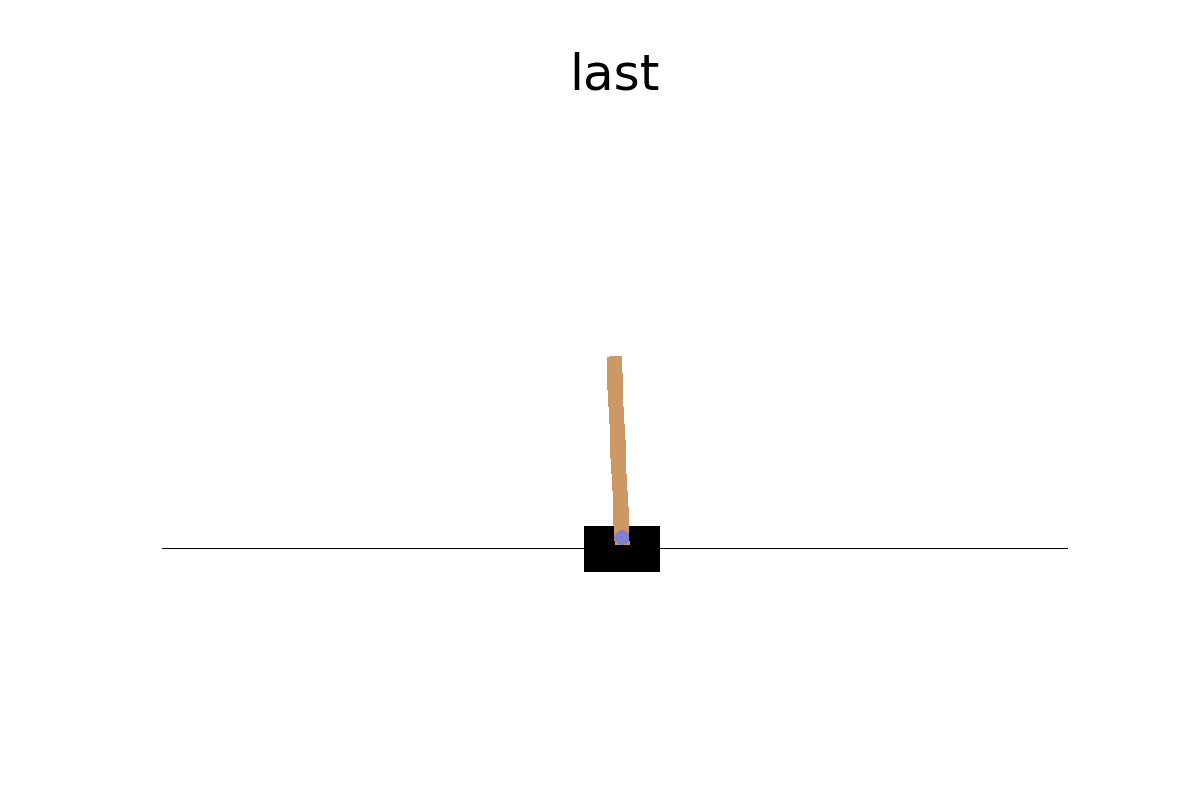
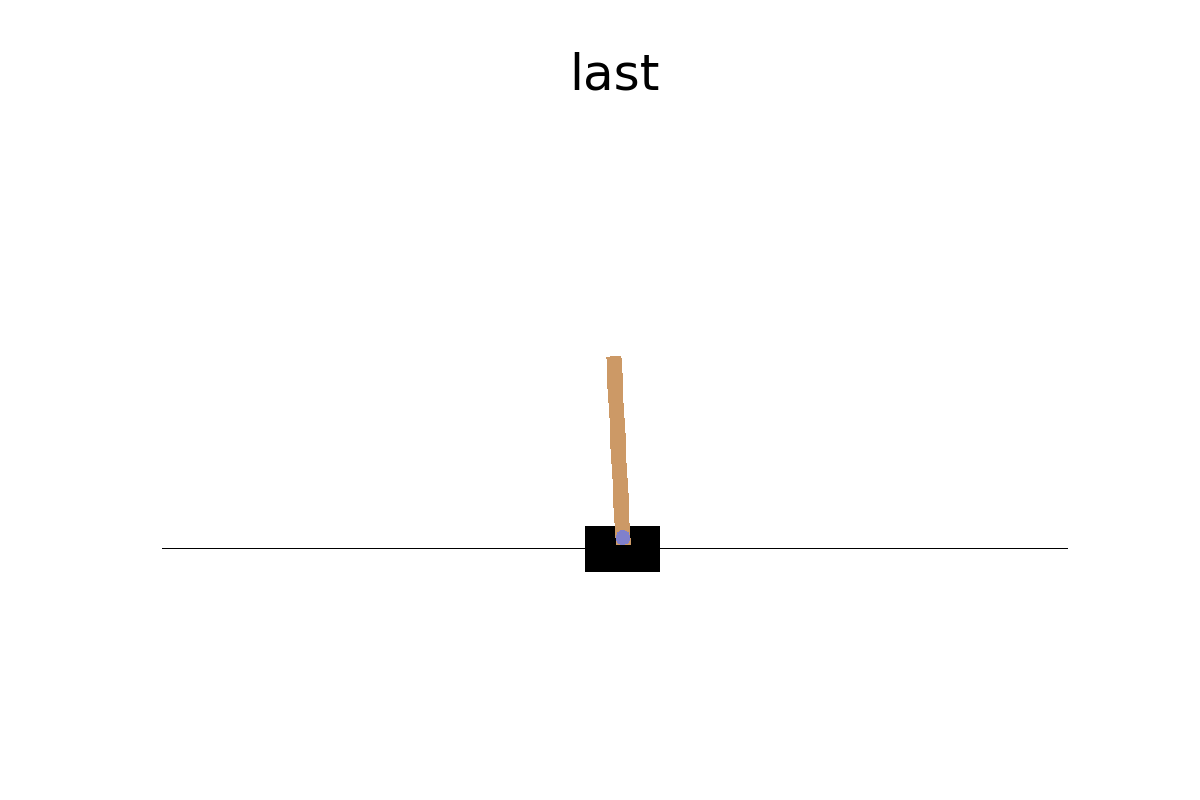
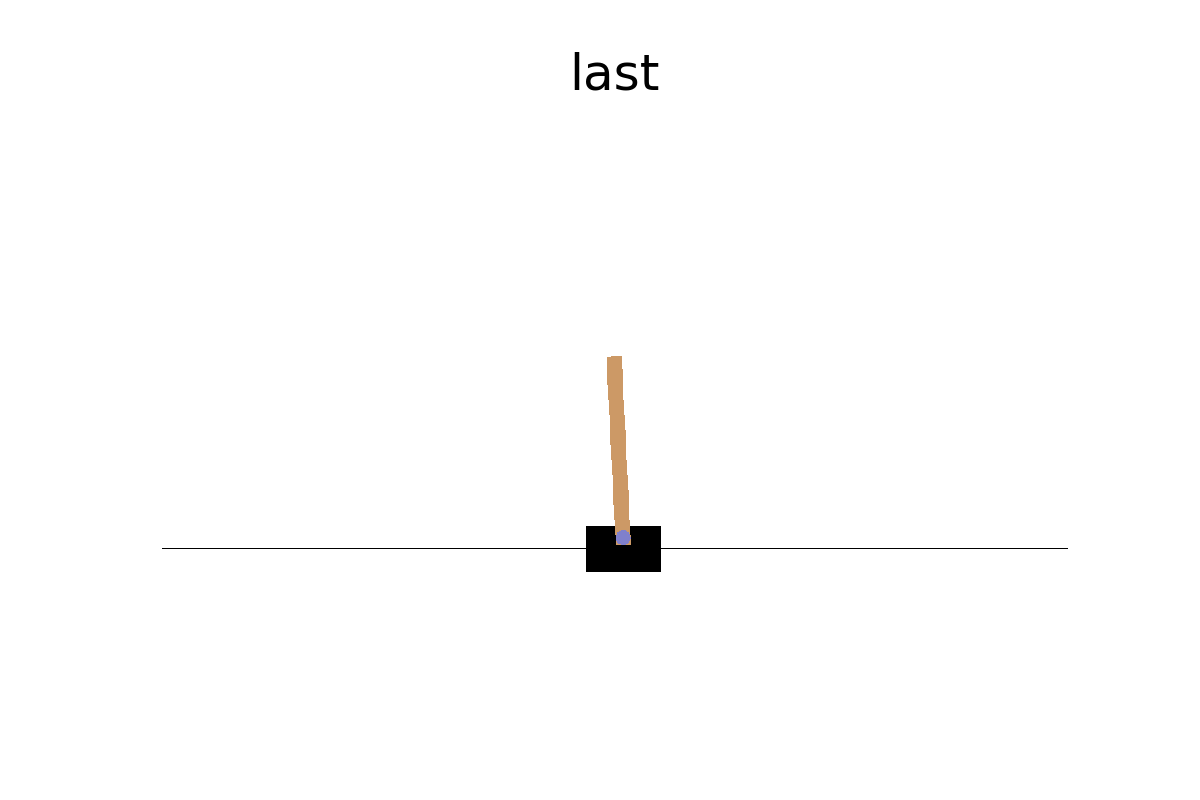
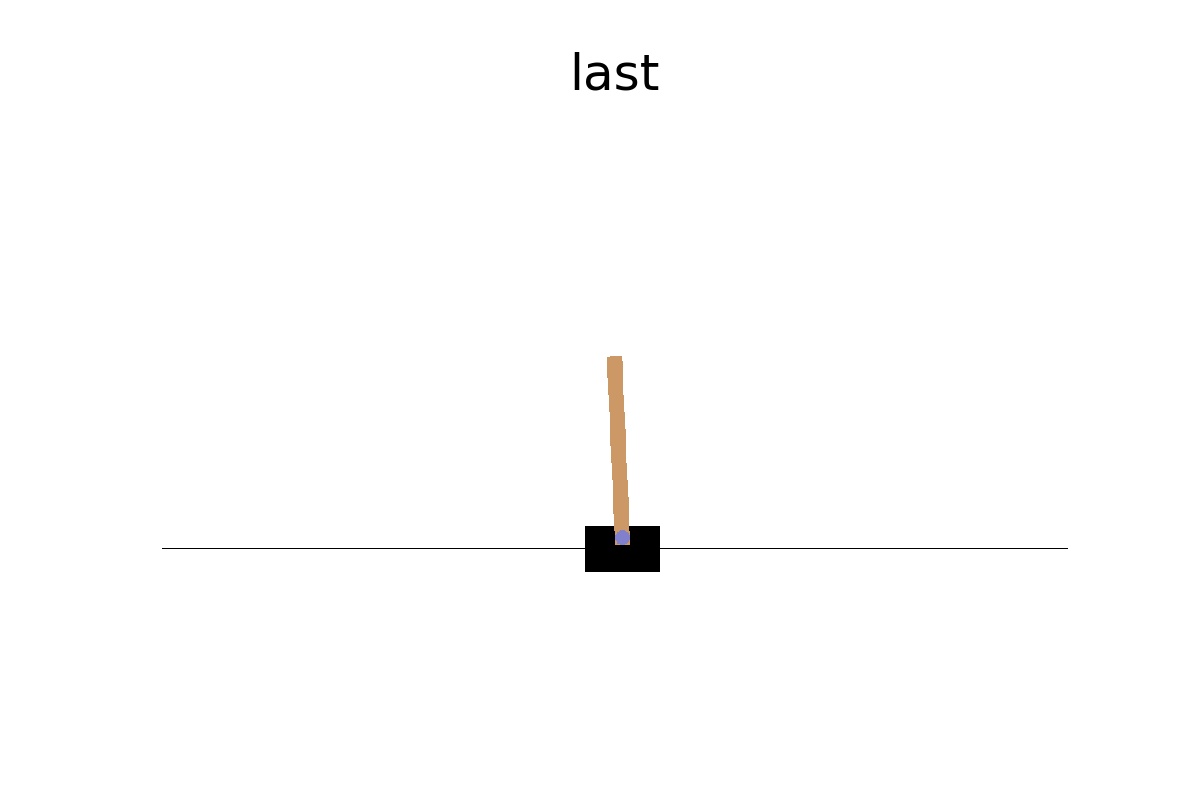
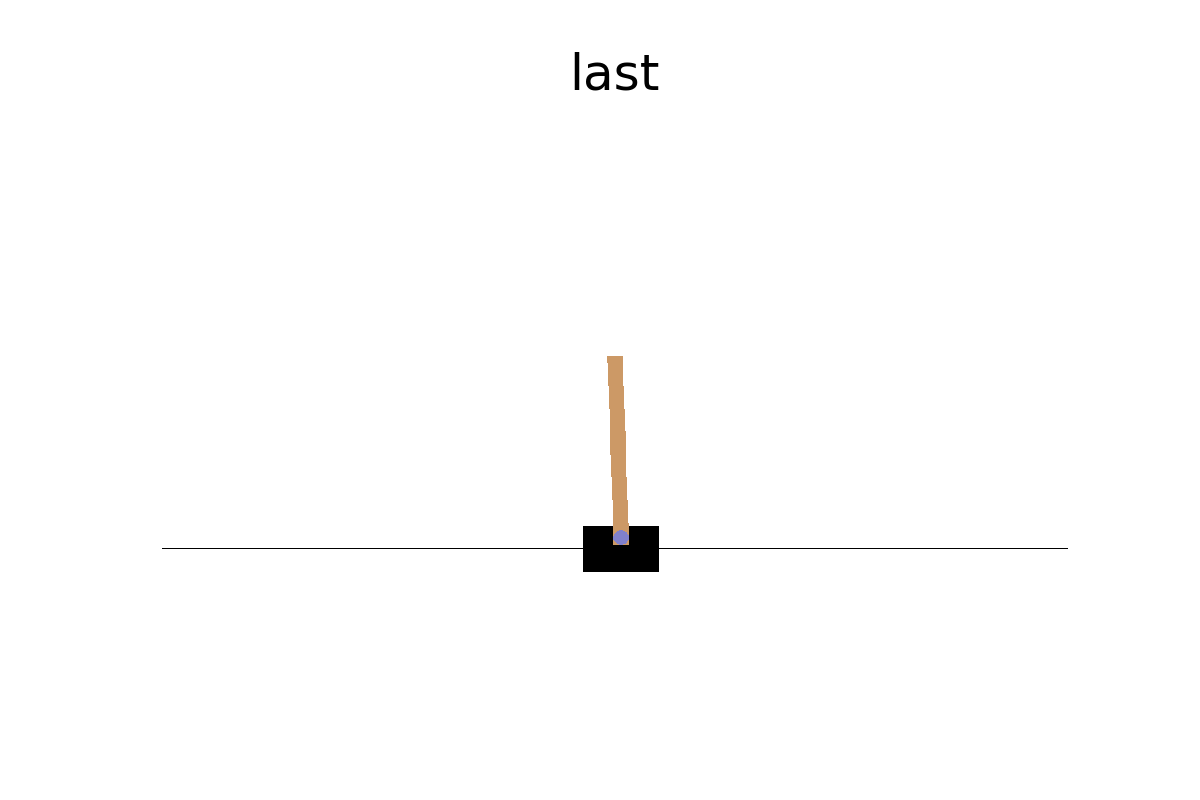
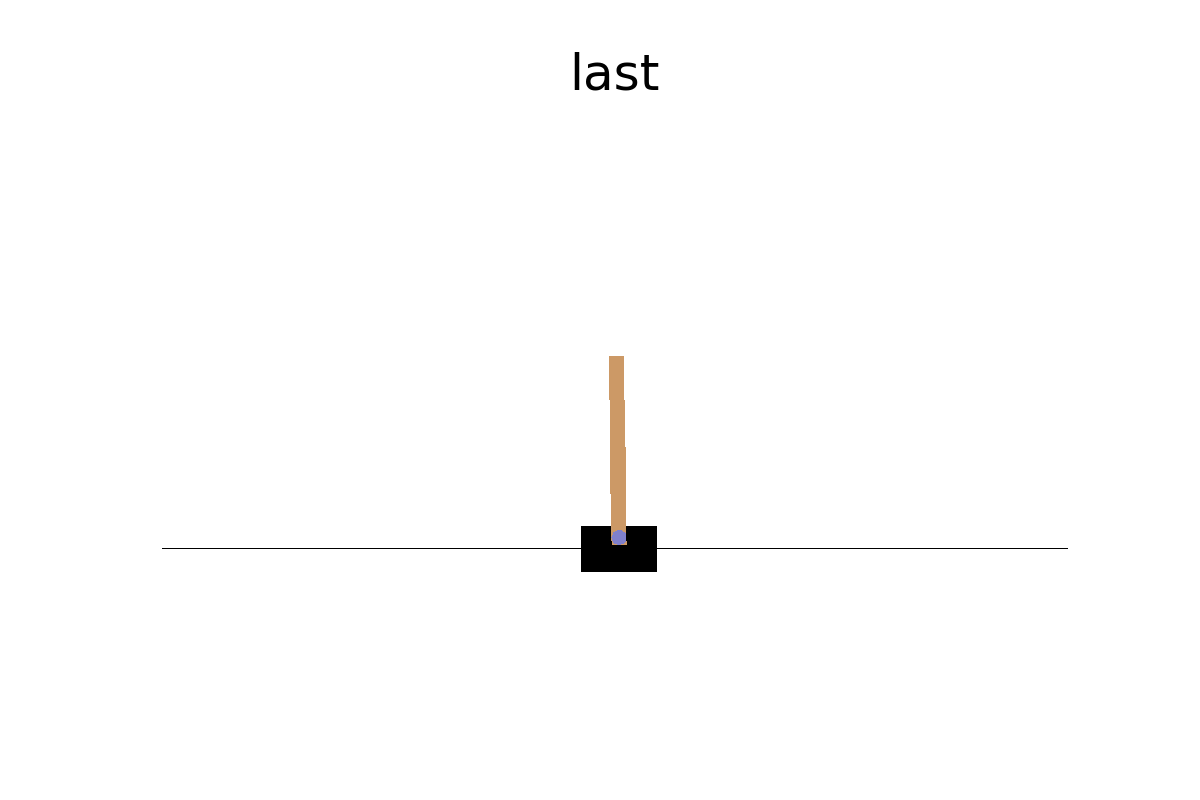
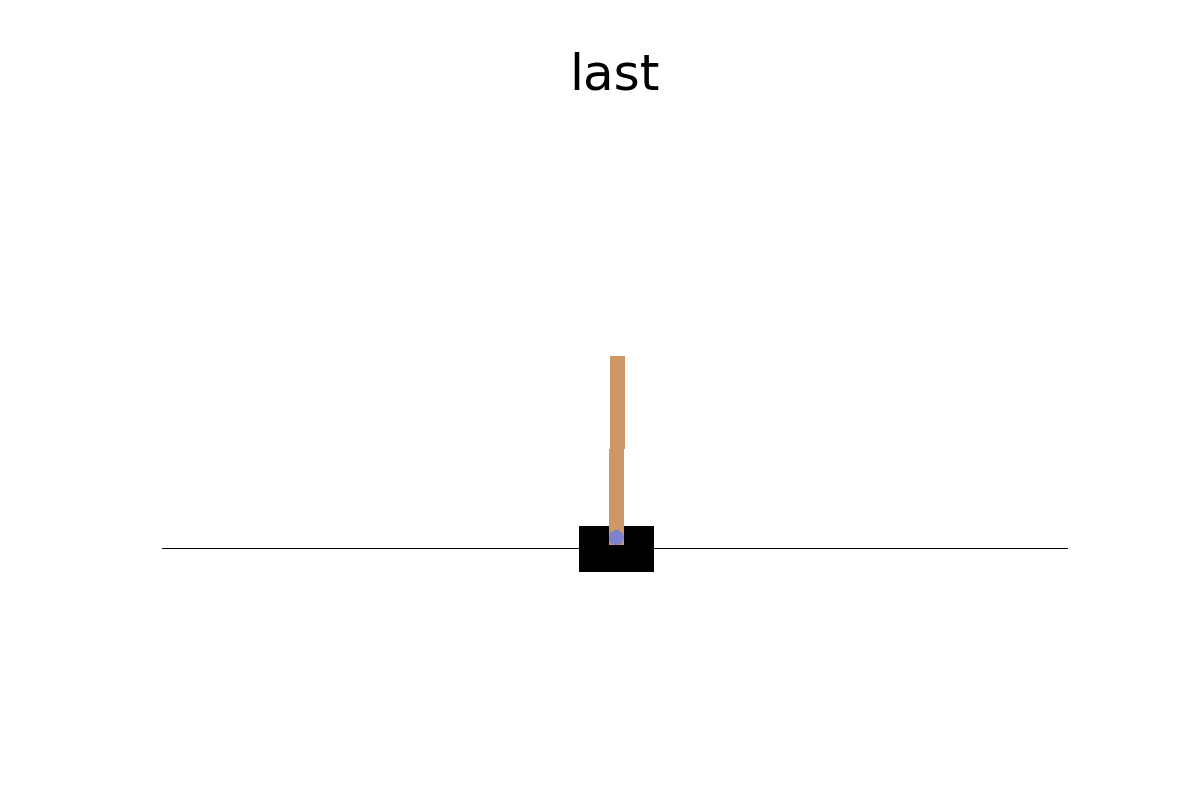
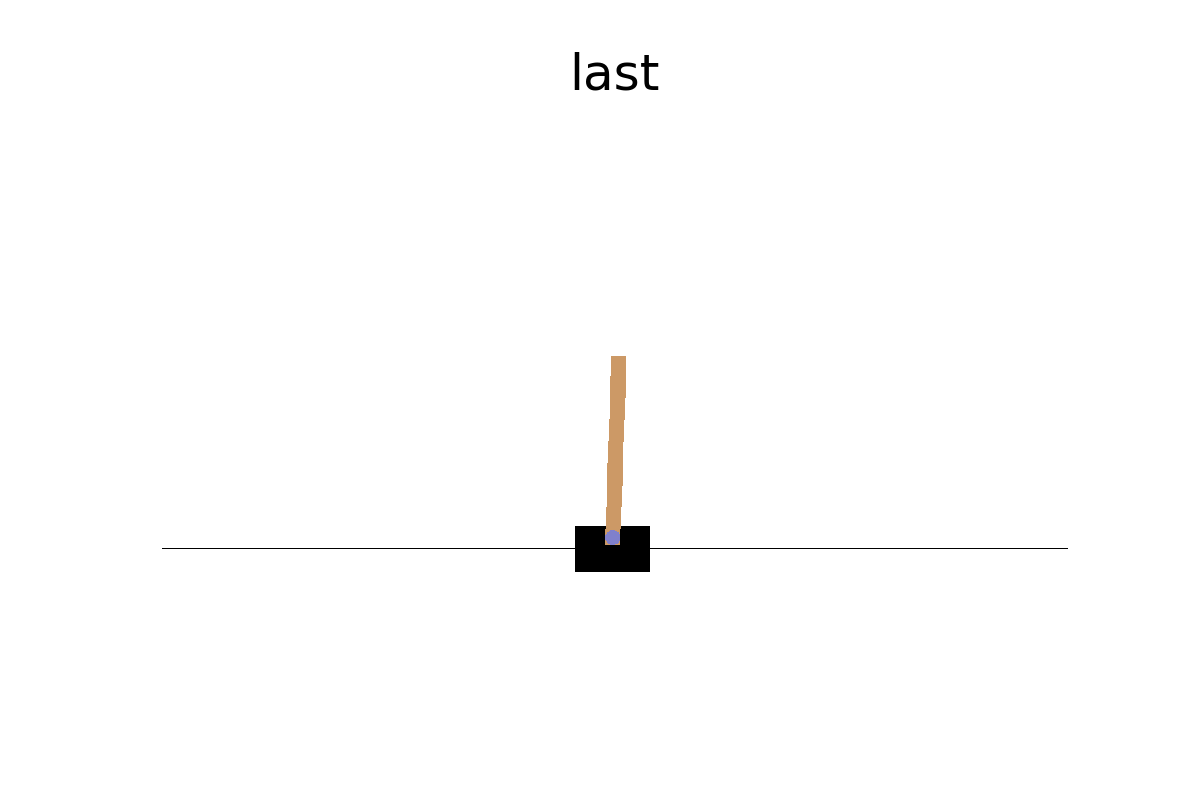
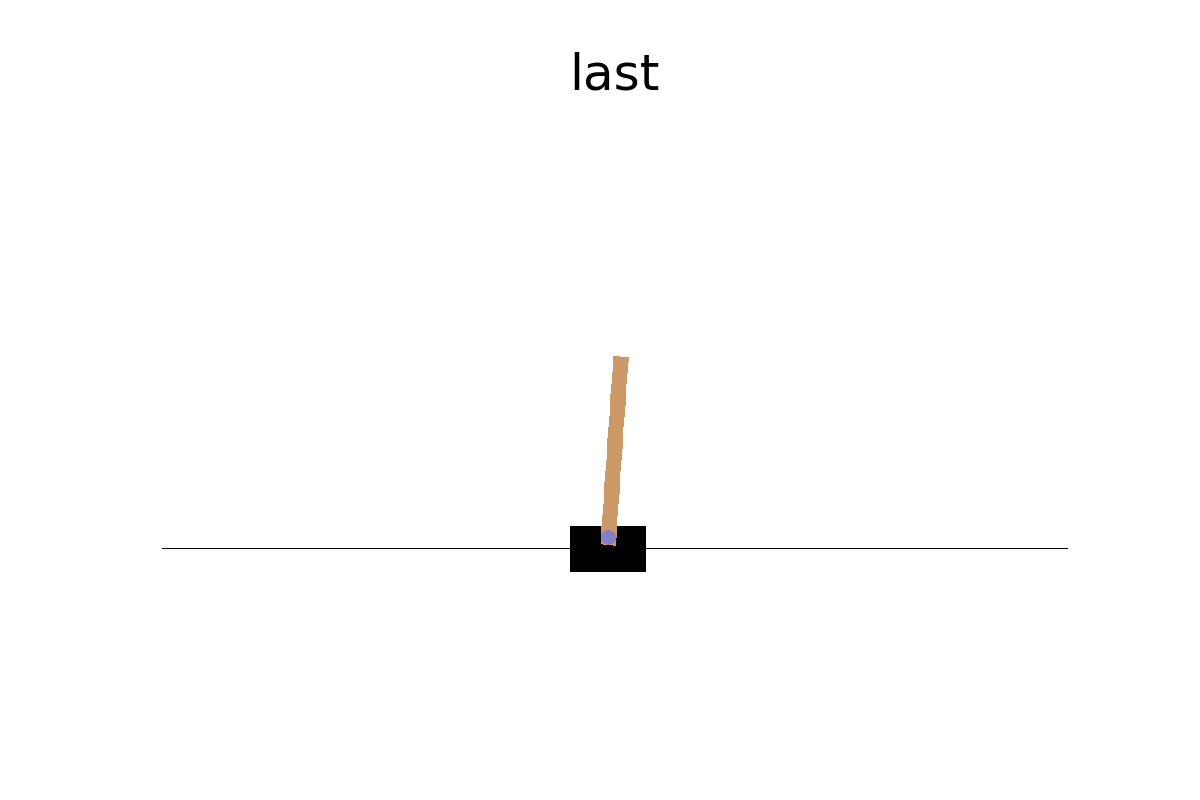
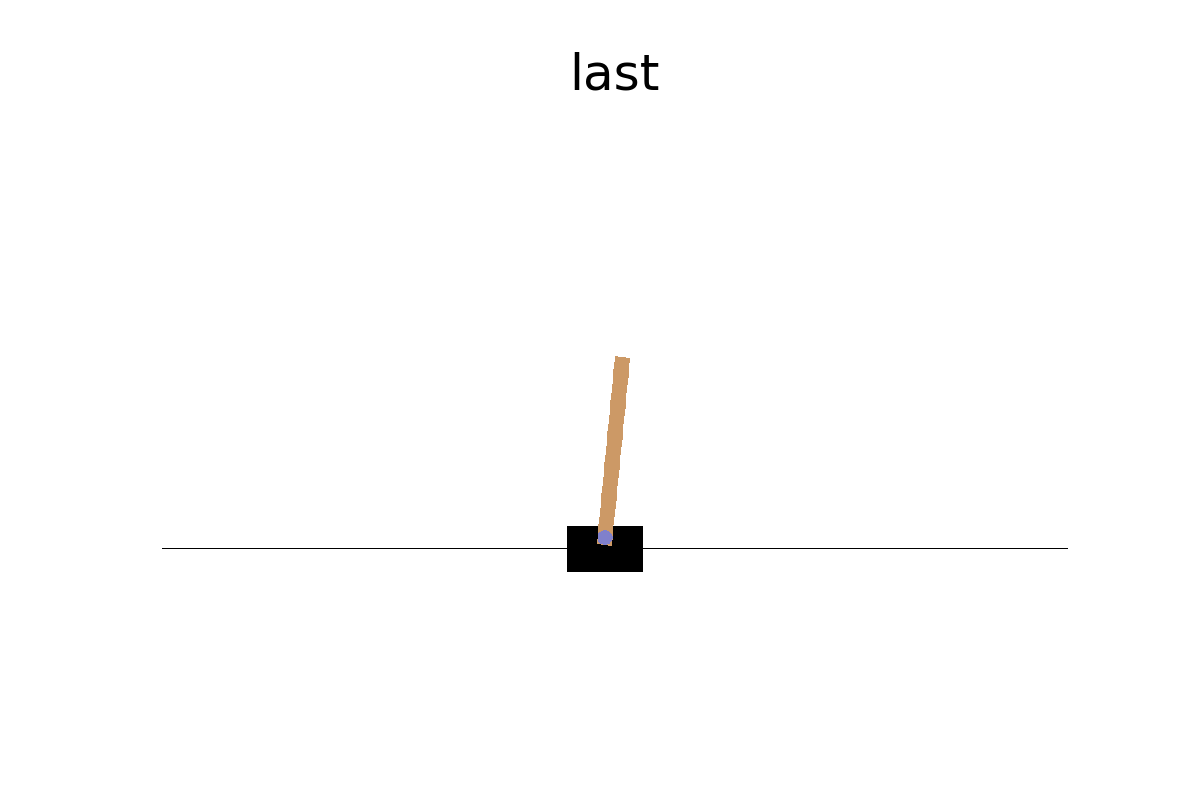
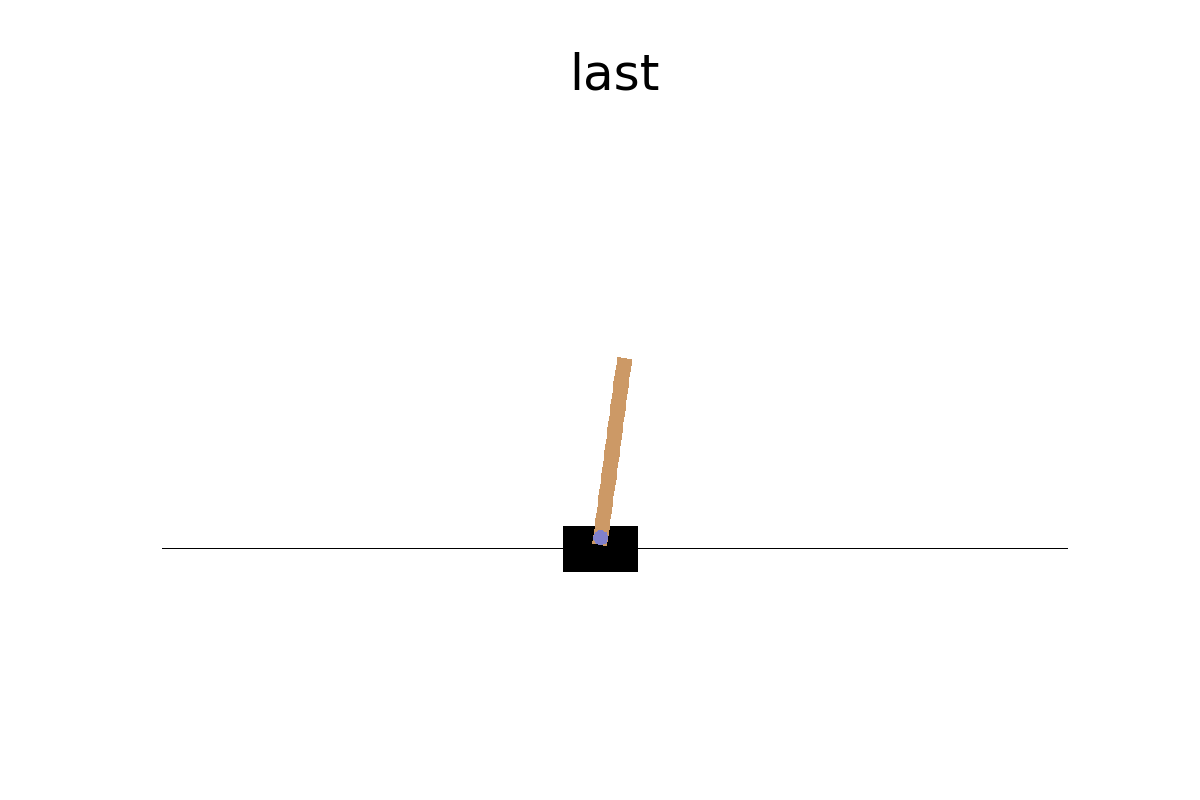
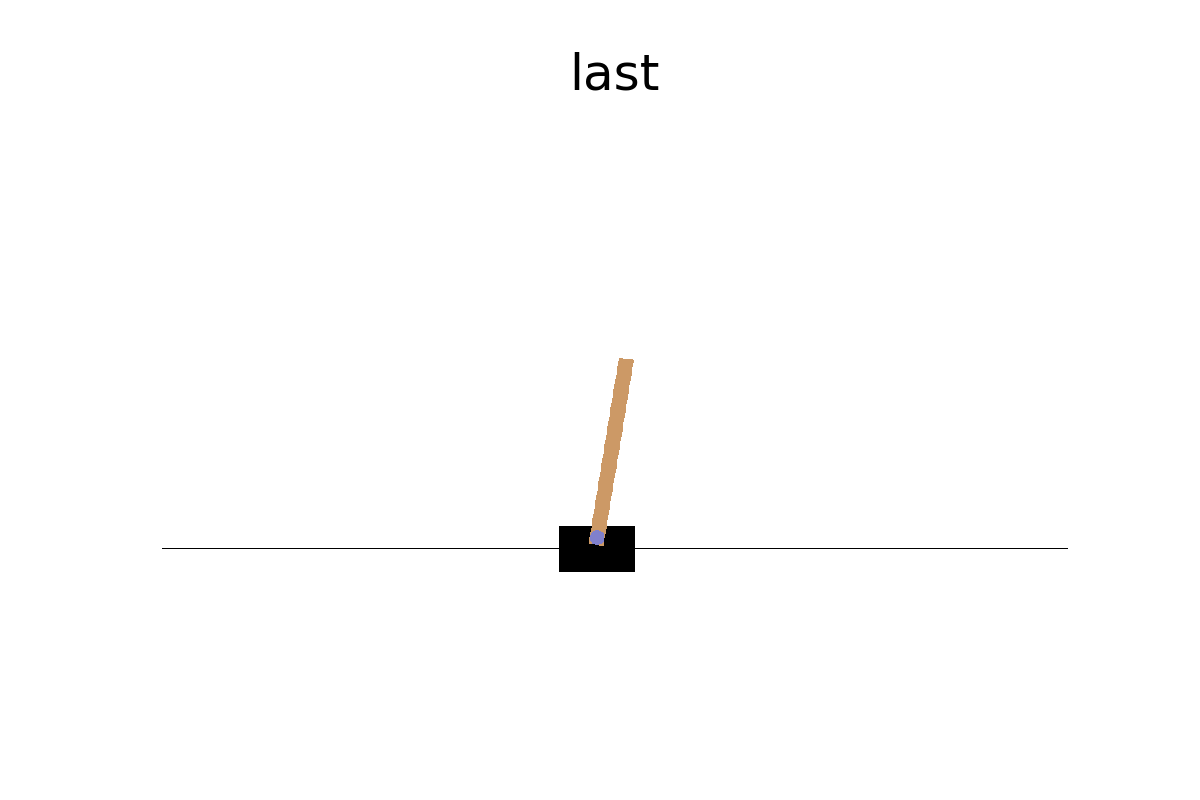
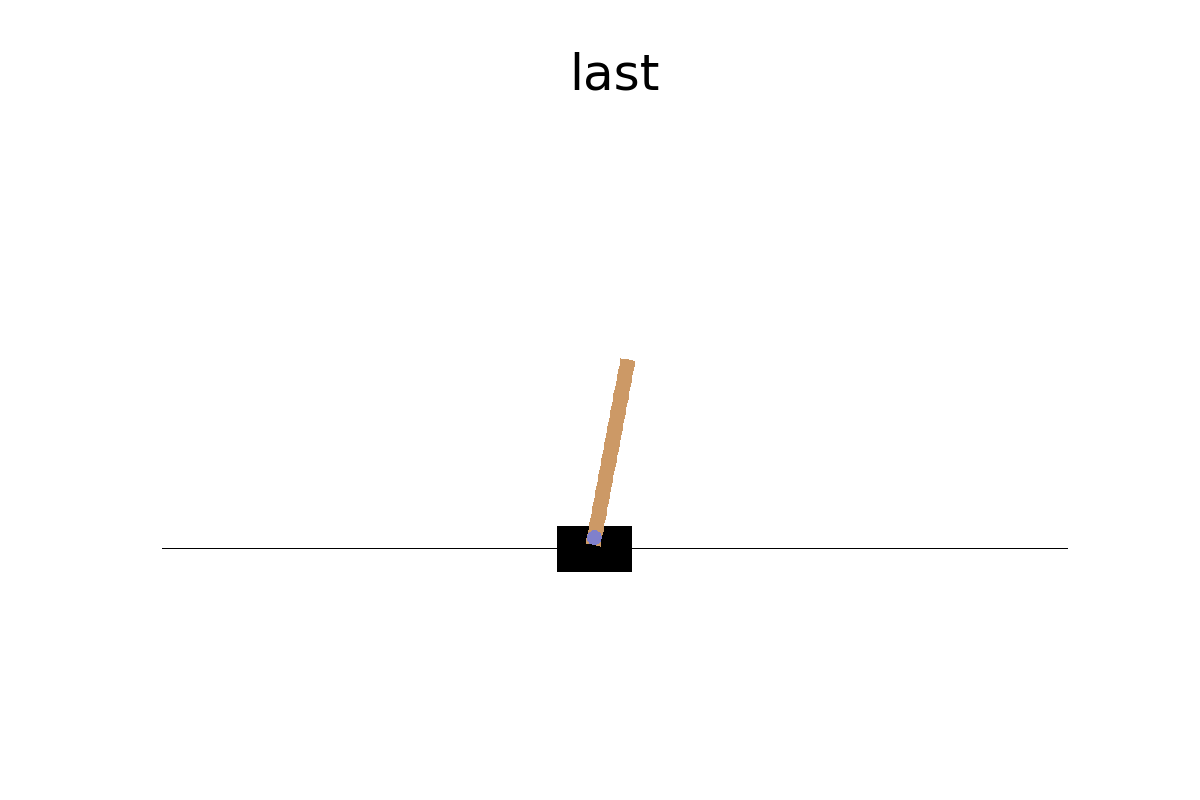
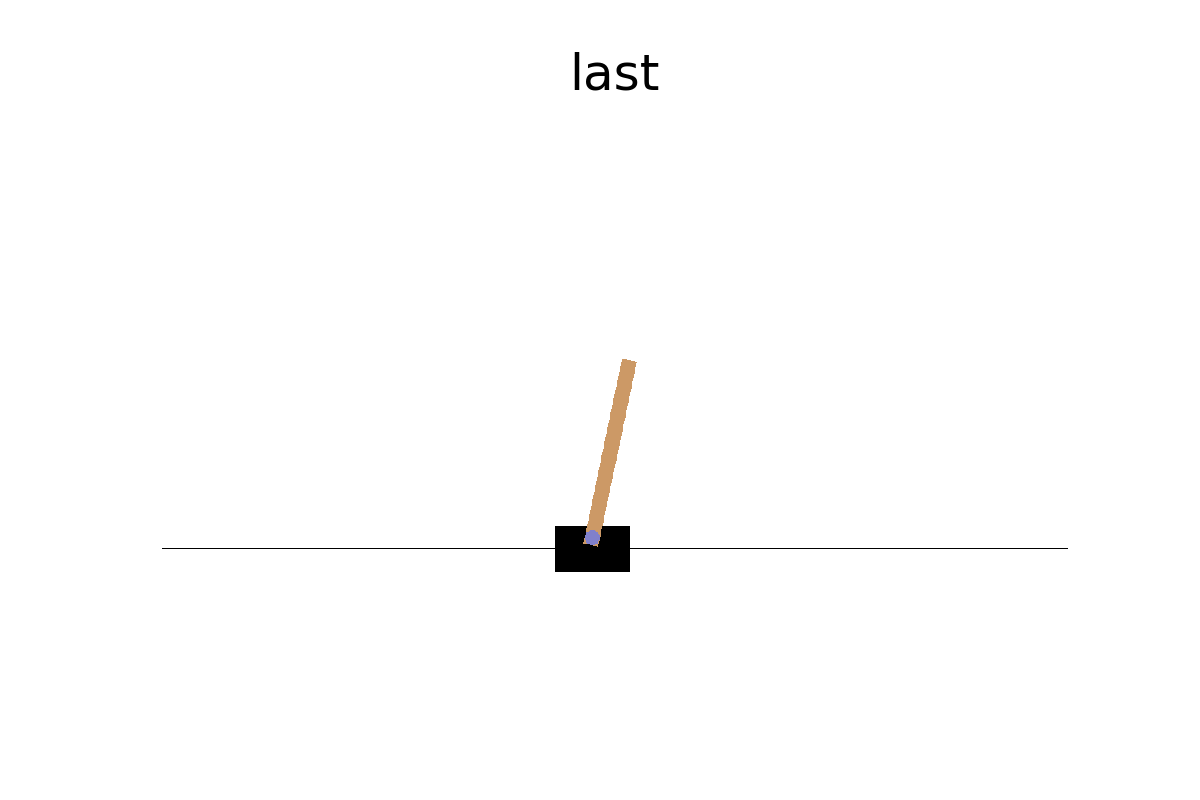
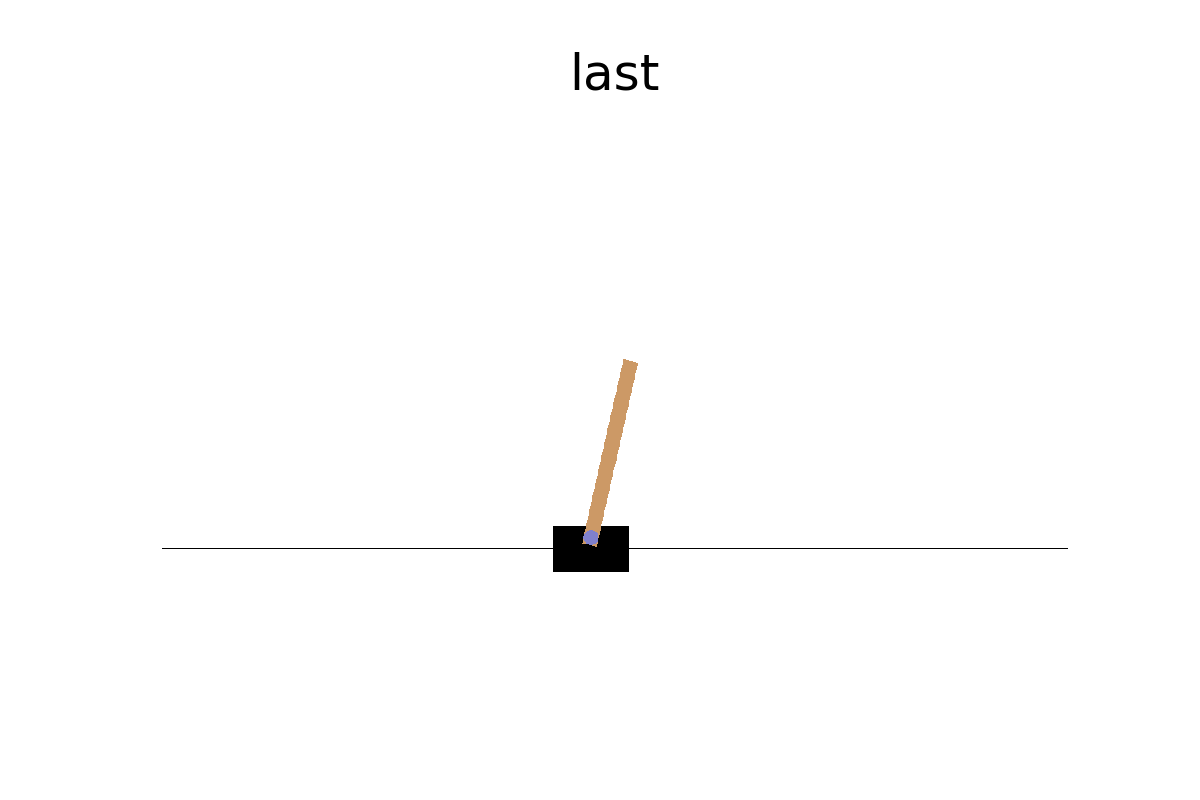
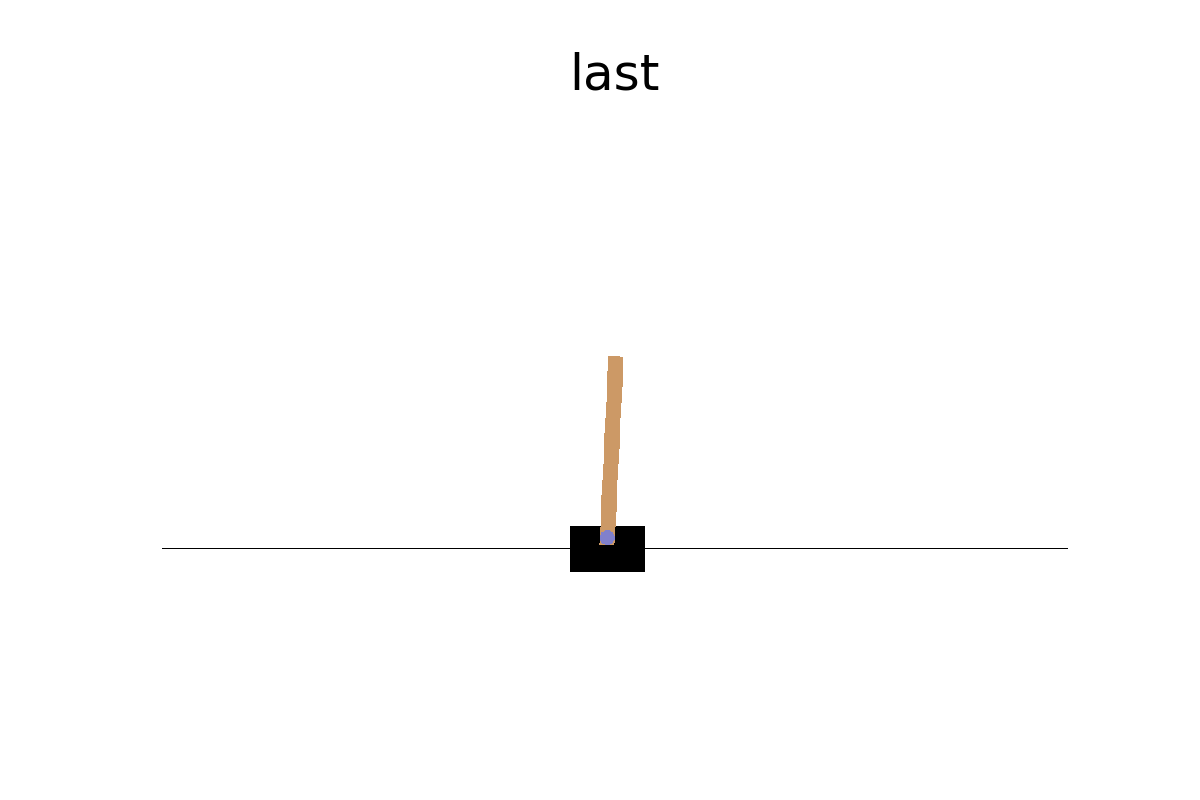
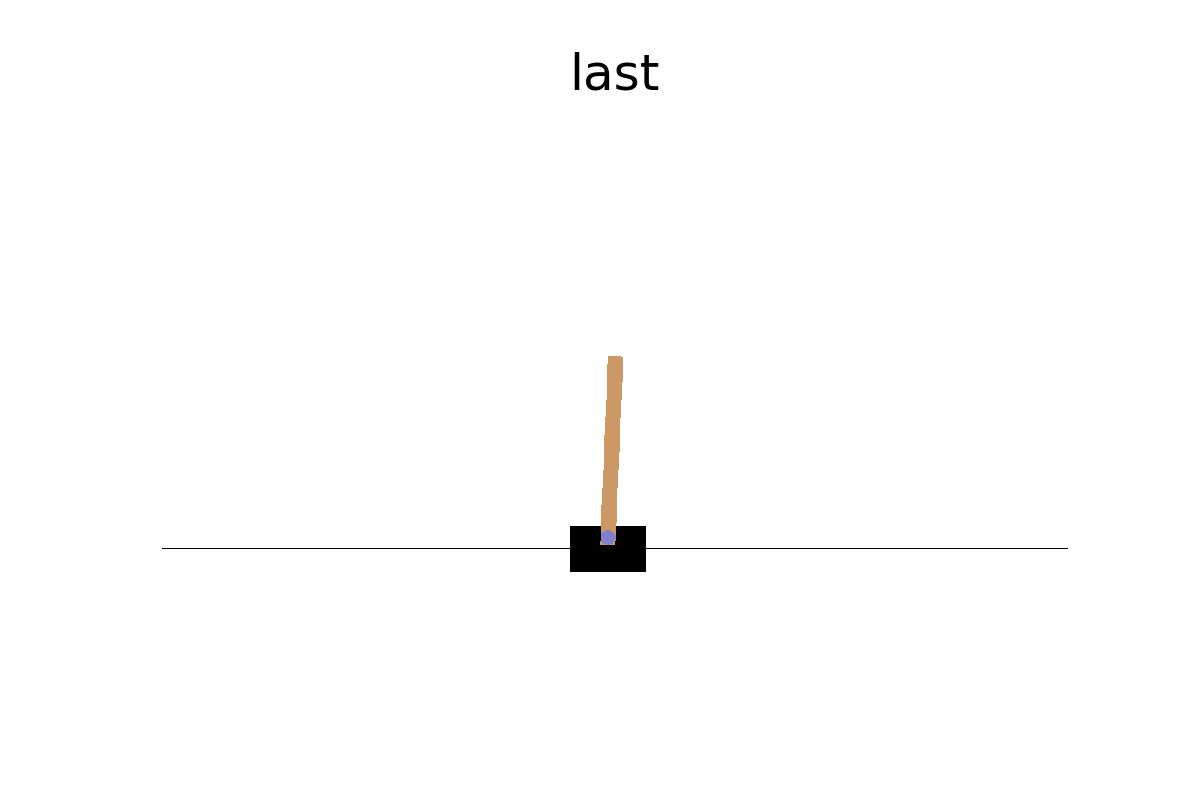
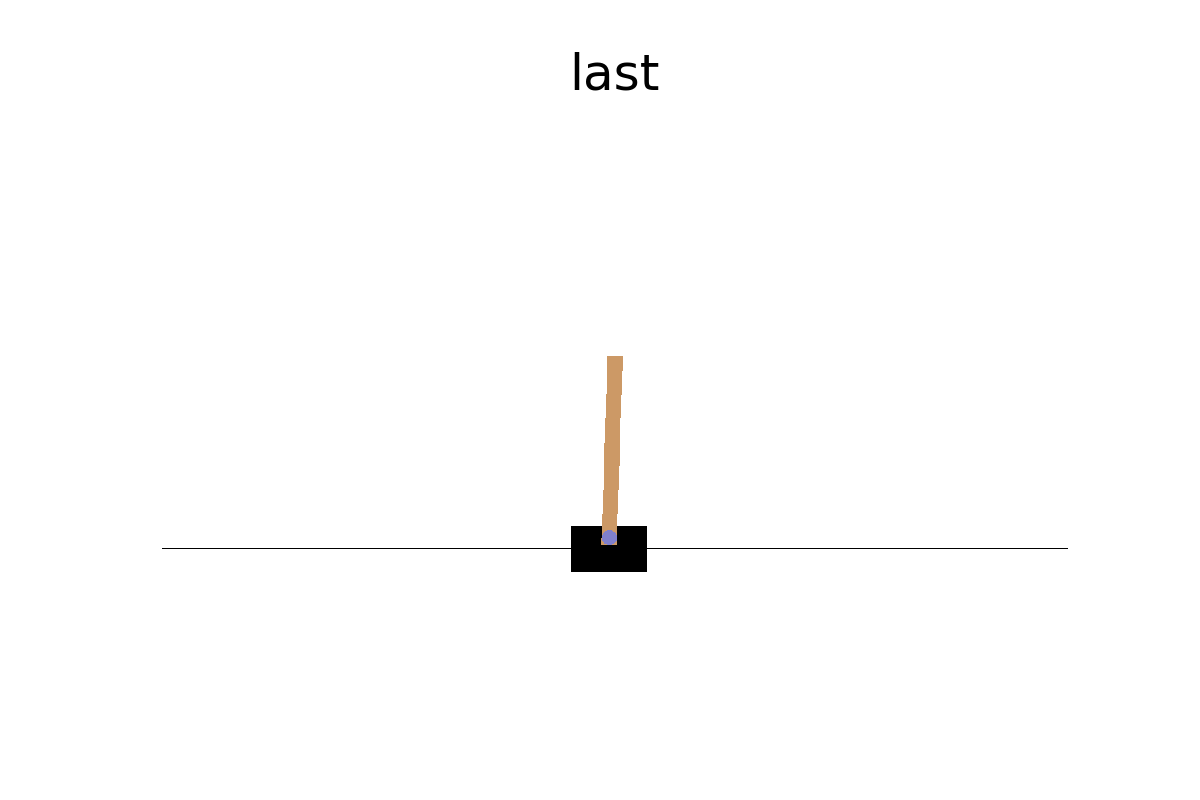
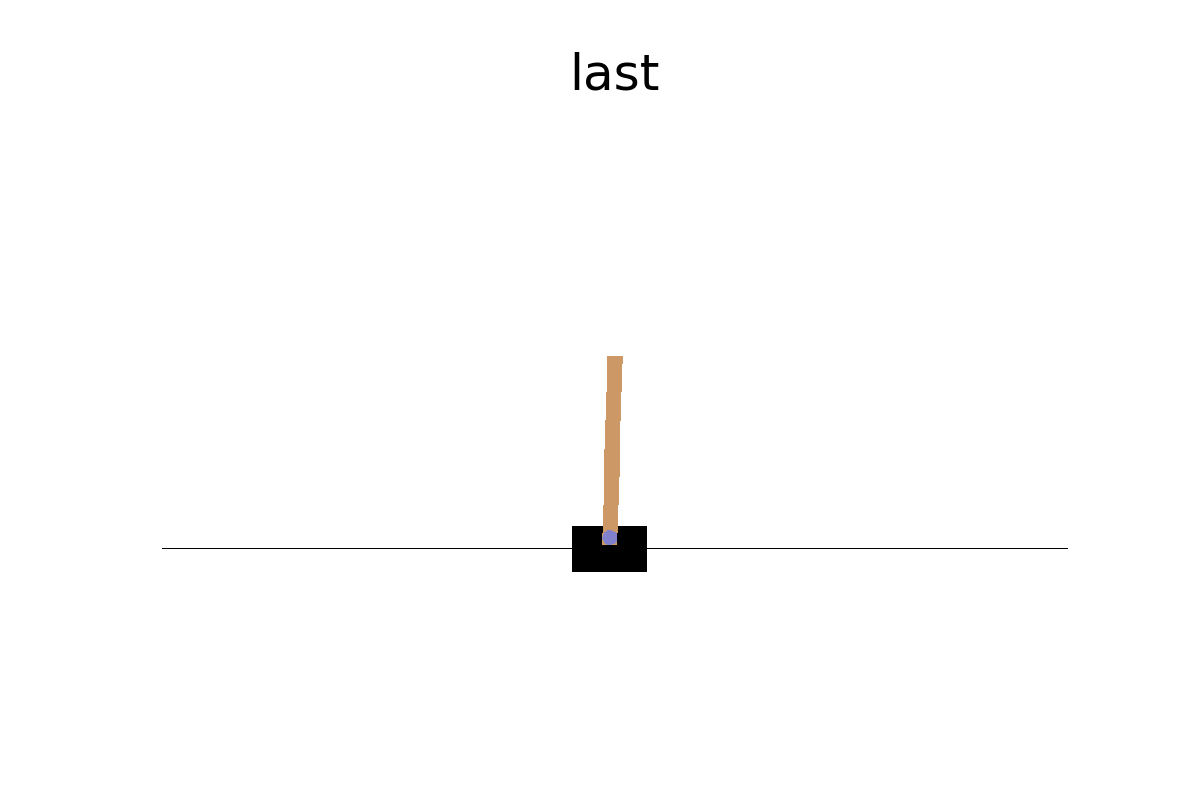
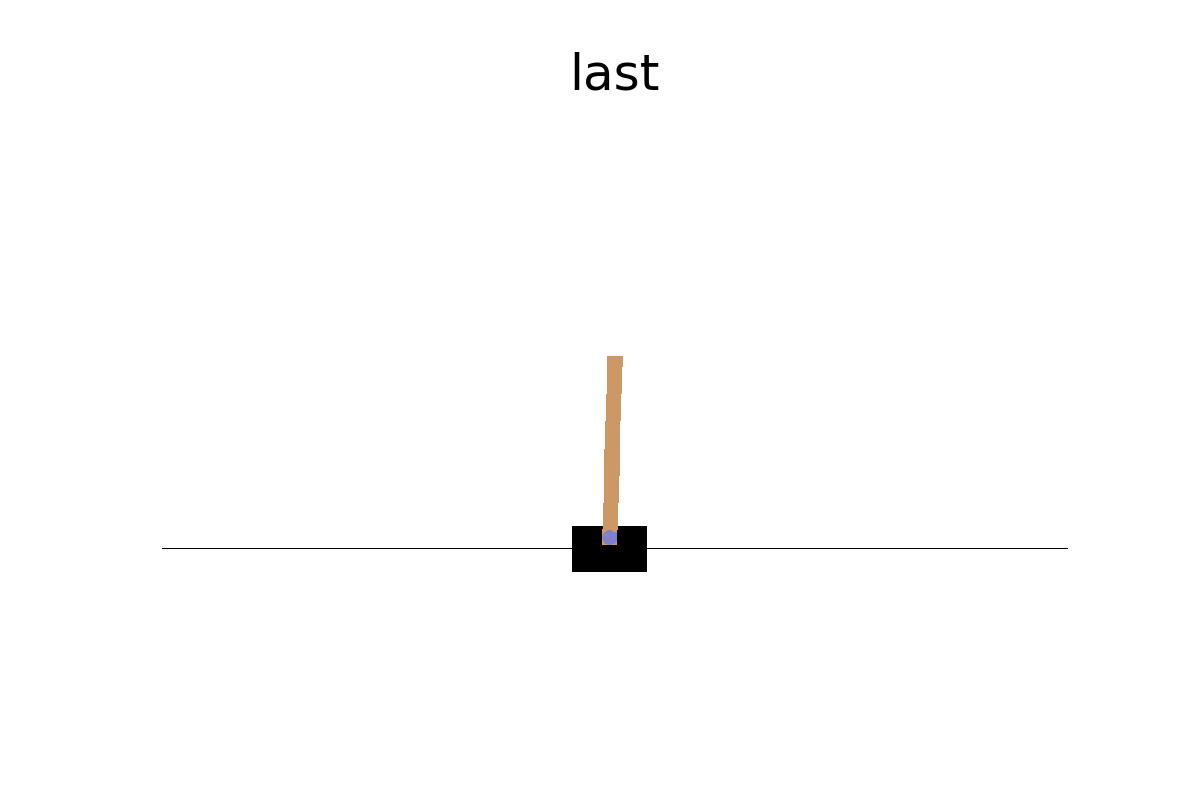
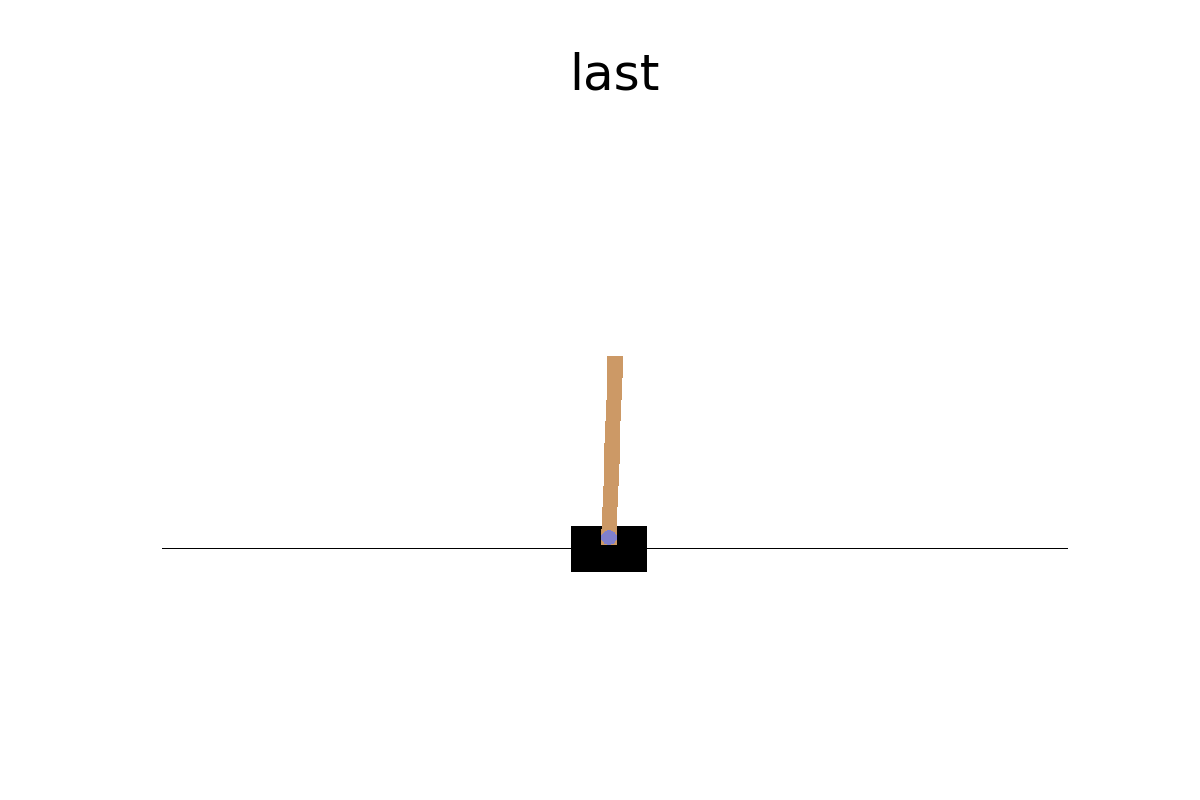
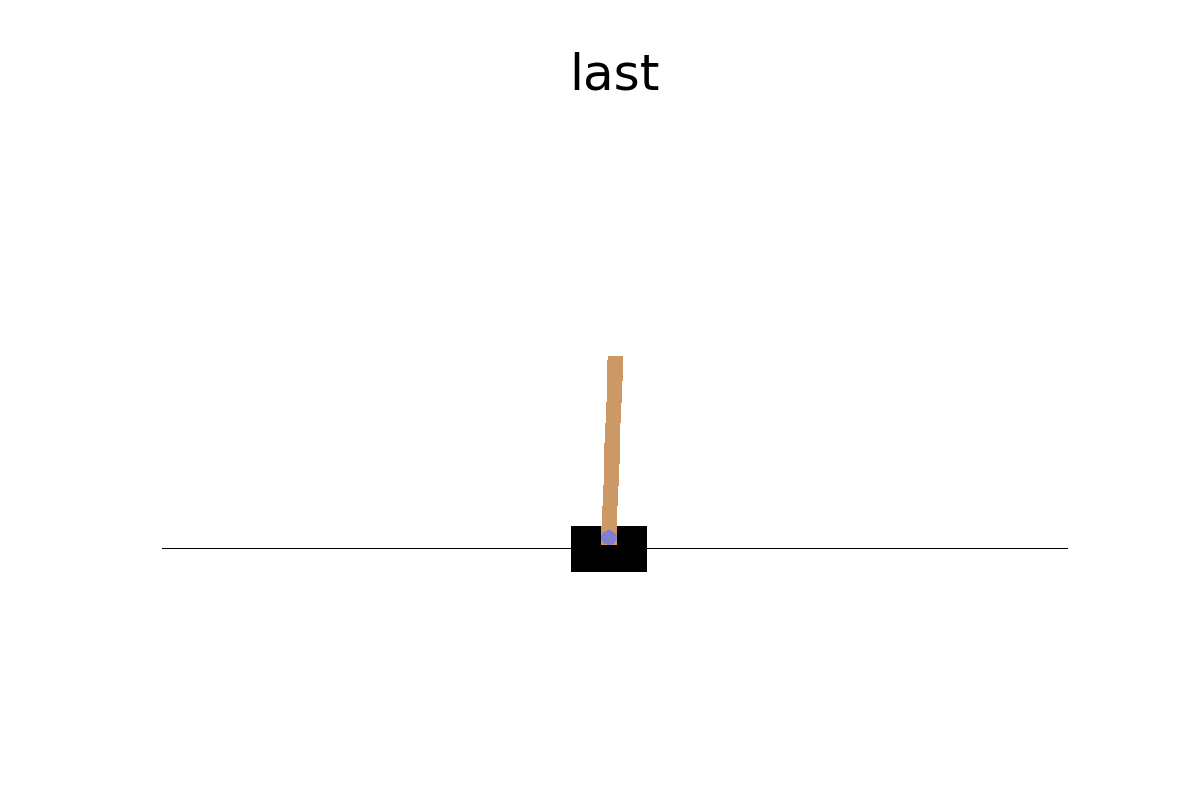
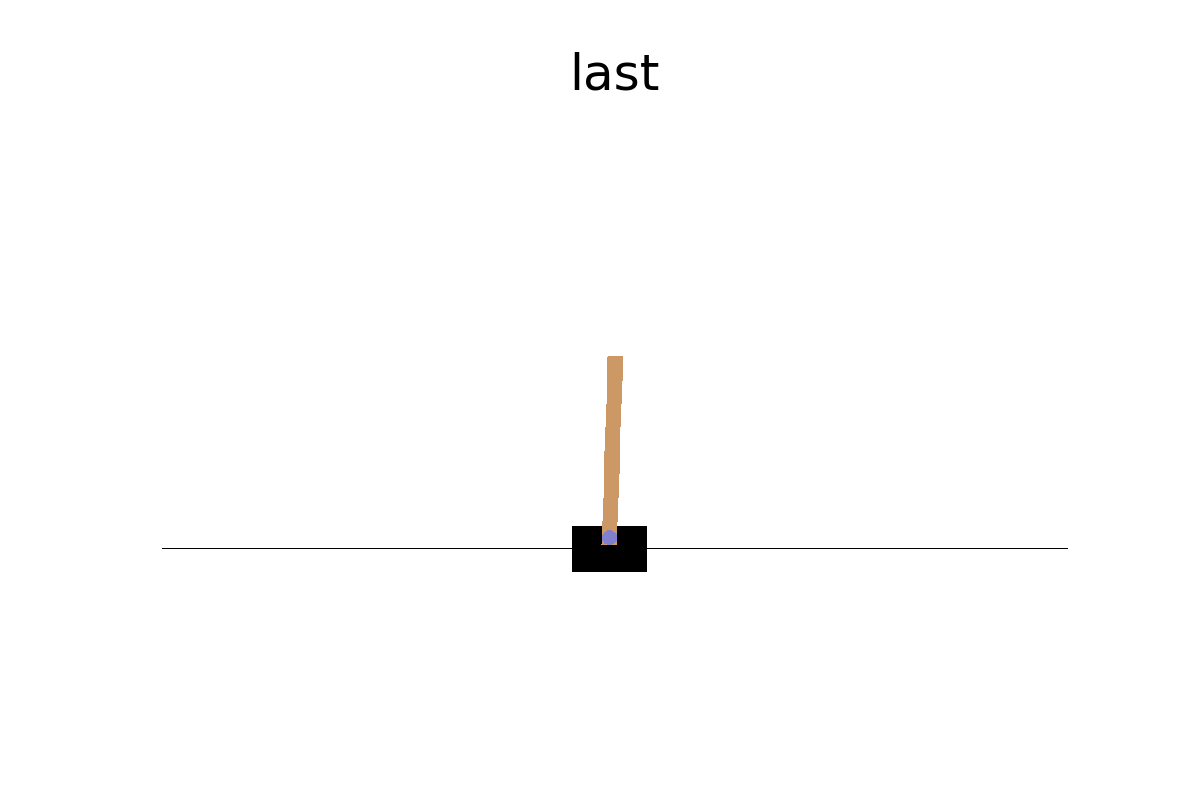
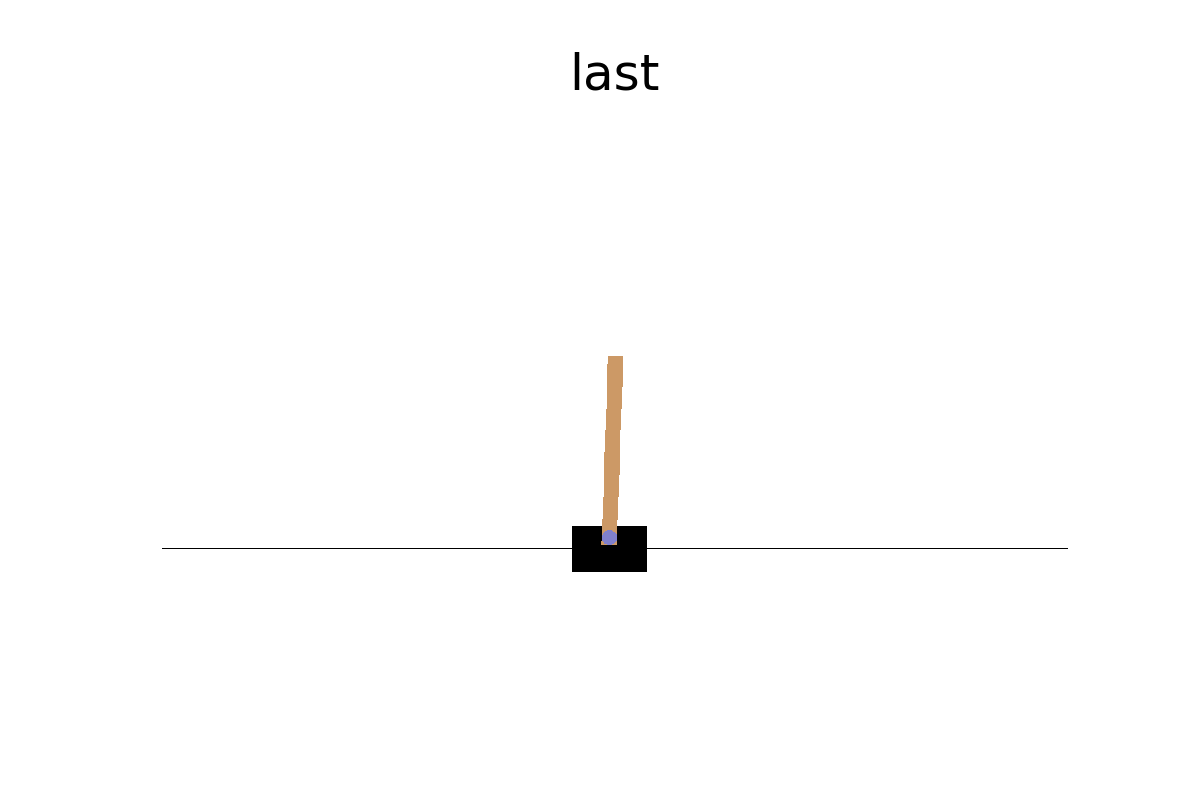
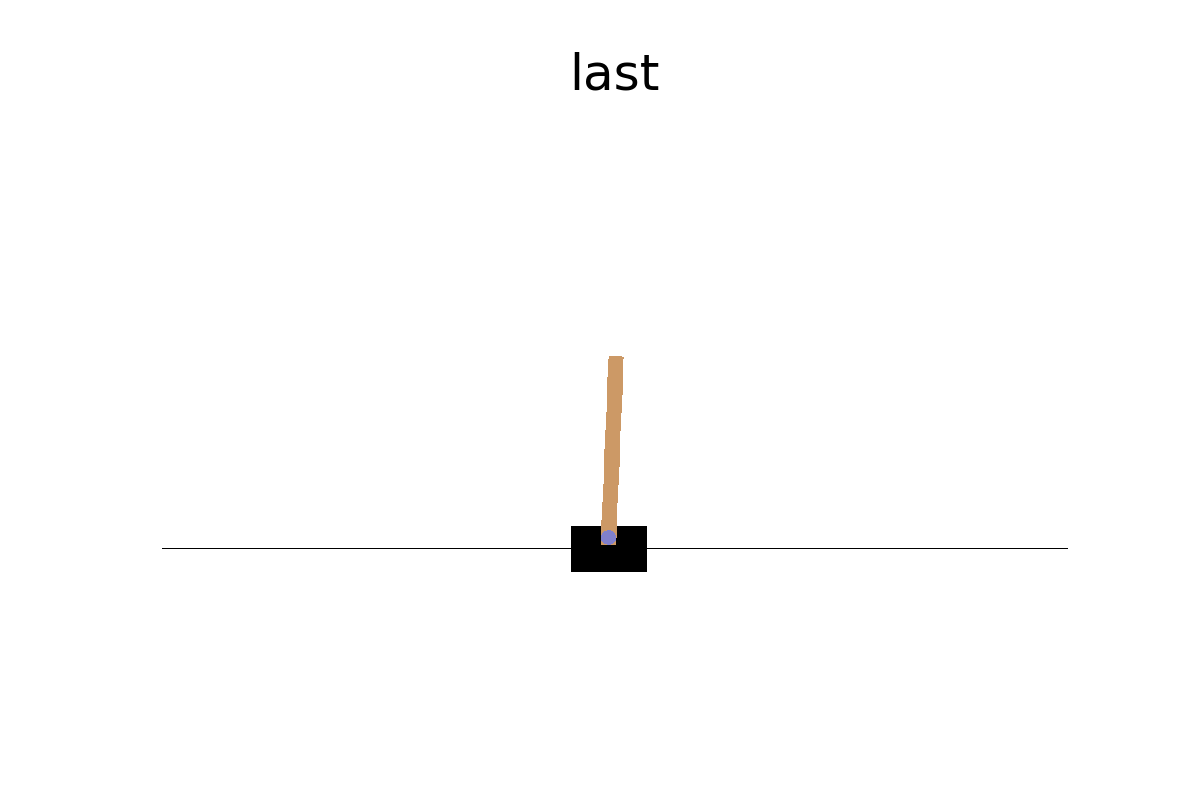
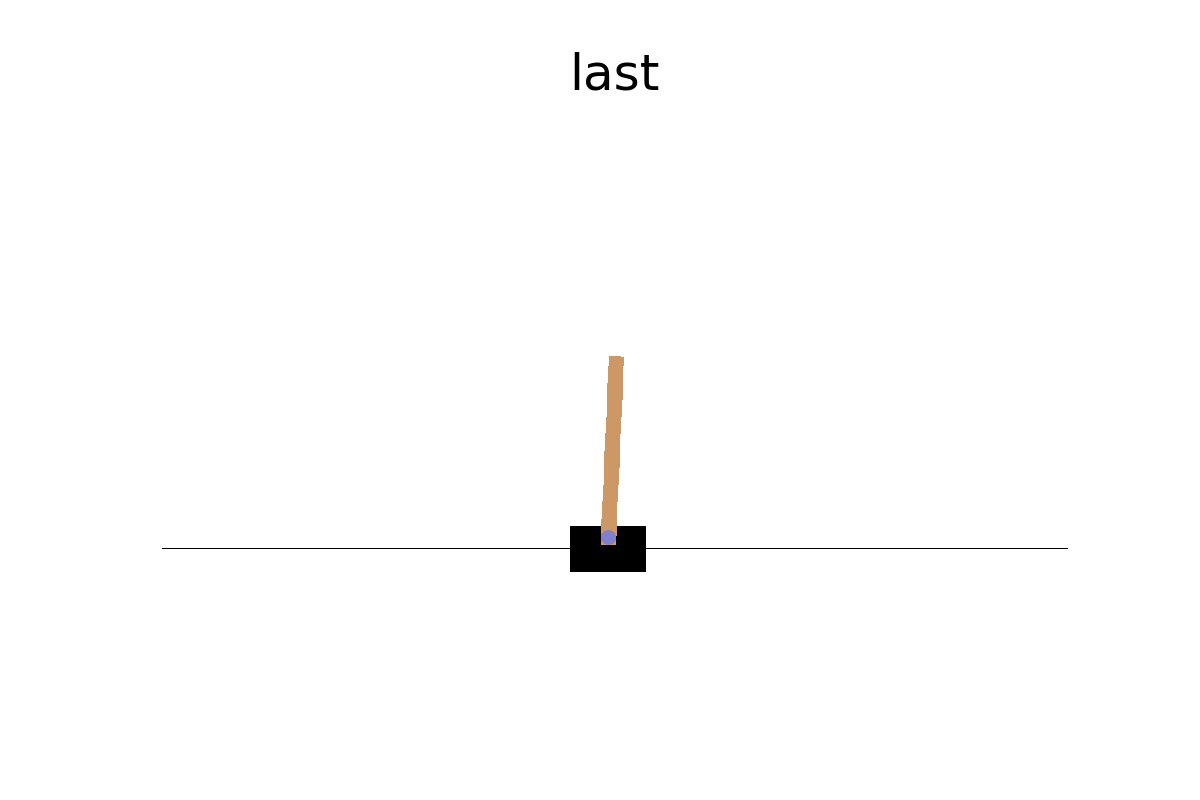
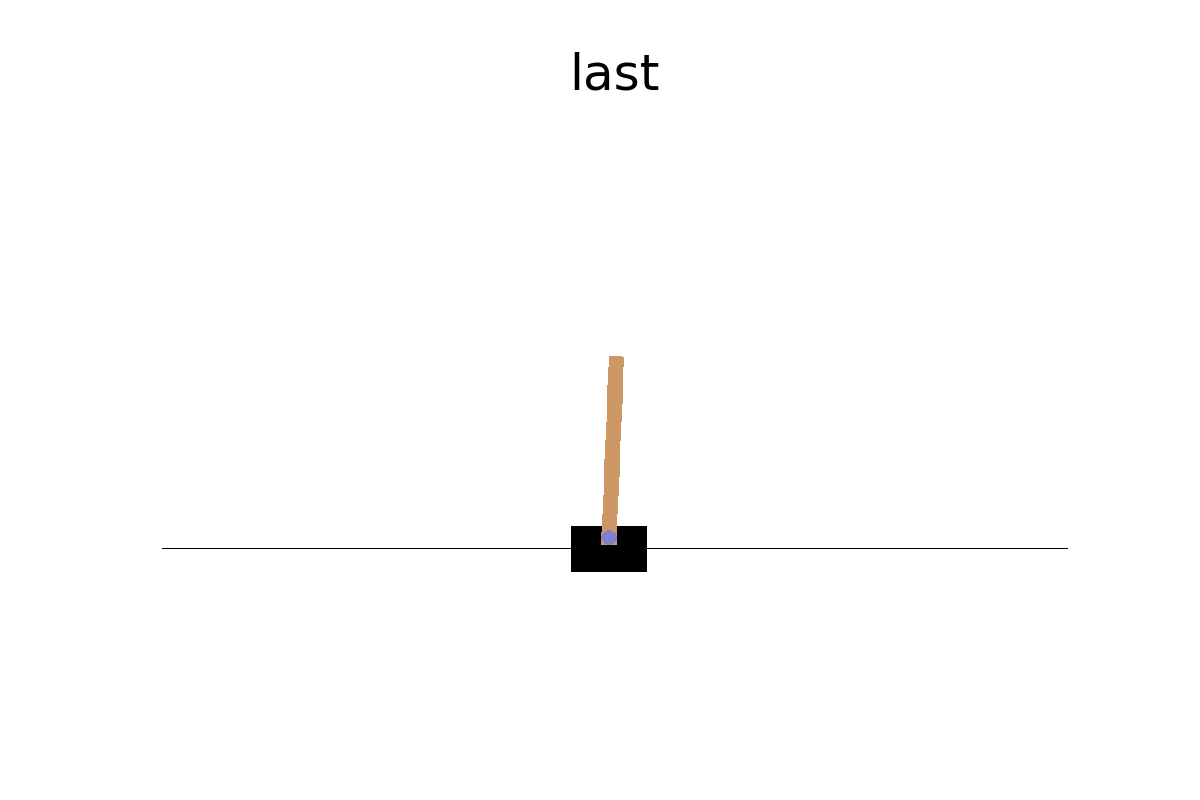
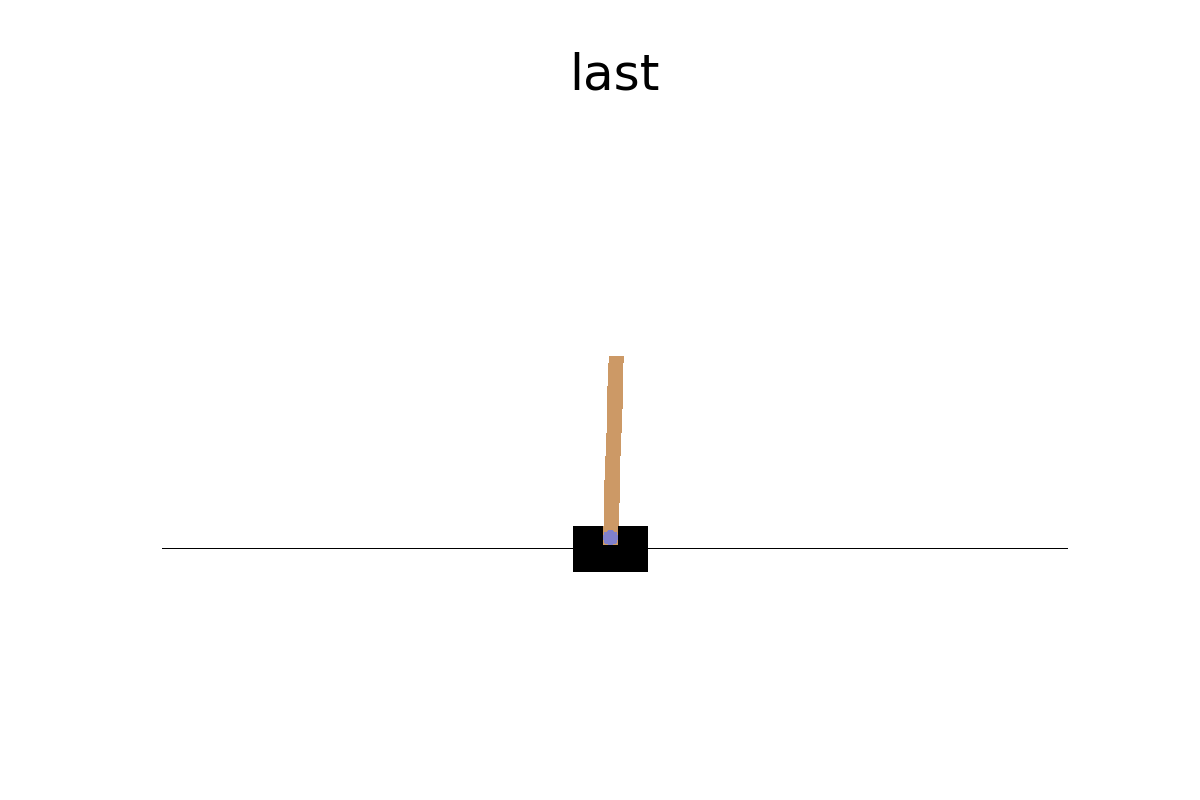
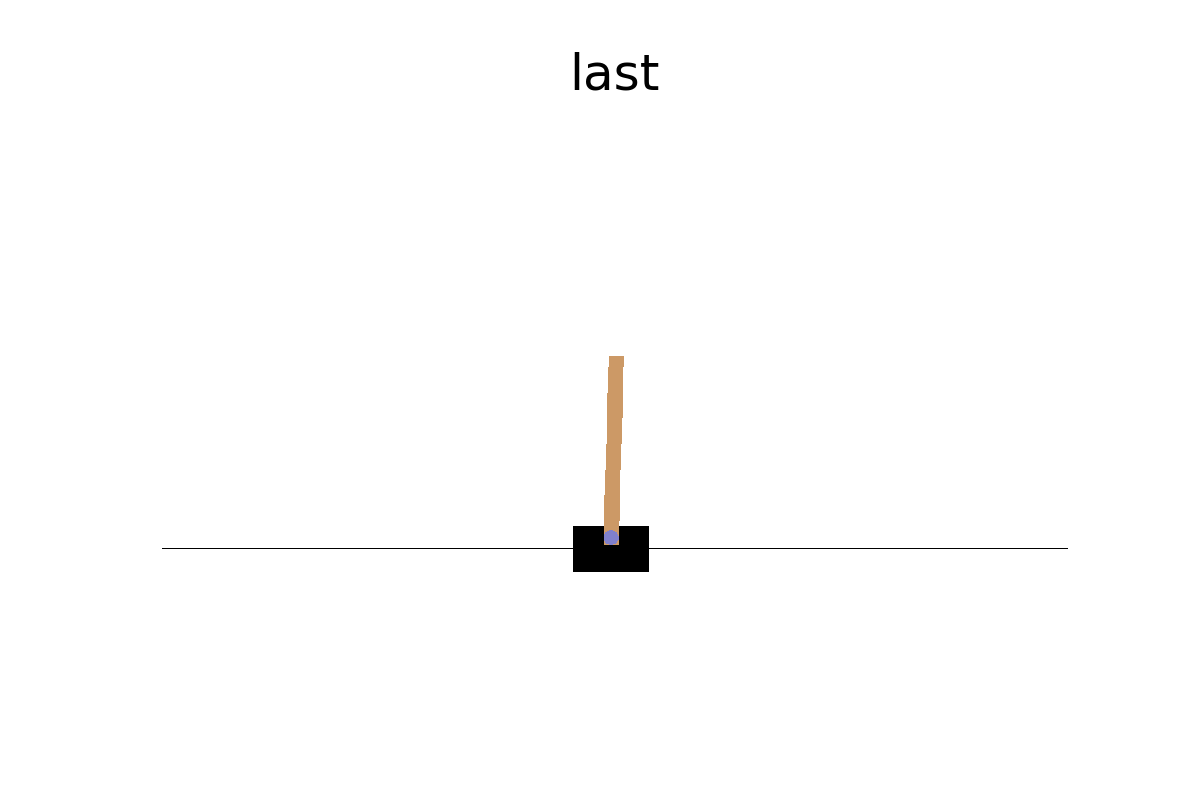
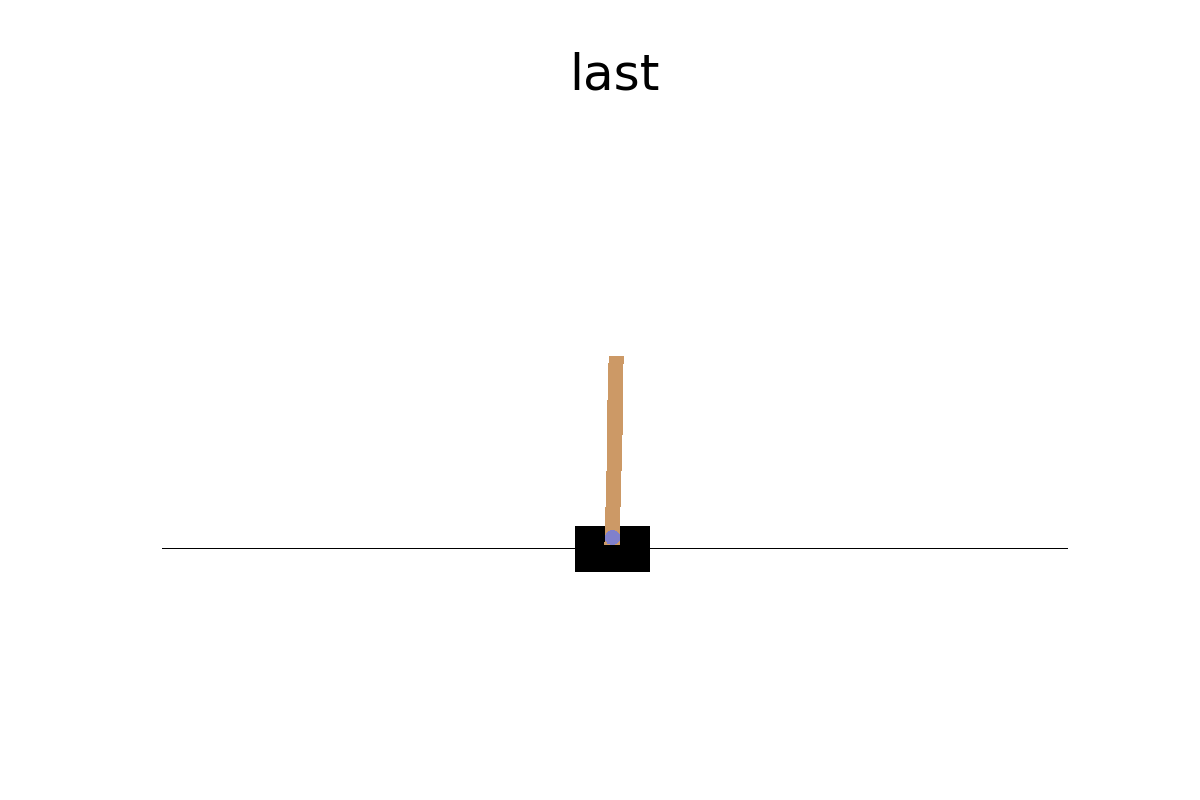
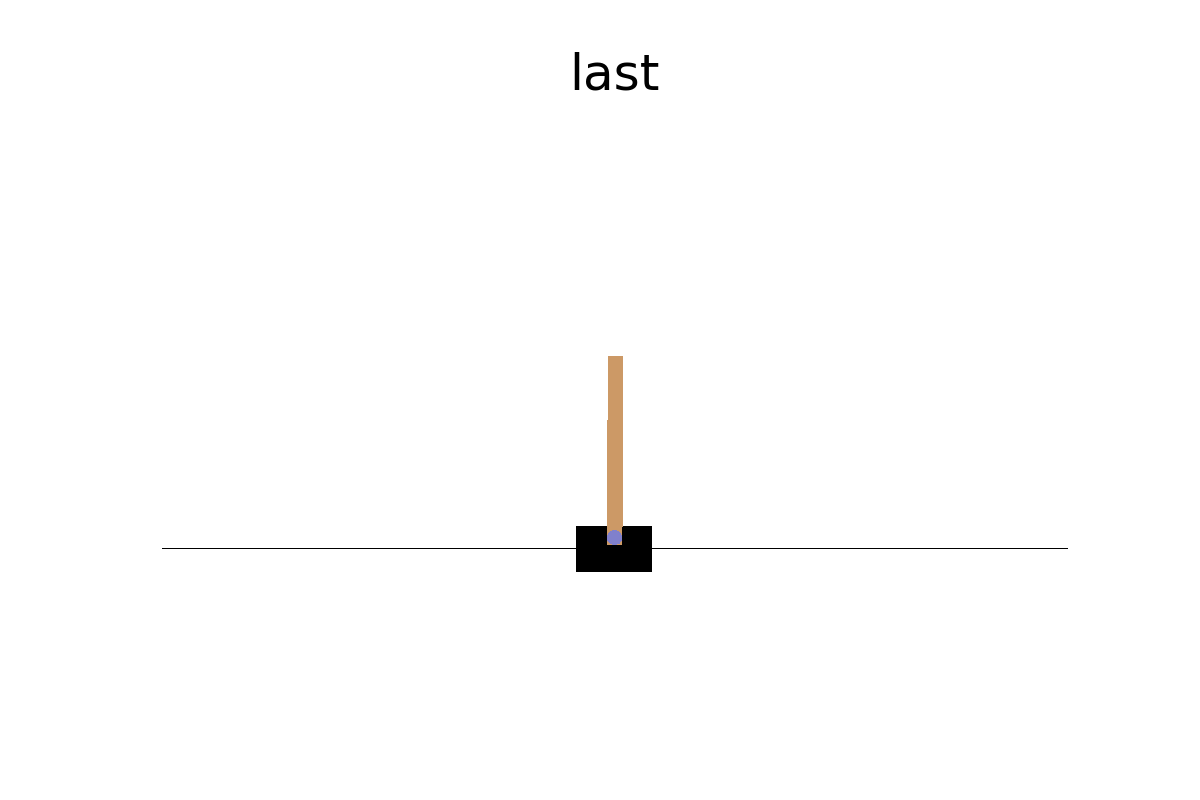
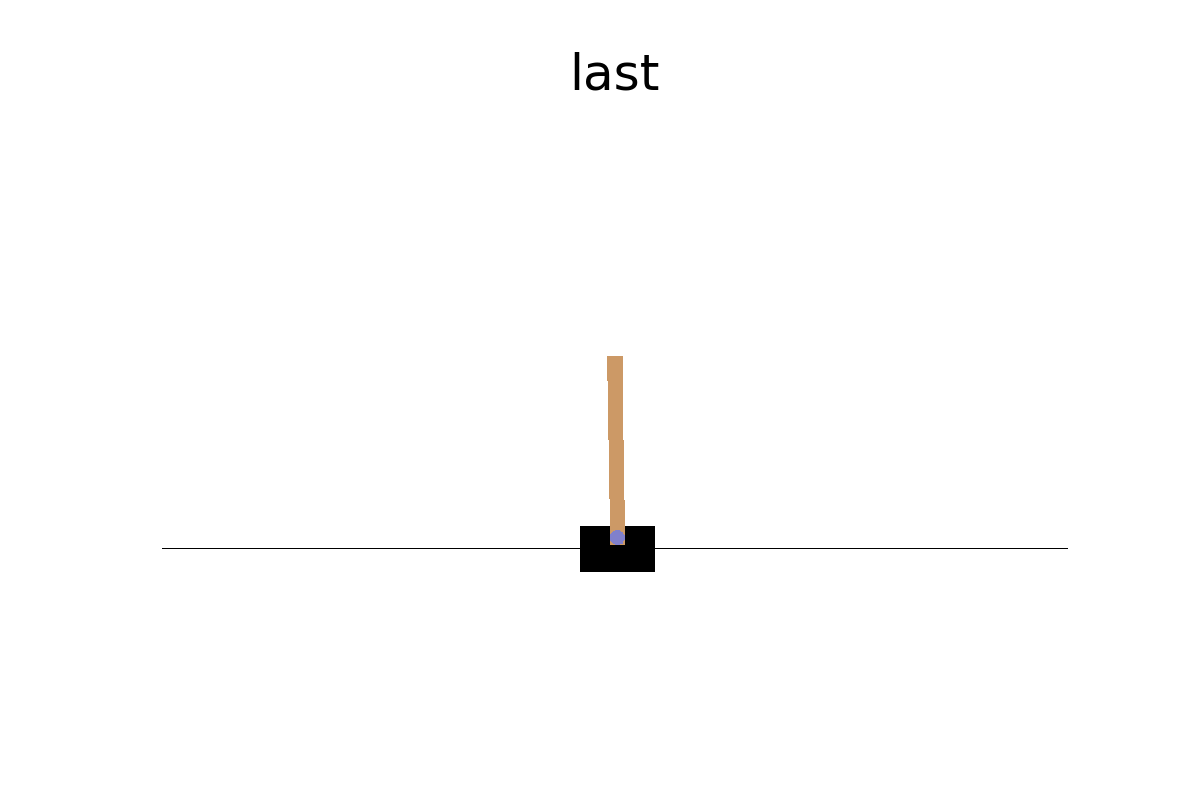
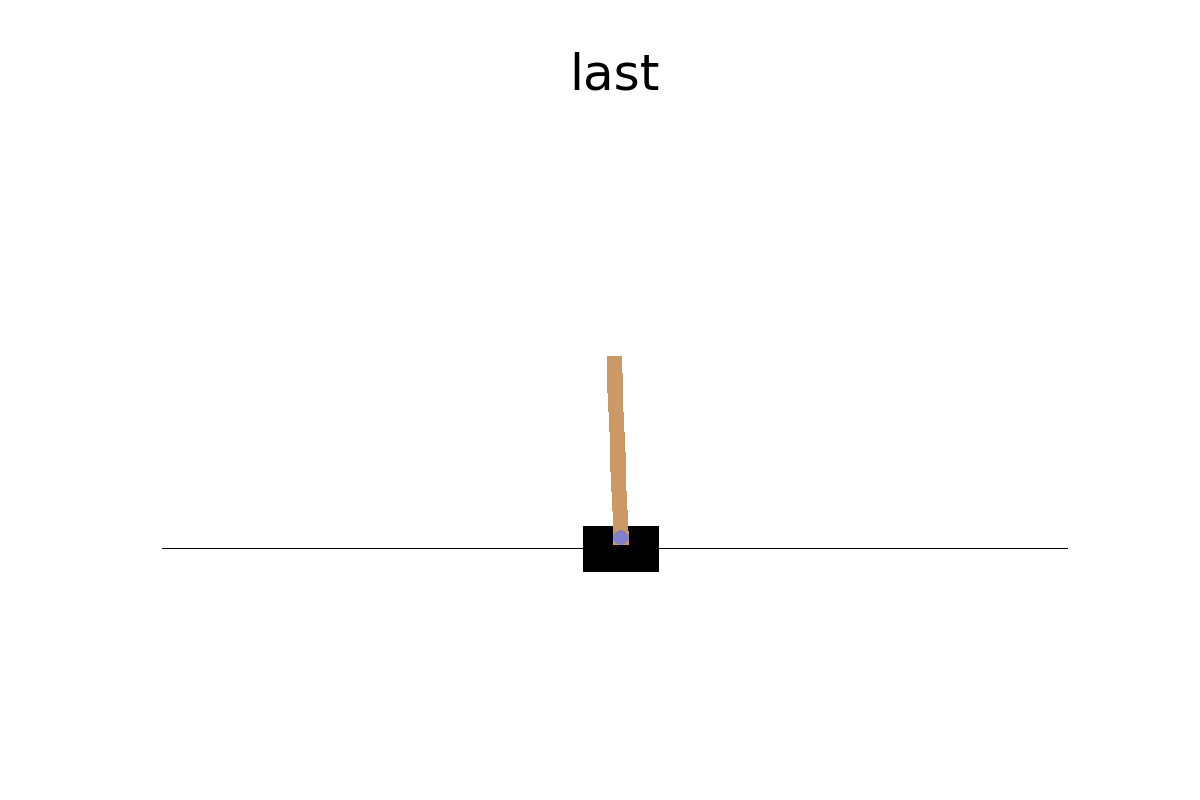
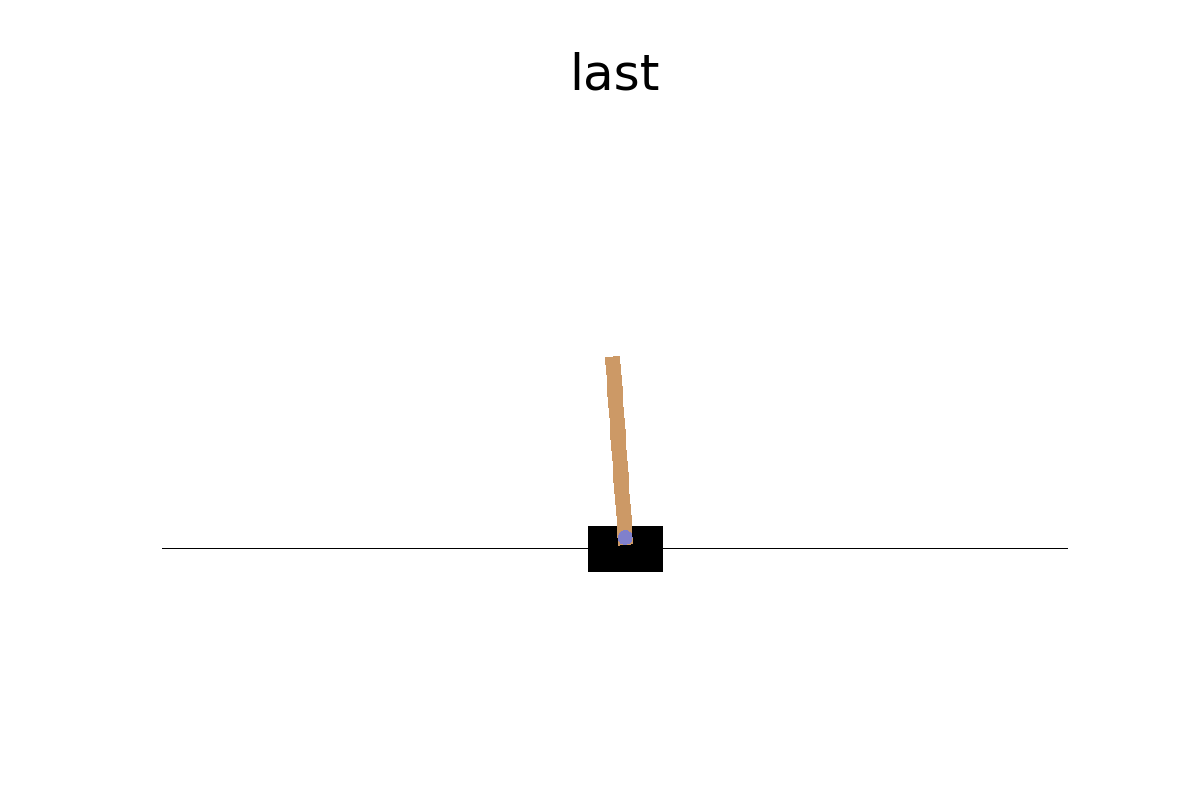
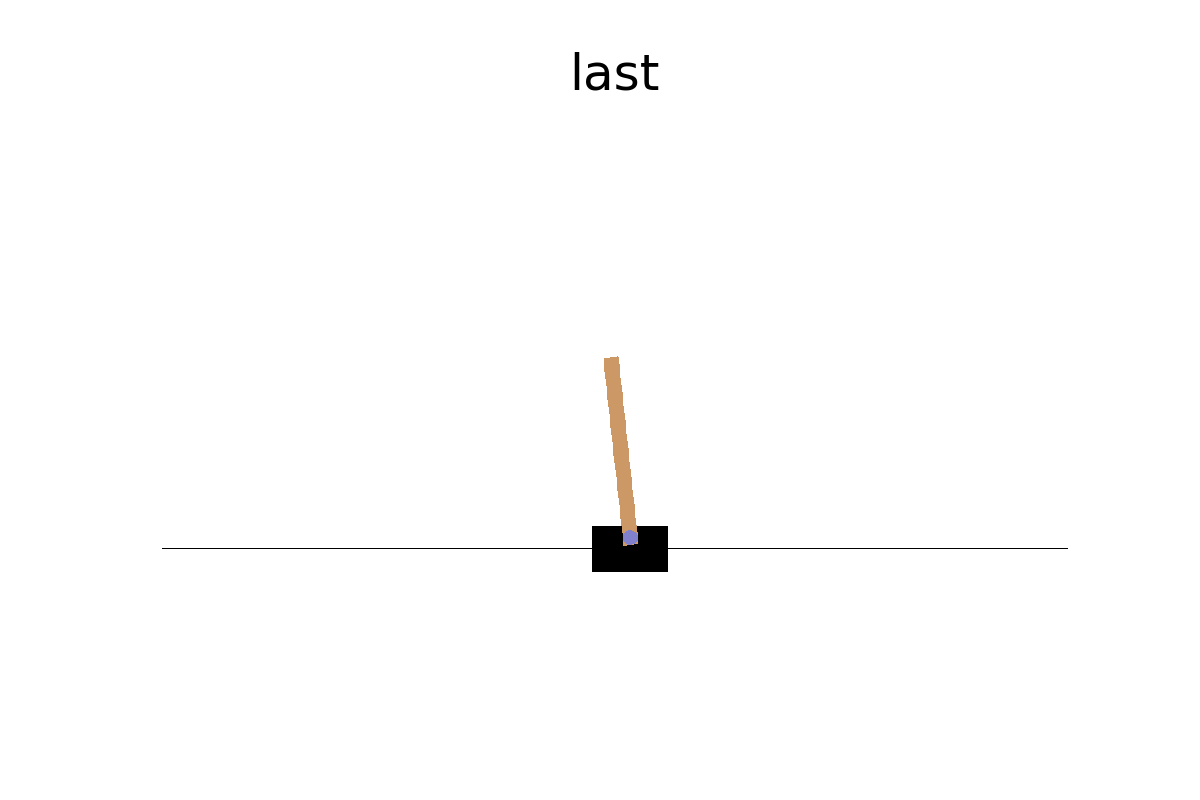
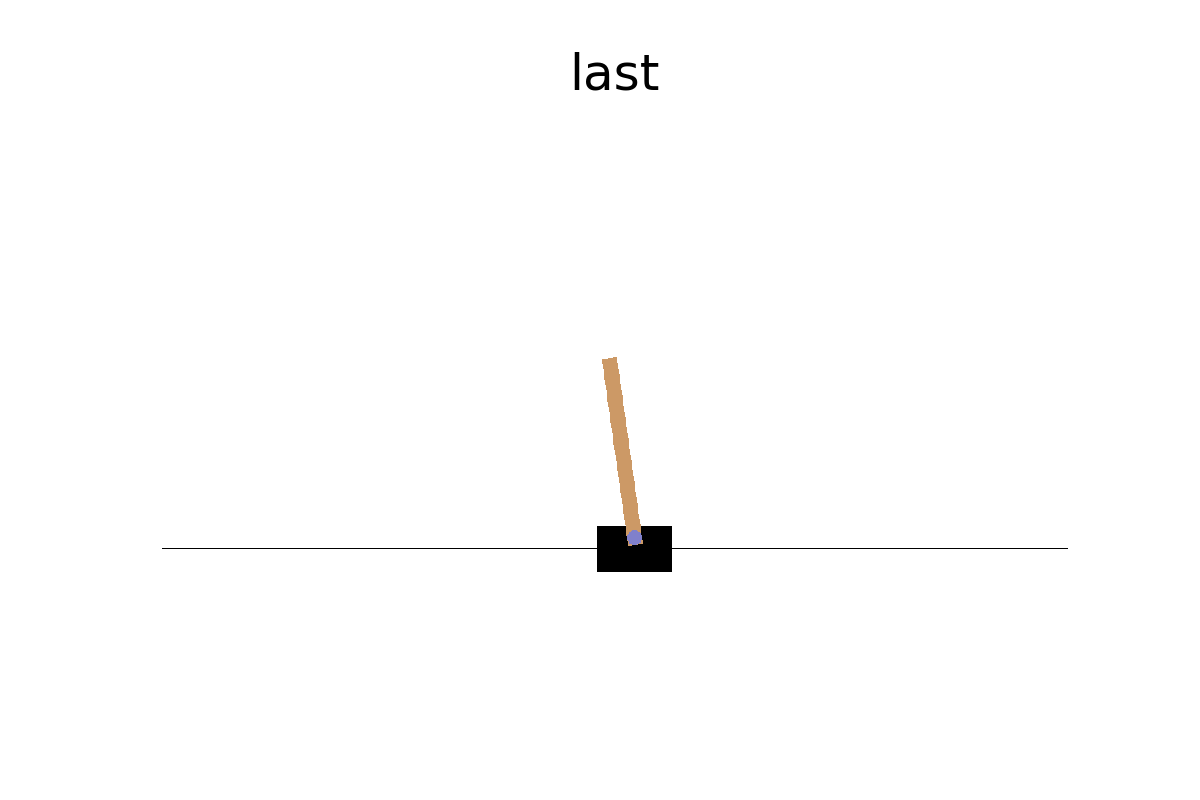
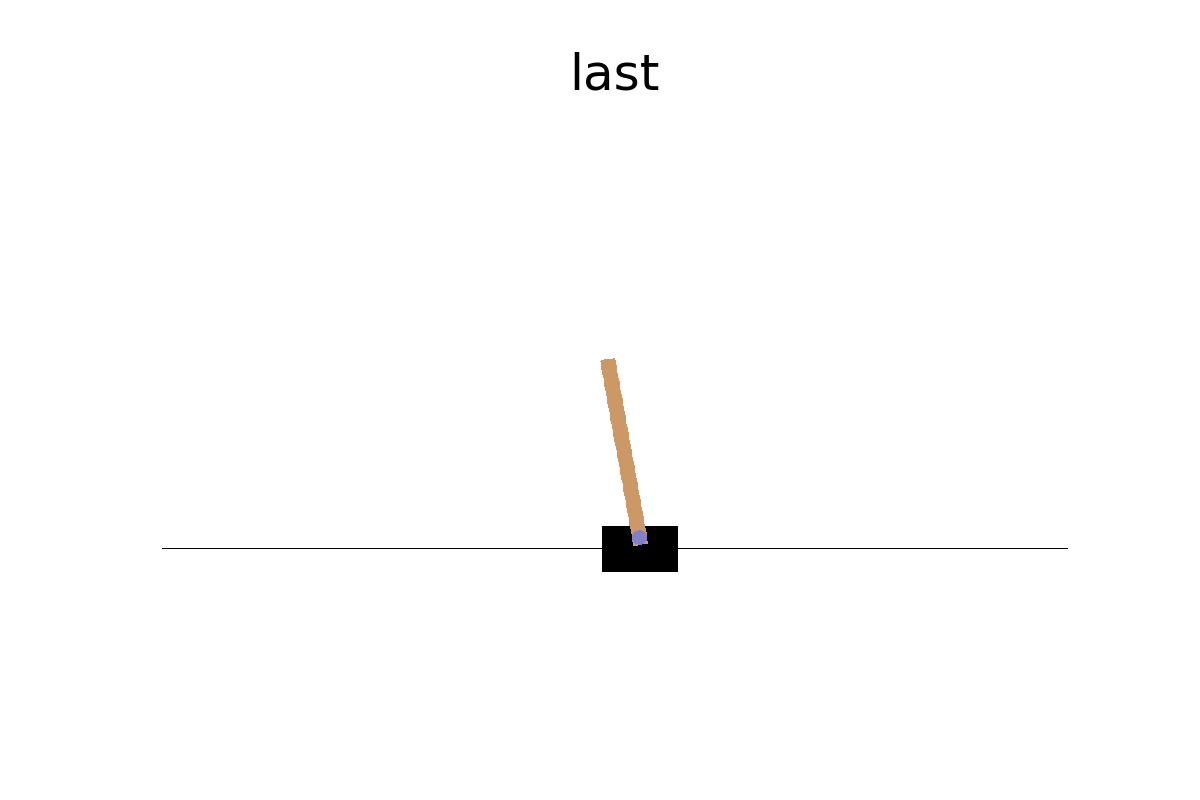
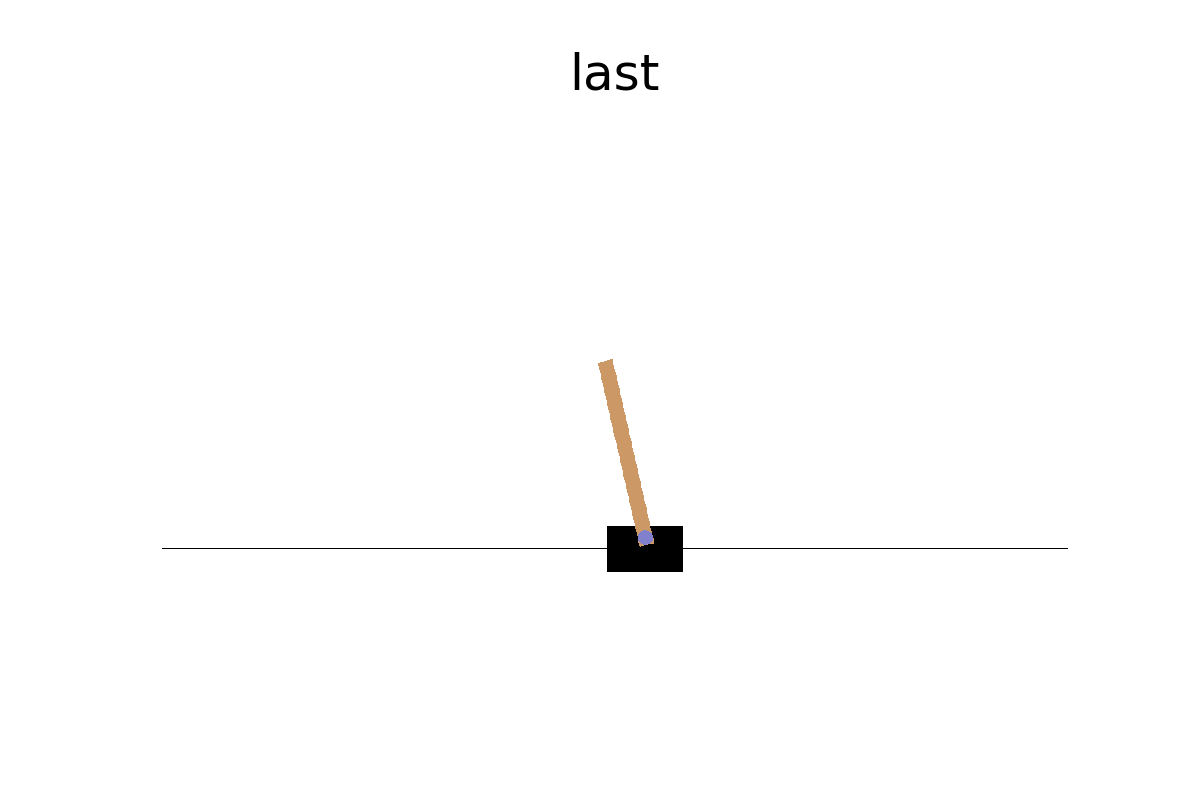
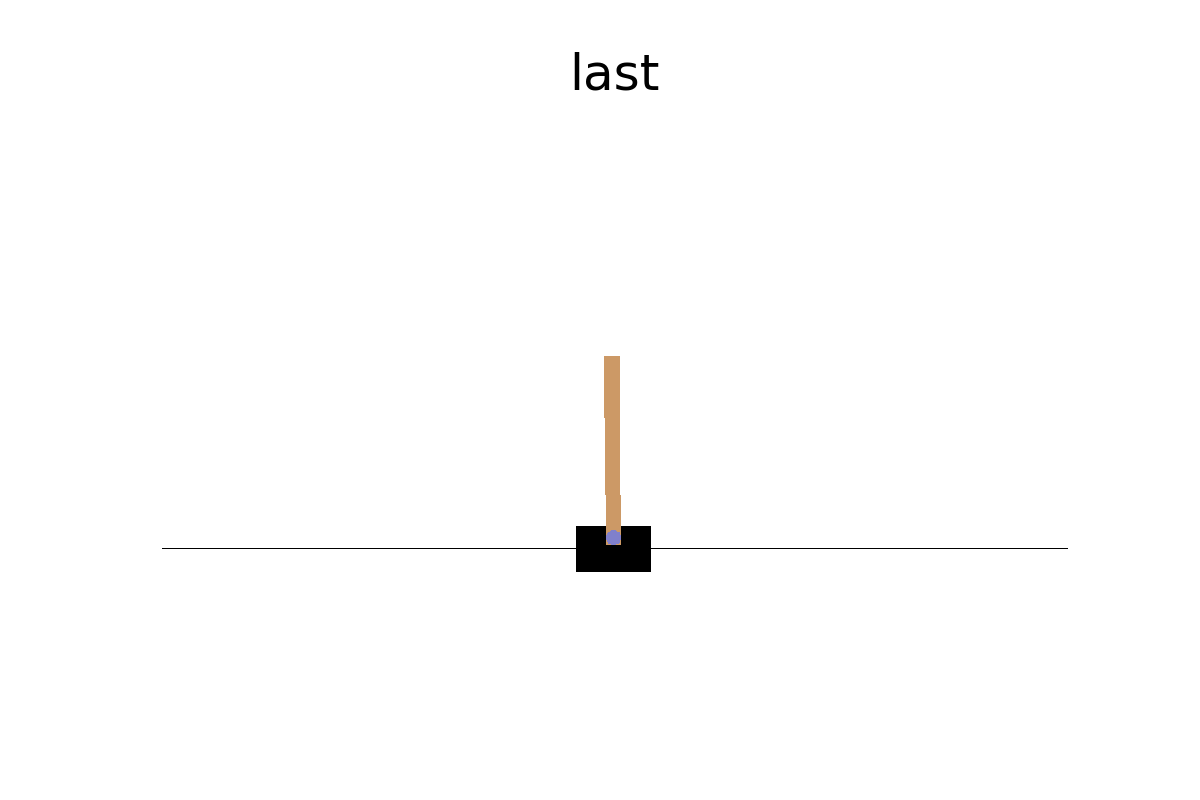
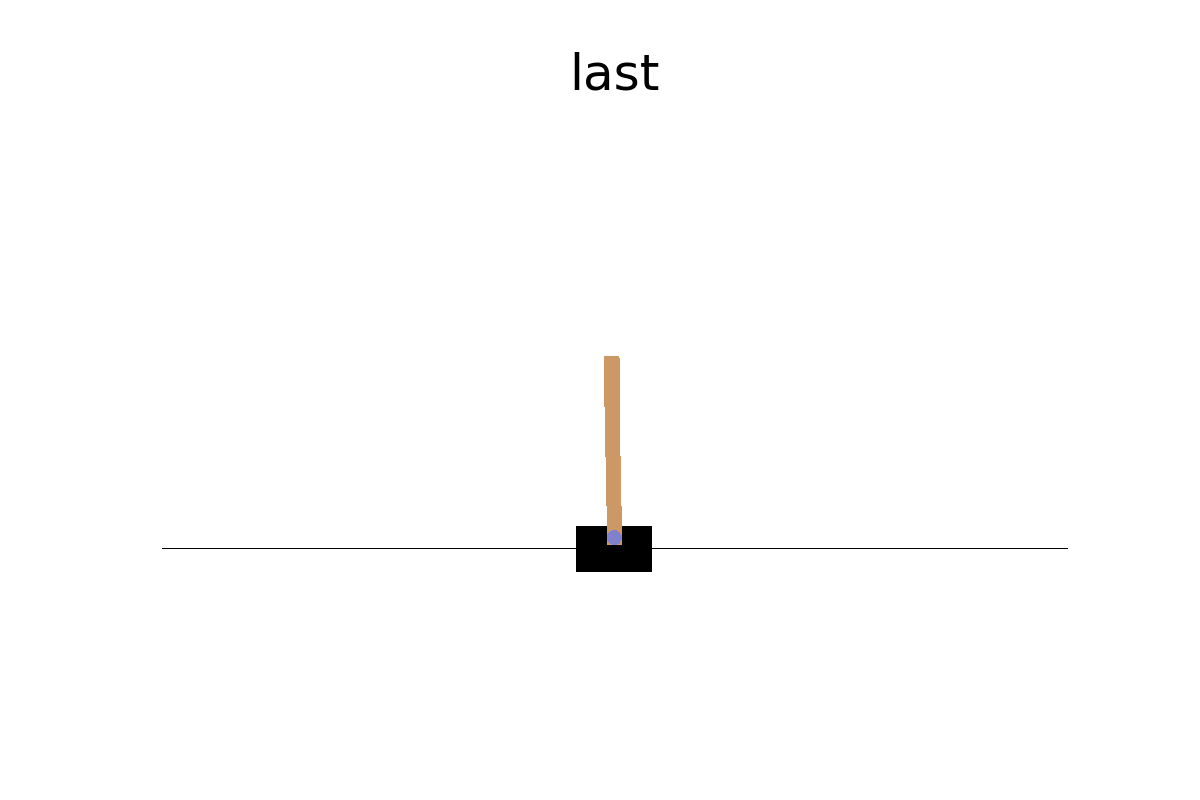
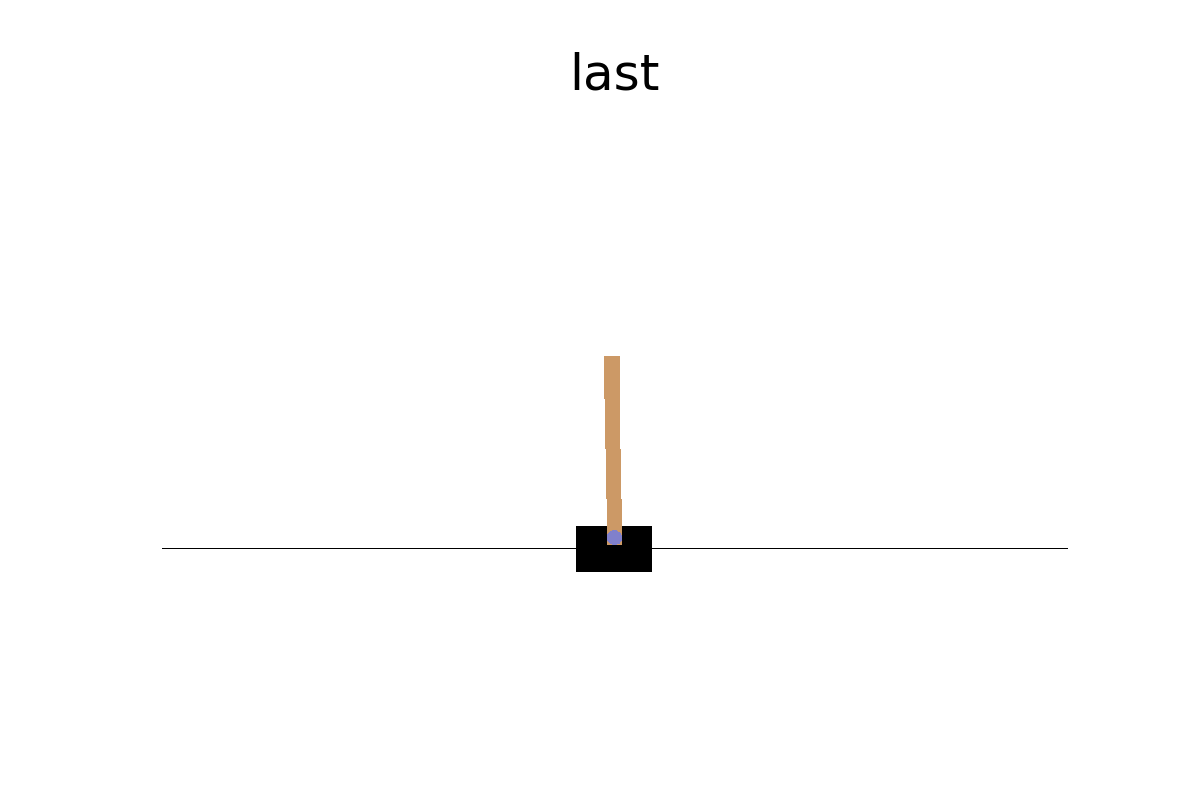
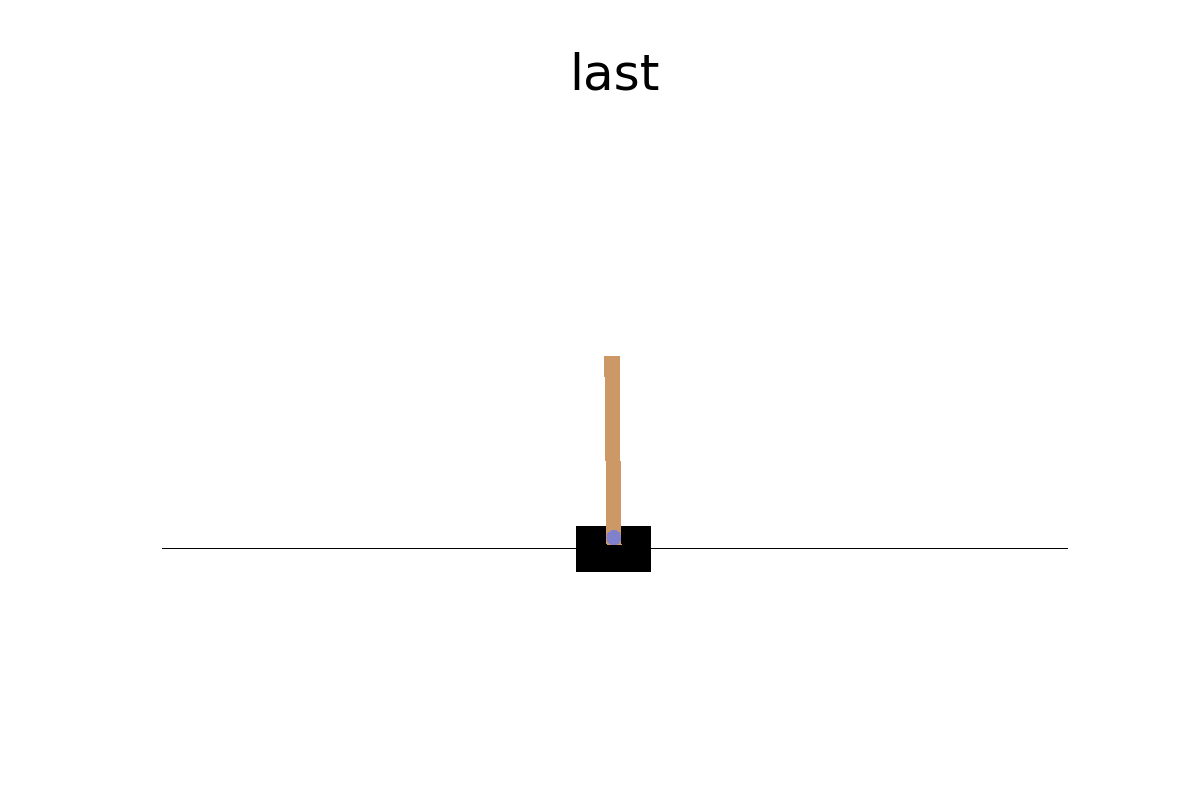
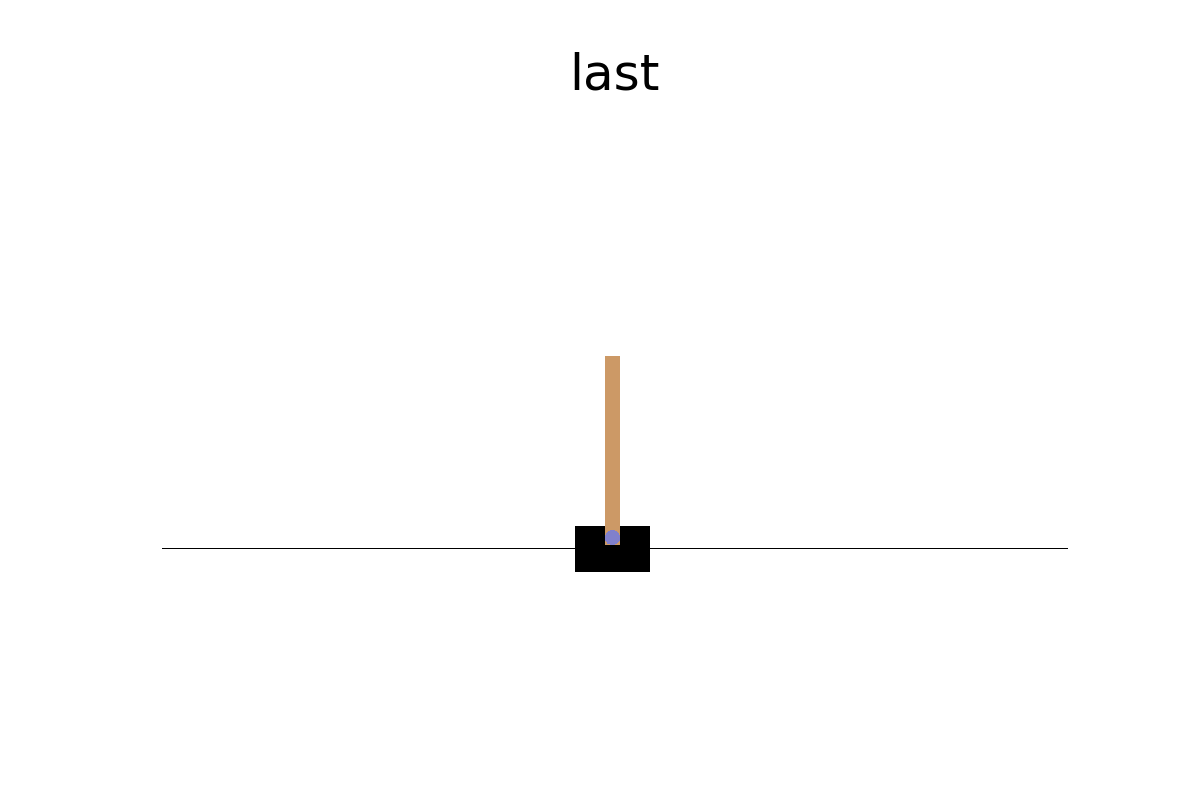
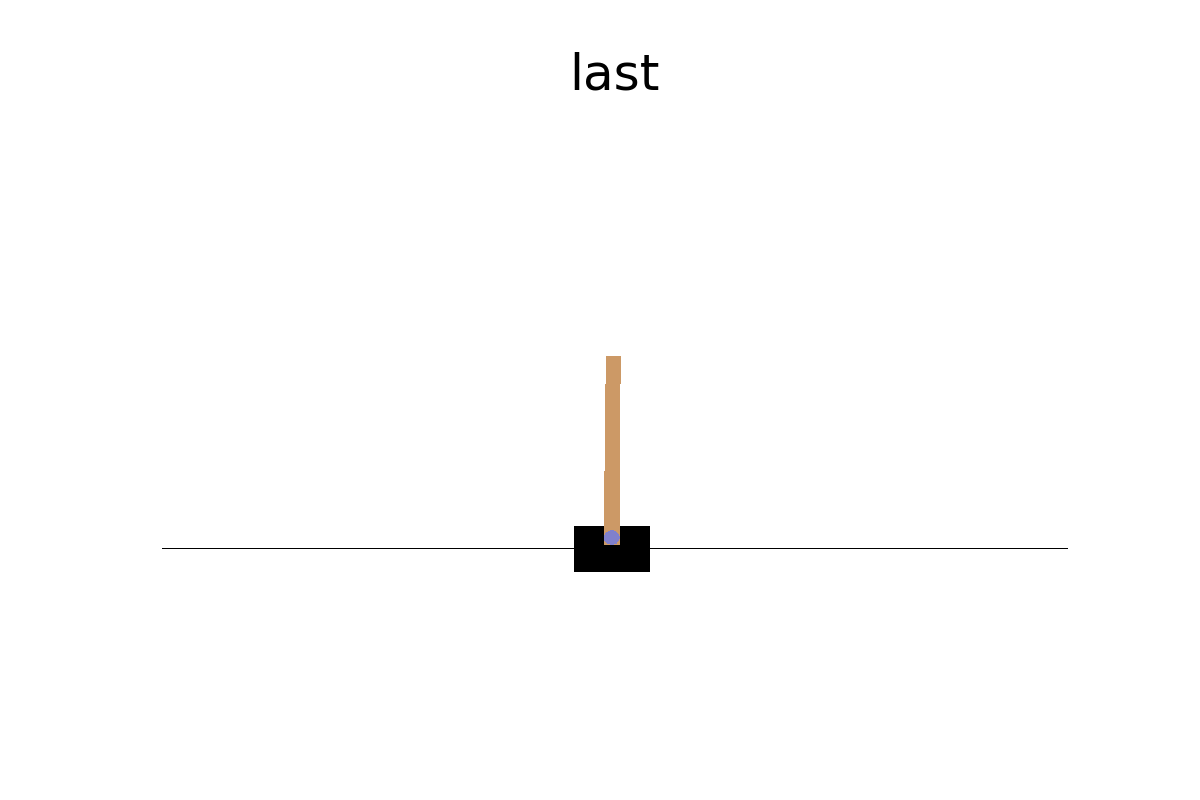
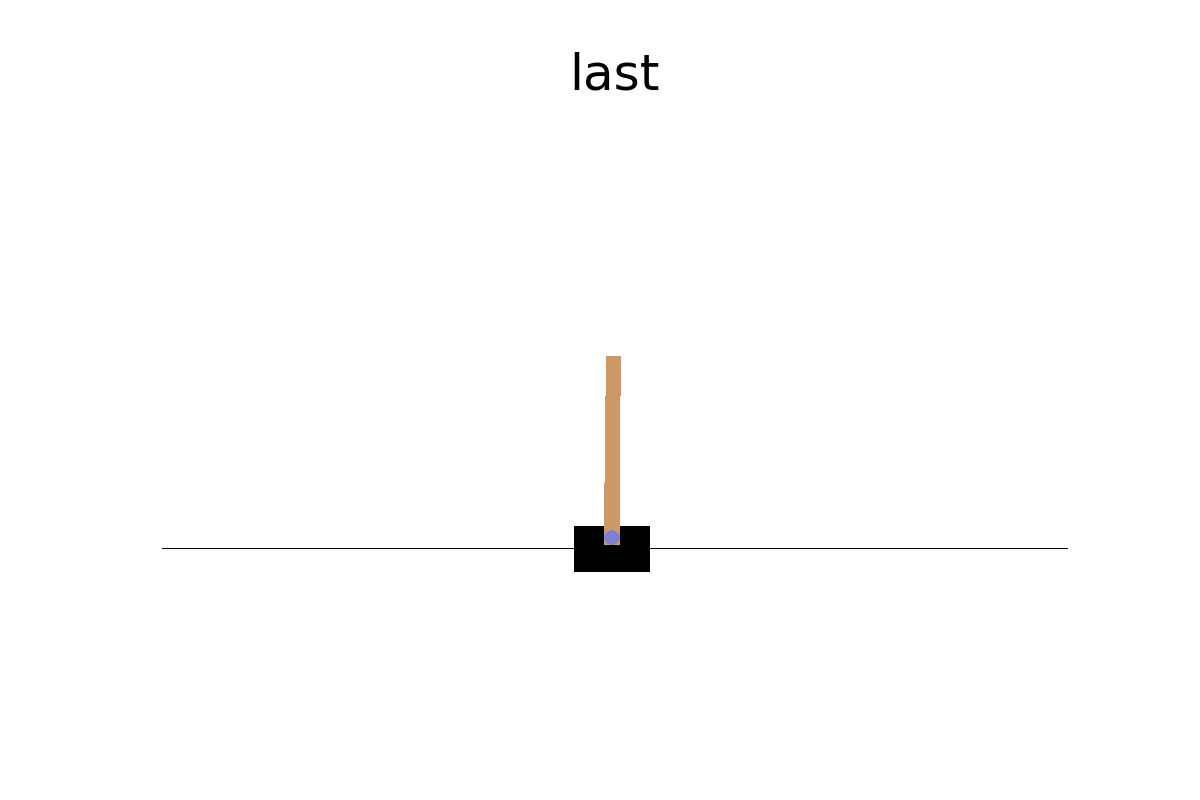
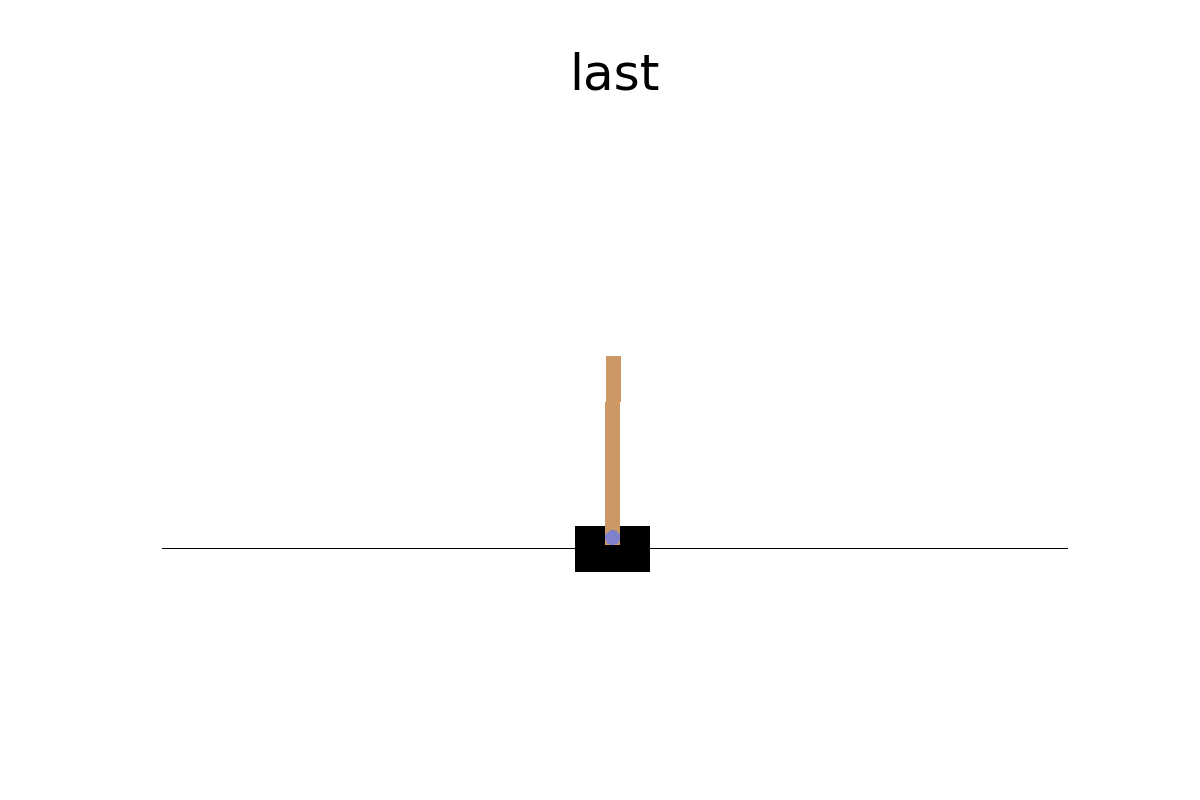
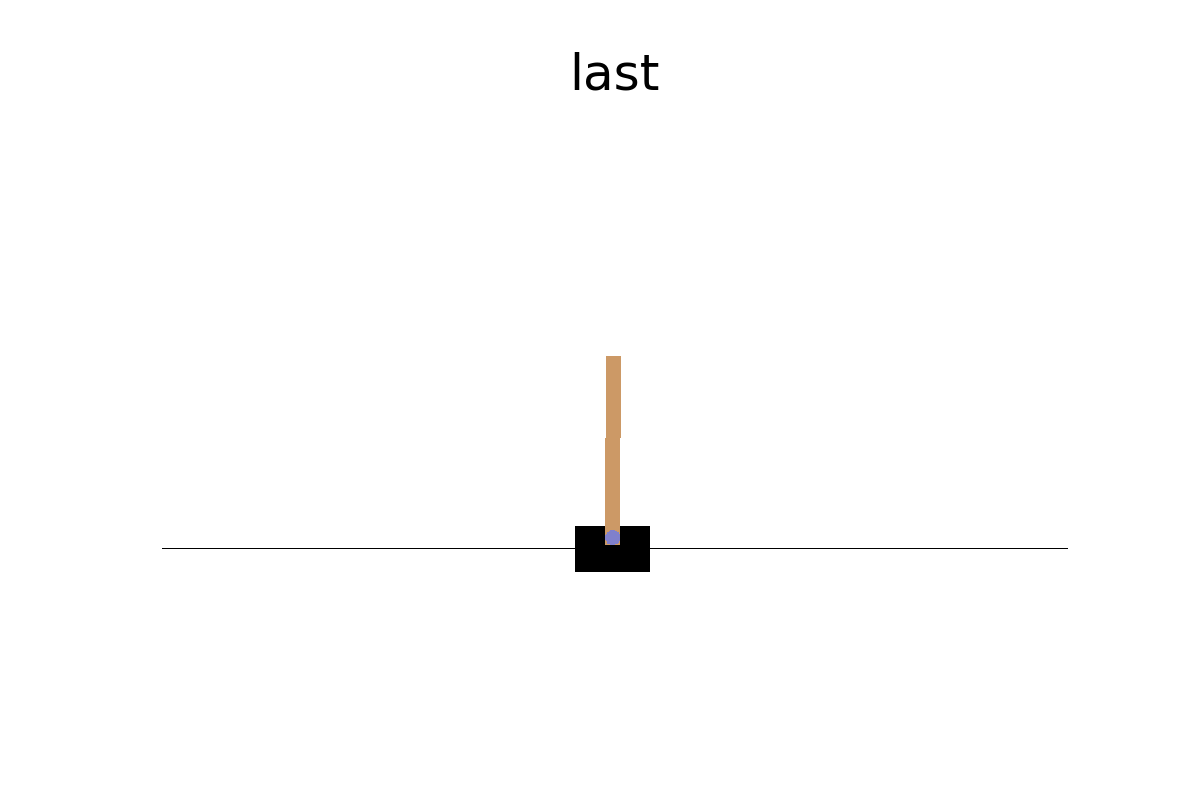
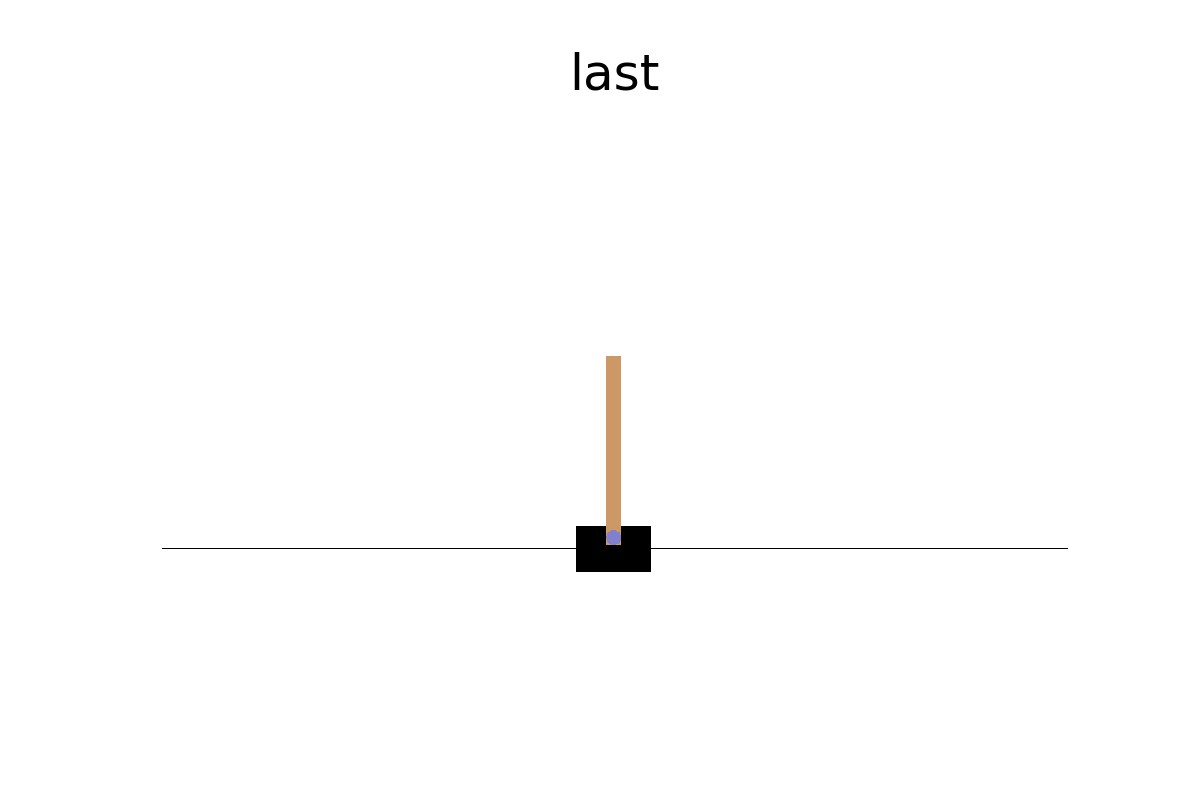
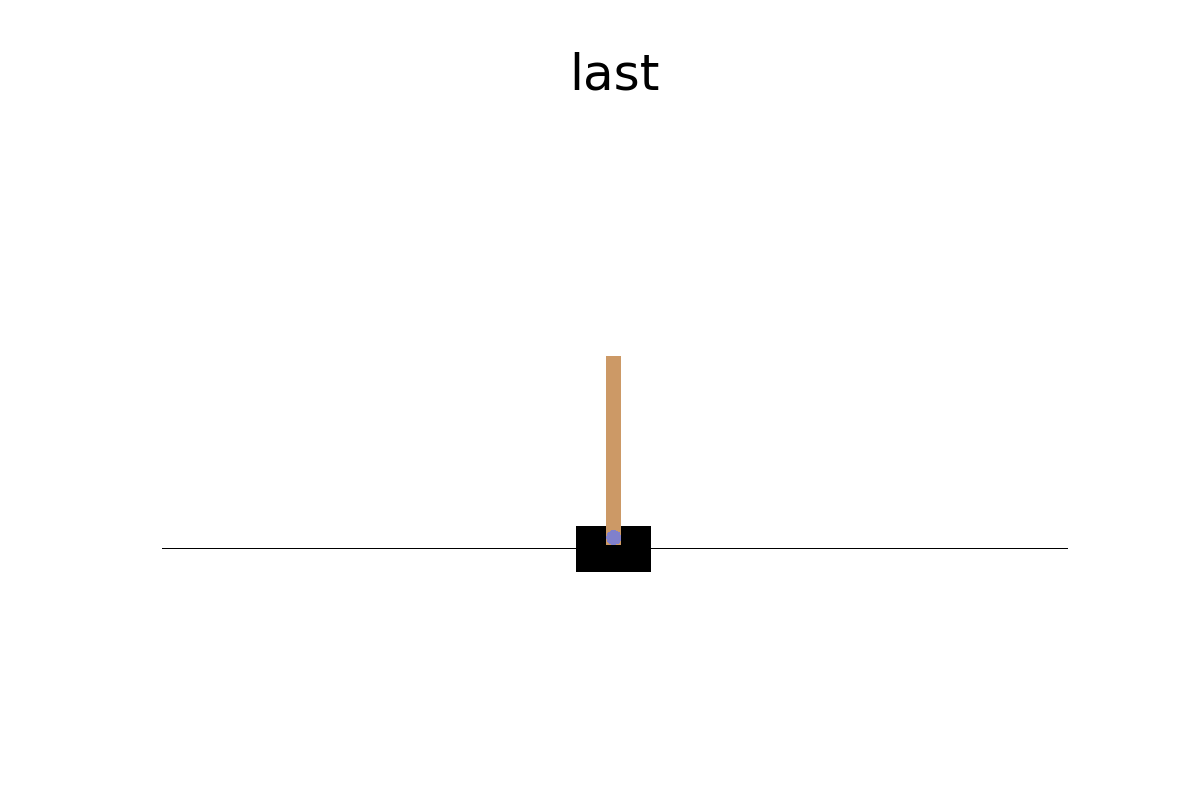
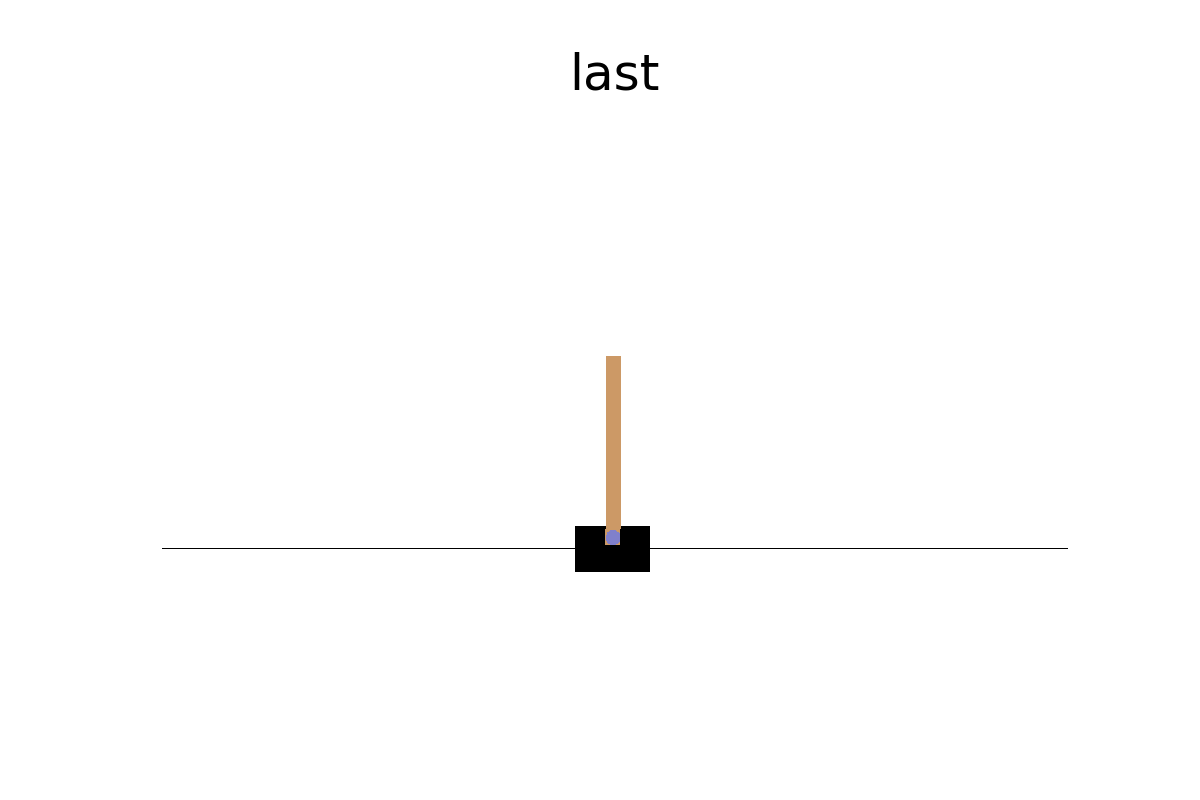
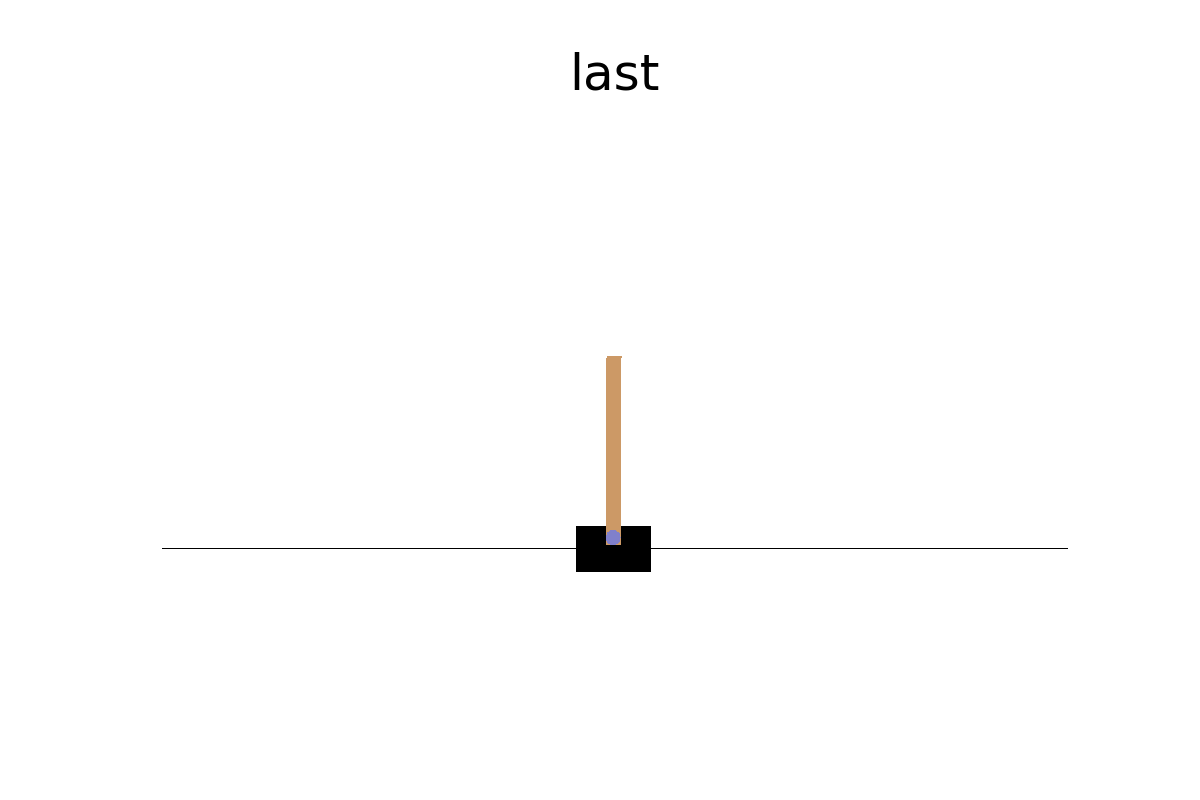
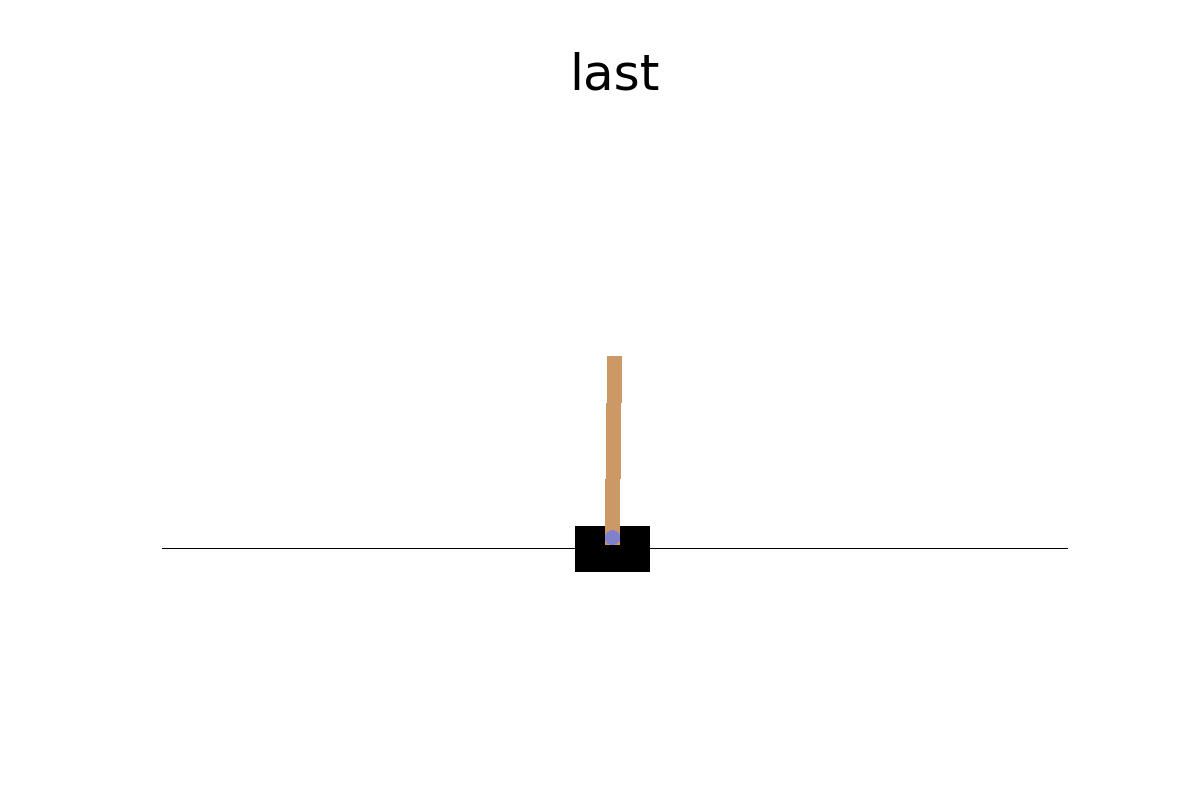
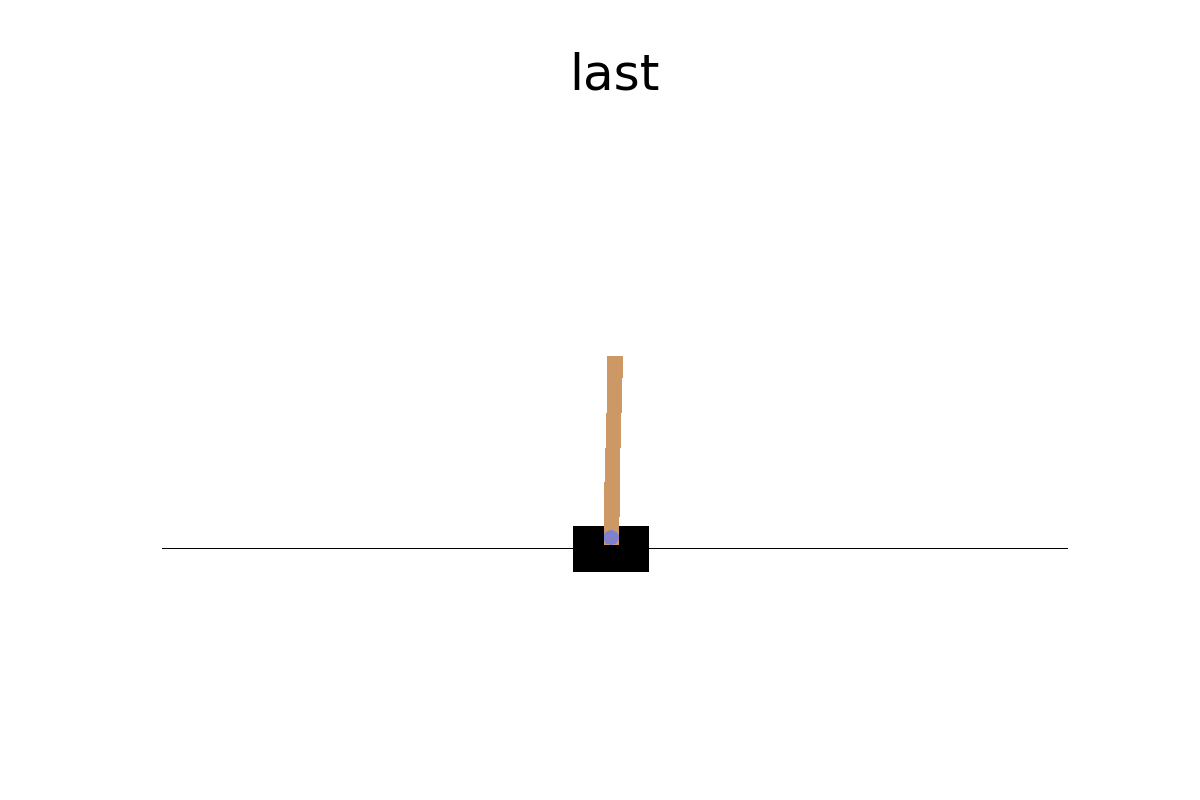
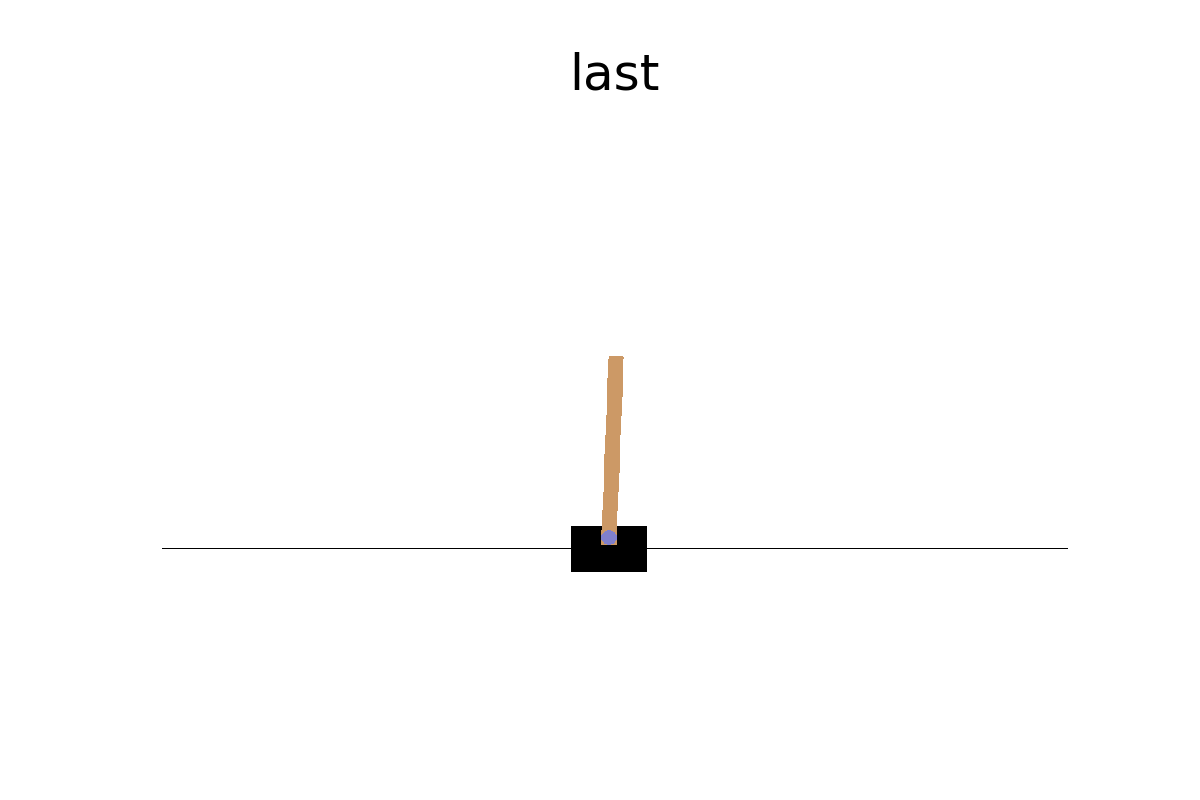
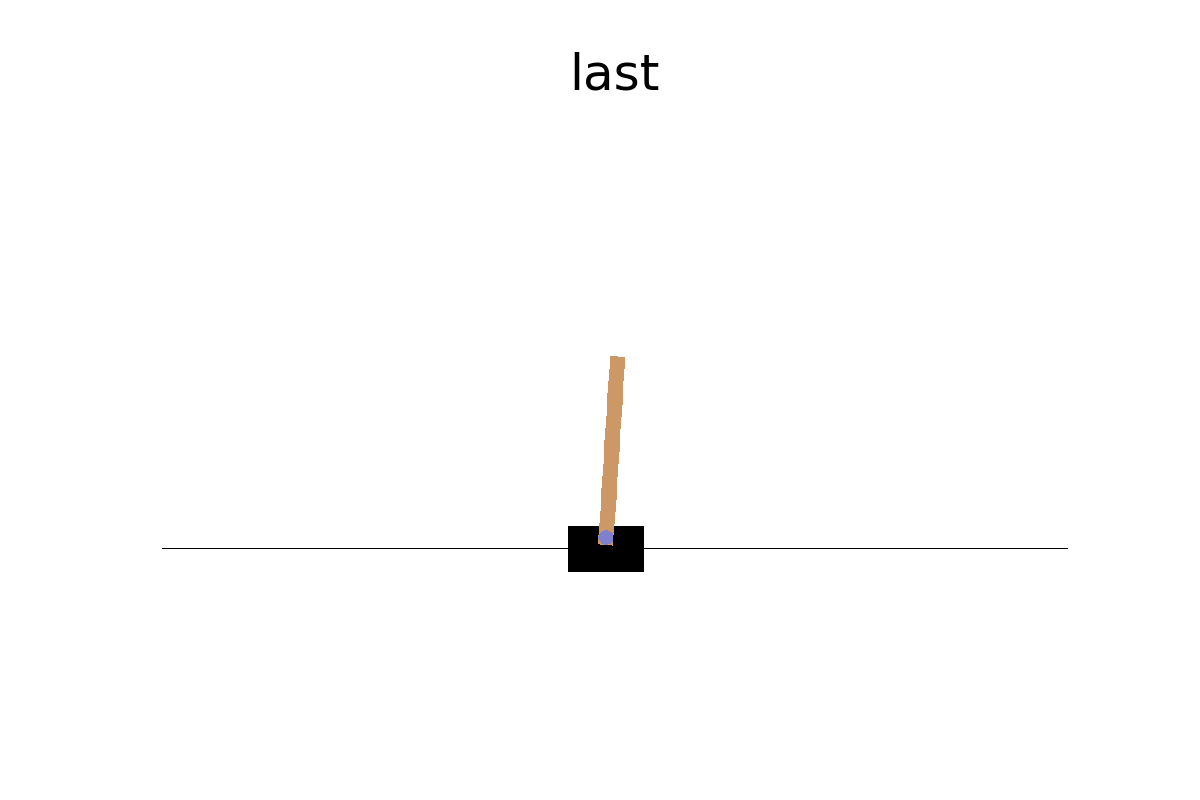
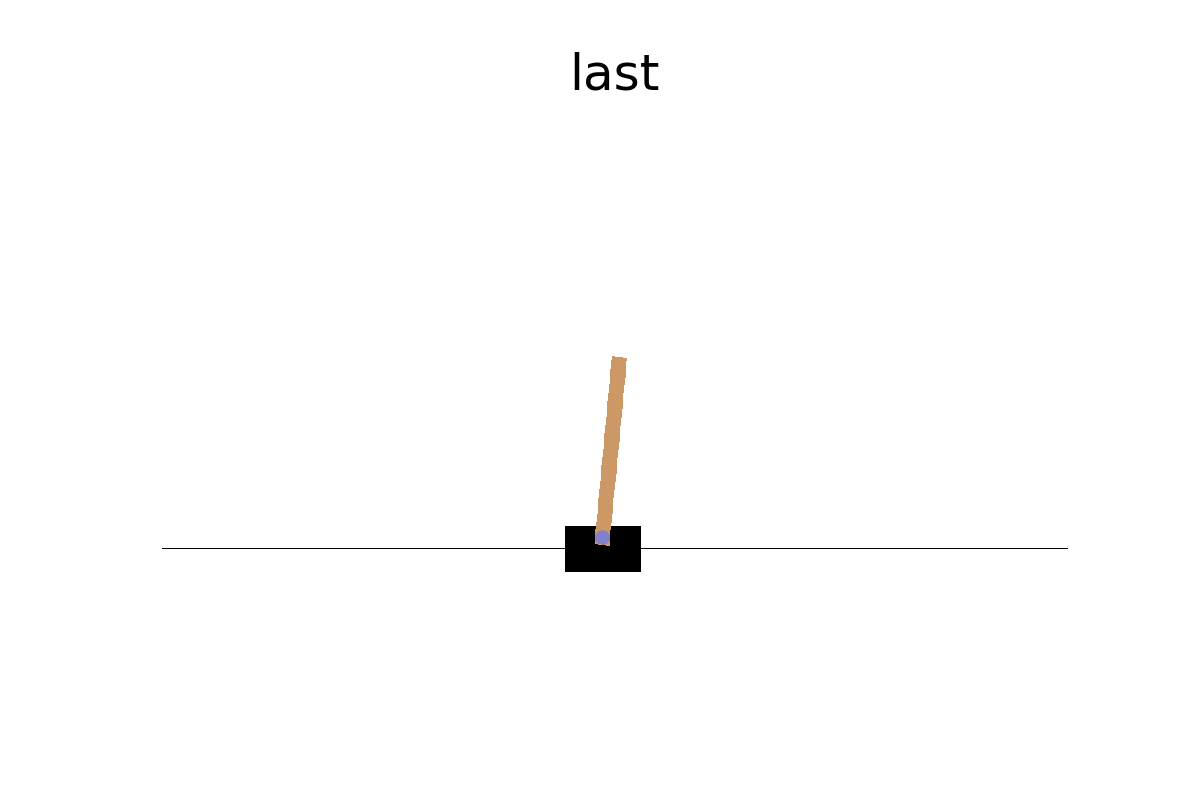
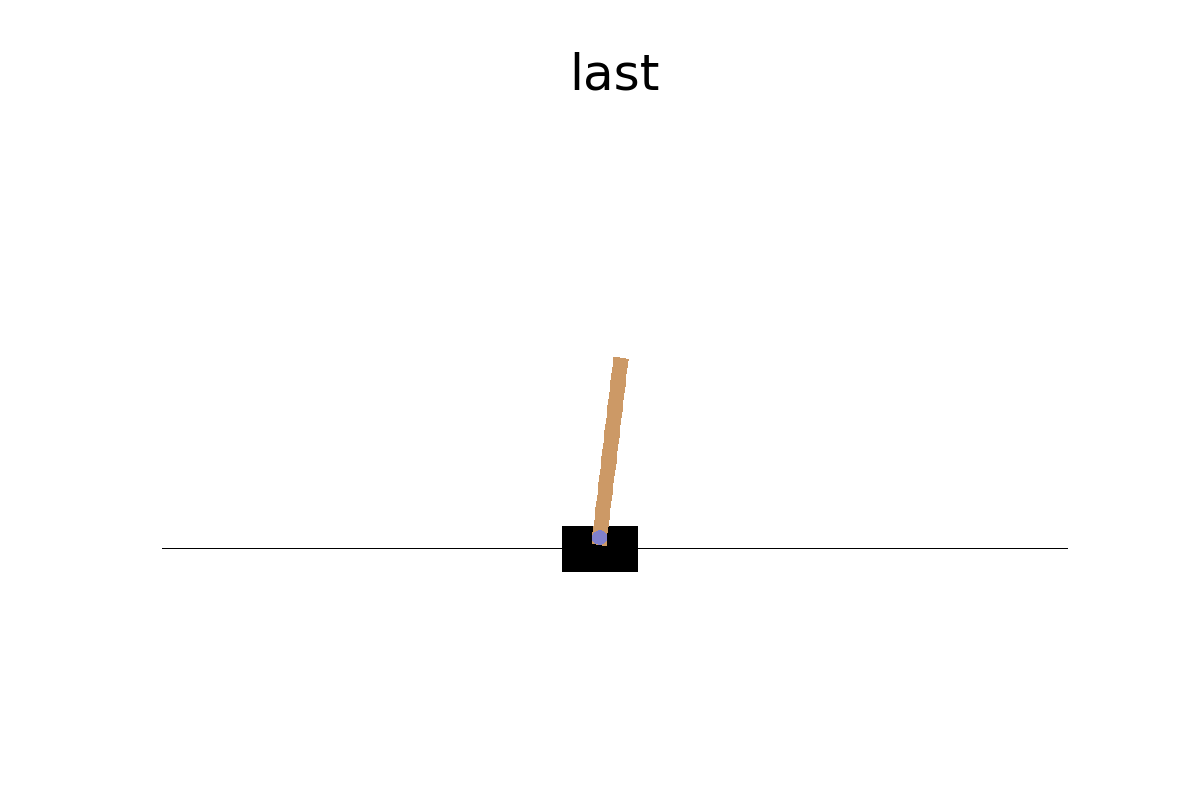
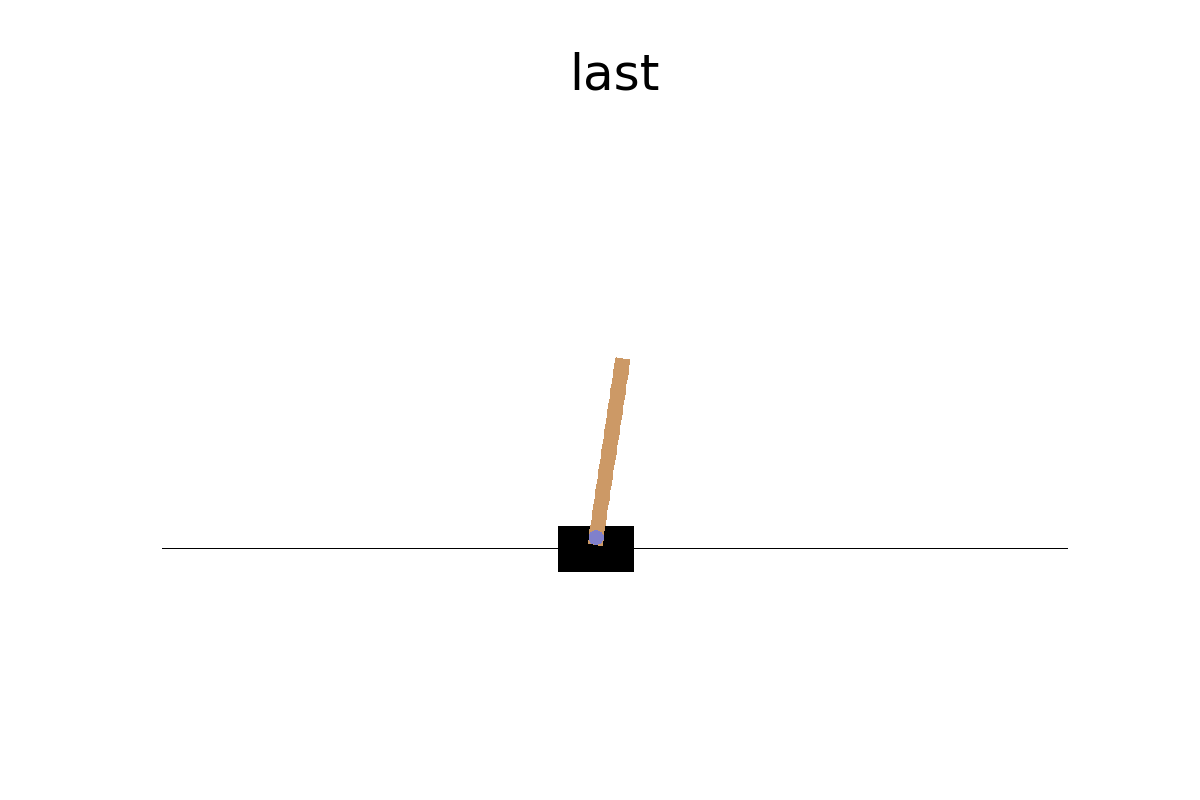
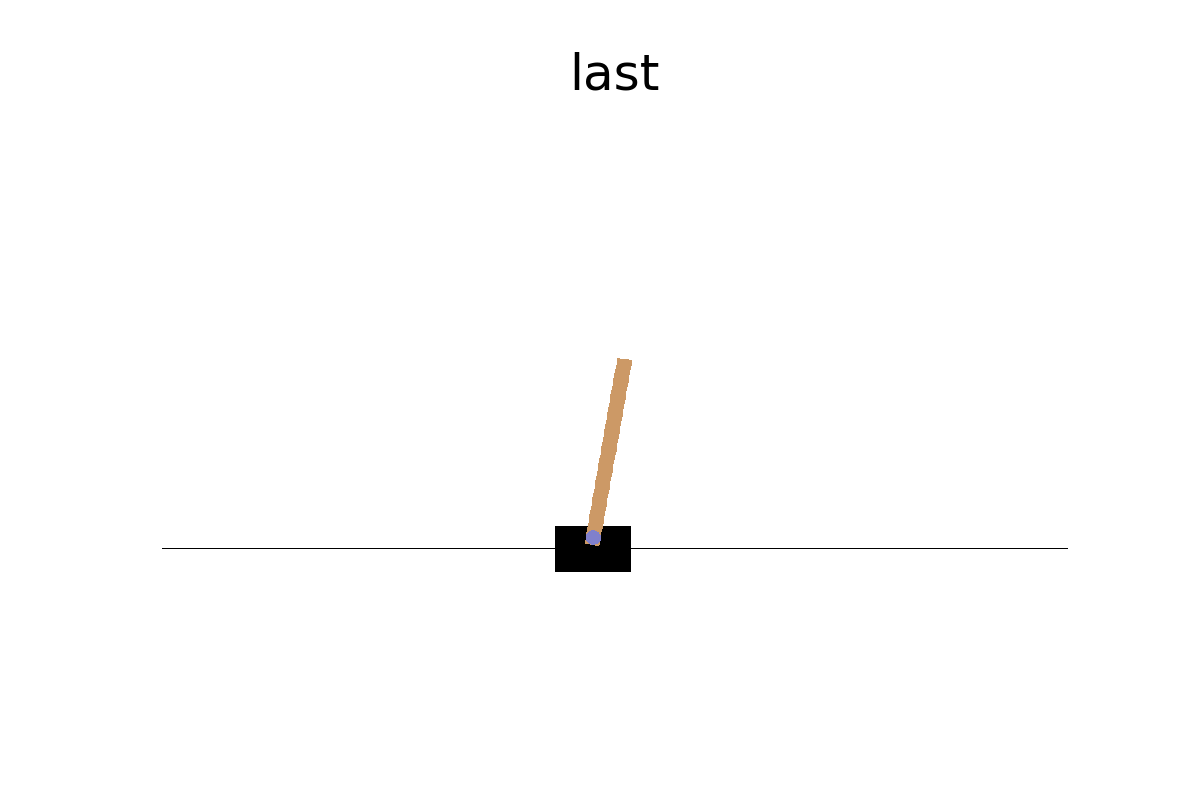
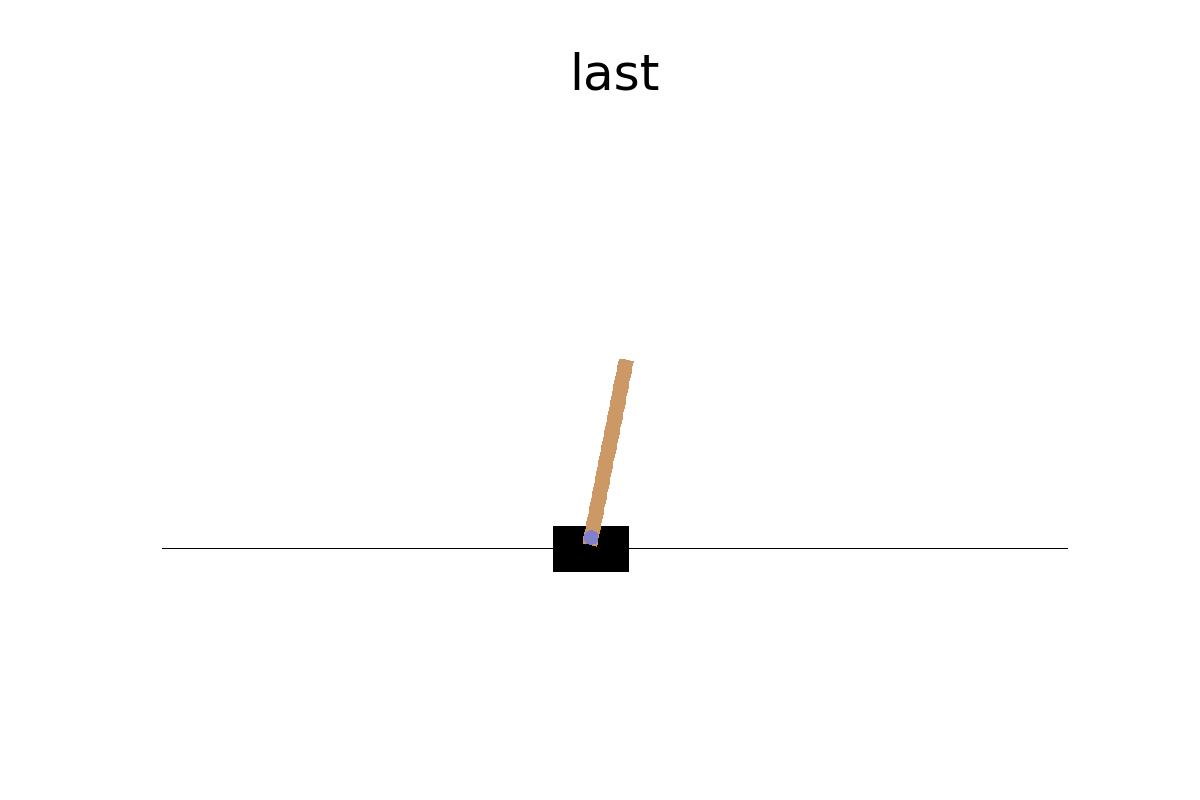
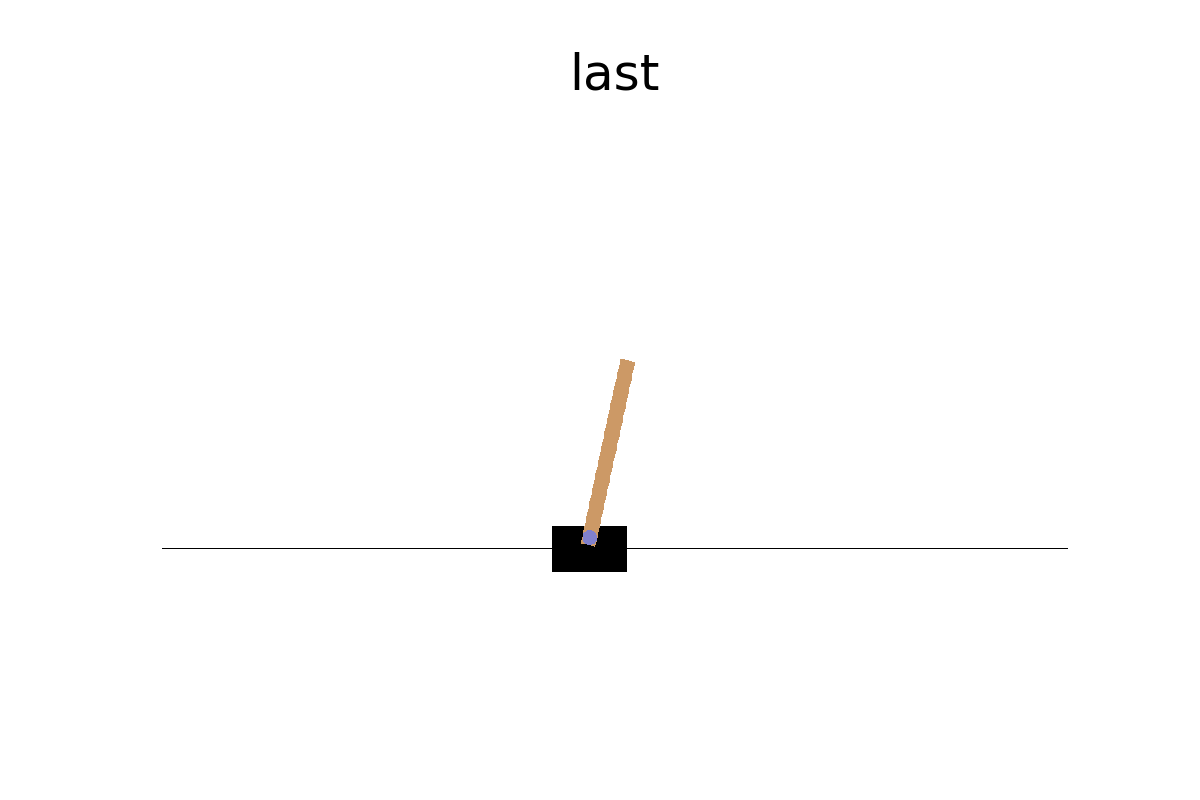
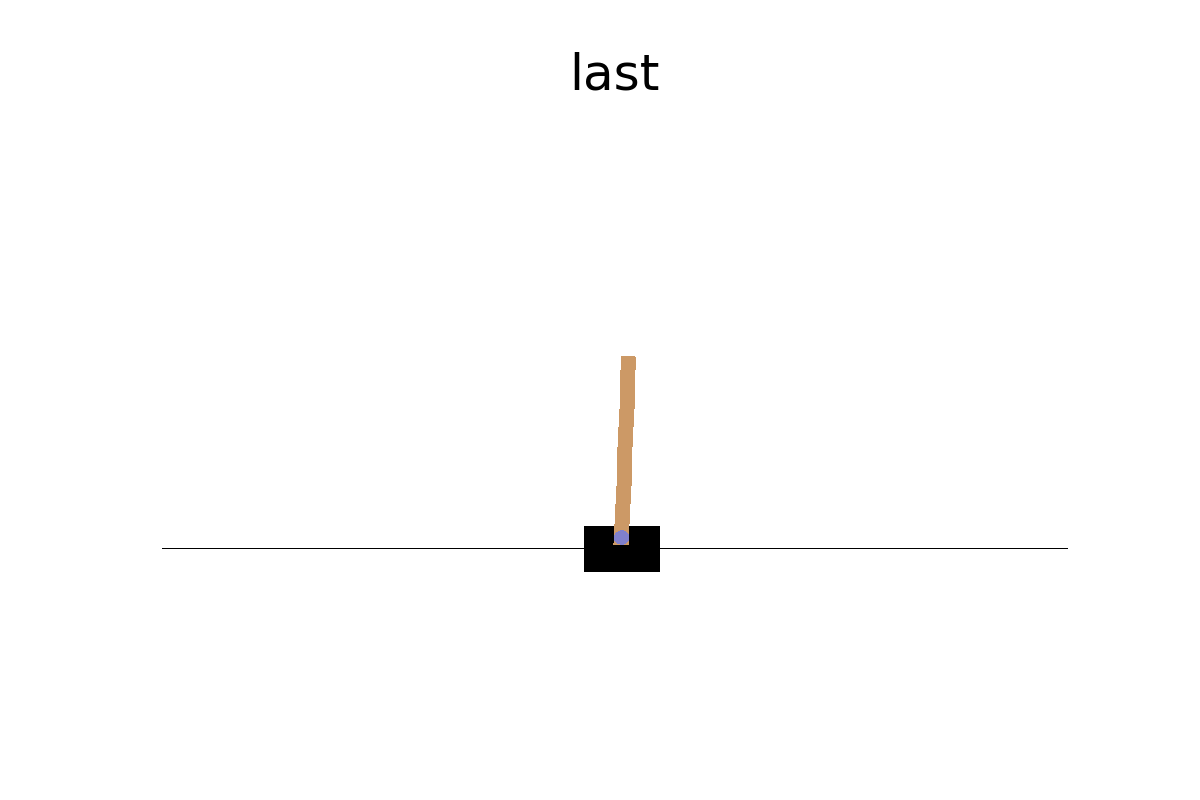
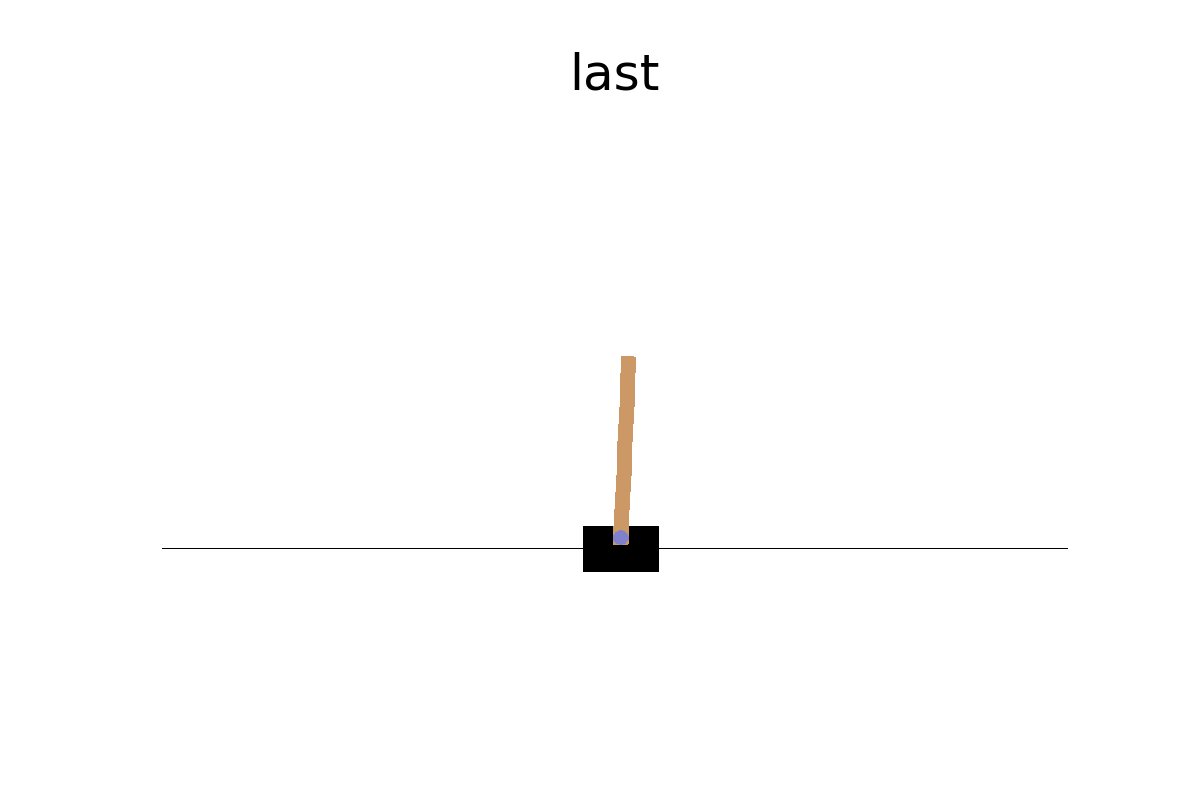
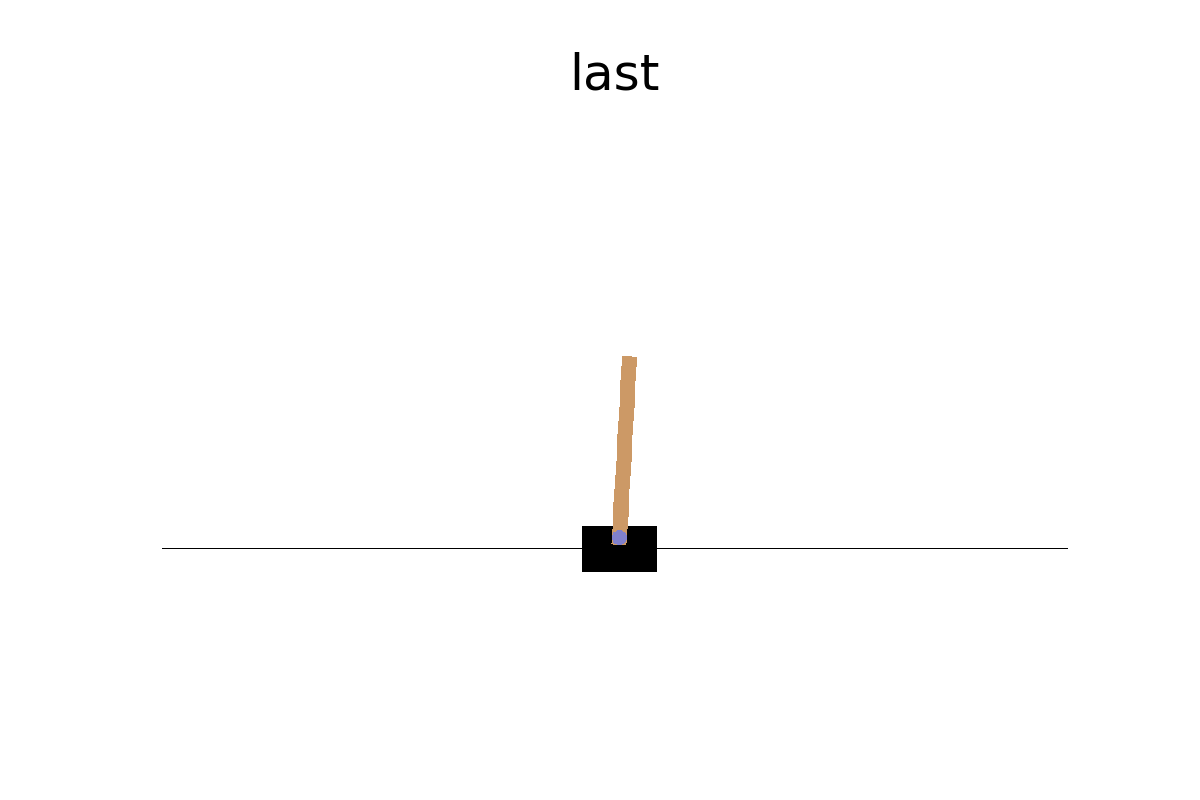
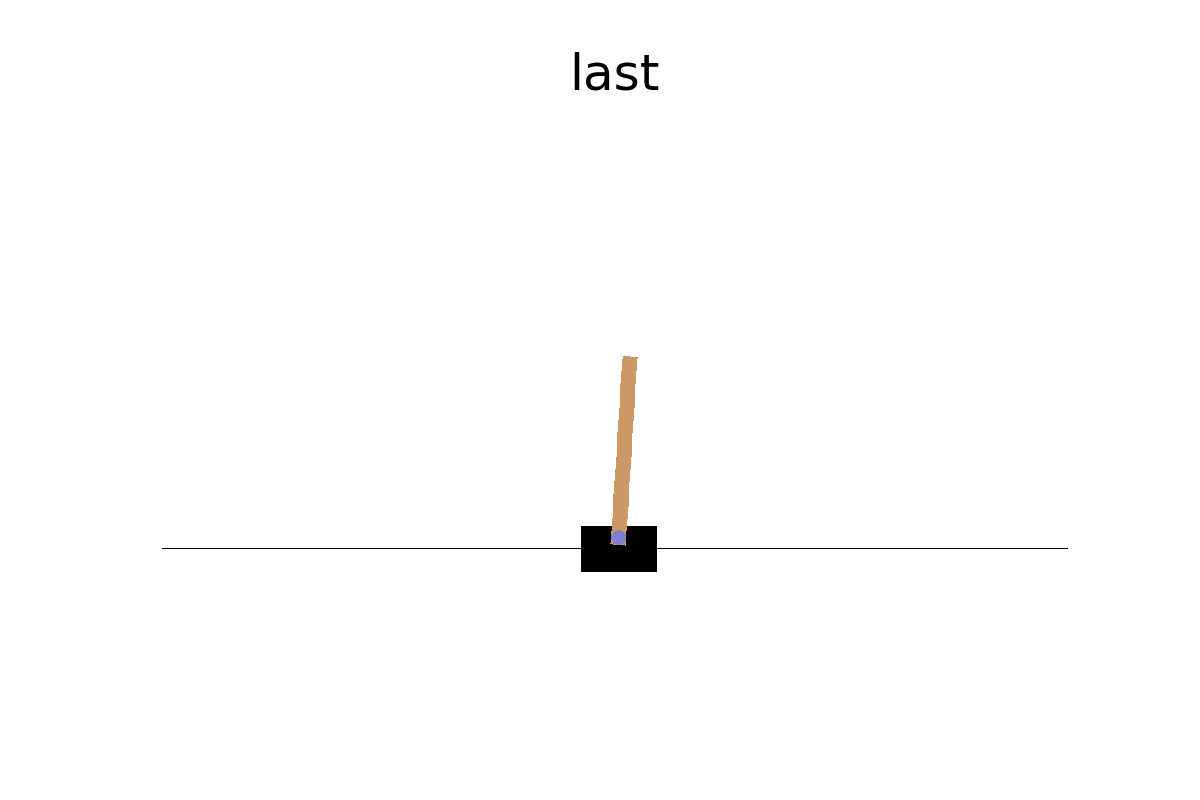
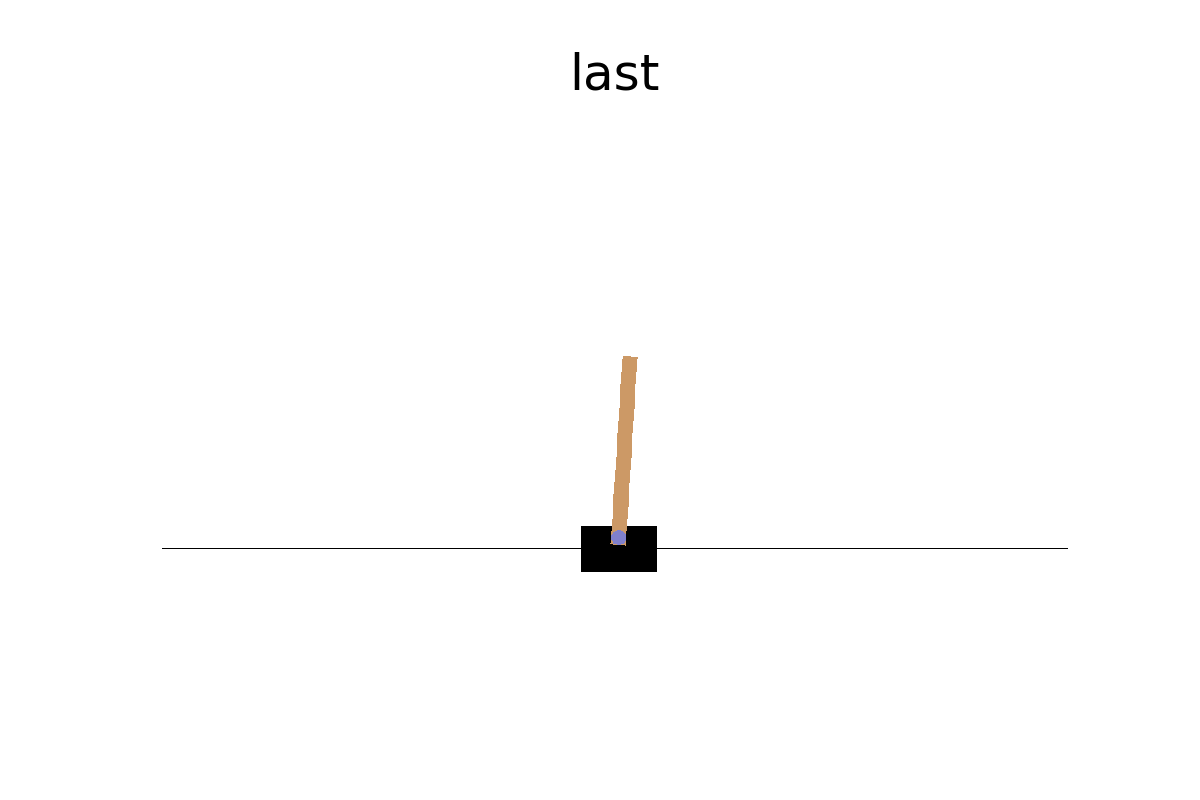
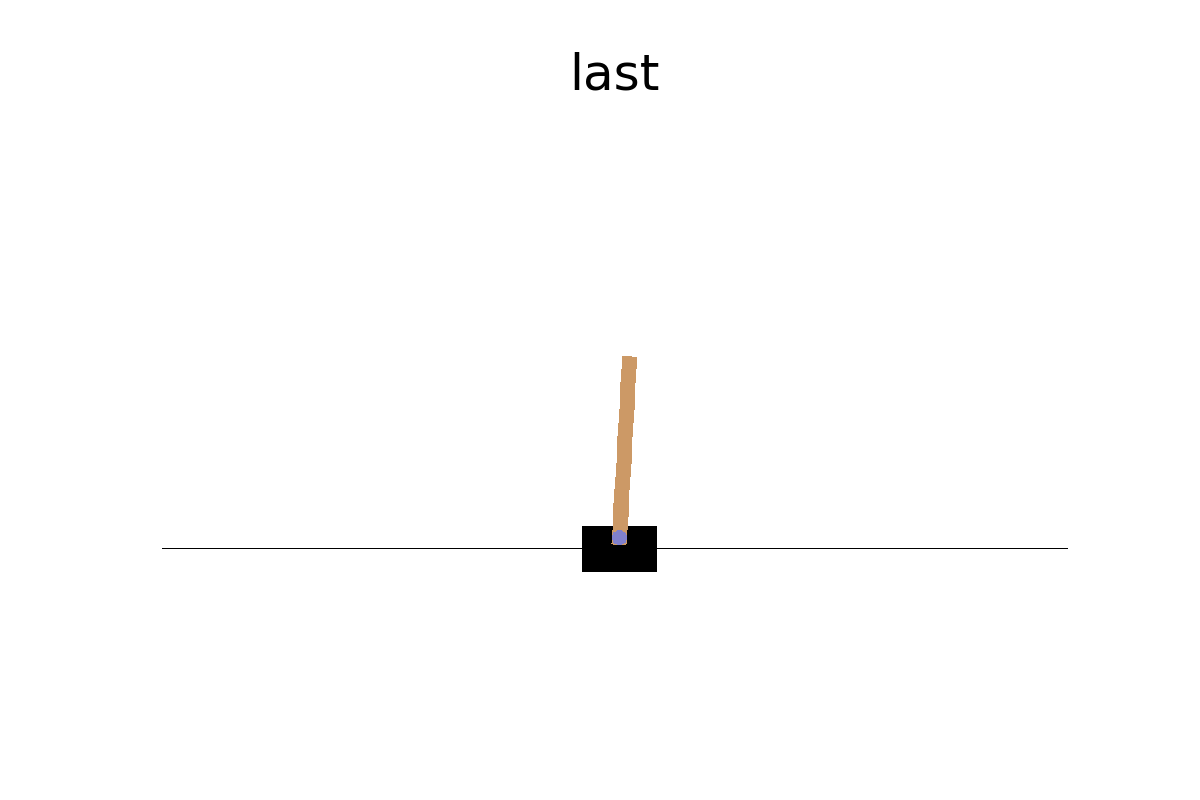
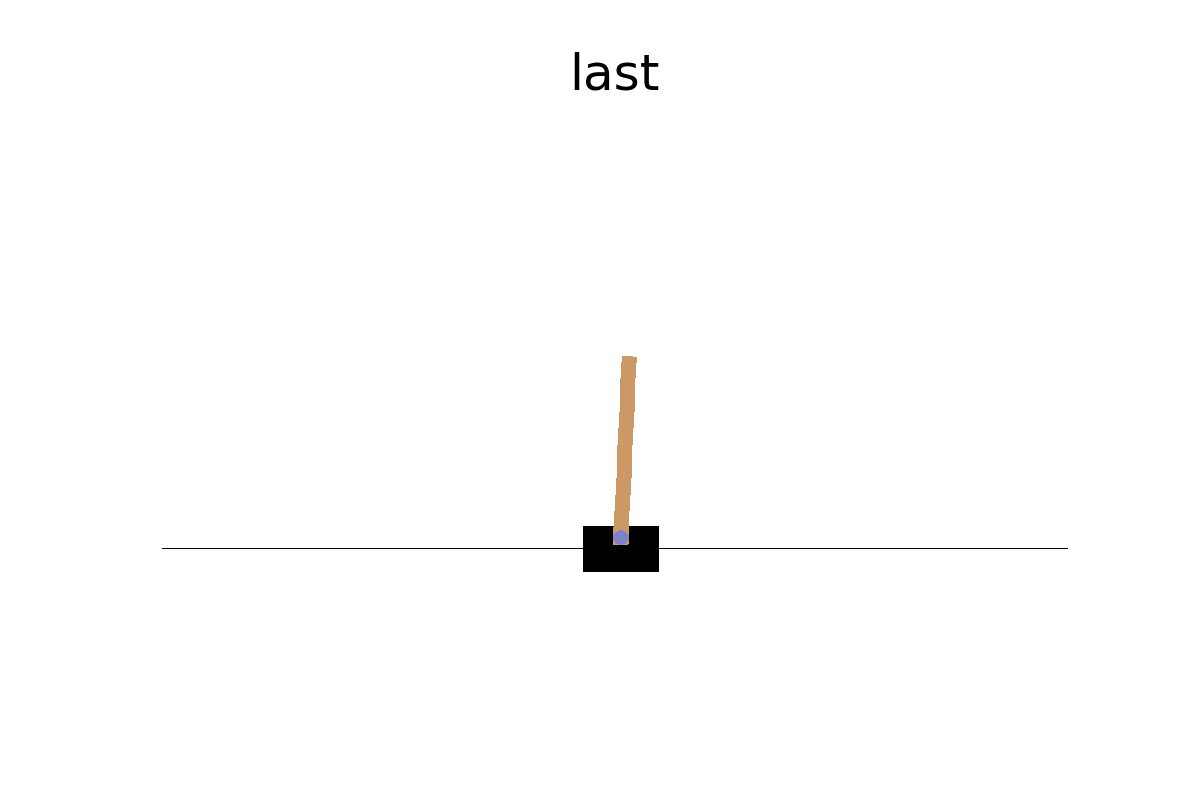
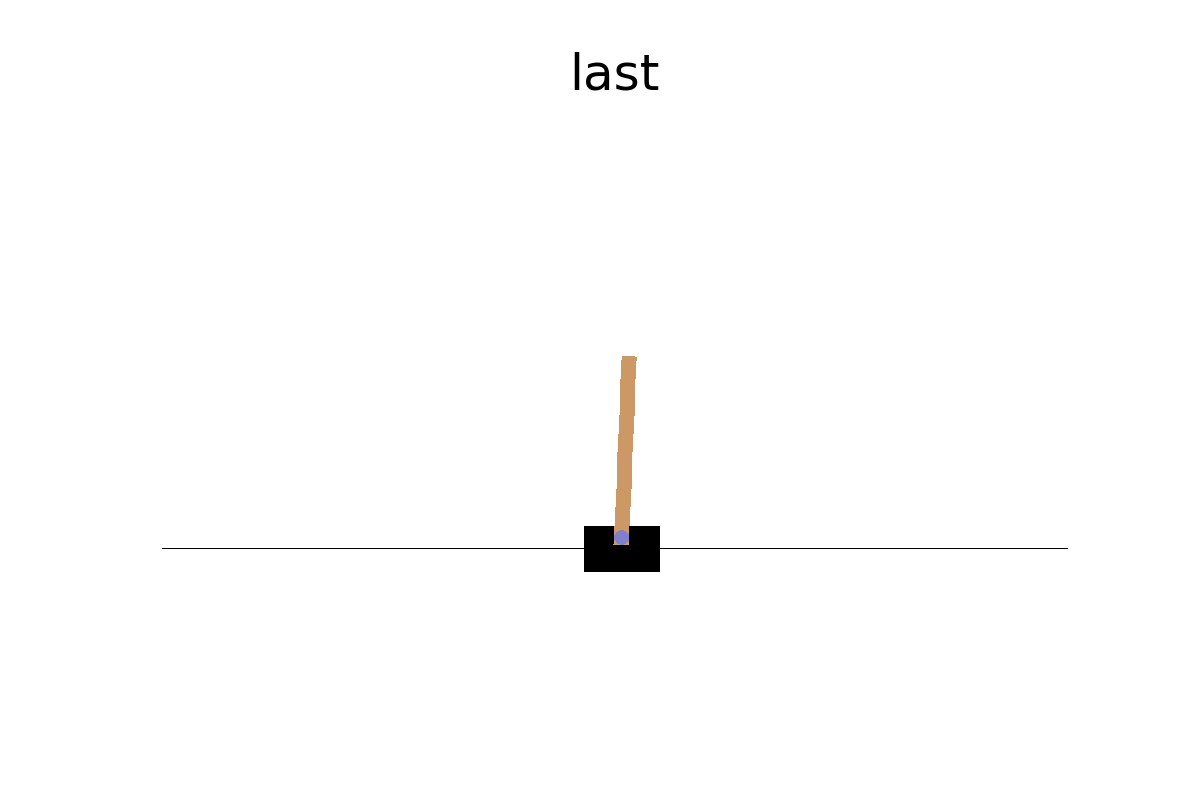
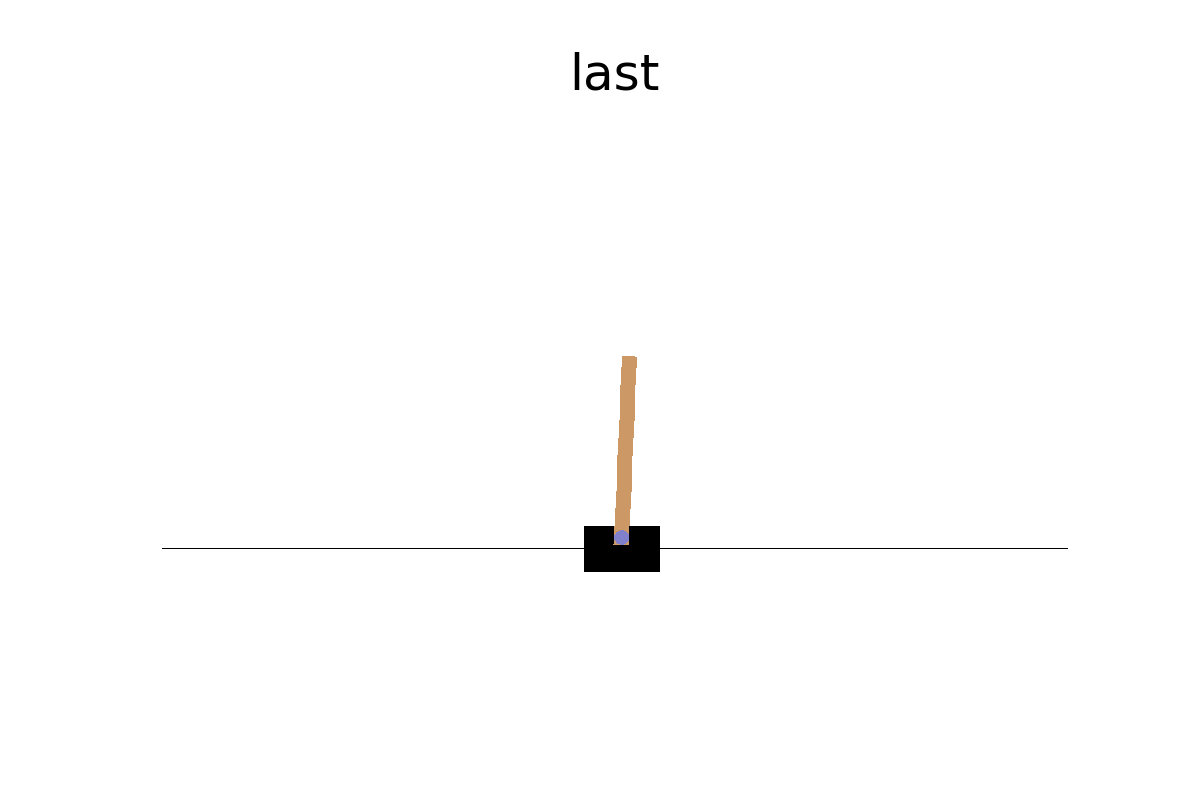
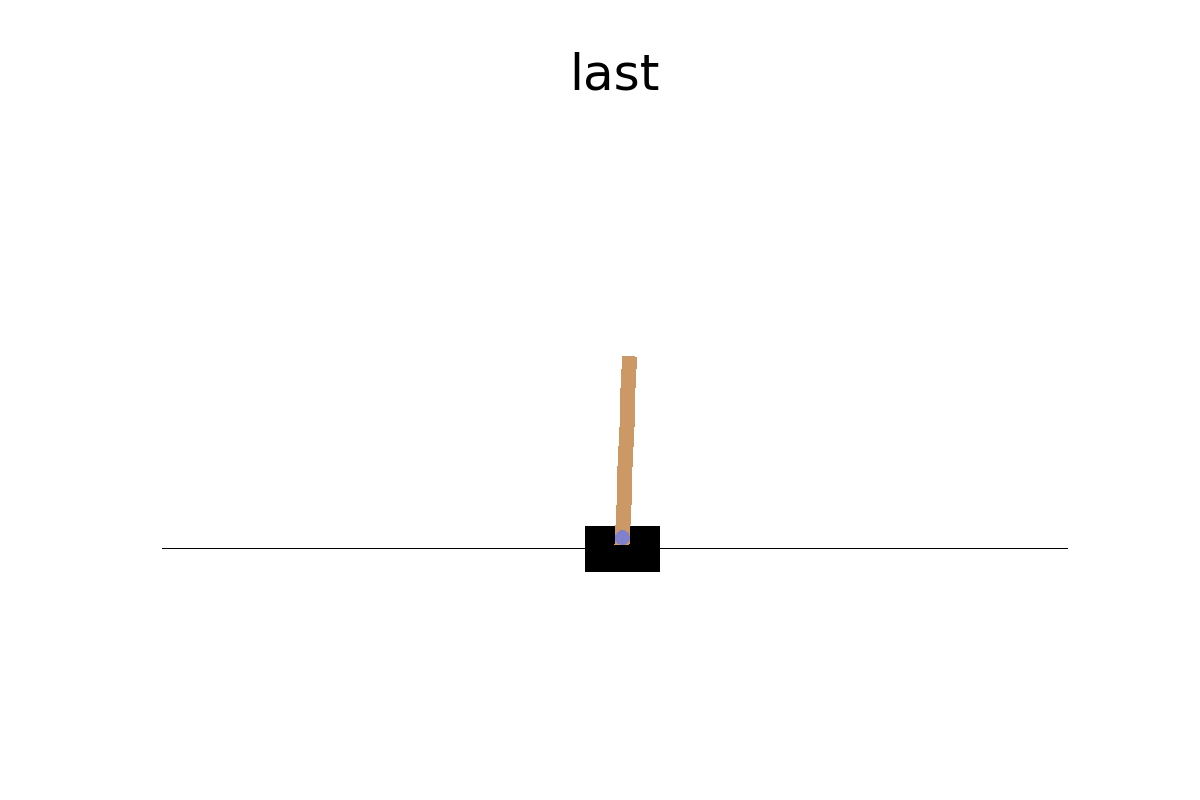
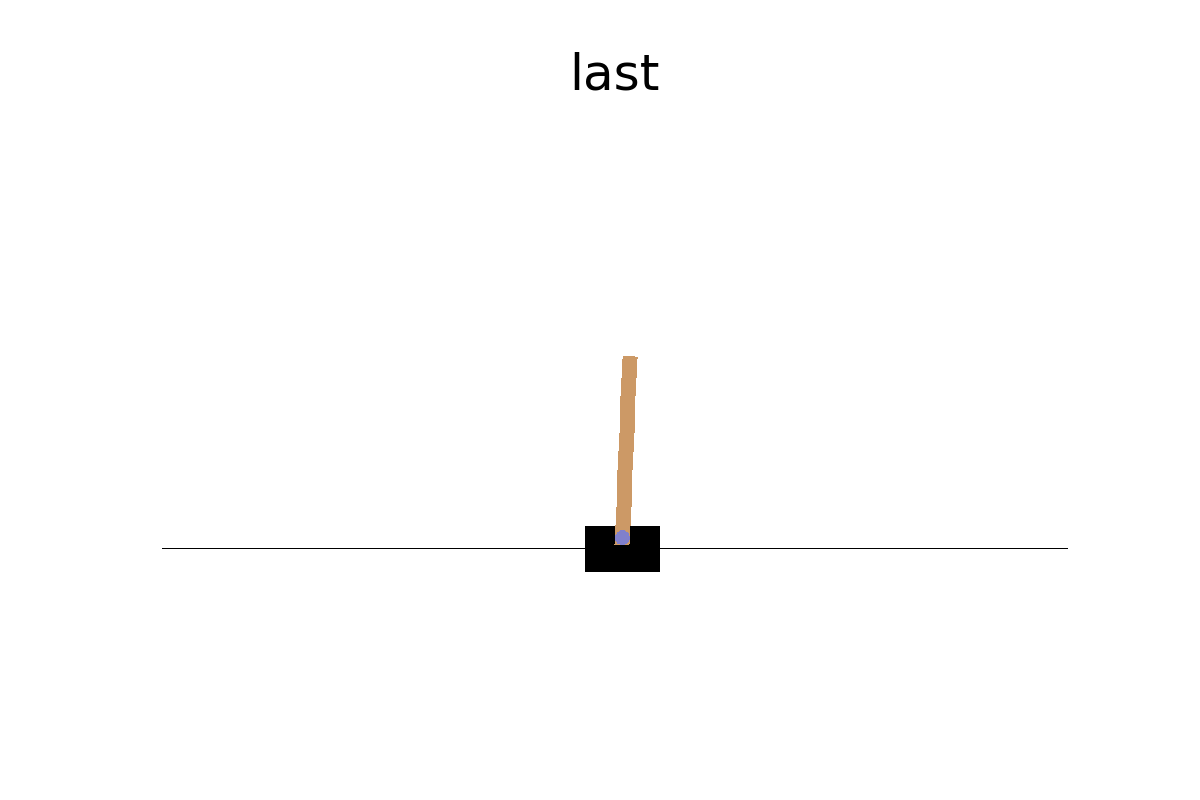
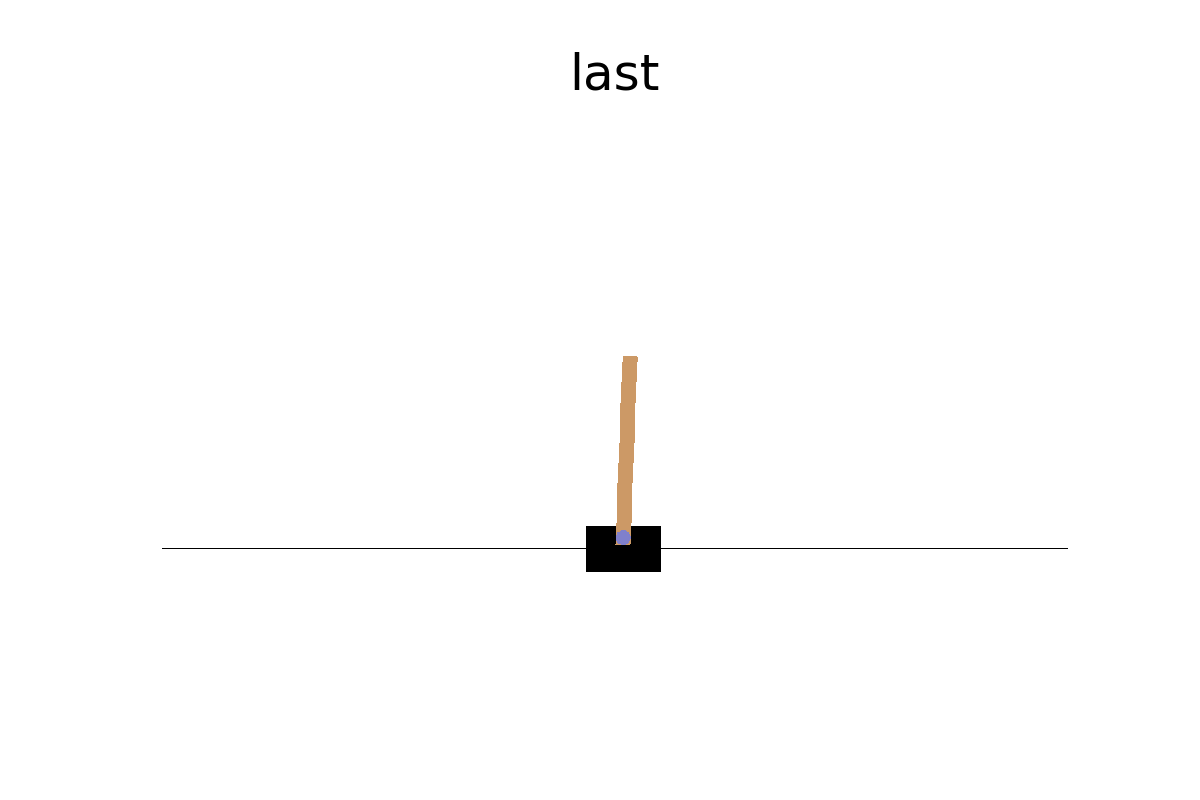
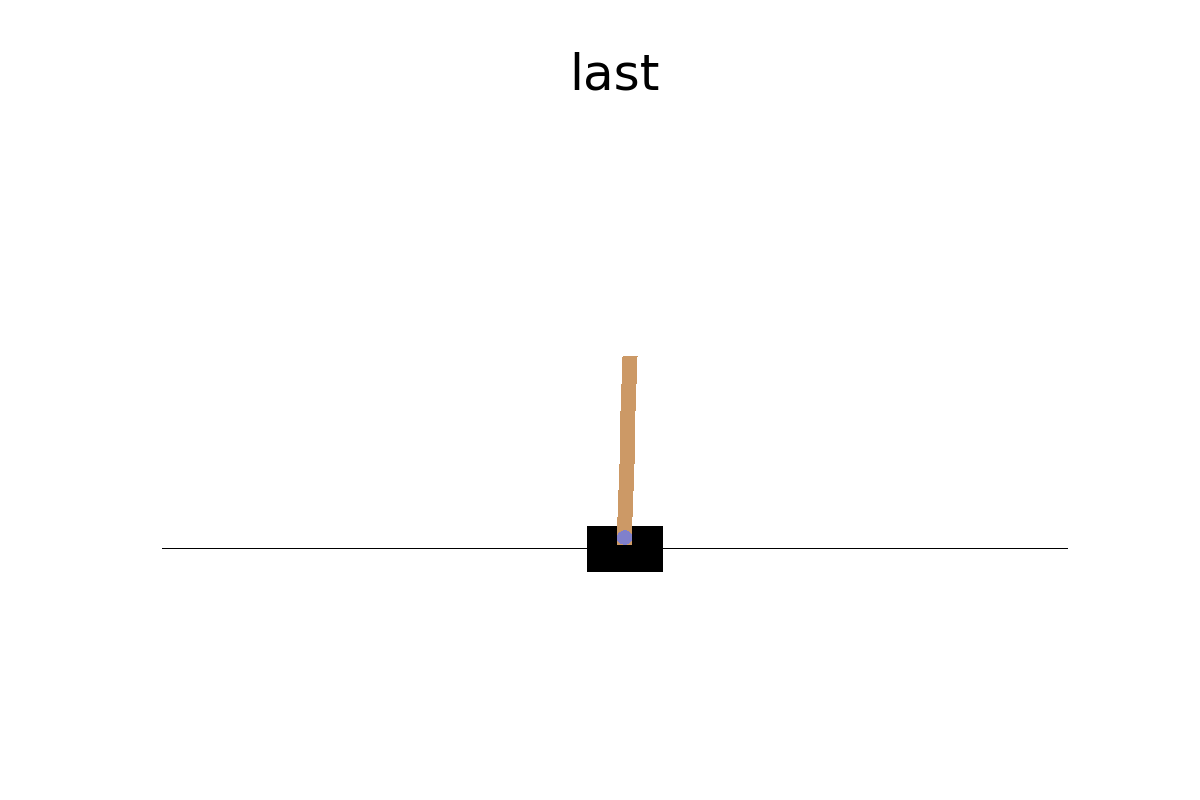
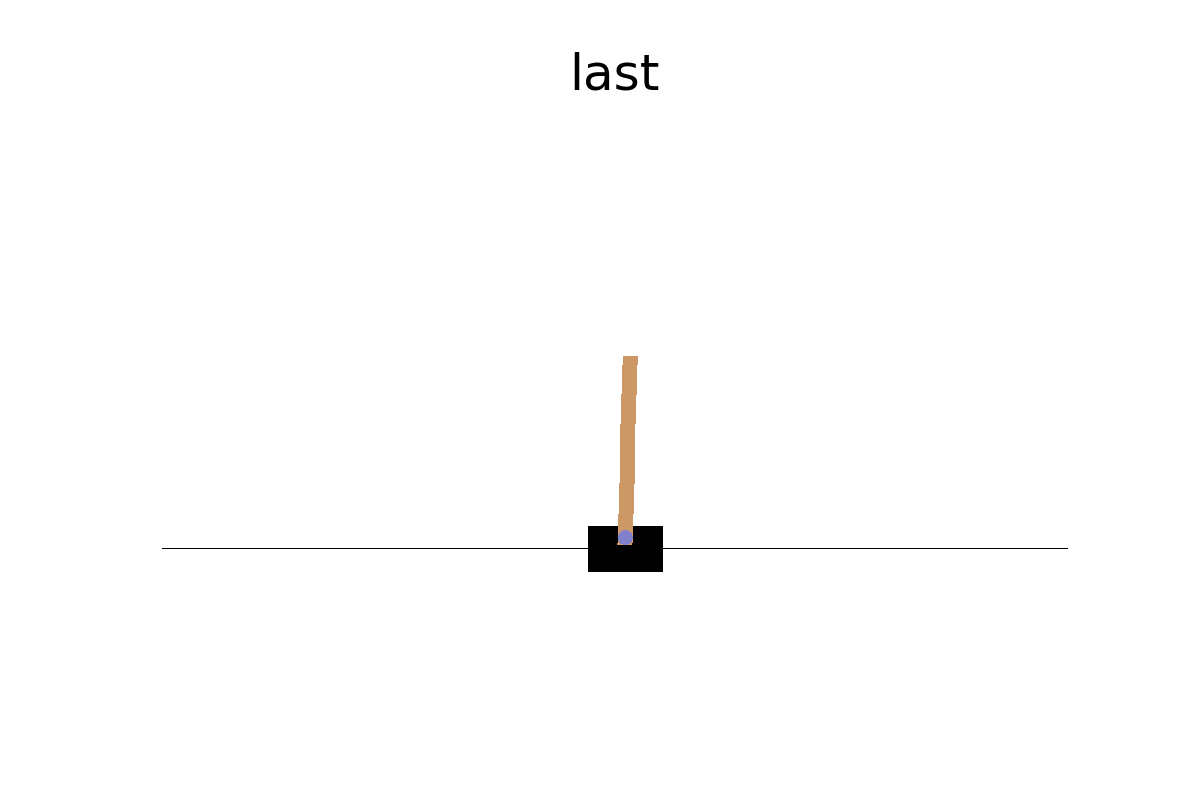
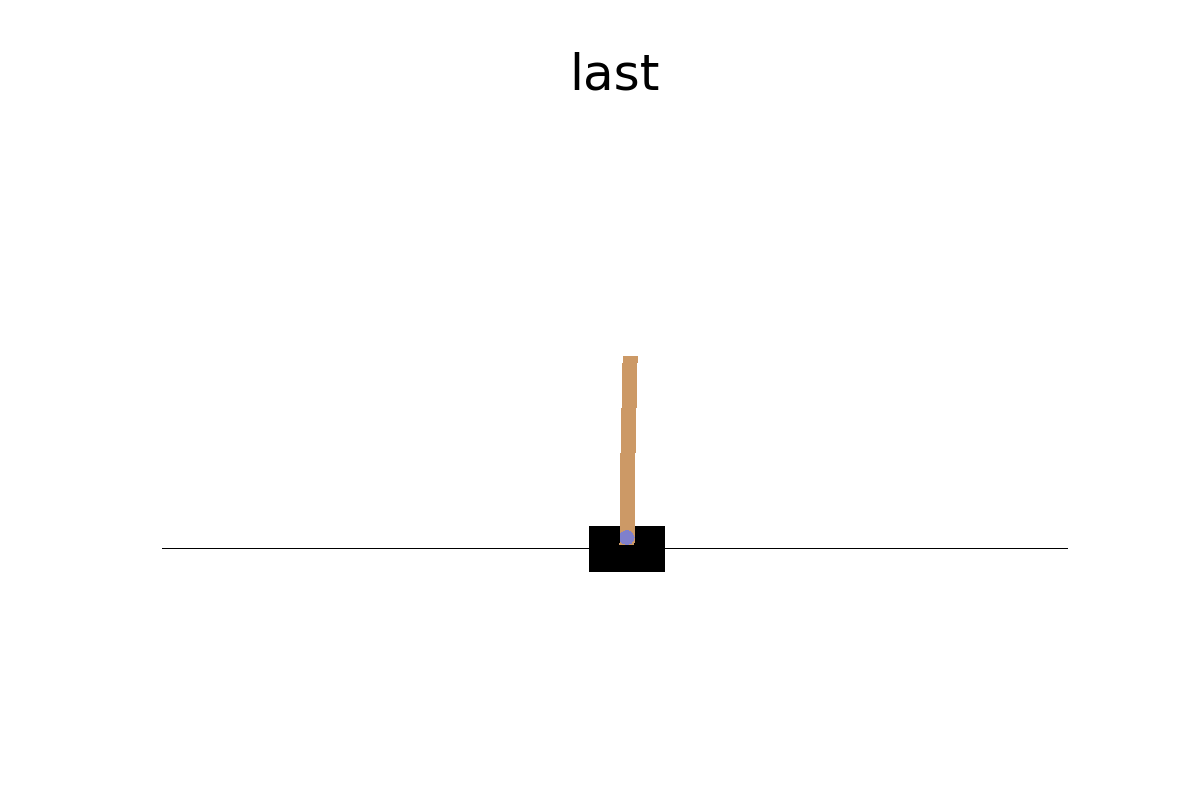
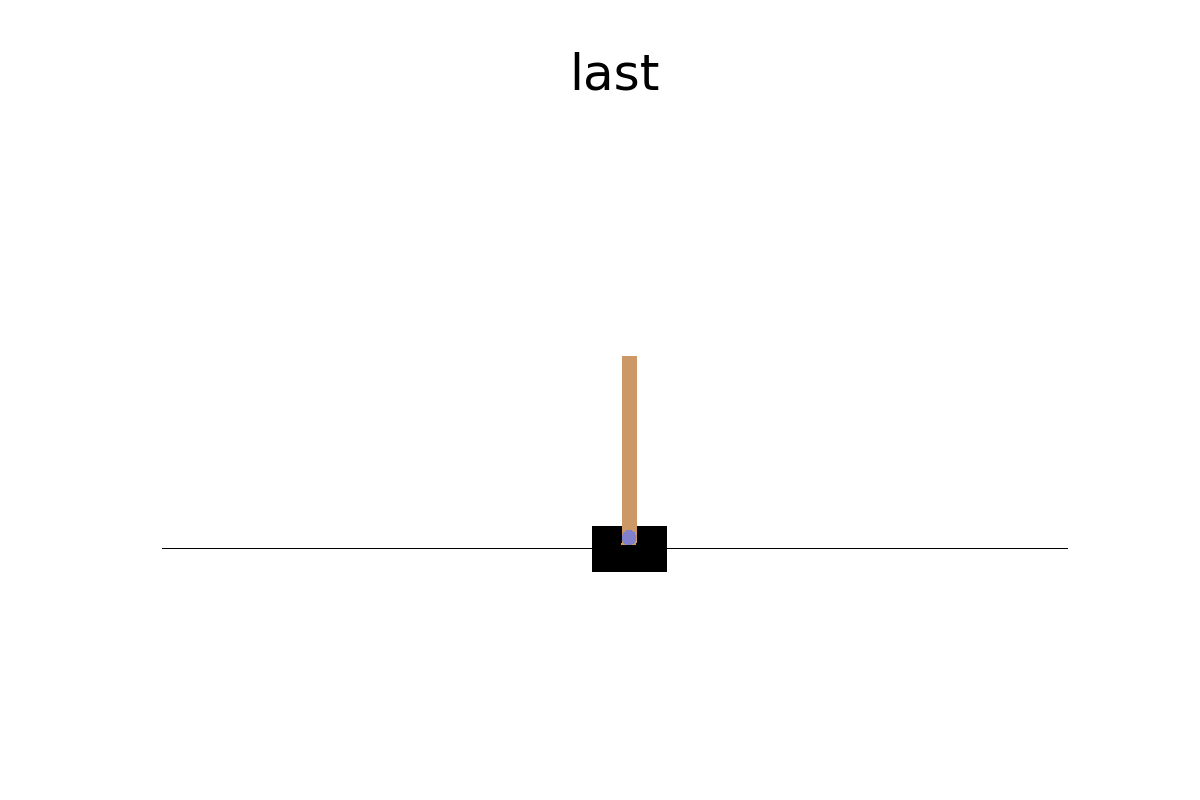
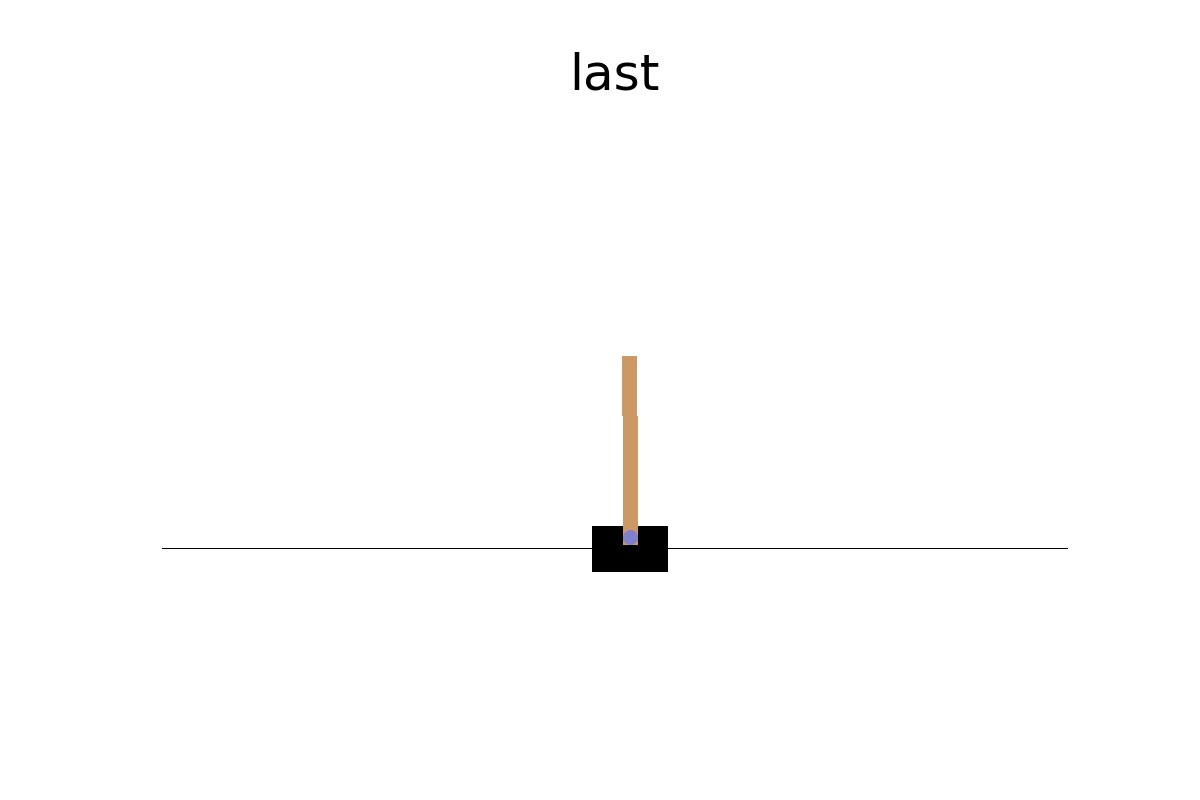
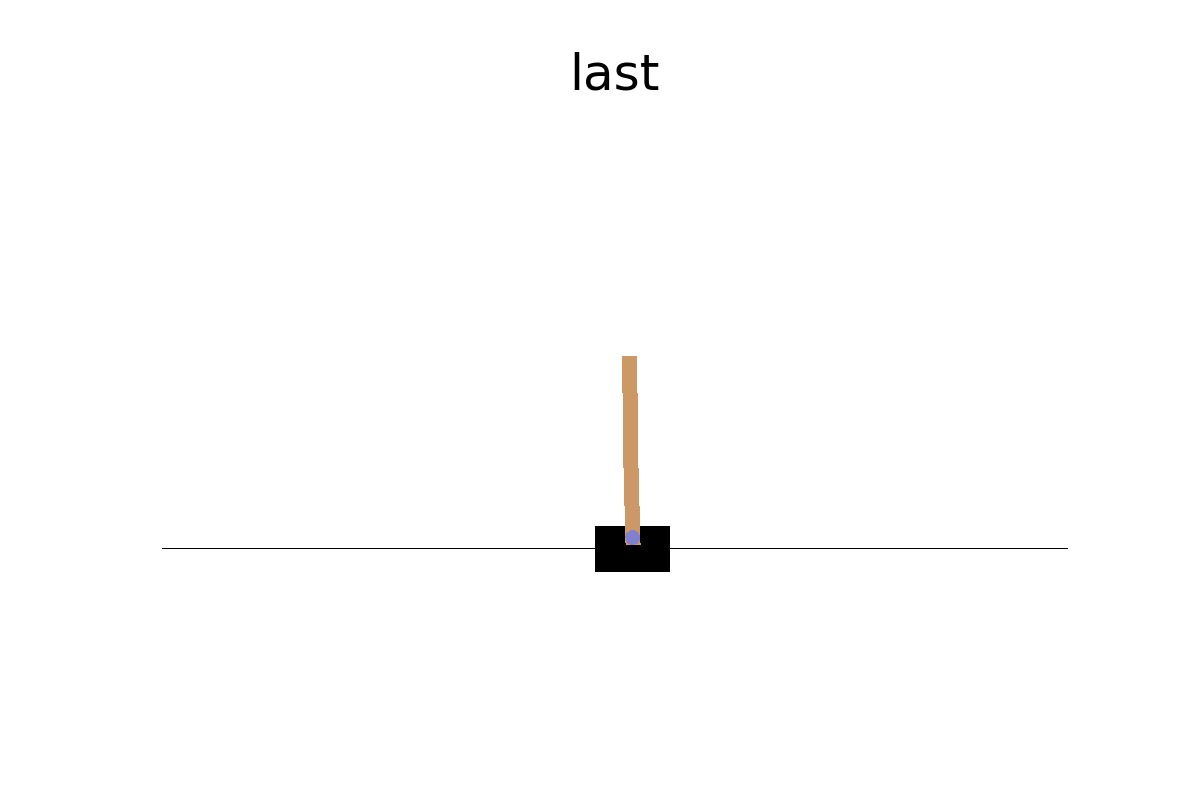
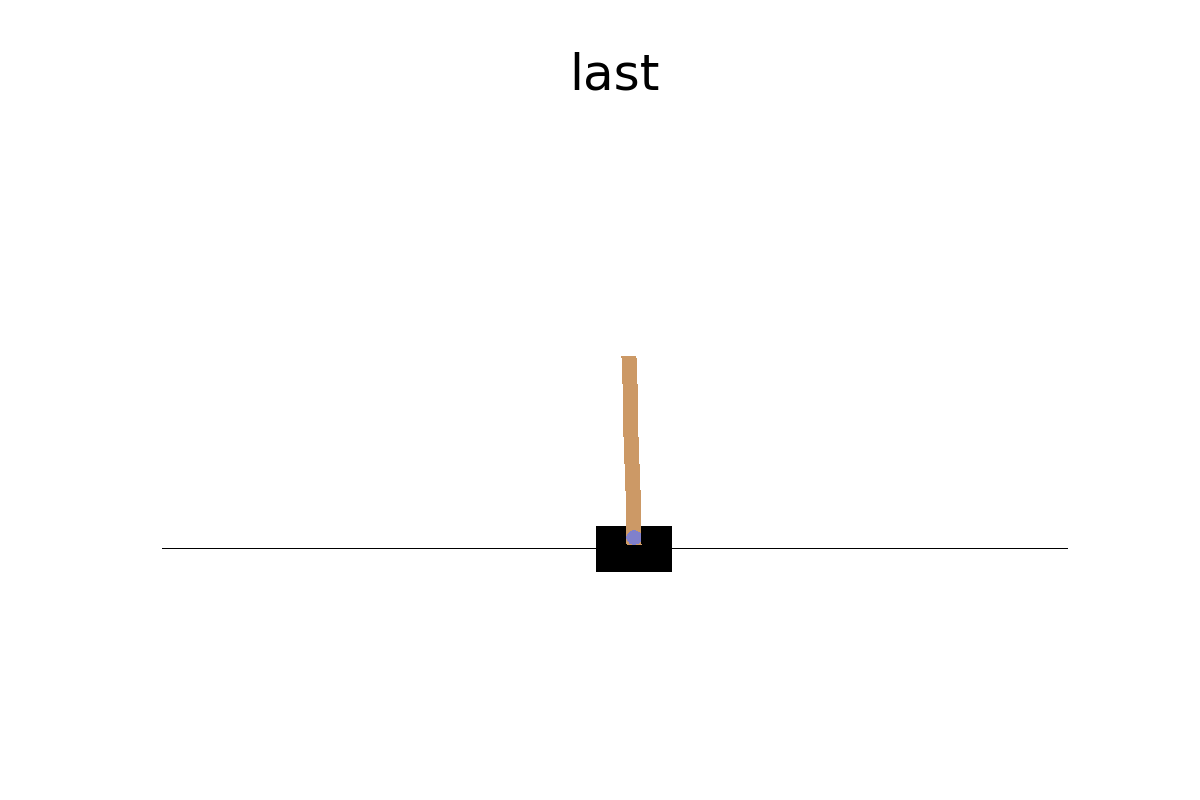
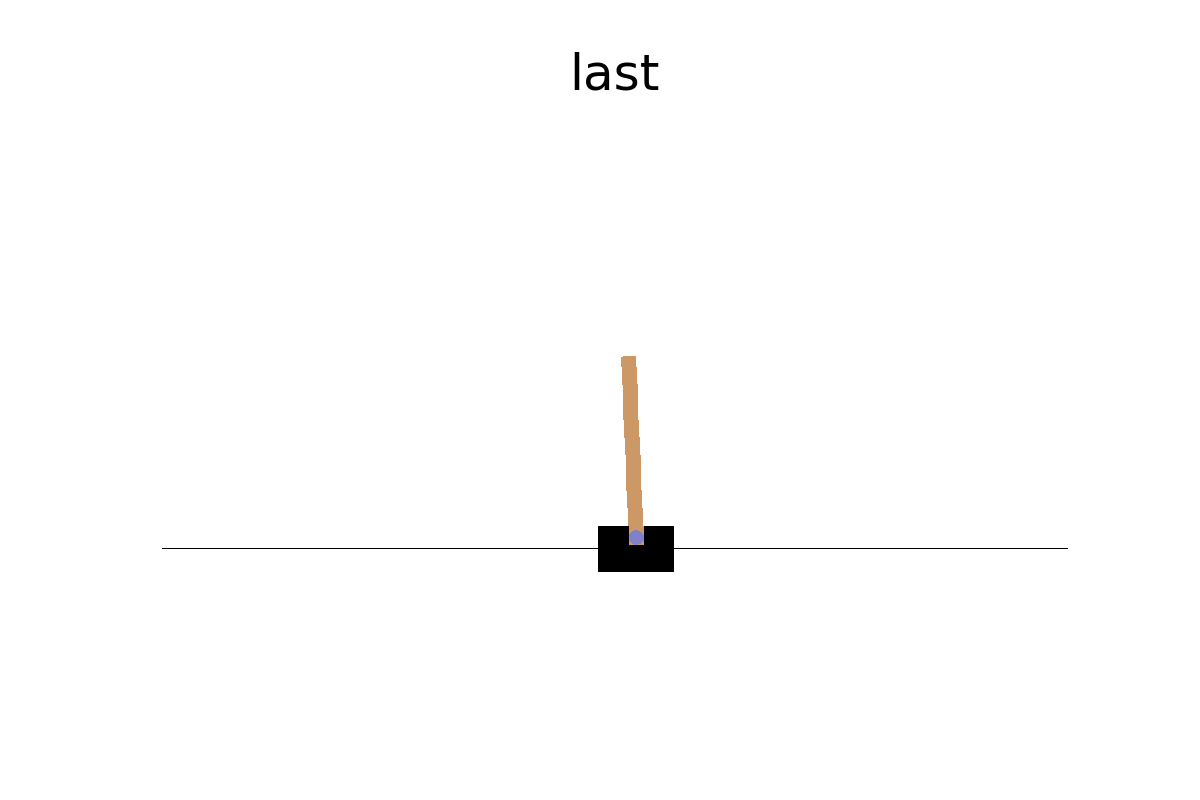
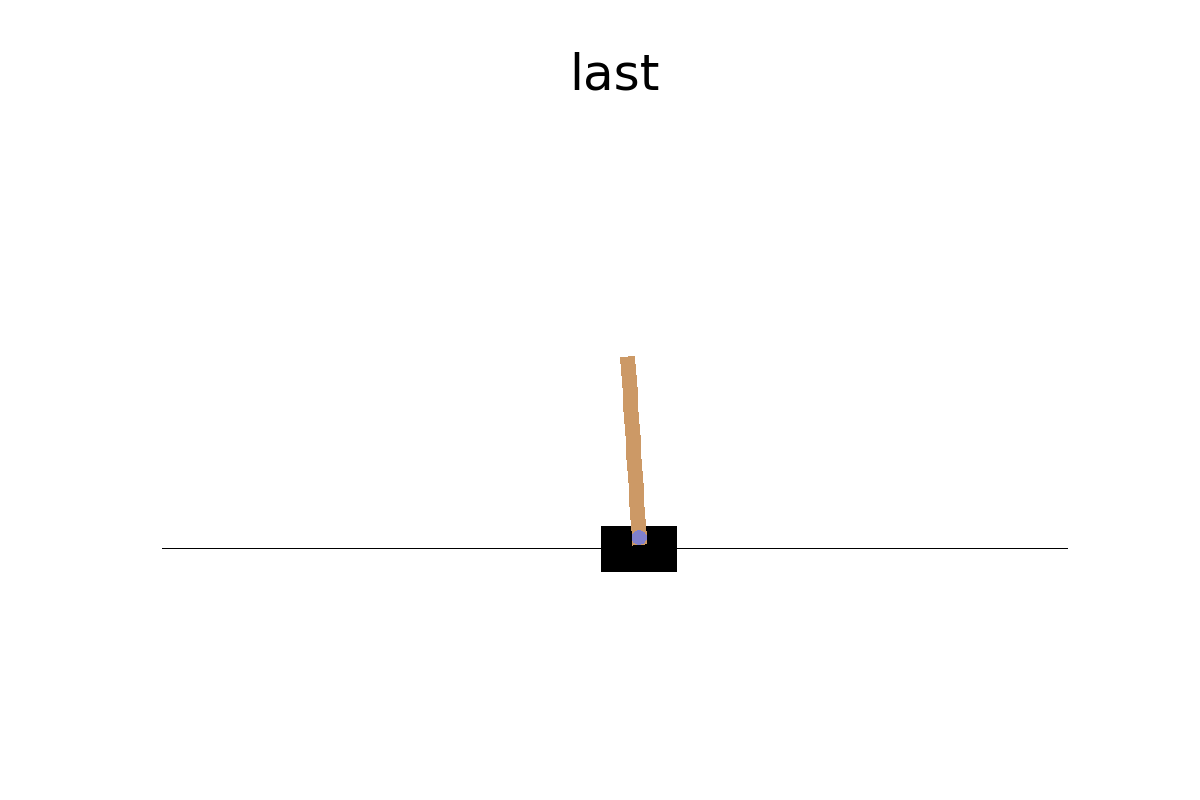
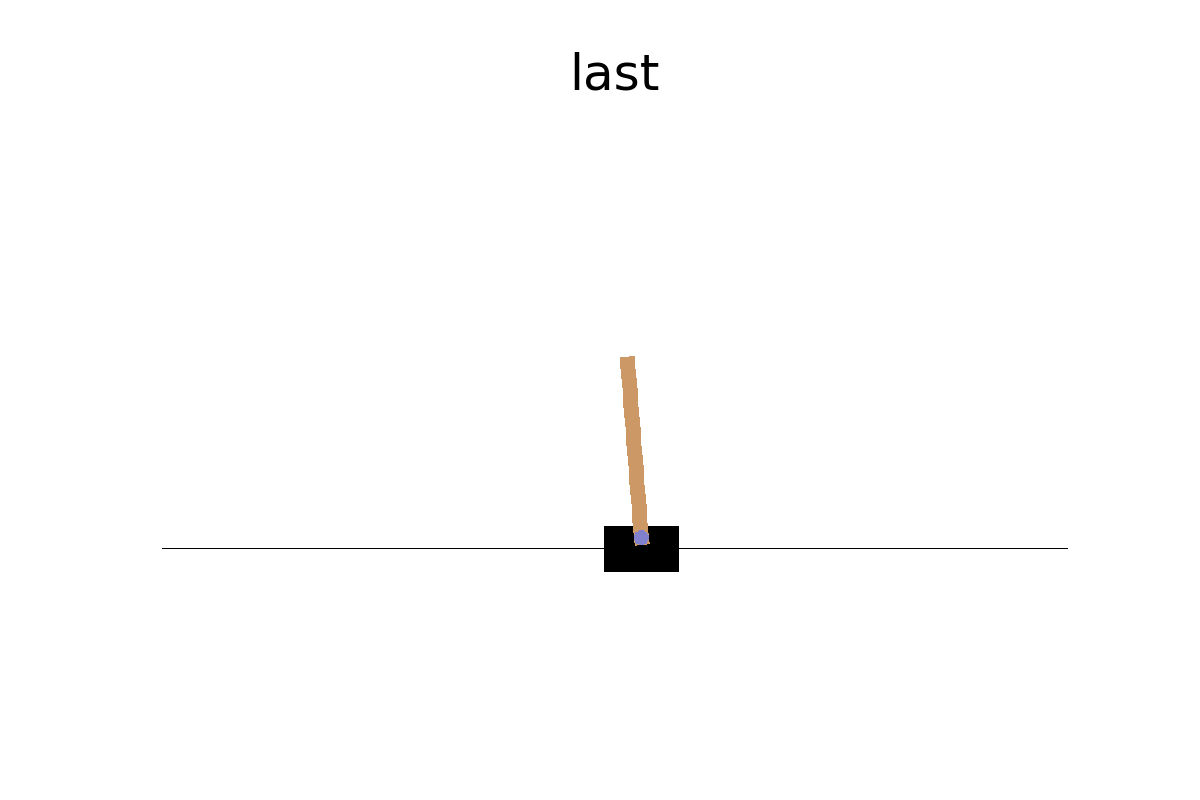
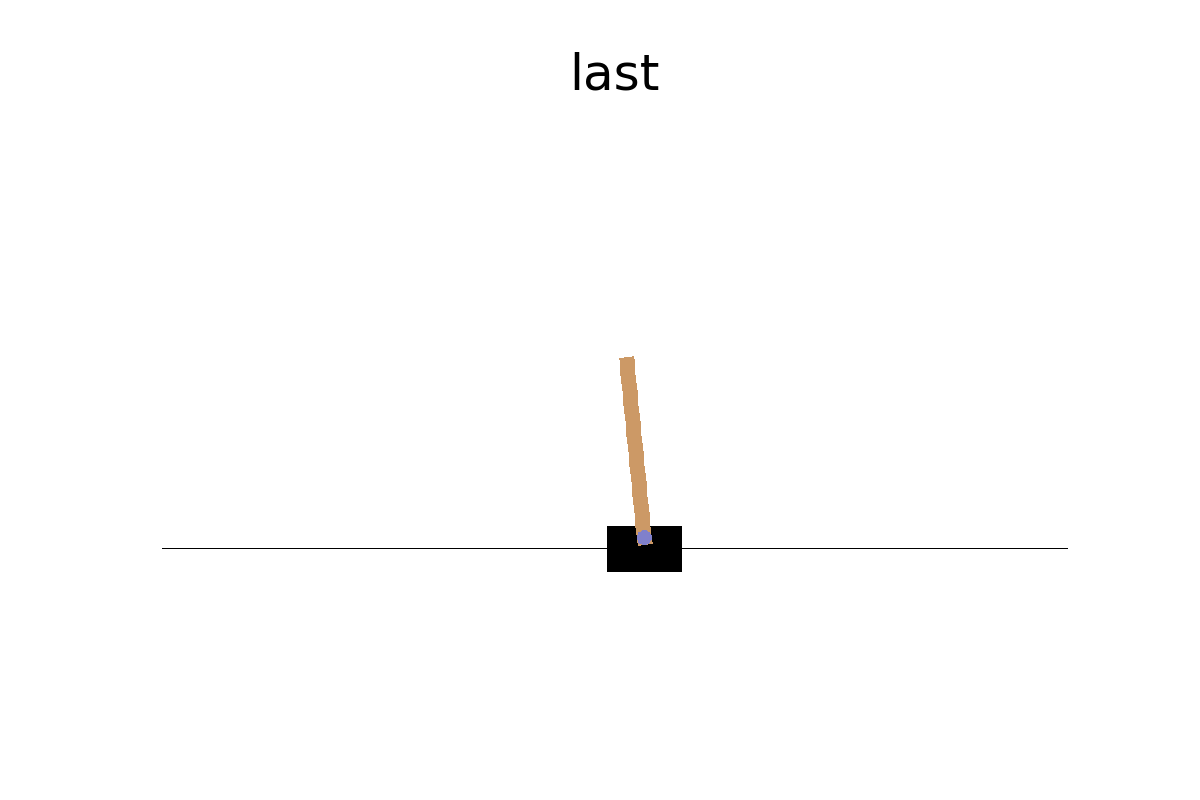
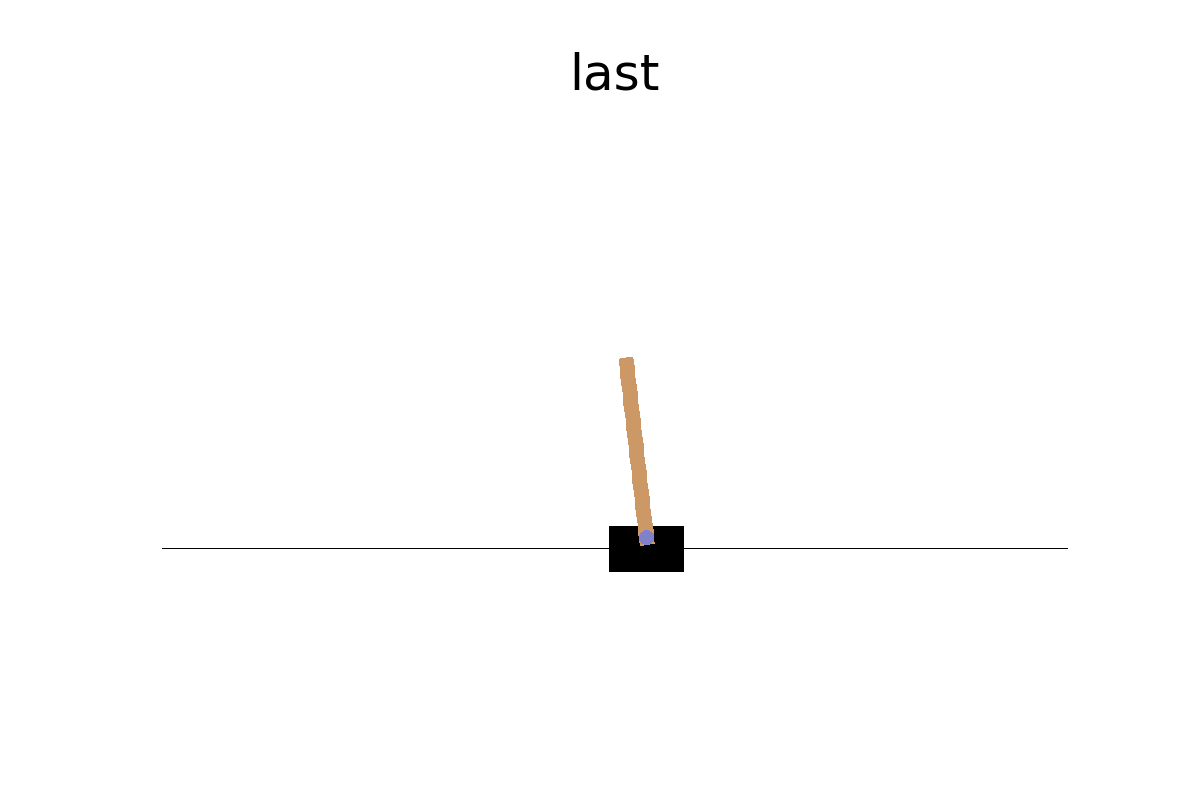
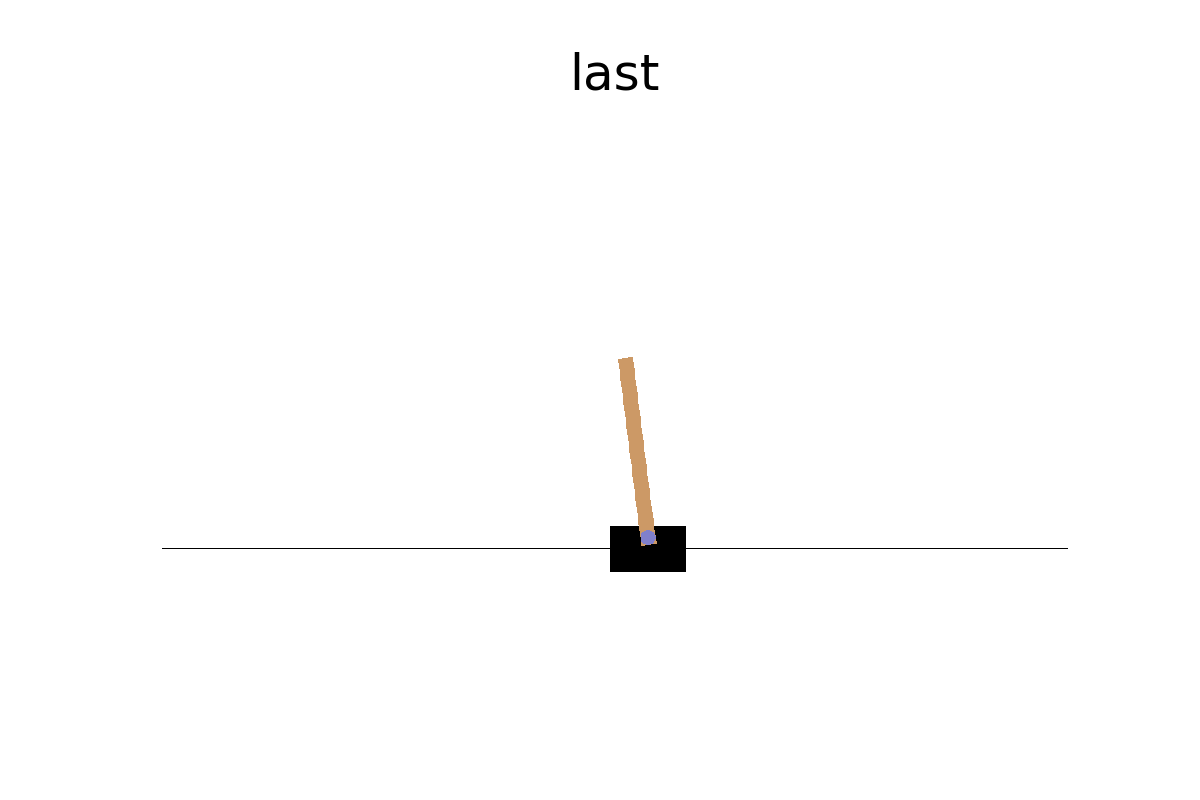
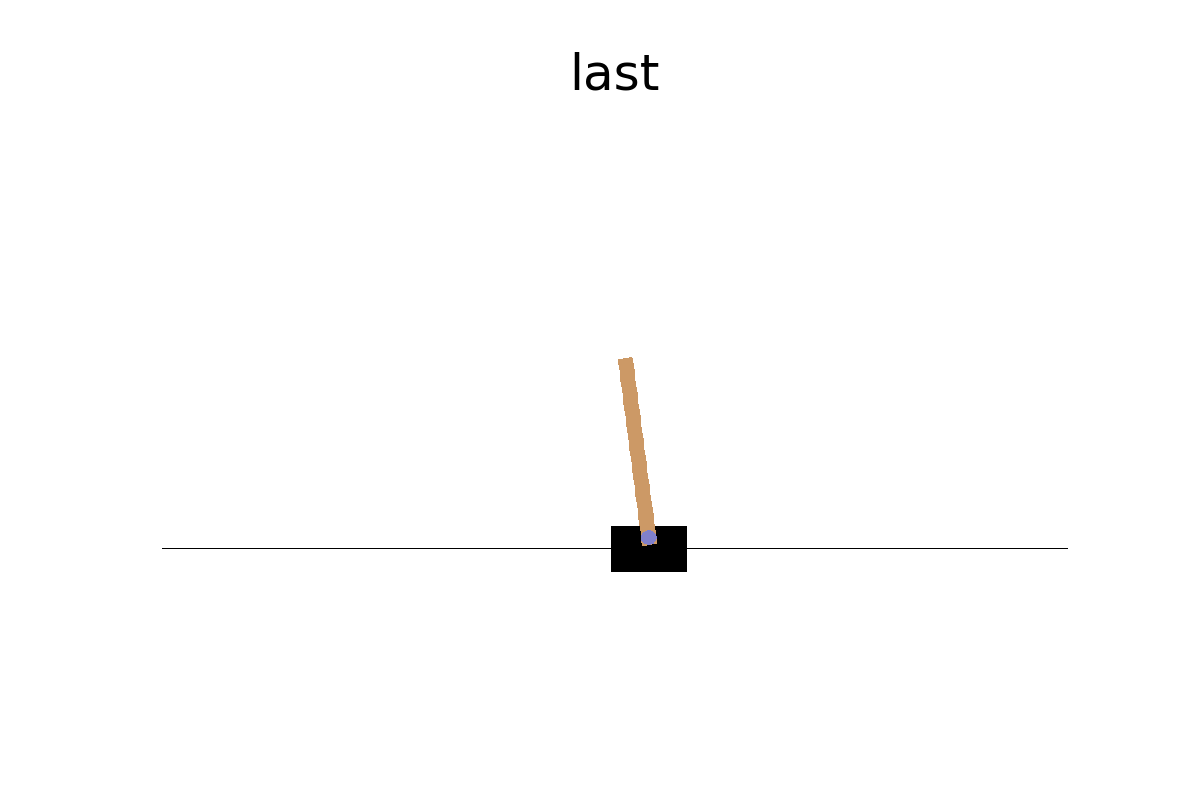
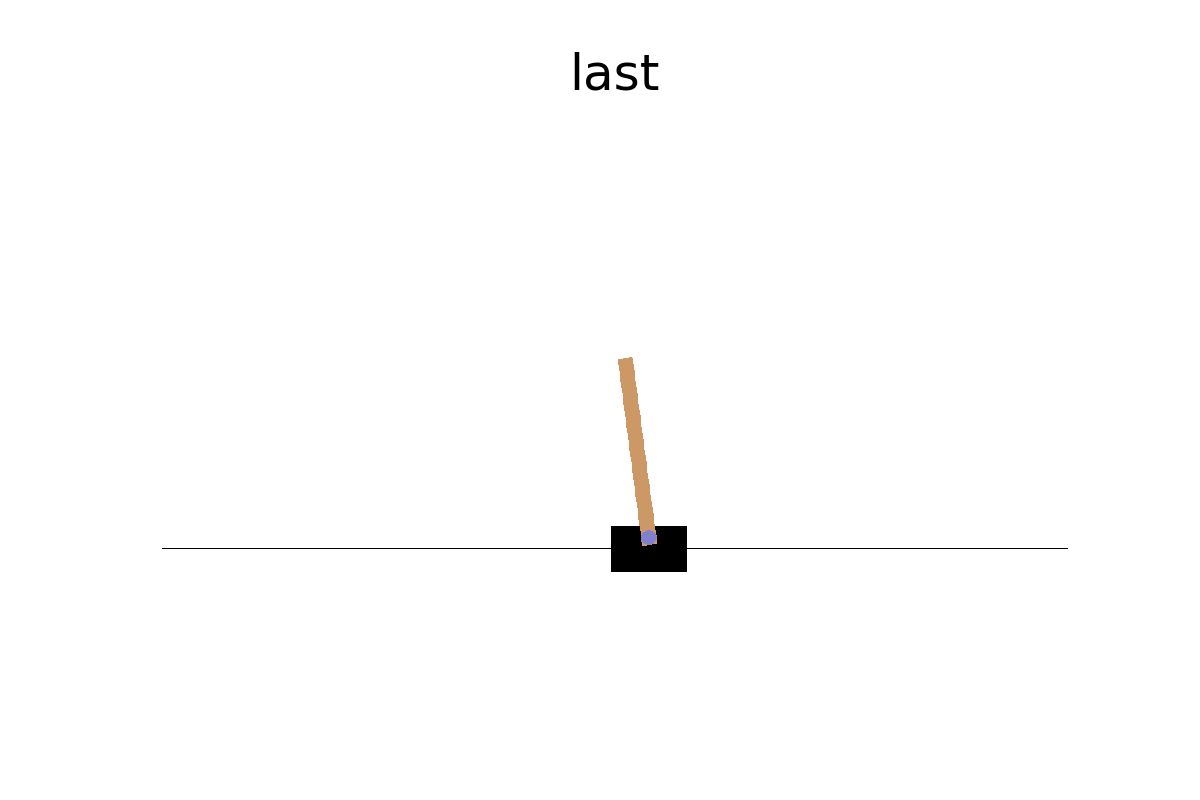
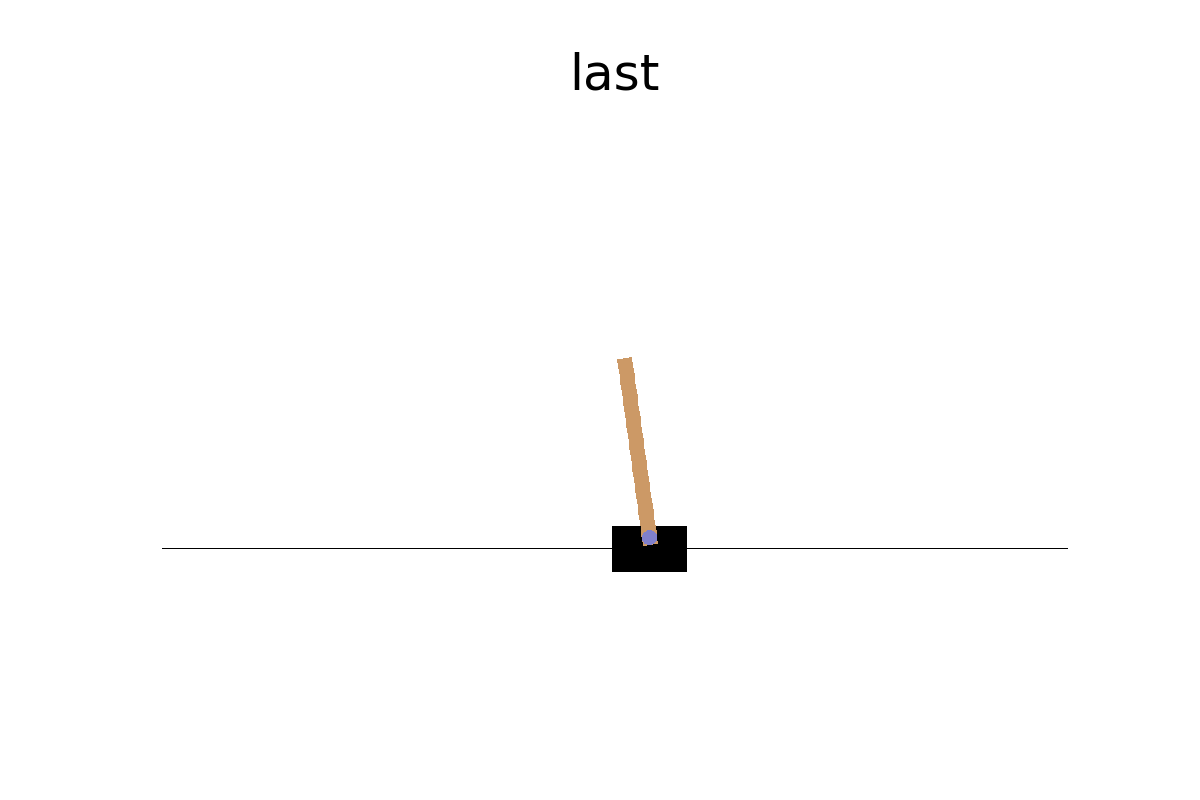
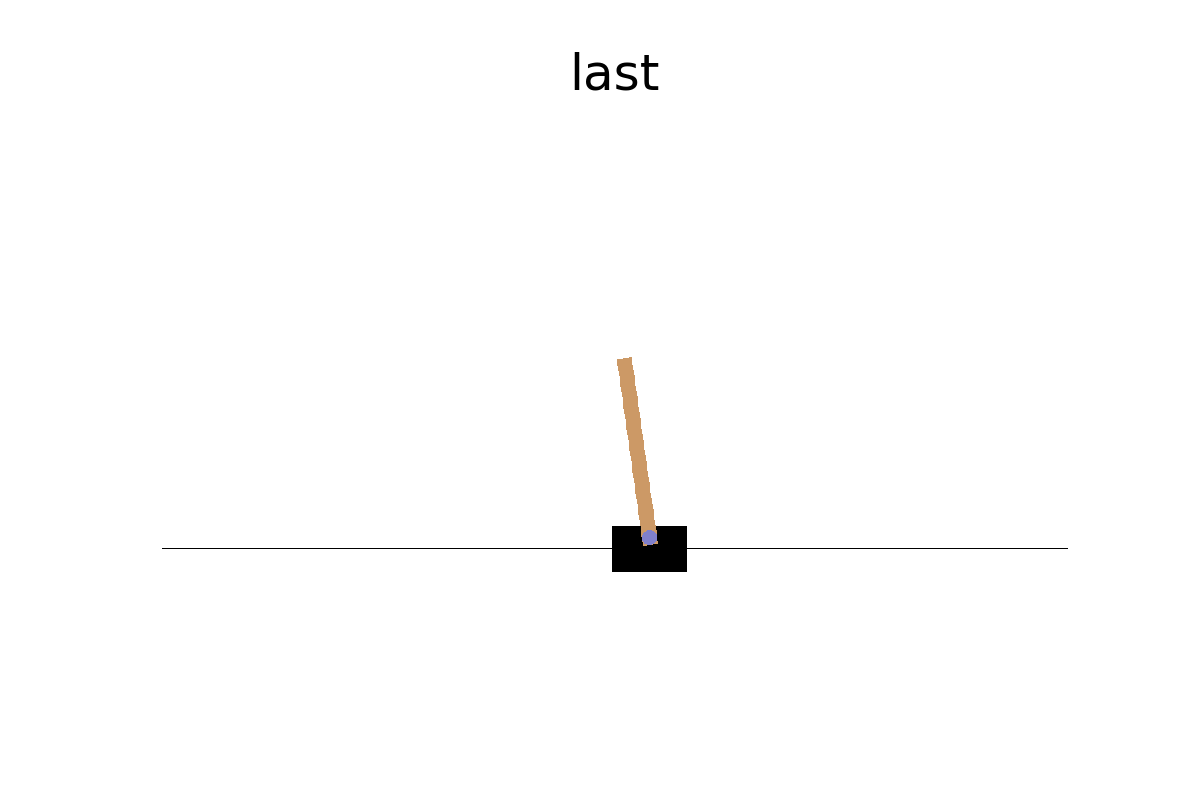
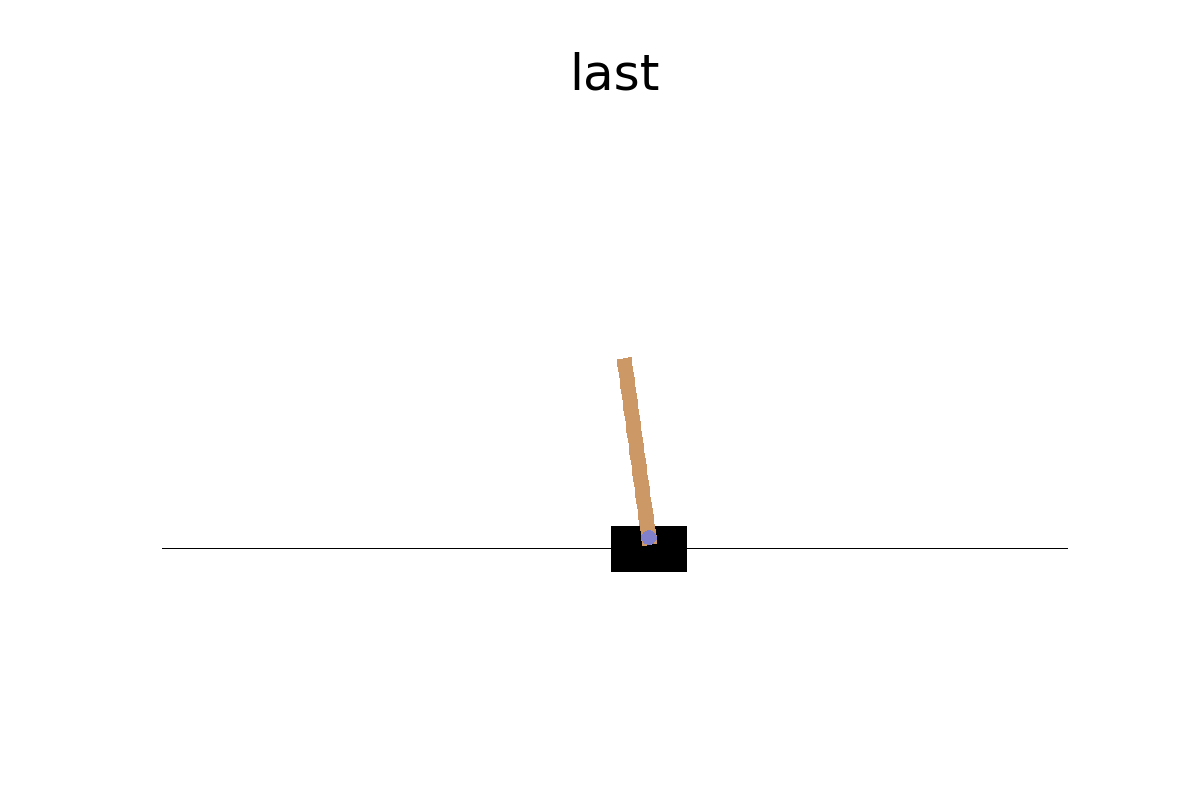
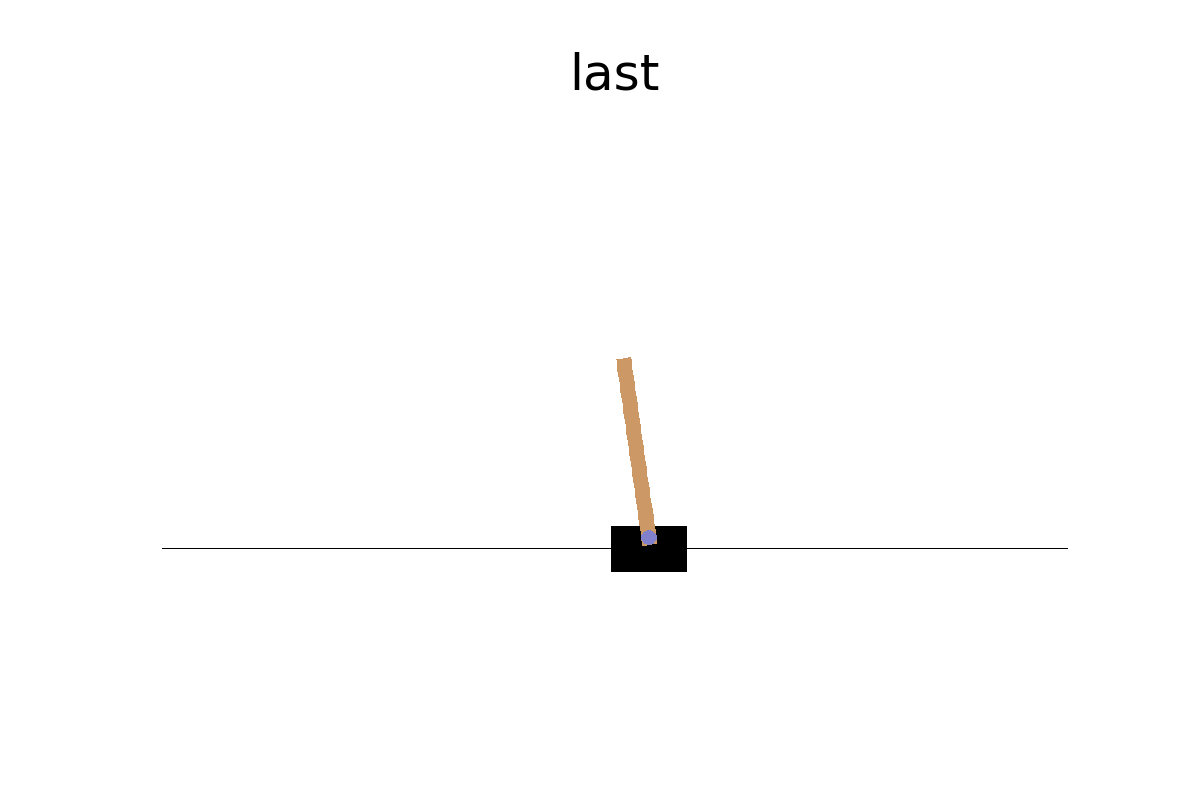
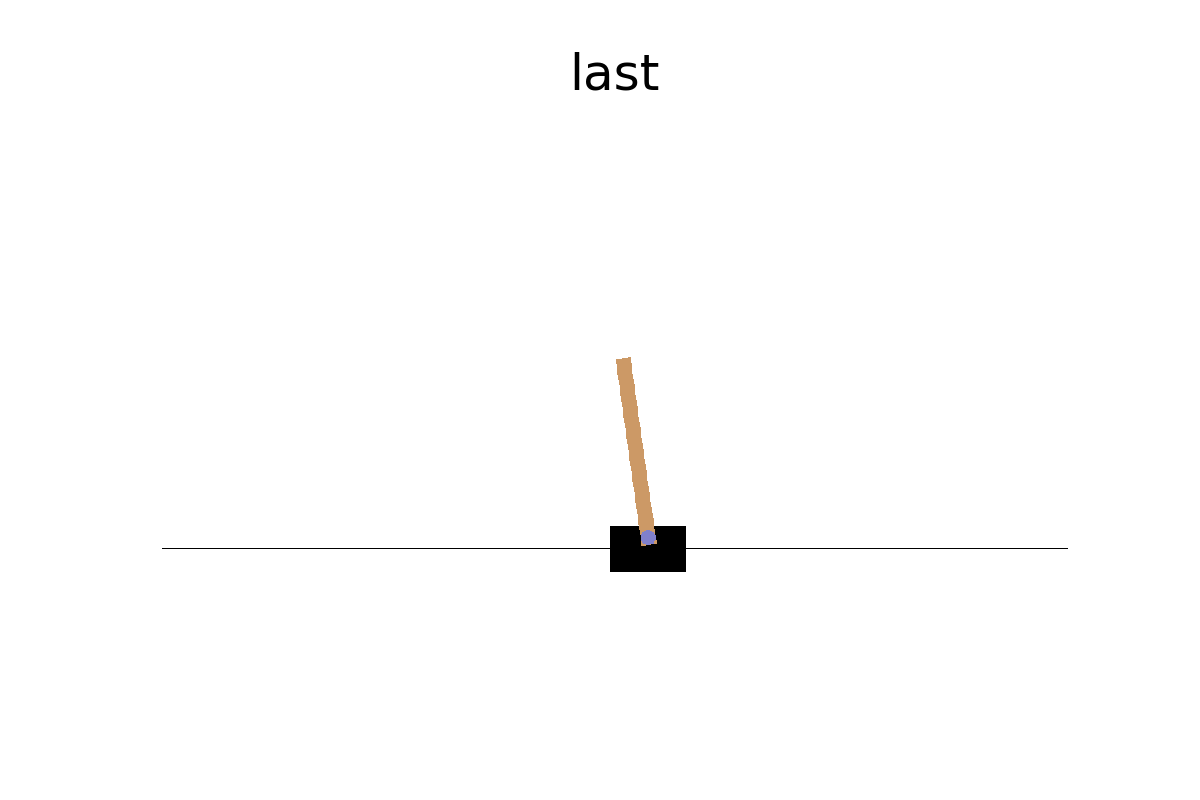
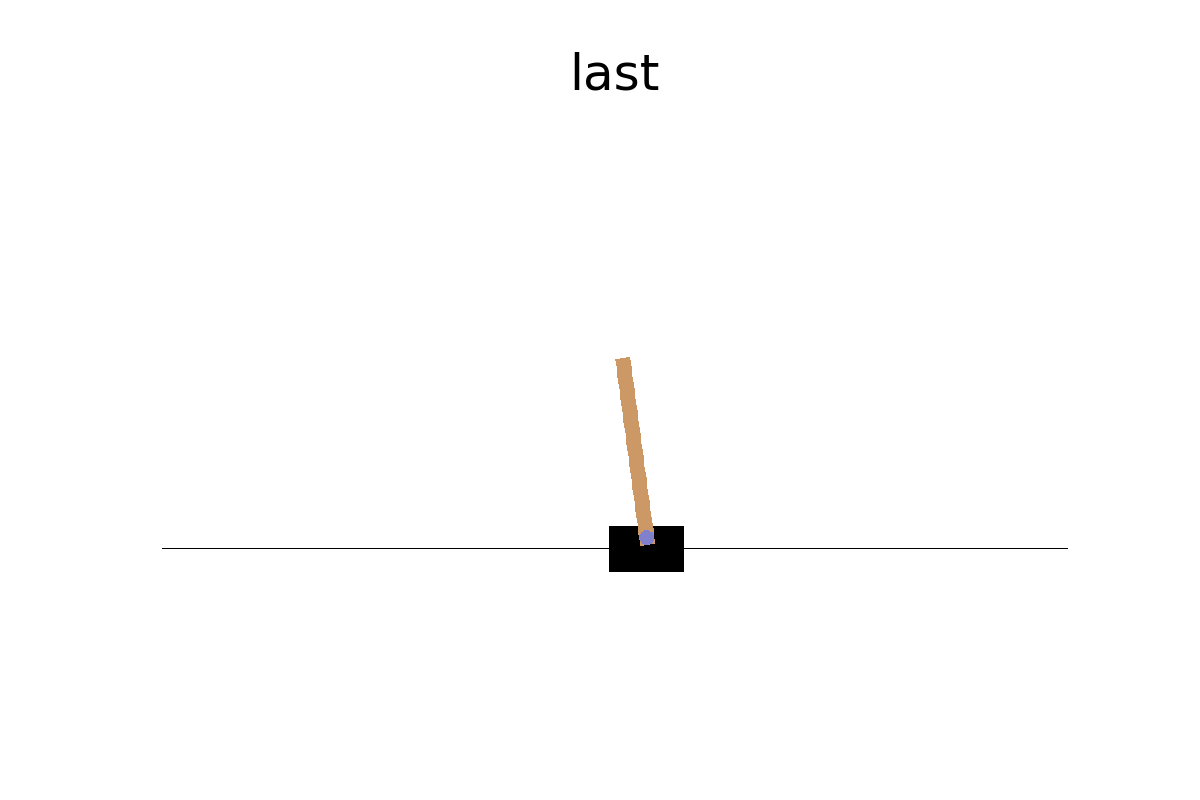
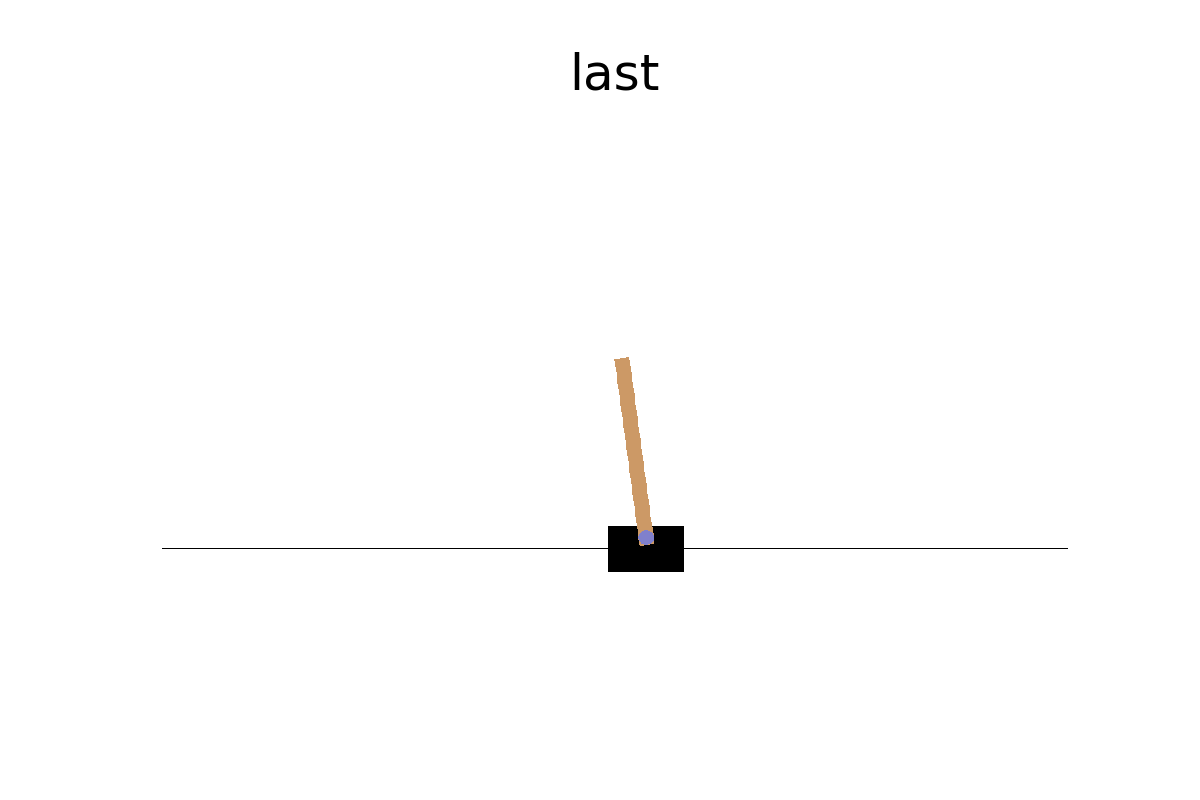
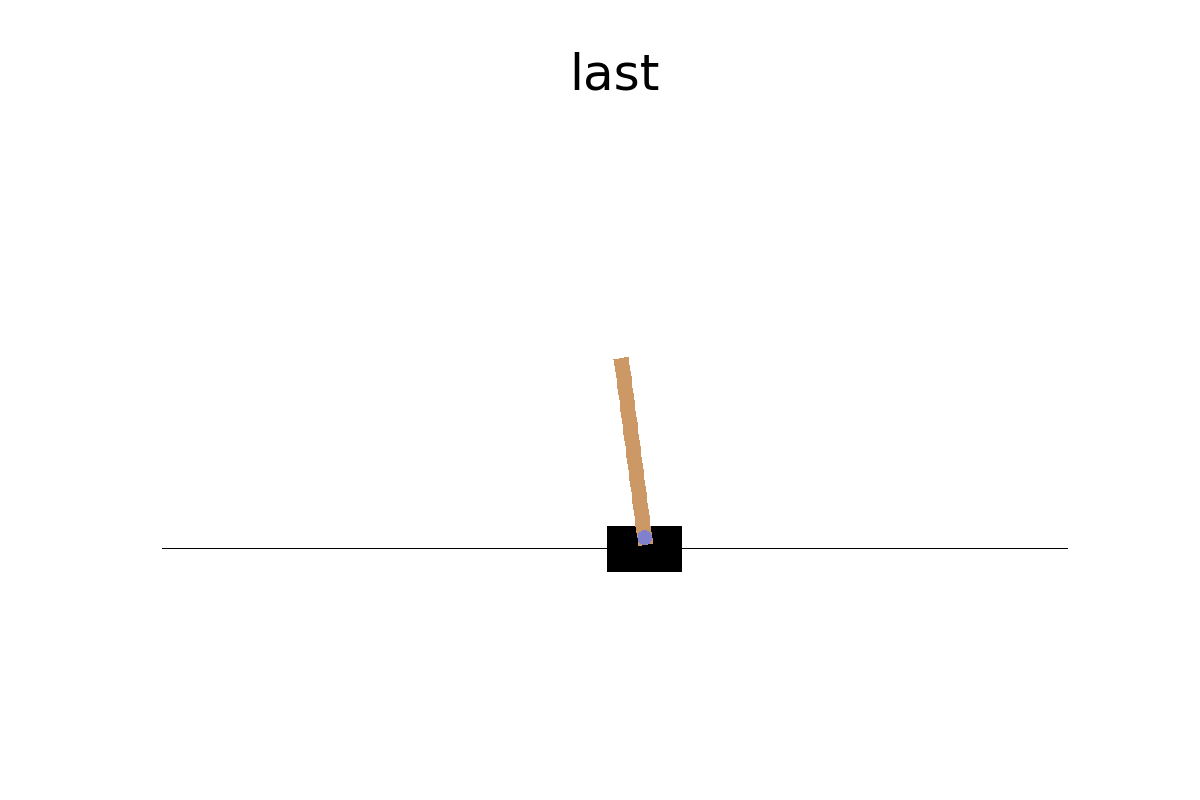
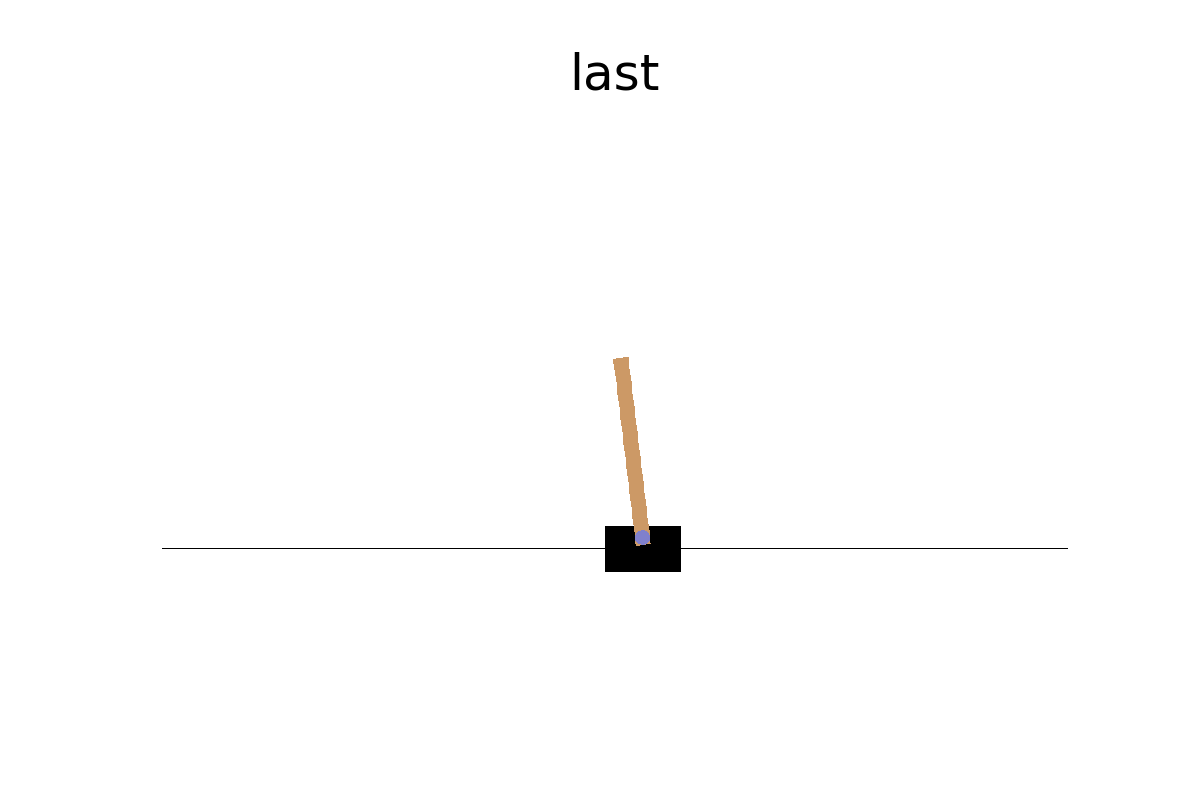
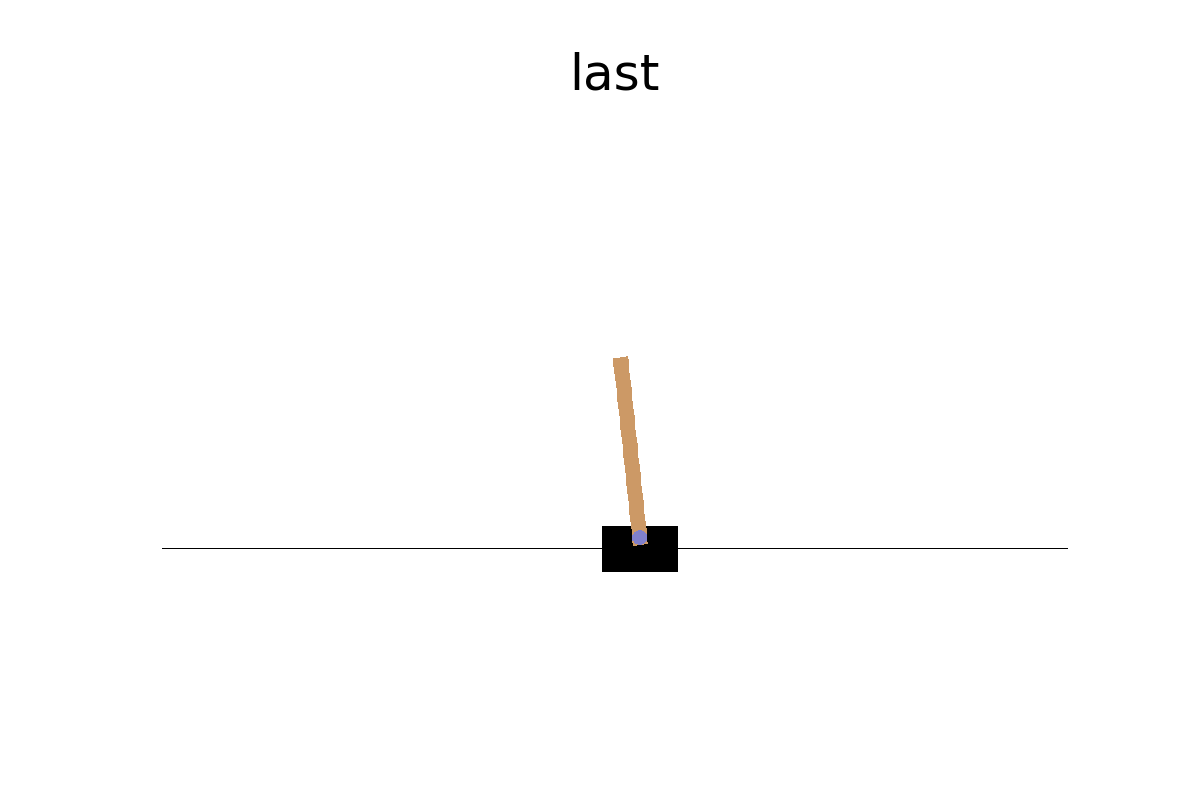
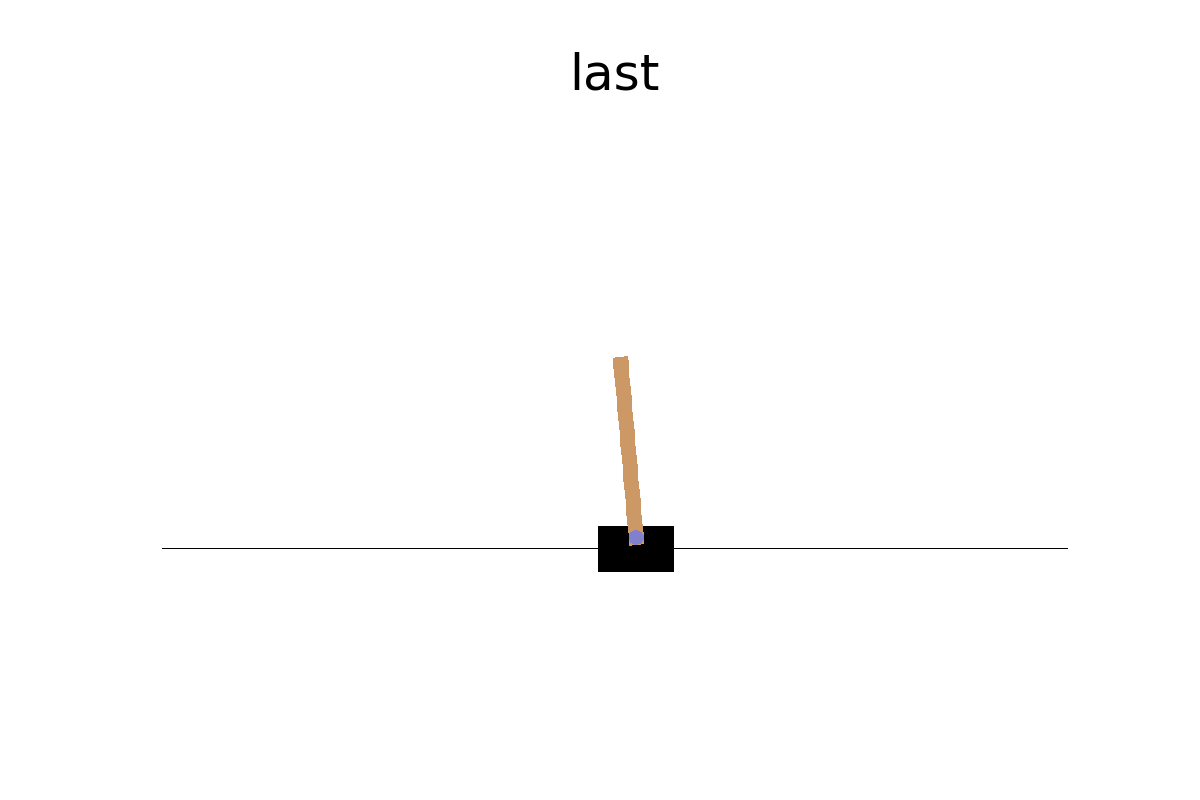
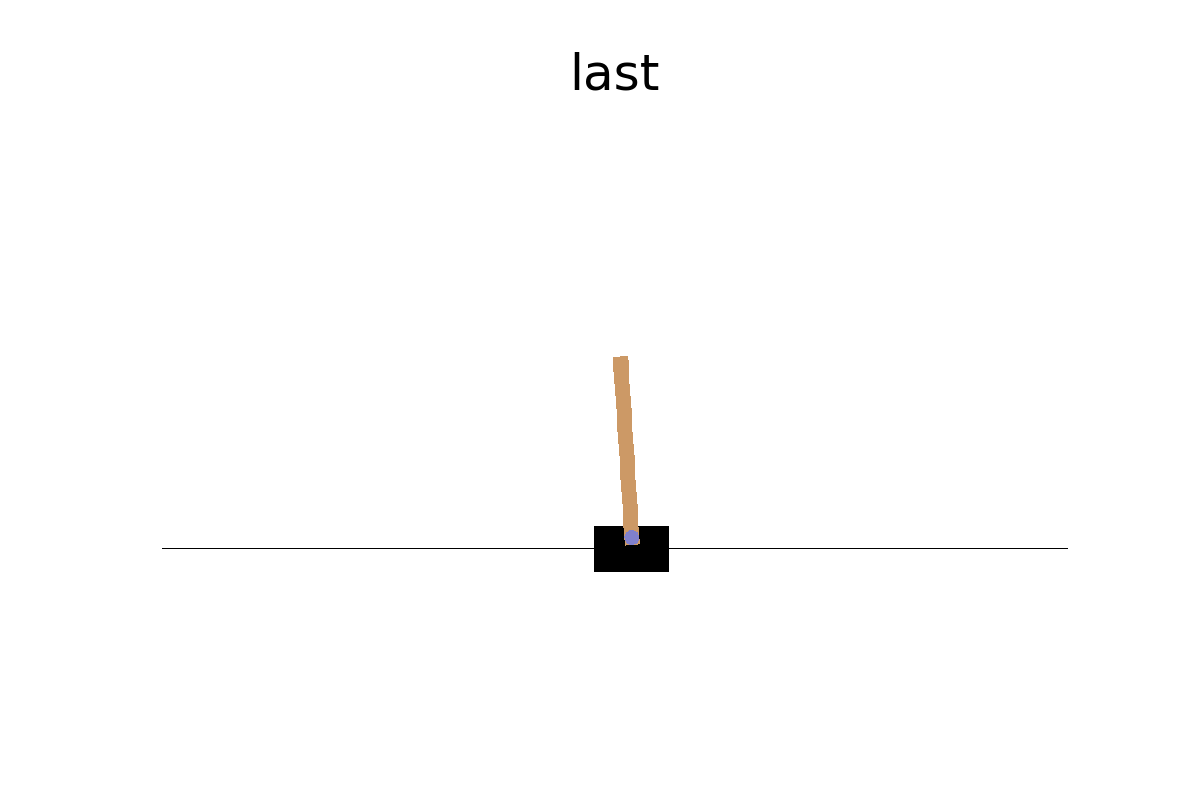
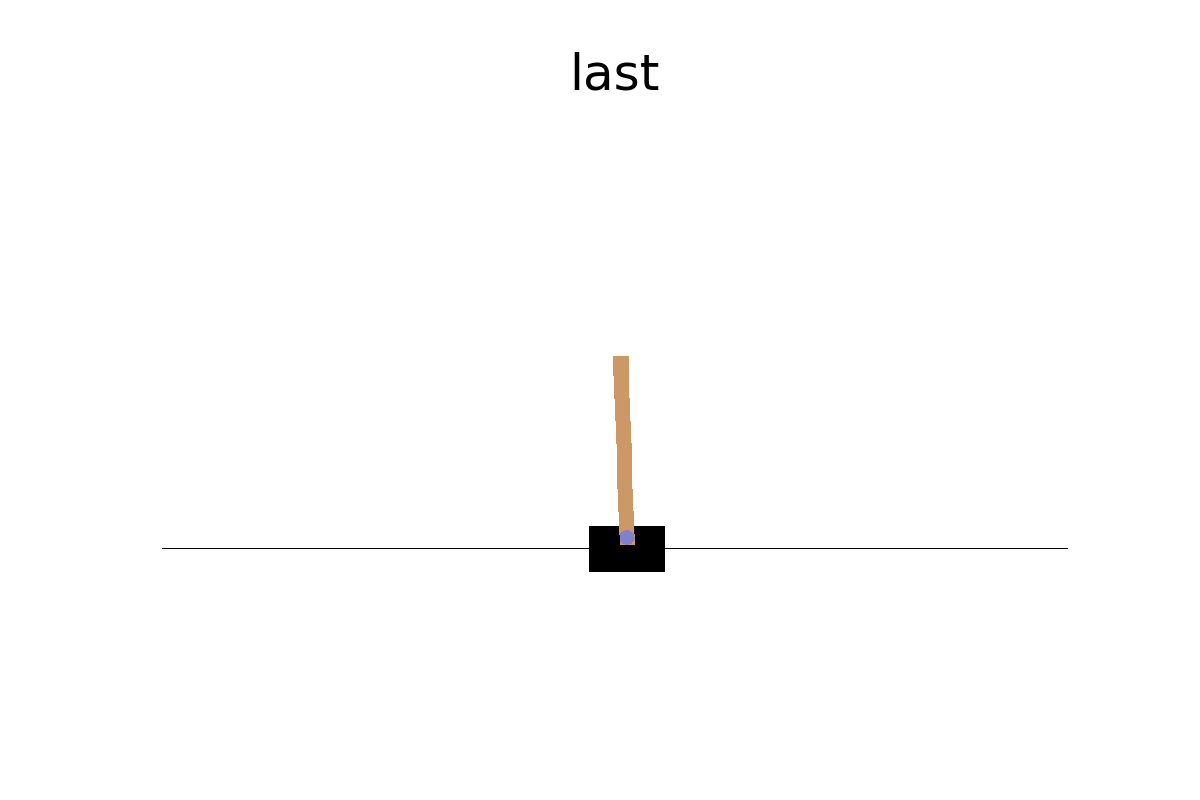
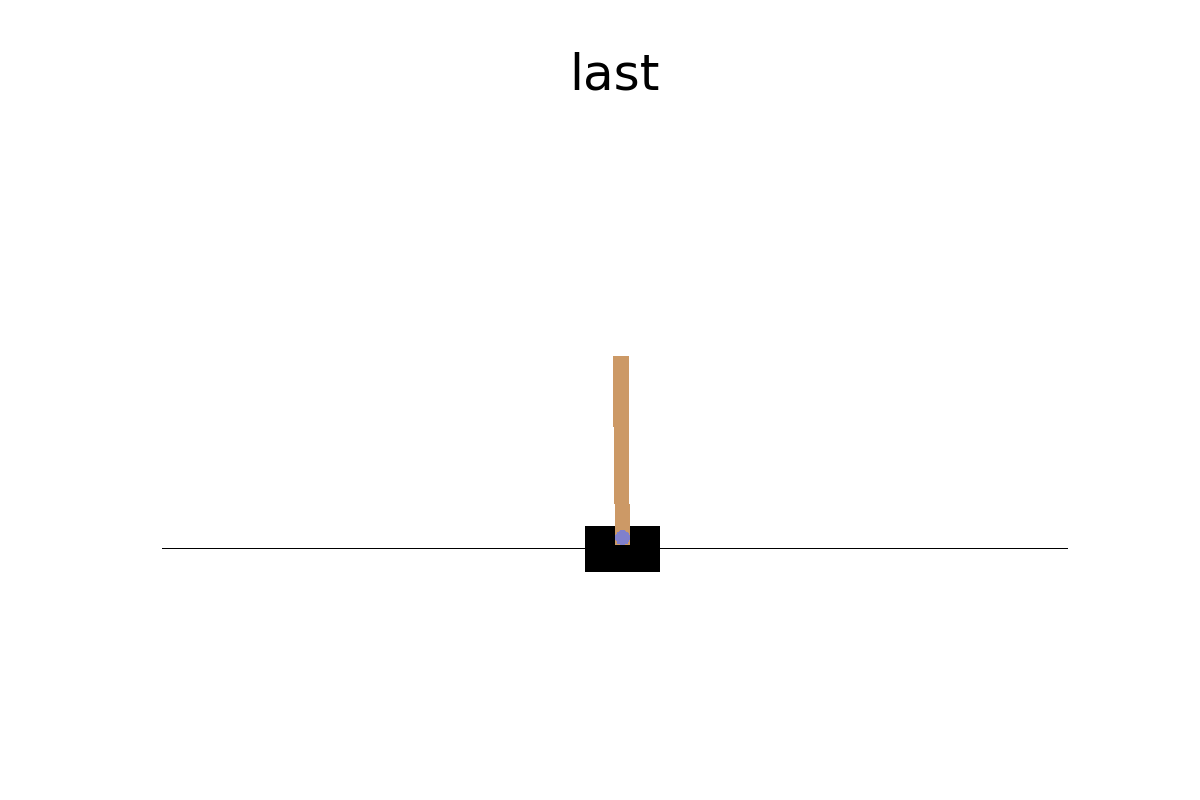
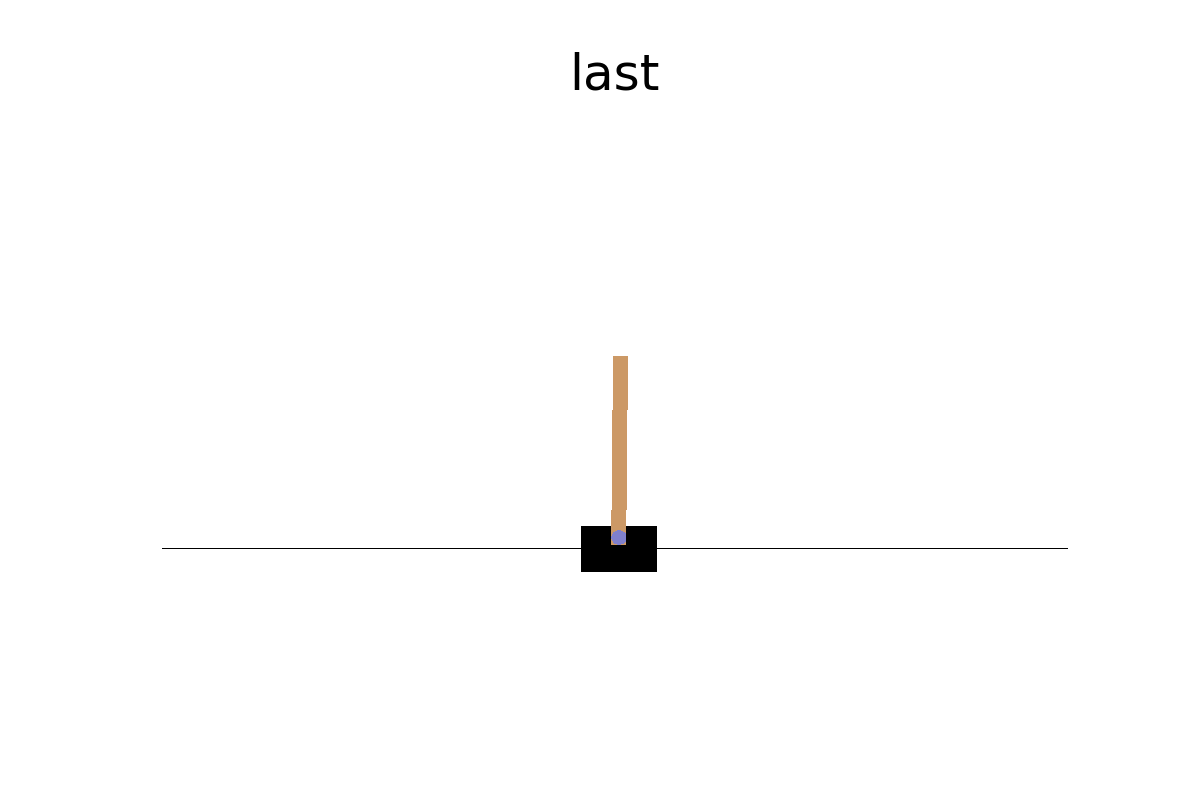
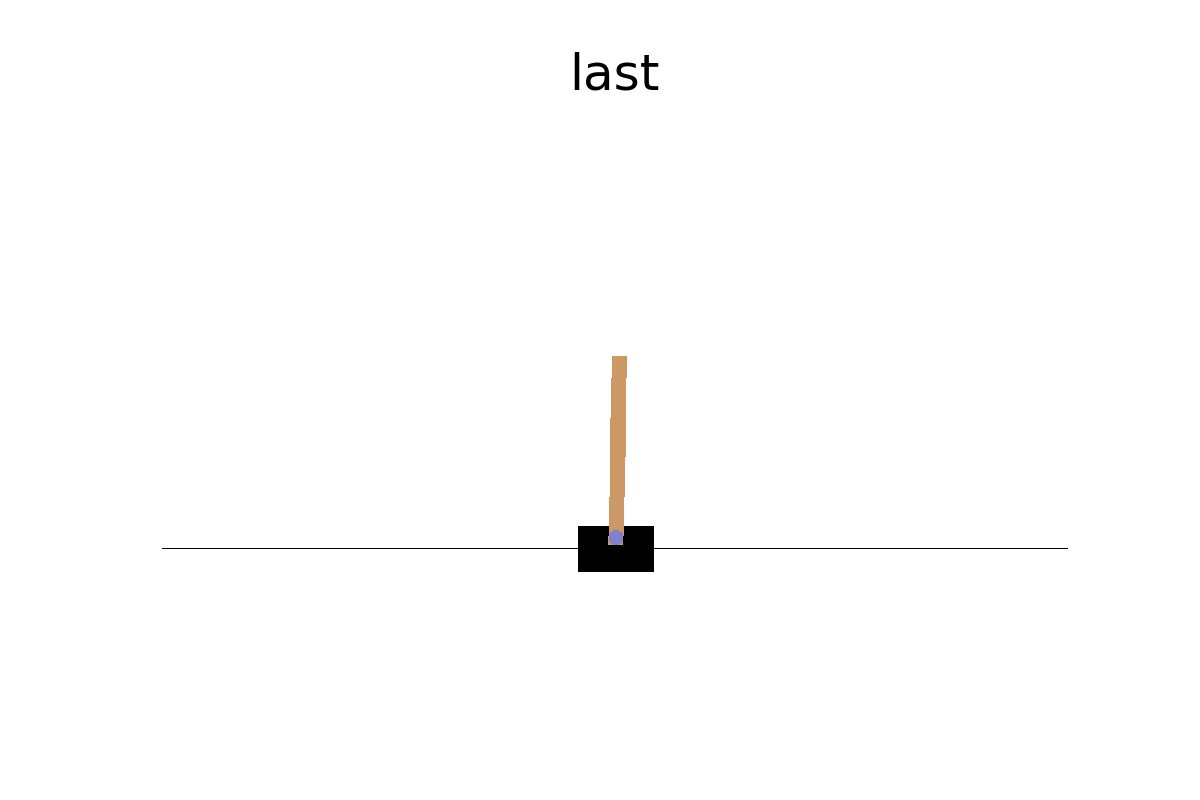
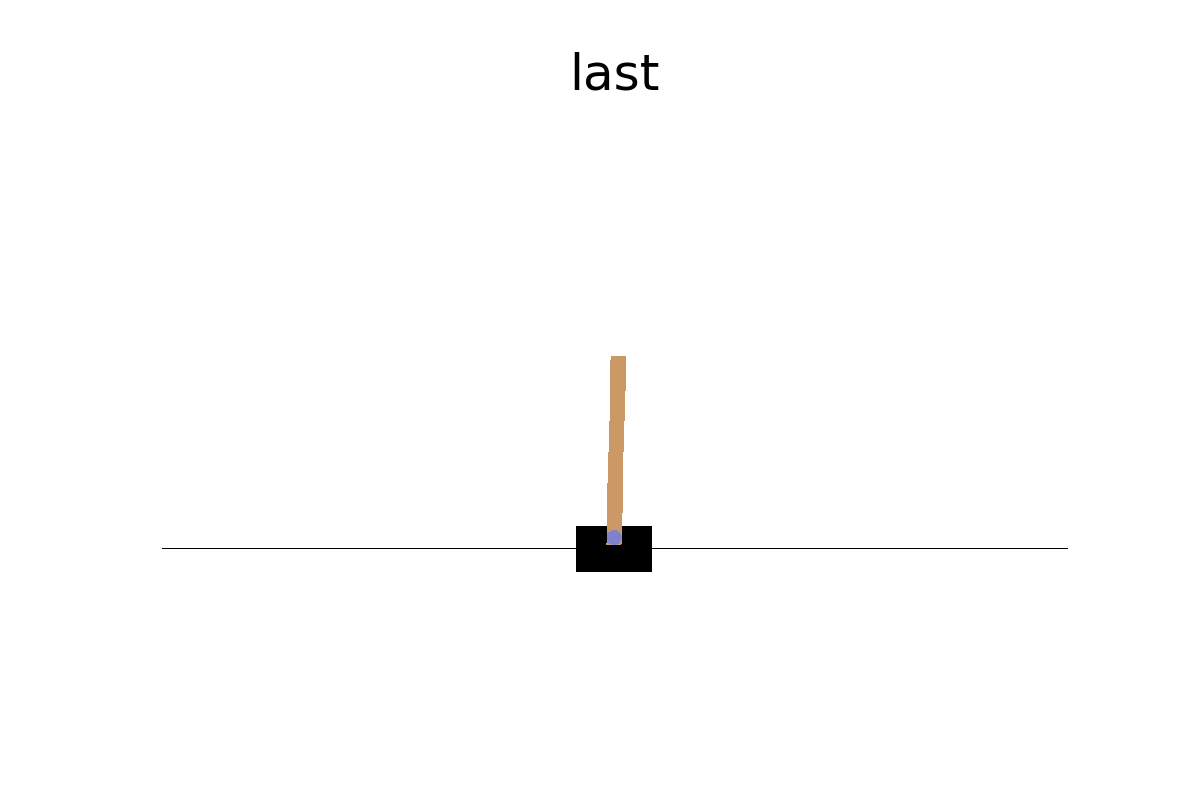
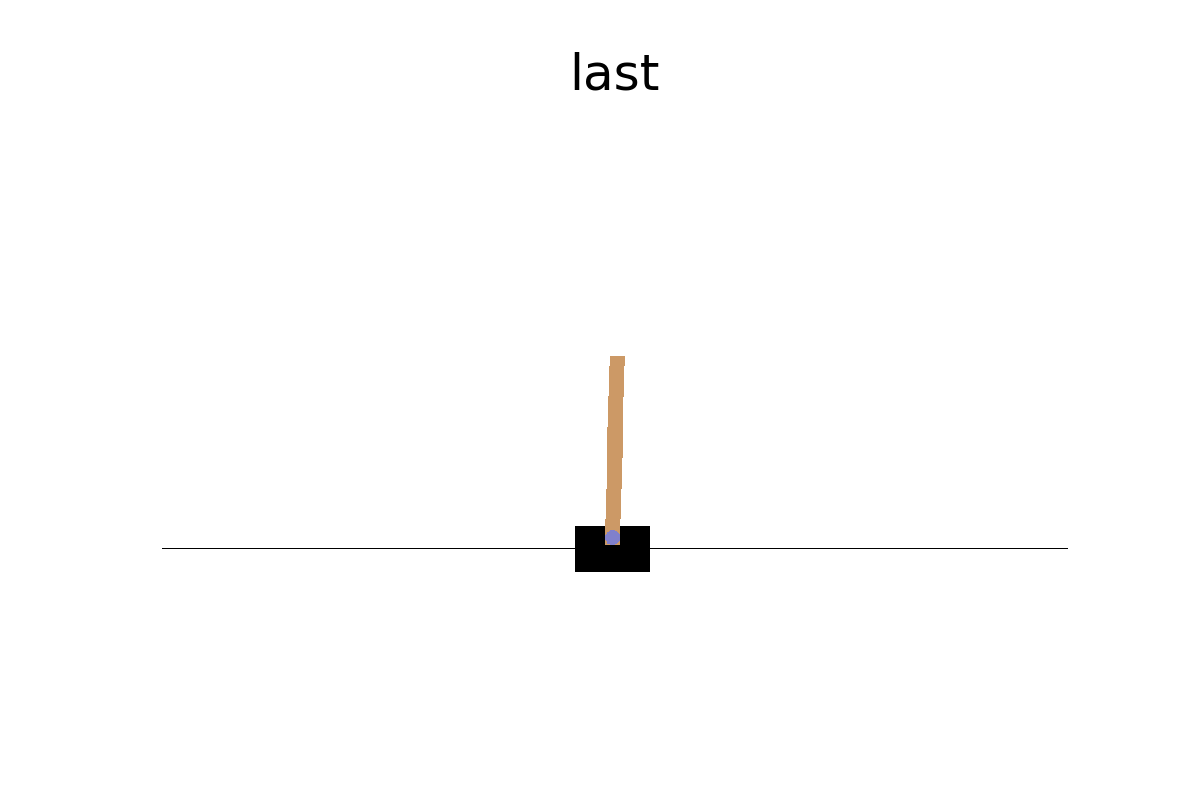
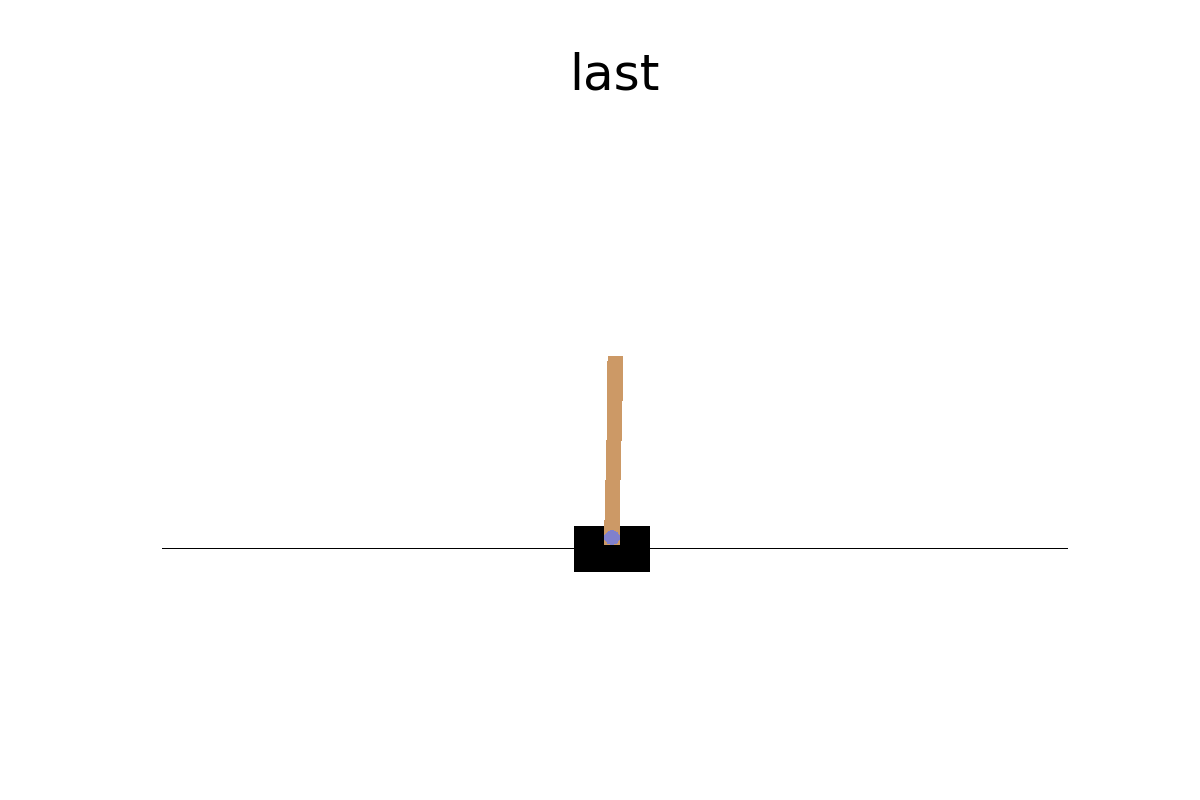
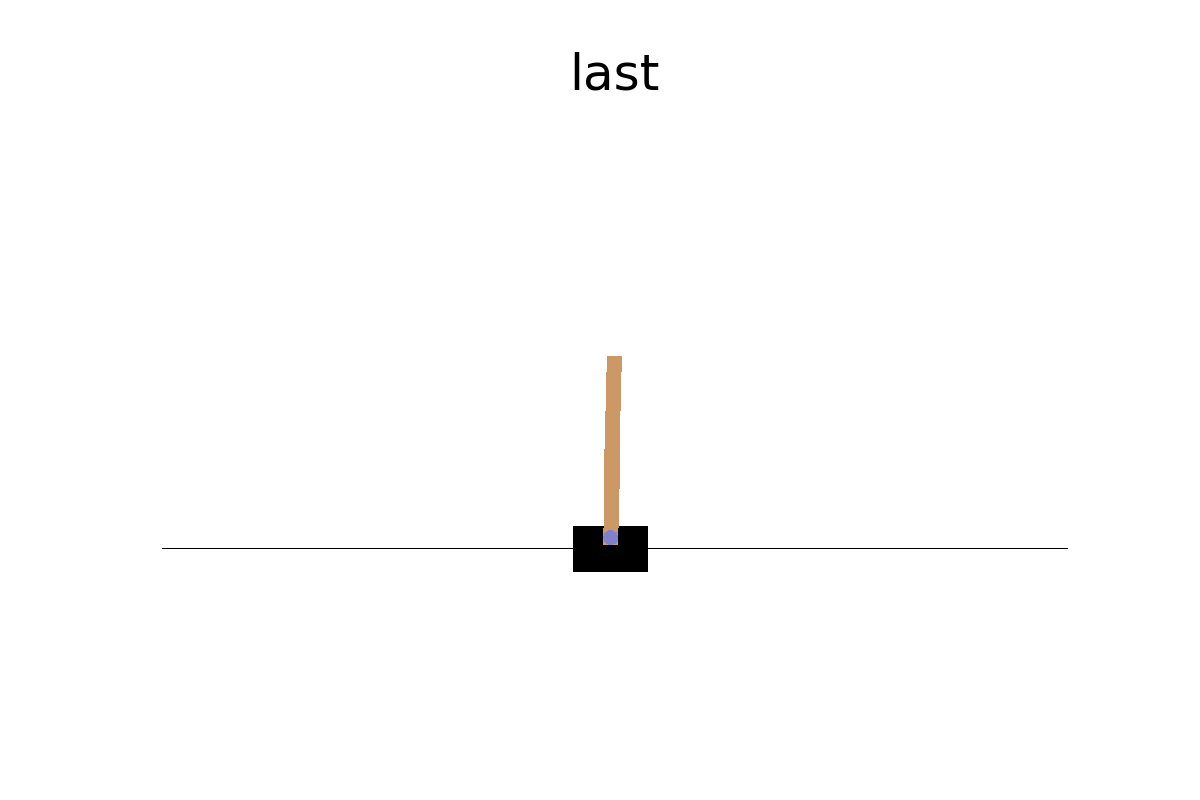
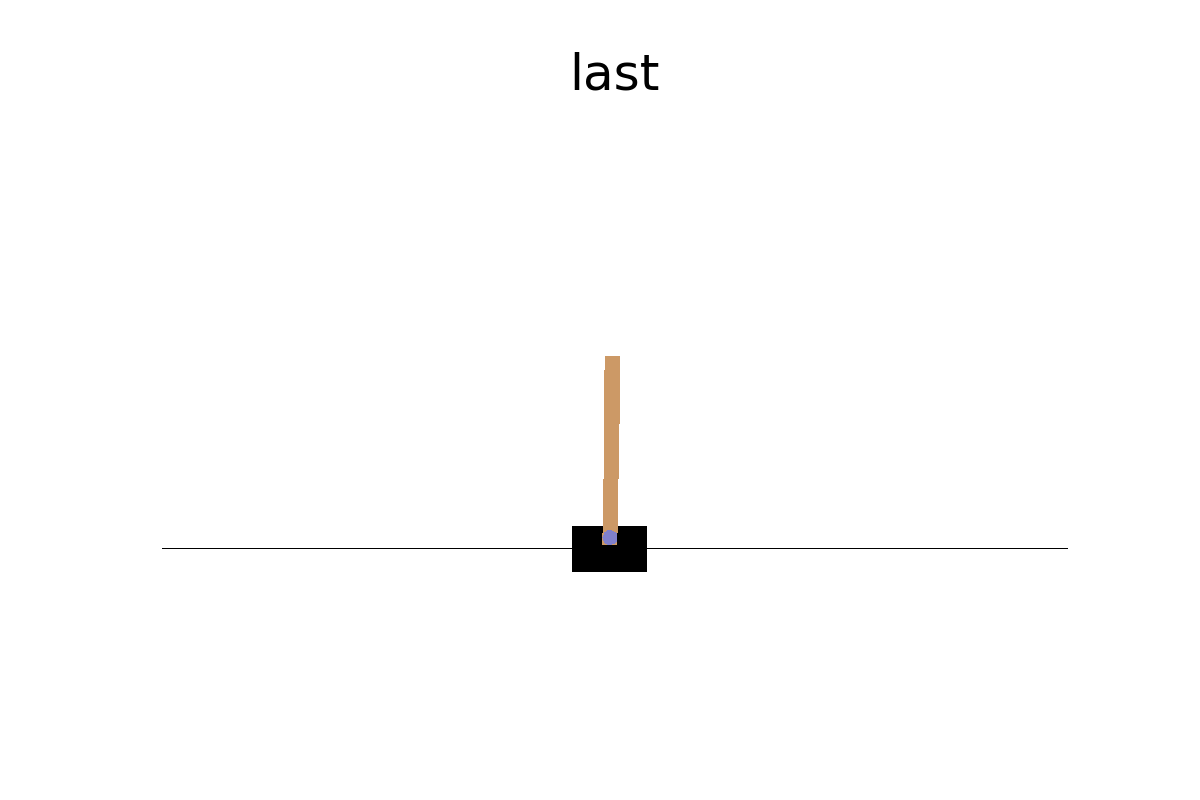
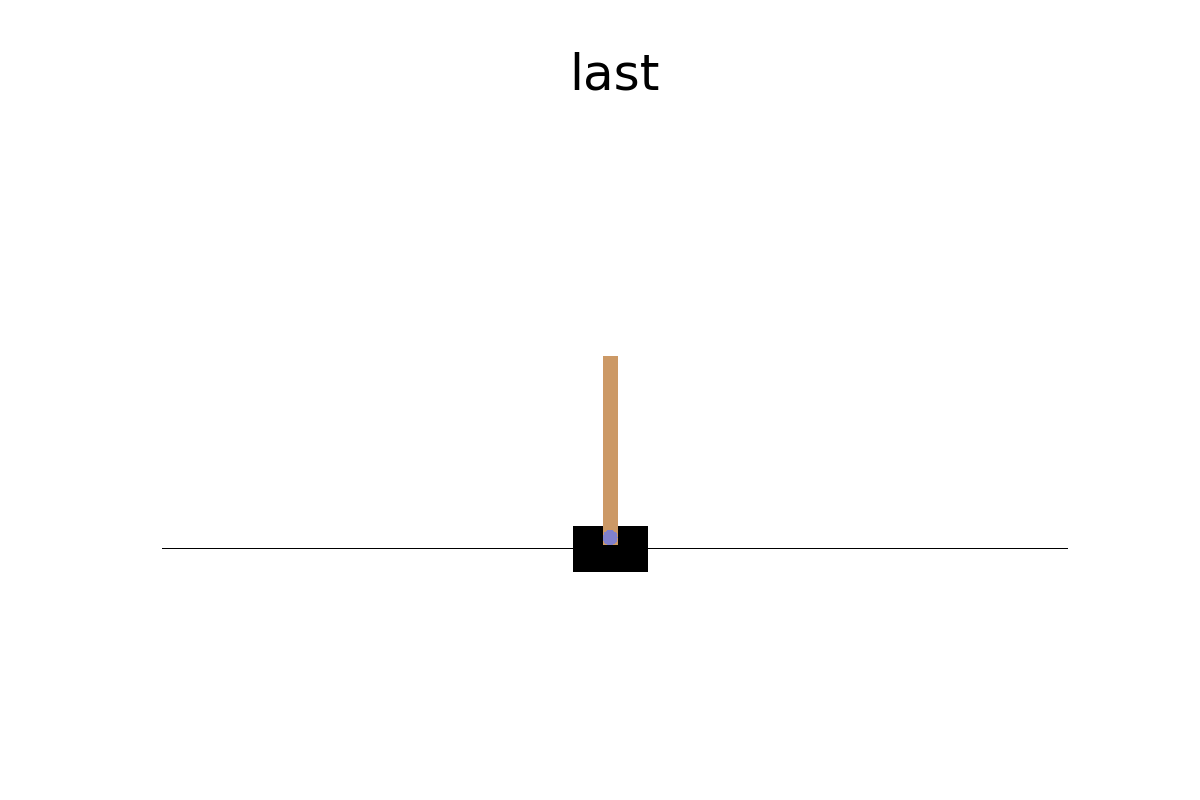
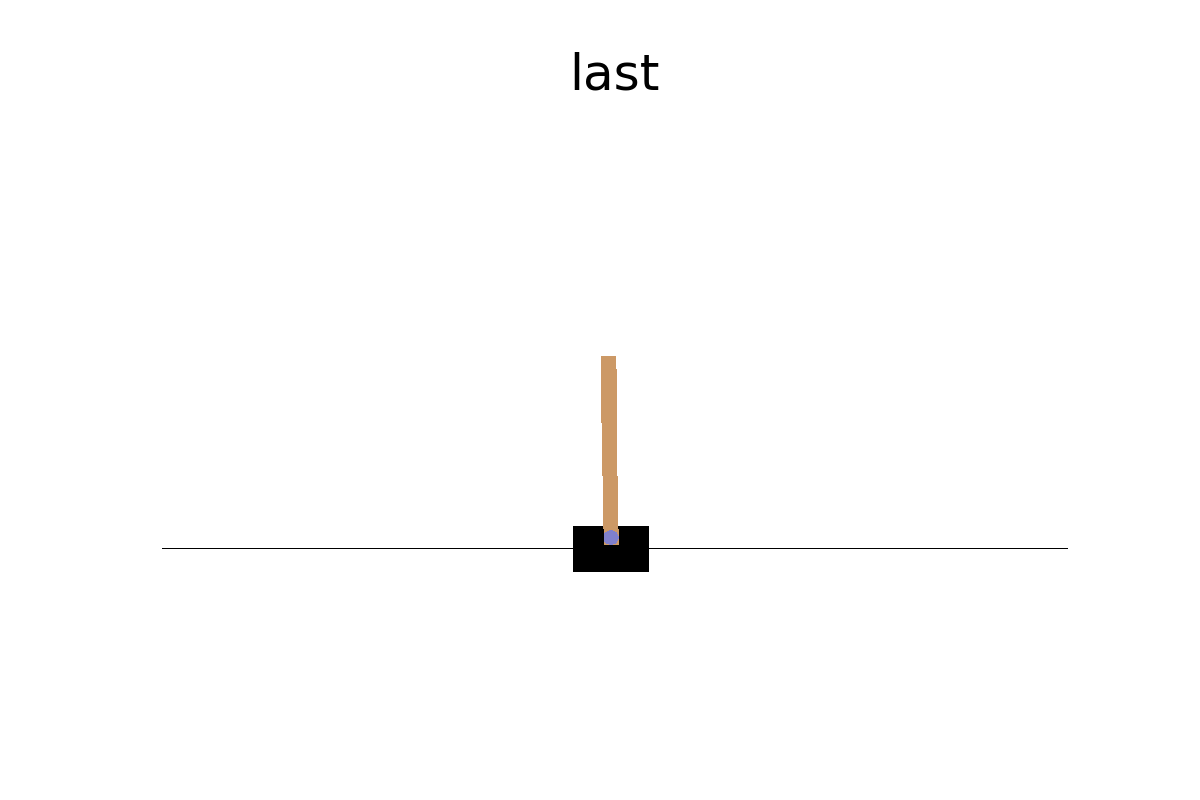
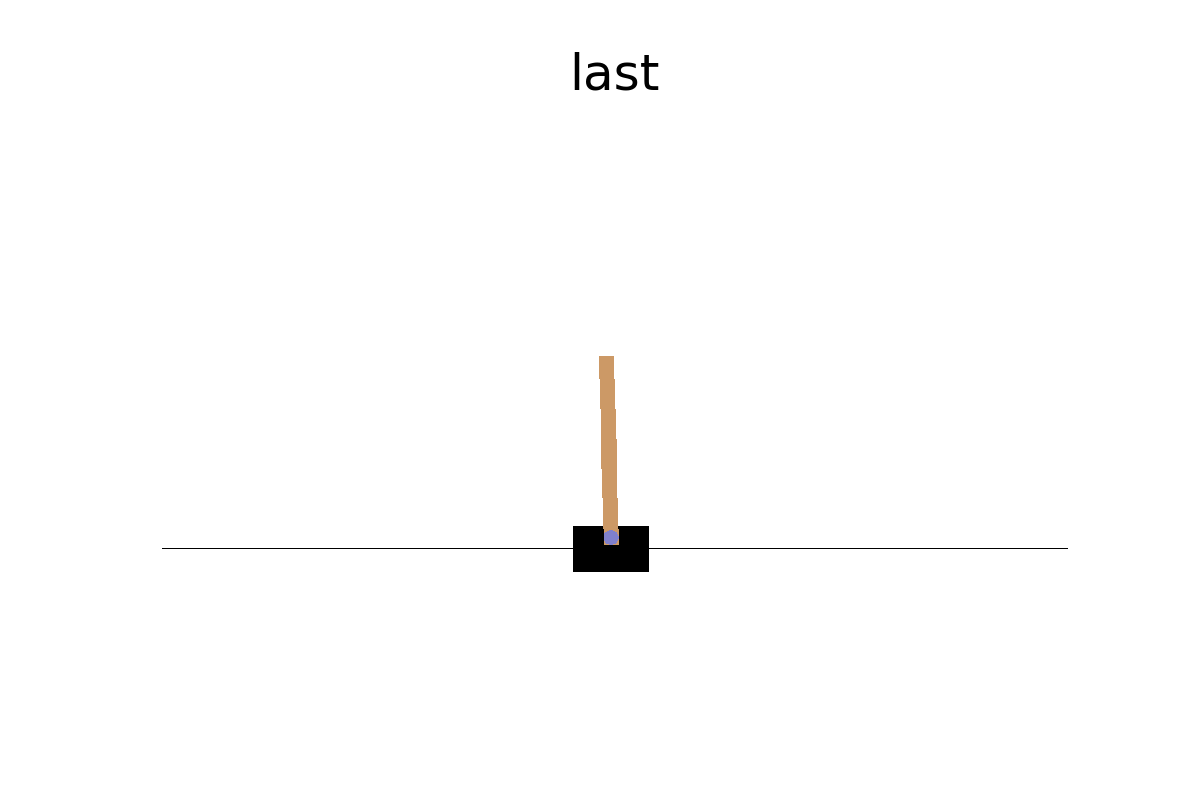
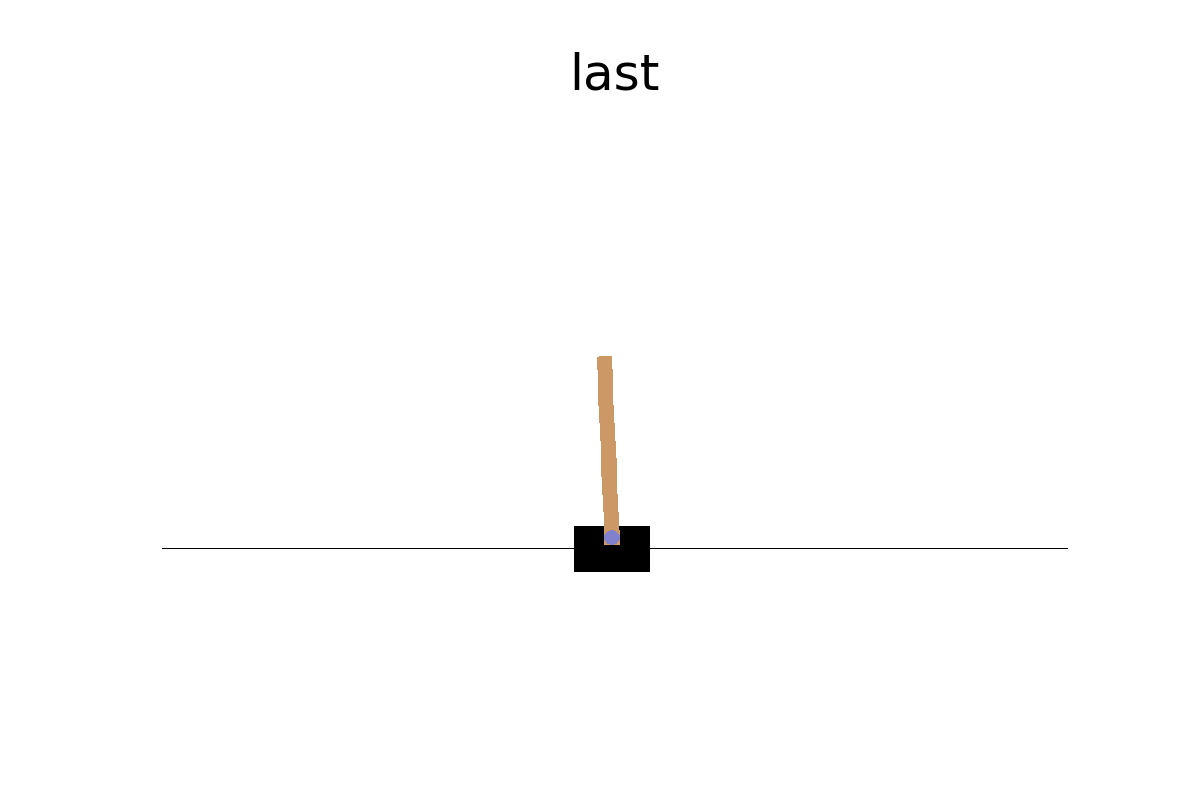
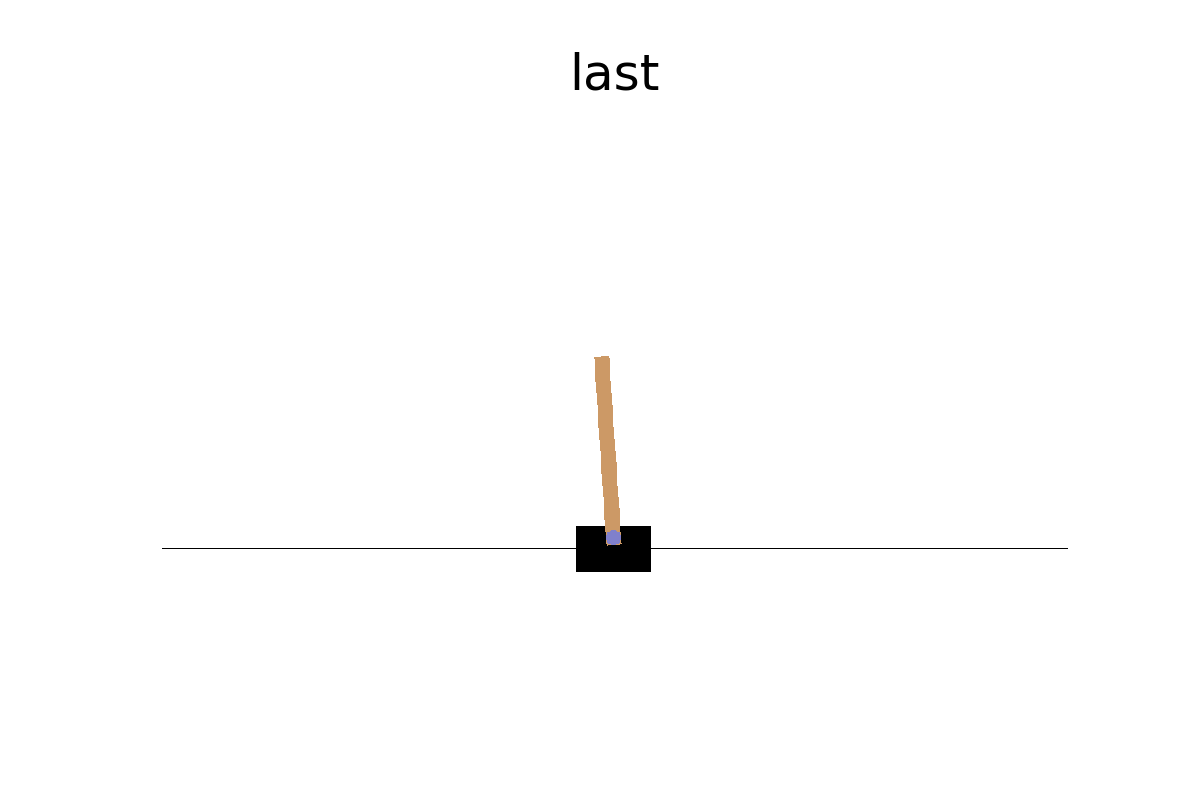
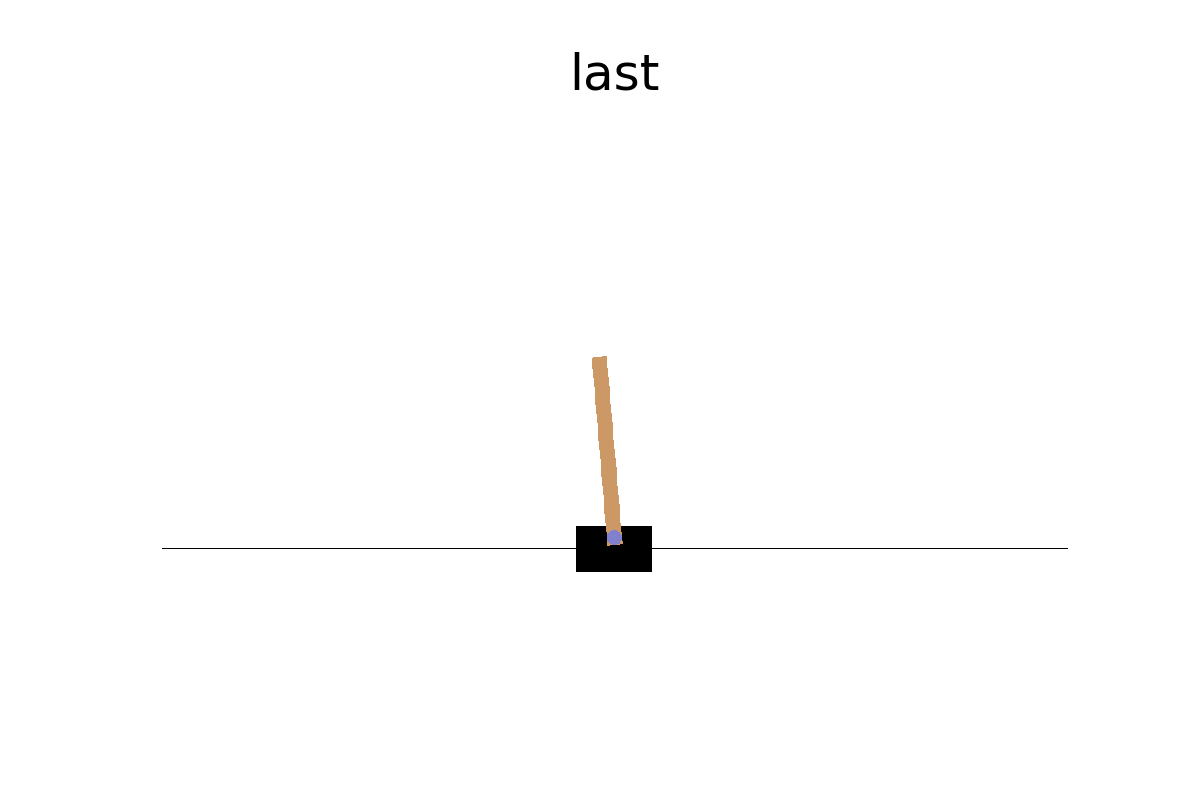
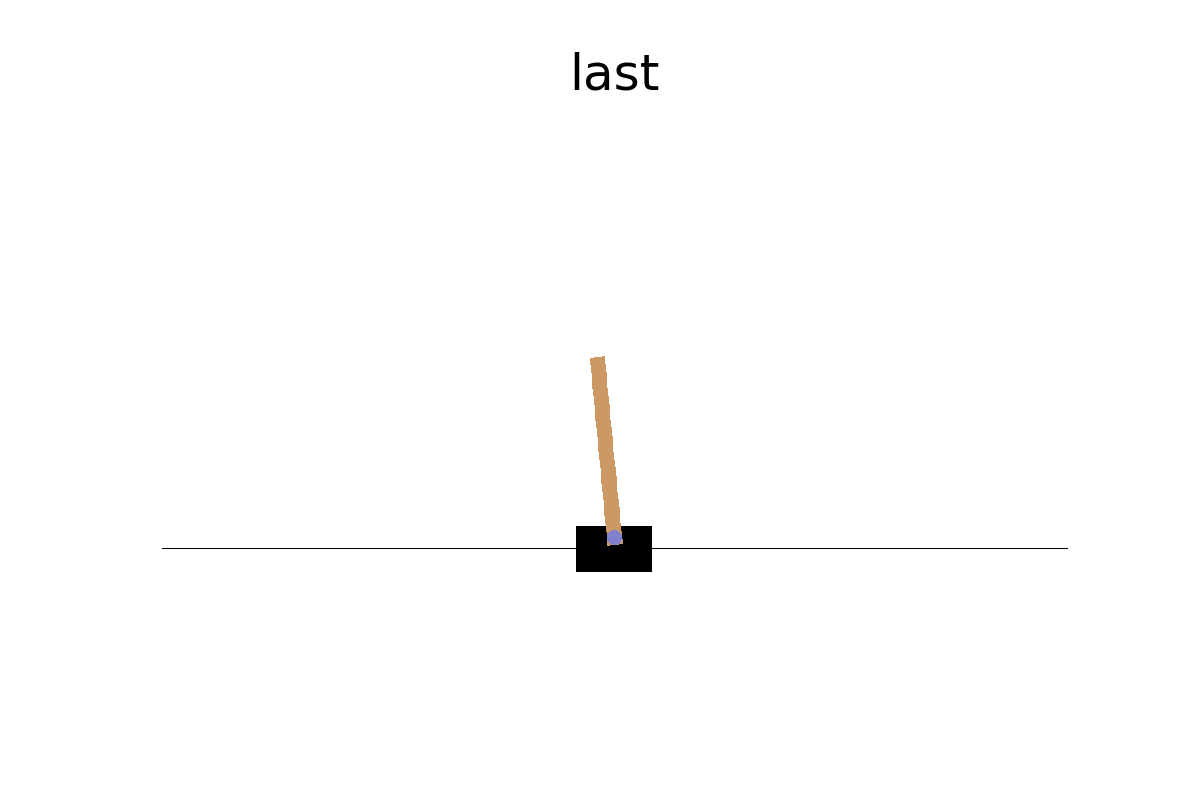
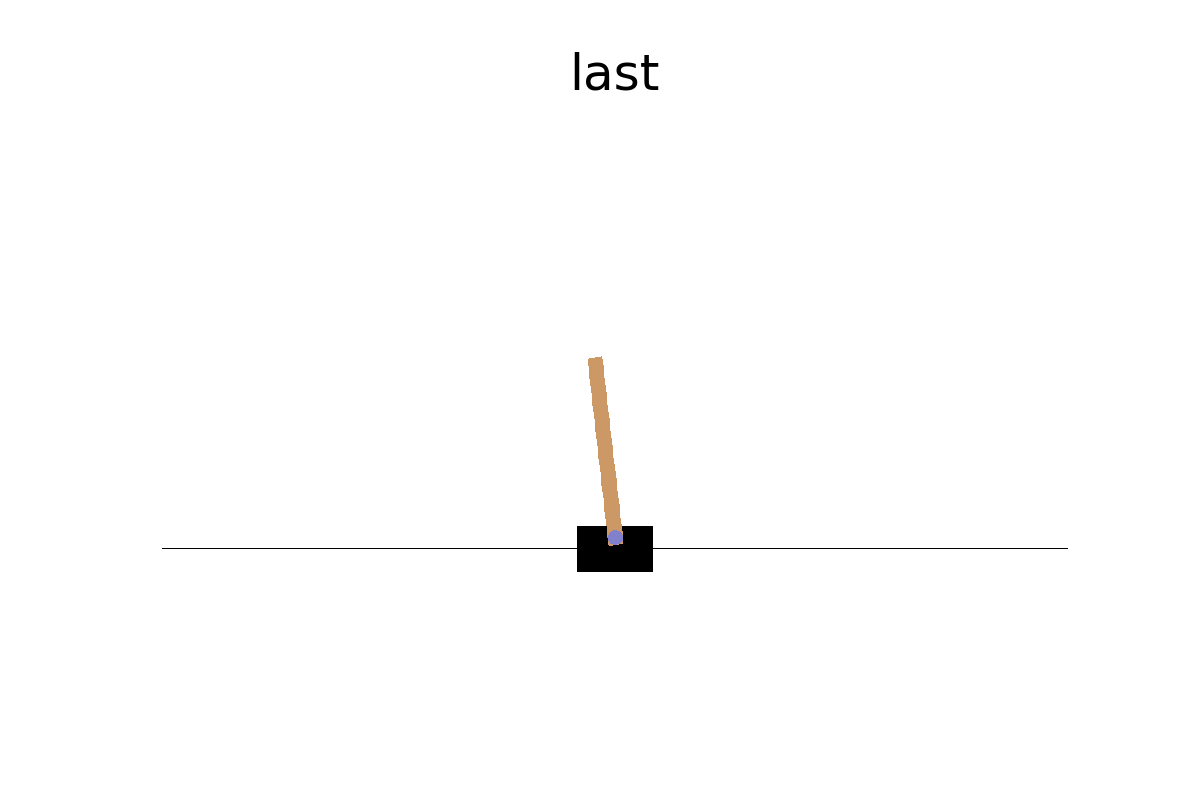
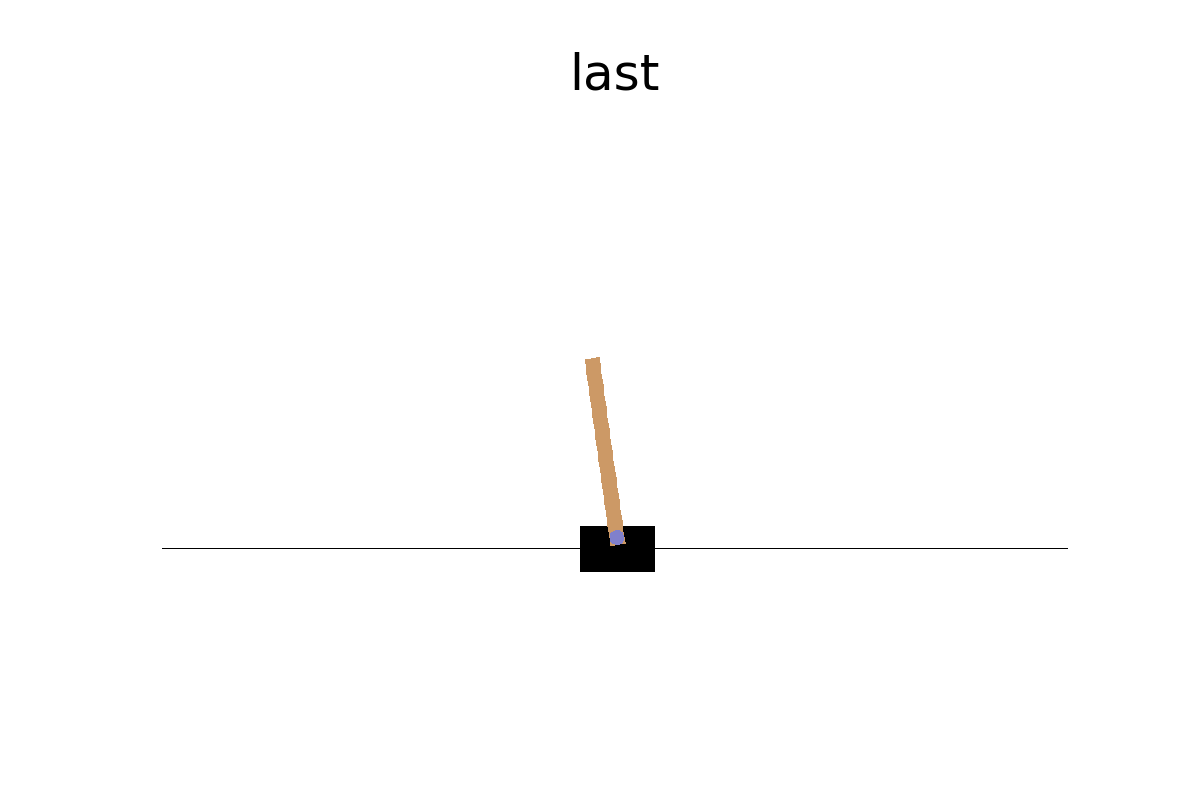
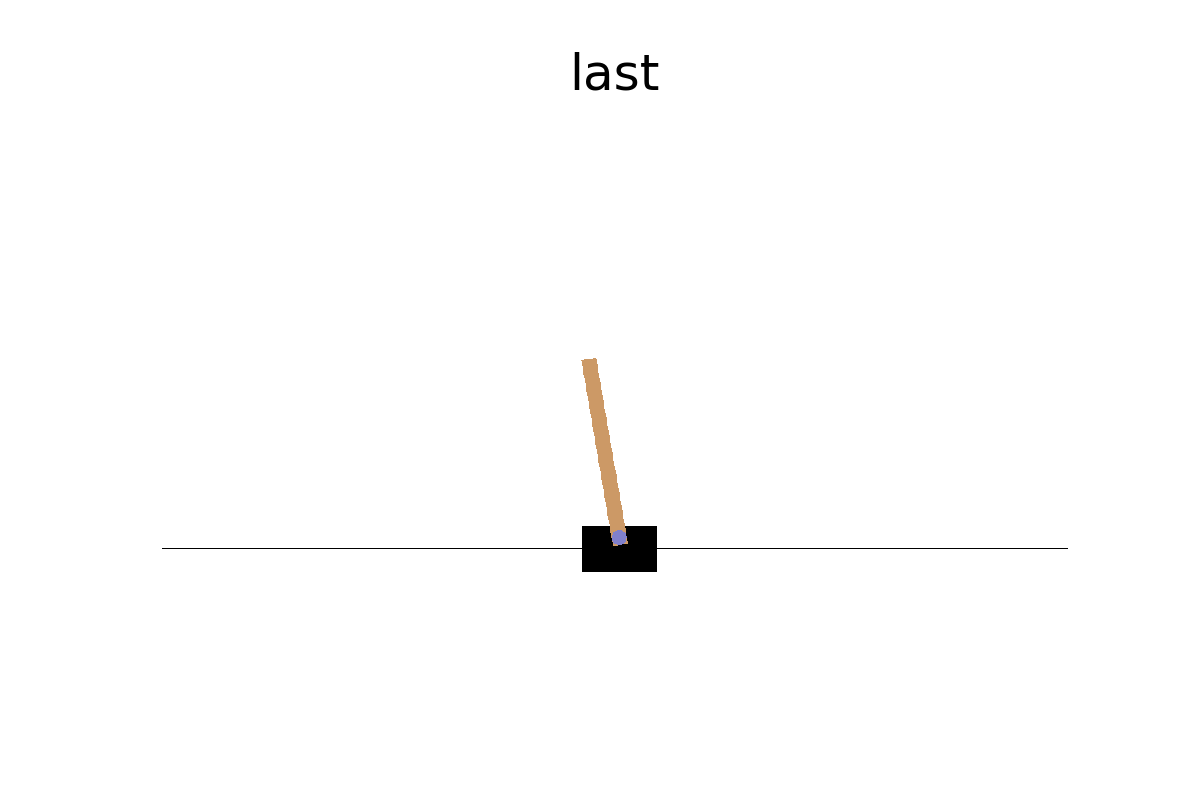
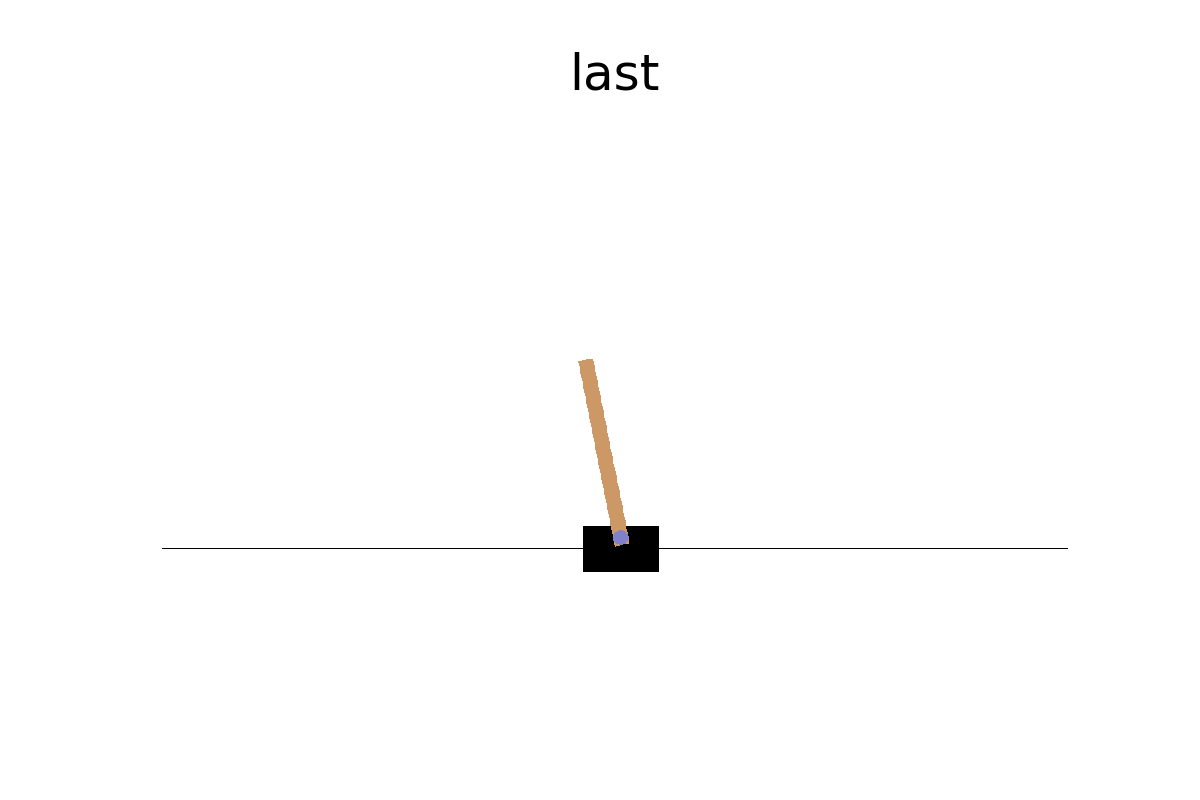
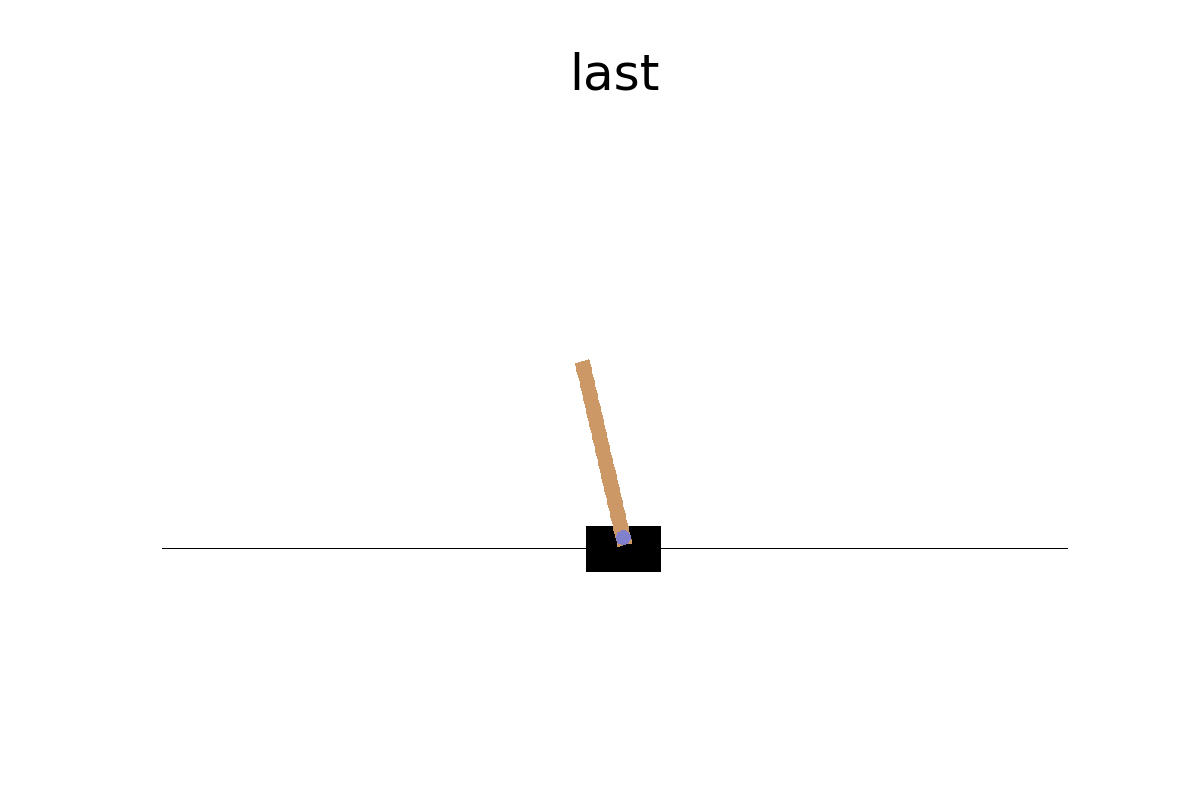
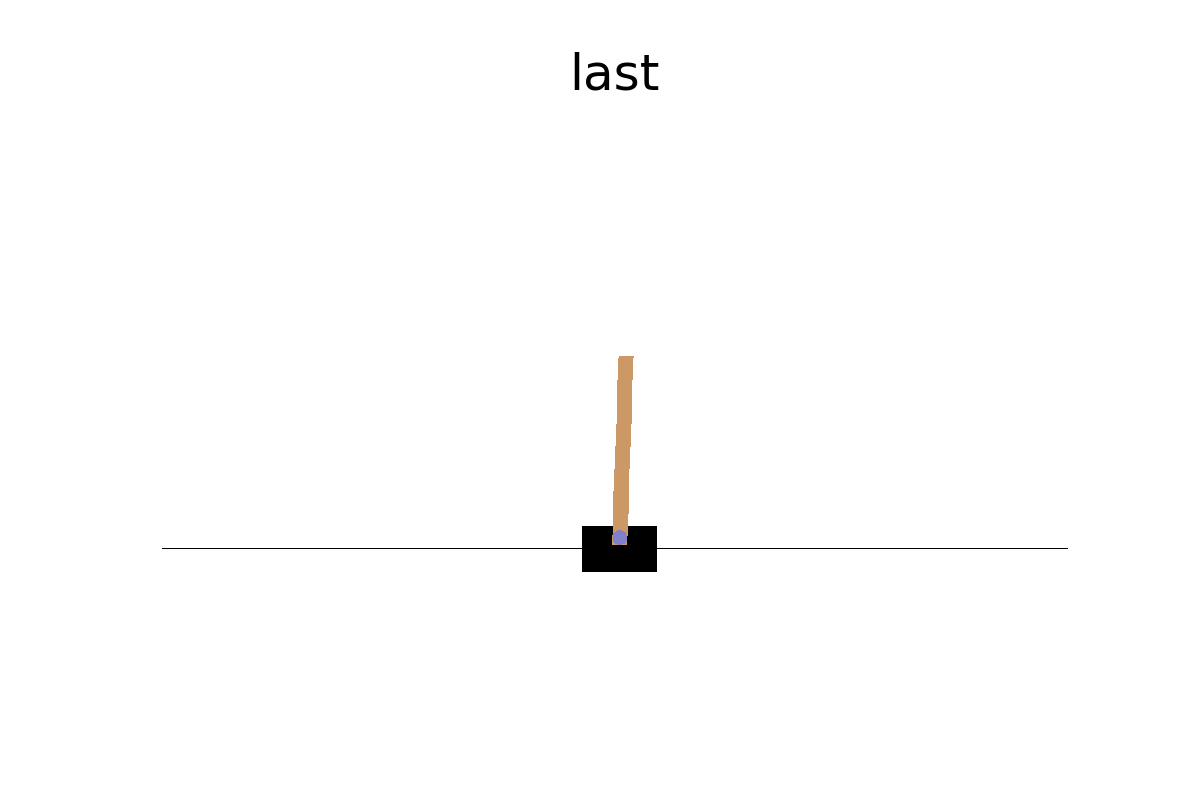
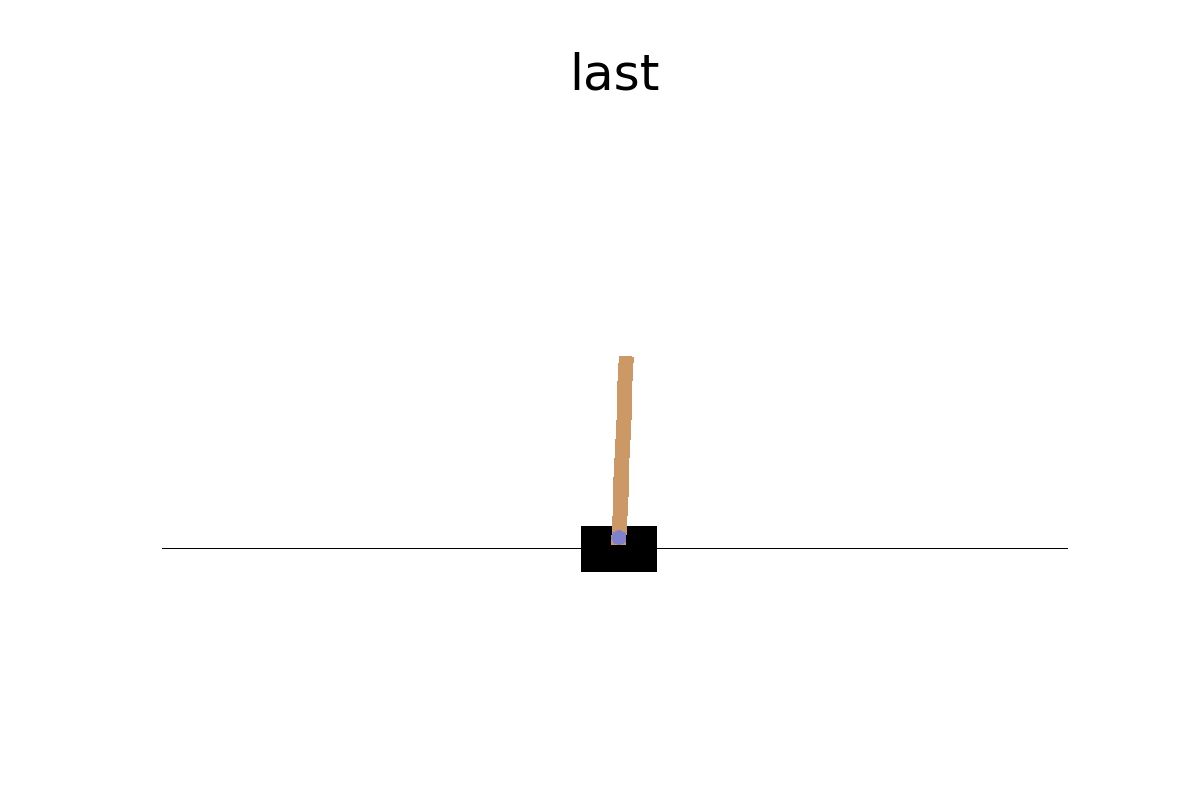
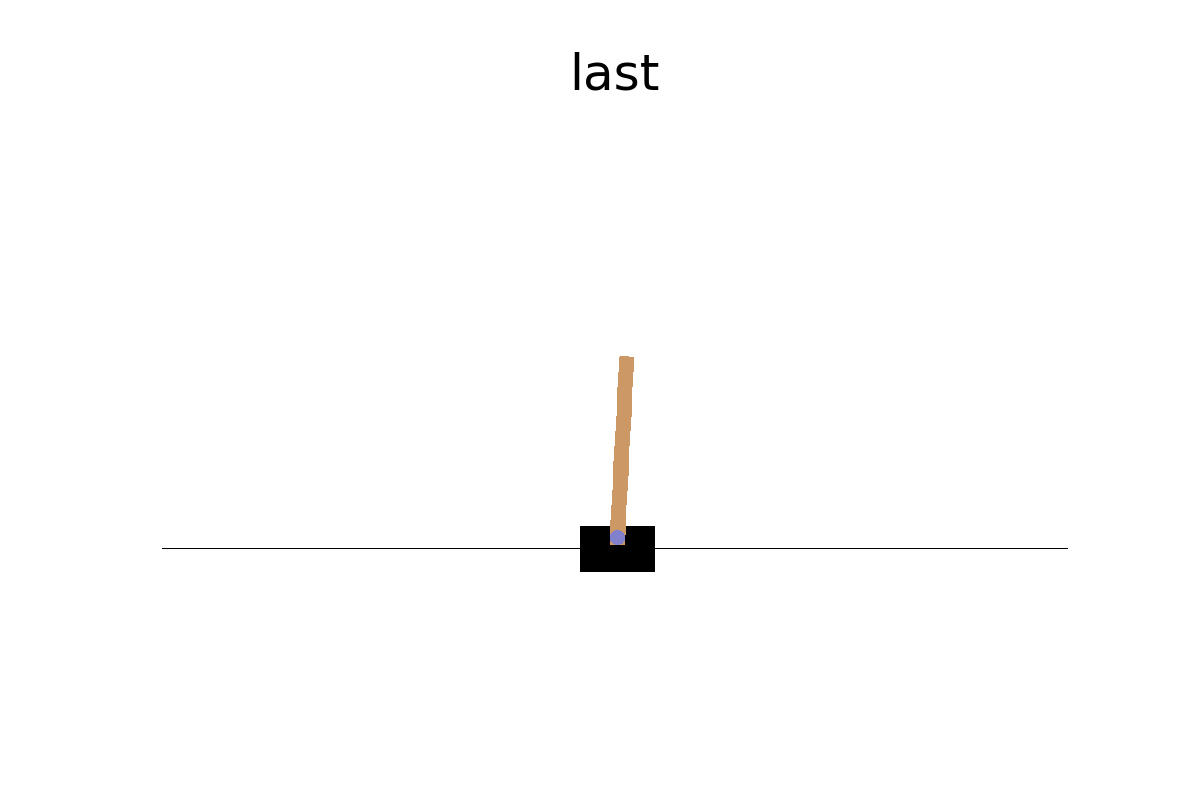
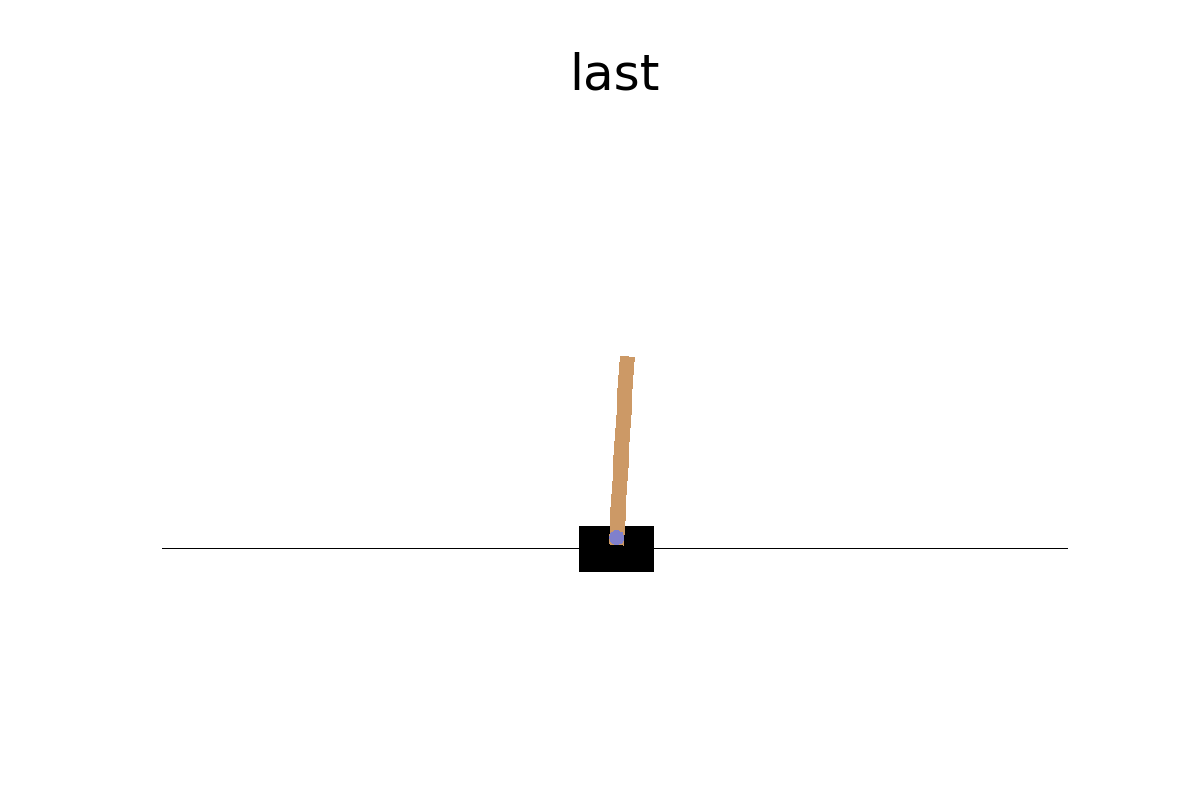
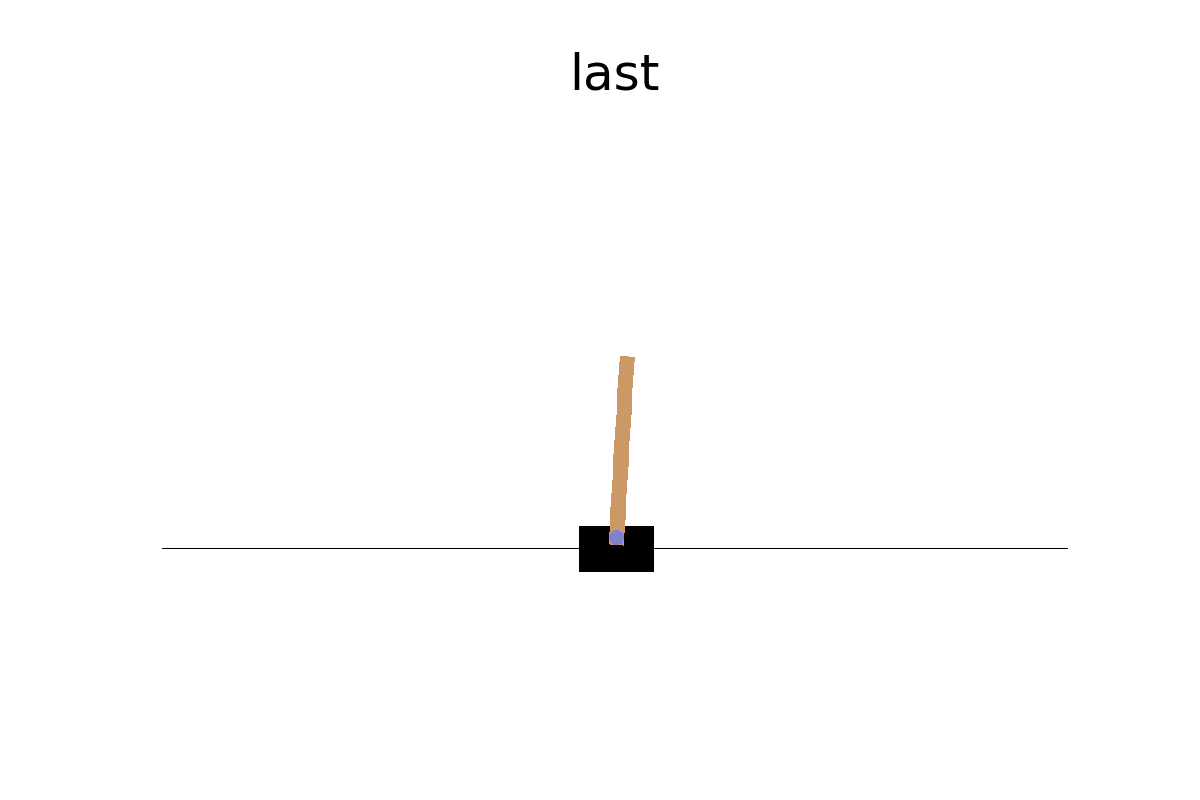
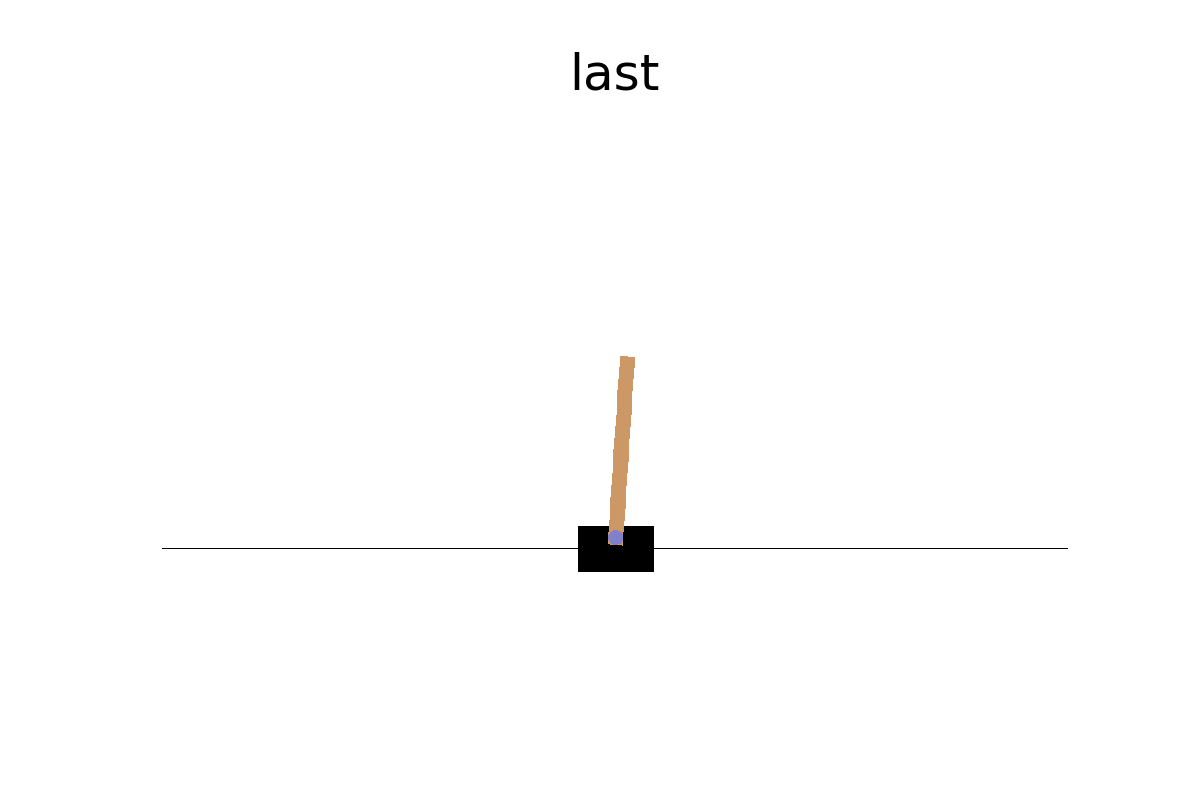
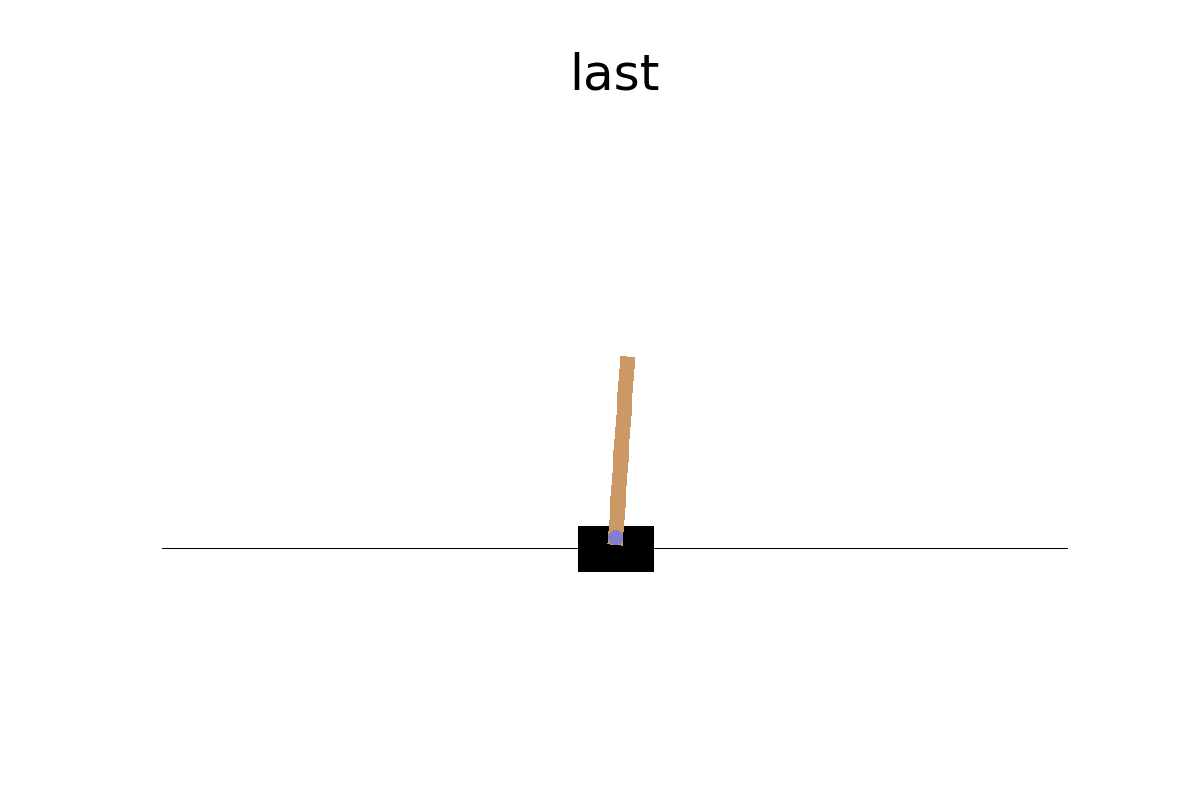
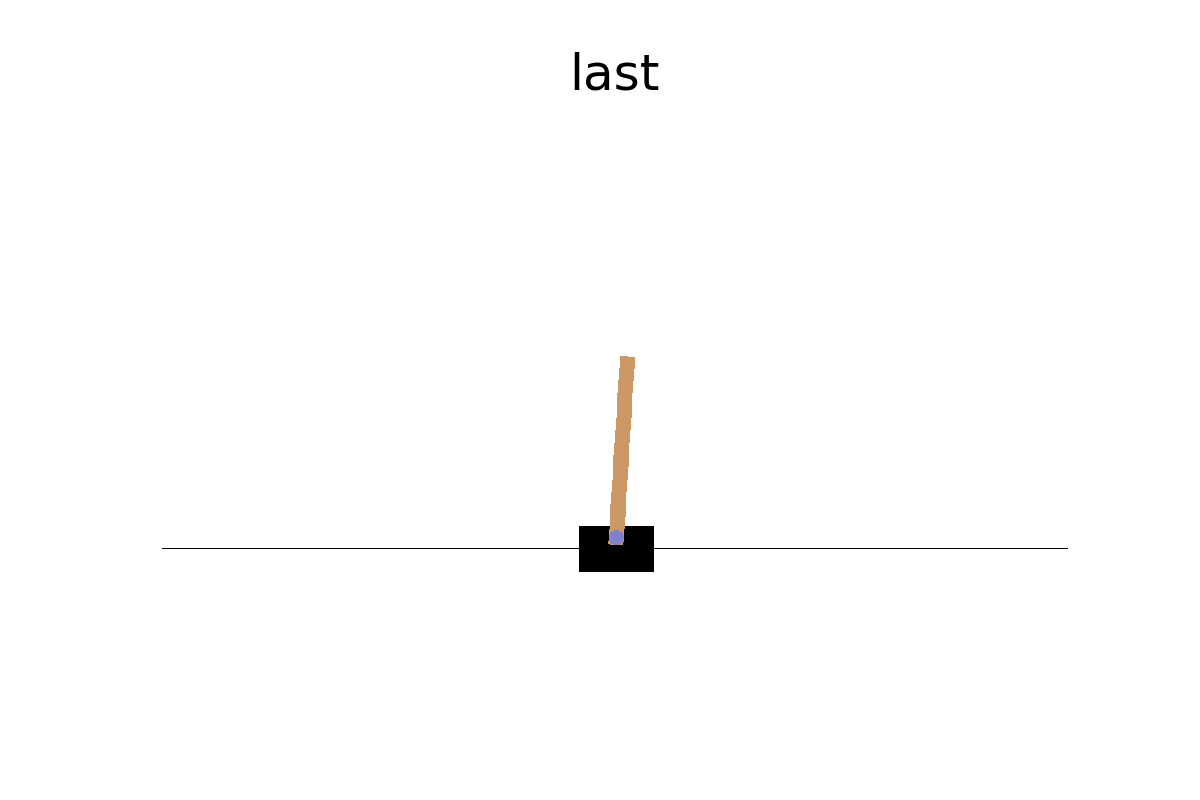
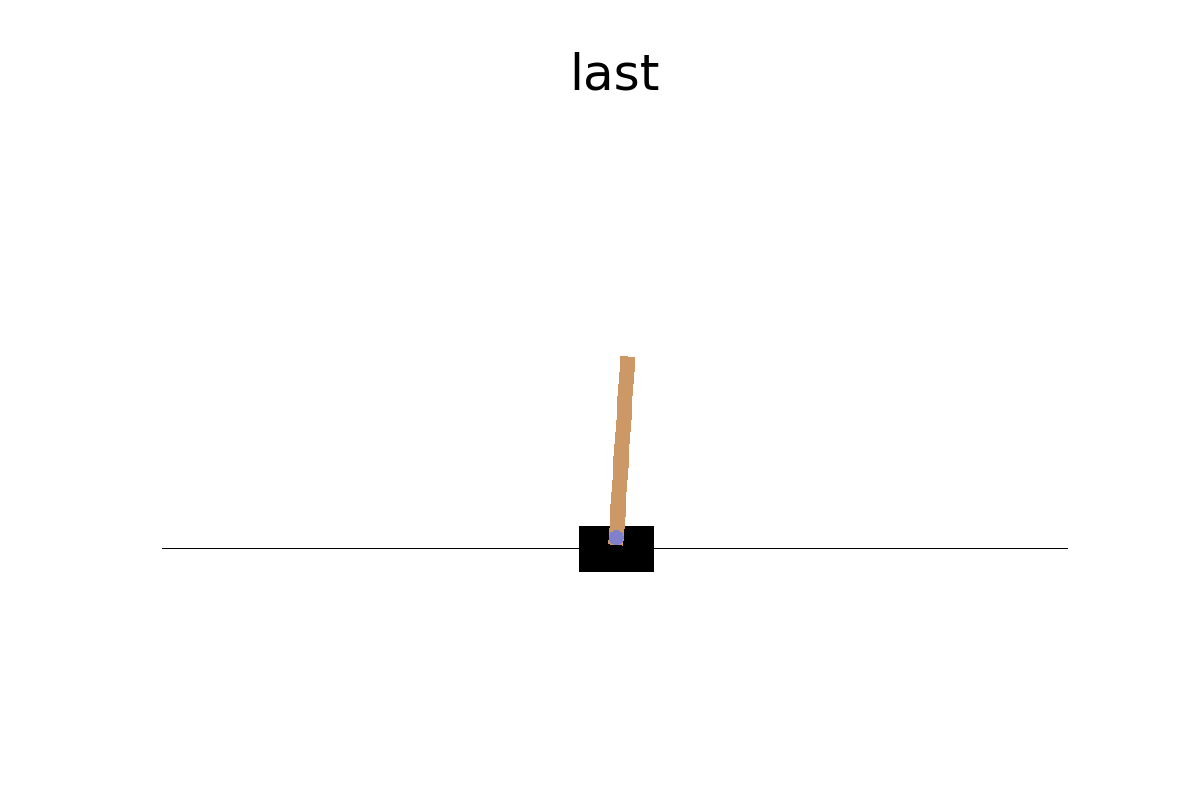
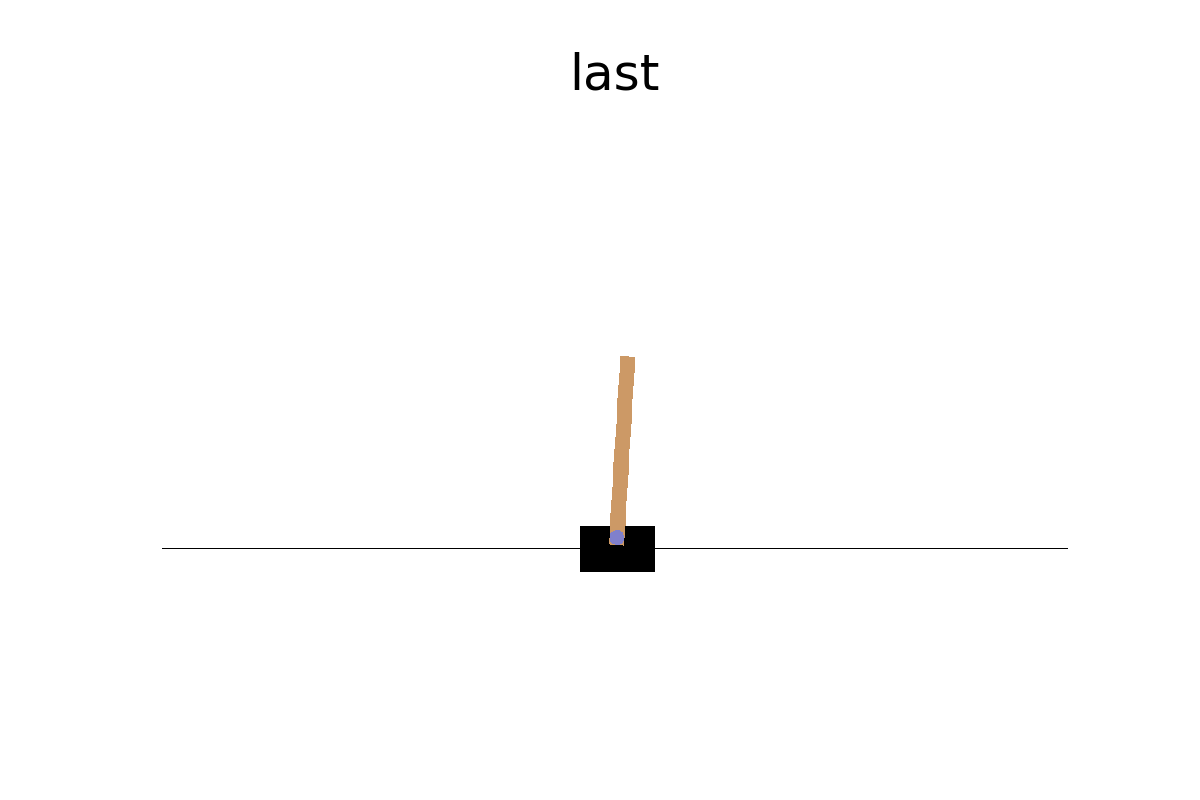
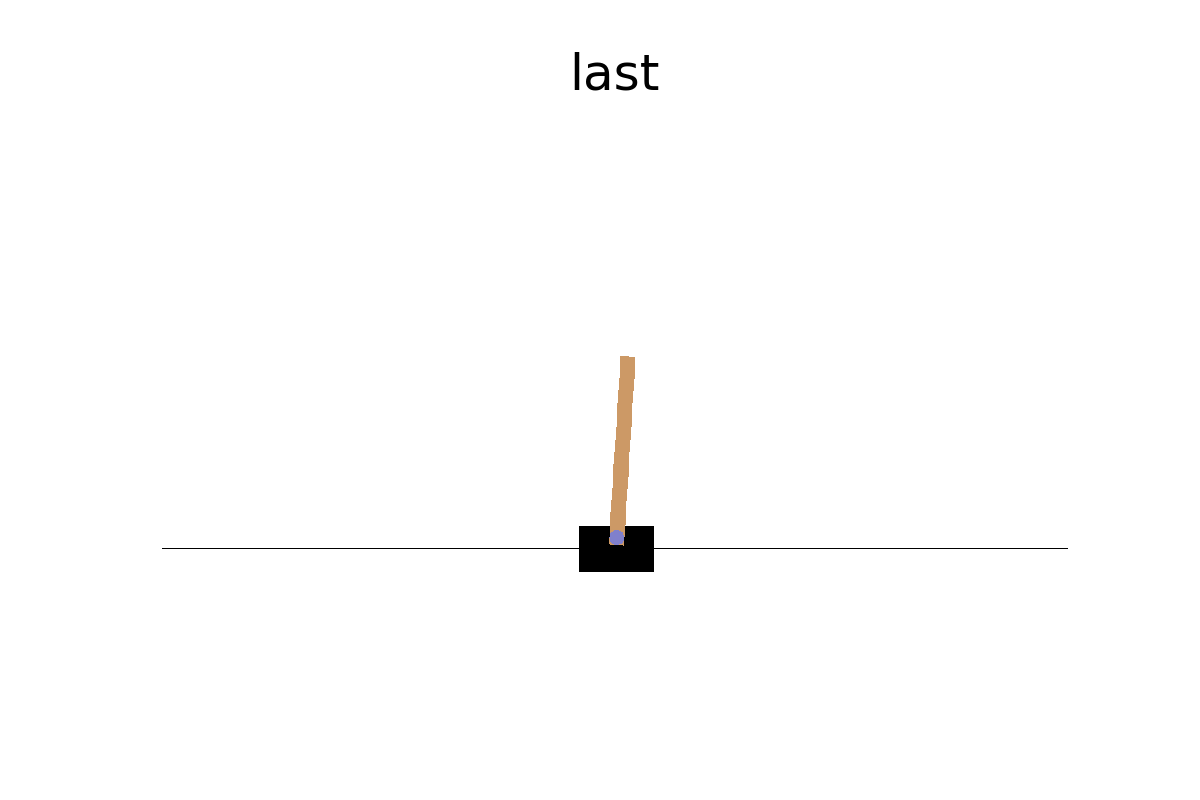
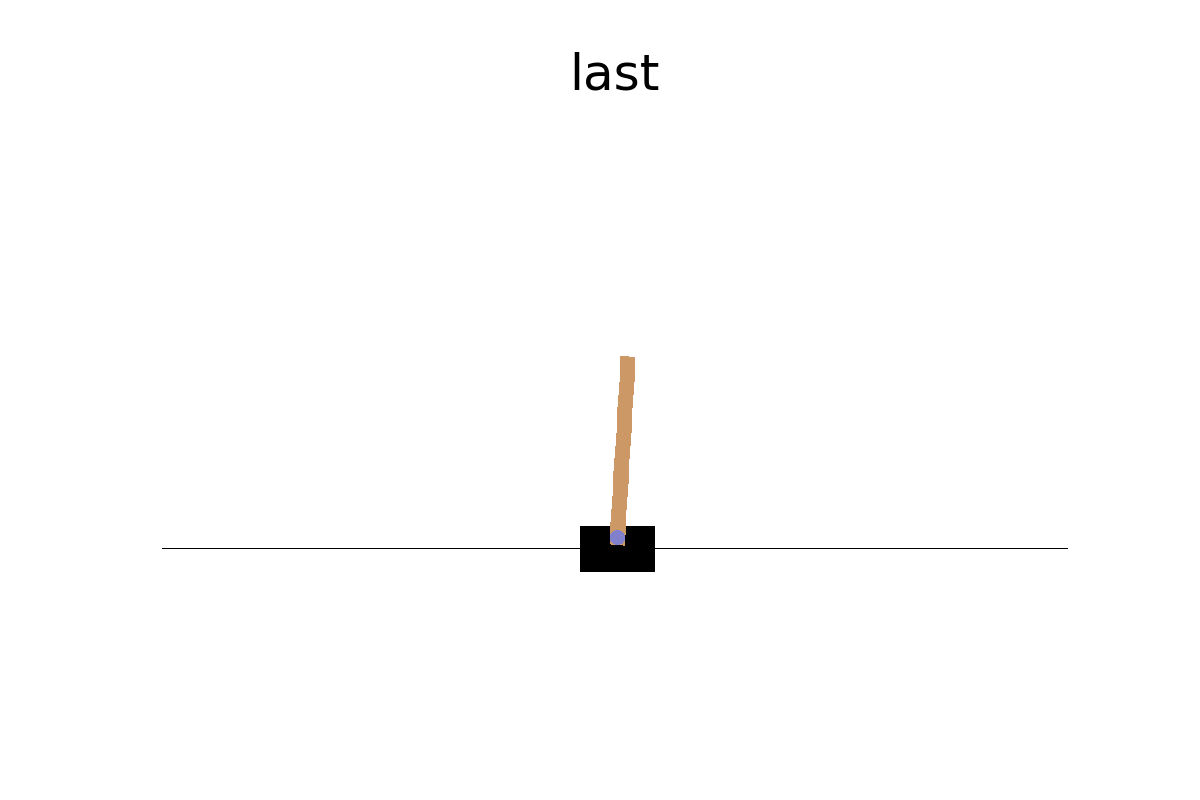
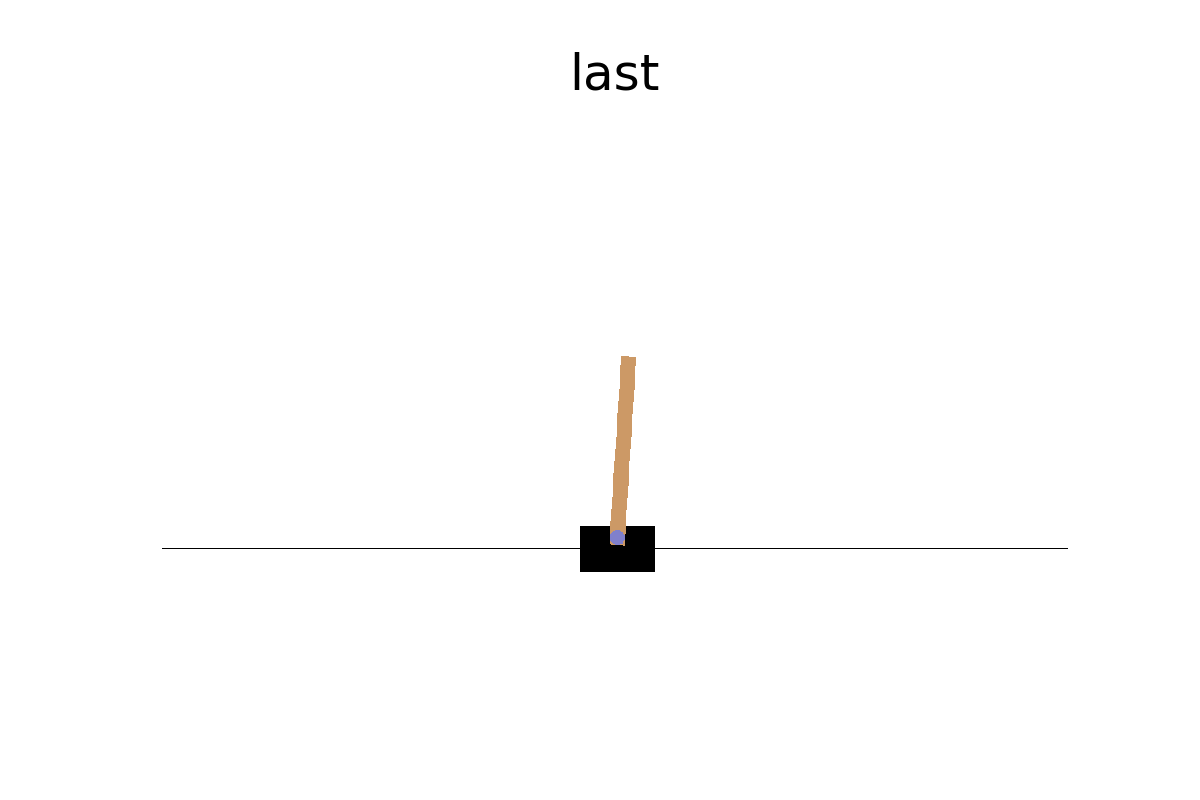
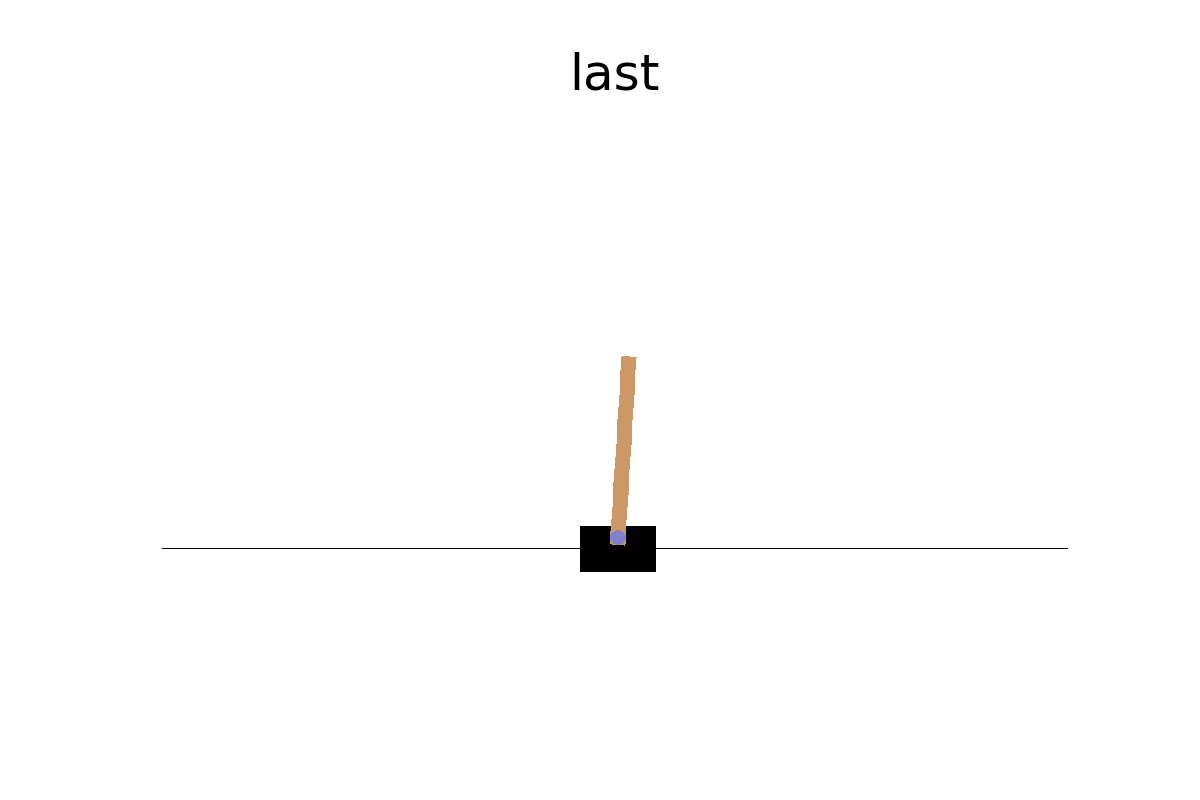
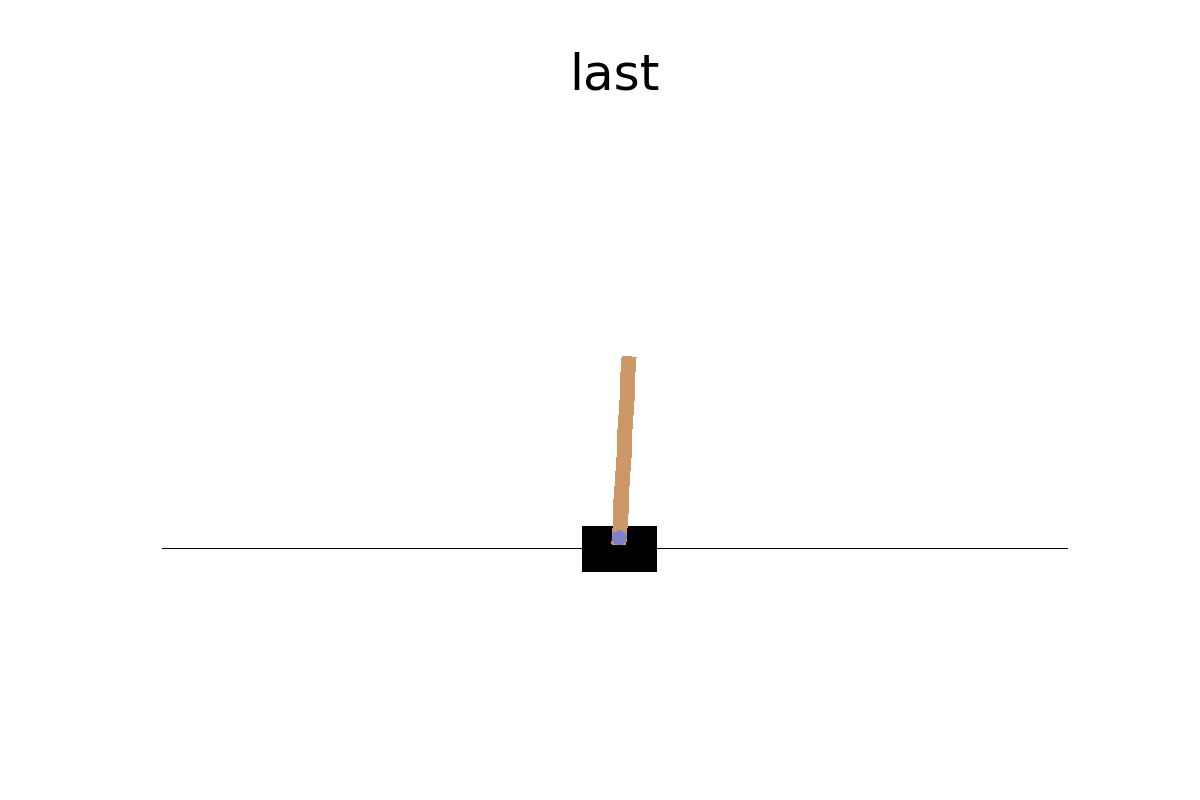
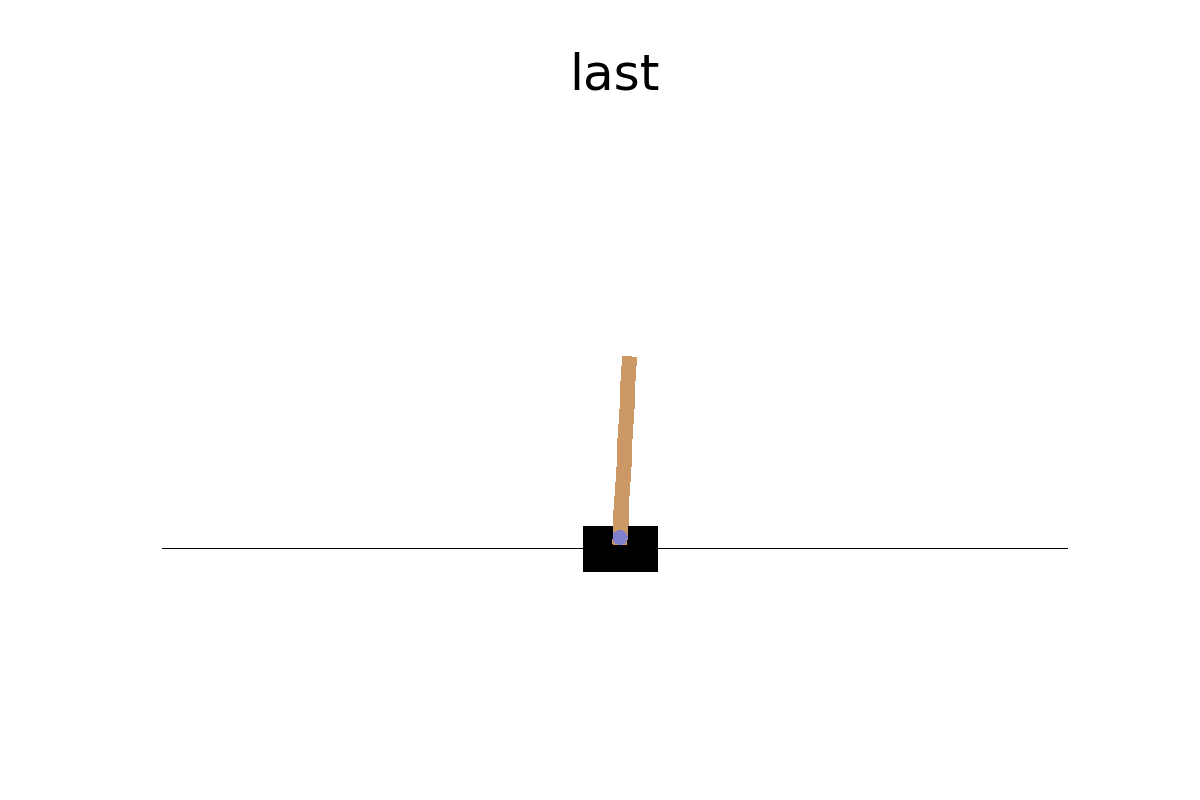
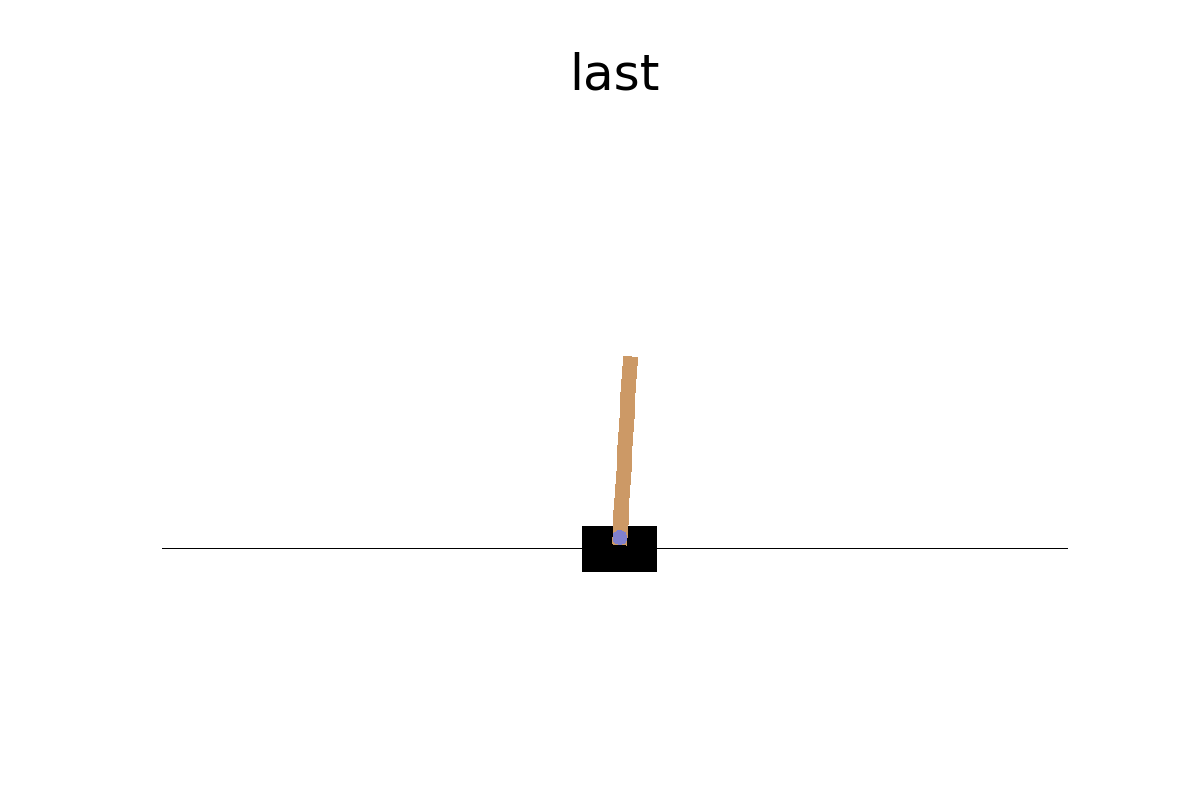
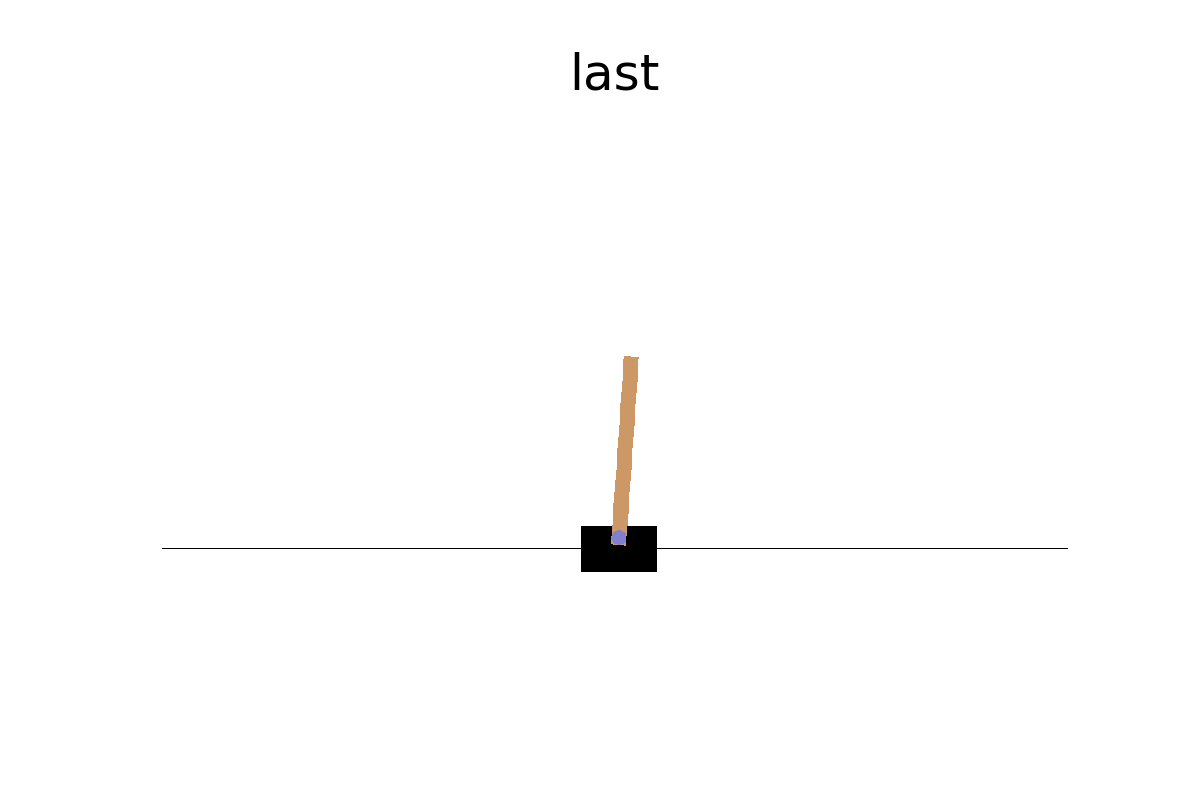
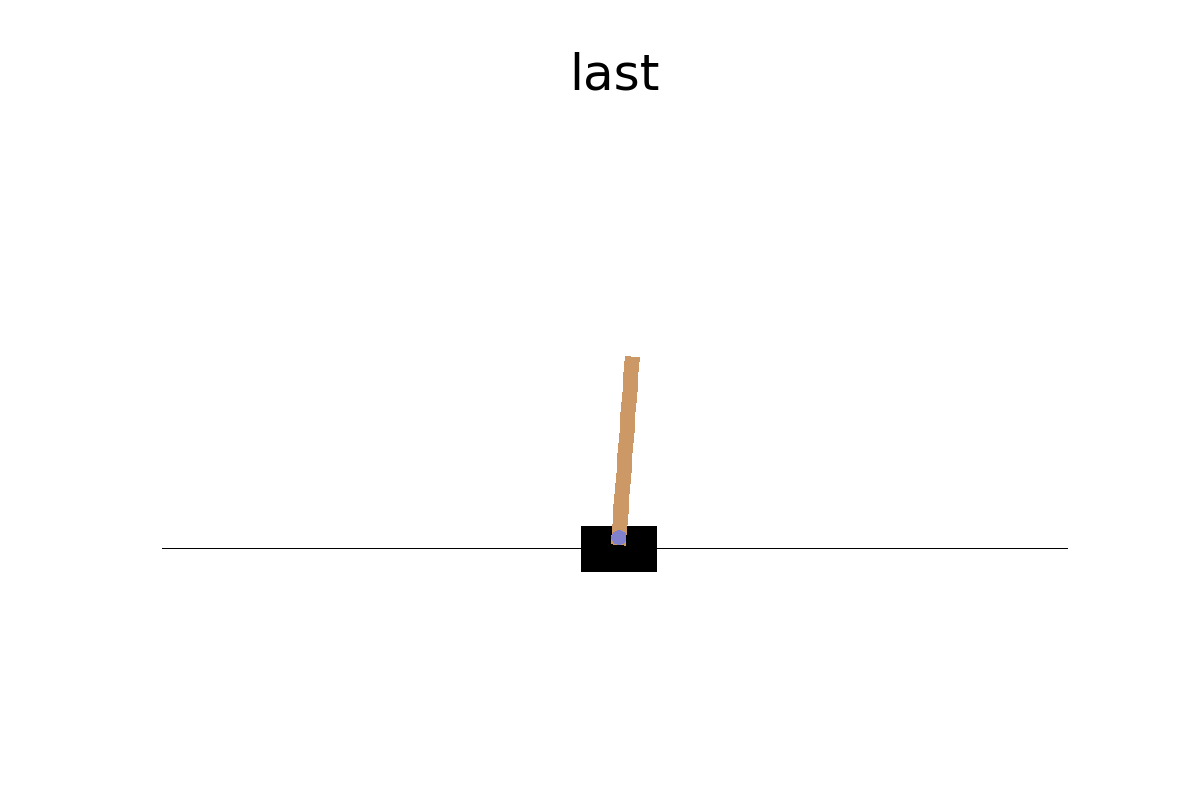
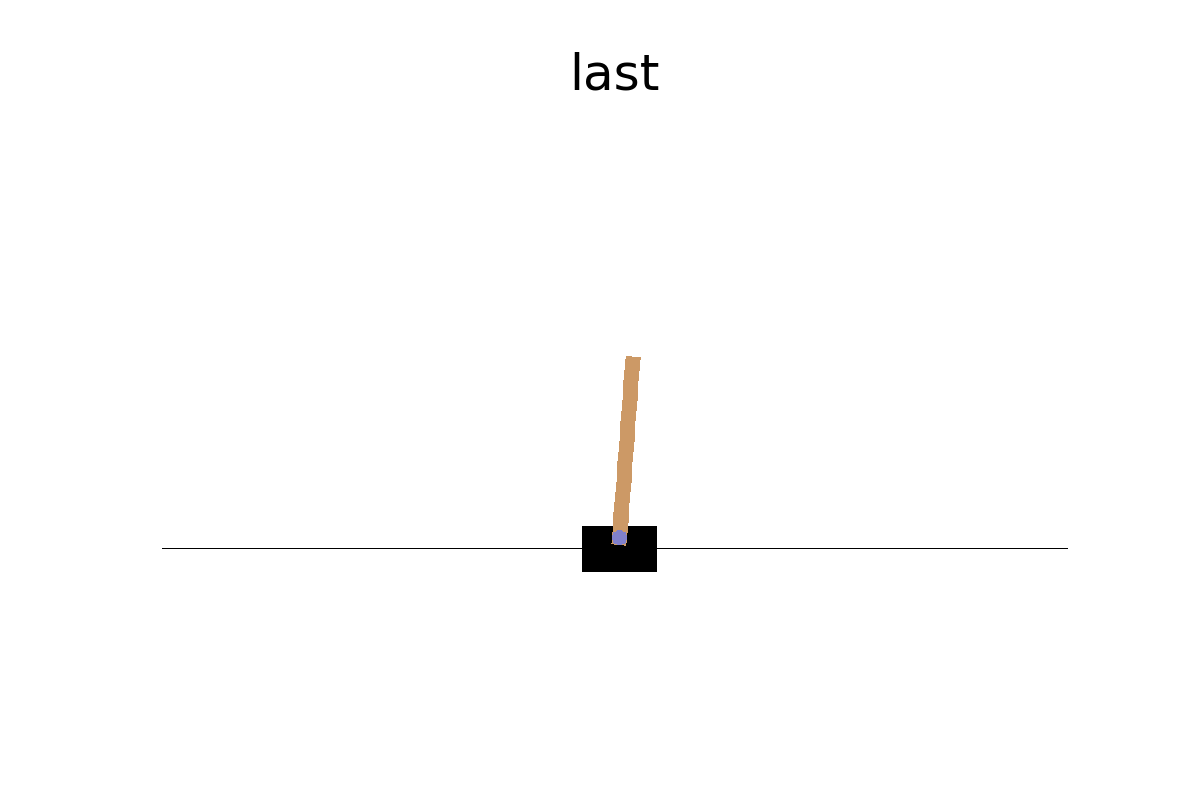
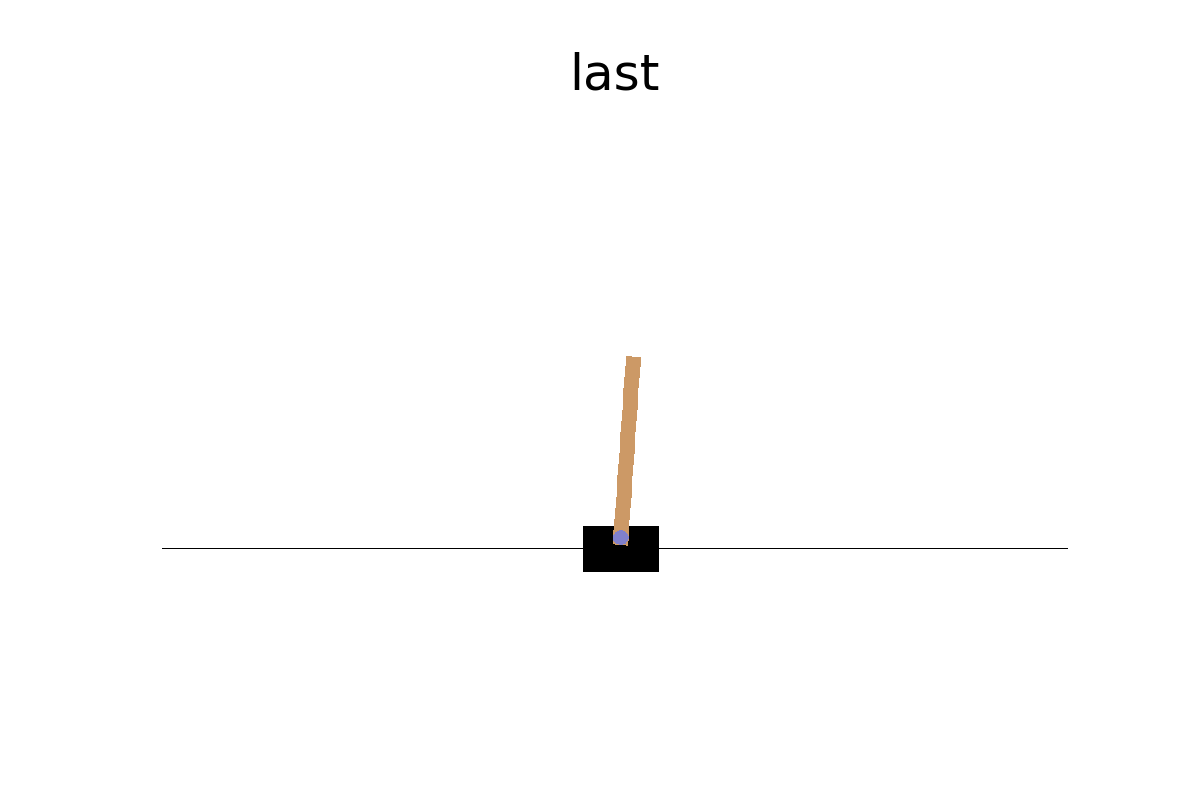
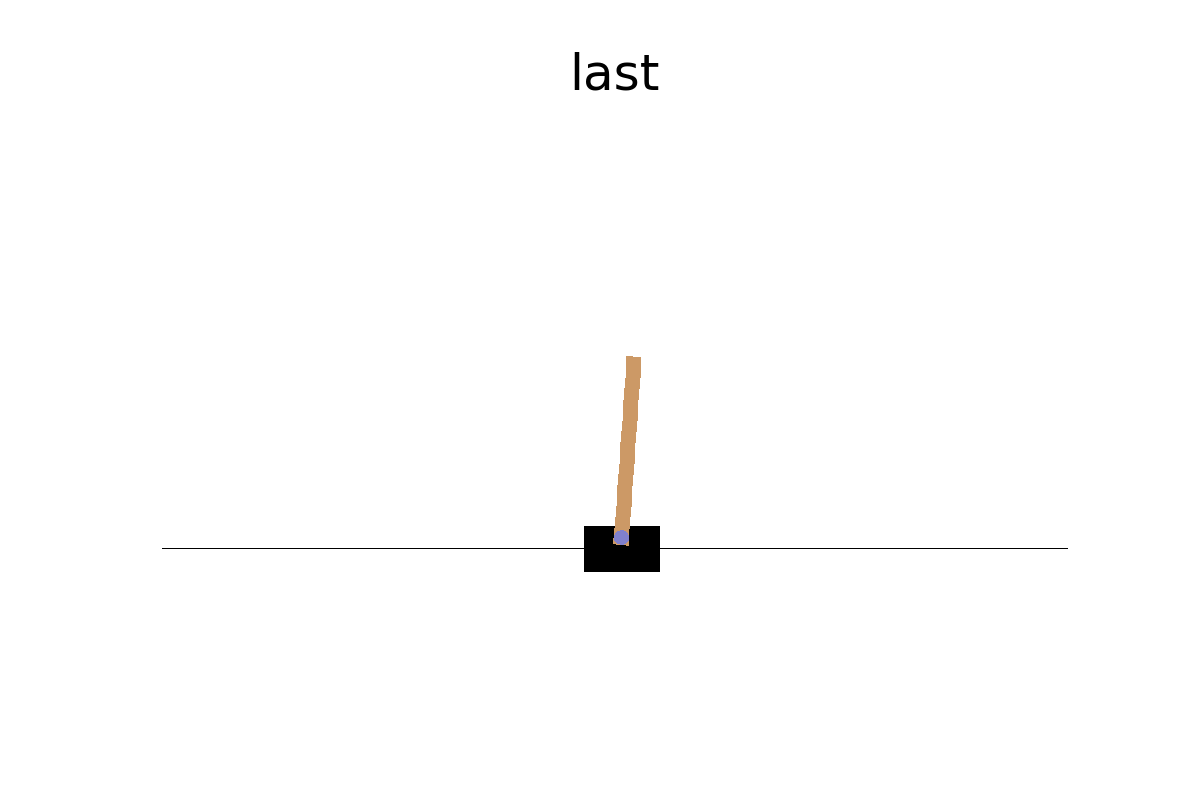
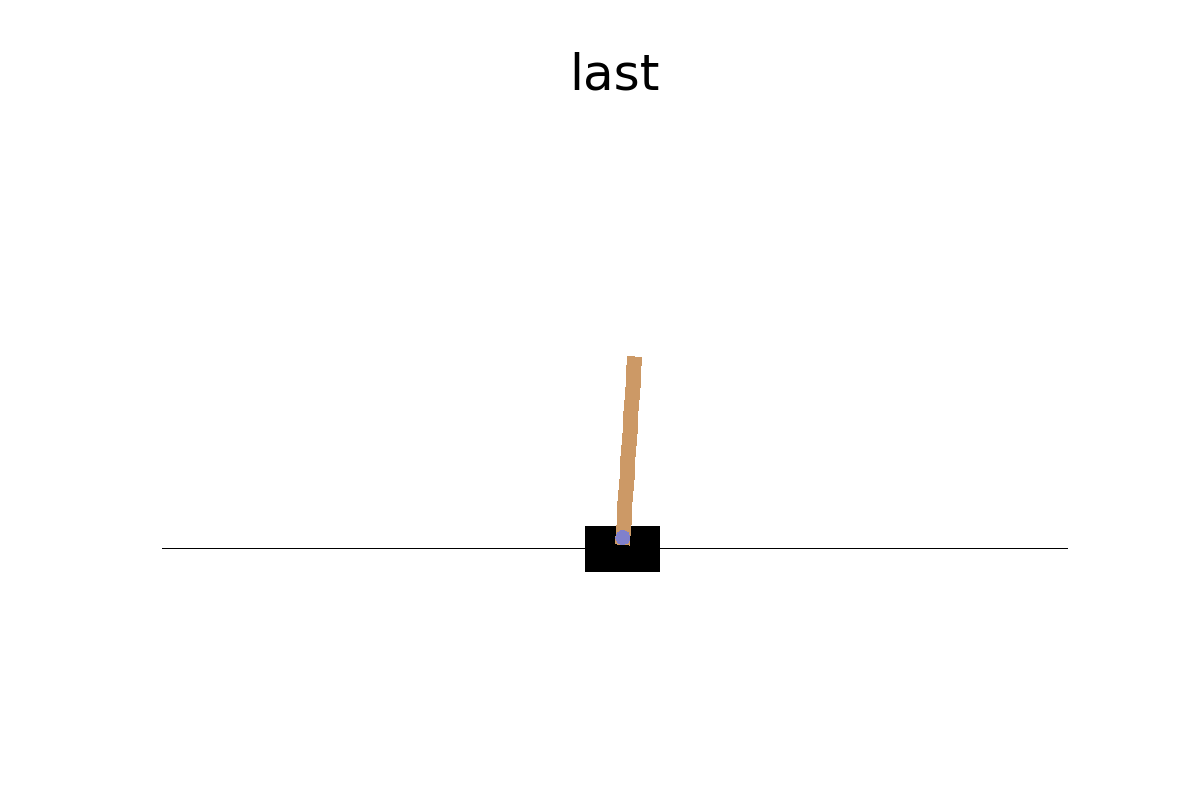
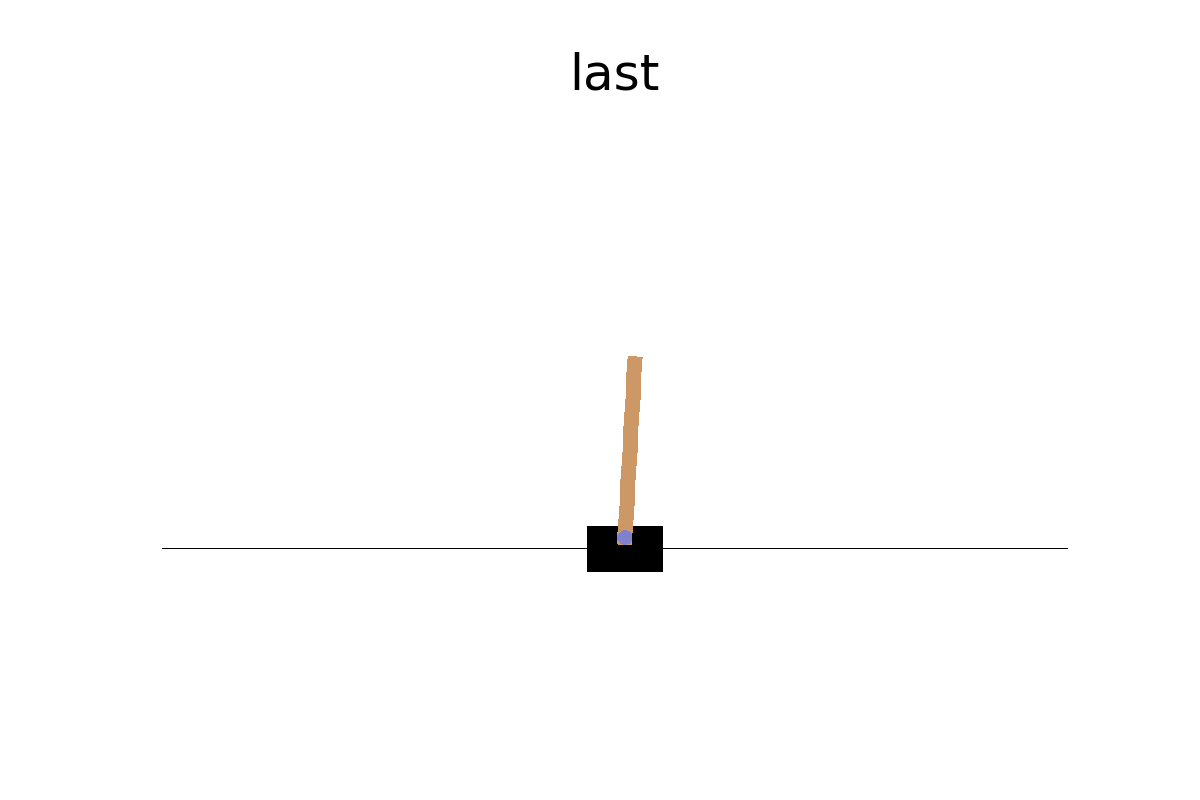
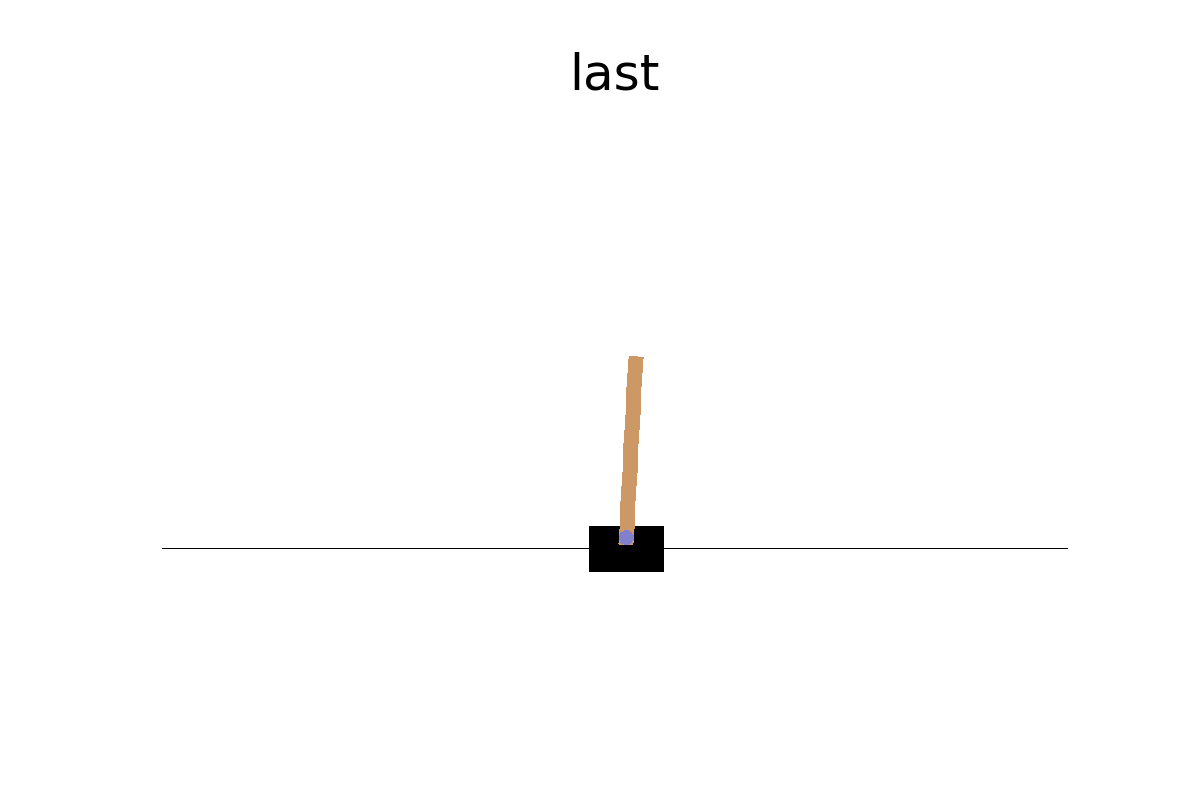
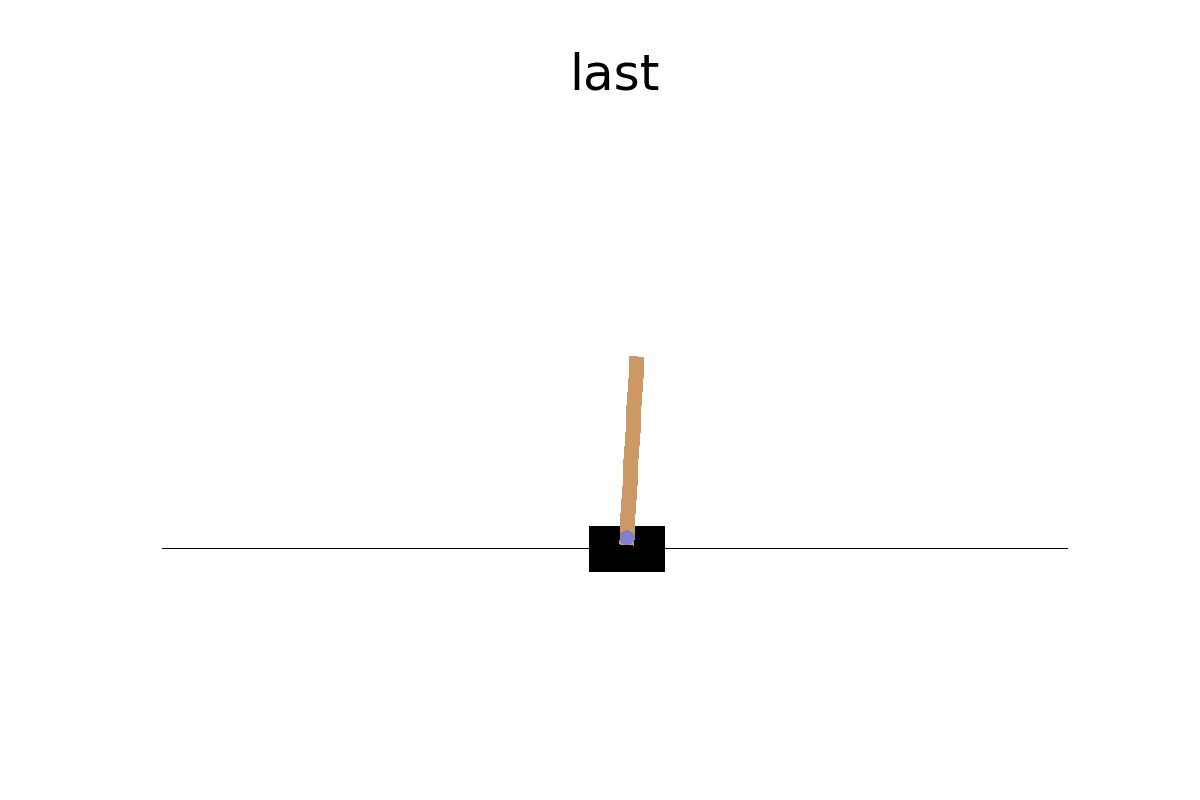
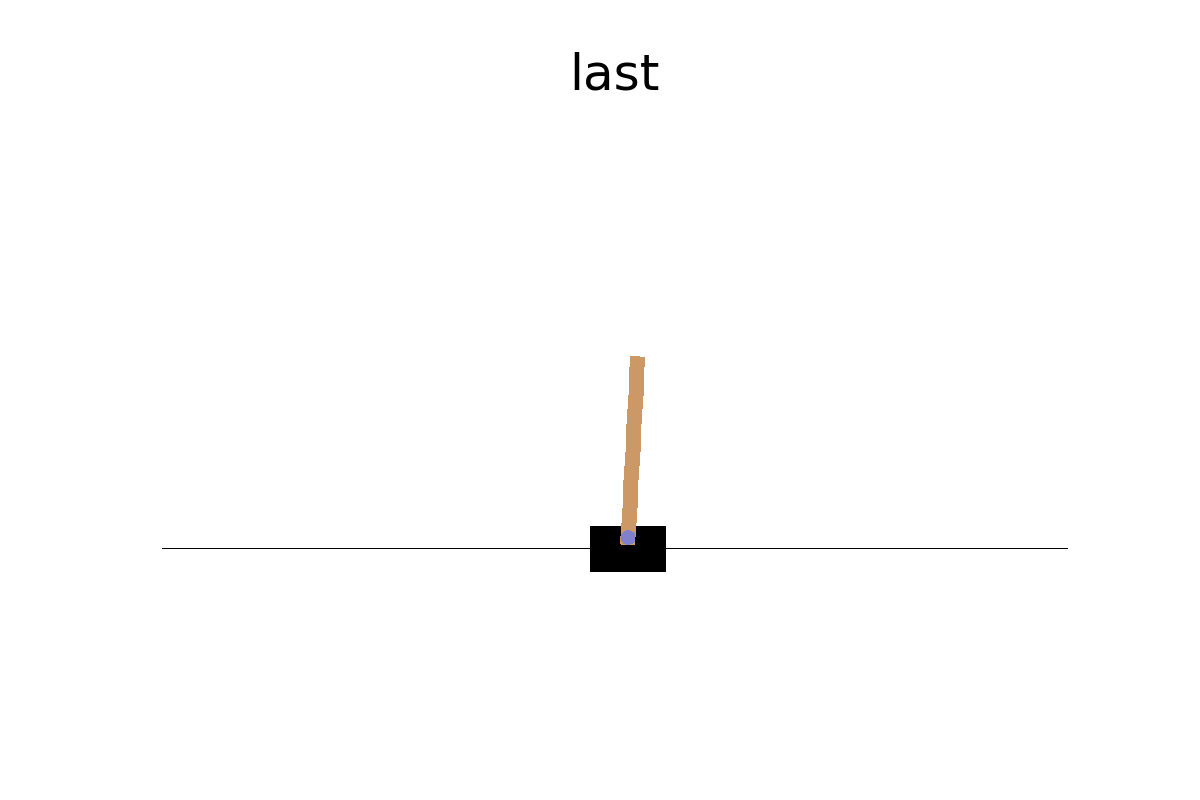
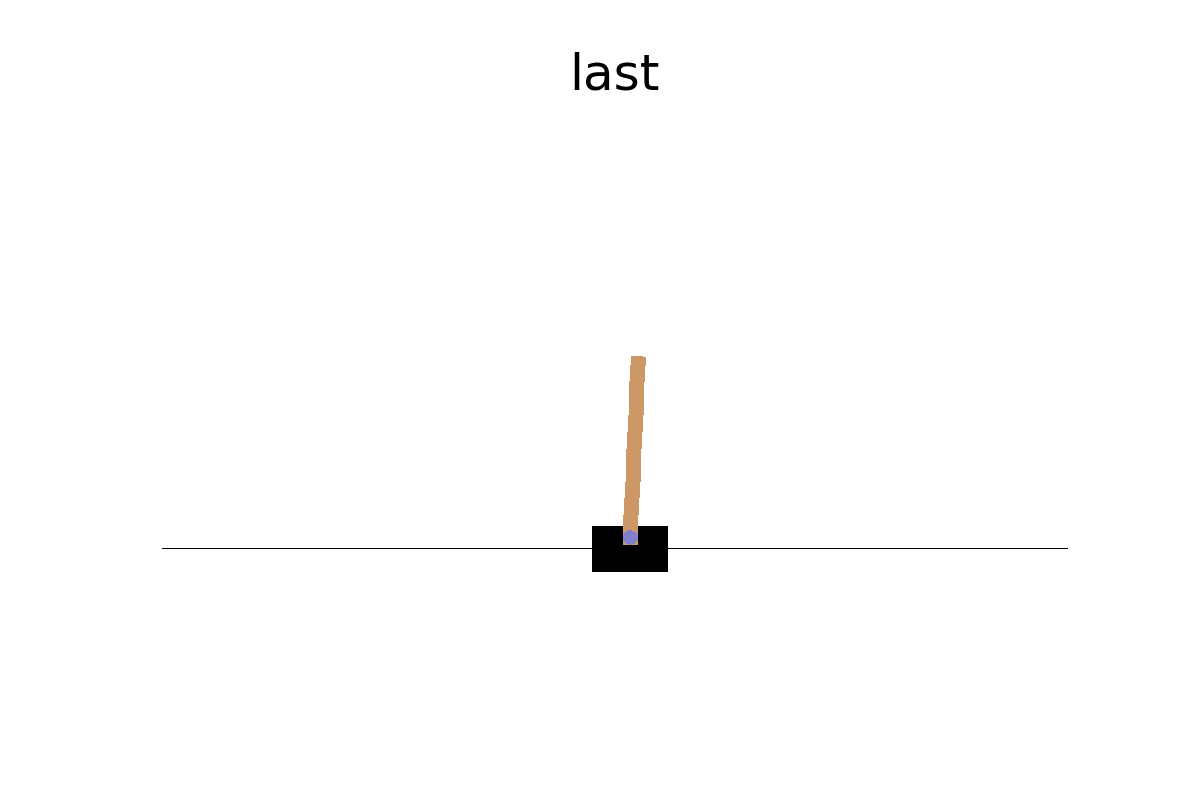
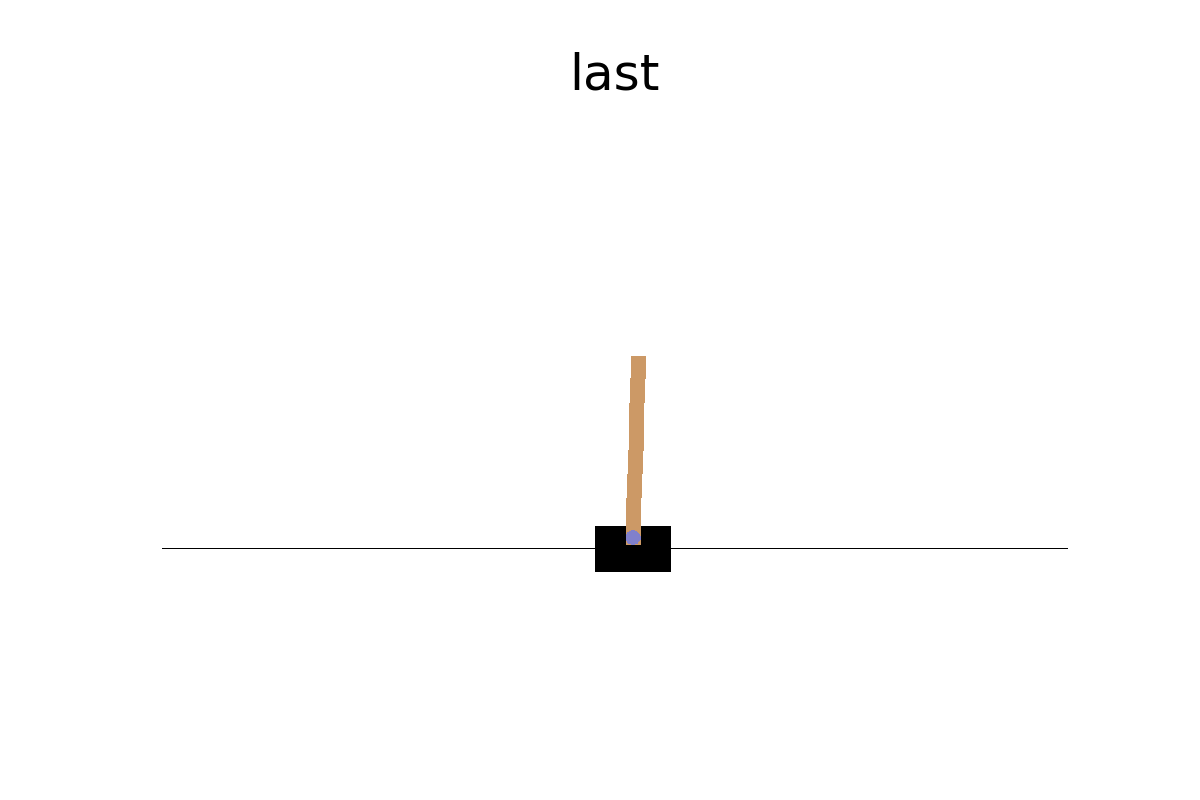
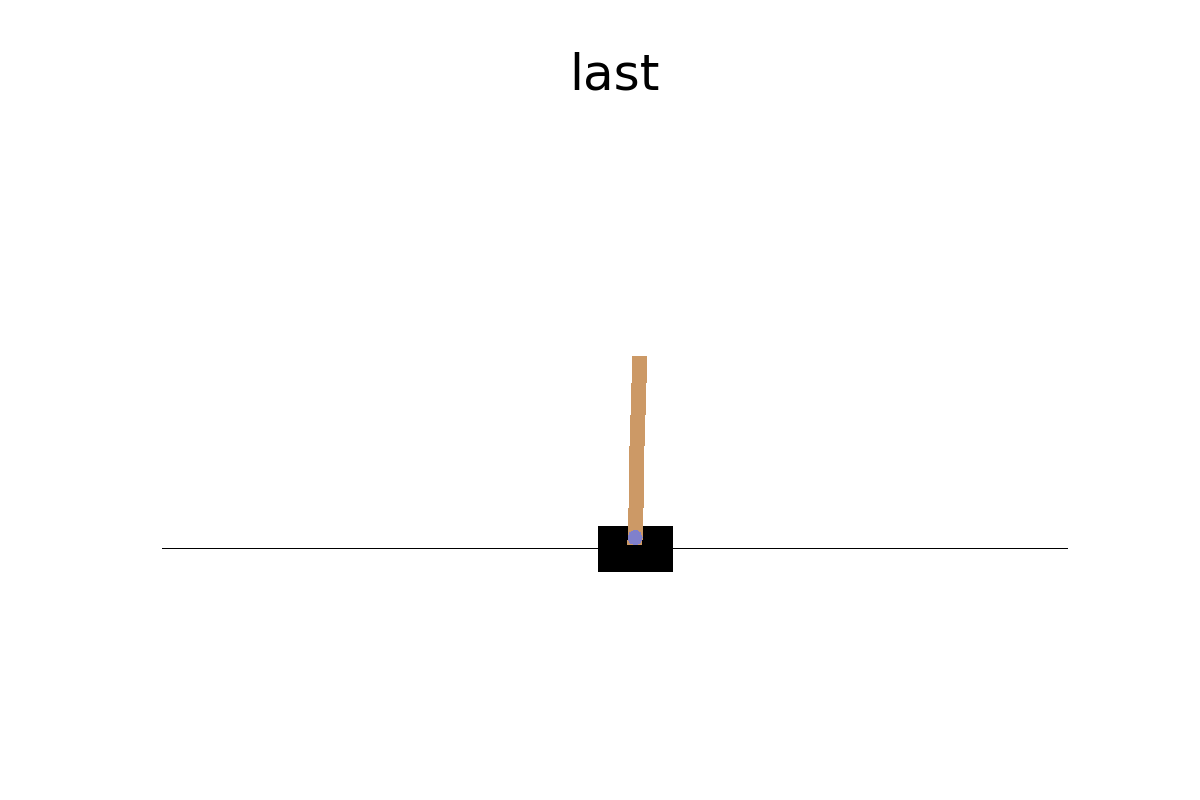
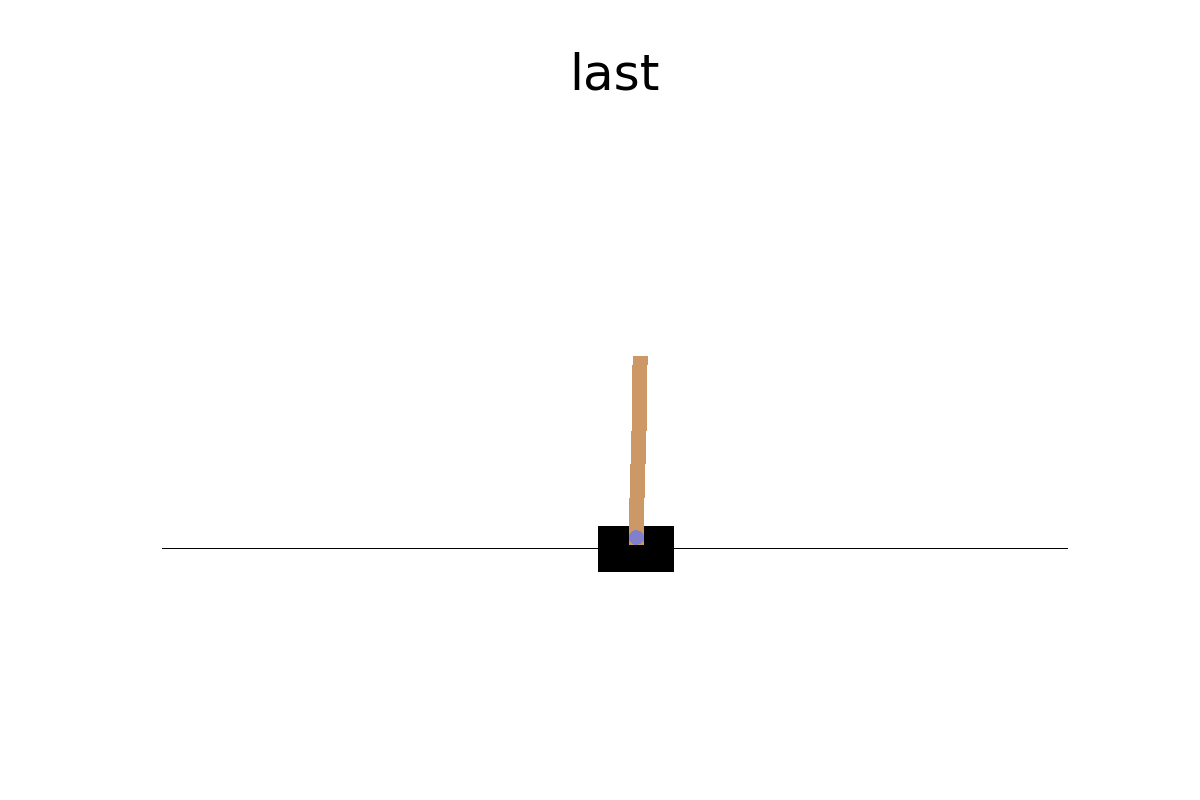
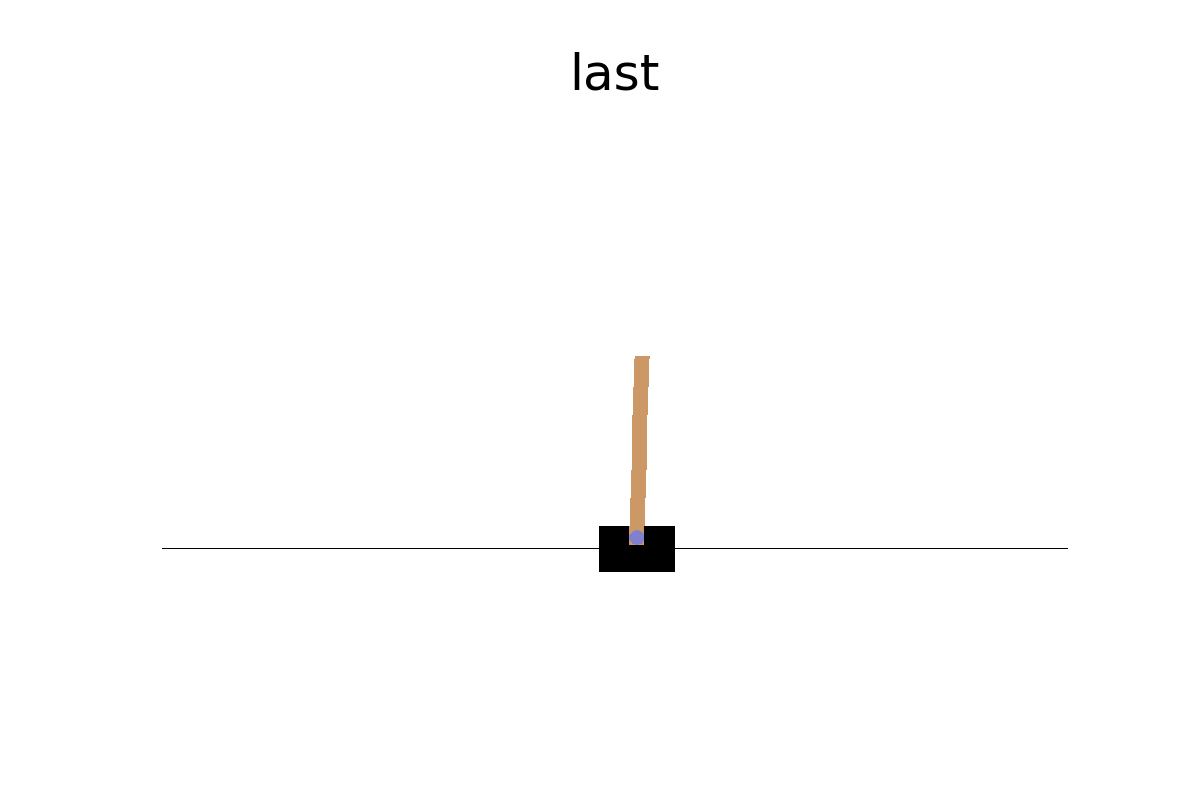
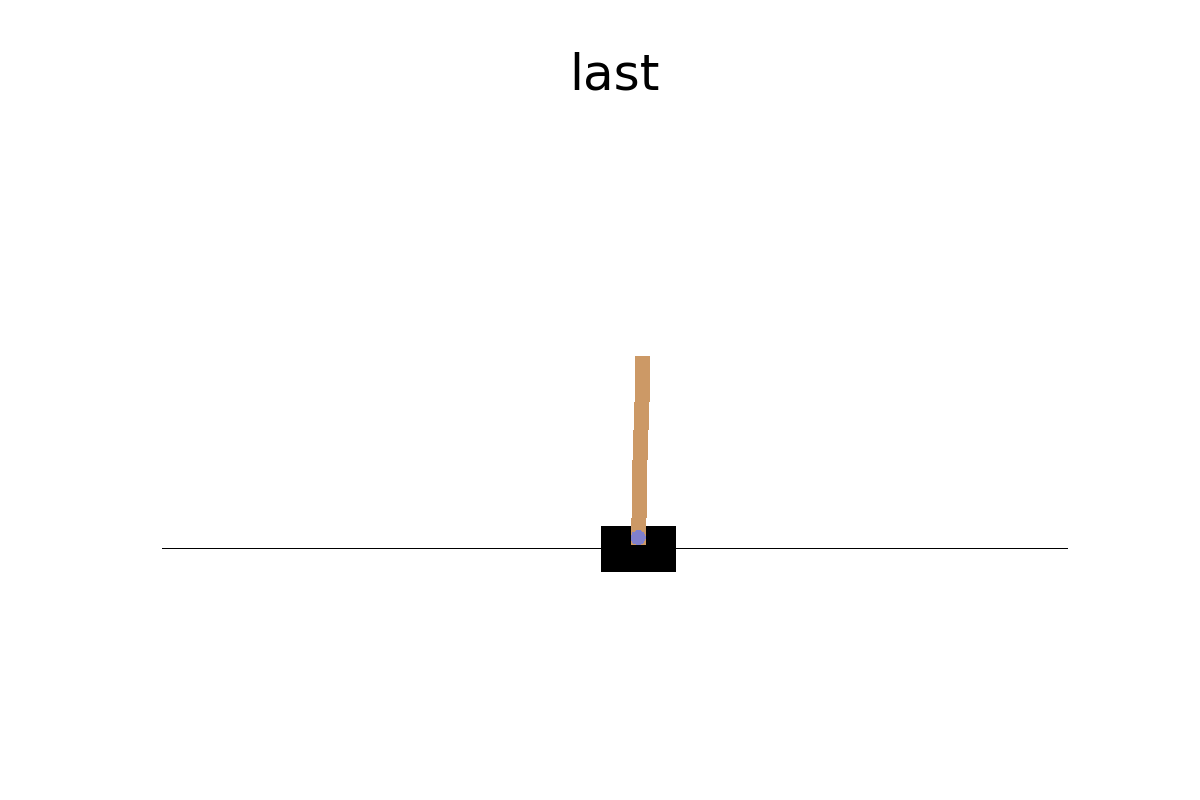
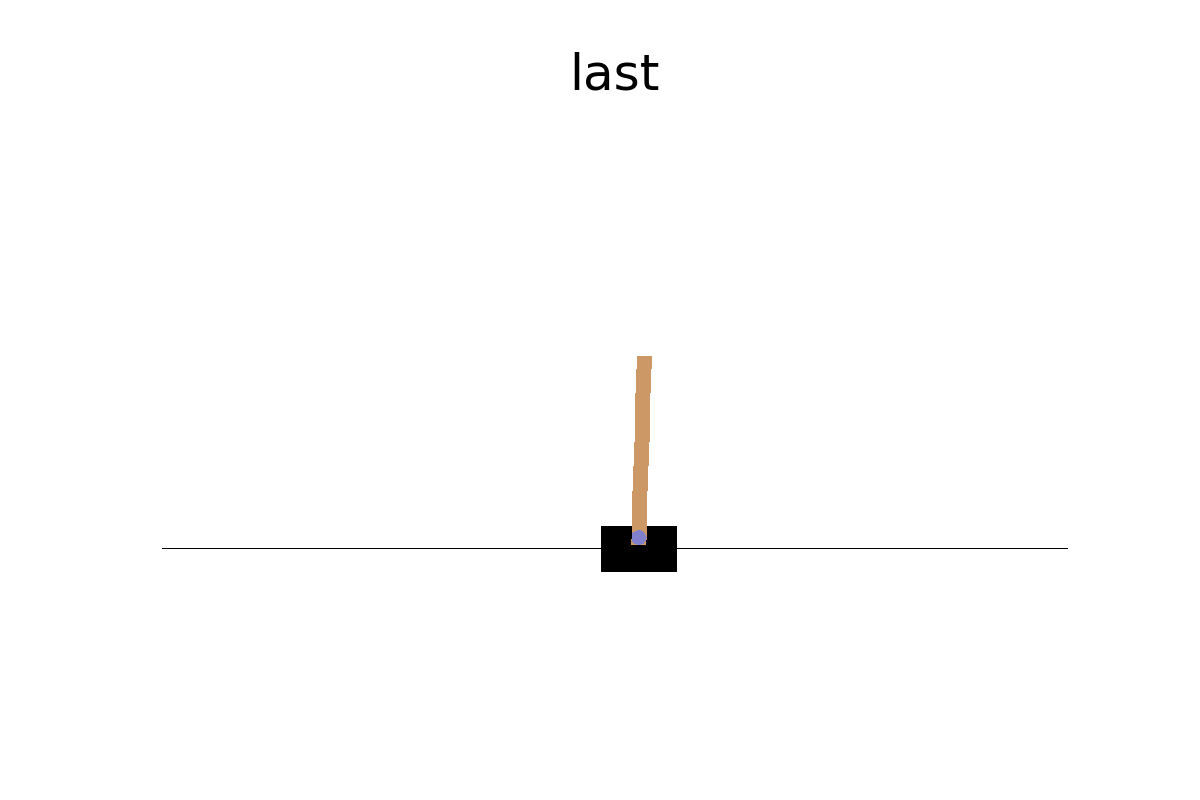
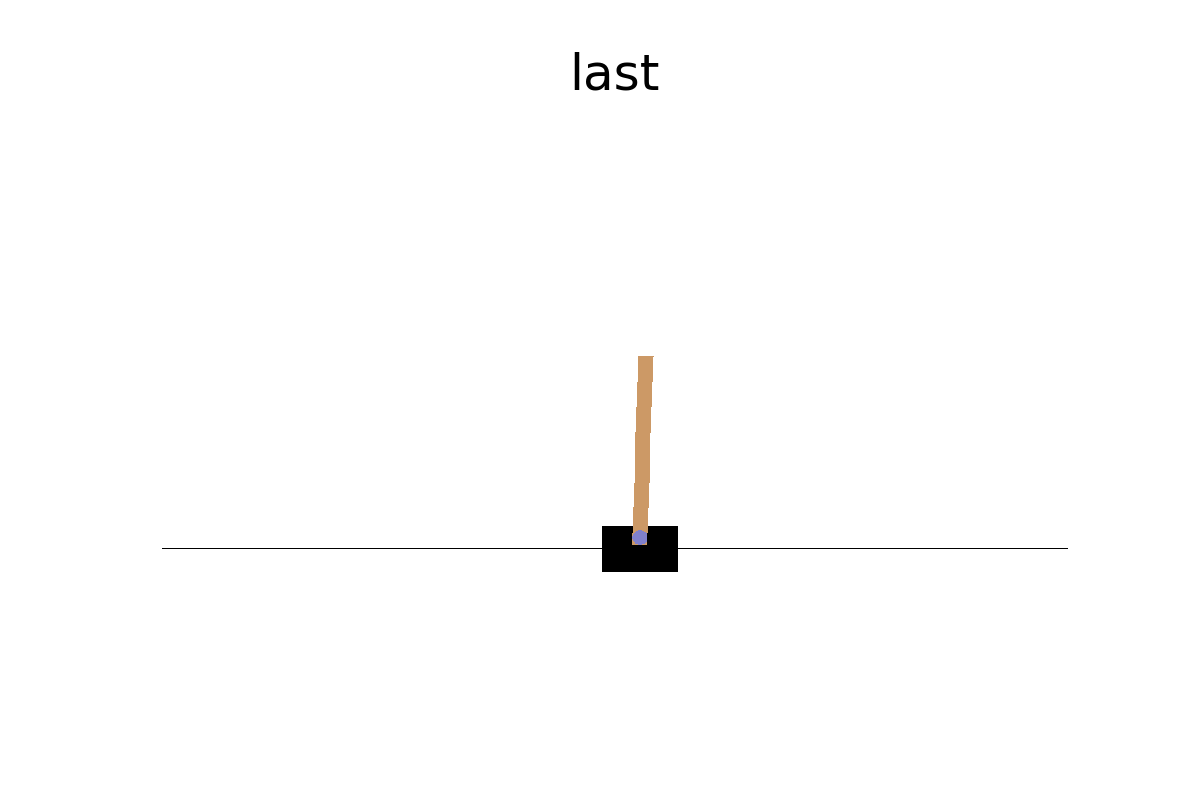
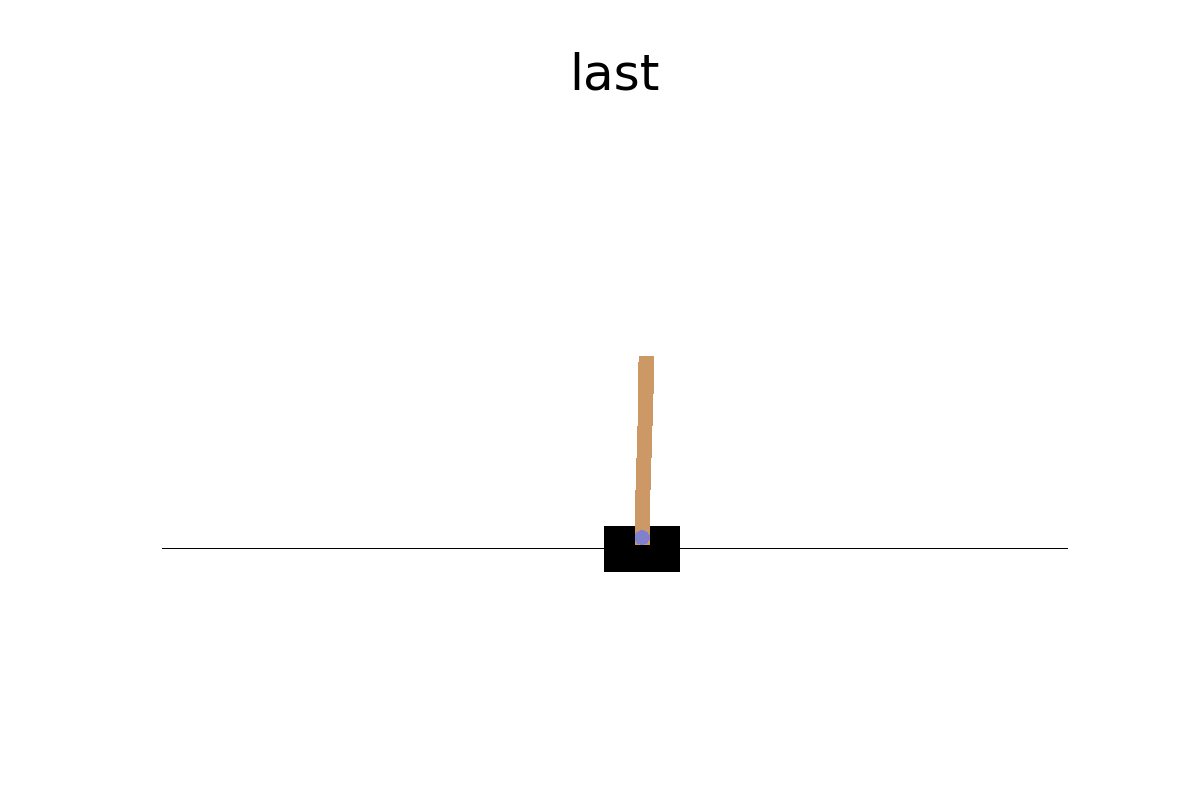
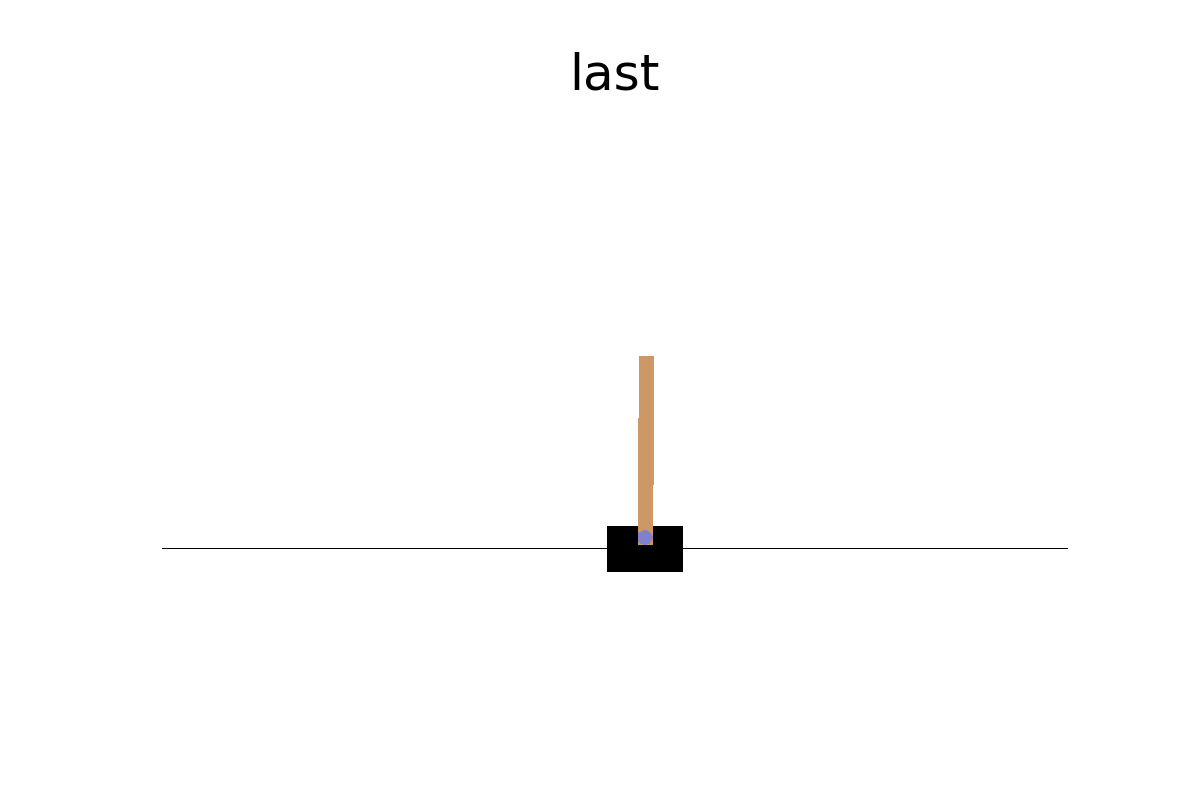
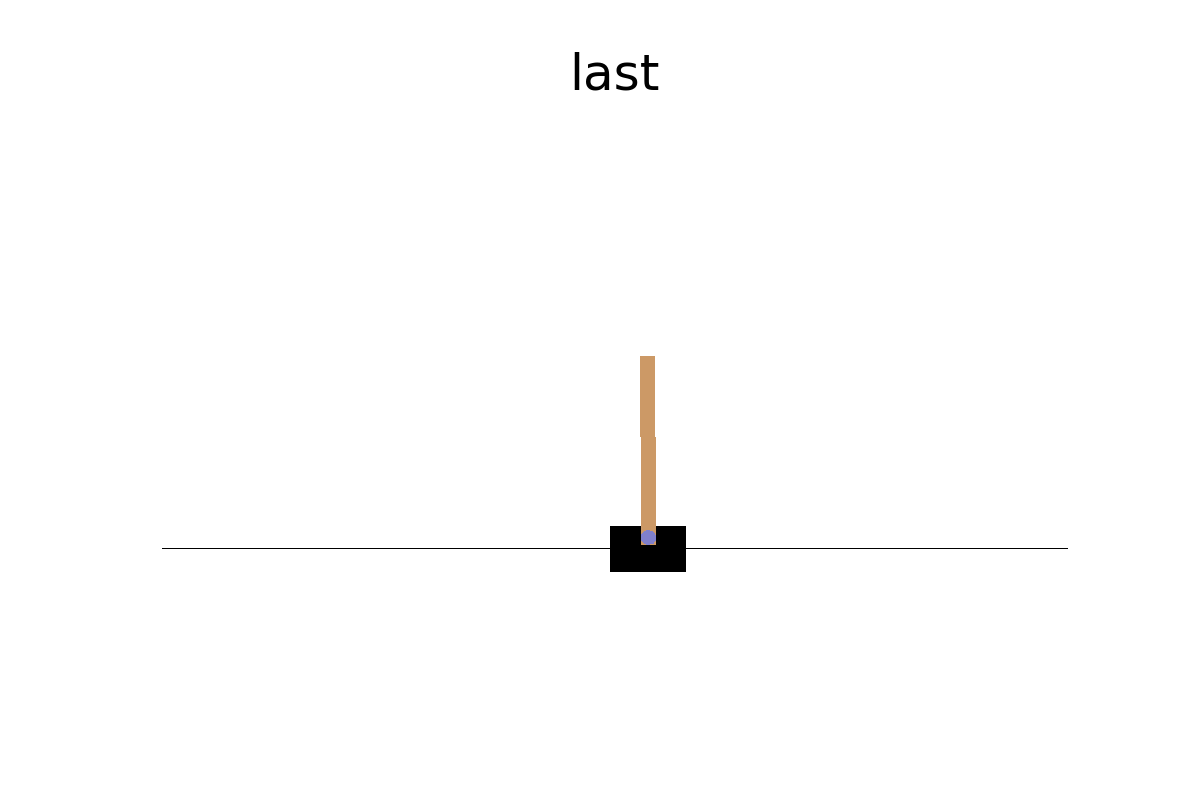
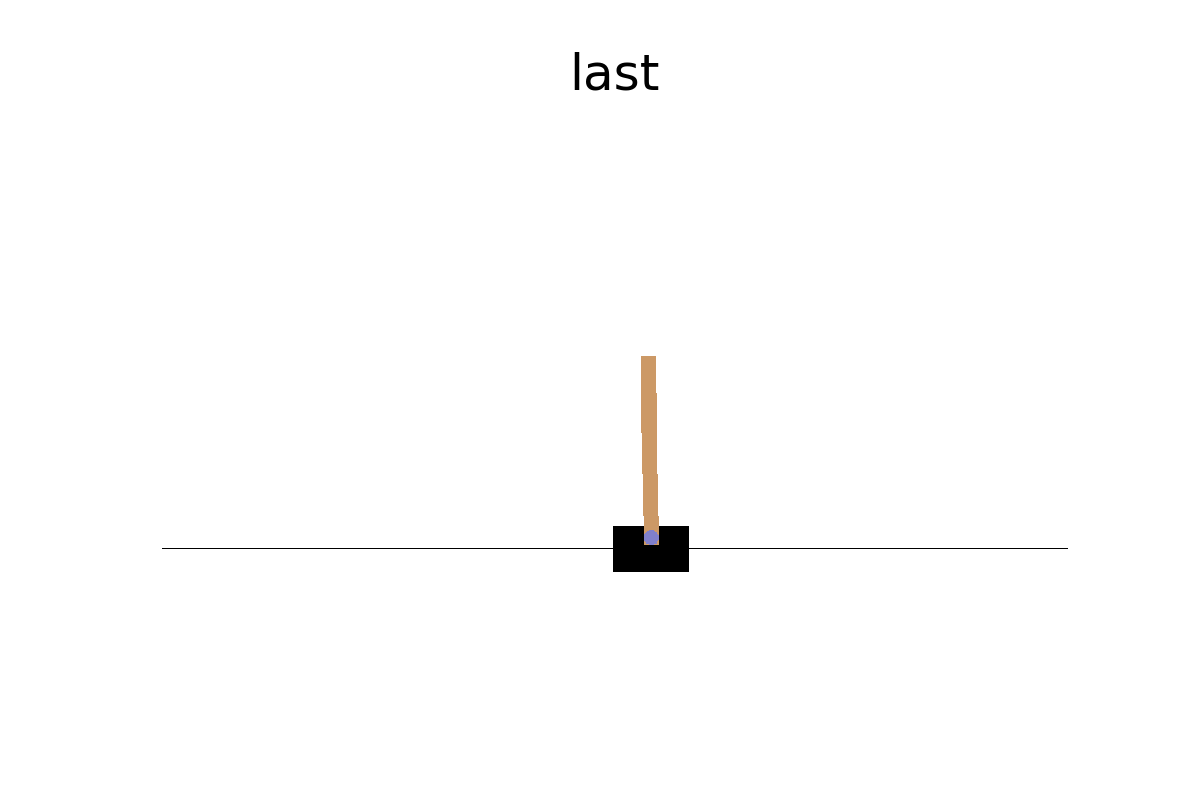
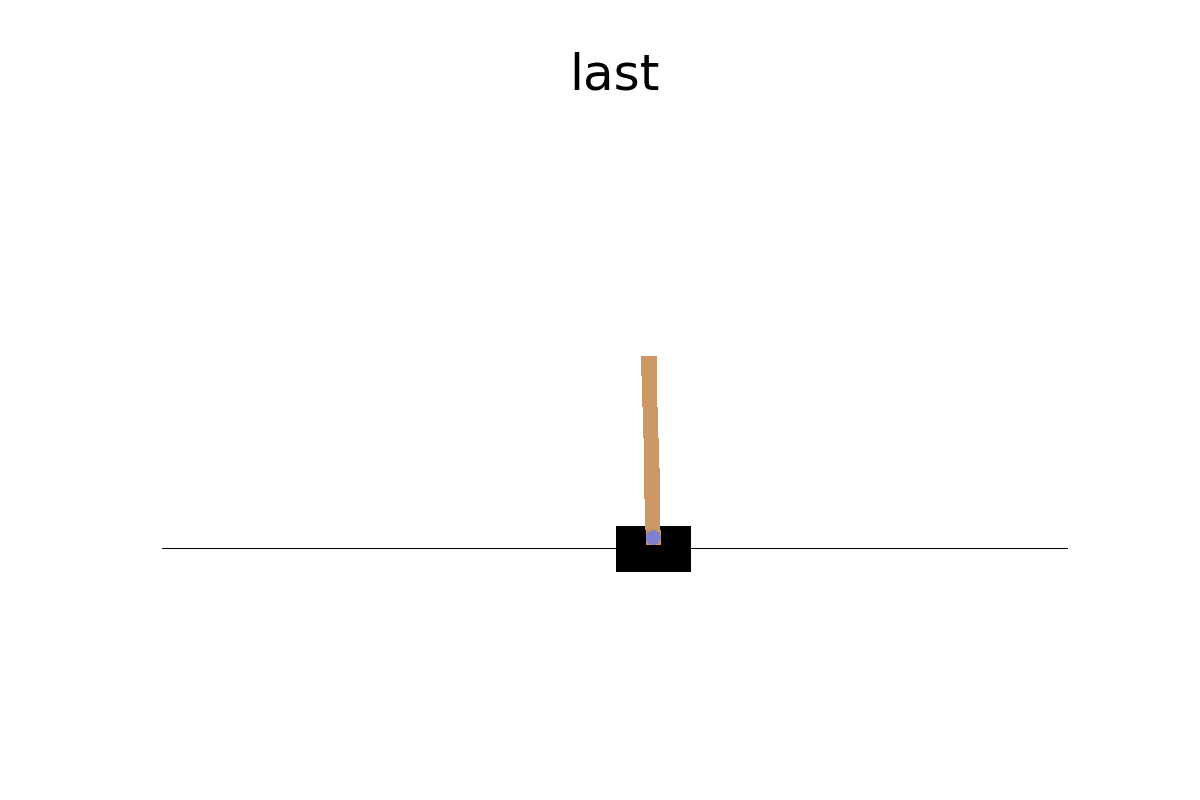
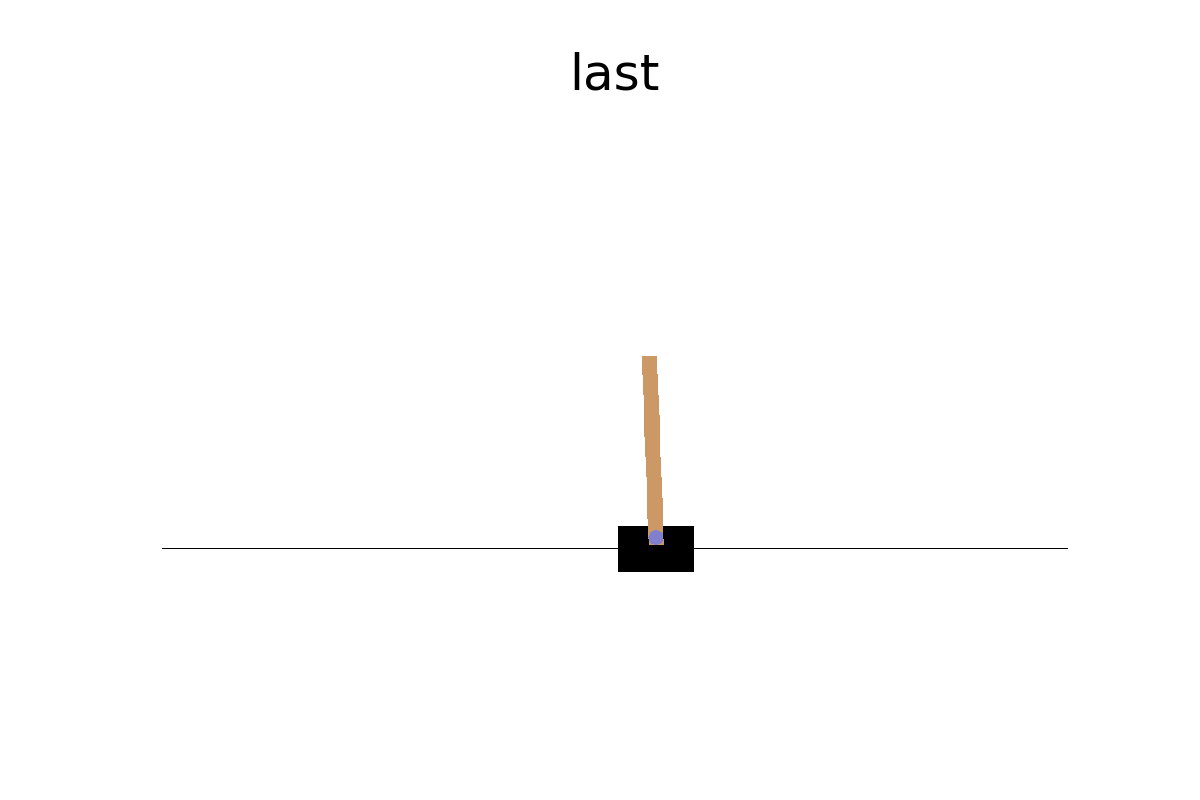
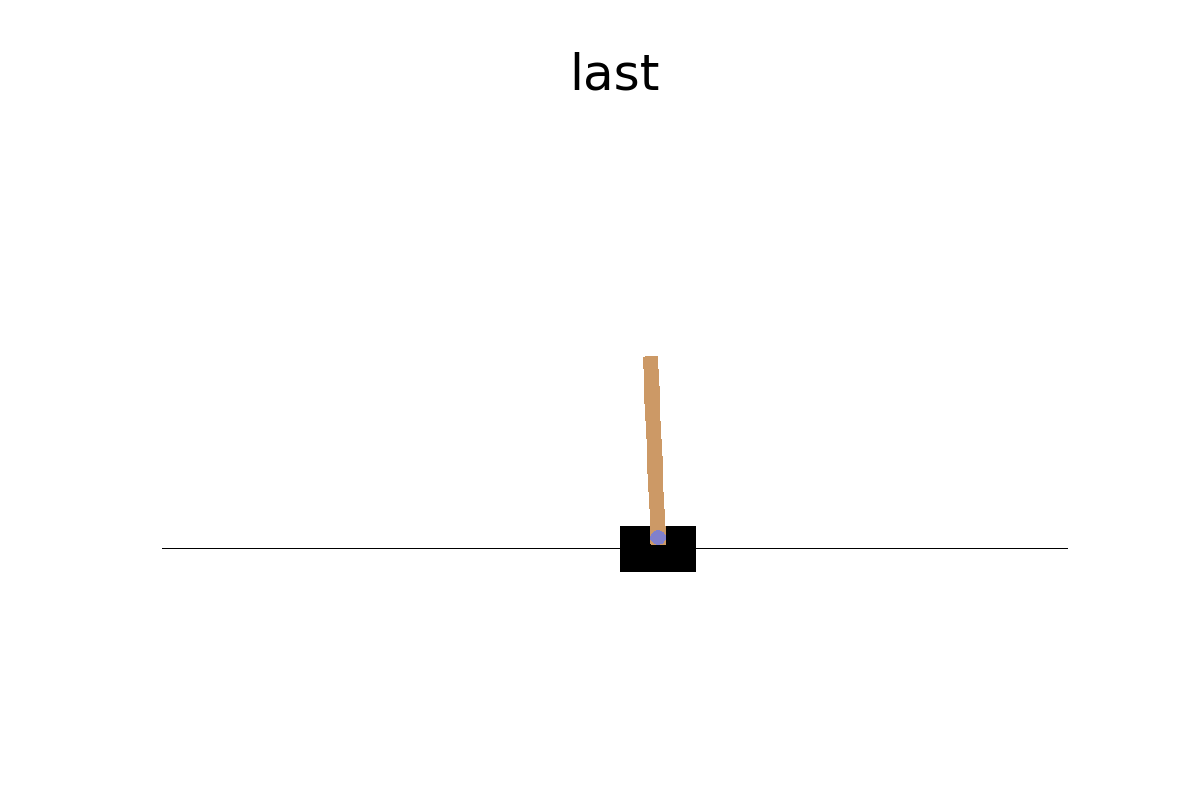
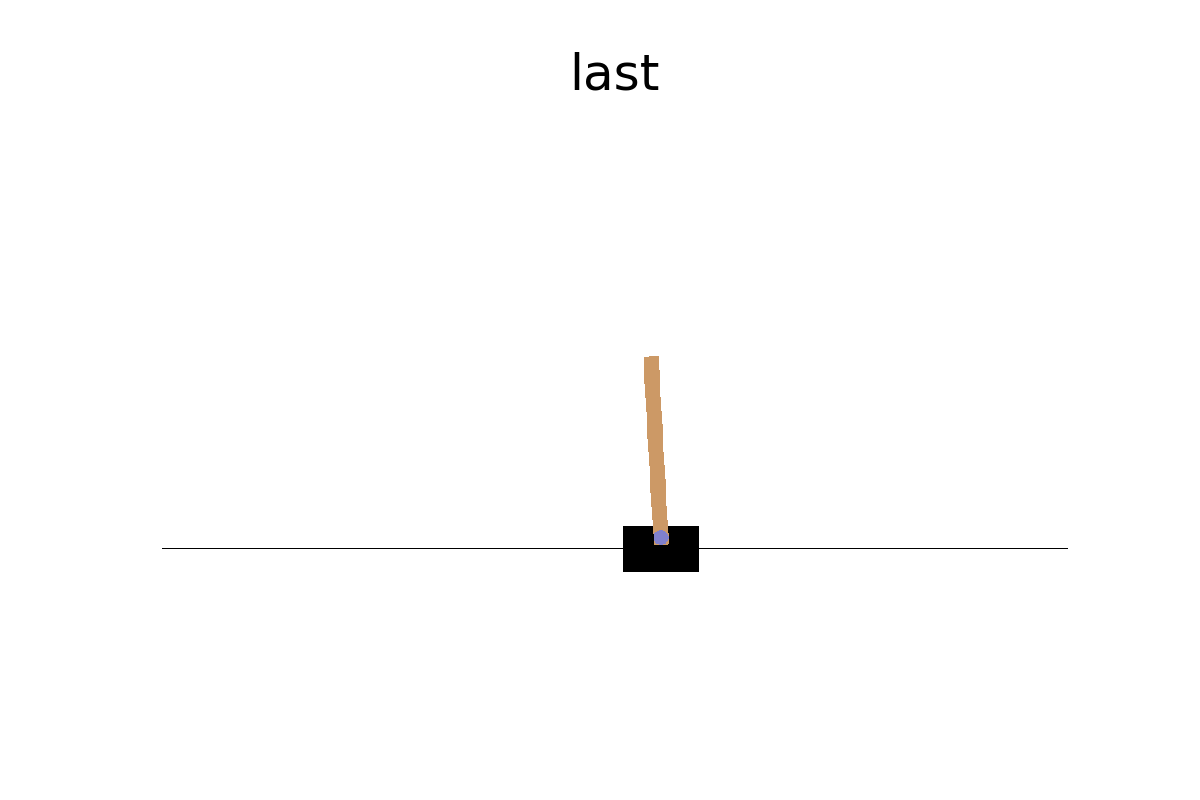
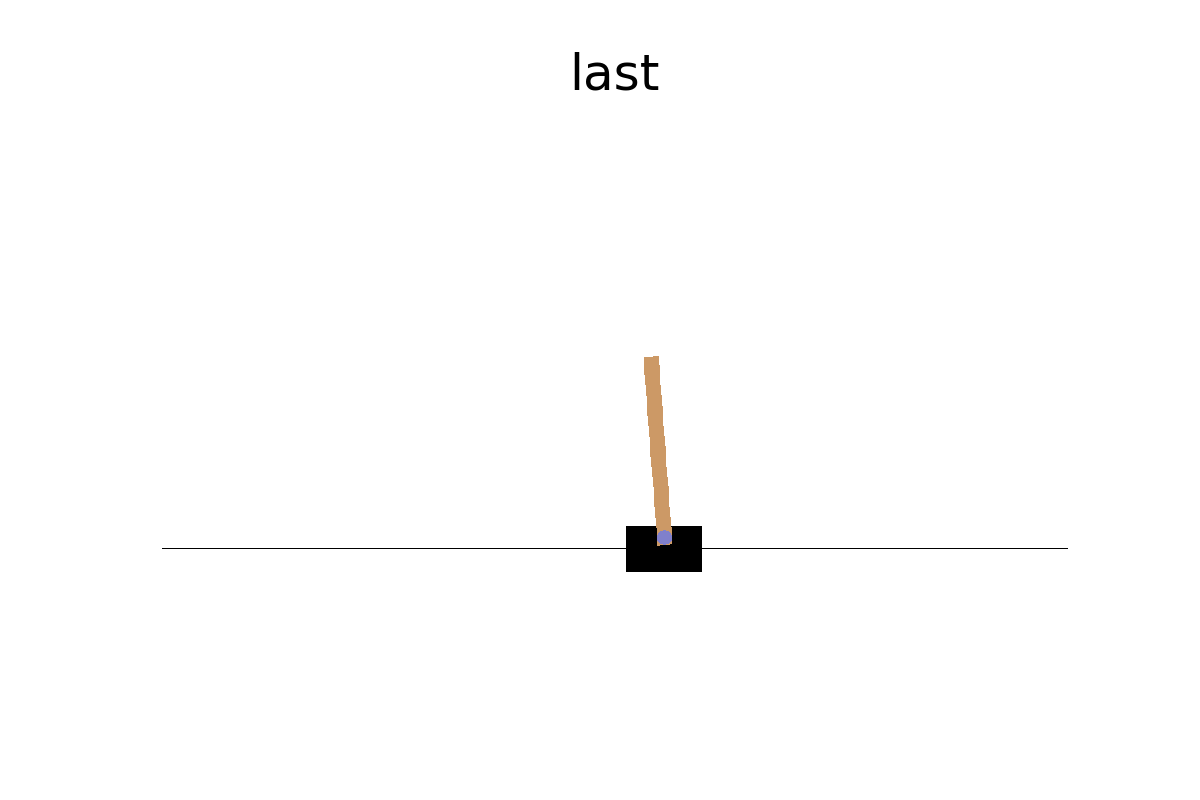
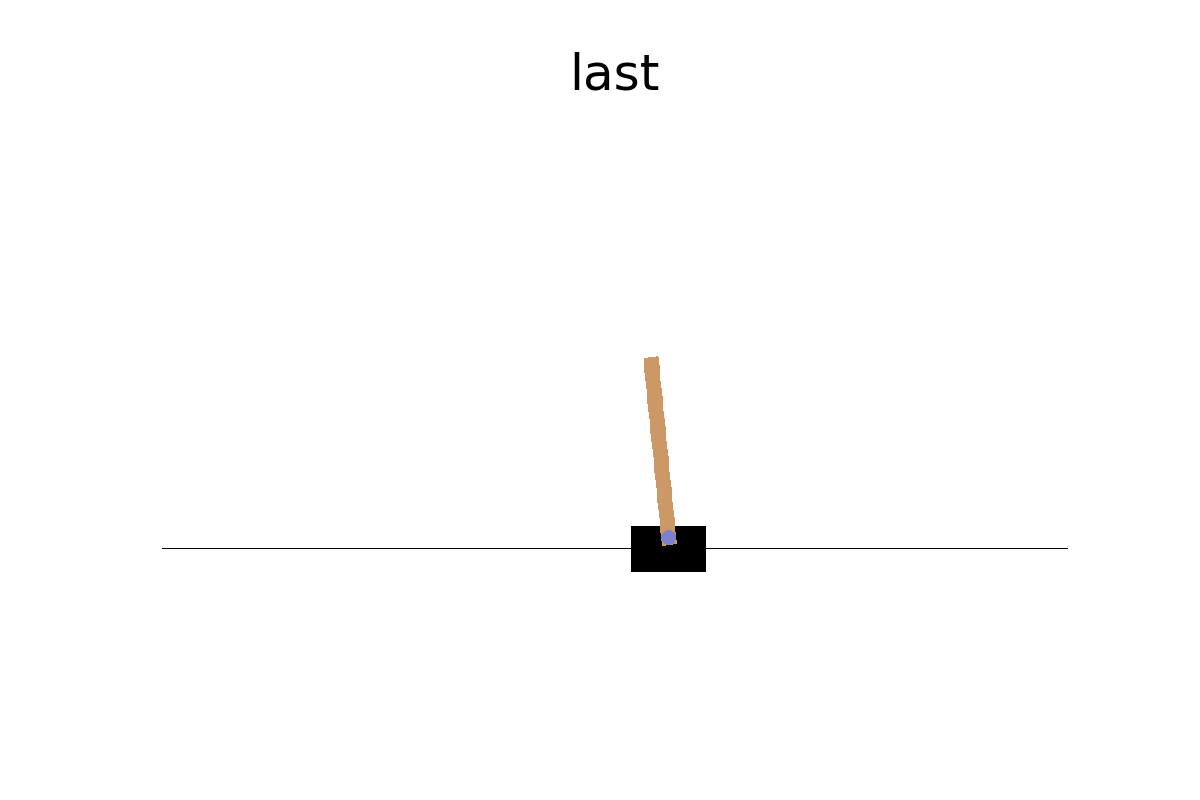
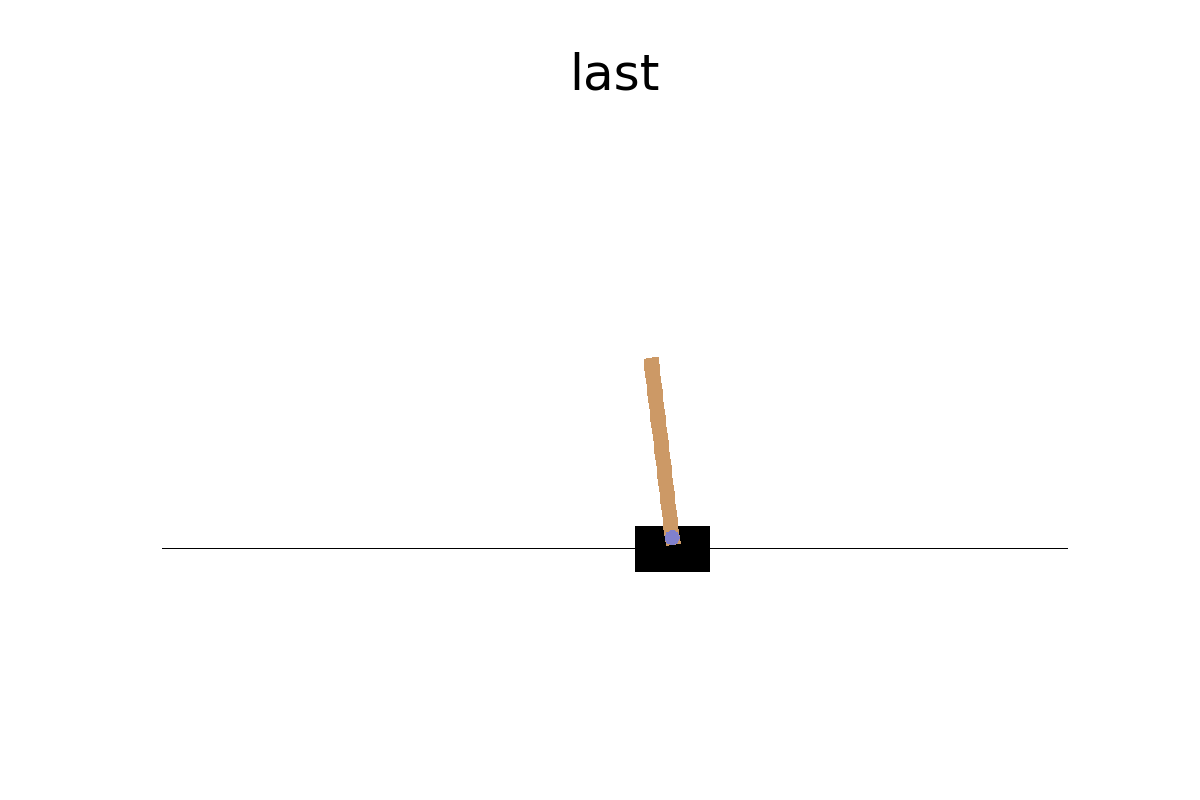
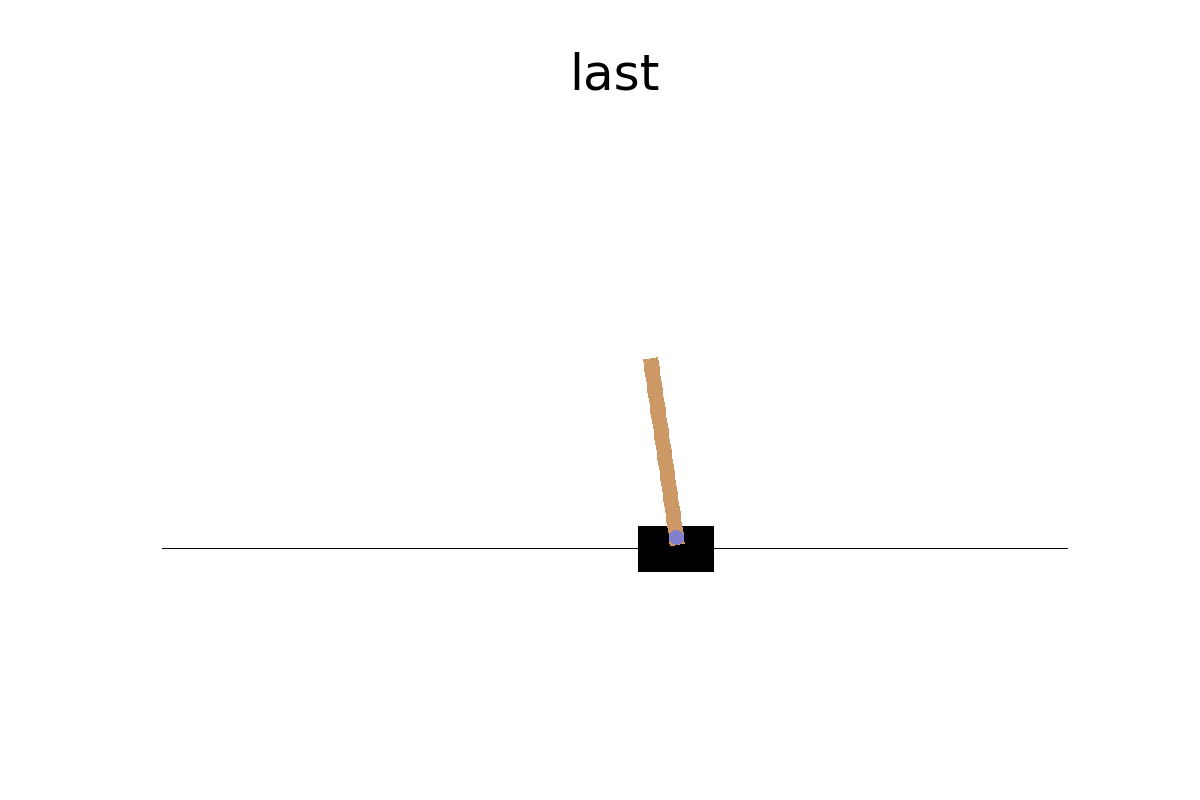
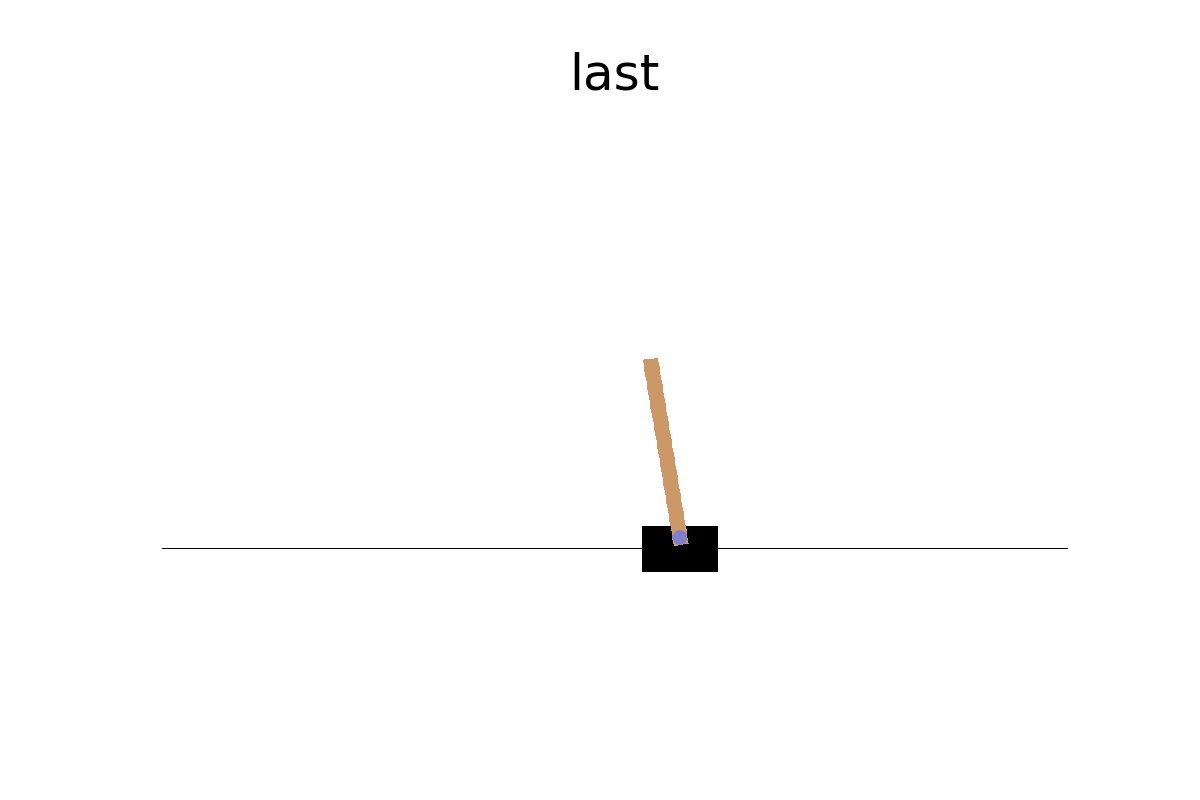
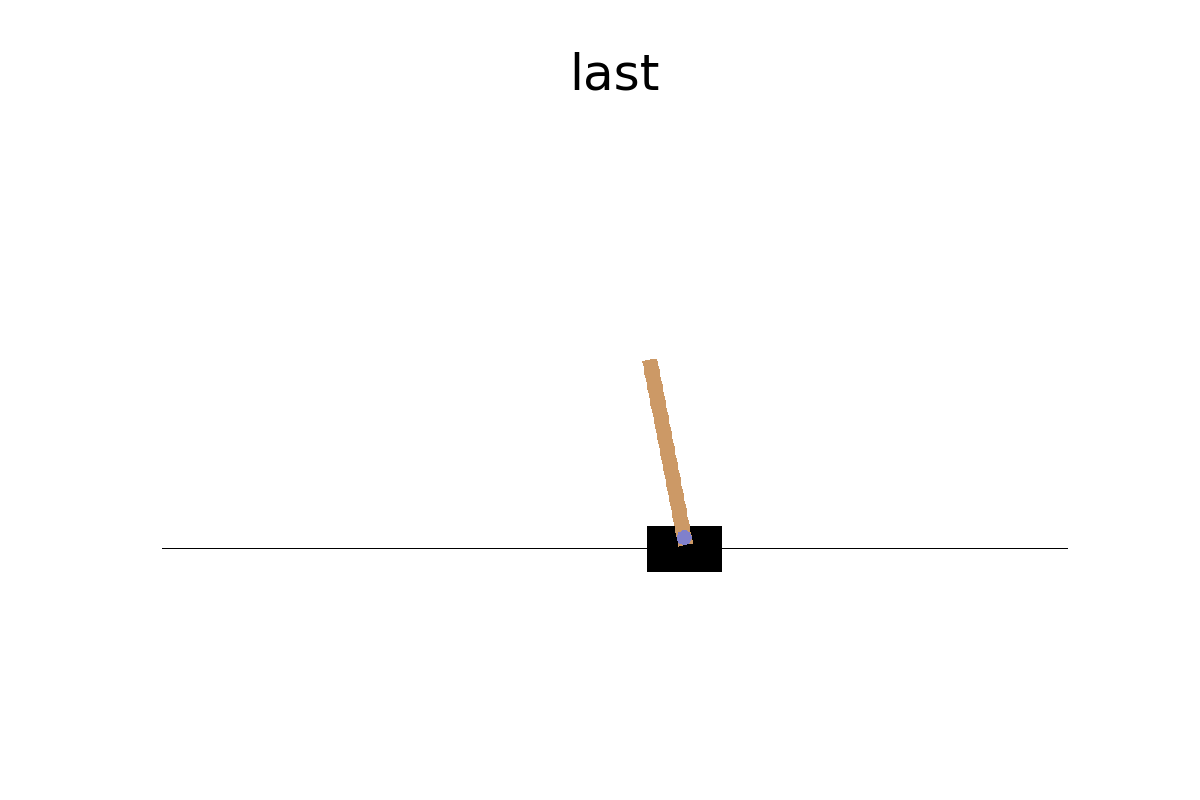
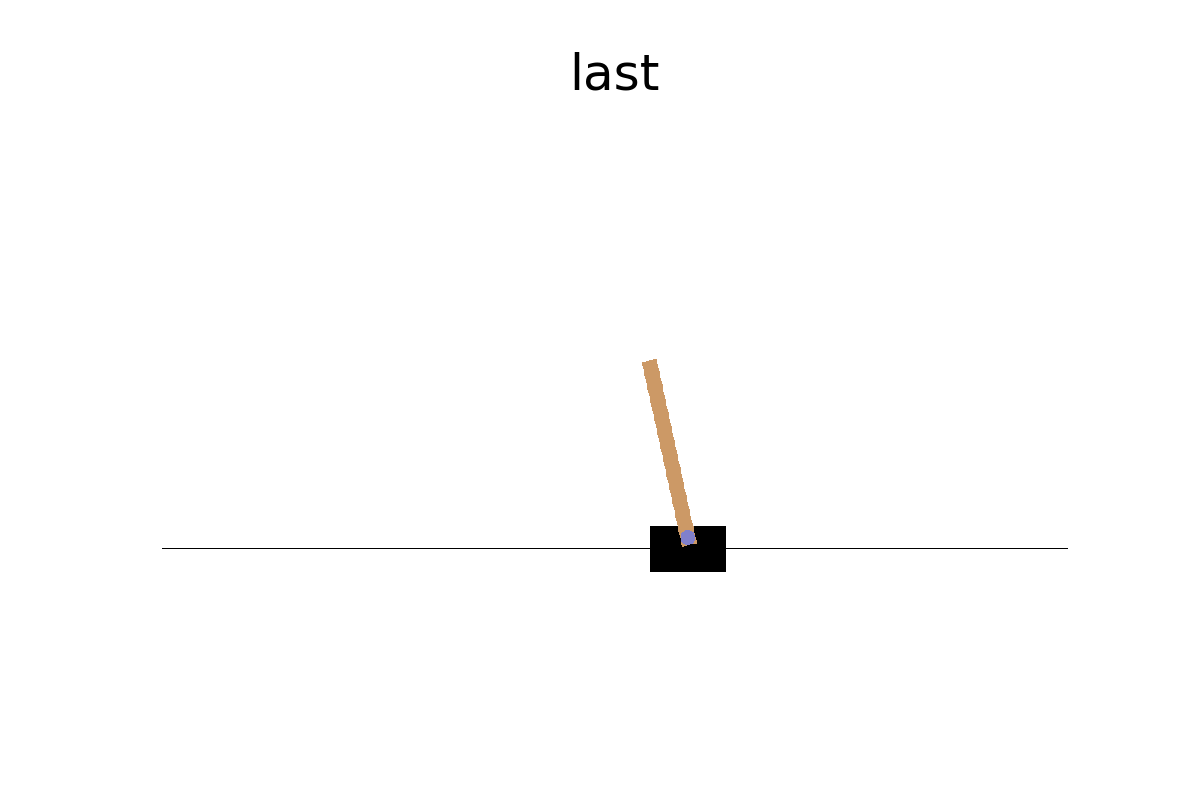
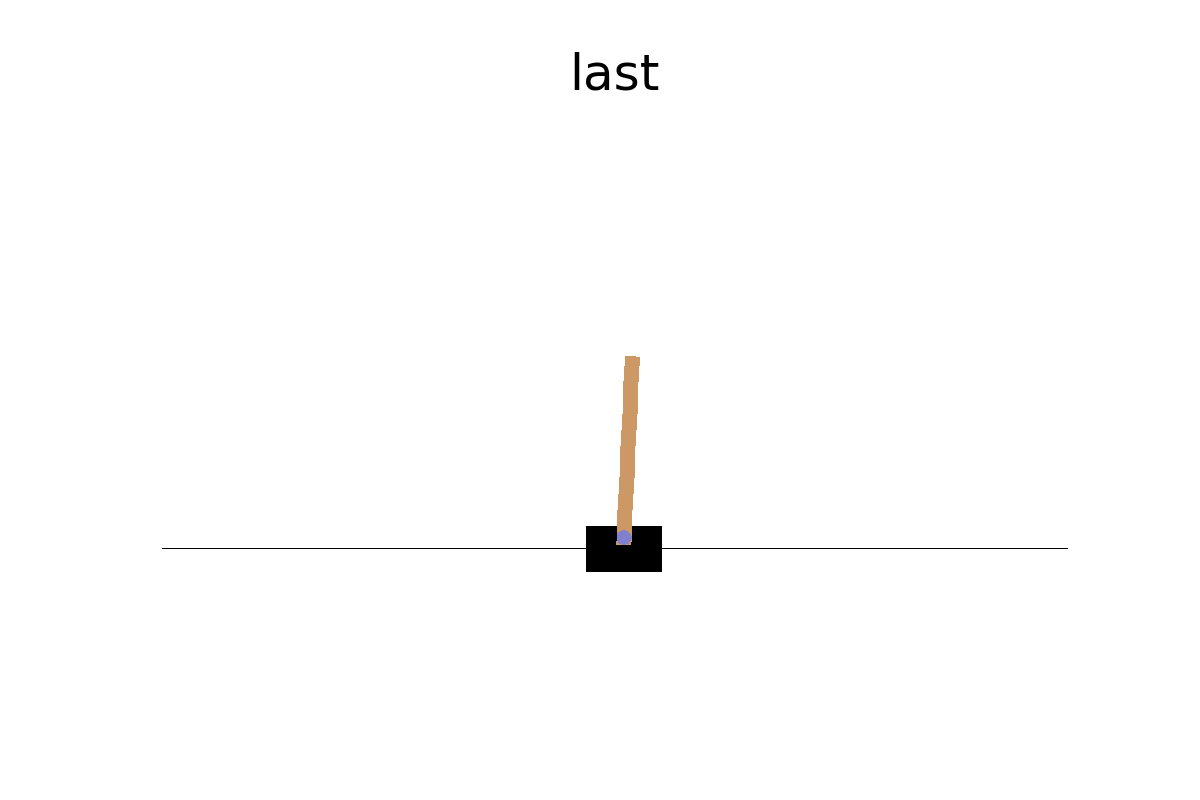
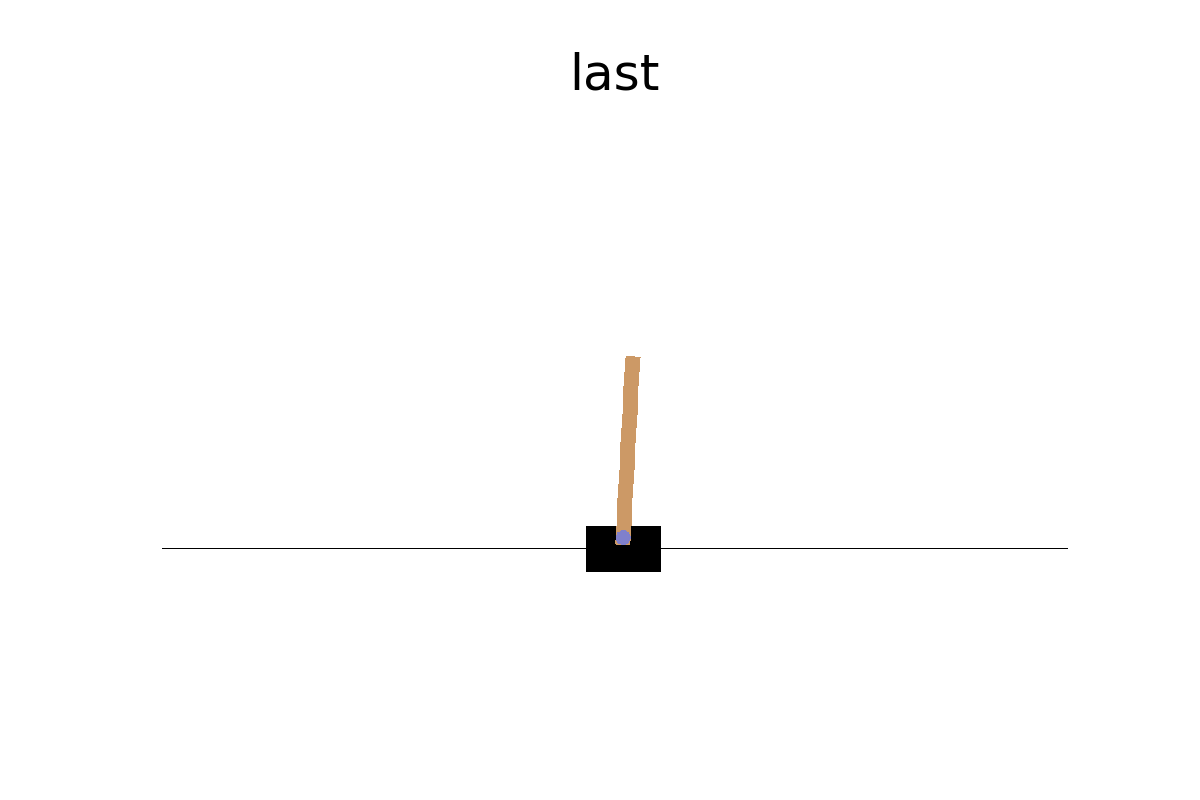
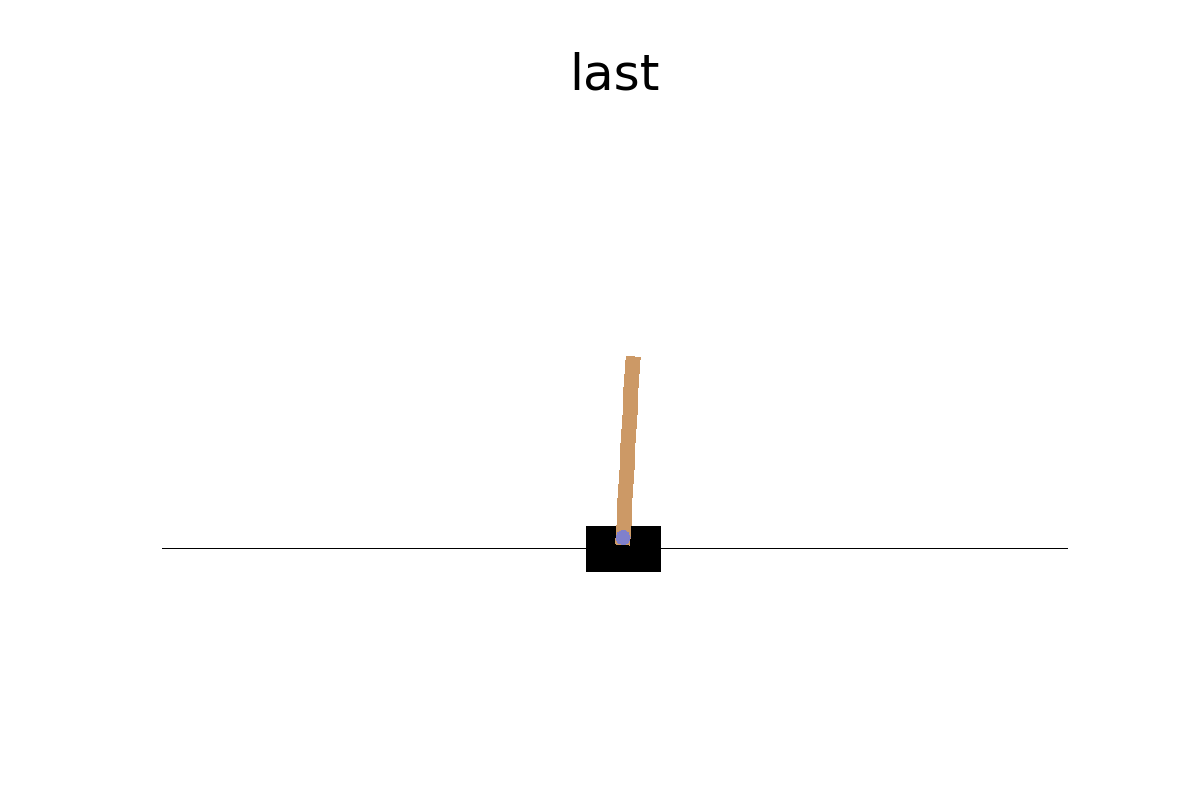
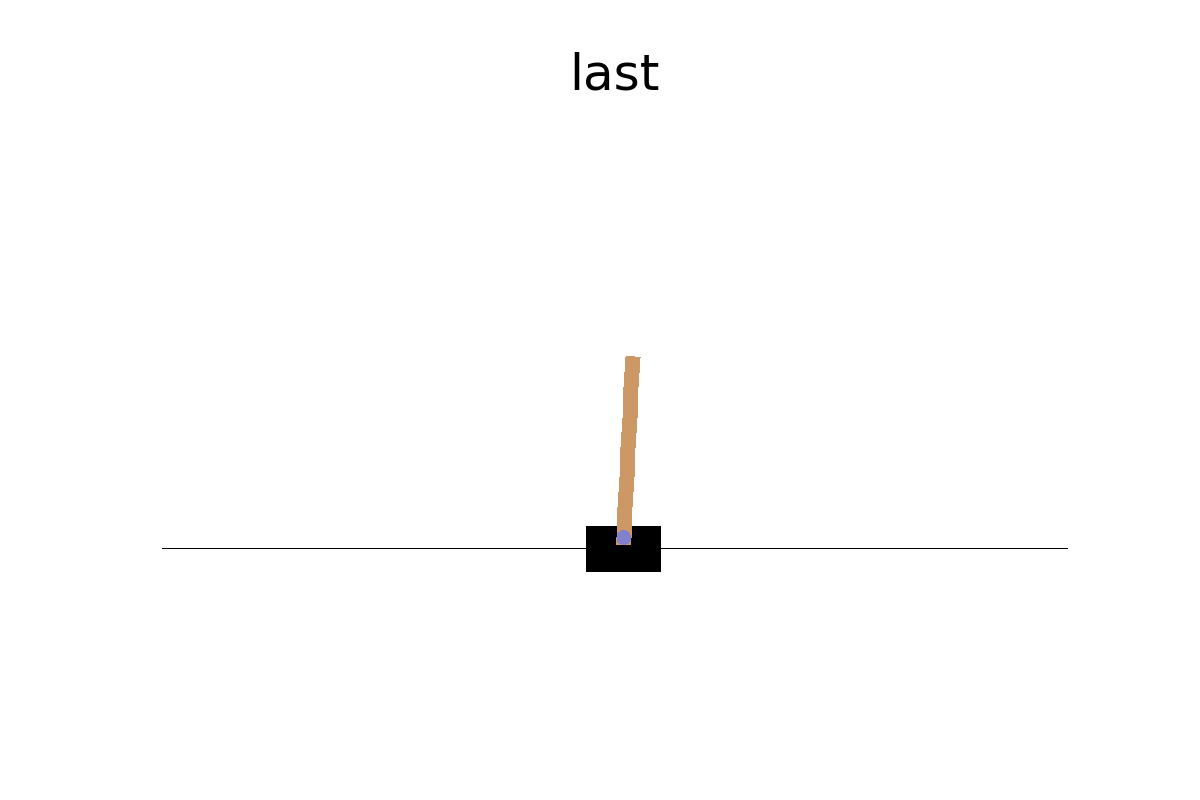
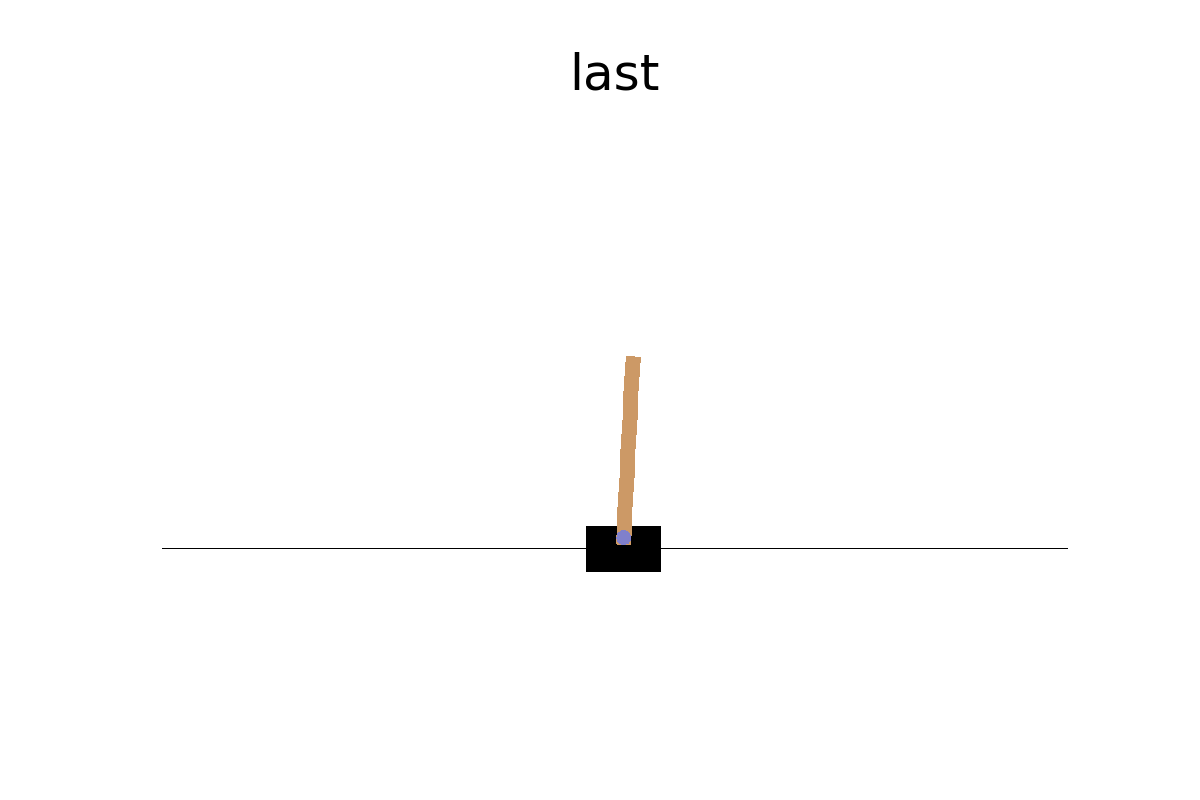
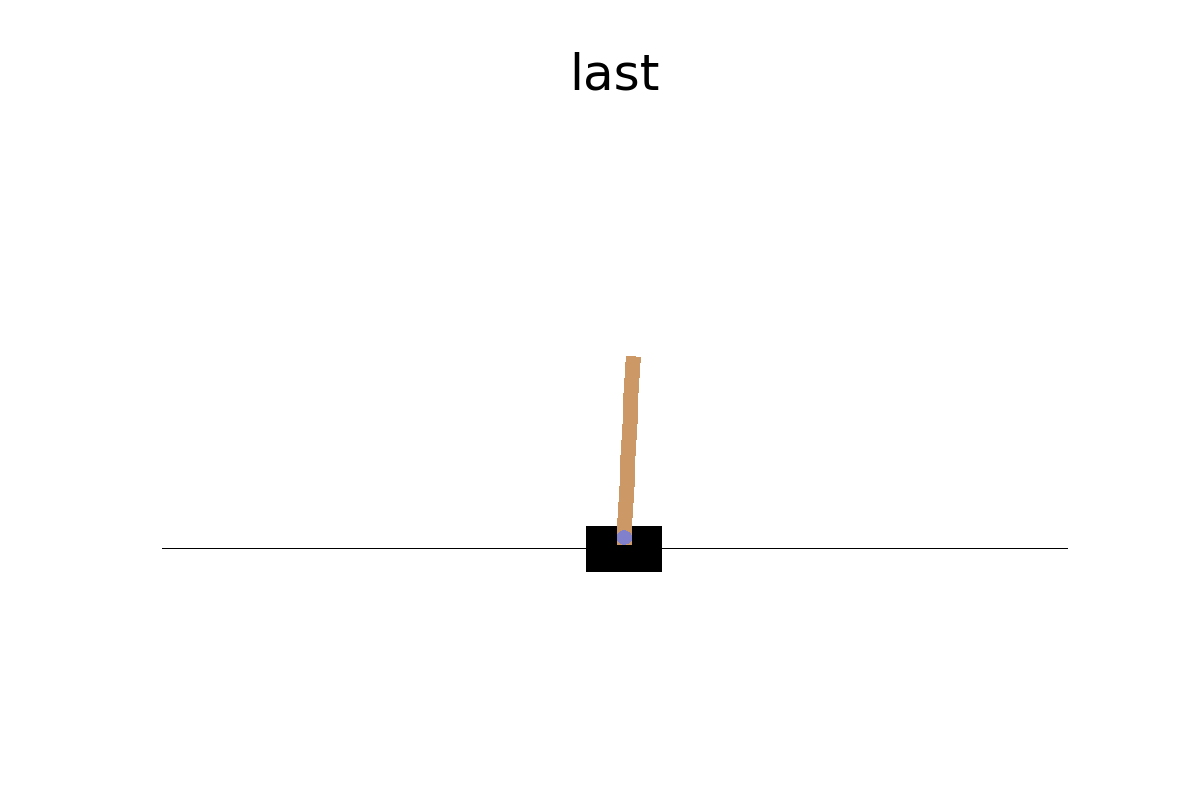
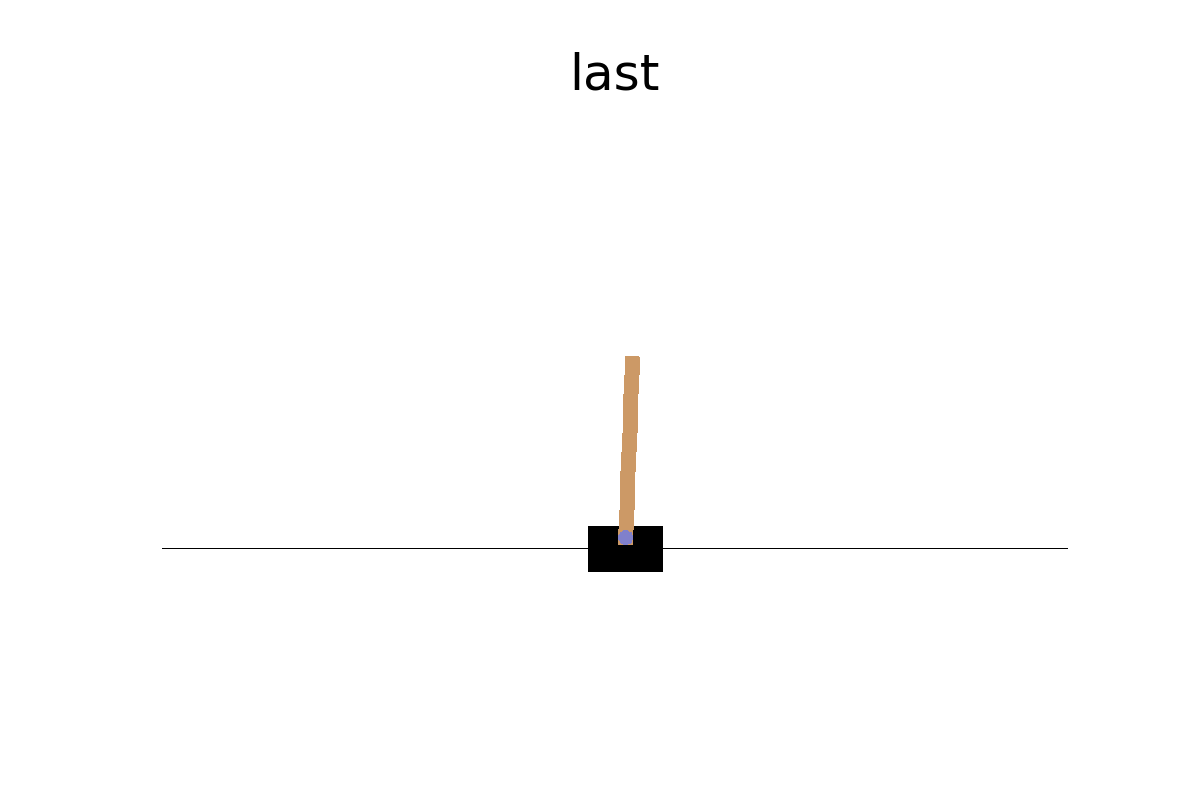
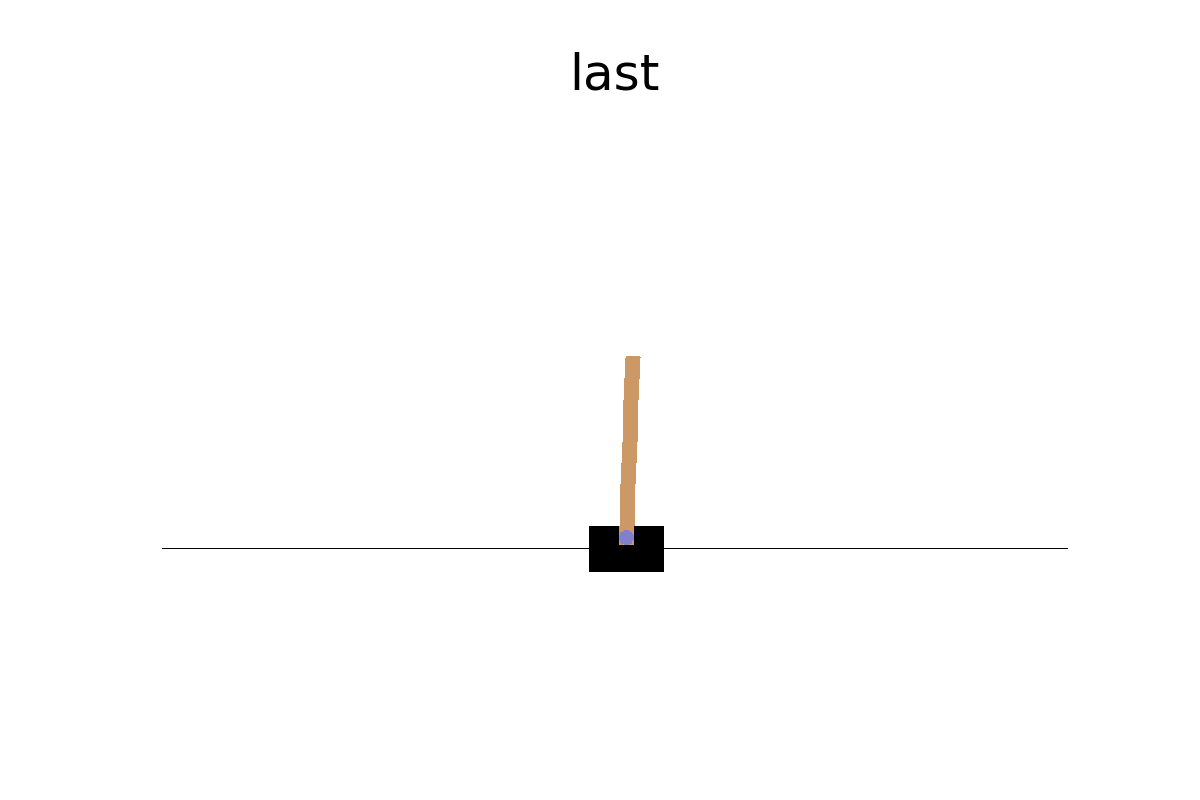
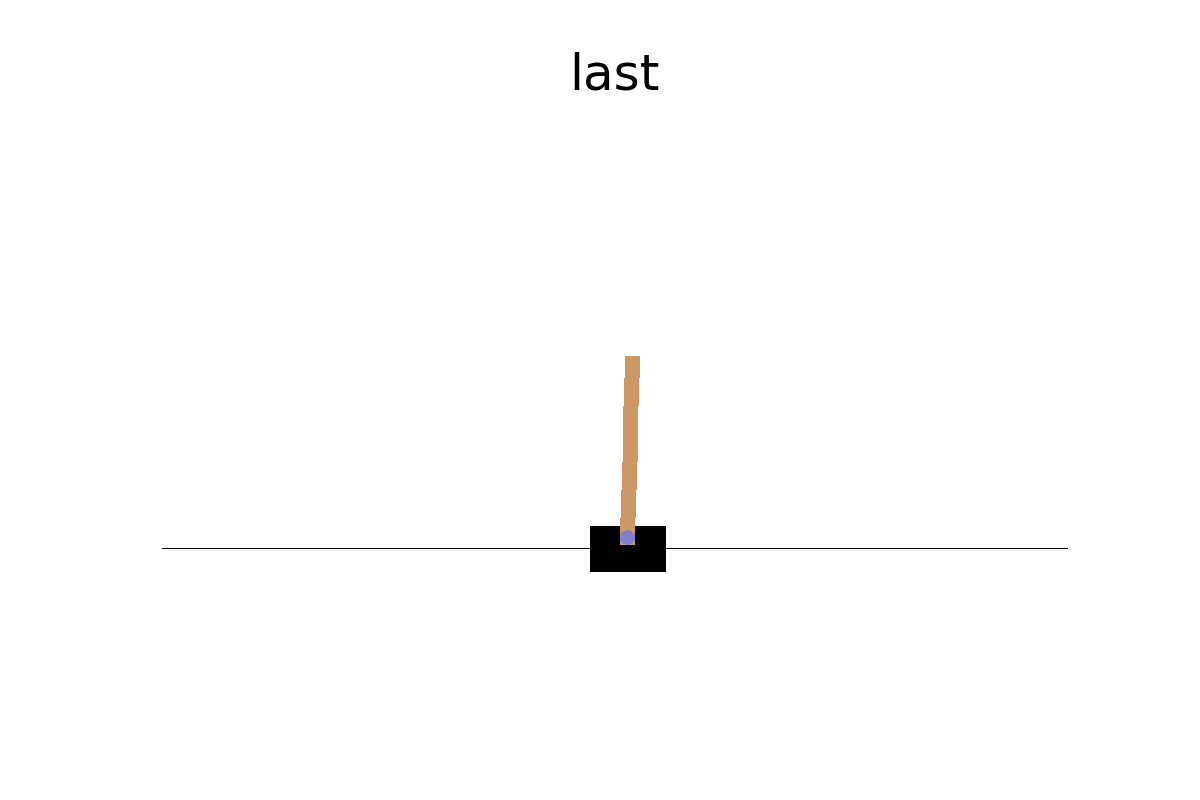
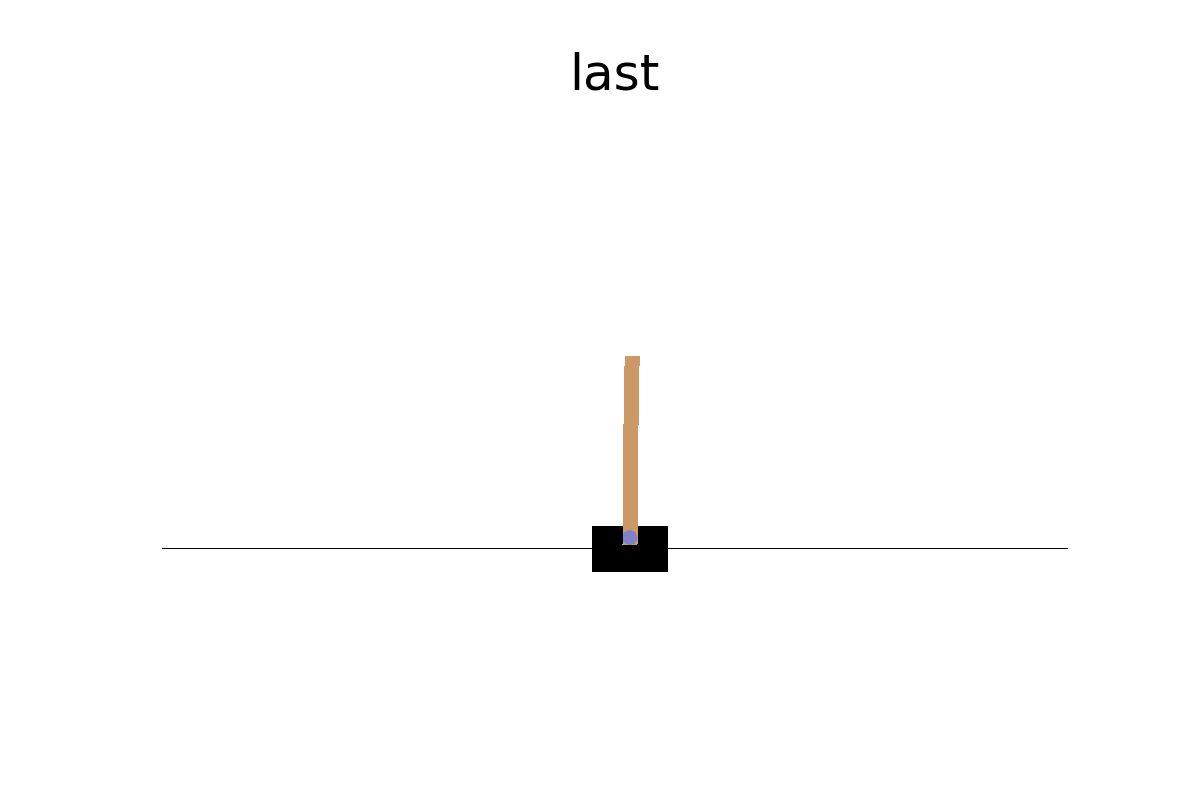
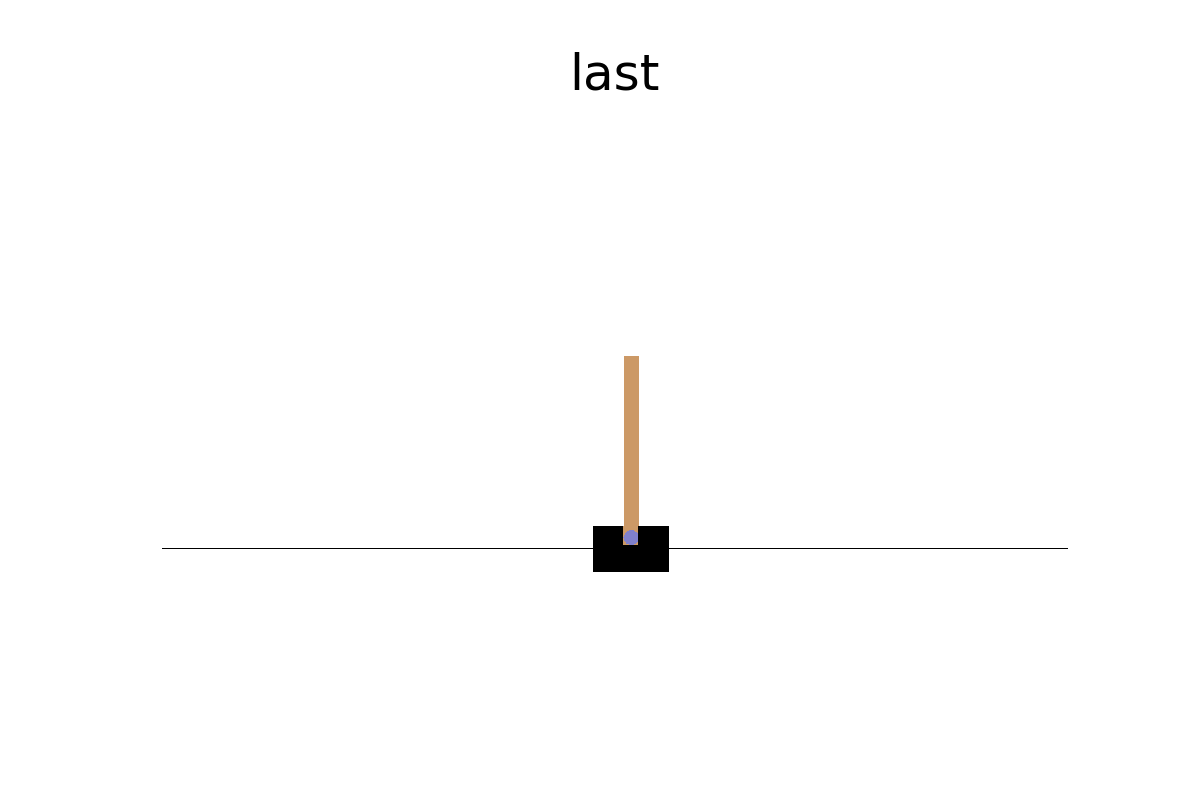
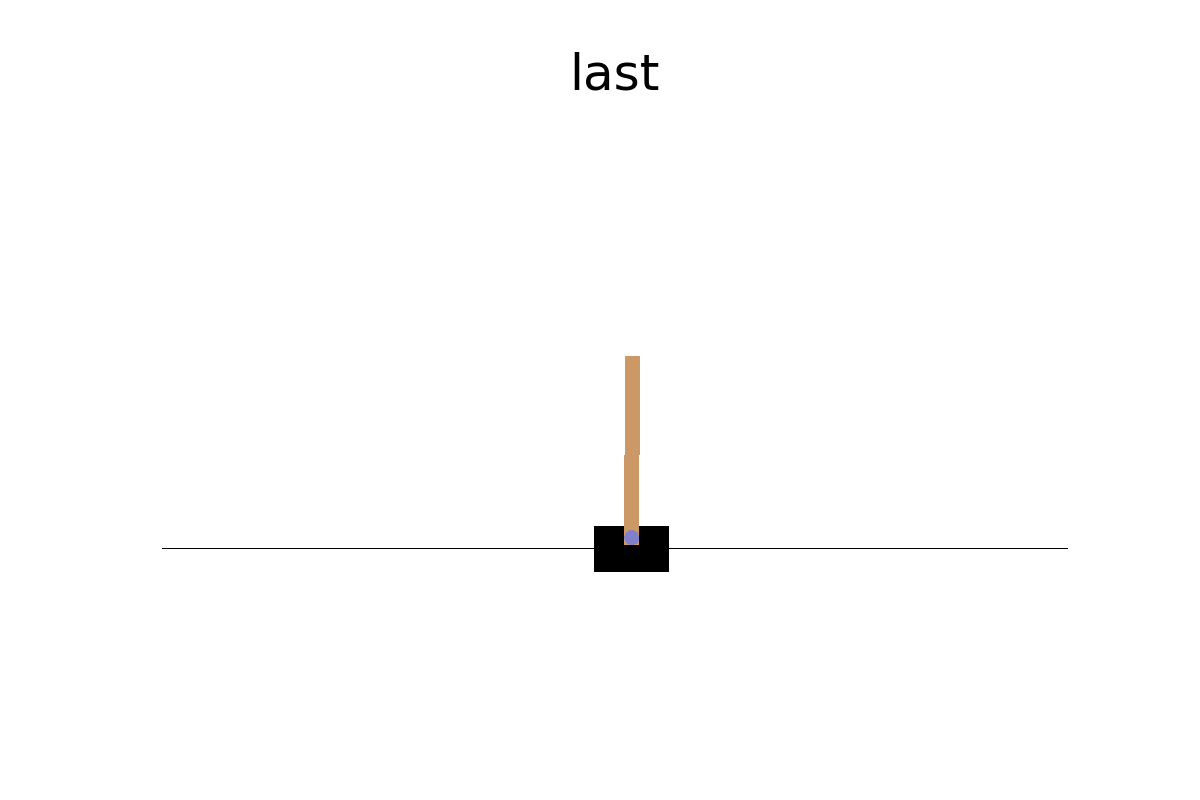
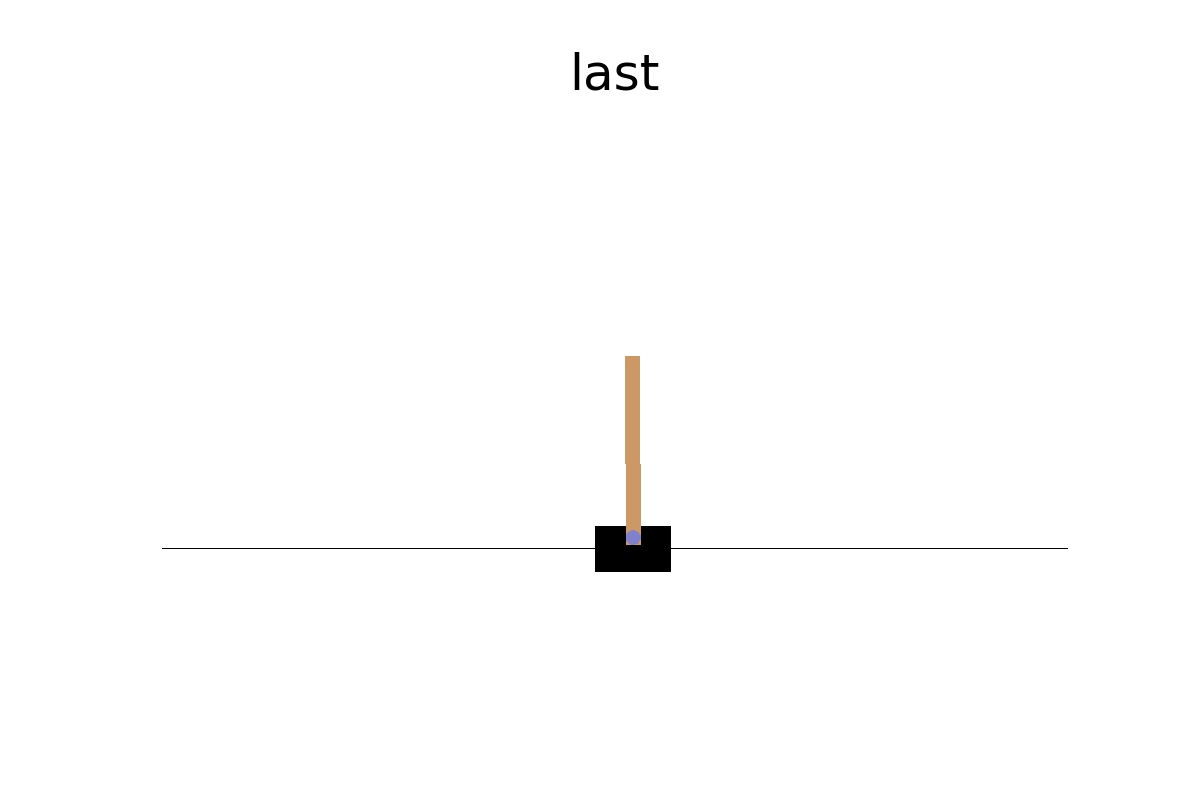
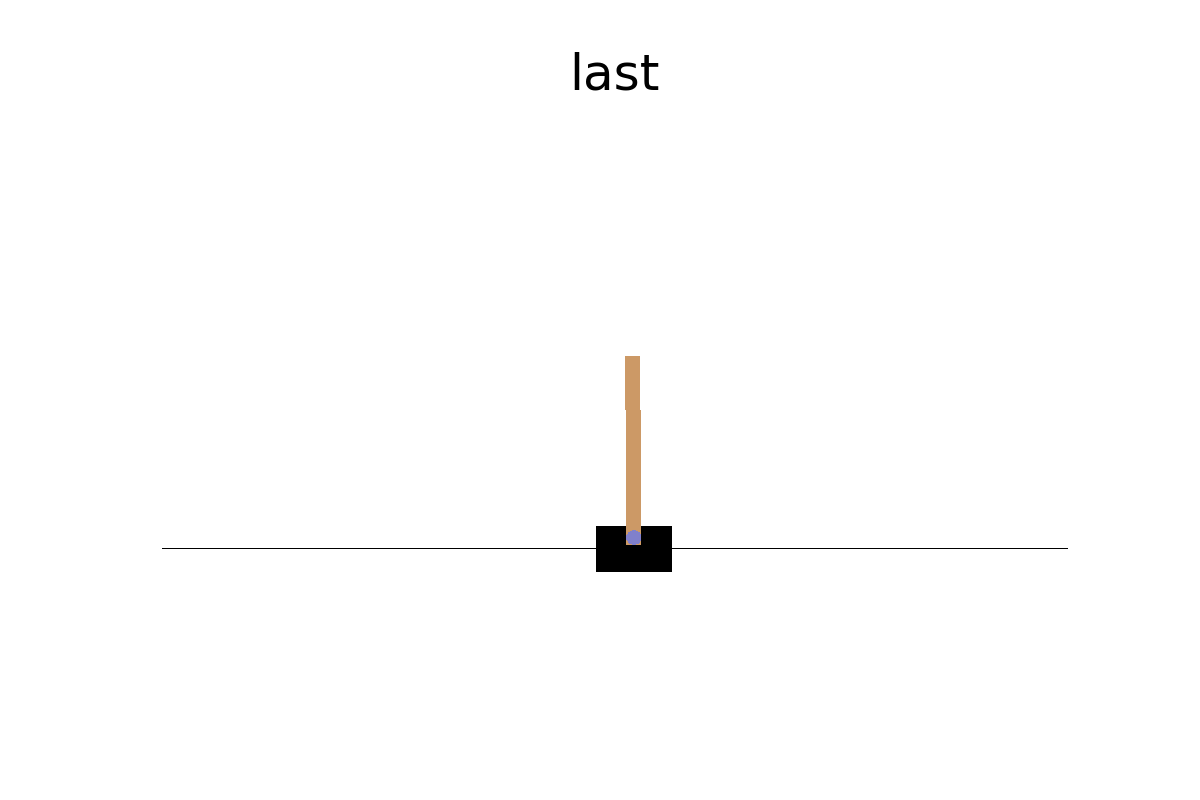
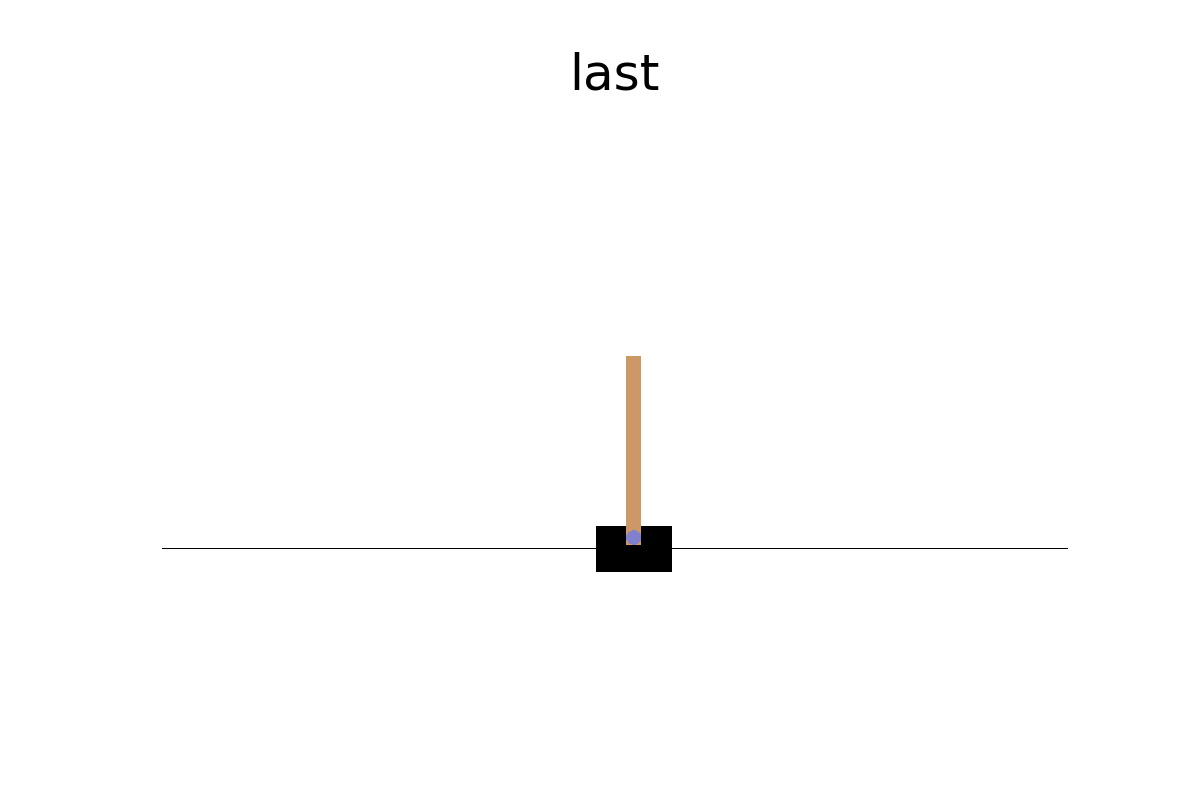
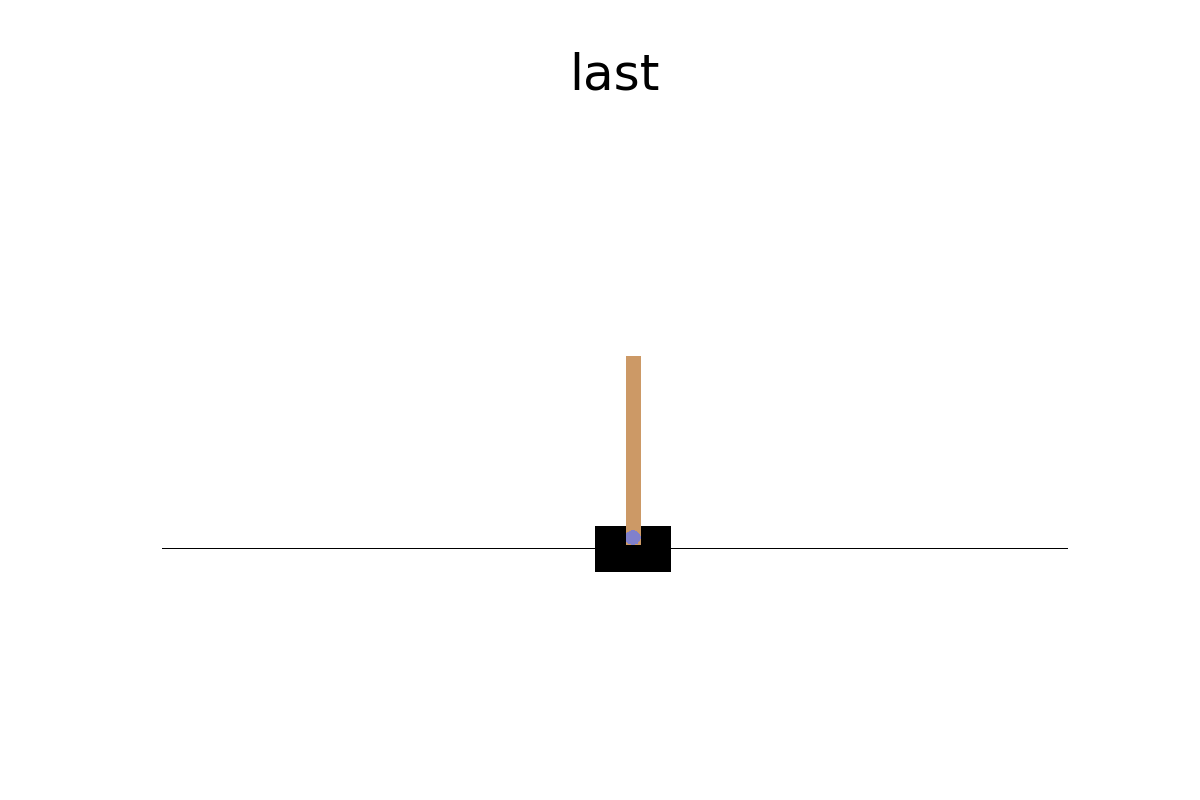
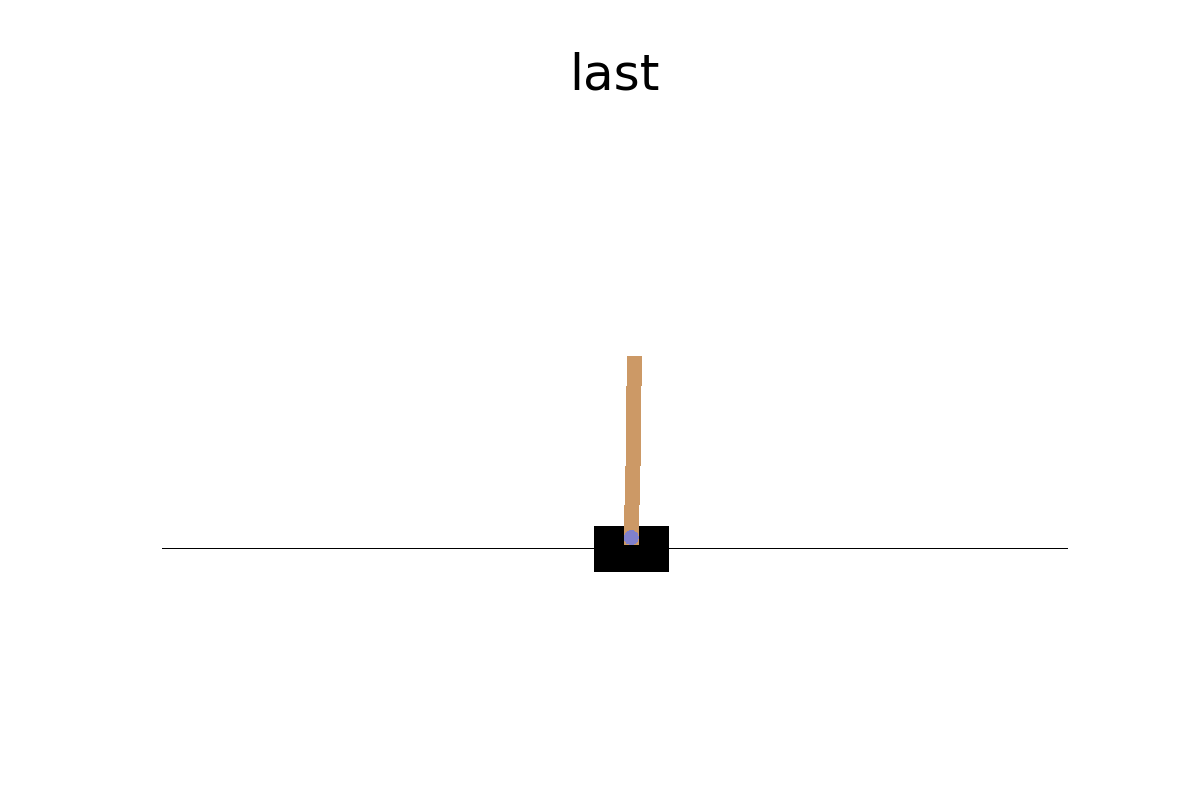
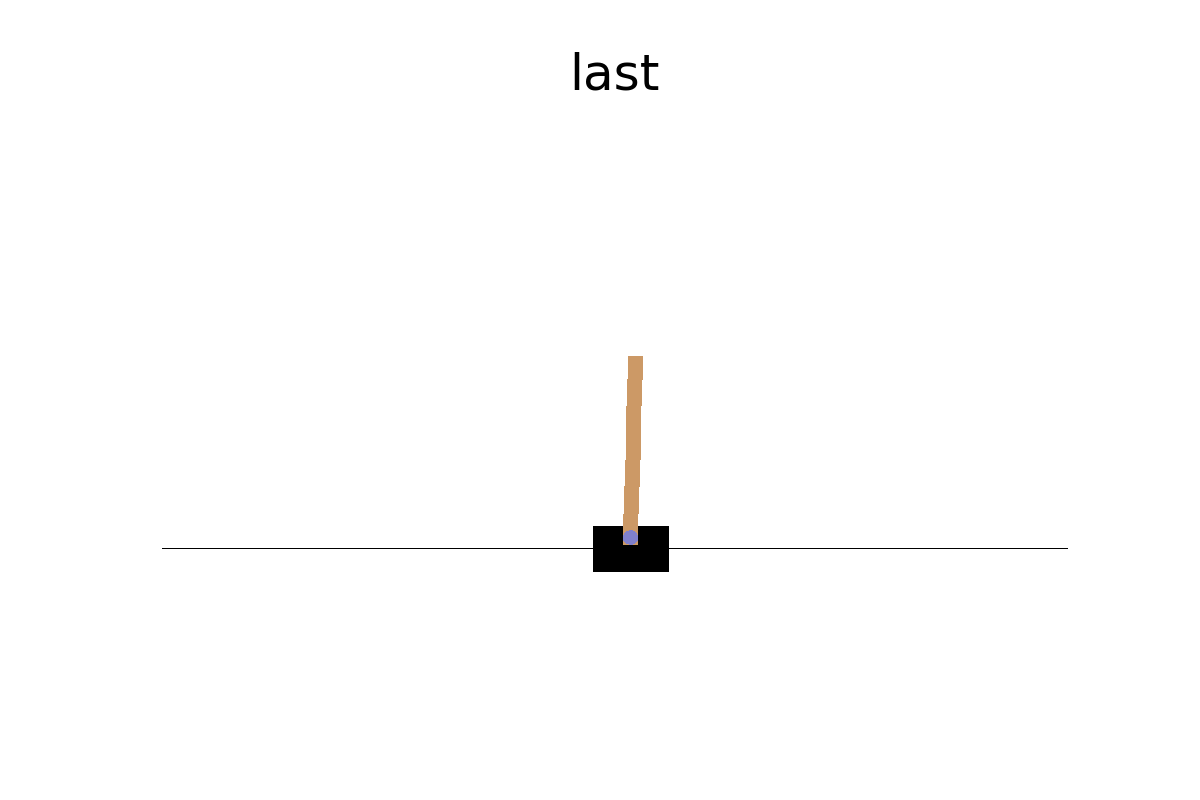
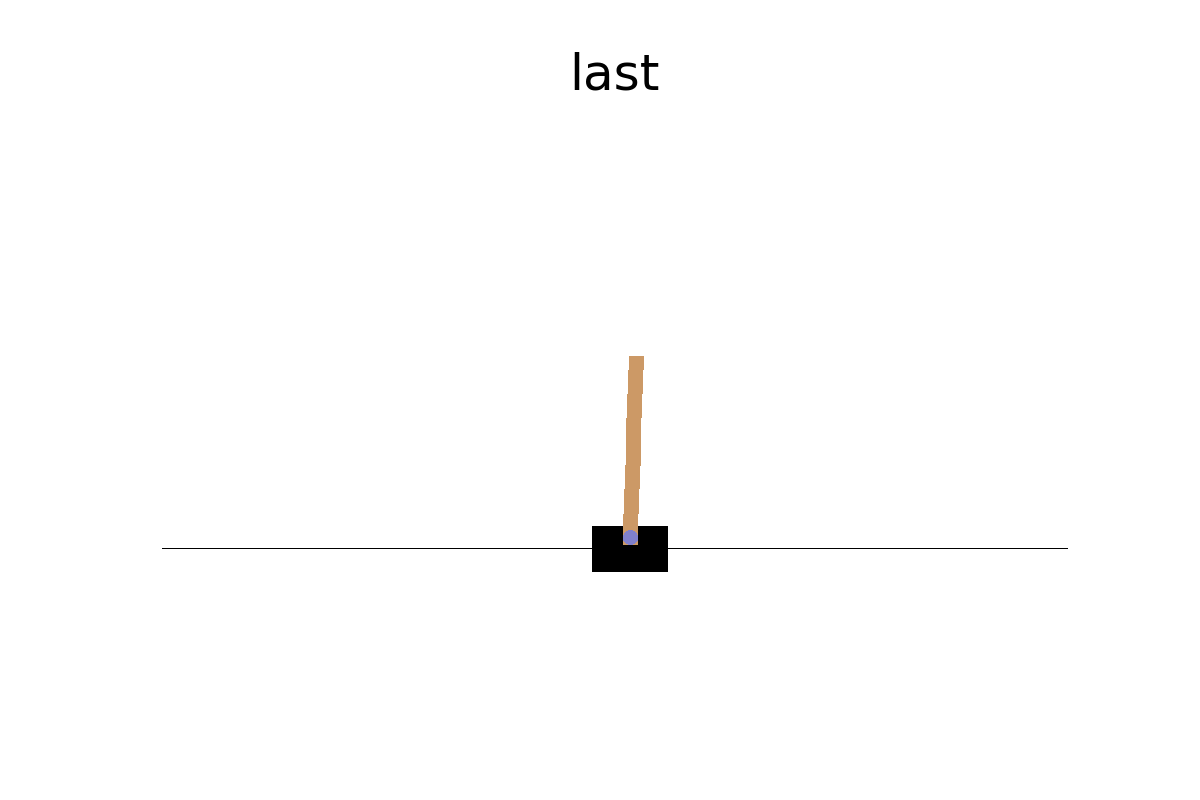
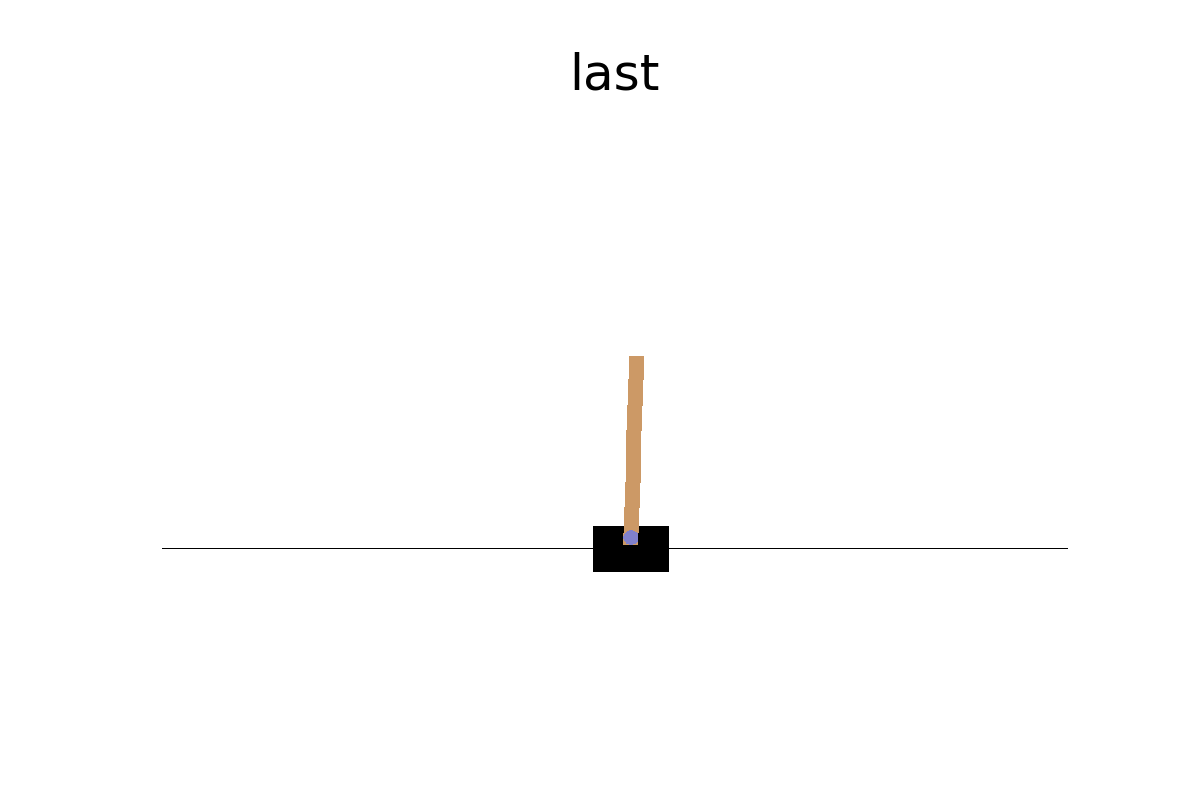
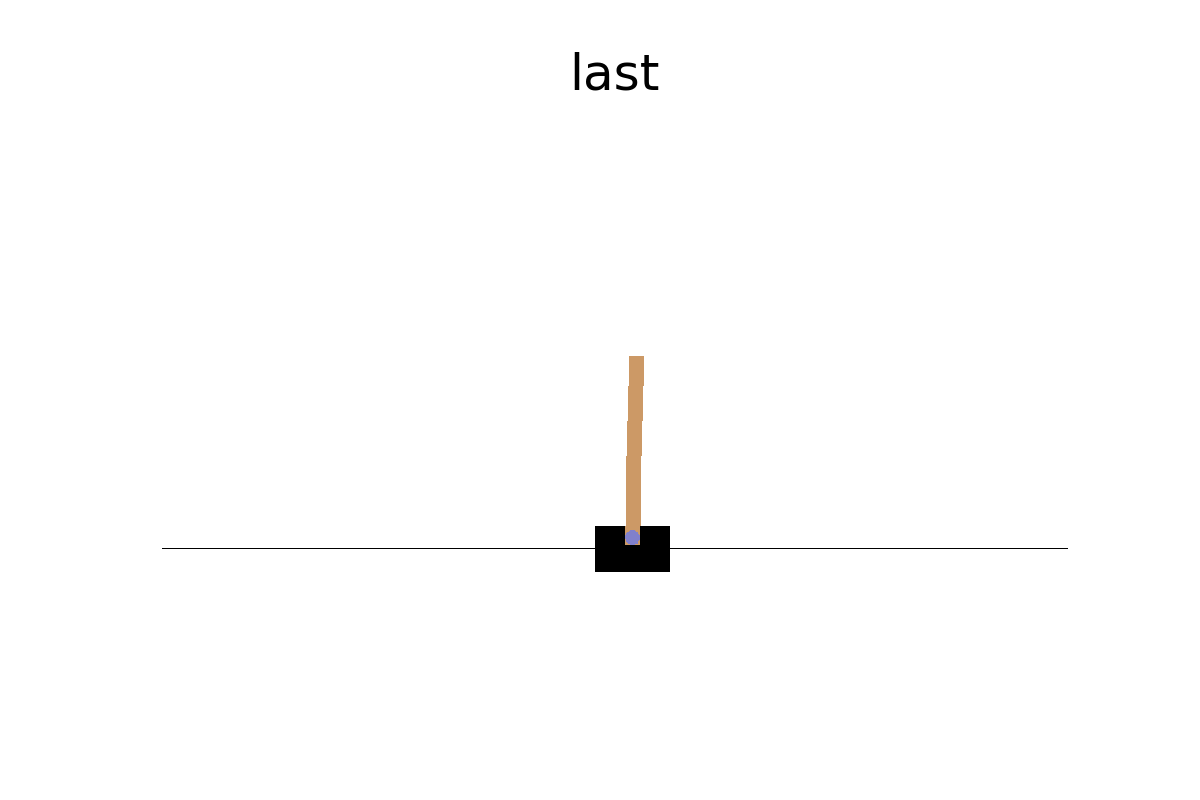
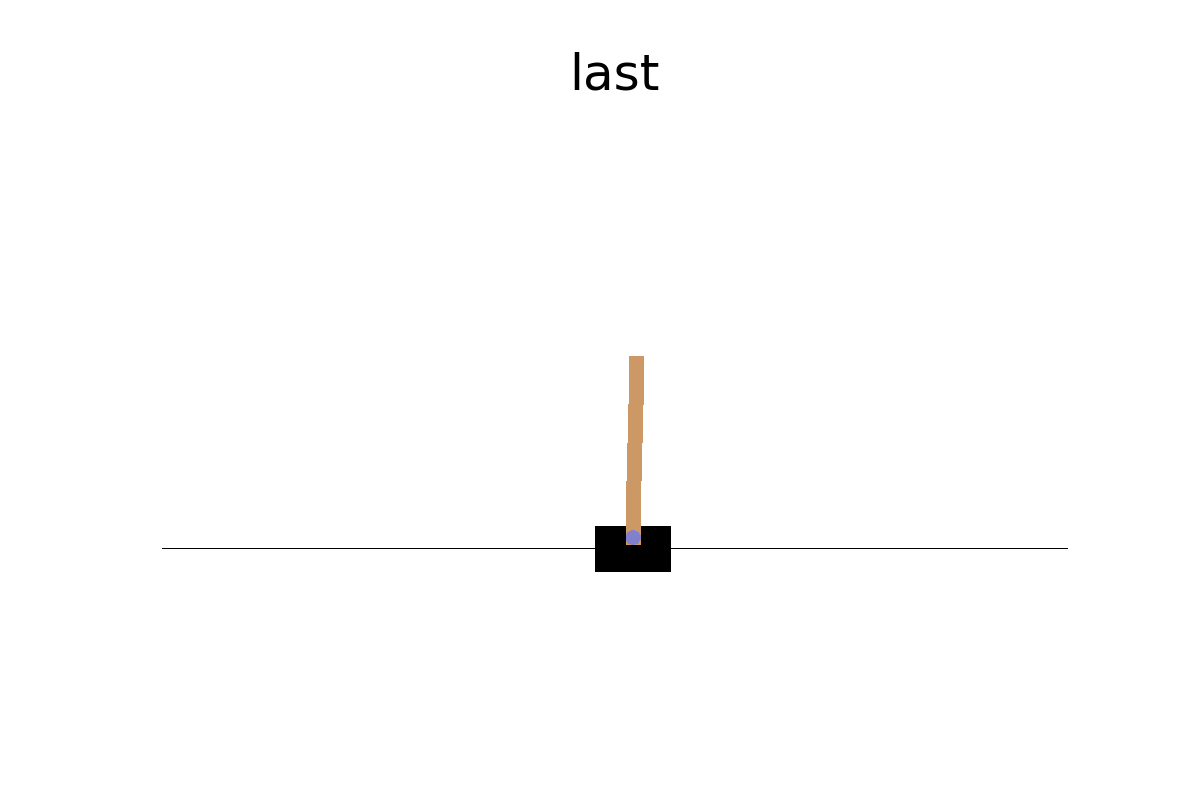
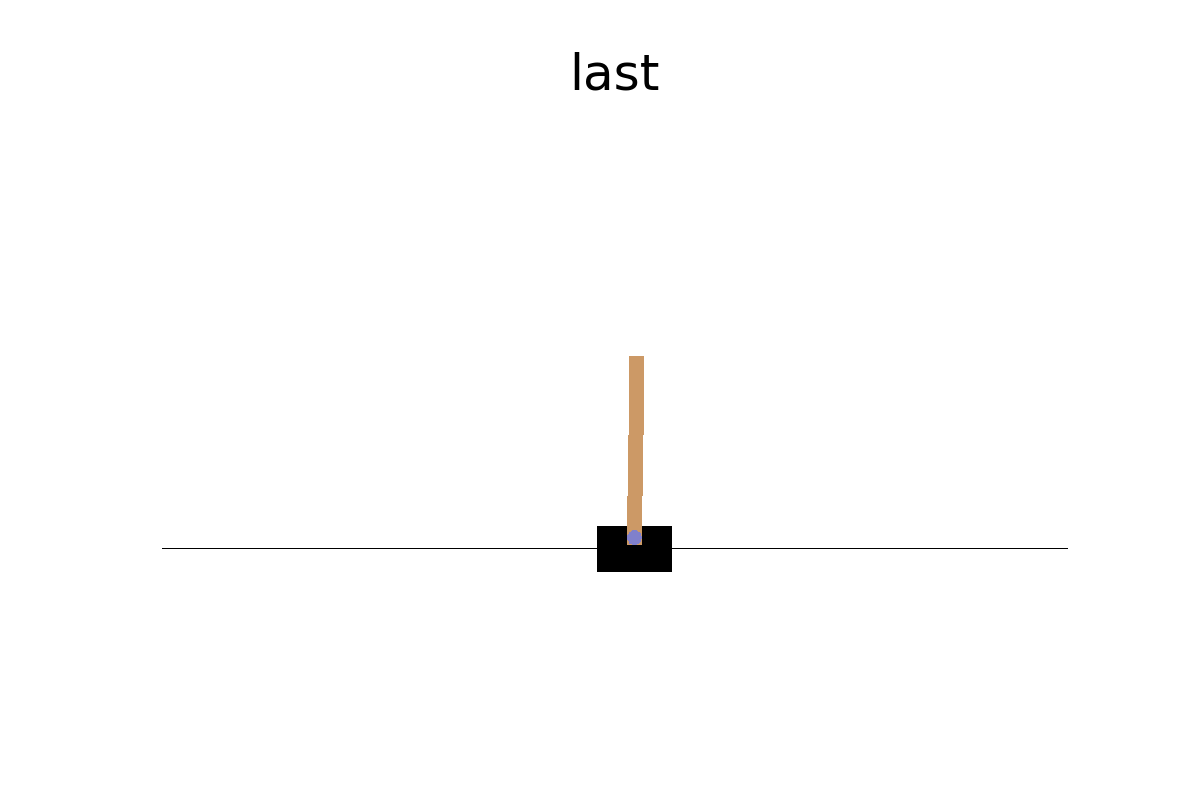
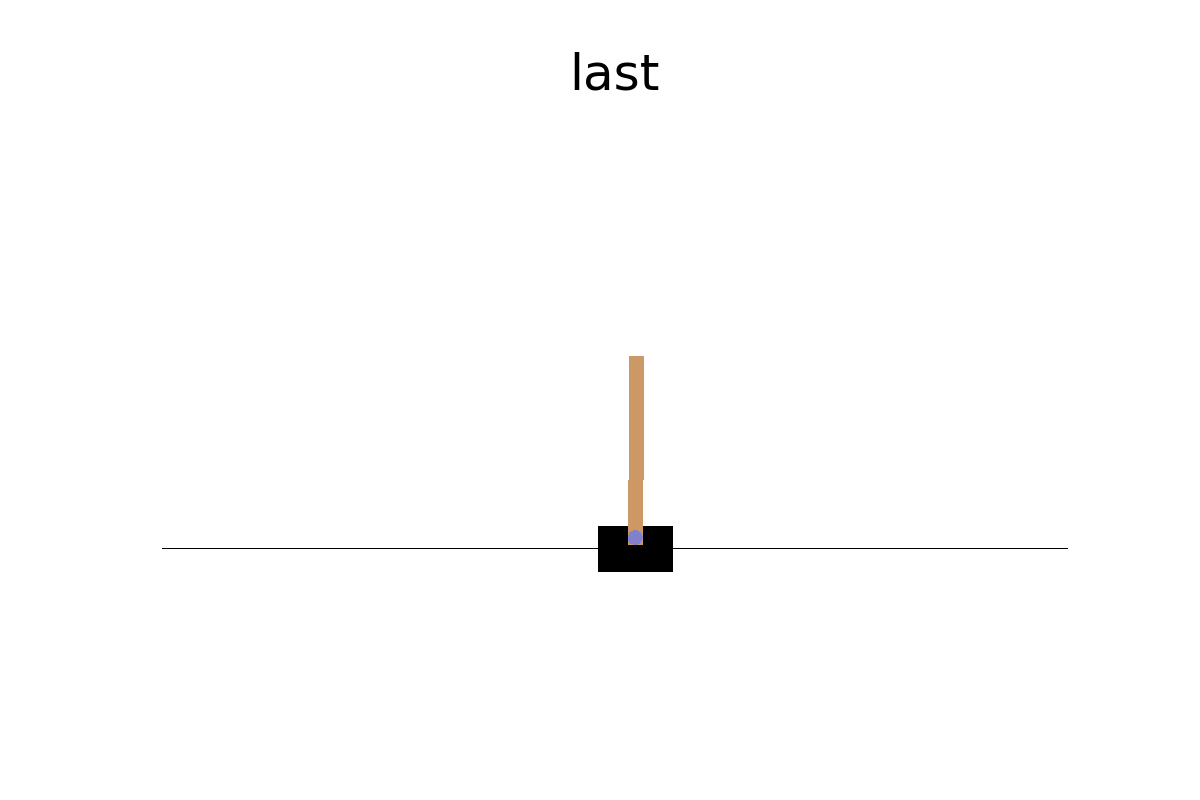
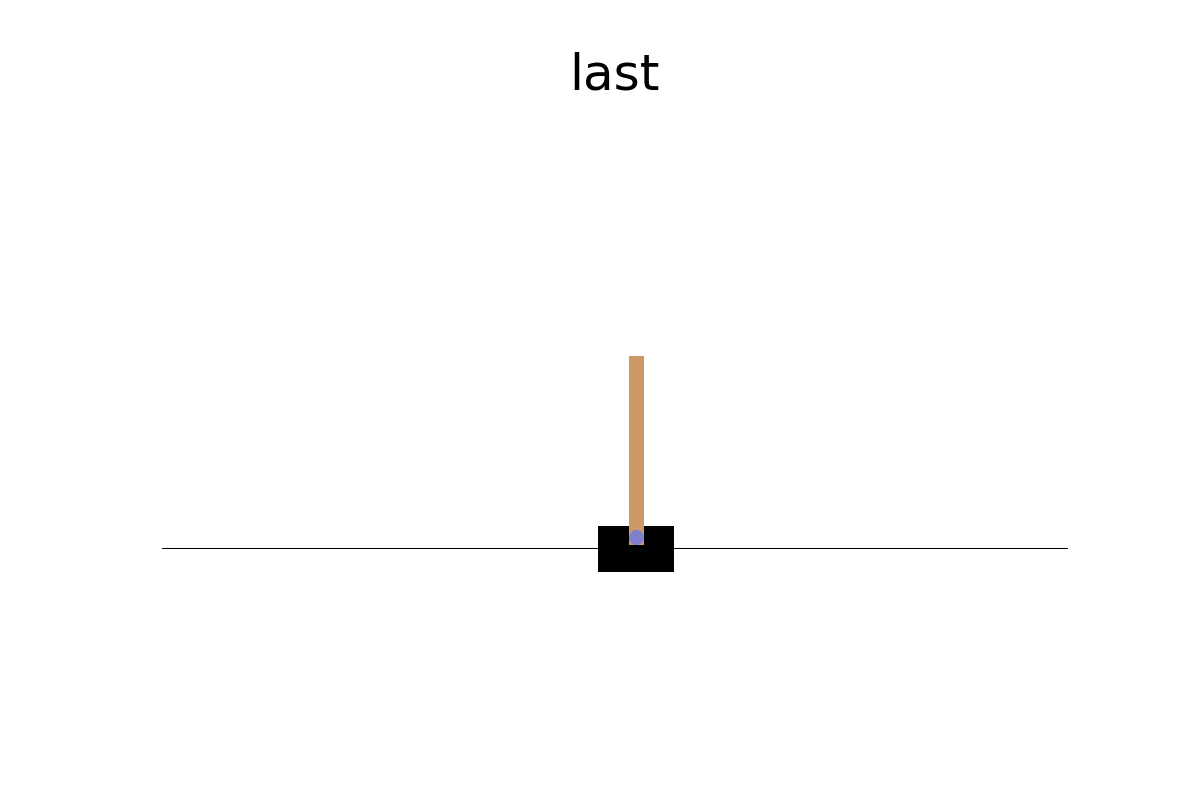
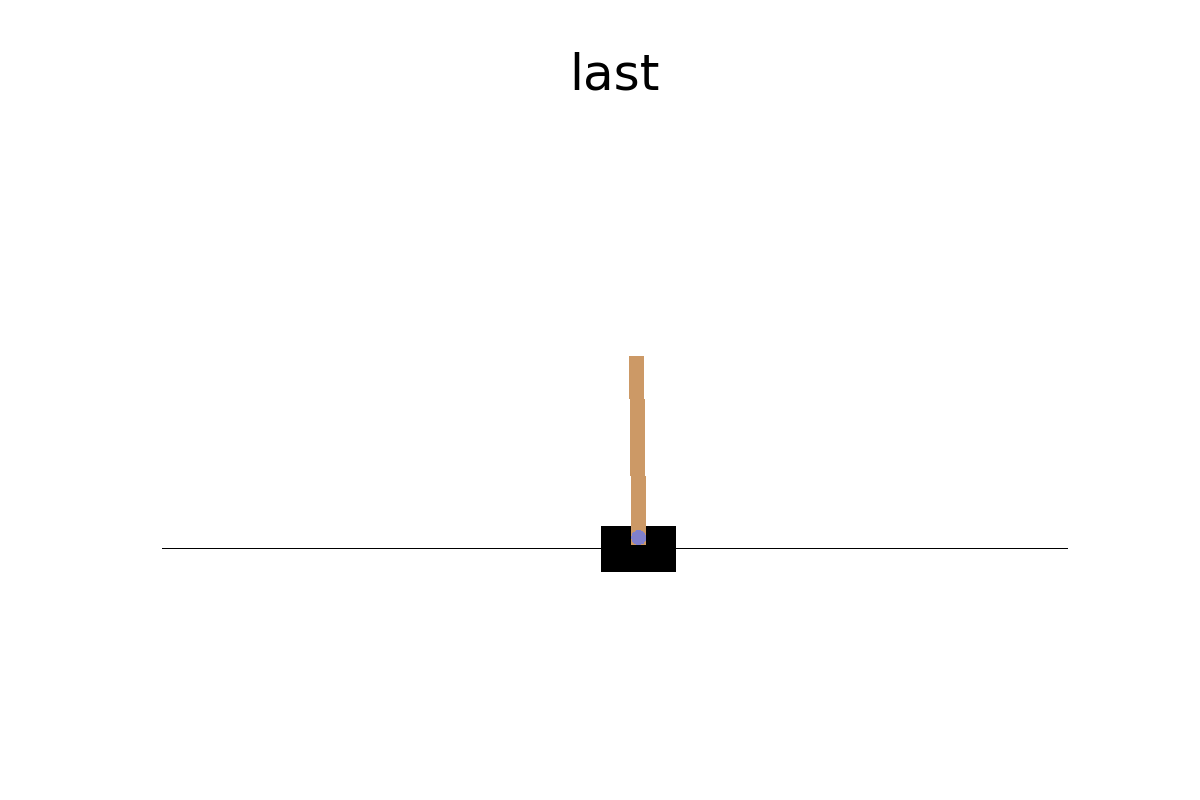
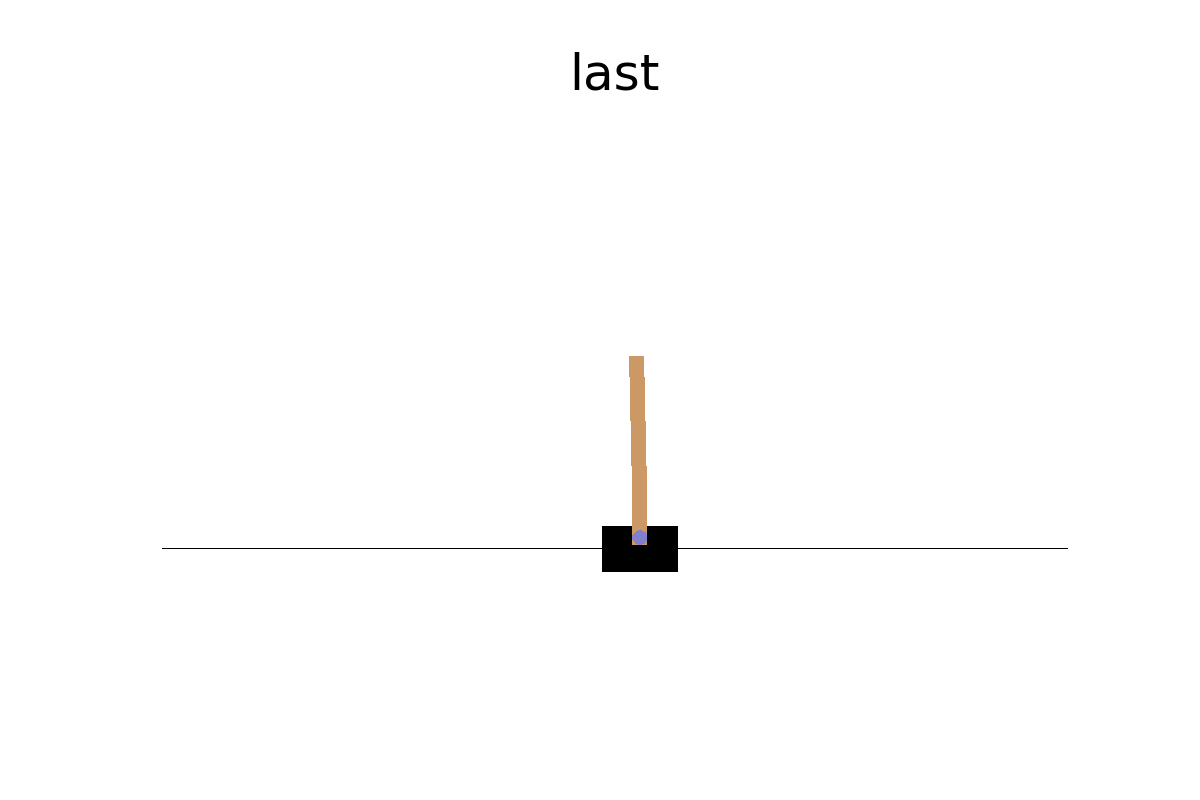
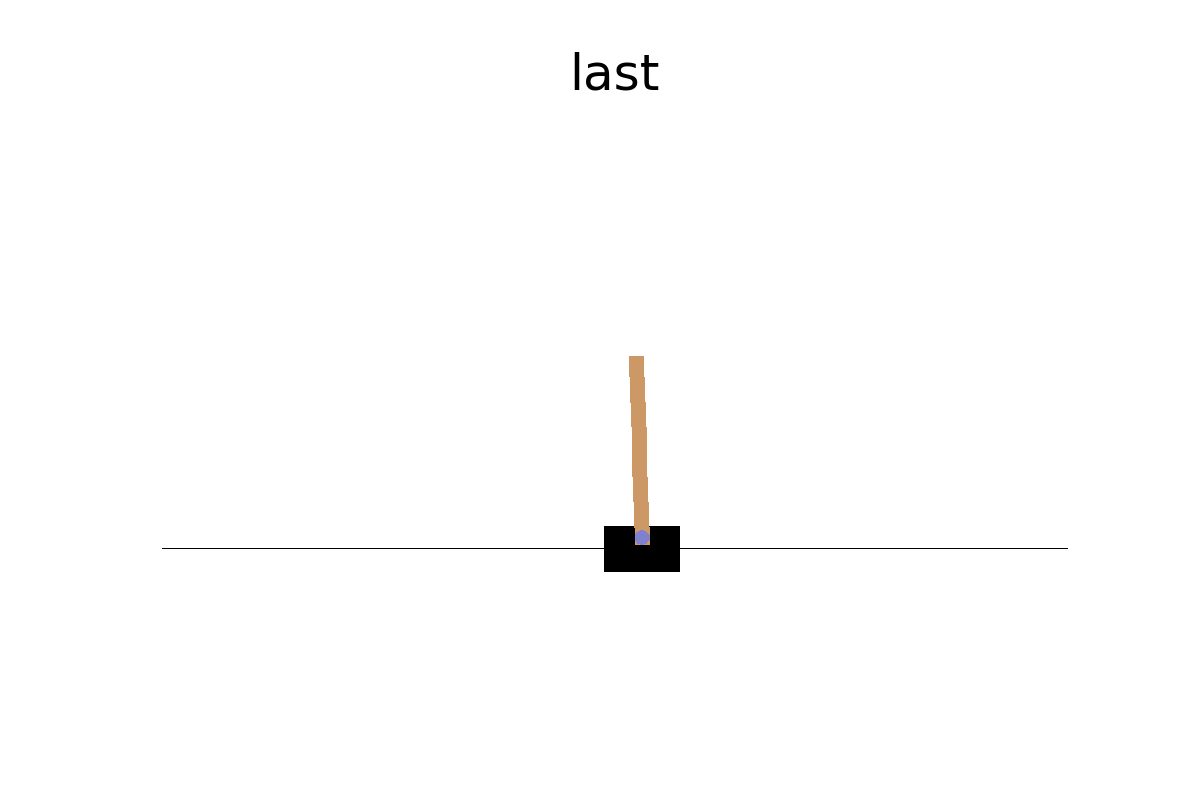
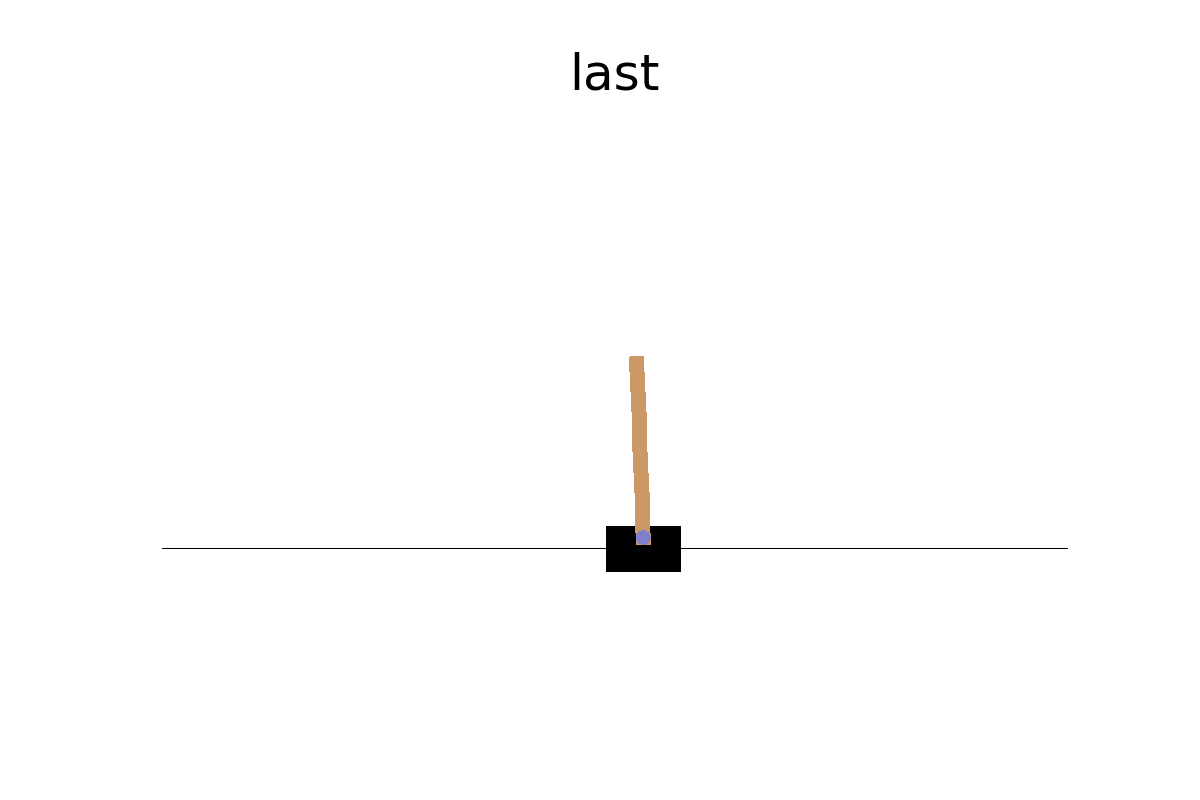
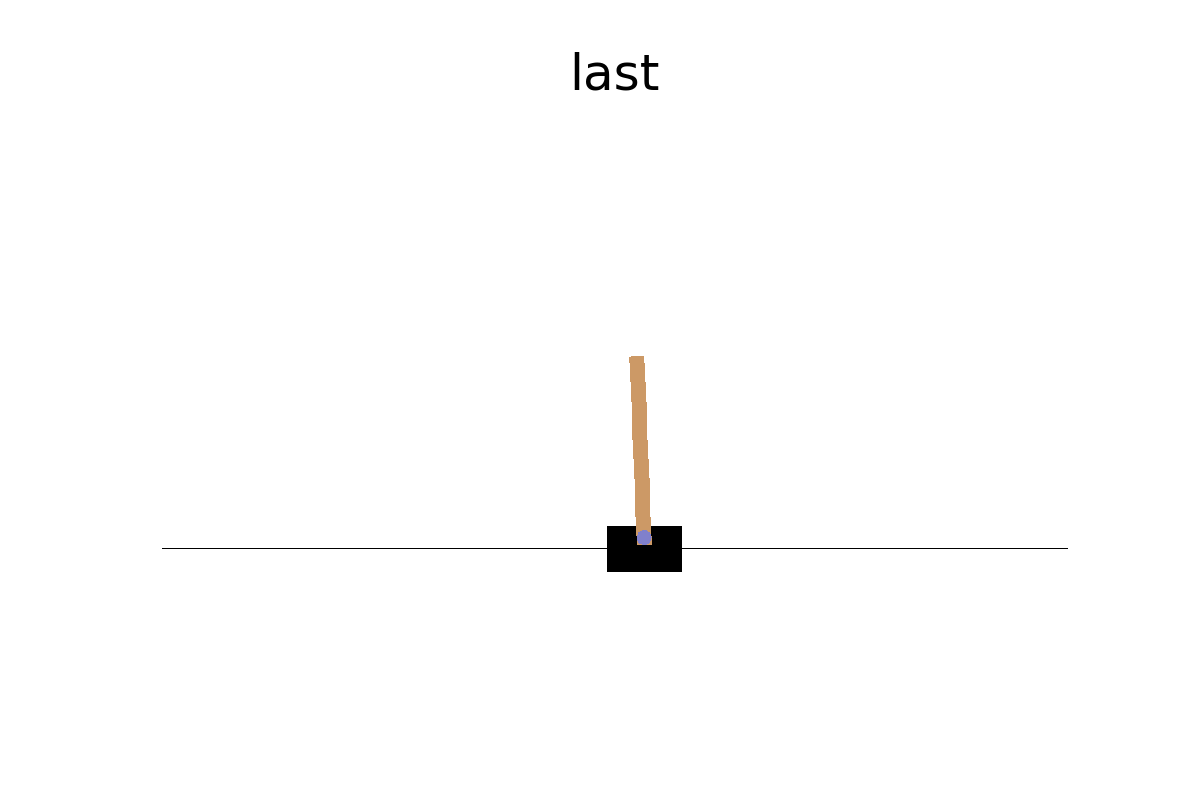
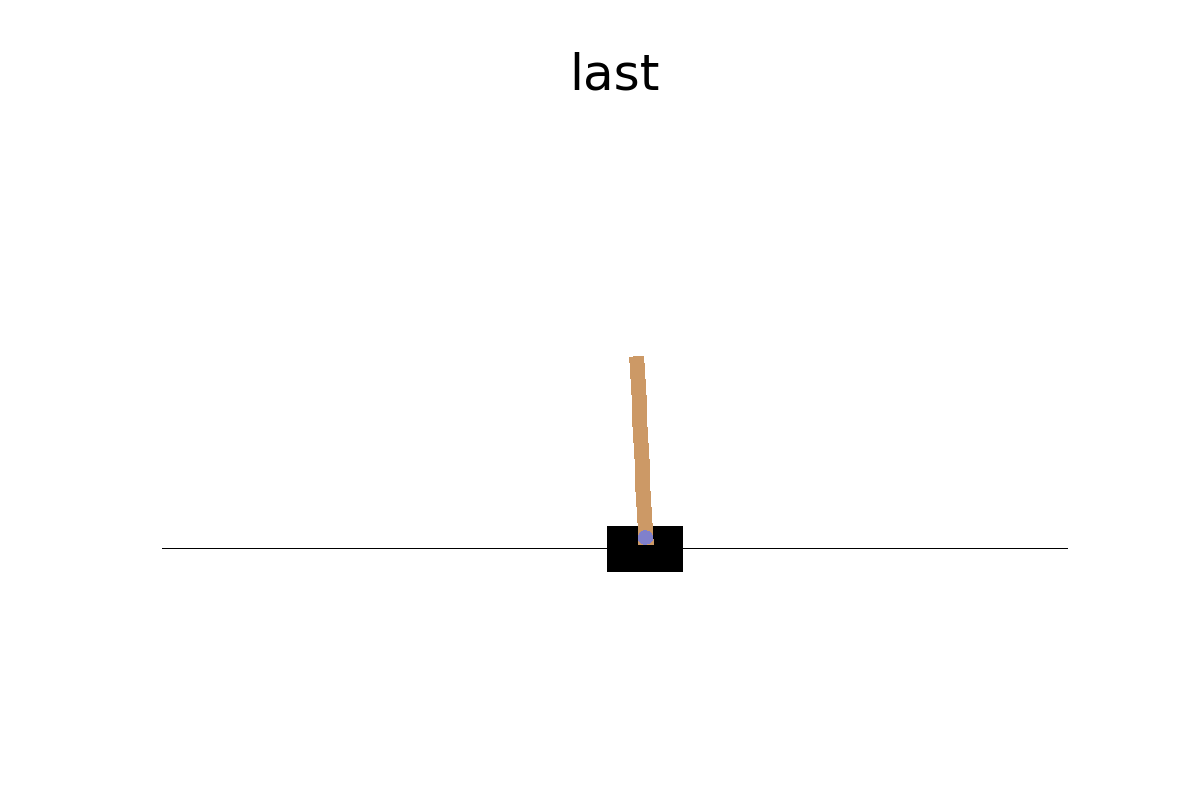
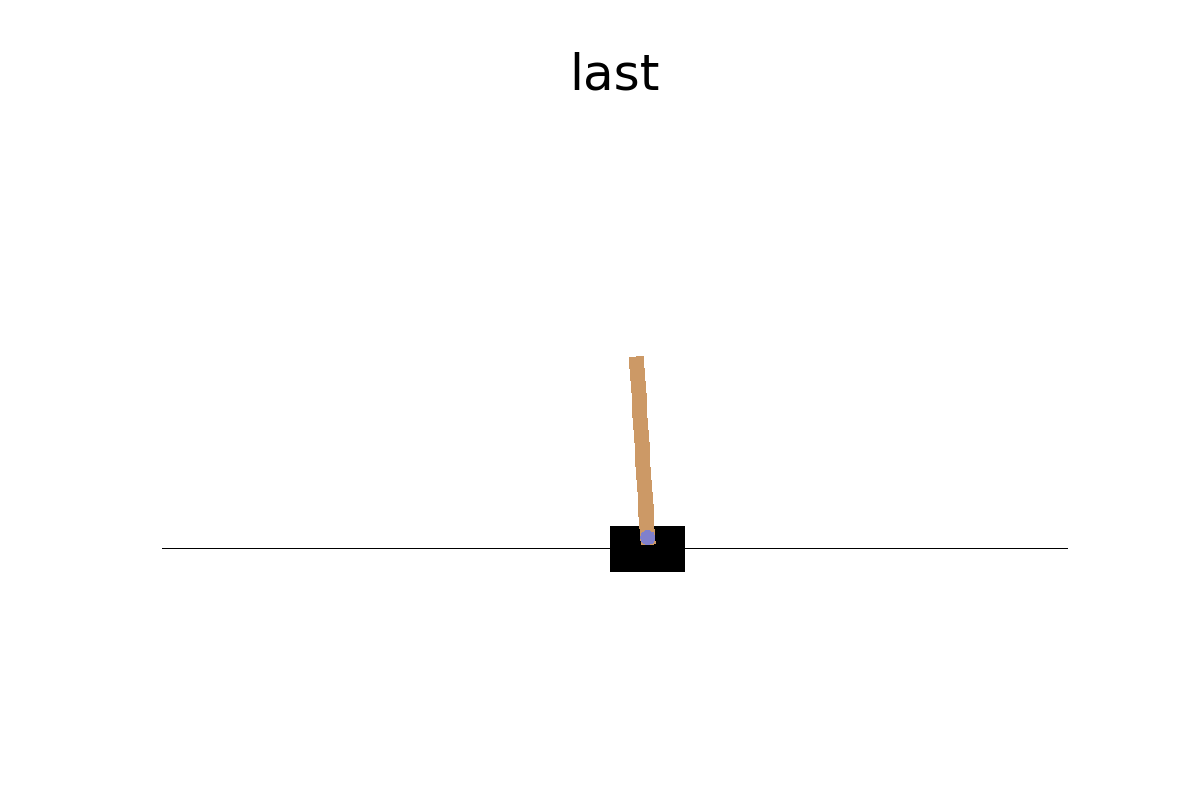
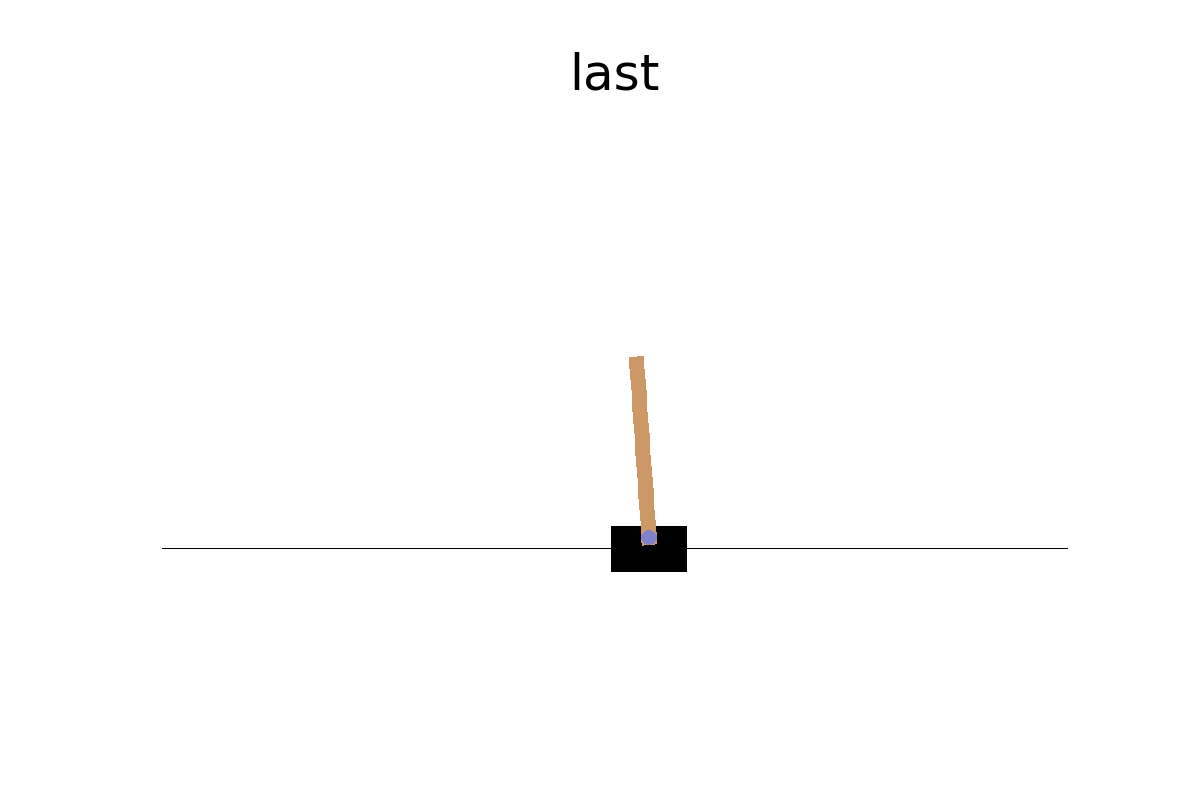
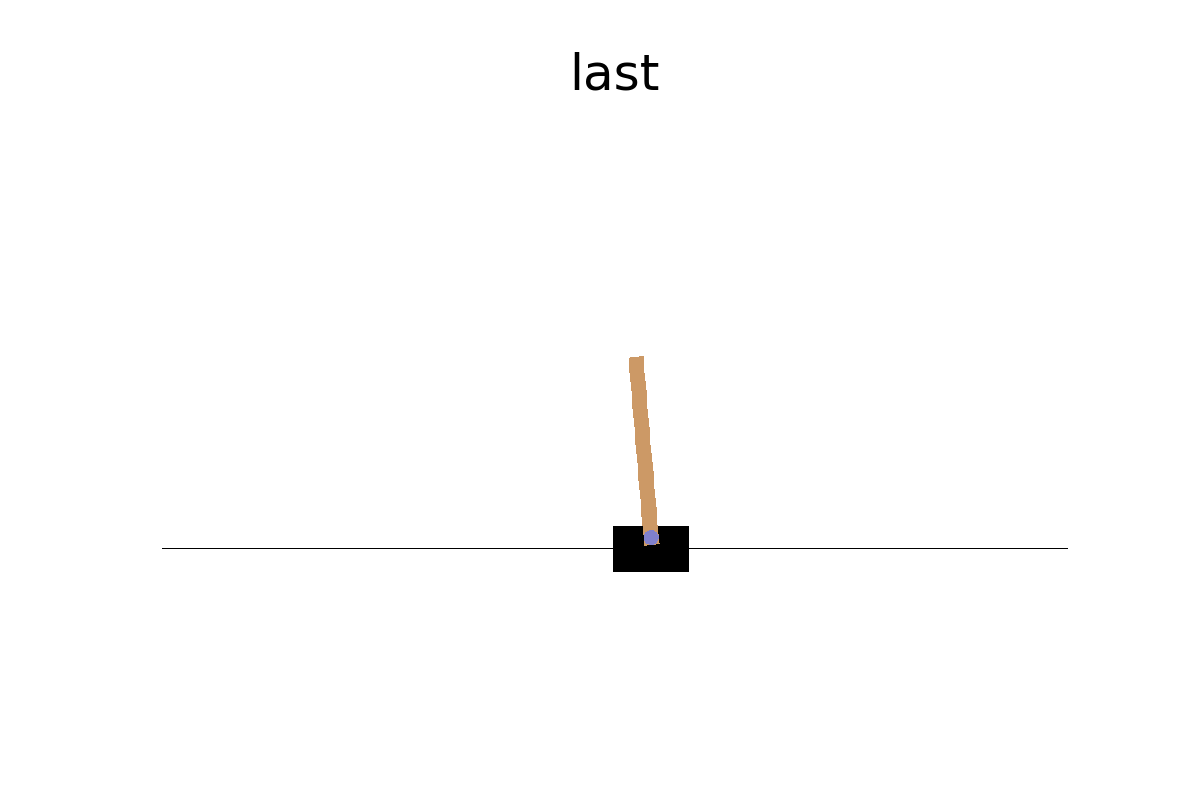
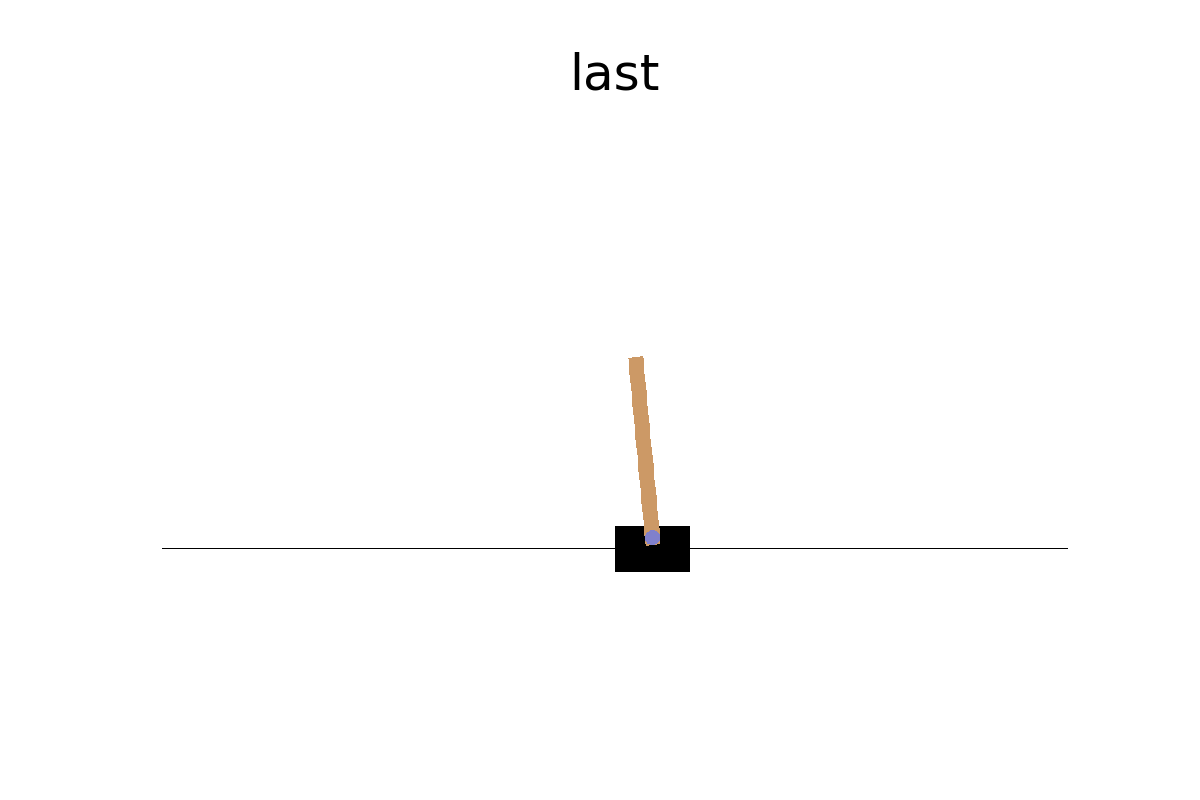
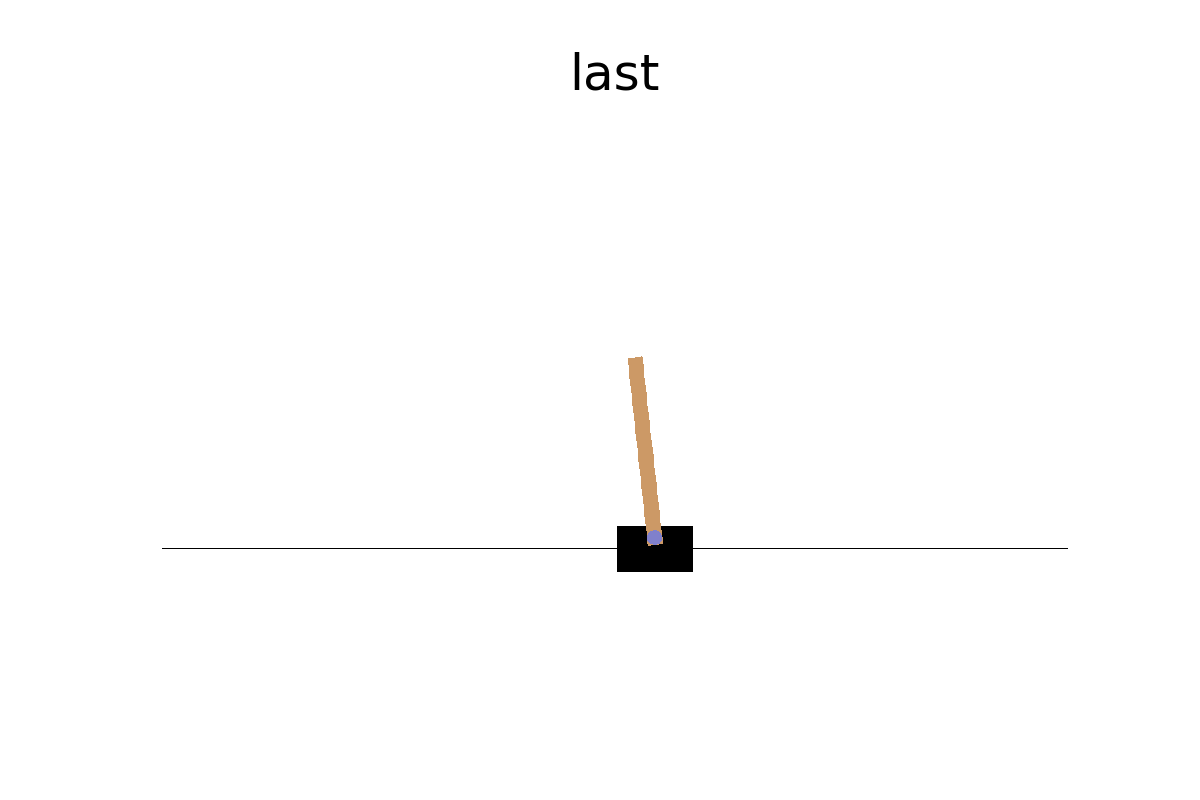
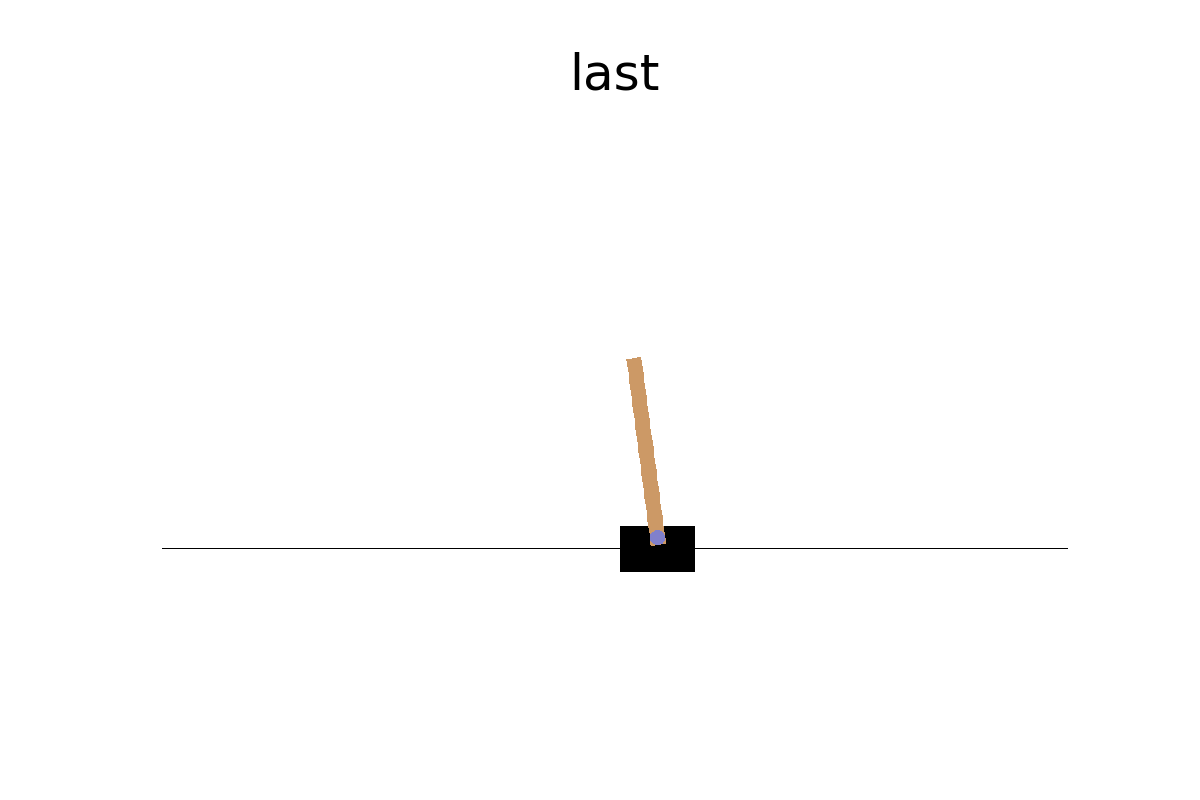
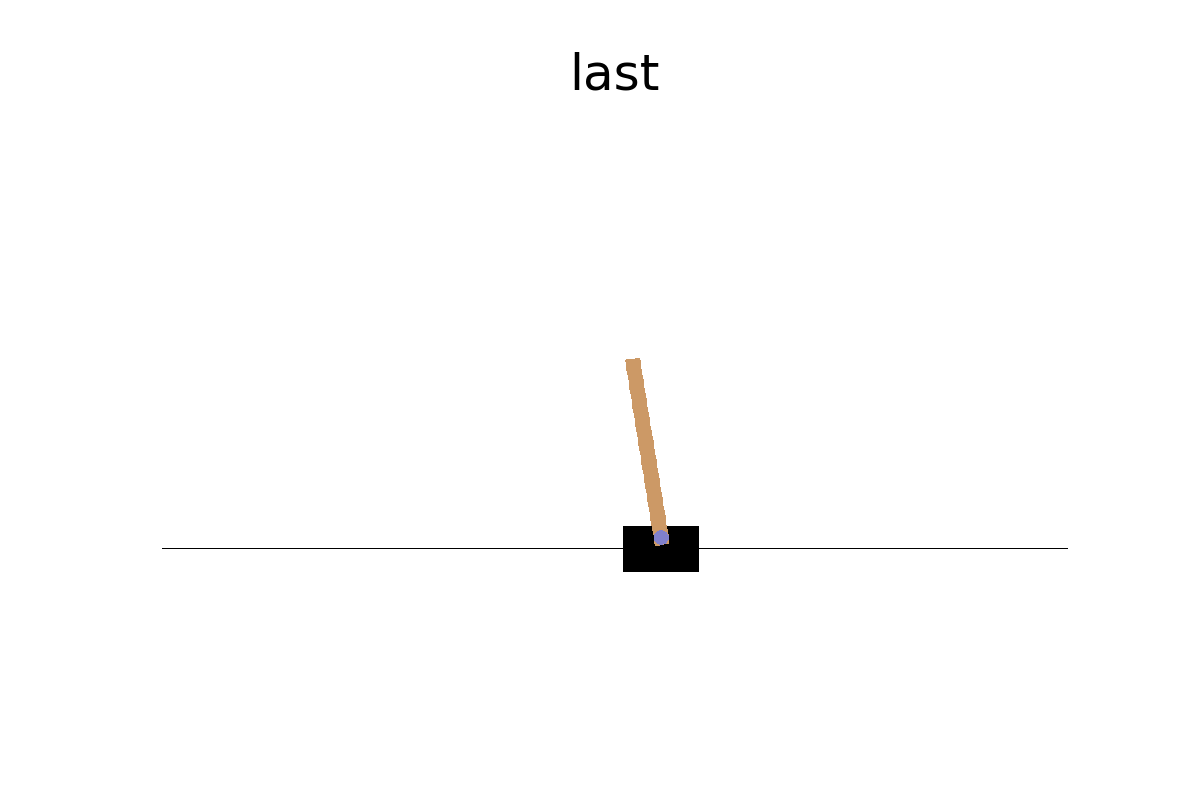
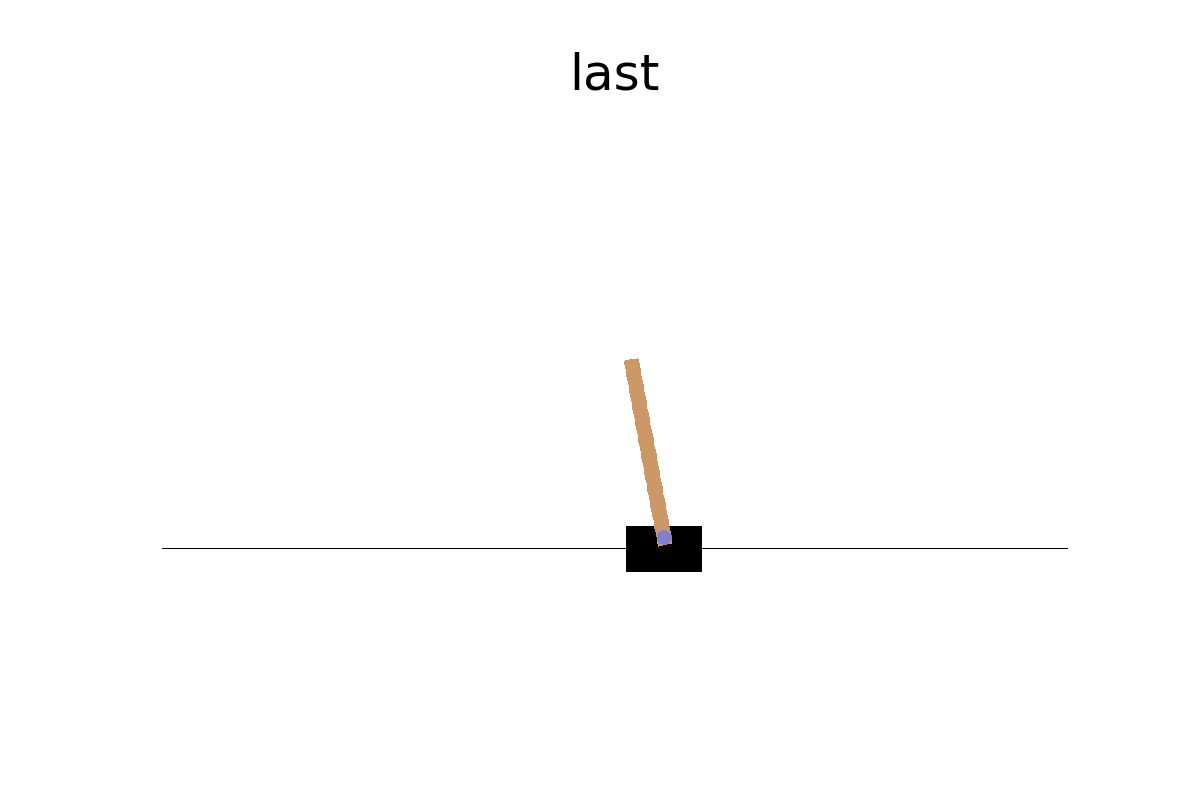
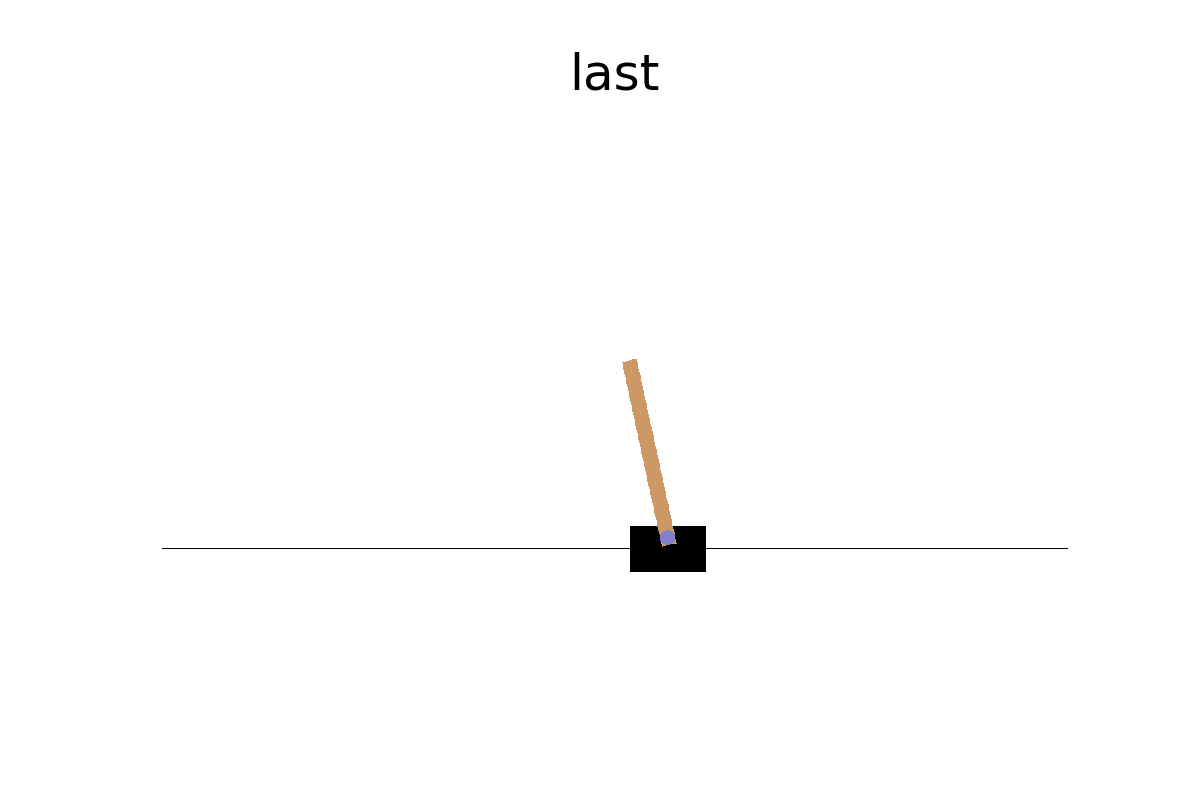
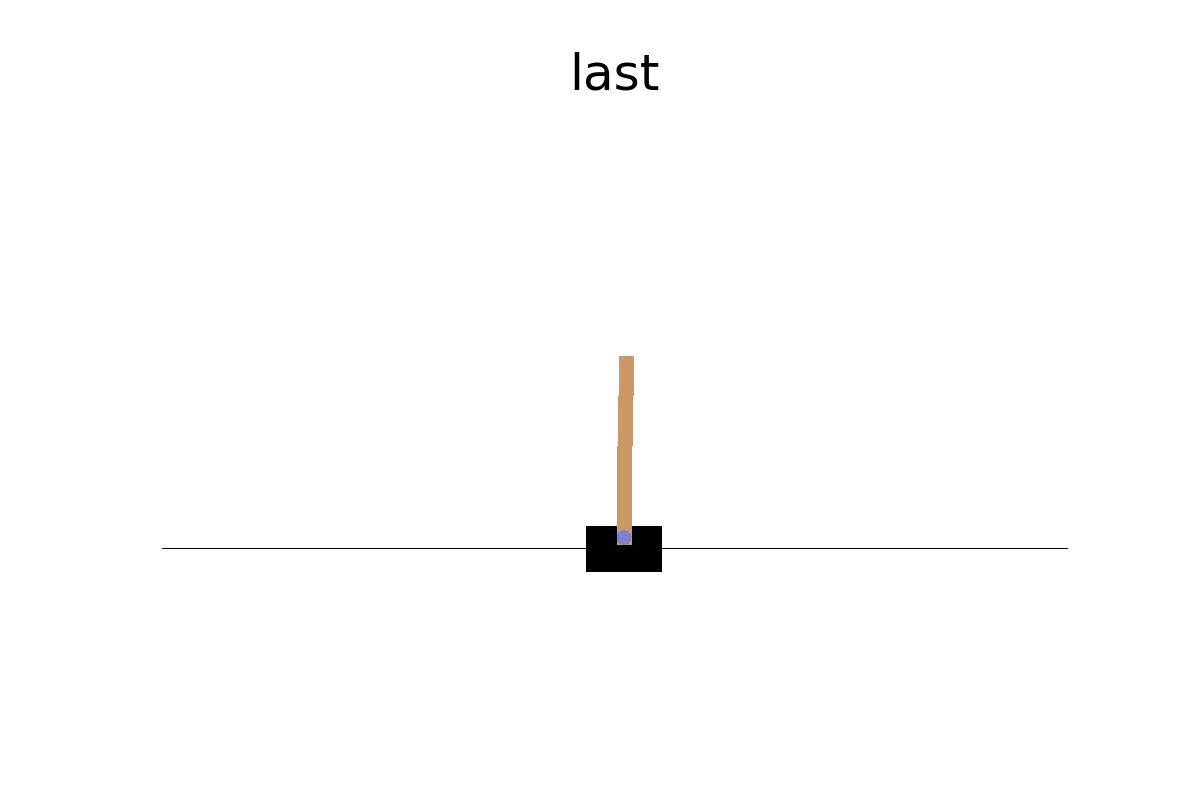
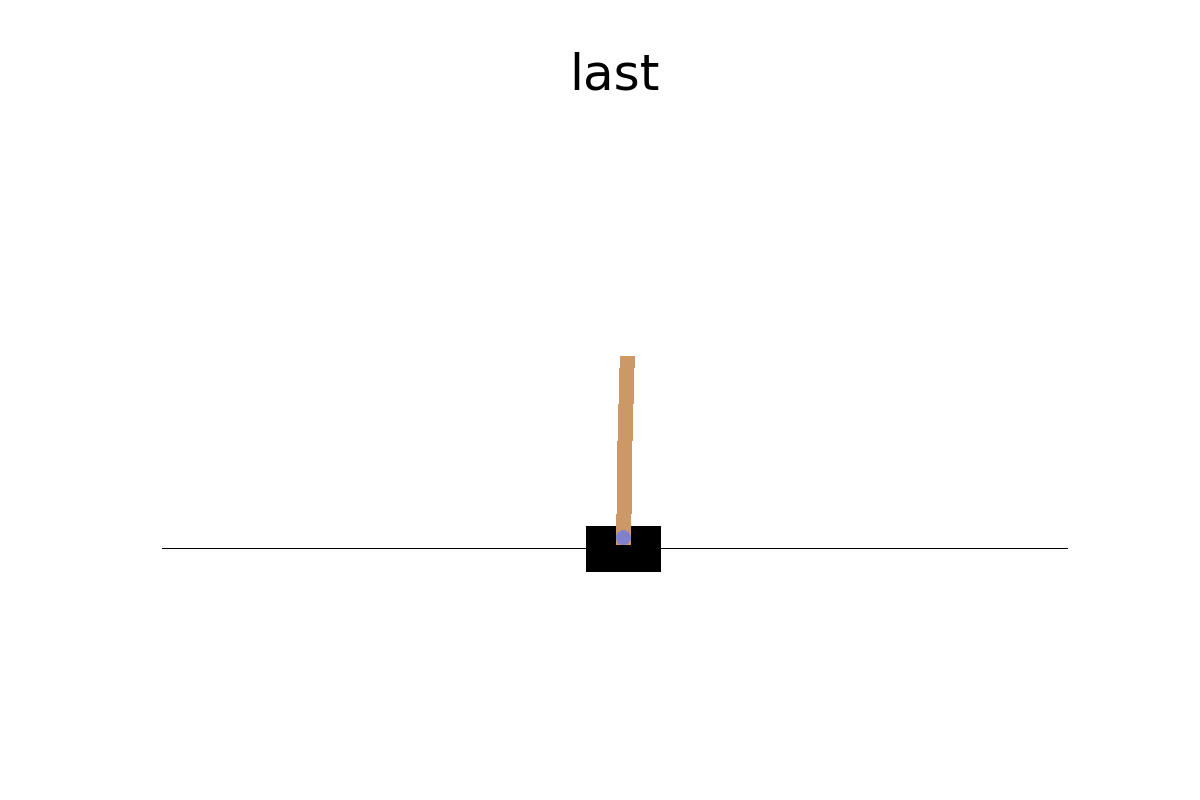
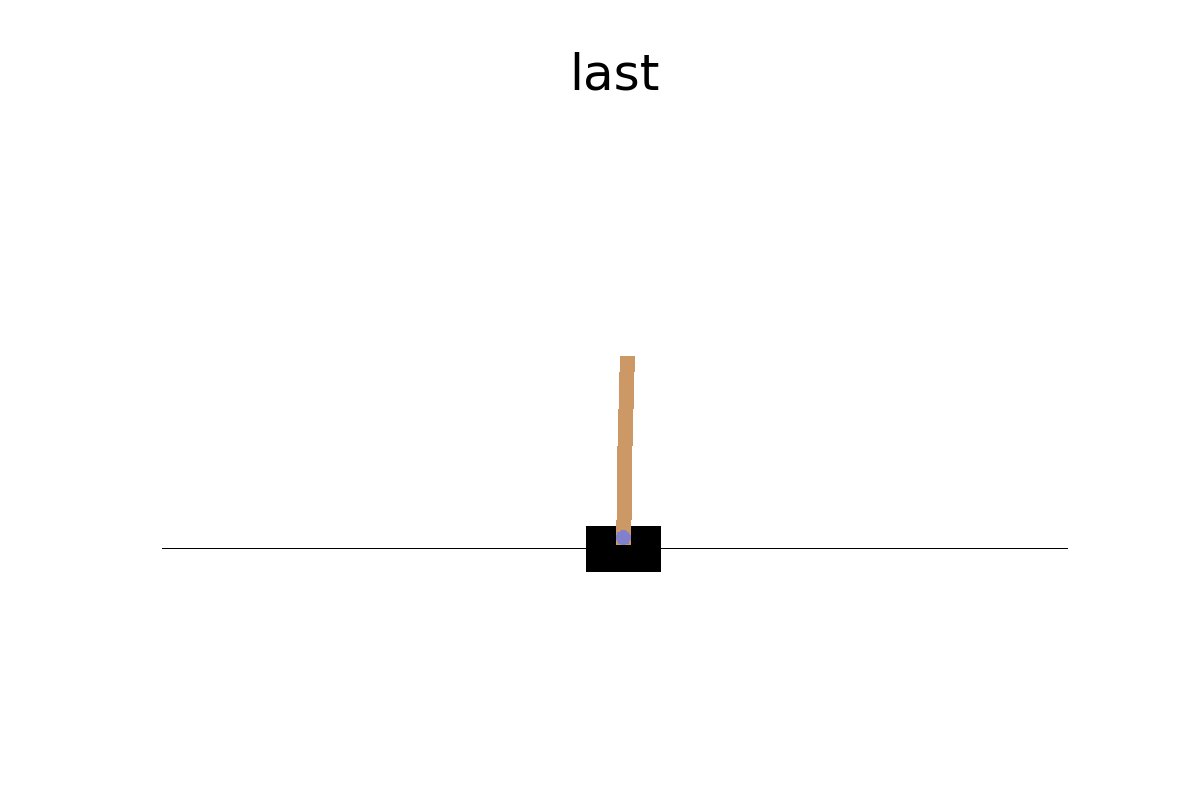
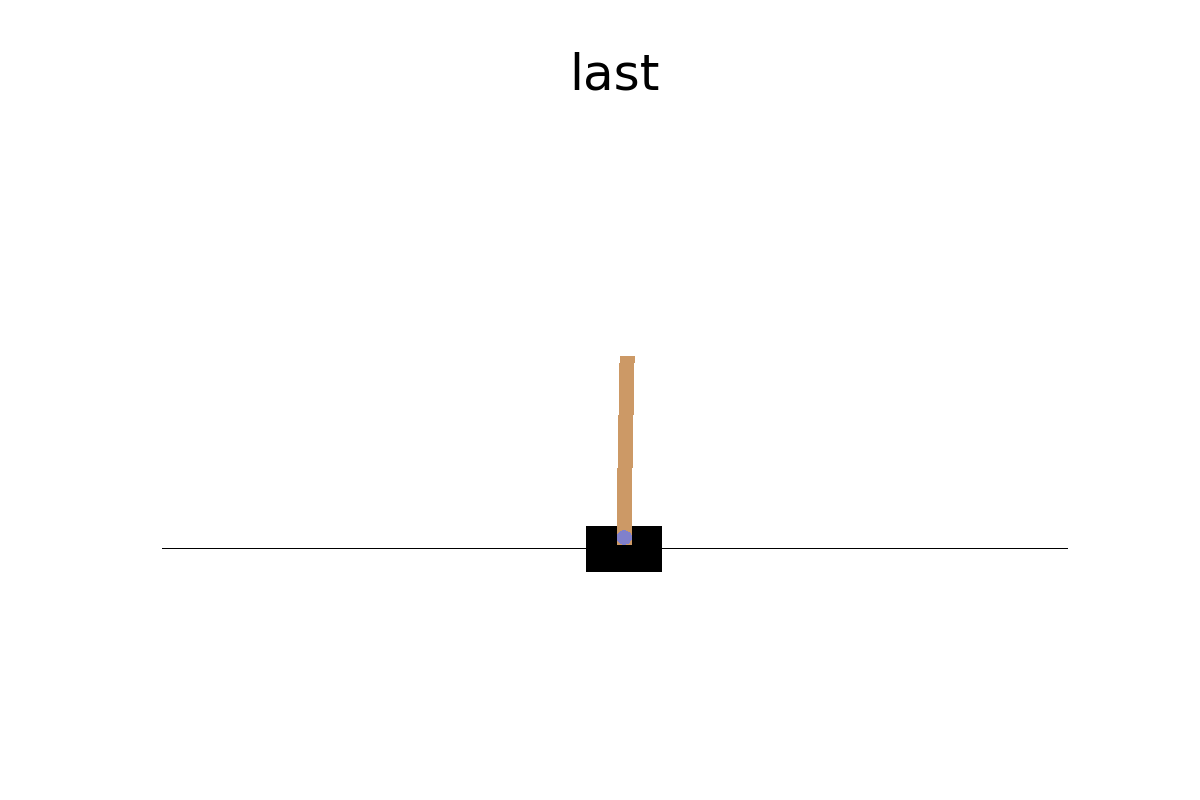
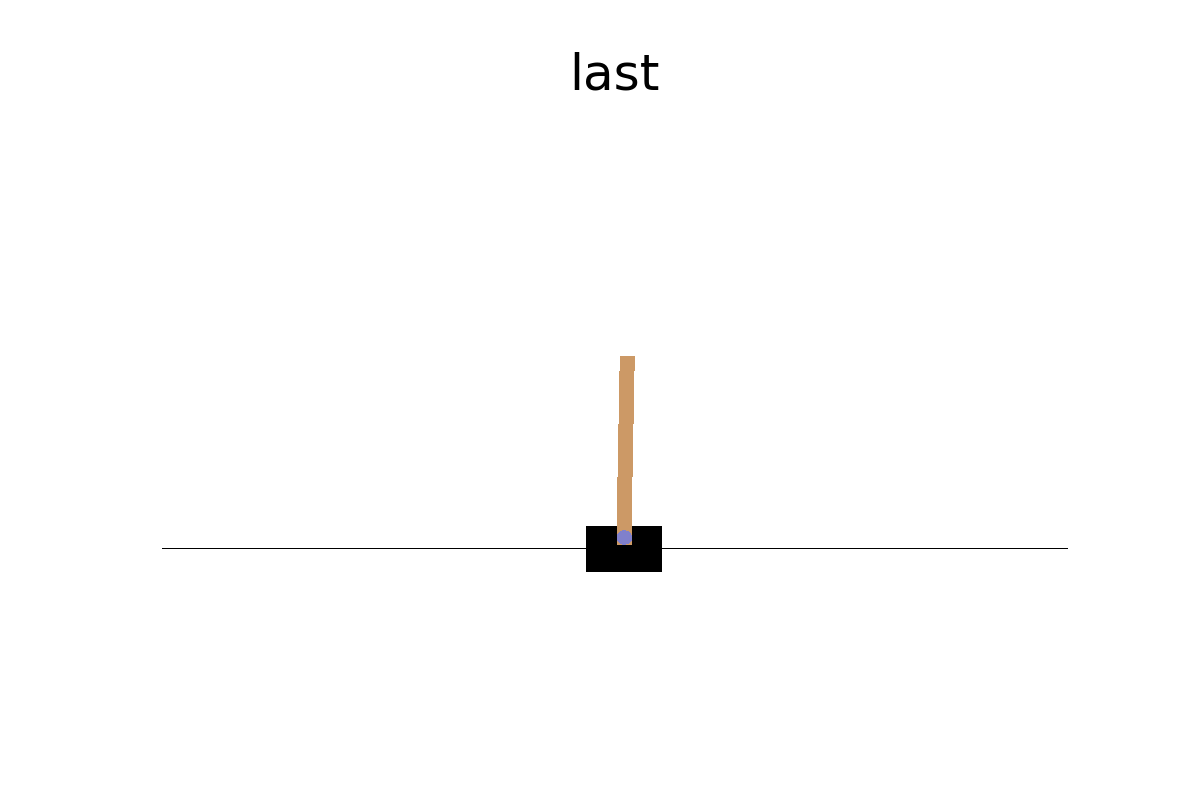
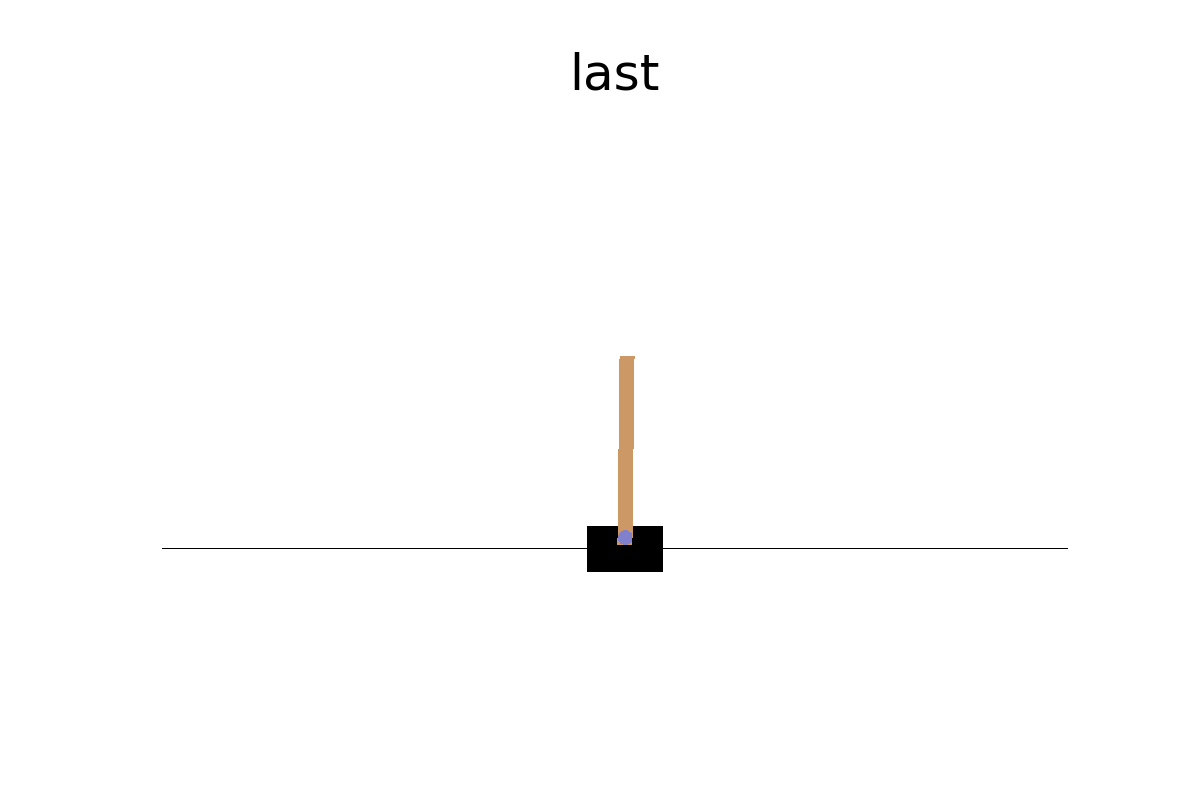
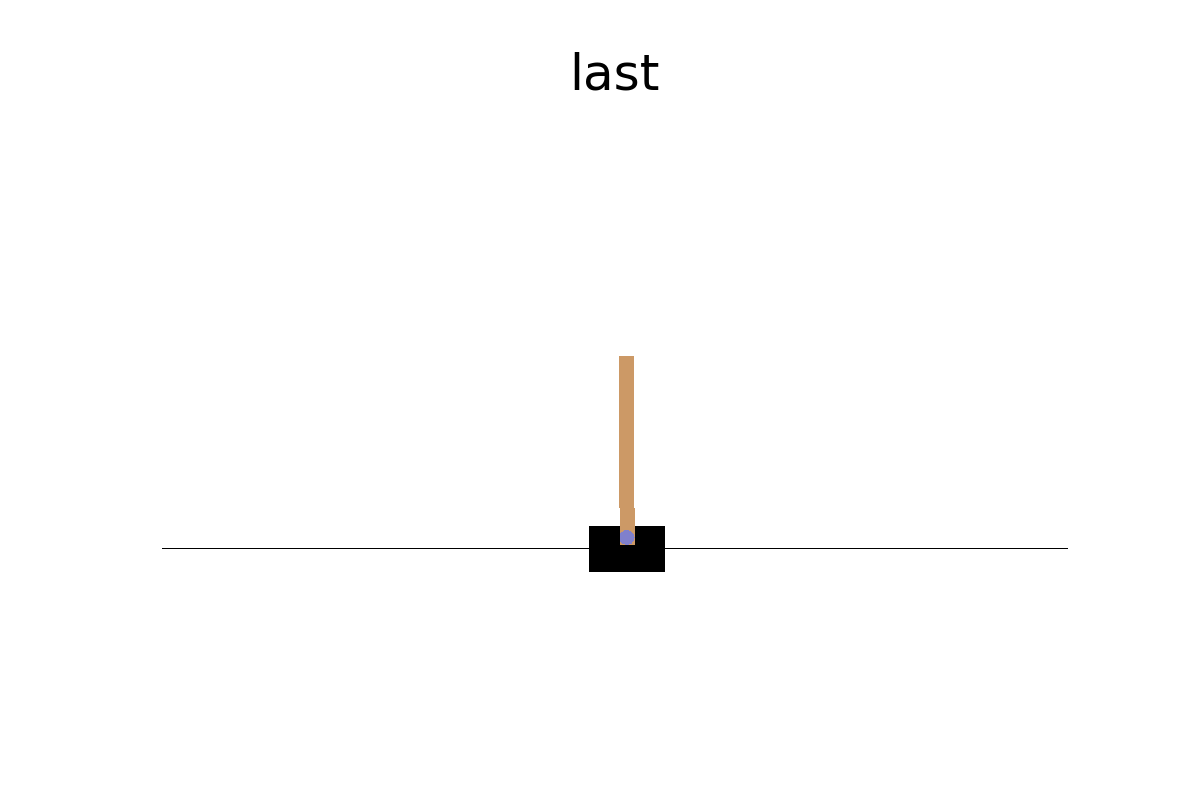
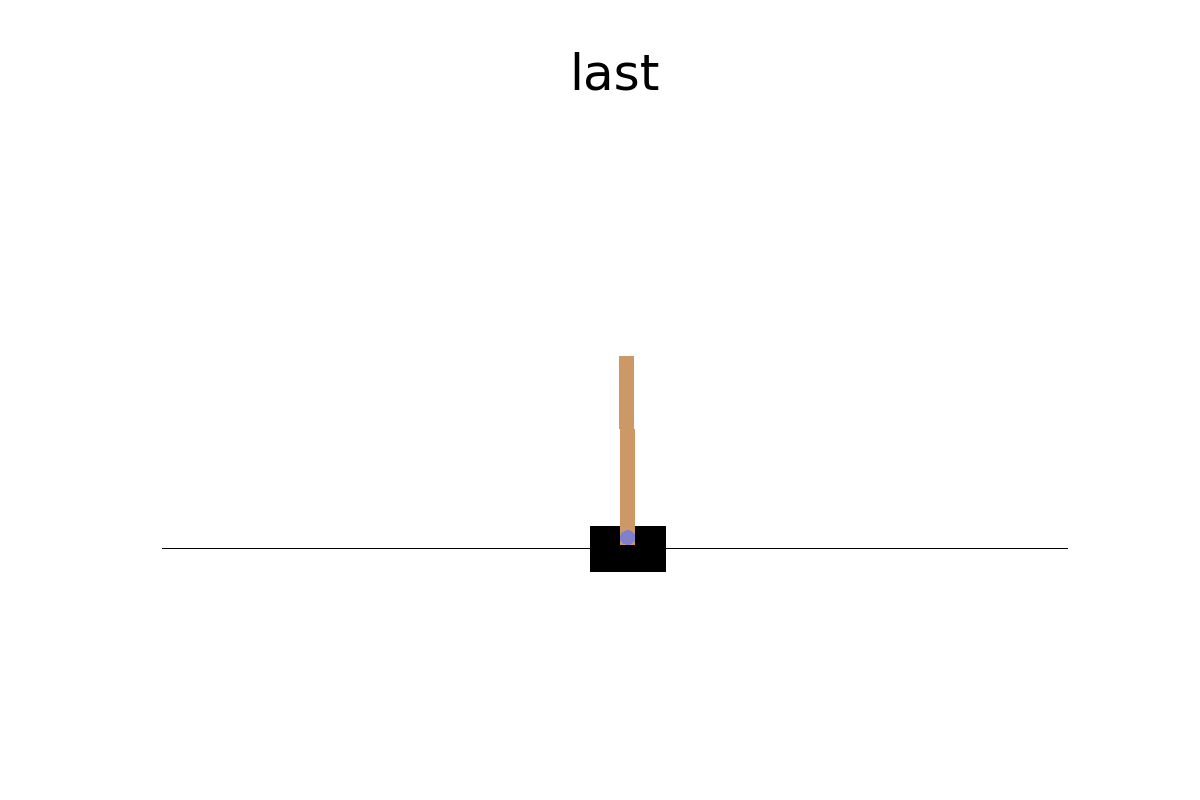
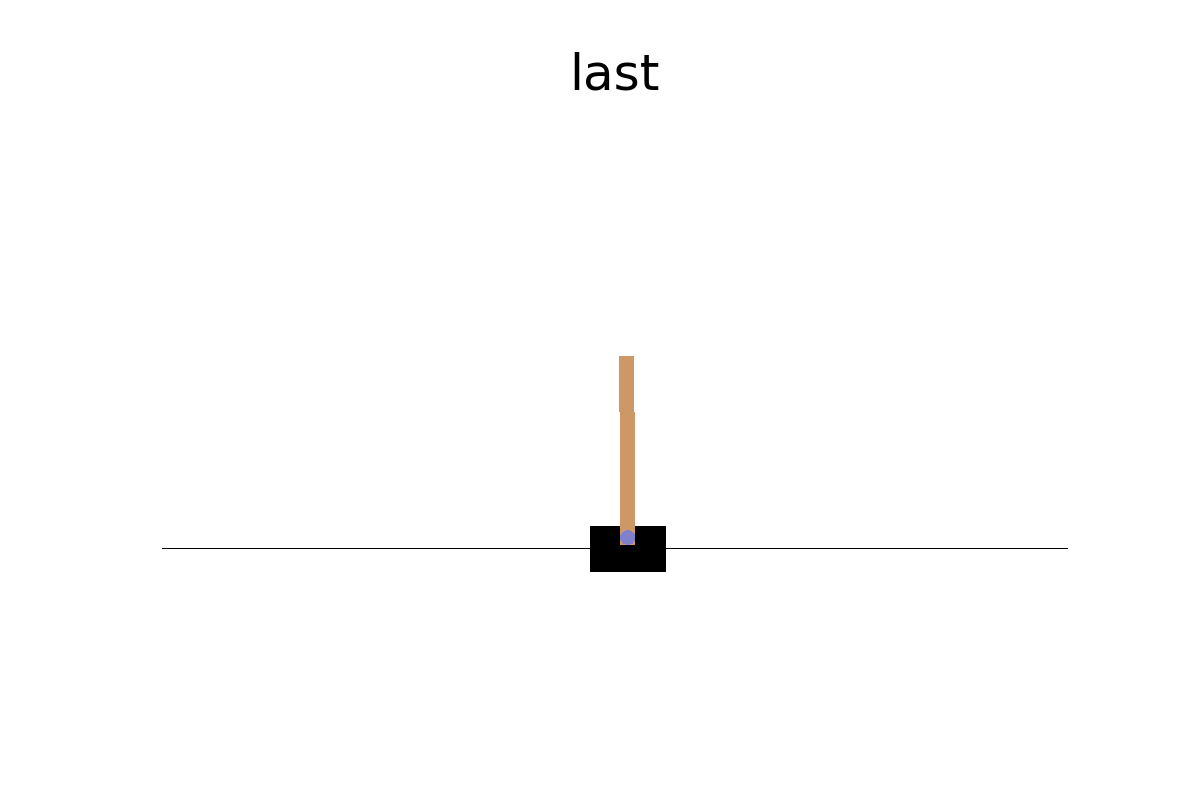
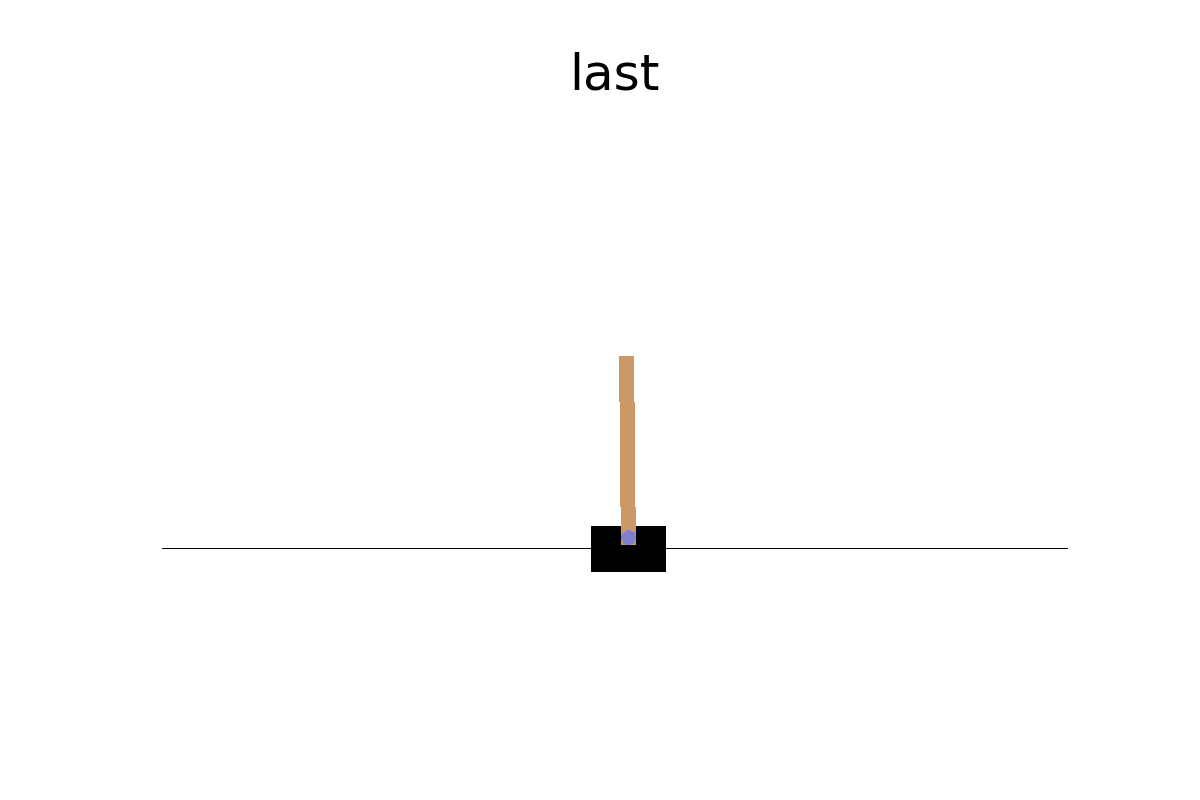
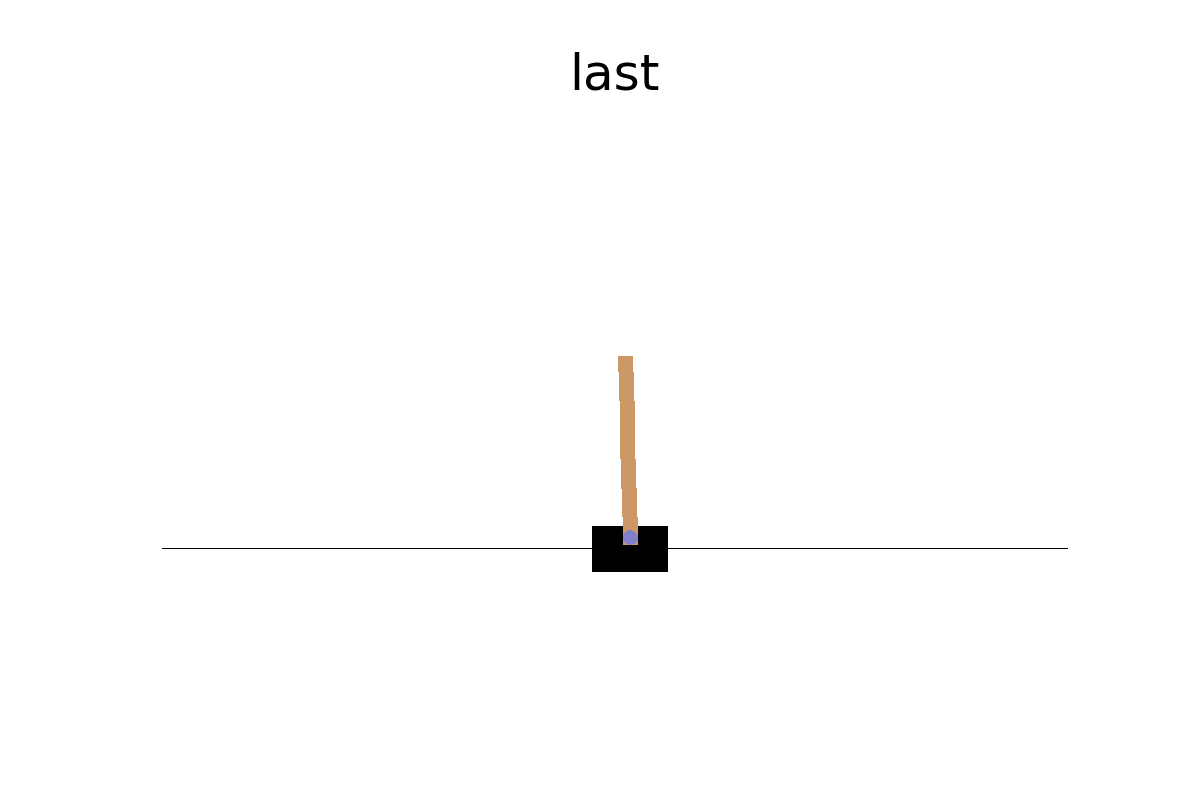
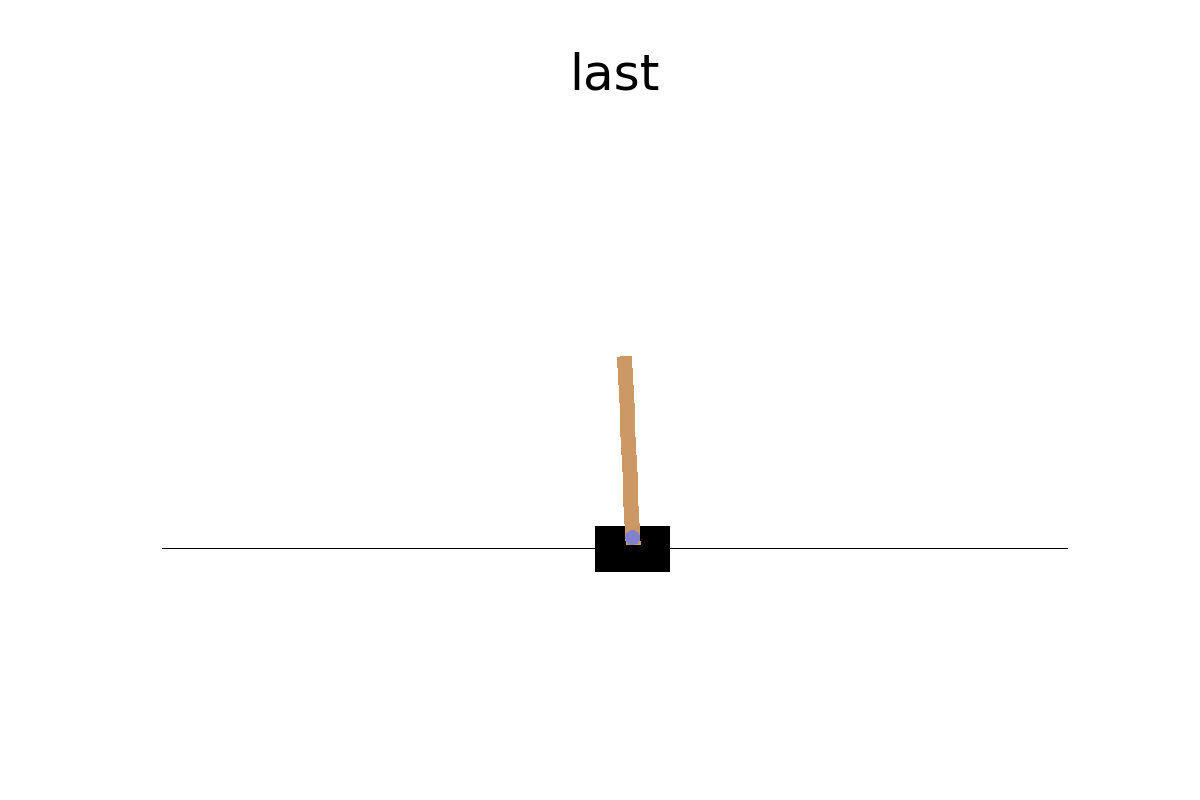
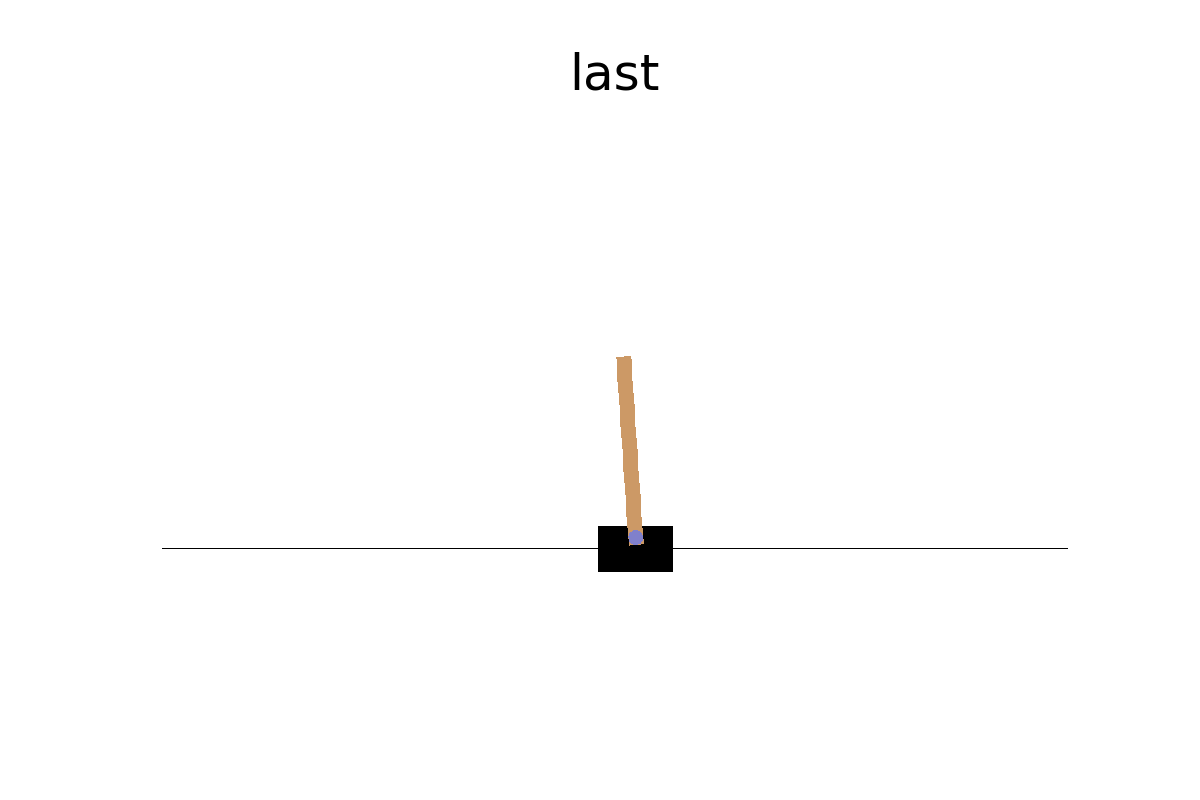
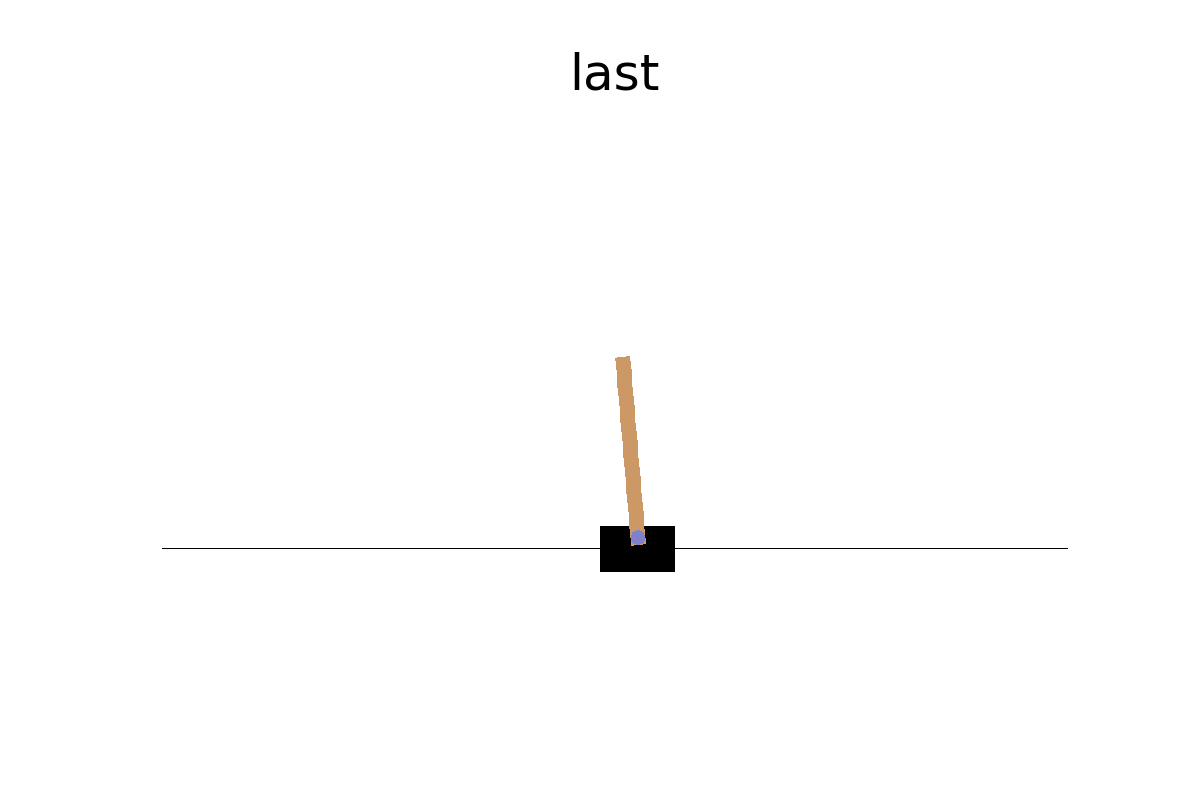
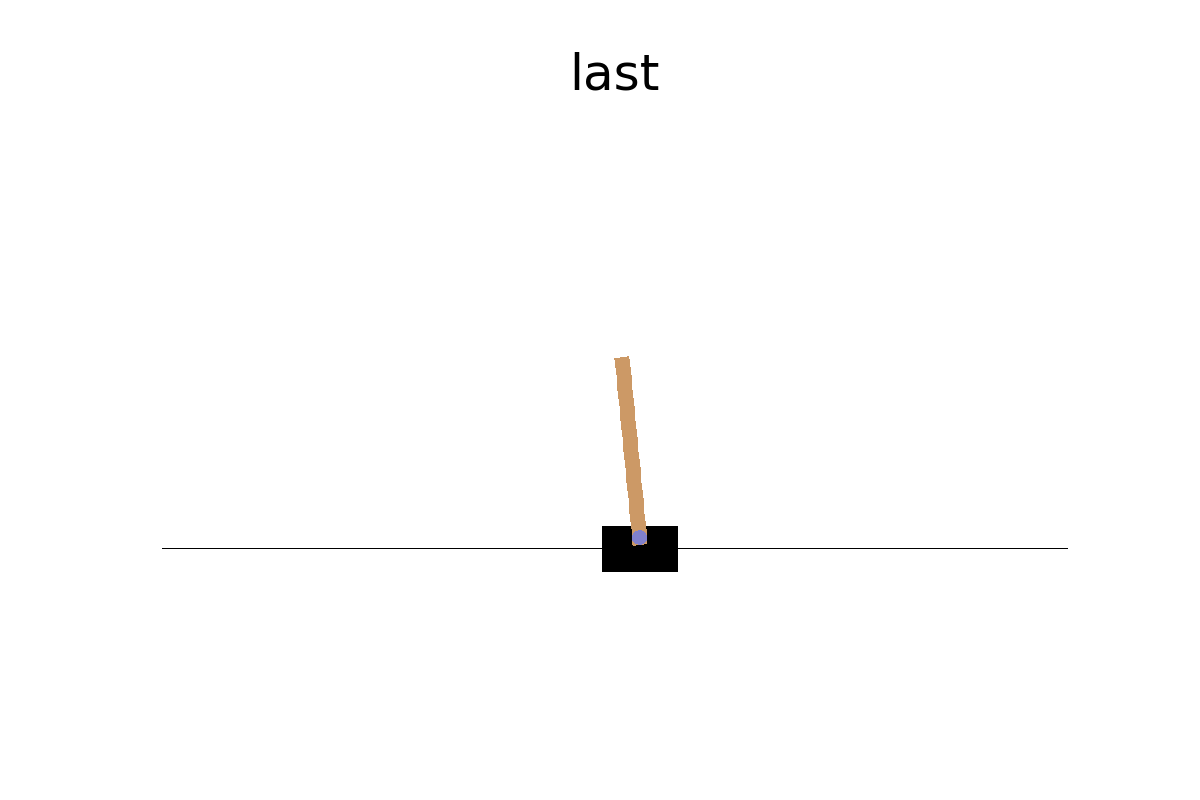
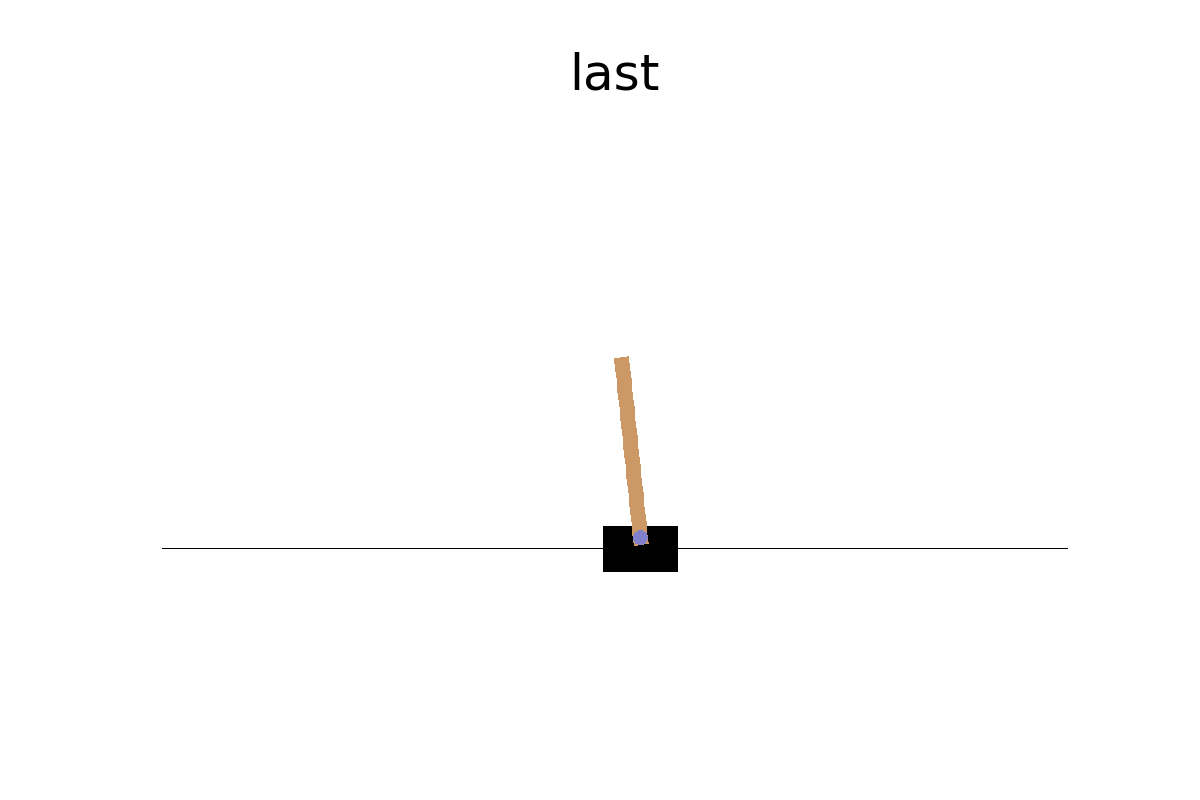
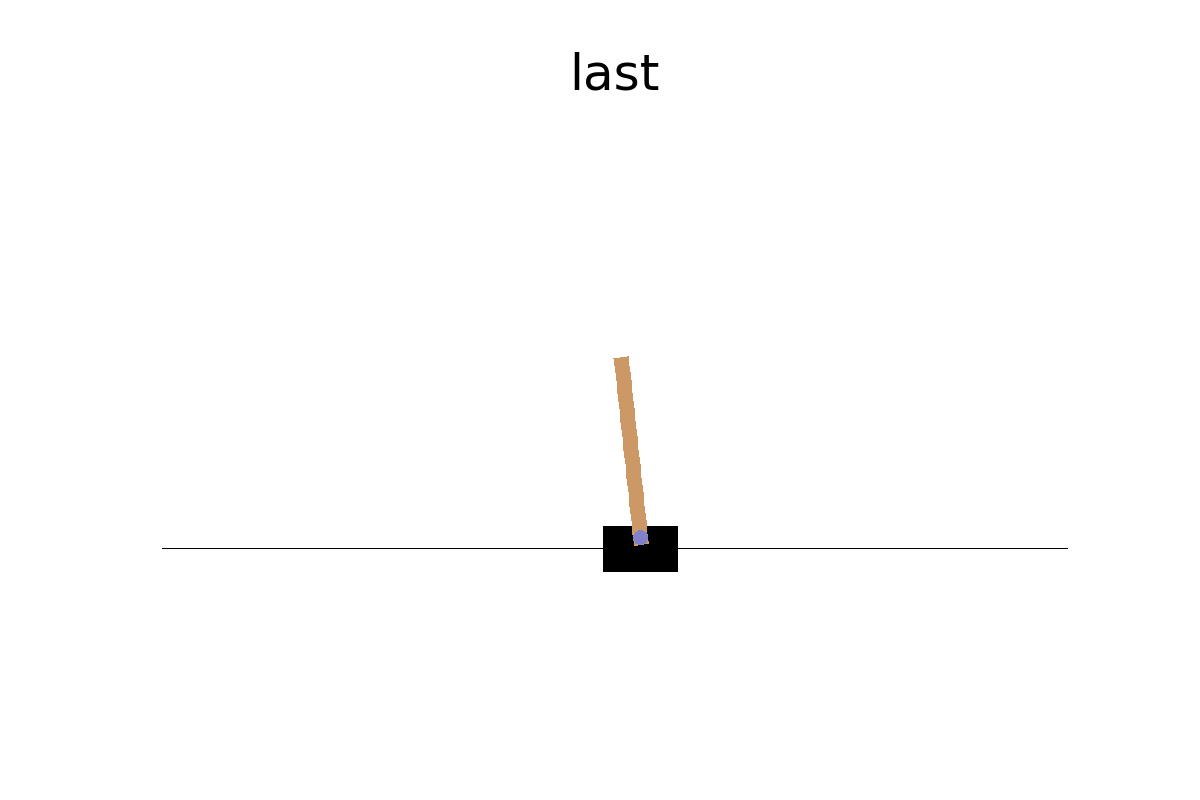
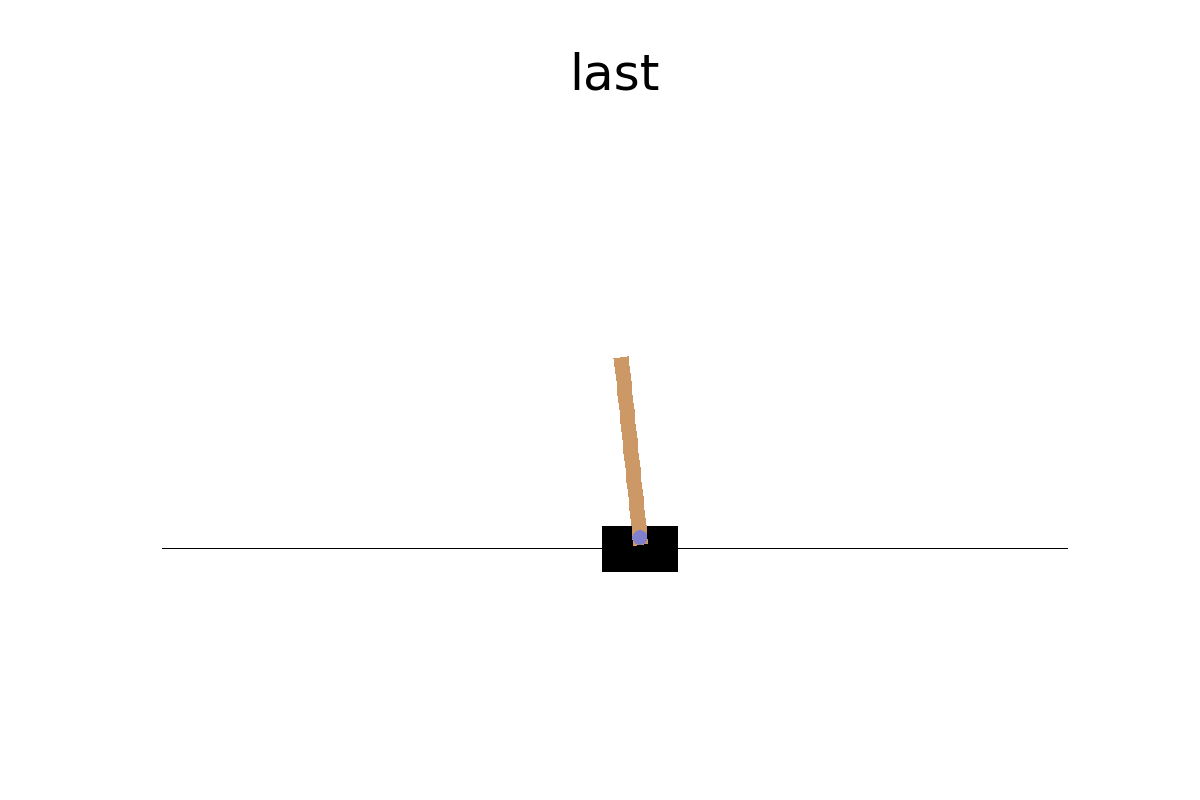
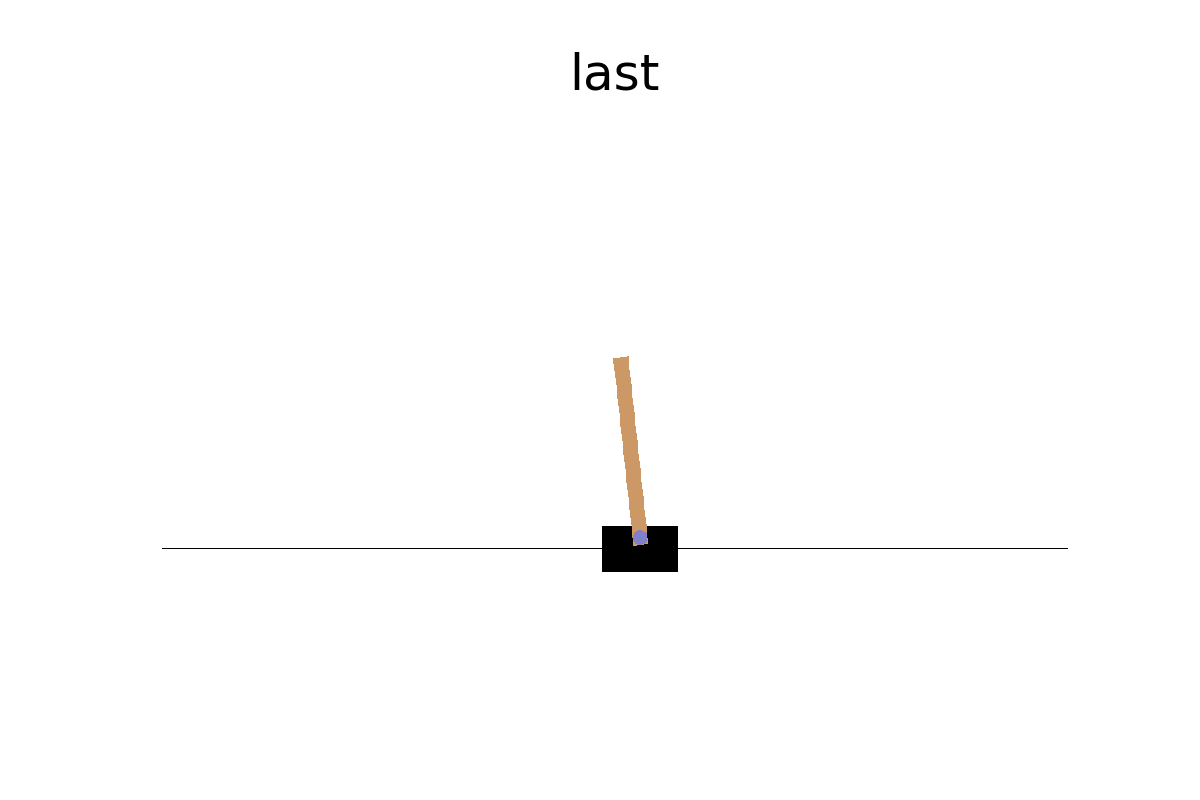
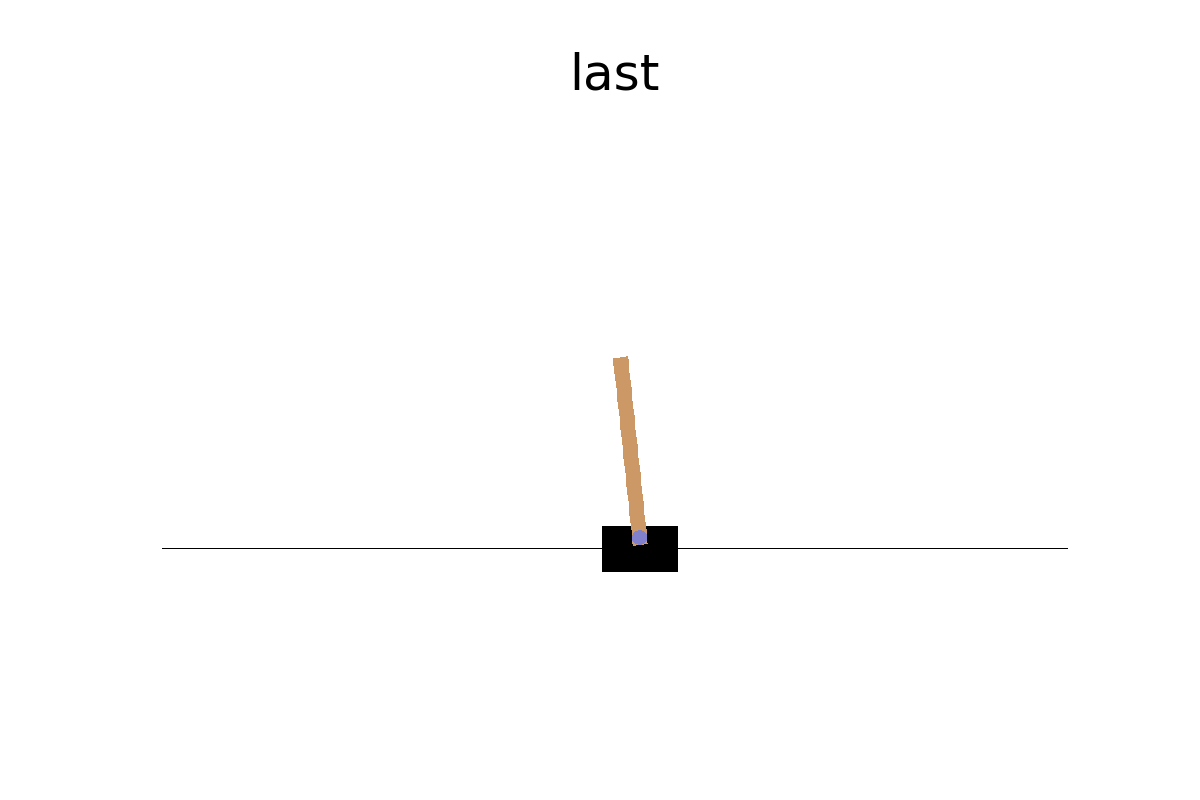
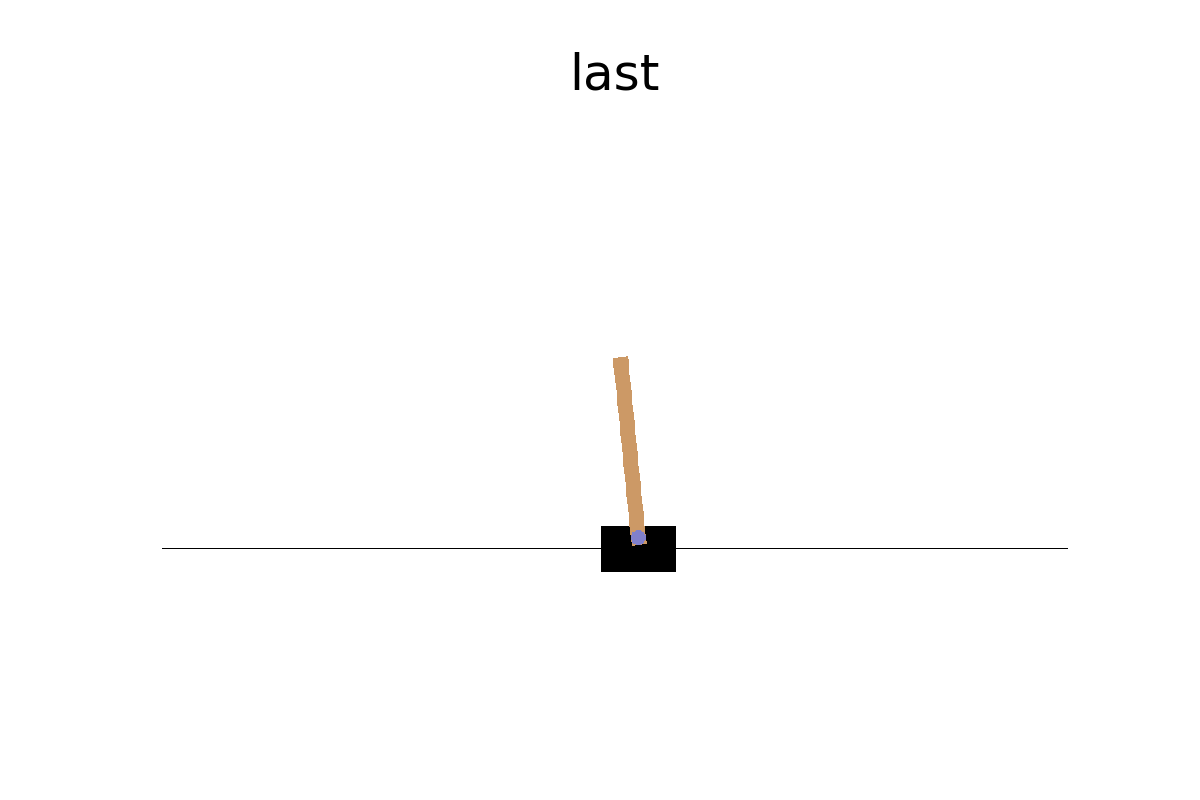
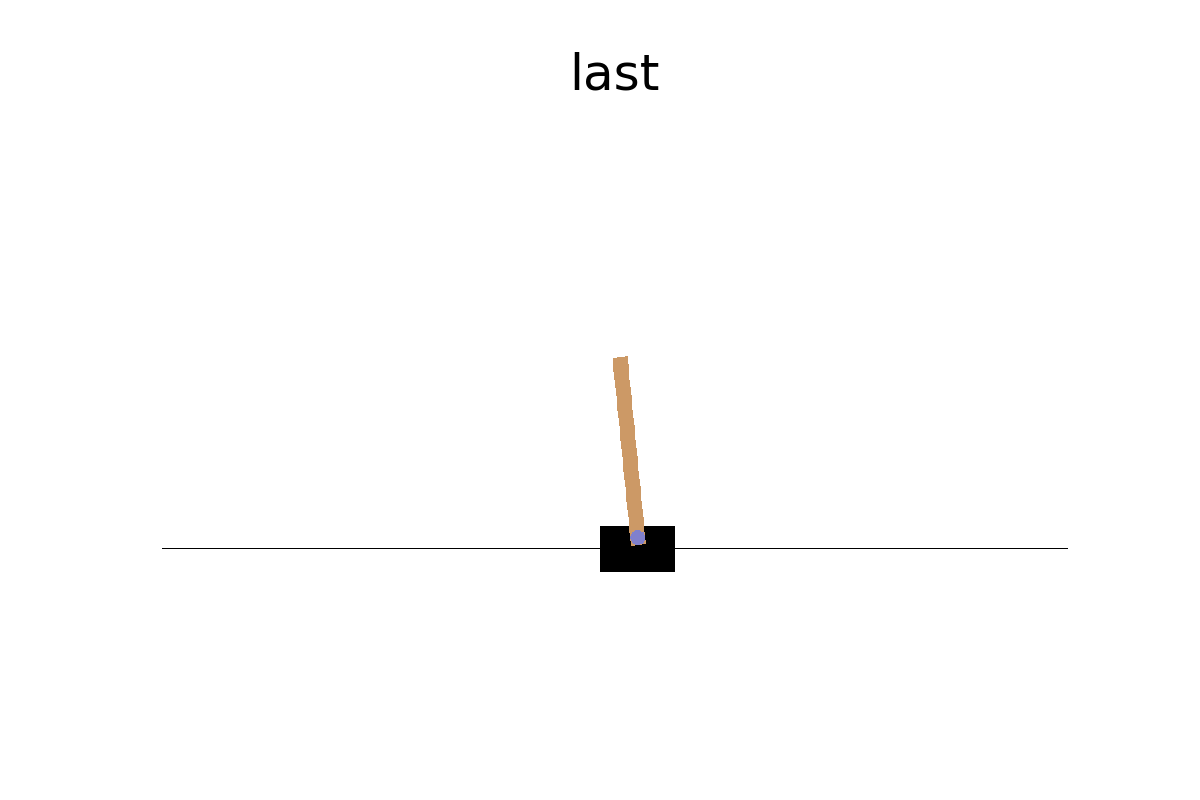
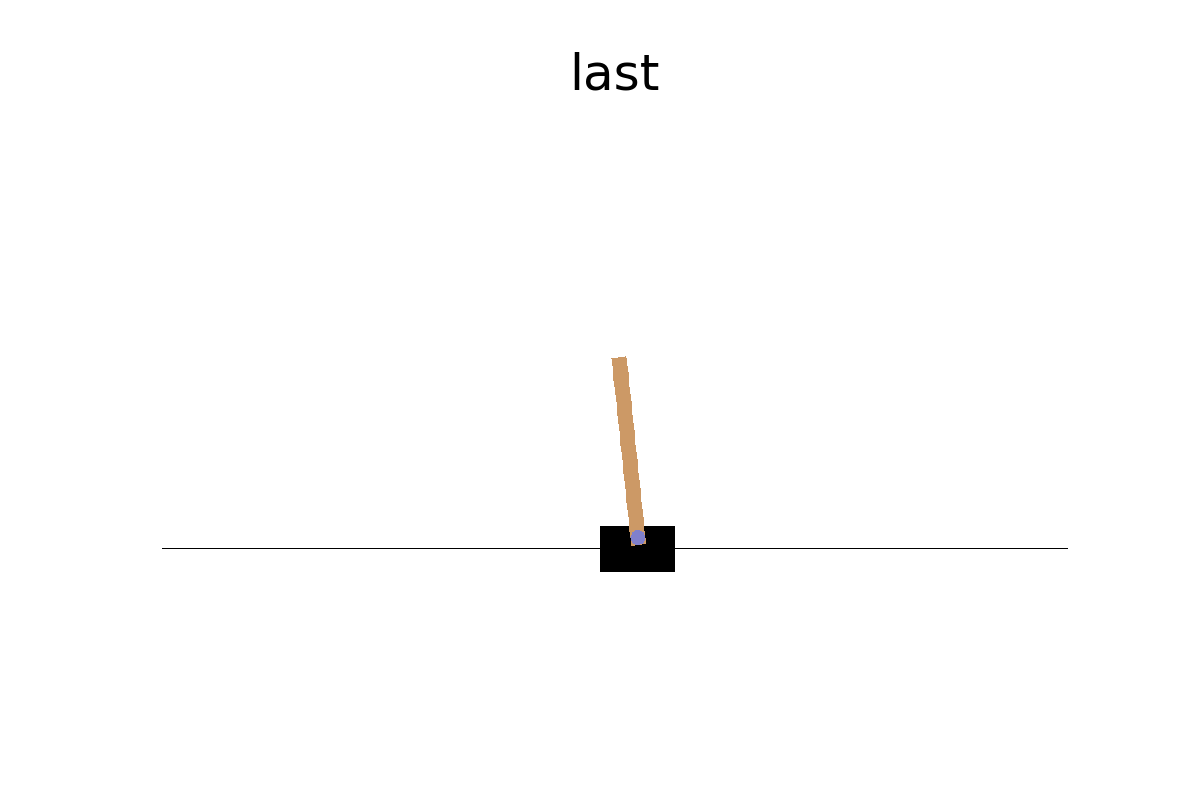
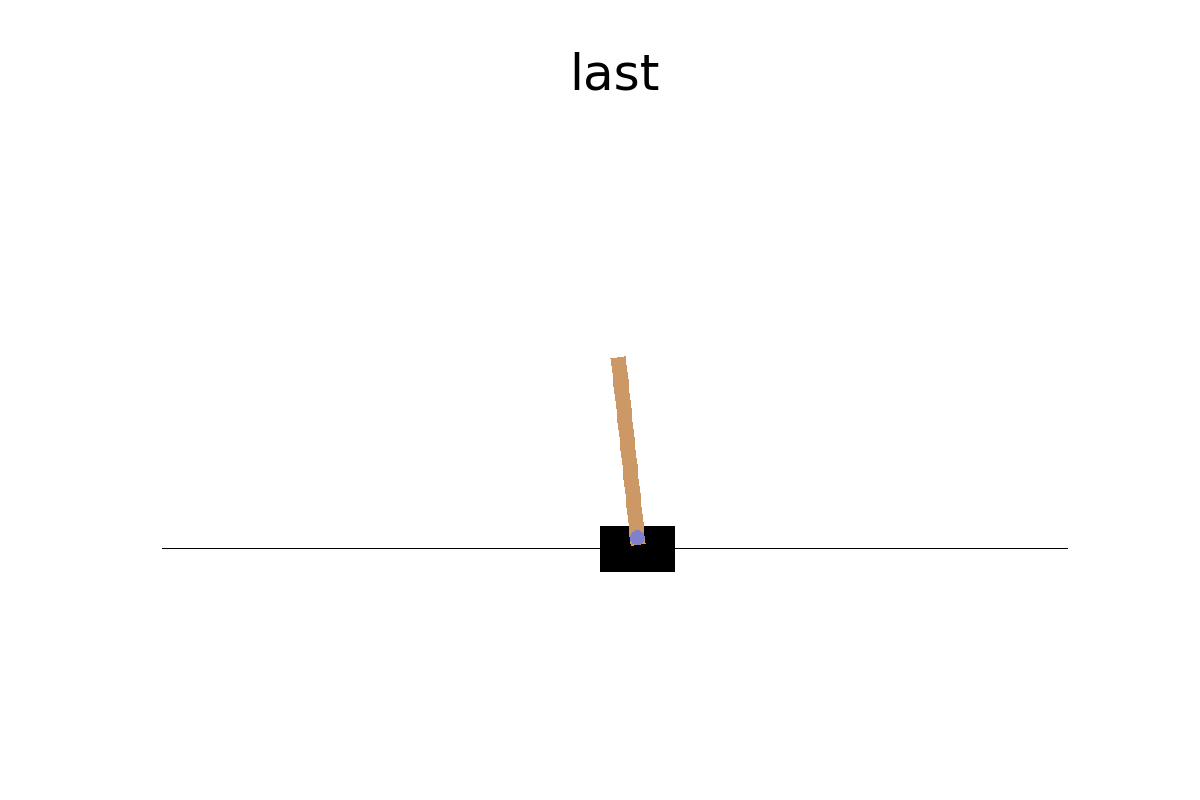
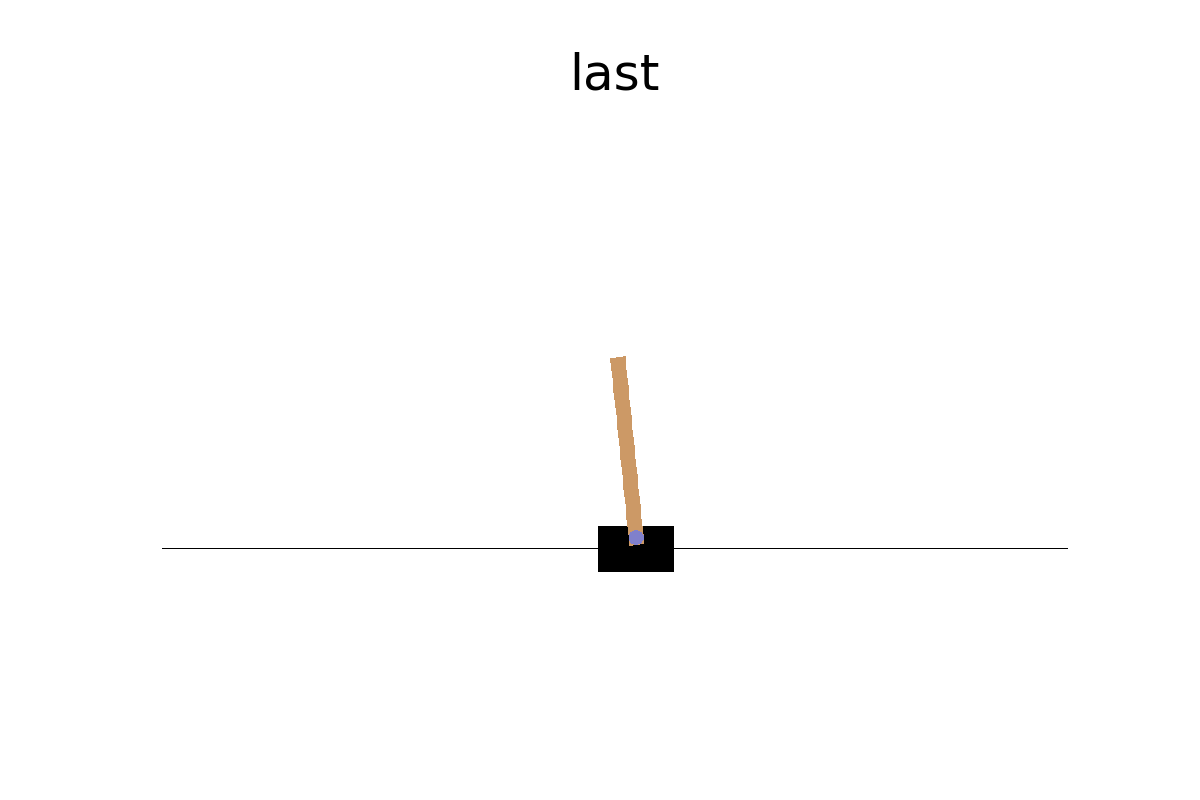
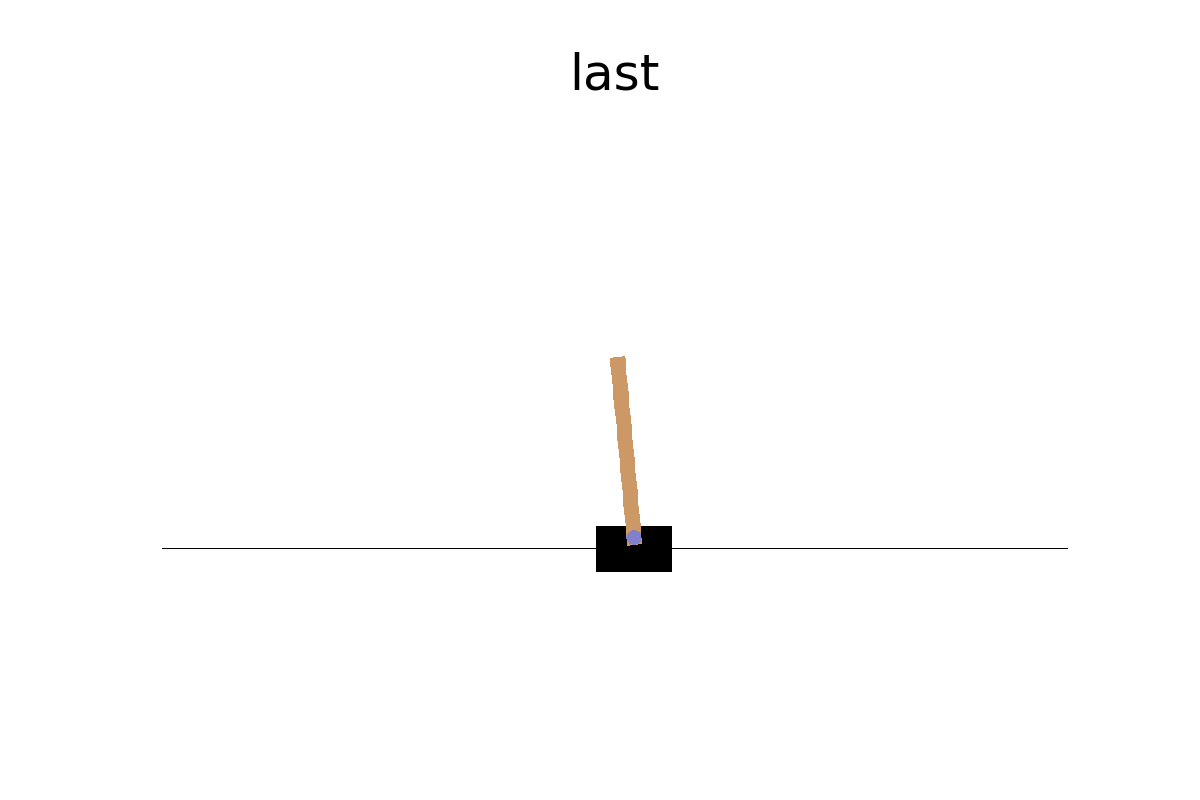
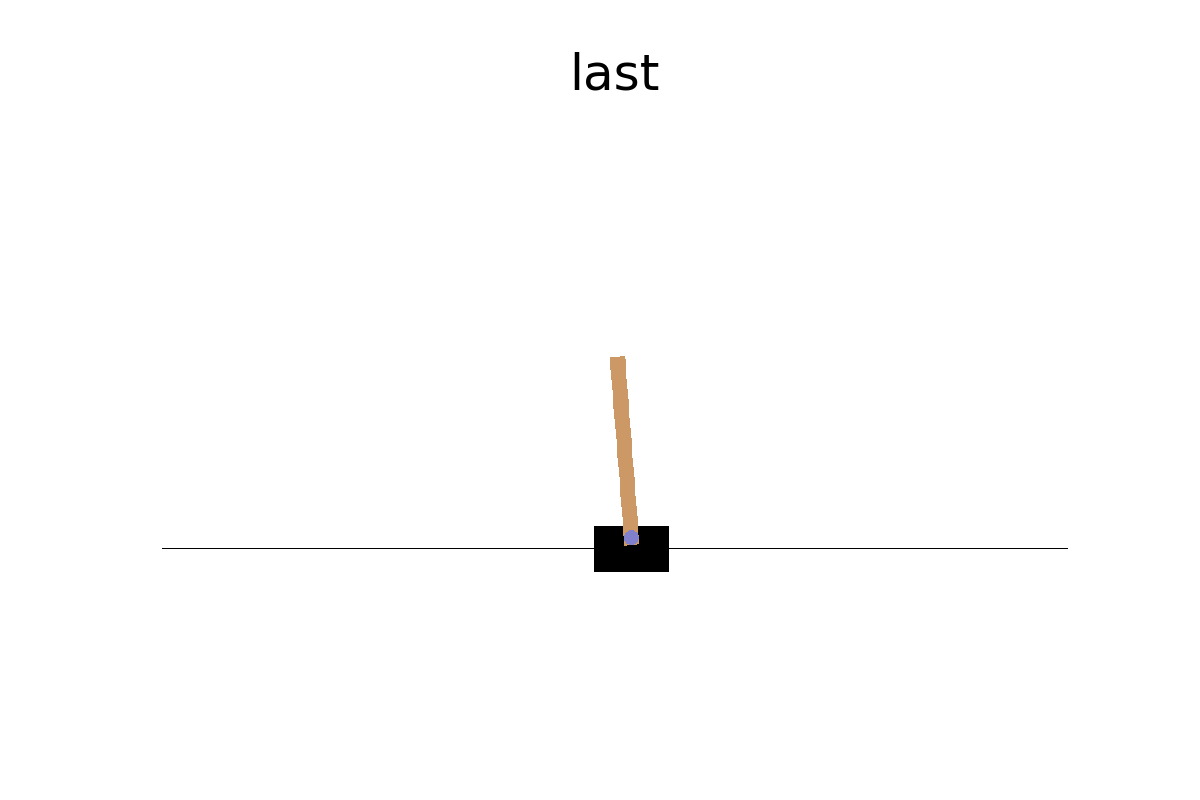
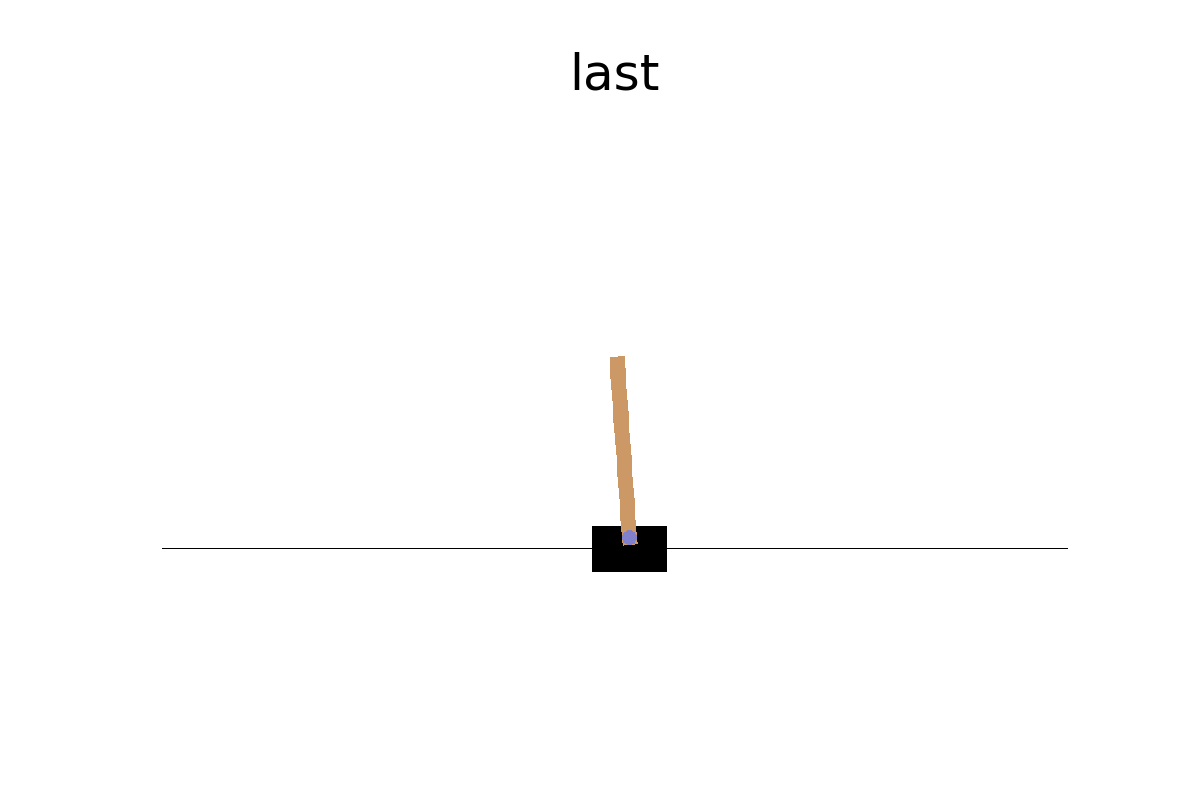
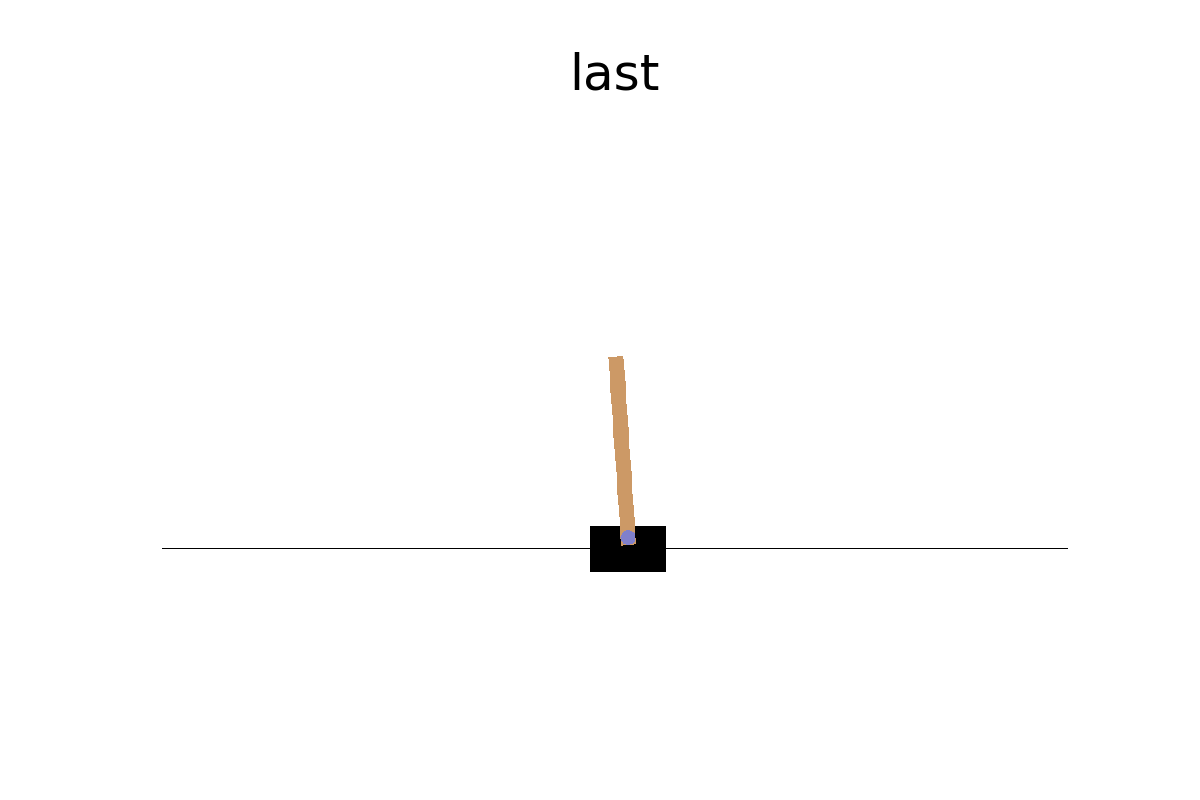
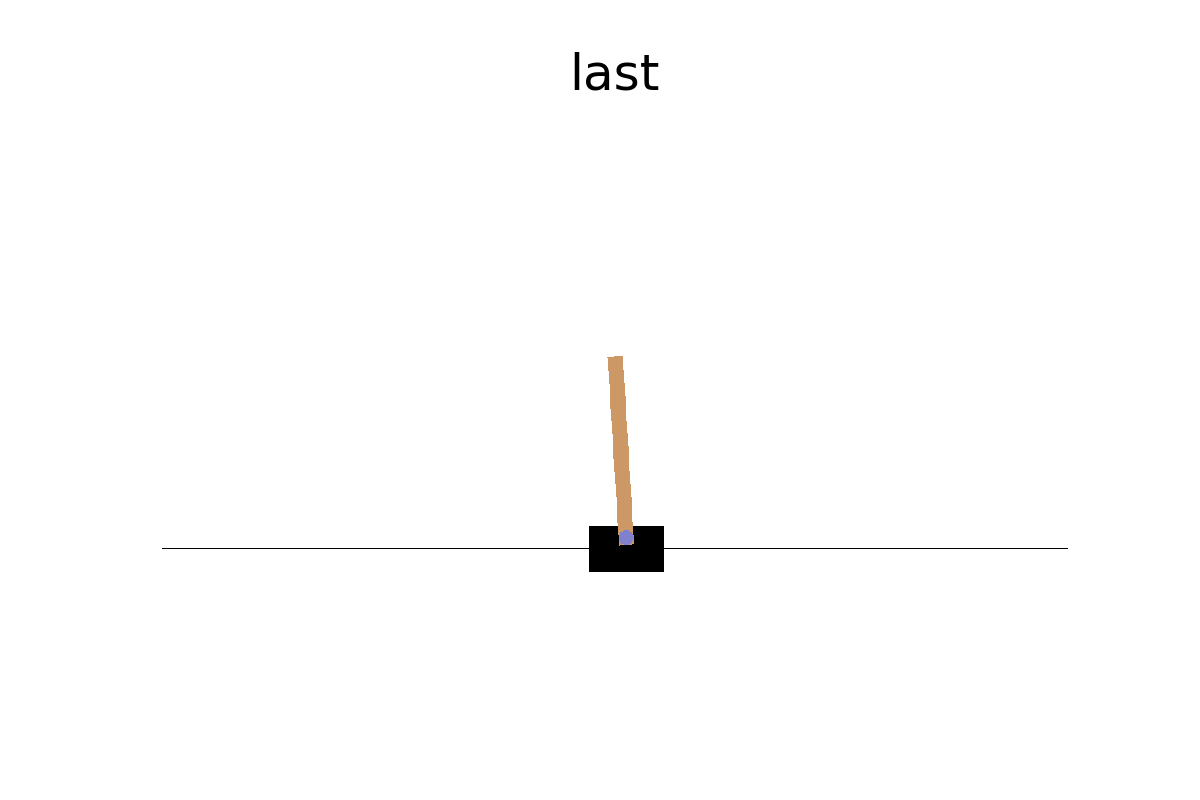
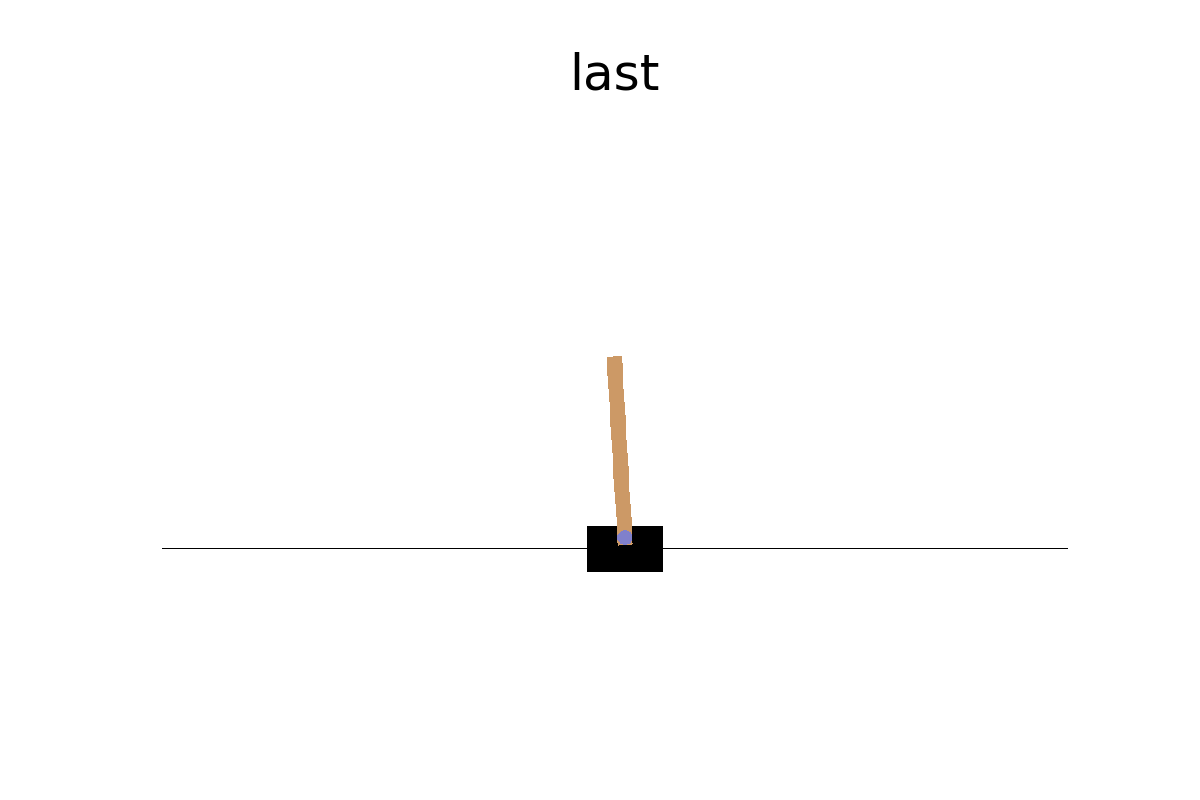
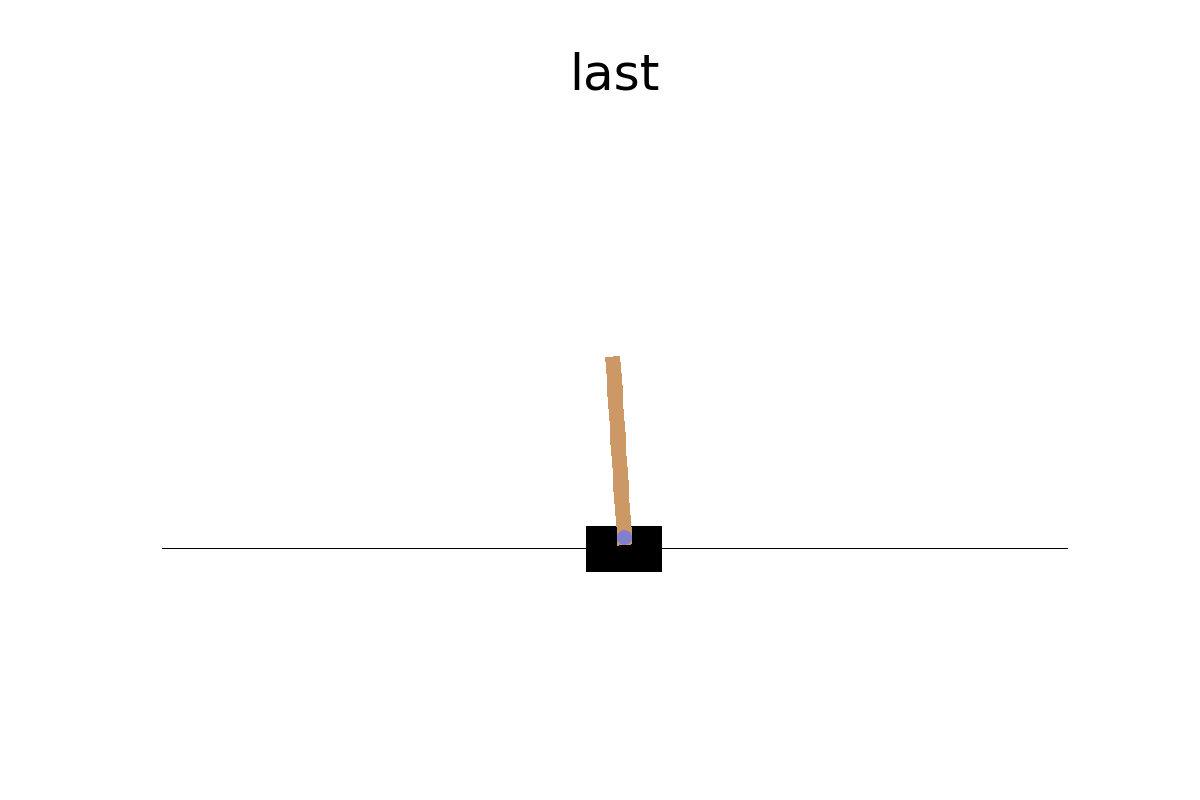
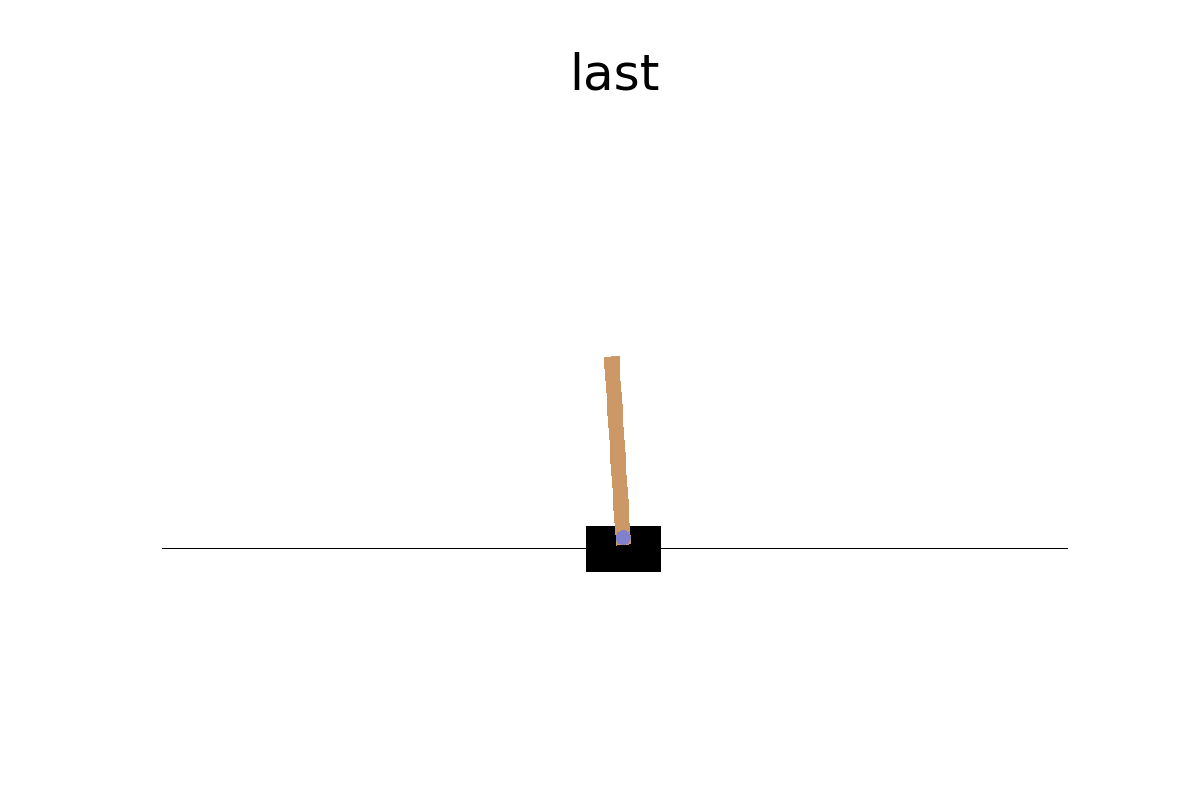
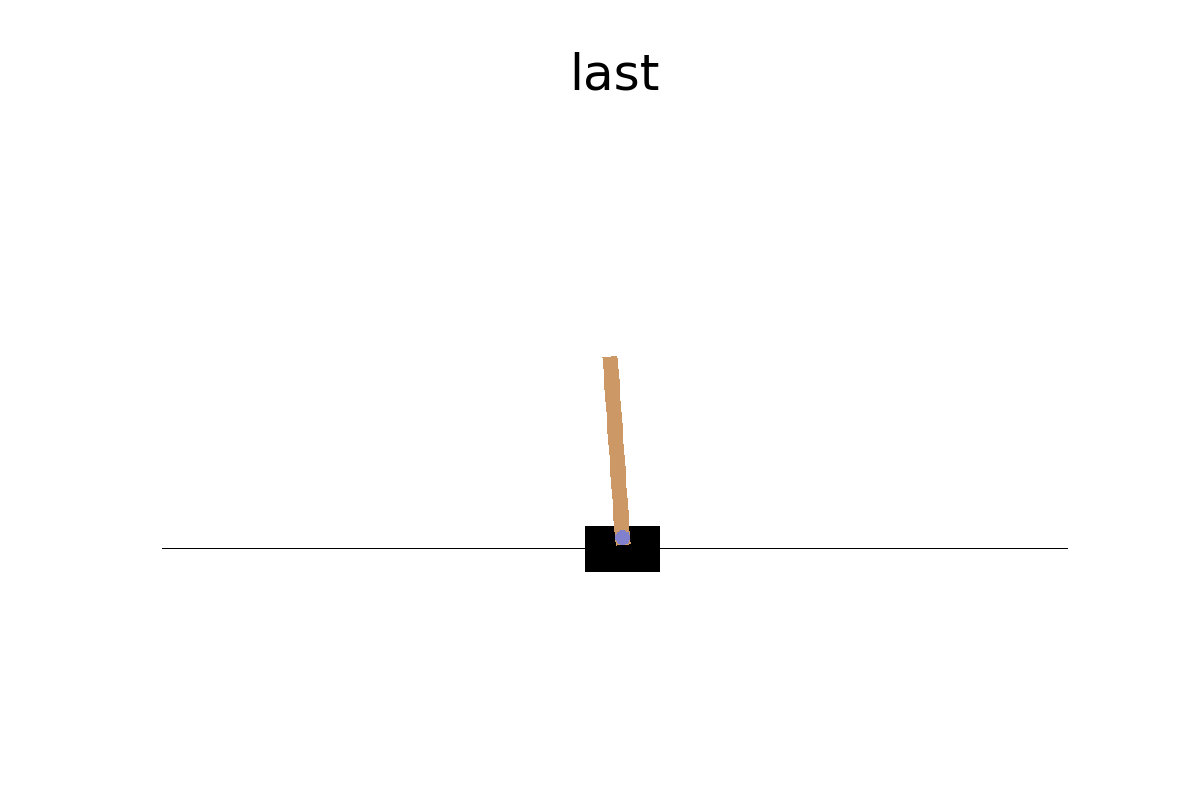
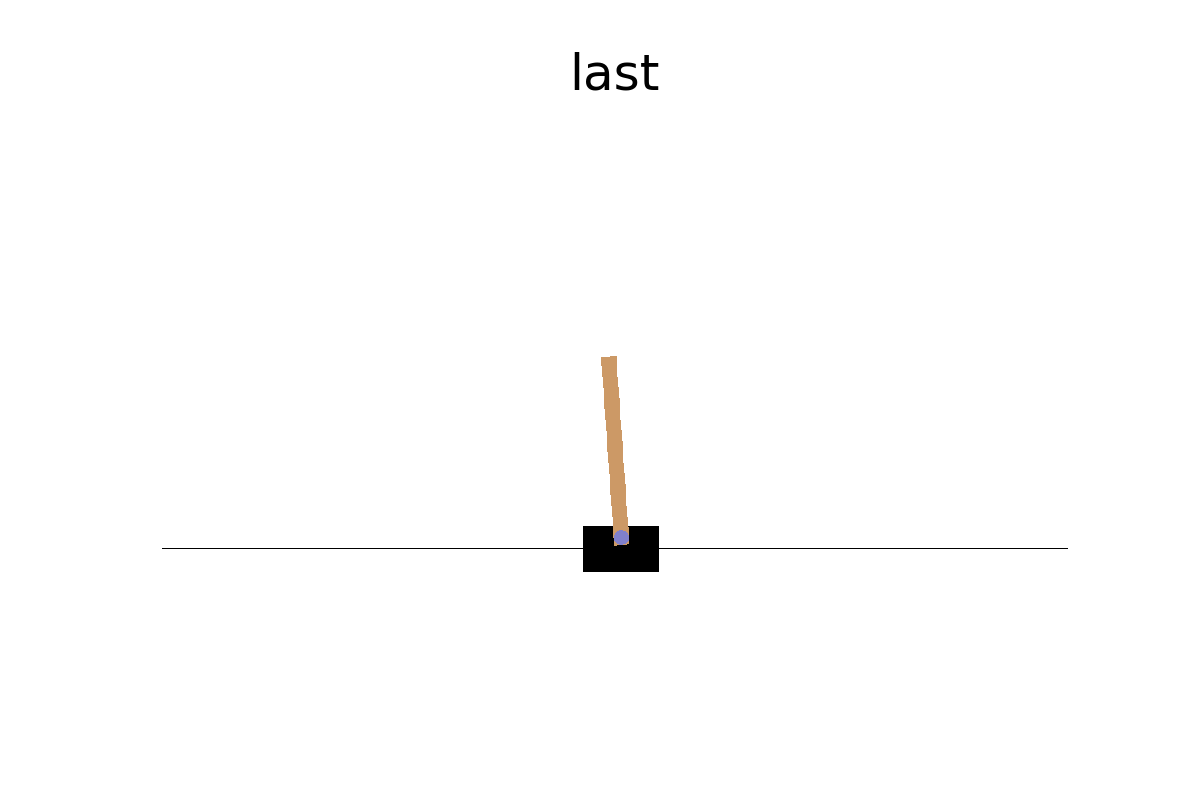
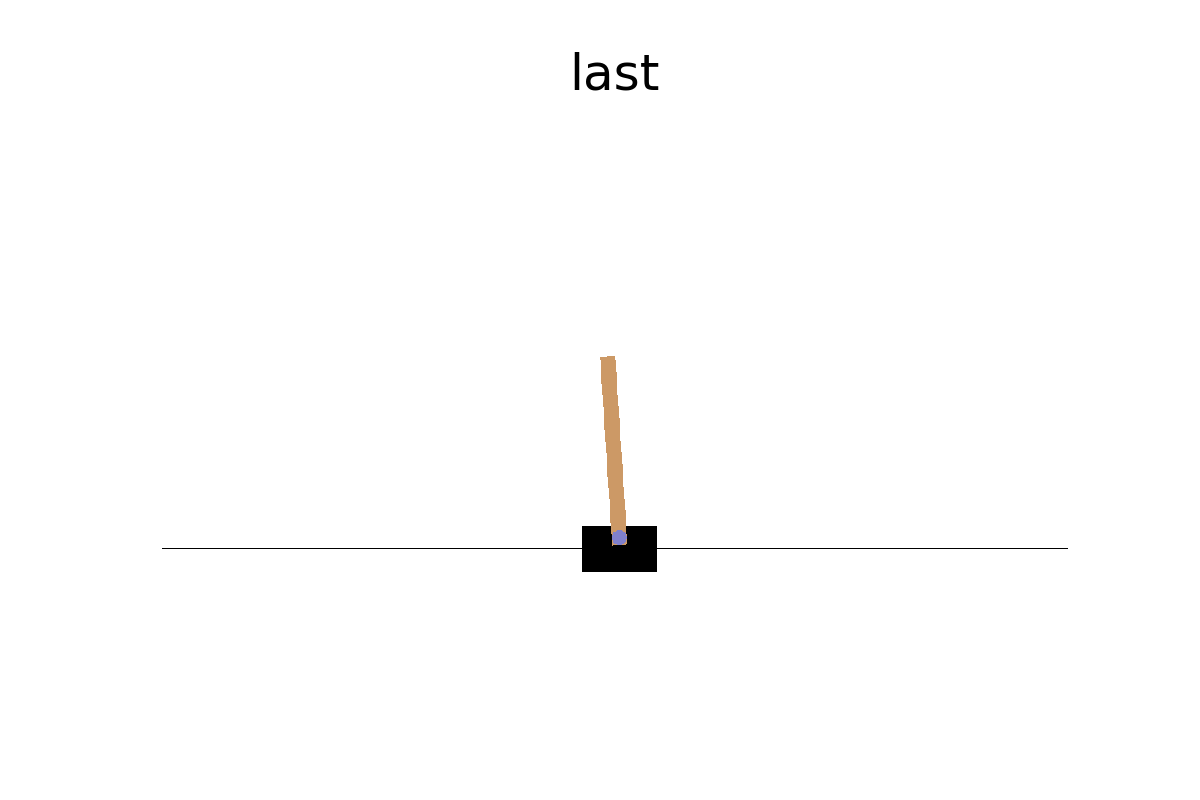
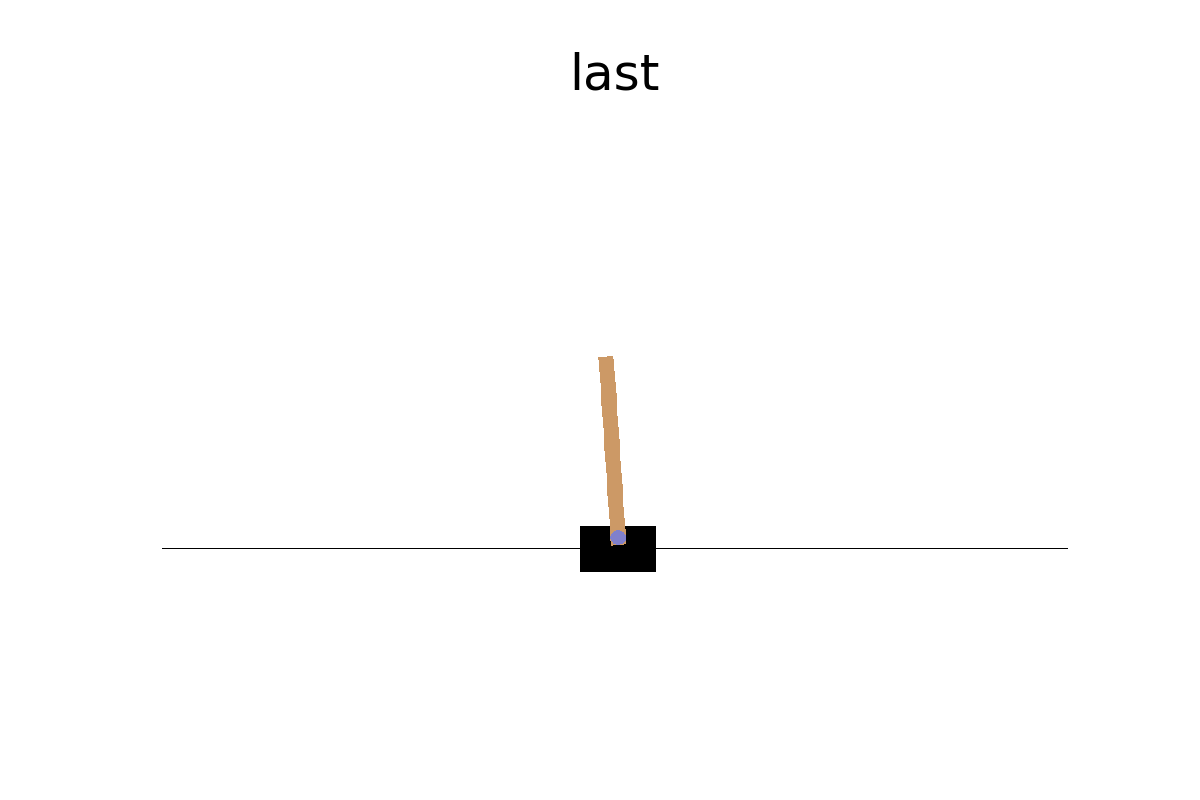
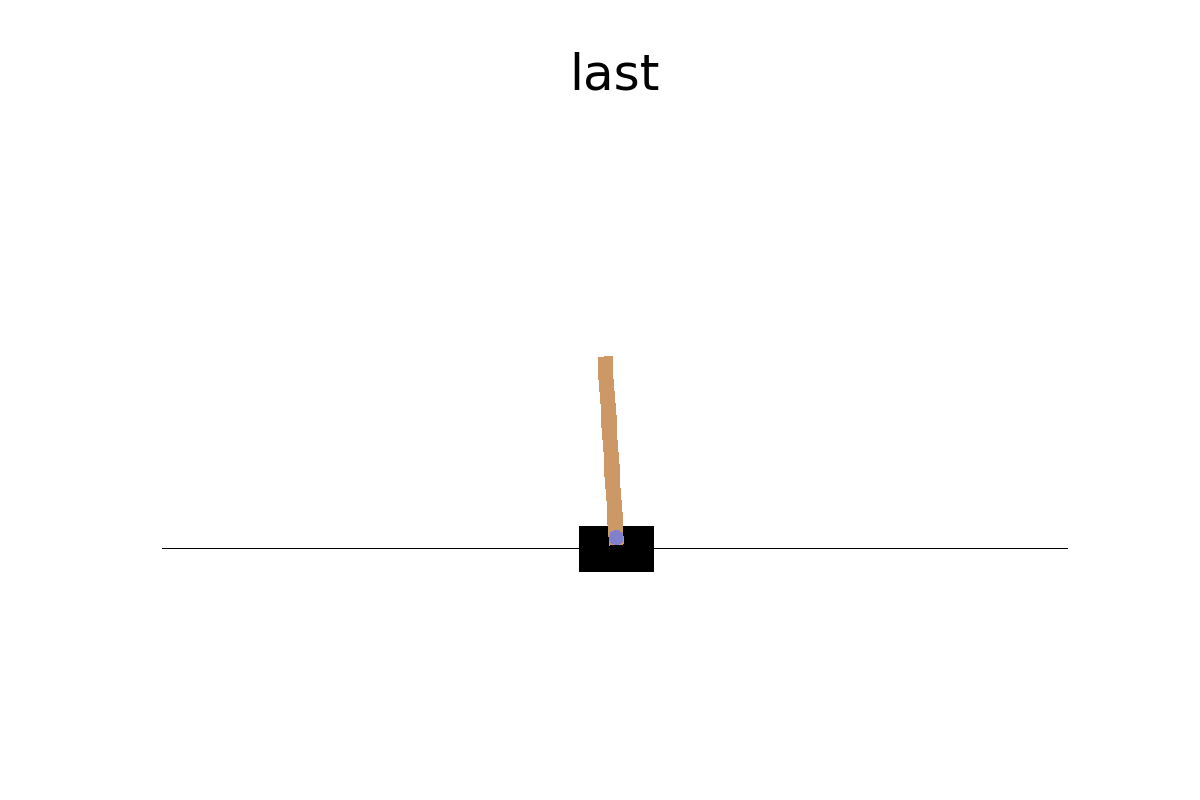
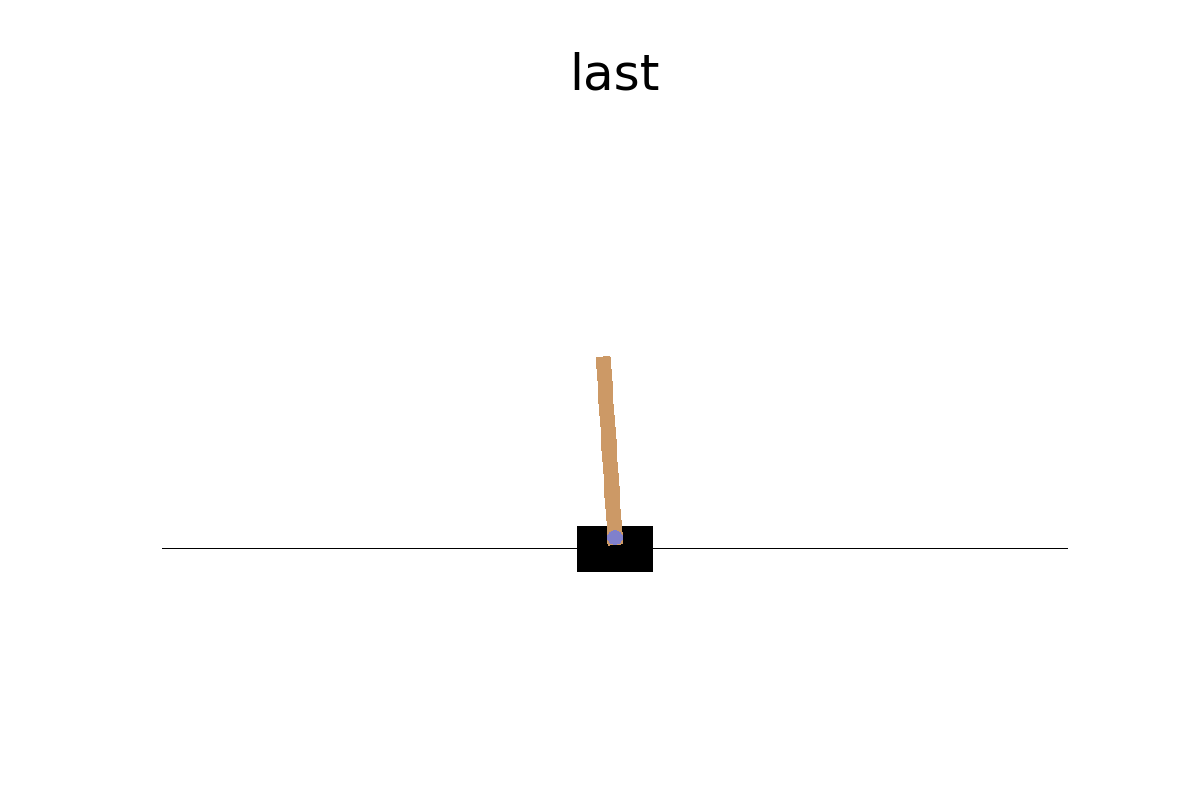
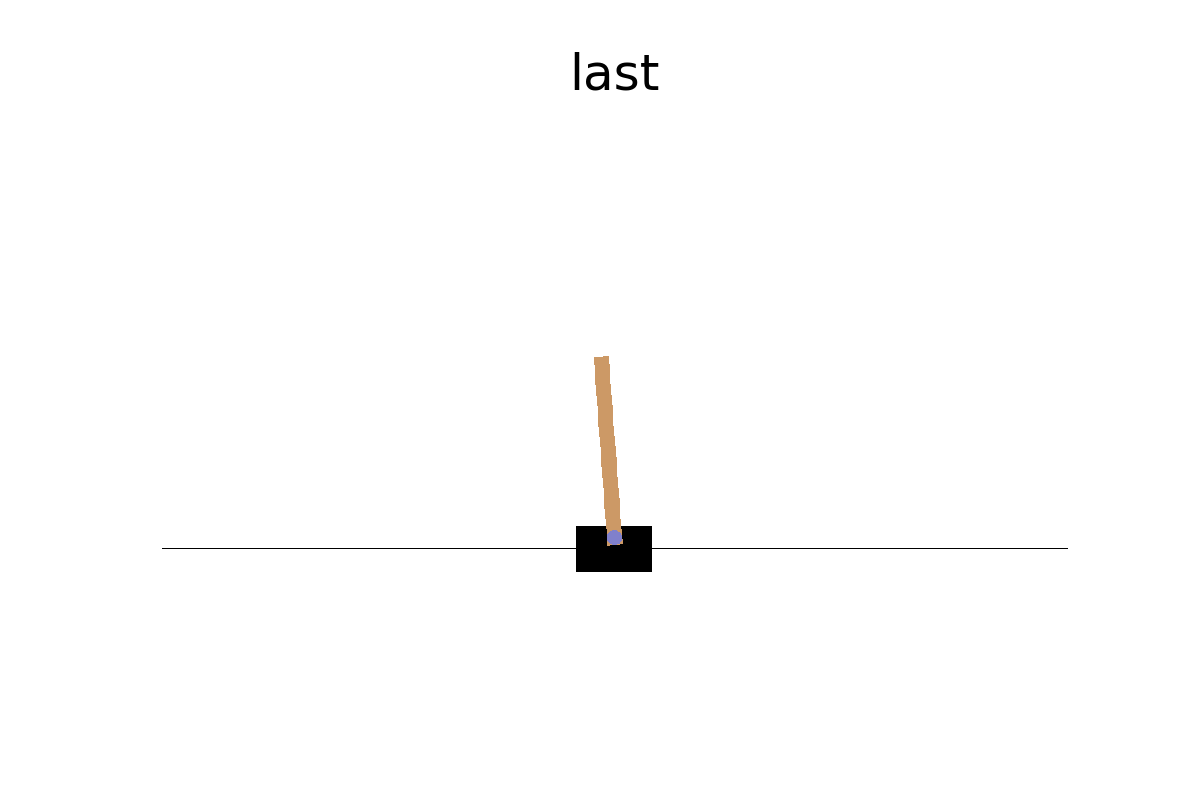
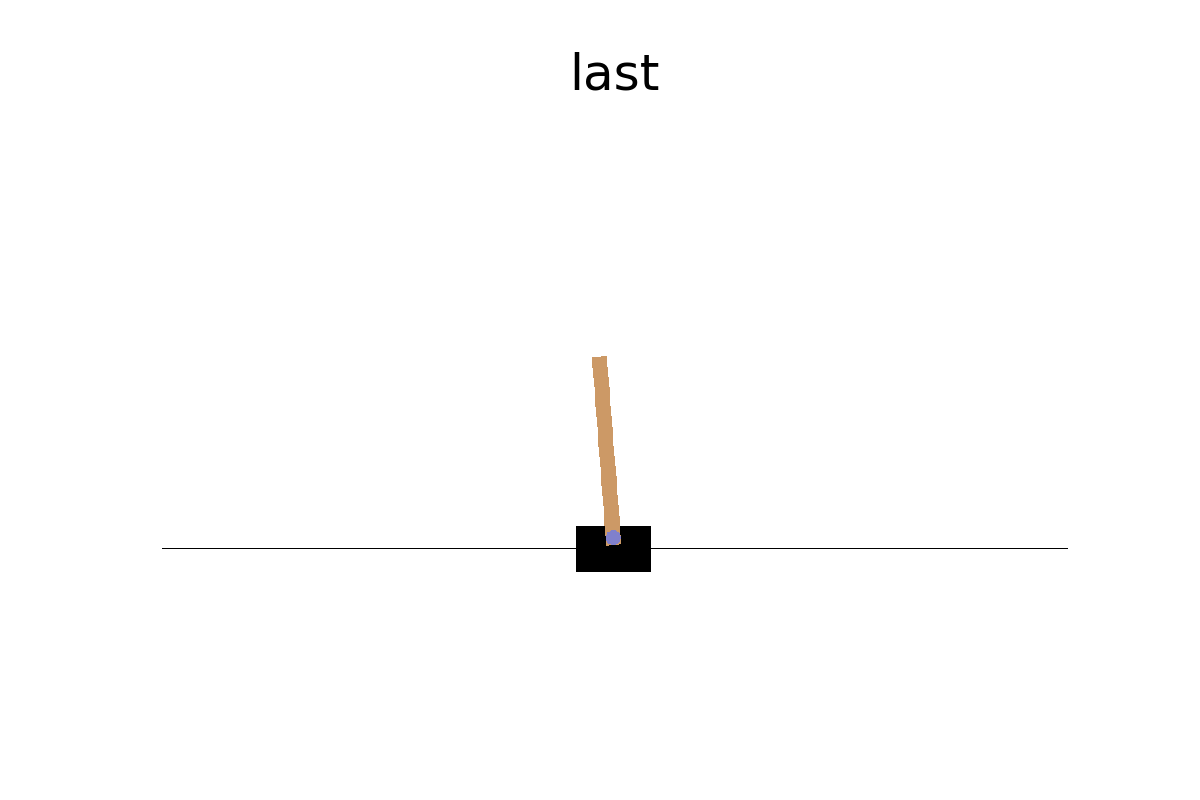
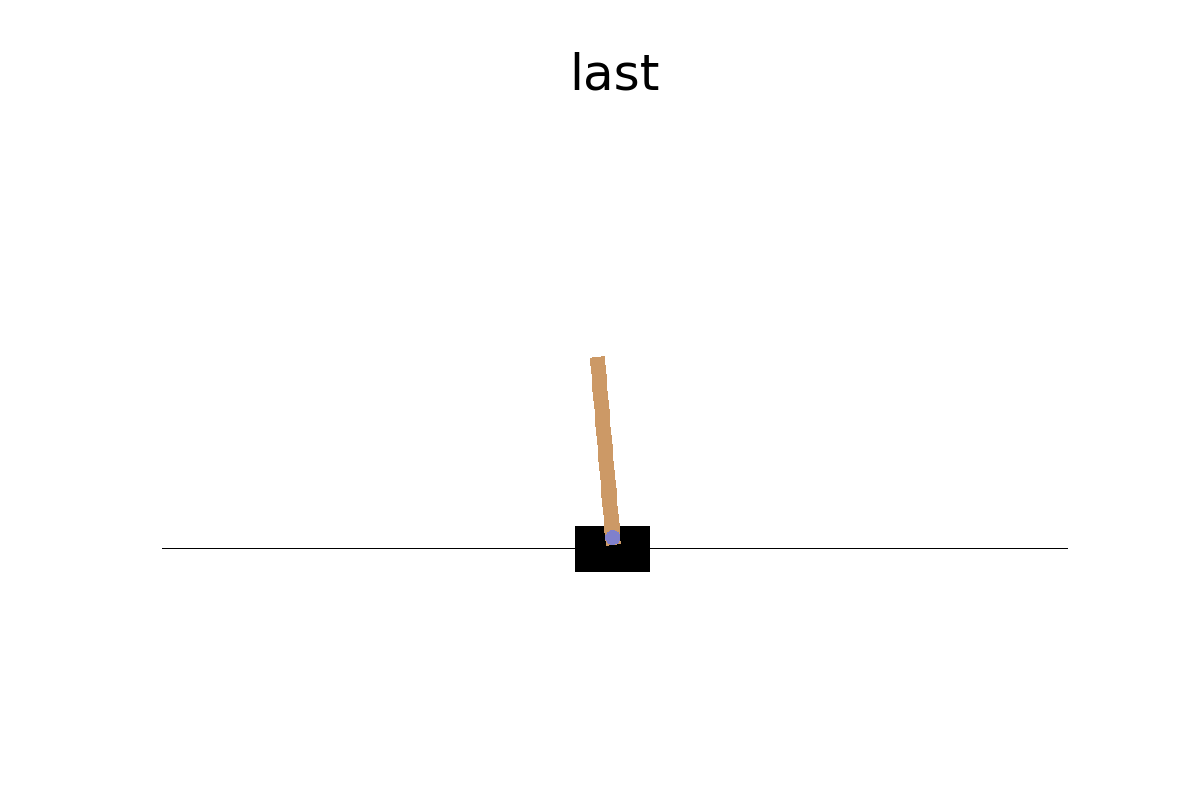
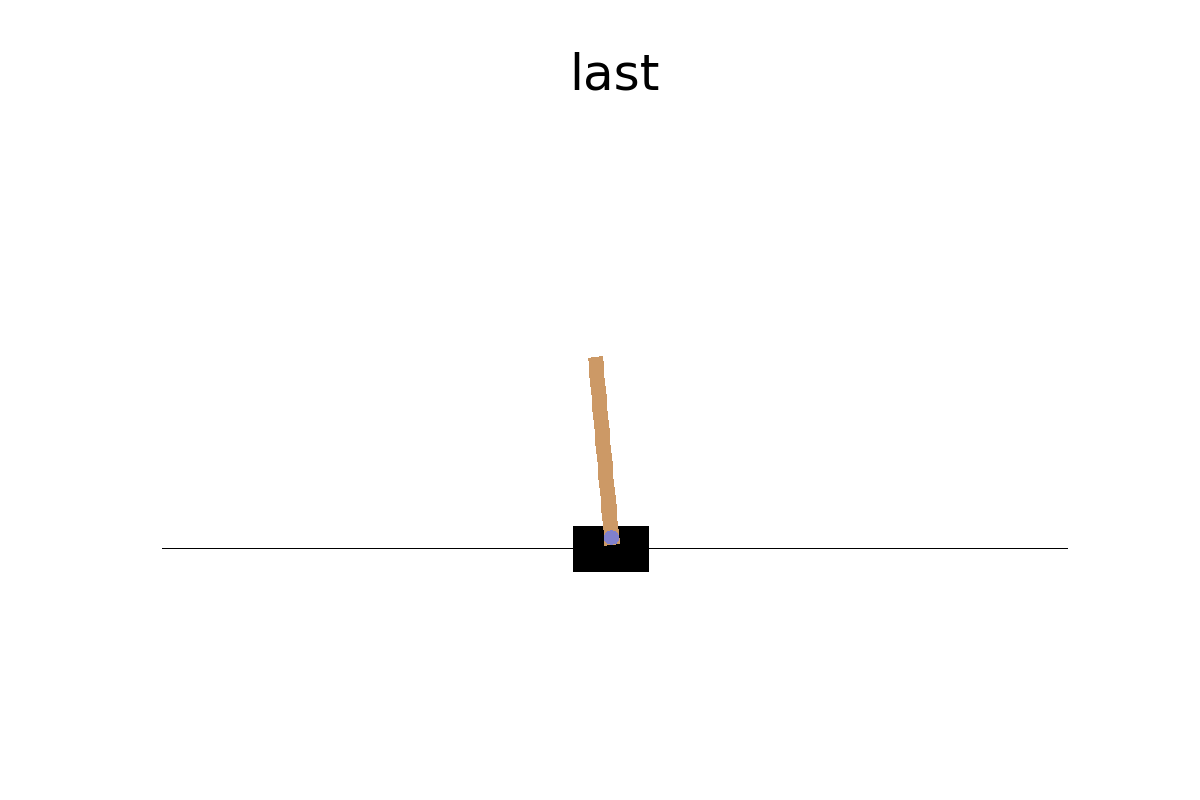
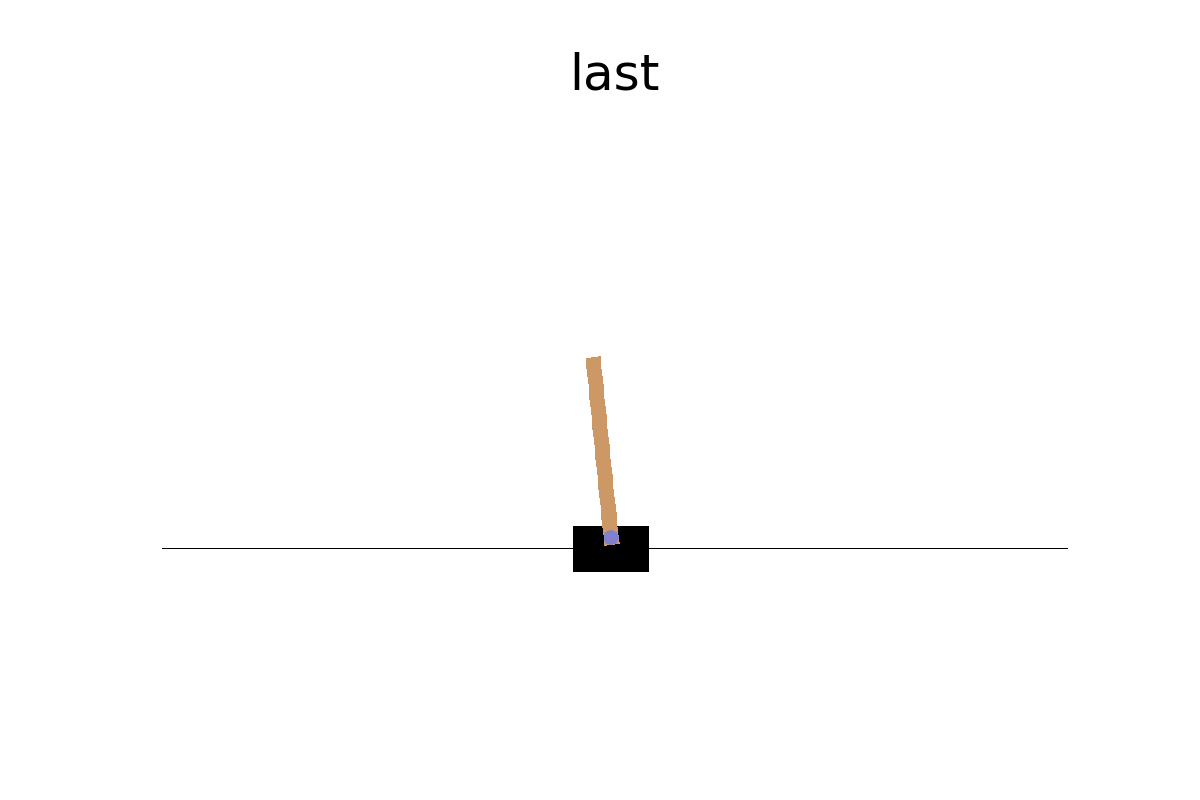
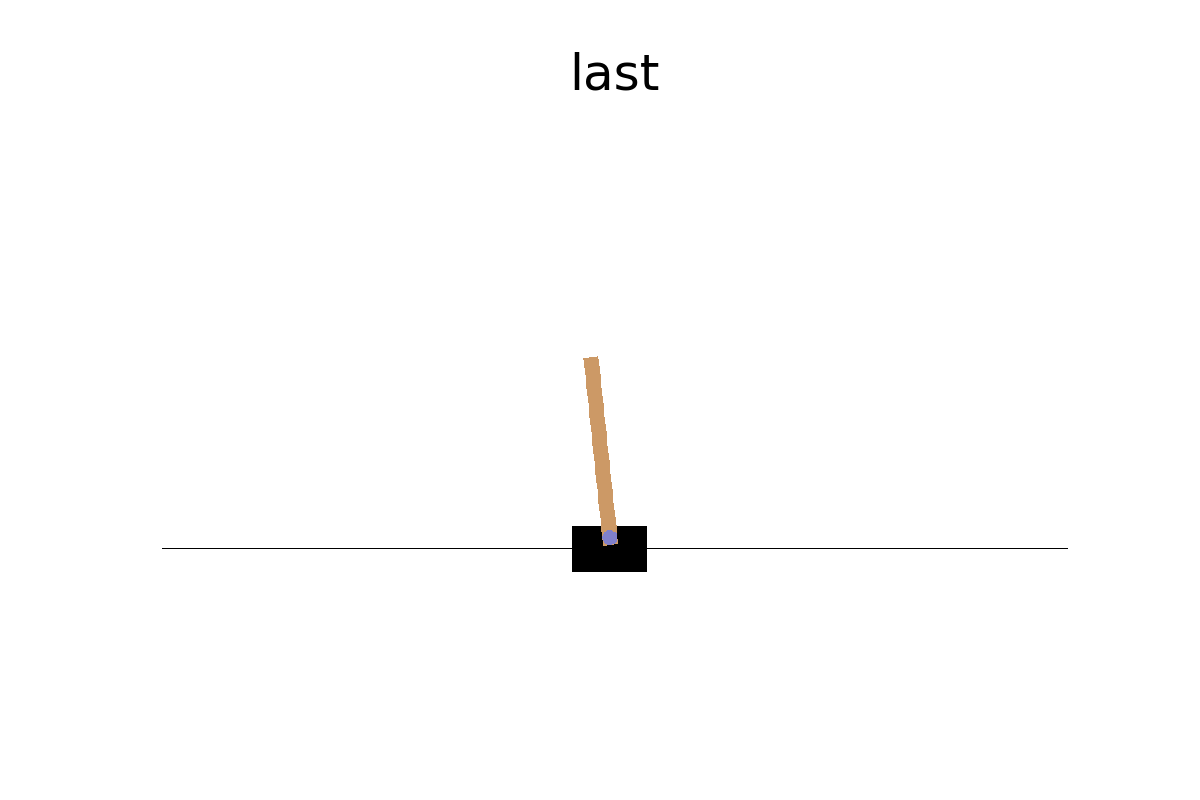
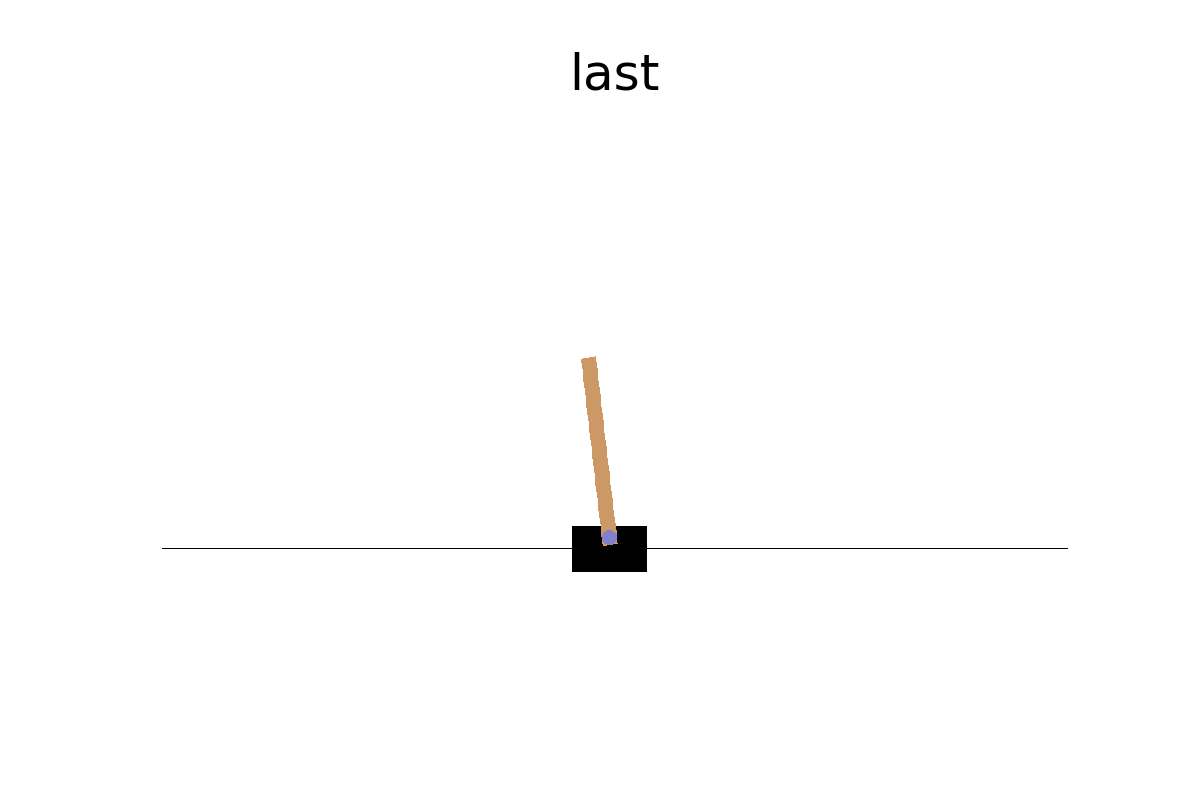
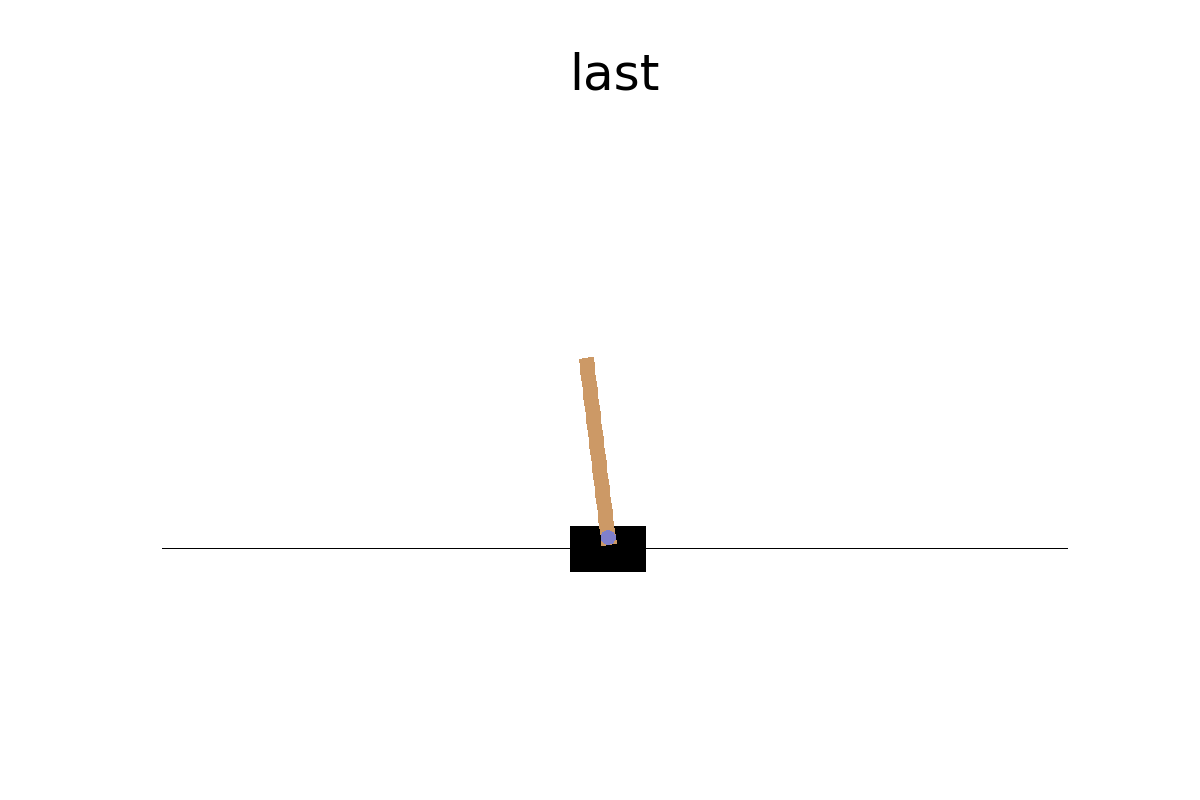
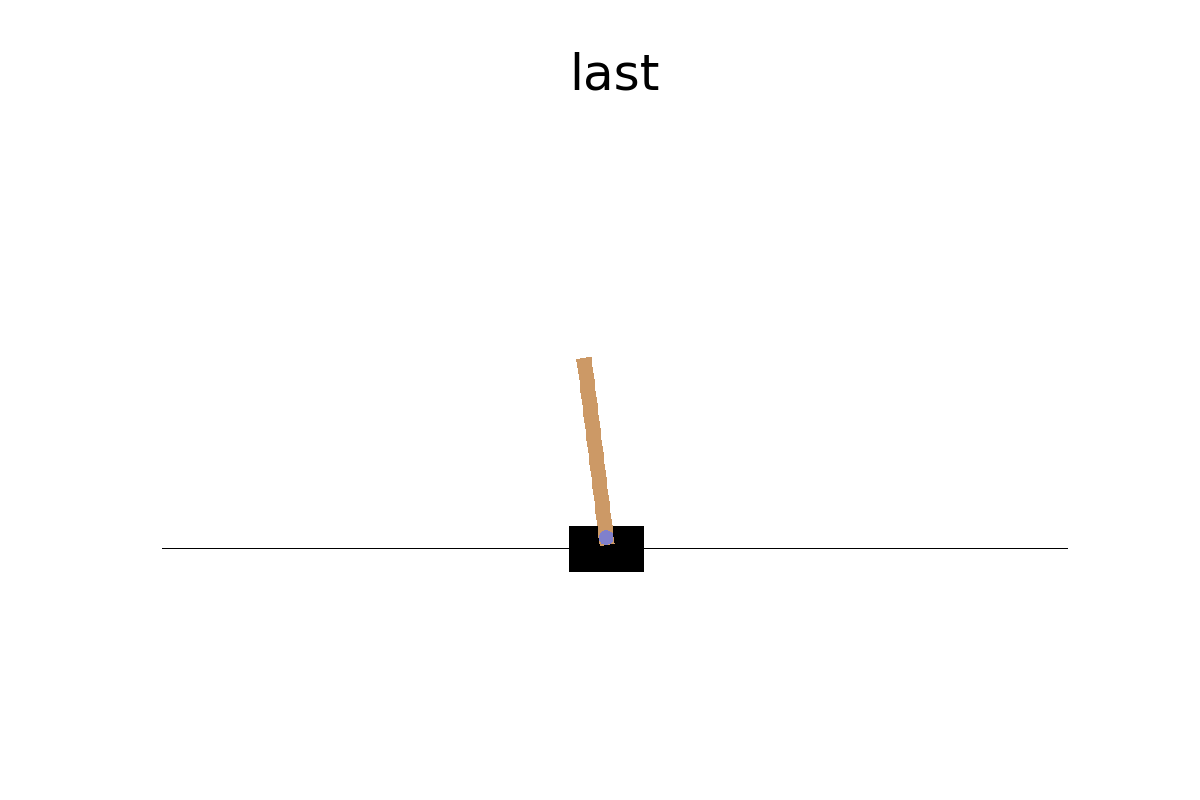
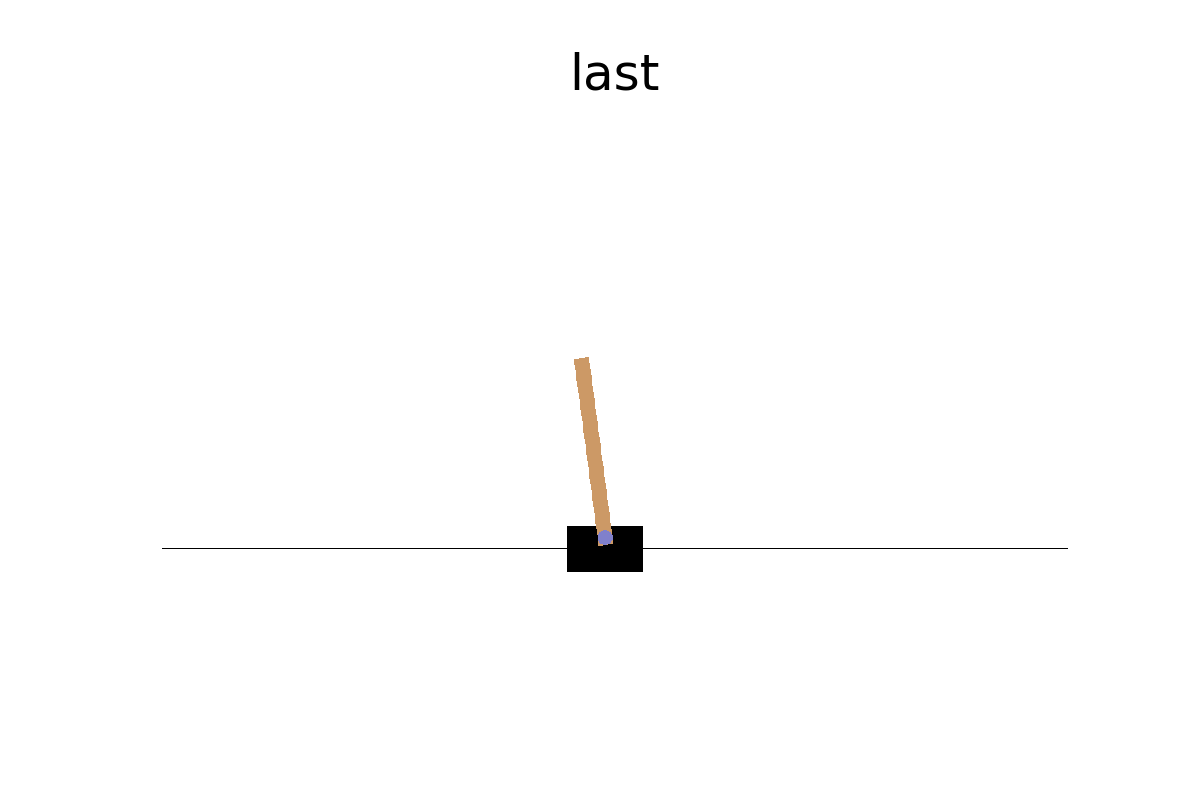
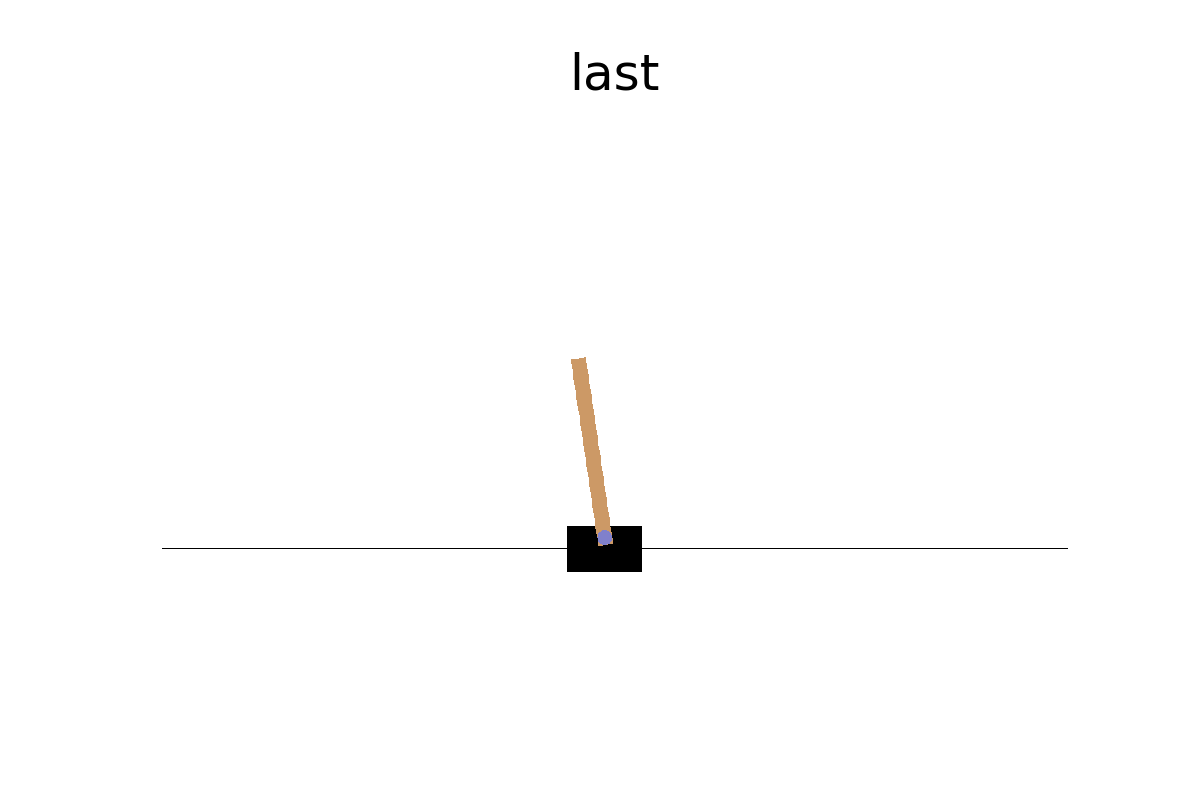
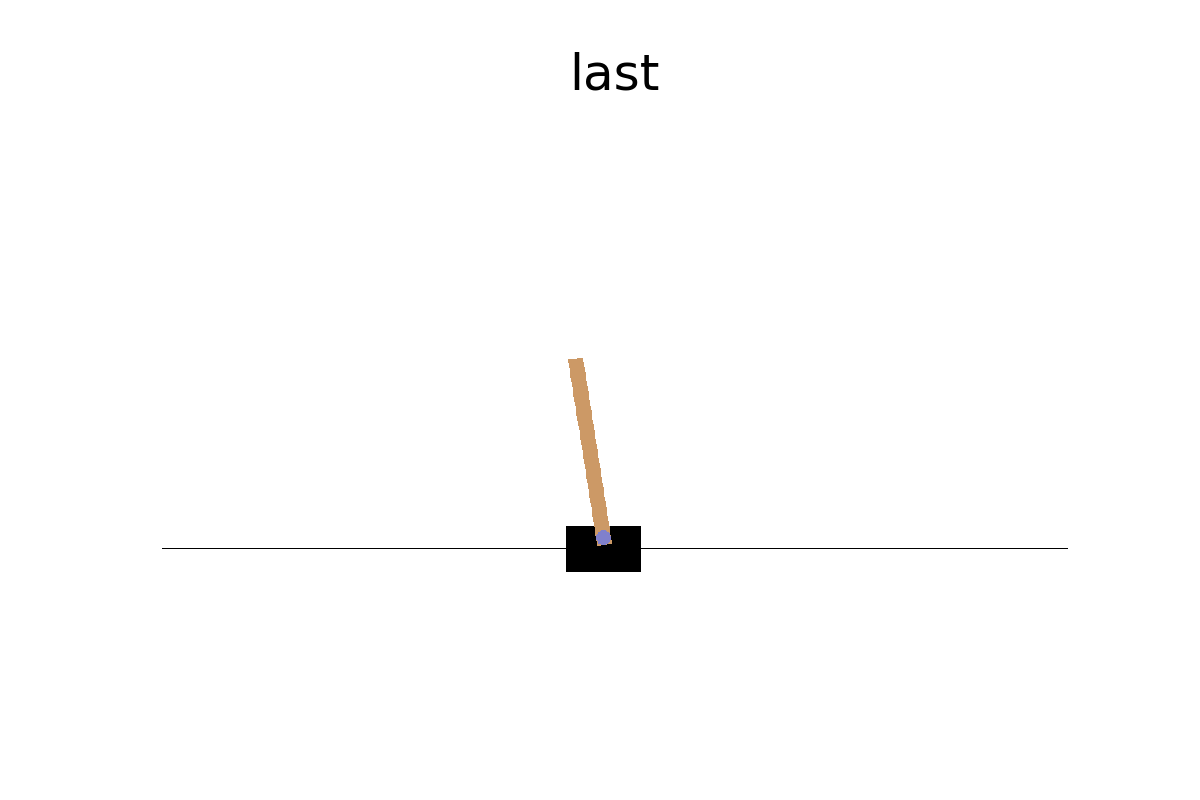
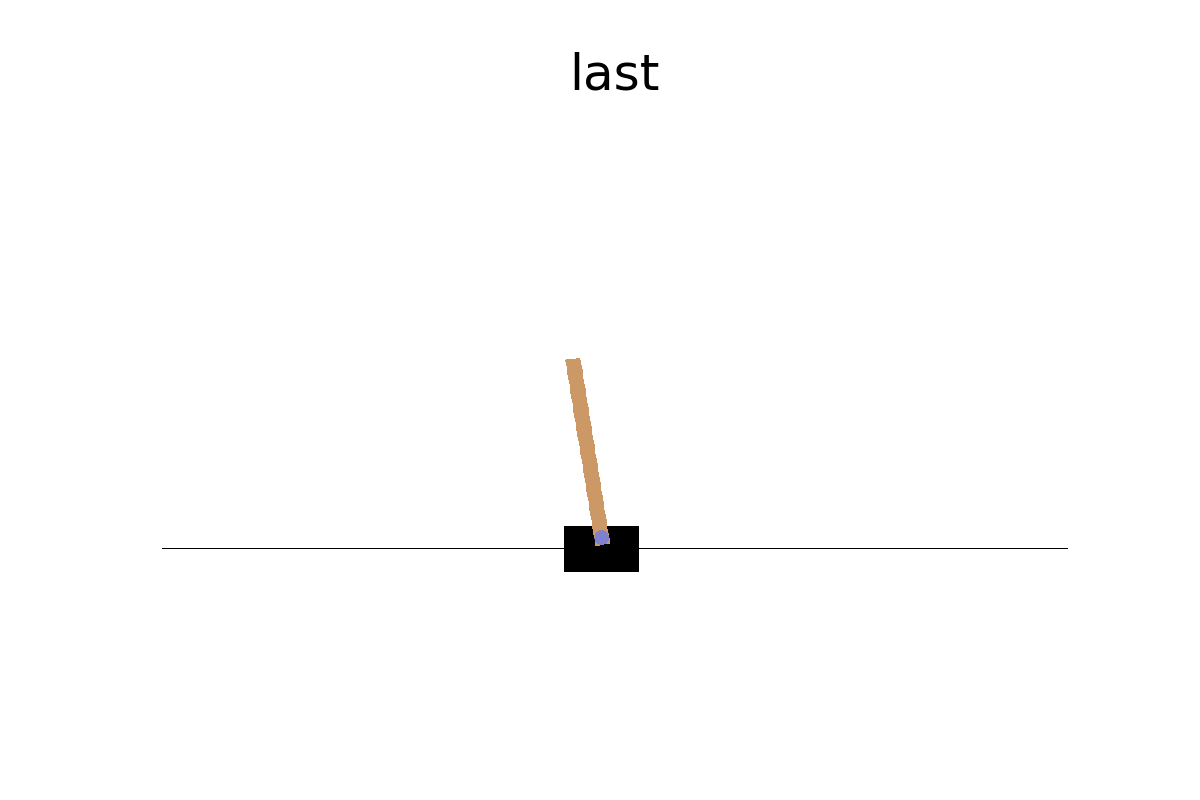
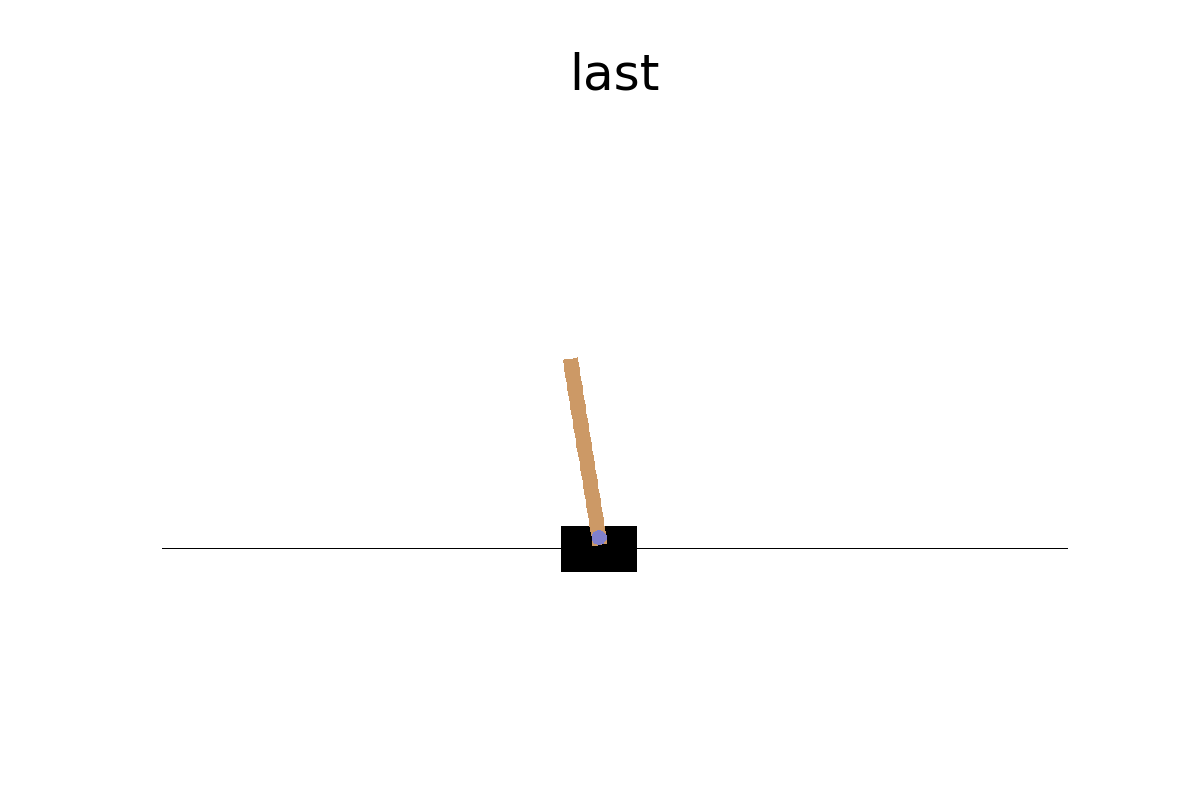
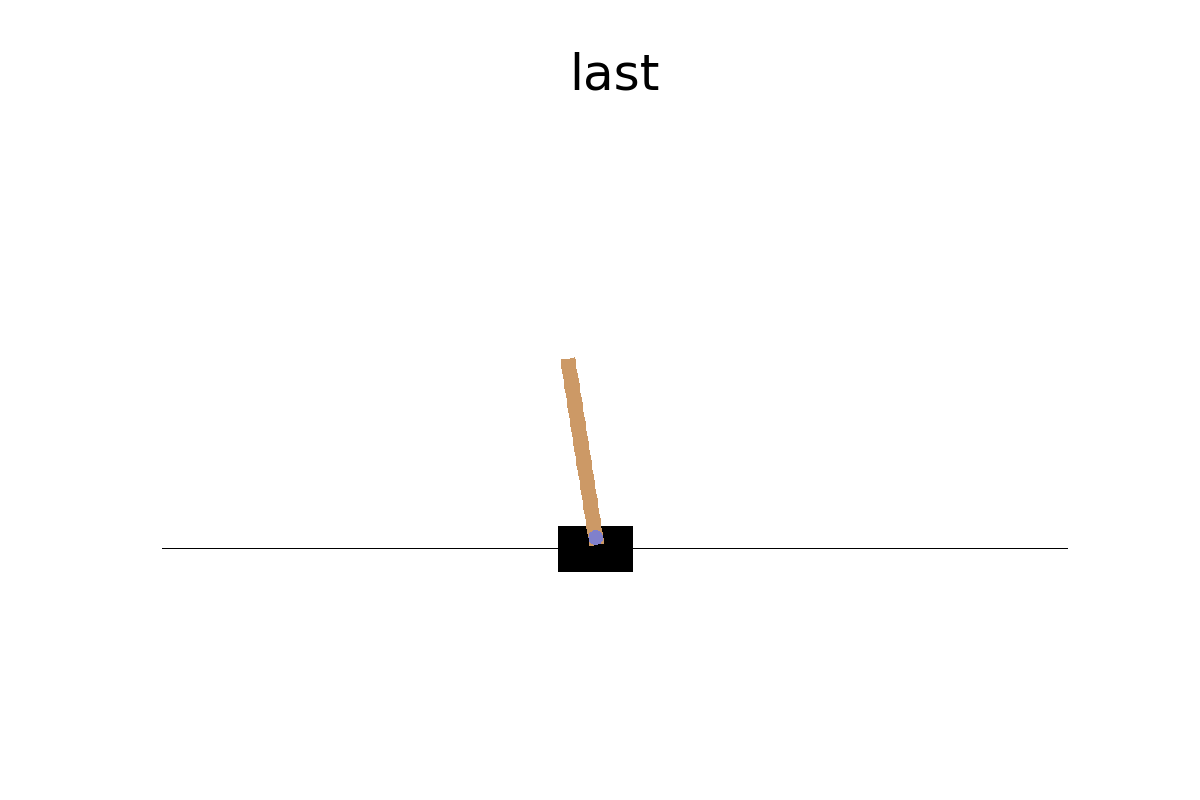
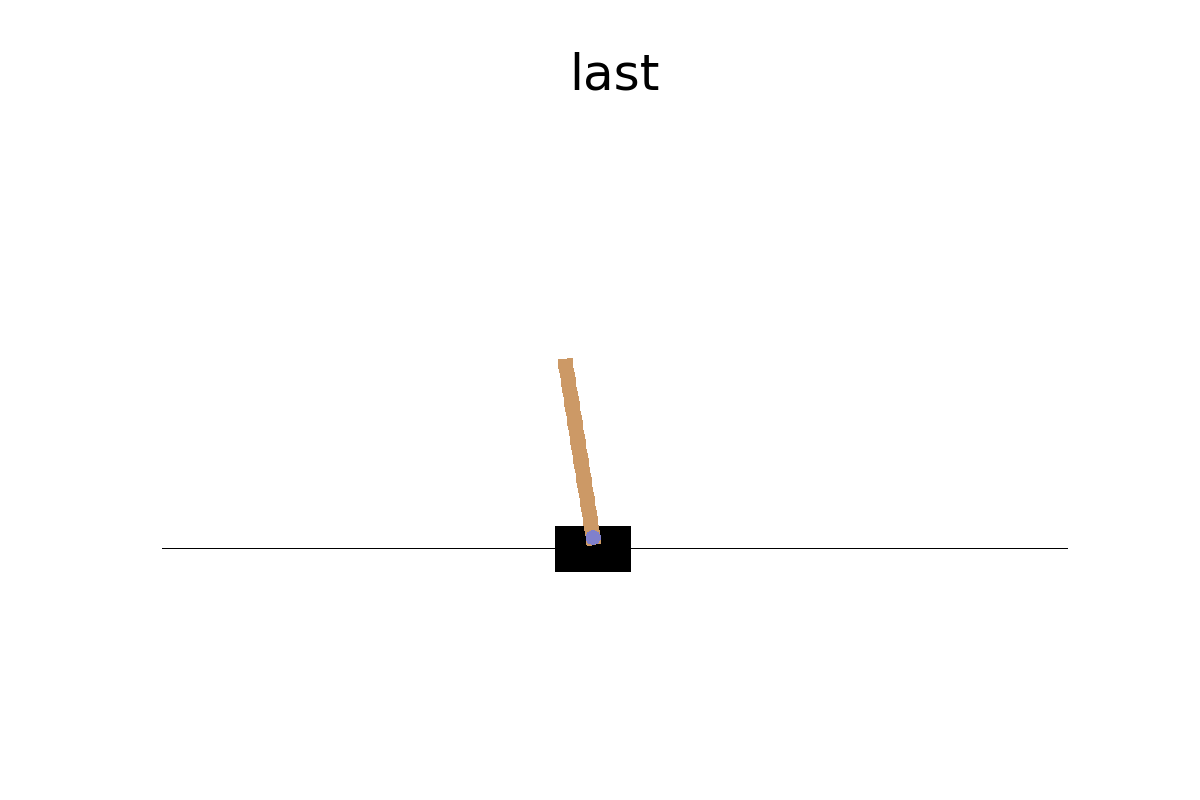
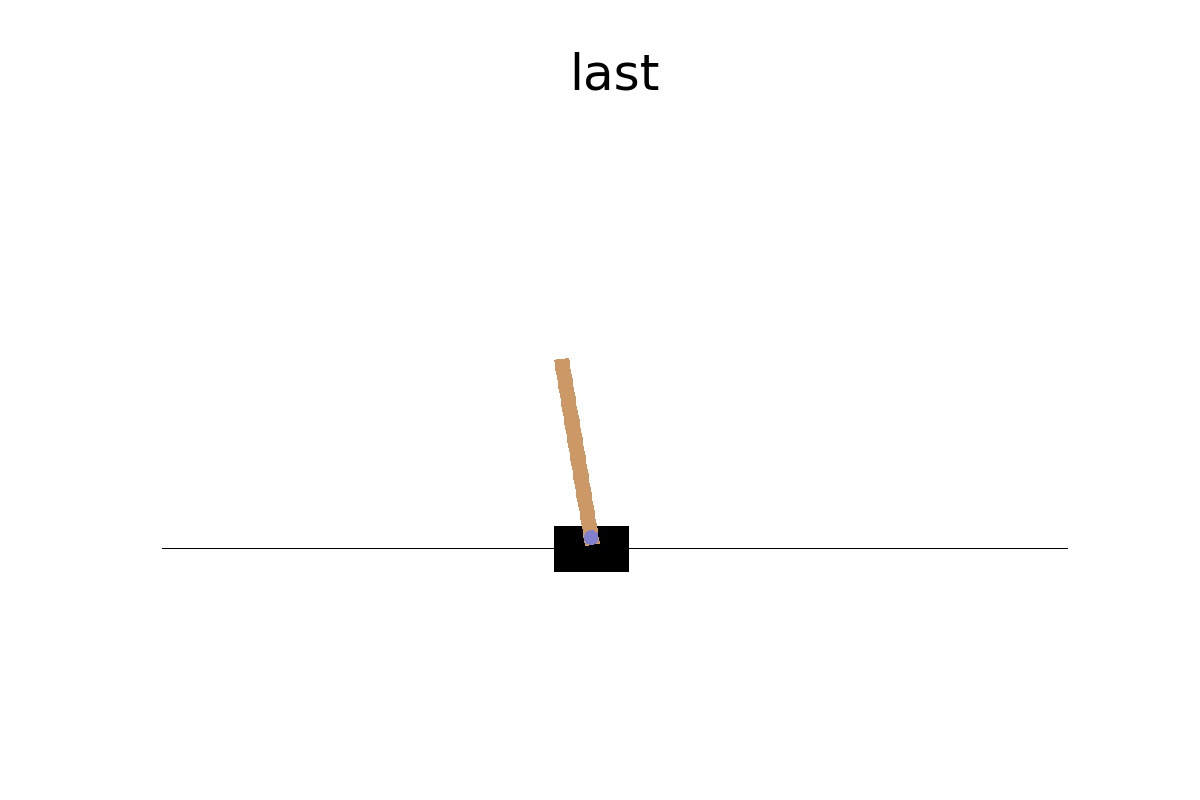
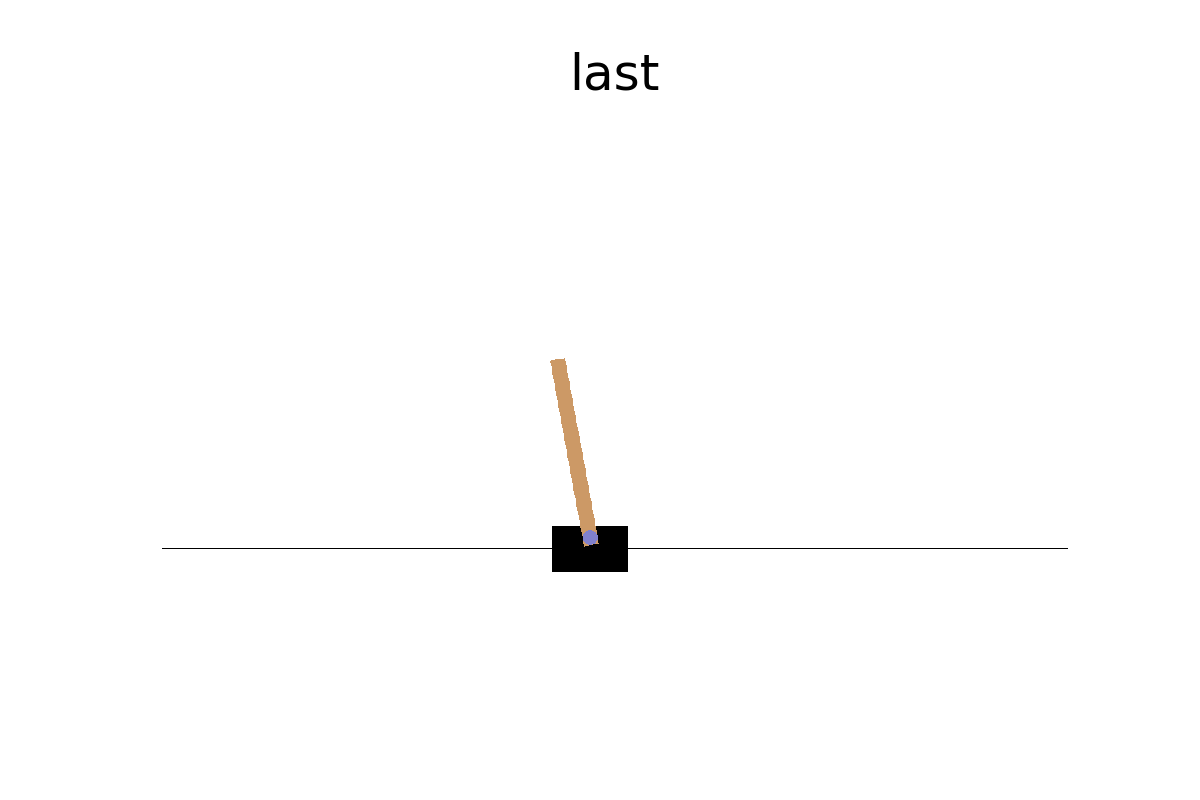
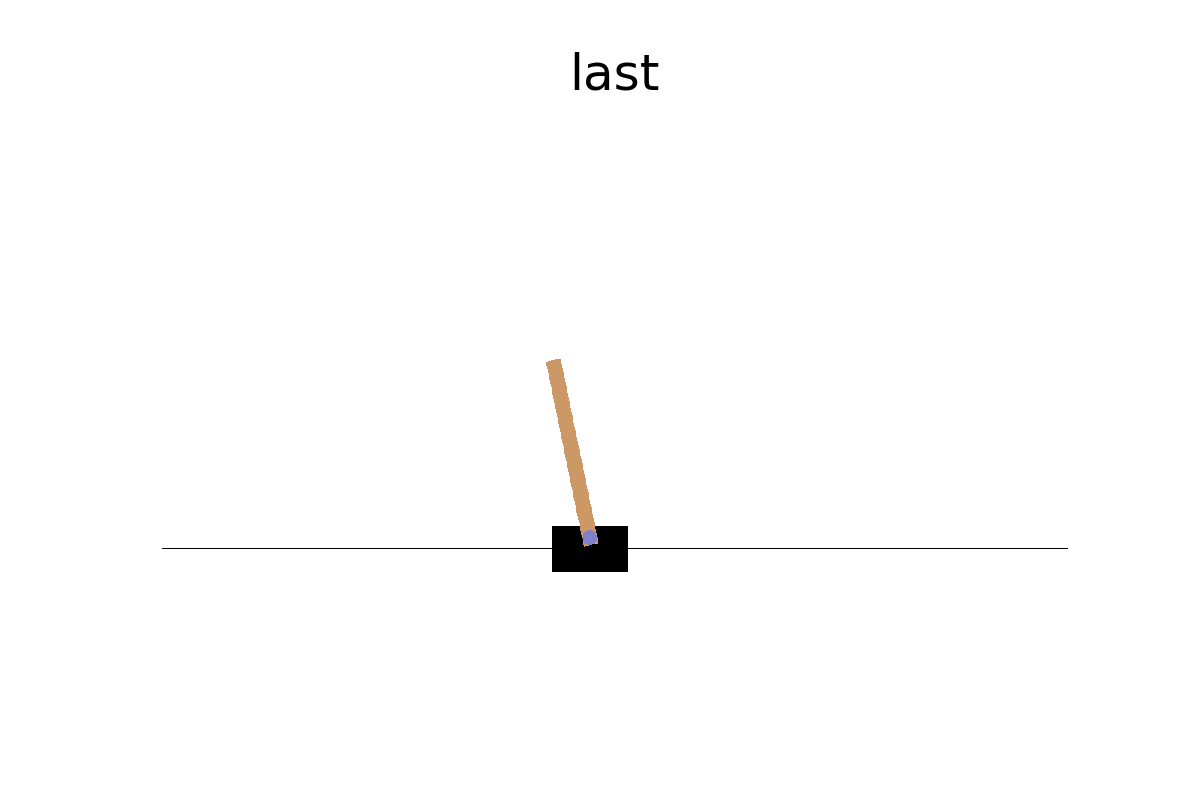
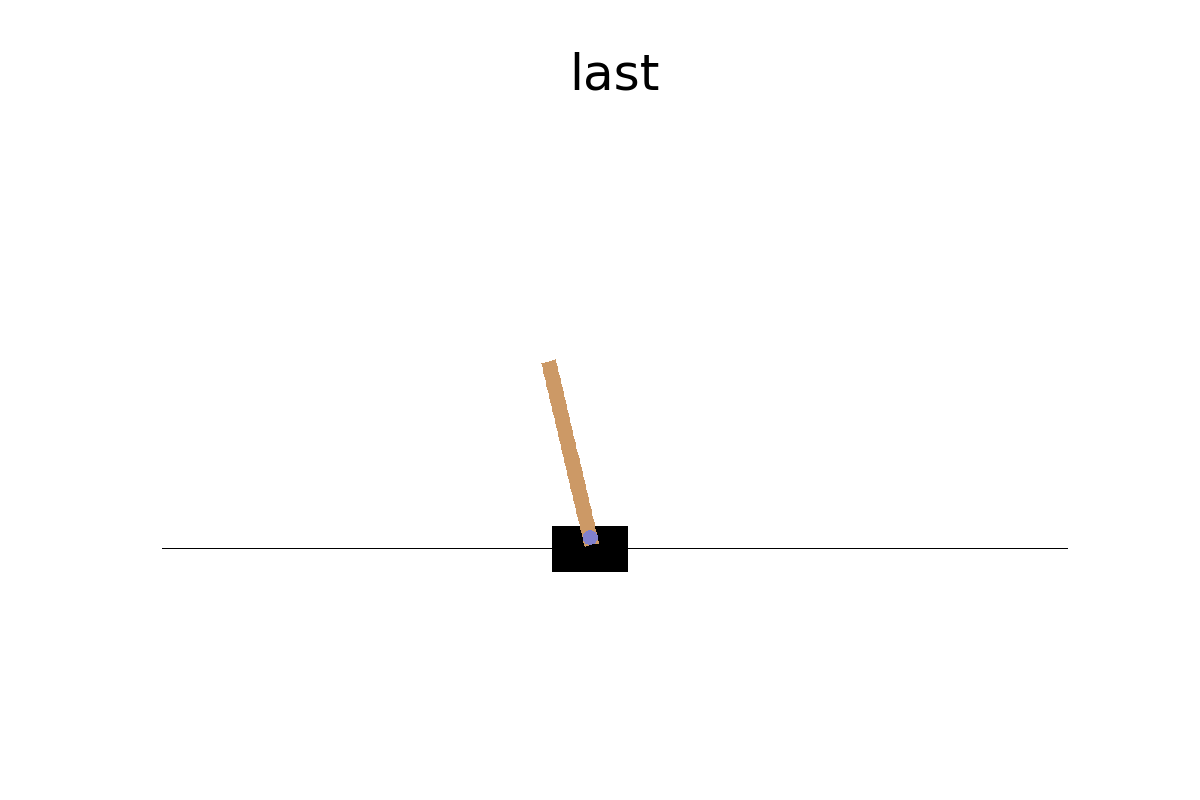

In [48]:
display_frames_as_gif(frames, "last")

In [67]:
steps_total

[16, 34, 23, 15, 23, 23, 60, 50, 40, 59]

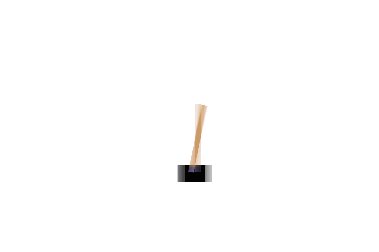

In [78]:
for i in range(0,steps_total[0] + 1):
    plt.imshow(frames[i], alpha = .25)
plt.axis('off');

In [34]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable

In [35]:
import matplotlib

# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

# if gpu is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [36]:
W = 2
b = .3
x = Variable(torch.arange(100).unsqueeze(1))

y = W * x + b

In [43]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

from torch.autograd import Variable

# if gpu is to be used
use_cuda = torch.cuda.is_available()

device = torch.device("cuda:0" if use_cuda else "cpu")

W = 2
b = 0.3

#x = torch.arange(100,dtype=torch.float32).to(device).unsqueeze(1)
x = torch.arange(100).to(device = device, dtype = torch.float32).unsqueeze(1)

print(x.type()) 

y = W * x + b

###### PARAMS ######
learning_rate = 0.01
num_episodes = 1000


class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear1 = nn.Linear(1,1)
        
    def forward(self, x):
        output = self.linear1(x)
        return output
    
mynn = NeuralNetwork().to(device)
    
loss_func = nn.MSELoss()
#loss_func = nn.SmoothL1Loss()

optimizer = optim.Adam(params=mynn.parameters(), lr=learning_rate)
#optimizer = optim.RMSprop(params=mynn.parameters(), lr=learning_rate)

for i_episode in range(num_episodes):
    
    predicted_value = mynn(x)
    
    loss = loss_func(predicted_value, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if i_episode % 50 == 0:
        print("Episode %i, loss %.4f " % (i_episode, loss.item()))

torch.FloatTensor
Episode 0, loss 16368.5928 
Episode 50, loss 9945.2500 
Episode 100, loss 5611.8110 
Episode 150, loss 2932.9817 
Episode 200, loss 1408.8976 
Episode 250, loss 618.2563 
Episode 300, loss 246.9336 
Episode 350, loss 89.7258 
Episode 400, loss 29.8333 
Episode 450, loss 9.3053 
Episode 500, loss 2.9723 
Episode 550, loss 1.2119 
Episode 600, loss 0.7691 
Episode 650, loss 0.6663 
Episode 700, loss 0.6419 
Episode 750, loss 0.6335 
Episode 800, loss 0.6278 
Episode 850, loss 0.6225 
Episode 900, loss 0.6171 
Episode 950, loss 0.6115 


Episode finished after 19 steps
Episode finished after 13 steps
Episode finished after 40 steps
Episode finished after 14 steps
Episode finished after 19 steps
Episode finished after 19 steps
Episode finished after 18 steps
Episode finished after 13 steps
Episode finished after 13 steps
Episode finished after 13 steps
Episode finished after 23 steps
Episode finished after 16 steps
Episode finished after 24 steps
Episode finished after 21 steps
Episode finished after 21 steps
Episode finished after 17 steps
Episode finished after 23 steps
Episode finished after 41 steps
Episode finished after 20 steps
Episode finished after 19 steps
Episode finished after 24 steps
Episode finished after 12 steps
Episode finished after 9 steps
Episode finished after 15 steps
Episode finished after 14 steps
Episode finished after 17 steps
Episode finished after 17 steps
Episode finished after 24 steps
Episode finished after 16 steps
Episode finished after 13 steps
Episode finished after 22 steps
Episode f

Episode finished after 73 steps
Episode finished after 11 steps
Episode finished after 9 steps
Episode finished after 11 steps
Episode finished after 30 steps
Episode finished after 14 steps
Episode finished after 15 steps
Episode finished after 53 steps
Episode finished after 28 steps
Episode finished after 44 steps
Episode finished after 13 steps
Episode finished after 21 steps
Episode finished after 15 steps
Episode finished after 24 steps
Episode finished after 23 steps
Episode finished after 21 steps
Episode finished after 35 steps
Episode finished after 21 steps
Episode finished after 18 steps
Episode finished after 11 steps
Episode finished after 18 steps
Episode finished after 17 steps
Episode finished after 15 steps
Episode finished after 18 steps
Episode finished after 12 steps
Episode finished after 19 steps
Episode finished after 18 steps
Episode finished after 14 steps
Episode finished after 31 steps
Episode finished after 36 steps
Episode finished after 20 steps
Episode f

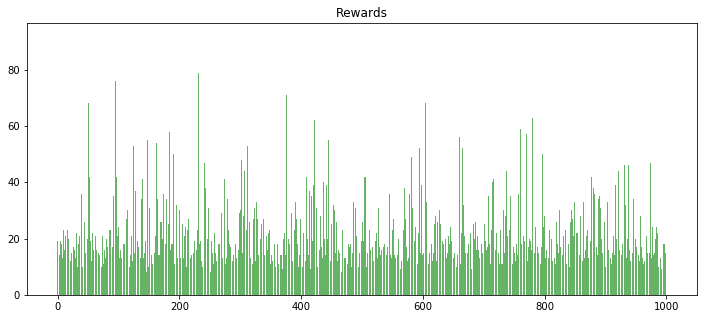

In [44]:
import gym
import torch
import random

import matplotlib.pyplot as plt

env = gym.make('CartPole-v0')

num_episodes = 10

steps_total = []

for i_episode in range(num_episodes):
    
    state = env.reset()
    
    step = 0
    #for step in range(100):
    while True:
        
        step += 1
        action = env.action_space.sample()
        new_state, reward, done, info = env.step(action)
        
        #print(new_state)
        #print(info)
        
        #env.render()
        
        if done:
            steps_total.append(step)
            print("Episode finished after %i steps" % step )
            break
        

print("Average reward: %.2f" % (sum(steps_total)/num_episodes))
print("Average reward (last 100 episodes): %.2f" % (sum(steps_total[-100:])/100))

plt.figure(figsize=(12,5))
plt.title("Rewards")
plt.bar(torch.arange(len(steps_total)), steps_total, alpha=0.6, color='green')
plt.show()

env.close()
env.env.close()